In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

"Benchmark all the baseline agents\non a given CyberBattleSim environment and compare\nthem to the dumb 'random agent' baseline.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n"

In [2]:
import sys
import logging
import gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")
%matplotlib inline

In [3]:
# Papermill notebook parameters

#############
# gymid = 'CyberBattleTiny-v0'
#############
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10
#############
# gymid = "CyberBattleChain-v0"
# env_size = 10
# iteration_count = 9000
# training_episode_count = 50
# eval_episode_count = 5
# maximum_node_count = 22
# maximum_total_credentials = 22

In [4]:
# Parameters
gymid = "CyberBattleChain-v0"
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
env_size = 10

In [5]:
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

gym_env = cast(CyberBattleEnv, _gym_env)

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

In [6]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, _, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'dict'>`
  logger.warn(

Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00|

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:146: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'tuple'>
  logger.warn(f"{pre} was expecting a numpy array, actual type: {type(obs)}")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:133: UserWarning: WARN: The obs returned by the `step()` method should be an int or np.int64, actual type: <class 'numpy.int32'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 11|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 11|reward:   14.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 1|Iteration 12|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 1|Iteration 12|reward:   18.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 1|Iteration 19|reward:   20.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 1|Iteration 19|reward:   20.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 1|Iteration 20|reward:  120.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 1|Iteration 20|reward:  120.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 1|Iteration 43|reward:  134.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 1|Iteration 43|reward:  134.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 1|Iteration 44|reward:  234.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 1|Iteration 44|reward:  234.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 1|Iteration 53|reward:  240.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 1|Iteration 53|reward:  240.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 1|Iteration 59|reward:  246.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 1|Iteration 59|reward:  246.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 1|Iteration 61|reward:  260.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 1|Iteration 61|reward:  260.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 1|Iteration 62|reward:  266.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 1|Iteration 62|reward:  266.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 1|Iteration 67|reward:  272.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 1|Iteration 67|reward:  272.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 1|Iteration 69|reward:  274.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 1|Iteration 69|reward:  274.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 1|Iteration 70|reward:  278.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 1|Iteration 70|reward:  278.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 1|Iteration 71|reward:  378.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 1|Iteration 71|reward:  378.0|last_reward_at:   71|Elapsed Time: 0:00:00||


Episode 1|Iteration 88|reward:  392.0|last_reward_at:   71|Elapsed Time: 0:00:00||


Episode 1|Iteration 88|reward:  392.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 1|Iteration 91|reward:  492.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 1|Iteration 91|reward:  492.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 1|Iteration 93|reward:  498.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 1|Iteration 93|reward:  498.0|last_reward_at:   93|Elapsed Time: 0:00:00||


Episode 1|Iteration 108|reward:  509.0|last_reward_at:   93|Elapsed Time: 0:00:00||


Episode 1|Iteration 108|reward:  509.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 1|Iteration 113|reward:  515.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 1|Iteration 113|reward:  515.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 1|Iteration 114|reward:  517.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 1|Iteration 114|reward:  517.0|last_reward_at:  114|Elapsed Time: 0:00:00||


Episode 1|Iteration 119|reward:  523.0|last_reward_at:  114|Elapsed Time: 0:00:00||


Episode 1|Iteration 119|reward:  523.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 1|Iteration 130|reward:  527.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 1|Iteration 130|reward:  527.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 1|Iteration 135|reward:  536.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 1|Iteration 135|reward:  536.0|last_reward_at:  135|Elapsed Time: 0:00:00||


Episode 1|Iteration 148|reward:  636.0|last_reward_at:  135|Elapsed Time: 0:00:00||


Episode 1|Iteration 148|reward:  636.0|last_reward_at:  148|Elapsed Time: 0:00:00||


Episode 1|Iteration 150|reward:  650.0|last_reward_at:  148|Elapsed Time: 0:00:00||


Episode 1|Iteration 150|reward:  650.0|last_reward_at:  150|Elapsed Time: 0:00:00||


Episode 1|Iteration 152|reward:  750.0|last_reward_at:  150|Elapsed Time: 0:00:00||


Episode 1|Iteration 152|reward:  750.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 1|Iteration 155|reward:  761.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 1|Iteration 155|reward:  761.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 1|Iteration 162|reward:  767.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 1|Iteration 162|reward:  767.0|last_reward_at:  162|Elapsed Time: 0:00:00||


Episode 1|Iteration 174|reward:  771.0|last_reward_at:  162|Elapsed Time: 0:00:00||


Episode 1|Iteration 174|reward:  771.0|last_reward_at:  174|Elapsed Time: 0:00:00||


Episode 1|Iteration 183|reward:  773.0|last_reward_at:  174|Elapsed Time: 0:00:00||


Episode 1|Iteration 183|reward:  773.0|last_reward_at:  183|Elapsed Time: 0:00:00||


Episode 1|Iteration 191|reward:  779.0|last_reward_at:  183|Elapsed Time: 0:00:00||


Episode 1|Iteration 191|reward:  779.0|last_reward_at:  191|Elapsed Time: 0:00:00||


Episode 1|Iteration 217|reward:  788.0|last_reward_at:  191|Elapsed Time: 0:00:00||


Episode 1|Iteration 217|reward:  788.0|last_reward_at:  217|Elapsed Time: 0:00:00||


Episode 1|Iteration 219|reward:  888.0|last_reward_at:  217|Elapsed Time: 0:00:00||


Episode 1|Iteration 219|reward:  888.0|last_reward_at:  219|Elapsed Time: 0:00:00||


Episode 1|Iteration 228|reward:  899.0|last_reward_at:  219|Elapsed Time: 0:00:00||


Episode 1|Iteration 228|reward:  899.0|last_reward_at:  228|Elapsed Time: 0:00:00||


Episode 1|Iteration 232|reward:  905.0|last_reward_at:  228|Elapsed Time: 0:00:00||


Episode 1|Iteration 232|reward:  905.0|last_reward_at:  232|Elapsed Time: 0:00:00||


Episode 1|Iteration 238|reward:  914.0|last_reward_at:  232|Elapsed Time: 0:00:00||


Episode 1|Iteration 238|reward:  914.0|last_reward_at:  238|Elapsed Time: 0:00:00||


Episode 1|Iteration 254|reward: 1014.0|last_reward_at:  238|Elapsed Time: 0:00:00||


Episode 1|Iteration 254|reward: 1014.0|last_reward_at:  254|Elapsed Time: 0:00:00||


Episode 1|Iteration 265|reward: 1020.0|last_reward_at:  254|Elapsed Time: 0:00:00||


Episode 1|Iteration 265|reward: 1020.0|last_reward_at:  265|Elapsed Time: 0:00:00||


Episode 1|Iteration 268|reward: 1031.0|last_reward_at:  265|Elapsed Time: 0:00:00||


Episode 1|Iteration 268|reward: 1031.0|last_reward_at:  268|Elapsed Time: 0:00:00||


Episode 1|Iteration 272|reward: 1033.0|last_reward_at:  268|Elapsed Time: 0:00:00||


Episode 1|Iteration 272|reward: 1033.0|last_reward_at:  272|Elapsed Time: 0:00:00||


Episode 1|Iteration 283|reward: 1037.0|last_reward_at:  272|Elapsed Time: 0:00:00||


Episode 1|Iteration 283|reward: 1037.0|last_reward_at:  283|Elapsed Time: 0:00:00||


Episode 1|Iteration 304|reward: 1037.0|last_reward_at:  283|Elapsed Time: 0:00:01||


Episode 1|Iteration 305|reward: 1043.0|last_reward_at:  283|Elapsed Time: 0:00:01||


Episode 1|Iteration 305|reward: 1043.0|last_reward_at:  305|Elapsed Time: 0:00:01||


Episode 1|Iteration 327|reward: 1043.0|last_reward_at:  305|Elapsed Time: 0:00:01||


Episode 1|Iteration 342|reward: 1043.0|last_reward_at:  305|Elapsed Time: 0:00:01||


Episode 1|Iteration 365|reward: 1043.0|last_reward_at:  305|Elapsed Time: 0:00:01||


Episode 1|Iteration 385|reward: 1043.0|last_reward_at:  305|Elapsed Time: 0:00:01||


Episode 1|Iteration 407|reward: 1043.0|last_reward_at:  305|Elapsed Time: 0:00:01||


Episode 1|Iteration 429|reward: 1043.0|last_reward_at:  305|Elapsed Time: 0:00:01||


Episode 1|Iteration 451|reward: 1043.0|last_reward_at:  305|Elapsed Time: 0:00:01||


Episode 1|Iteration 471|reward: 1043.0|last_reward_at:  305|Elapsed Time: 0:00:01||


Episode 1|Iteration 491|reward: 1043.0|last_reward_at:  305|Elapsed Time: 0:00:01||


Episode 1|Iteration 512|reward: 1043.0|last_reward_at:  305|Elapsed Time: 0:00:02||


Episode 1|Iteration 534|reward: 1043.0|last_reward_at:  305|Elapsed Time: 0:00:02||


Episode 1|Iteration 551|reward: 1052.0|last_reward_at:  305|Elapsed Time: 0:00:02||


Episode 1|Iteration 551|reward: 1052.0|last_reward_at:  551|Elapsed Time: 0:00:02||


Episode 1|Iteration 554|reward: 1152.0|last_reward_at:  551|Elapsed Time: 0:00:02||


Episode 1|Iteration 554|reward: 1152.0|last_reward_at:  554|Elapsed Time: 0:00:02||


Episode 1|Iteration 570|reward: 1152.0|last_reward_at:  554|Elapsed Time: 0:00:02||


Episode 1|Iteration 571|reward: 1166.0|last_reward_at:  554|Elapsed Time: 0:00:02||


Episode 1|Iteration 571|reward: 1166.0|last_reward_at:  571|Elapsed Time: 0:00:02||


Episode 1|Iteration 572|reward: 1266.0|last_reward_at:  571|Elapsed Time: 0:00:02||


Episode 1|Iteration 572|reward: 1266.0|last_reward_at:  572|Elapsed Time: 0:00:02||


Episode 1|Iteration 583|reward: 1266.0|last_reward_at:  572|Elapsed Time: 0:00:02||


Episode 1|Iteration 593|reward: 1266.0|last_reward_at:  572|Elapsed Time: 0:00:02||


Episode 1|Iteration 599|reward: 1280.0|last_reward_at:  572|Elapsed Time: 0:00:02||


Episode 1|Iteration 599|reward: 1280.0|last_reward_at:  599|Elapsed Time: 0:00:02||


Episode 1|Iteration 603|reward: 6280.0|last_reward_at:  599|Elapsed Time: 0:00:02||


Episode 1|Iteration 603|reward: 6280.0|last_reward_at:  603|Elapsed Time: 0:00:02||

  Episode 1 ended at t=603 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/244 (0.07)
    explore-remote: 18/311 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 87
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8533, 



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 21|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 21|reward:   14.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 2|Iteration 27|reward:   18.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 2|Iteration 27|reward:   18.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 2|Iteration 29|reward:   20.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 2|Iteration 29|reward:   20.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 2|Iteration 53|reward:  120.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 2|Iteration 53|reward:  120.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 2|Iteration 54|reward:  134.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 2|Iteration 54|reward:  134.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 2|Iteration 55|reward:  140.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 2|Iteration 55|reward:  140.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 2|Iteration 56|reward:  146.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 2|Iteration 56|reward:  146.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 2|Iteration 64|reward:  154.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 2|Iteration 64|reward:  154.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 2|Iteration 79|reward:  254.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 2|Iteration 79|reward:  254.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 2|Iteration 95|reward:  268.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 2|Iteration 95|reward:  268.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 2|Iteration 97|reward:  272.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 2|Iteration 97|reward:  272.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 2|Iteration 99|reward:  372.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 2|Iteration 99|reward:  372.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 2|Iteration 109|reward:  374.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 2|Iteration 109|reward:  374.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 2|Iteration 110|reward:  388.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 2|Iteration 110|reward:  388.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 2|Iteration 112|reward:  396.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 2|Iteration 112|reward:  396.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 2|Iteration 116|reward:  496.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 2|Iteration 116|reward:  496.0|last_reward_at:  116|Elapsed Time: 0:00:00||


Episode 2|Iteration 138|reward:  502.0|last_reward_at:  116|Elapsed Time: 0:00:00||


Episode 2|Iteration 138|reward:  502.0|last_reward_at:  138|Elapsed Time: 0:00:00||


Episode 2|Iteration 150|reward:  508.0|last_reward_at:  138|Elapsed Time: 0:00:00||


Episode 2|Iteration 150|reward:  508.0|last_reward_at:  150|Elapsed Time: 0:00:00||


Episode 2|Iteration 152|reward:  519.0|last_reward_at:  150|Elapsed Time: 0:00:00||


Episode 2|Iteration 152|reward:  519.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 2|Iteration 161|reward:  523.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 2|Iteration 161|reward:  523.0|last_reward_at:  161|Elapsed Time: 0:00:00||


Episode 2|Iteration 167|reward:  529.0|last_reward_at:  161|Elapsed Time: 0:00:00||


Episode 2|Iteration 167|reward:  529.0|last_reward_at:  167|Elapsed Time: 0:00:00||


Episode 2|Iteration 180|reward:  531.0|last_reward_at:  167|Elapsed Time: 0:00:00||


Episode 2|Iteration 180|reward:  531.0|last_reward_at:  180|Elapsed Time: 0:00:00||


Episode 2|Iteration 196|reward:  540.0|last_reward_at:  180|Elapsed Time: 0:00:00||


Episode 2|Iteration 196|reward:  540.0|last_reward_at:  196|Elapsed Time: 0:00:00||


Episode 2|Iteration 203|reward:  640.0|last_reward_at:  196|Elapsed Time: 0:00:00||


Episode 2|Iteration 203|reward:  640.0|last_reward_at:  203|Elapsed Time: 0:00:00||


Episode 2|Iteration 206|reward:  654.0|last_reward_at:  203|Elapsed Time: 0:00:00||


Episode 2|Iteration 206|reward:  654.0|last_reward_at:  206|Elapsed Time: 0:00:00||


Episode 2|Iteration 209|reward:  660.0|last_reward_at:  206|Elapsed Time: 0:00:00||


Episode 2|Iteration 209|reward:  660.0|last_reward_at:  209|Elapsed Time: 0:00:00||


Episode 2|Iteration 210|reward:  760.0|last_reward_at:  209|Elapsed Time: 0:00:00||


Episode 2|Iteration 210|reward:  760.0|last_reward_at:  210|Elapsed Time: 0:00:00||


Episode 2|Iteration 228|reward:  760.0|last_reward_at:  210|Elapsed Time: 0:00:00||


Episode 2|Iteration 249|reward:  766.0|last_reward_at:  210|Elapsed Time: 0:00:00||


Episode 2|Iteration 249|reward:  766.0|last_reward_at:  249|Elapsed Time: 0:00:00||


Episode 2|Iteration 276|reward:  780.0|last_reward_at:  249|Elapsed Time: 0:00:00||


Episode 2|Iteration 276|reward:  780.0|last_reward_at:  276|Elapsed Time: 0:00:00||


Episode 2|Iteration 278|reward:  880.0|last_reward_at:  276|Elapsed Time: 0:00:00||


Episode 2|Iteration 278|reward:  880.0|last_reward_at:  278|Elapsed Time: 0:00:00||


Episode 2|Iteration 288|reward:  882.0|last_reward_at:  278|Elapsed Time: 0:00:00||


Episode 2|Iteration 288|reward:  882.0|last_reward_at:  288|Elapsed Time: 0:00:00||


Episode 2|Iteration 289|reward:  888.0|last_reward_at:  288|Elapsed Time: 0:00:00||


Episode 2|Iteration 289|reward:  888.0|last_reward_at:  289|Elapsed Time: 0:00:00||


Episode 2|Iteration 298|reward:  894.0|last_reward_at:  289|Elapsed Time: 0:00:00||


Episode 2|Iteration 298|reward:  894.0|last_reward_at:  298|Elapsed Time: 0:00:00||


Episode 2|Iteration 305|reward:  896.0|last_reward_at:  298|Elapsed Time: 0:00:00||


Episode 2|Iteration 305|reward:  896.0|last_reward_at:  305|Elapsed Time: 0:00:00||


Episode 2|Iteration 329|reward:  896.0|last_reward_at:  305|Elapsed Time: 0:00:00||


Episode 2|Iteration 342|reward:  896.0|last_reward_at:  305|Elapsed Time: 0:00:00||


Episode 2|Iteration 362|reward:  910.0|last_reward_at:  305|Elapsed Time: 0:00:01||


Episode 2|Iteration 362|reward:  910.0|last_reward_at:  362|Elapsed Time: 0:00:01||


Episode 2|Iteration 363|reward: 1010.0|last_reward_at:  362|Elapsed Time: 0:00:01||


Episode 2|Iteration 363|reward: 1010.0|last_reward_at:  363|Elapsed Time: 0:00:01||


Episode 2|Iteration 375|reward: 1016.0|last_reward_at:  363|Elapsed Time: 0:00:01||


Episode 2|Iteration 375|reward: 1016.0|last_reward_at:  375|Elapsed Time: 0:00:01||


Episode 2|Iteration 382|reward: 1022.0|last_reward_at:  375|Elapsed Time: 0:00:01||


Episode 2|Iteration 382|reward: 1022.0|last_reward_at:  382|Elapsed Time: 0:00:01||


Episode 2|Iteration 400|reward: 1022.0|last_reward_at:  382|Elapsed Time: 0:00:01||


Episode 2|Iteration 410|reward: 1028.0|last_reward_at:  382|Elapsed Time: 0:00:01||


Episode 2|Iteration 410|reward: 1028.0|last_reward_at:  410|Elapsed Time: 0:00:01||


Episode 2|Iteration 413|reward: 1042.0|last_reward_at:  410|Elapsed Time: 0:00:01||


Episode 2|Iteration 413|reward: 1042.0|last_reward_at:  413|Elapsed Time: 0:00:01||


Episode 2|Iteration 417|reward: 1142.0|last_reward_at:  413|Elapsed Time: 0:00:01||


Episode 2|Iteration 417|reward: 1142.0|last_reward_at:  417|Elapsed Time: 0:00:01||


Episode 2|Iteration 435|reward: 1142.0|last_reward_at:  417|Elapsed Time: 0:00:01||


Episode 2|Iteration 447|reward: 1144.0|last_reward_at:  417|Elapsed Time: 0:00:01||


Episode 2|Iteration 447|reward: 1144.0|last_reward_at:  447|Elapsed Time: 0:00:01||


Episode 2|Iteration 456|reward: 1146.0|last_reward_at:  447|Elapsed Time: 0:00:01||


Episode 2|Iteration 456|reward: 1146.0|last_reward_at:  456|Elapsed Time: 0:00:01||


Episode 2|Iteration 473|reward: 1146.0|last_reward_at:  456|Elapsed Time: 0:00:01||


Episode 2|Iteration 494|reward: 1146.0|last_reward_at:  456|Elapsed Time: 0:00:01||


Episode 2|Iteration 495|reward: 1152.0|last_reward_at:  456|Elapsed Time: 0:00:01||


Episode 2|Iteration 495|reward: 1152.0|last_reward_at:  495|Elapsed Time: 0:00:01||


Episode 2|Iteration 497|reward: 1166.0|last_reward_at:  495|Elapsed Time: 0:00:01||


Episode 2|Iteration 497|reward: 1166.0|last_reward_at:  497|Elapsed Time: 0:00:01||


Episode 2|Iteration 499|reward: 1174.0|last_reward_at:  497|Elapsed Time: 0:00:01||


Episode 2|Iteration 499|reward: 1174.0|last_reward_at:  499|Elapsed Time: 0:00:01||


Episode 2|Iteration 504|reward: 1274.0|last_reward_at:  499|Elapsed Time: 0:00:01||


Episode 2|Iteration 504|reward: 1274.0|last_reward_at:  504|Elapsed Time: 0:00:01||


Episode 2|Iteration 507|reward: 1288.0|last_reward_at:  504|Elapsed Time: 0:00:01||


Episode 2|Iteration 507|reward: 1288.0|last_reward_at:  507|Elapsed Time: 0:00:01||


Episode 2|Iteration 509|reward: 6288.0|last_reward_at:  507|Elapsed Time: 0:00:01||


Episode 2|Iteration 509|reward: 6288.0|last_reward_at:  509|Elapsed Time: 0:00:01||

  Episode 2 ended at t=509 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/197 (0.09)
    explore-remote: 19/263 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 65
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8159, 



Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 3|Iteration 10|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 3|Iteration 10|reward:  114.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 12|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 12|reward:  116.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 3|Iteration 16|reward:  118.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 3|Iteration 16|reward:  118.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 3|Iteration 32|reward:  132.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 3|Iteration 32|reward:  132.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 3|Iteration 34|reward:  232.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 3|Iteration 34|reward:  232.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 3|Iteration 35|reward:  238.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 3|Iteration 35|reward:  238.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 3|Iteration 37|reward:  244.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 3|Iteration 37|reward:  244.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 3|Iteration 41|reward:  250.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 3|Iteration 41|reward:  250.0|last_reward_at:   41|Elapsed Time: 0:00:00||


Episode 3|Iteration 53|reward:  264.0|last_reward_at:   41|Elapsed Time: 0:00:00||


Episode 3|Iteration 53|reward:  264.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 3|Iteration 55|reward:  266.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 3|Iteration 55|reward:  266.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 3|Iteration 57|reward:  272.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 3|Iteration 57|reward:  272.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 3|Iteration 61|reward:  372.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 3|Iteration 61|reward:  372.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 3|Iteration 62|reward:  374.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 3|Iteration 62|reward:  374.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 3|Iteration 78|reward:  388.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 3|Iteration 78|reward:  388.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 3|Iteration 79|reward:  396.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 3|Iteration 79|reward:  396.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 3|Iteration 84|reward:  496.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 3|Iteration 84|reward:  496.0|last_reward_at:   84|Elapsed Time: 0:00:00||


Episode 3|Iteration 89|reward:  502.0|last_reward_at:   84|Elapsed Time: 0:00:00||


Episode 3|Iteration 89|reward:  502.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 3|Iteration 114|reward:  502.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 3|Iteration 141|reward:  516.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 3|Iteration 141|reward:  516.0|last_reward_at:  141|Elapsed Time: 0:00:00||


Episode 3|Iteration 144|reward:  616.0|last_reward_at:  141|Elapsed Time: 0:00:00||


Episode 3|Iteration 144|reward:  616.0|last_reward_at:  144|Elapsed Time: 0:00:00||


Episode 3|Iteration 150|reward:  630.0|last_reward_at:  144|Elapsed Time: 0:00:00||


Episode 3|Iteration 150|reward:  630.0|last_reward_at:  150|Elapsed Time: 0:00:00||


Episode 3|Iteration 153|reward:  730.0|last_reward_at:  150|Elapsed Time: 0:00:00||


Episode 3|Iteration 153|reward:  730.0|last_reward_at:  153|Elapsed Time: 0:00:00||


Episode 3|Iteration 157|reward:  736.0|last_reward_at:  153|Elapsed Time: 0:00:00||


Episode 3|Iteration 157|reward:  736.0|last_reward_at:  157|Elapsed Time: 0:00:00||


Episode 3|Iteration 180|reward:  742.0|last_reward_at:  157|Elapsed Time: 0:00:00||


Episode 3|Iteration 180|reward:  742.0|last_reward_at:  180|Elapsed Time: 0:00:00||


Episode 3|Iteration 190|reward:  744.0|last_reward_at:  180|Elapsed Time: 0:00:00||


Episode 3|Iteration 190|reward:  744.0|last_reward_at:  190|Elapsed Time: 0:00:00||


Episode 3|Iteration 194|reward:  746.0|last_reward_at:  190|Elapsed Time: 0:00:00||


Episode 3|Iteration 194|reward:  746.0|last_reward_at:  194|Elapsed Time: 0:00:00||


Episode 3|Iteration 198|reward:  752.0|last_reward_at:  194|Elapsed Time: 0:00:00||


Episode 3|Iteration 198|reward:  752.0|last_reward_at:  198|Elapsed Time: 0:00:00||


Episode 3|Iteration 228|reward:  752.0|last_reward_at:  198|Elapsed Time: 0:00:00||


Episode 3|Iteration 228|reward:  758.0|last_reward_at:  198|Elapsed Time: 0:00:00||


Episode 3|Iteration 228|reward:  758.0|last_reward_at:  228|Elapsed Time: 0:00:00||


Episode 3|Iteration 245|reward:  764.0|last_reward_at:  228|Elapsed Time: 0:00:00||


Episode 3|Iteration 245|reward:  764.0|last_reward_at:  245|Elapsed Time: 0:00:00||


Episode 3|Iteration 273|reward:  764.0|last_reward_at:  245|Elapsed Time: 0:00:00||


Episode 3|Iteration 287|reward:  778.0|last_reward_at:  245|Elapsed Time: 0:00:00||


Episode 3|Iteration 287|reward:  778.0|last_reward_at:  287|Elapsed Time: 0:00:00||


Episode 3|Iteration 289|reward:  784.0|last_reward_at:  287|Elapsed Time: 0:00:00||


Episode 3|Iteration 289|reward:  784.0|last_reward_at:  289|Elapsed Time: 0:00:00||


Episode 3|Iteration 292|reward:  884.0|last_reward_at:  289|Elapsed Time: 0:00:00||


Episode 3|Iteration 292|reward:  884.0|last_reward_at:  292|Elapsed Time: 0:00:00||


Episode 3|Iteration 299|reward:  886.0|last_reward_at:  292|Elapsed Time: 0:00:00||


Episode 3|Iteration 299|reward:  886.0|last_reward_at:  299|Elapsed Time: 0:00:00||


Episode 3|Iteration 301|reward:  888.0|last_reward_at:  299|Elapsed Time: 0:00:00||


Episode 3|Iteration 301|reward:  888.0|last_reward_at:  301|Elapsed Time: 0:00:00||


Episode 3|Iteration 317|reward:  899.0|last_reward_at:  301|Elapsed Time: 0:00:01||


Episode 3|Iteration 317|reward:  899.0|last_reward_at:  317|Elapsed Time: 0:00:01||


Episode 3|Iteration 319|reward:  907.0|last_reward_at:  317|Elapsed Time: 0:00:01||


Episode 3|Iteration 319|reward:  907.0|last_reward_at:  319|Elapsed Time: 0:00:01||


Episode 3|Iteration 342|reward:  907.0|last_reward_at:  319|Elapsed Time: 0:00:01||


Episode 3|Iteration 368|reward:  913.0|last_reward_at:  319|Elapsed Time: 0:00:01||


Episode 3|Iteration 368|reward:  913.0|last_reward_at:  368|Elapsed Time: 0:00:01||


Episode 3|Iteration 394|reward:  913.0|last_reward_at:  368|Elapsed Time: 0:00:01||


Episode 3|Iteration 405|reward:  922.0|last_reward_at:  368|Elapsed Time: 0:00:01||


Episode 3|Iteration 405|reward:  922.0|last_reward_at:  405|Elapsed Time: 0:00:01||


Episode 3|Iteration 418|reward: 1022.0|last_reward_at:  405|Elapsed Time: 0:00:01||


Episode 3|Iteration 418|reward: 1022.0|last_reward_at:  418|Elapsed Time: 0:00:01||


Episode 3|Iteration 440|reward: 1022.0|last_reward_at:  418|Elapsed Time: 0:00:01||


Episode 3|Iteration 456|reward: 1022.0|last_reward_at:  418|Elapsed Time: 0:00:01||


Episode 3|Iteration 475|reward: 1022.0|last_reward_at:  418|Elapsed Time: 0:00:01||


Episode 3|Iteration 491|reward: 1033.0|last_reward_at:  418|Elapsed Time: 0:00:01||


Episode 3|Iteration 491|reward: 1033.0|last_reward_at:  491|Elapsed Time: 0:00:01||


Episode 3|Iteration 512|reward: 1033.0|last_reward_at:  491|Elapsed Time: 0:00:01||


Episode 3|Iteration 522|reward: 1035.0|last_reward_at:  491|Elapsed Time: 0:00:01||


Episode 3|Iteration 522|reward: 1035.0|last_reward_at:  522|Elapsed Time: 0:00:01||


Episode 3|Iteration 543|reward: 1035.0|last_reward_at:  522|Elapsed Time: 0:00:02||


Episode 3|Iteration 551|reward: 1044.0|last_reward_at:  522|Elapsed Time: 0:00:02||


Episode 3|Iteration 551|reward: 1044.0|last_reward_at:  551|Elapsed Time: 0:00:02||


Episode 3|Iteration 552|reward: 1048.0|last_reward_at:  551|Elapsed Time: 0:00:02||


Episode 3|Iteration 552|reward: 1048.0|last_reward_at:  552|Elapsed Time: 0:00:02||


Episode 3|Iteration 553|reward: 1148.0|last_reward_at:  552|Elapsed Time: 0:00:02||


Episode 3|Iteration 553|reward: 1148.0|last_reward_at:  553|Elapsed Time: 0:00:02||


Episode 3|Iteration 570|reward: 1148.0|last_reward_at:  553|Elapsed Time: 0:00:02||


Episode 3|Iteration 588|reward: 1148.0|last_reward_at:  553|Elapsed Time: 0:00:02||


Episode 3|Iteration 607|reward: 1148.0|last_reward_at:  553|Elapsed Time: 0:00:02||


Episode 3|Iteration 625|reward: 1148.0|last_reward_at:  553|Elapsed Time: 0:00:02||


Episode 3|Iteration 643|reward: 1148.0|last_reward_at:  553|Elapsed Time: 0:00:02||


Episode 3|Iteration 665|reward: 1148.0|last_reward_at:  553|Elapsed Time: 0:00:02||


Episode 3|Iteration 682|reward: 1148.0|last_reward_at:  553|Elapsed Time: 0:00:02||


Episode 3|Iteration 701|reward: 1148.0|last_reward_at:  553|Elapsed Time: 0:00:02||


Episode 3|Iteration 718|reward: 1148.0|last_reward_at:  553|Elapsed Time: 0:00:03||


Episode 3|Iteration 737|reward: 1148.0|last_reward_at:  553|Elapsed Time: 0:00:03||


Episode 3|Iteration 742|reward: 1162.0|last_reward_at:  553|Elapsed Time: 0:00:03||


Episode 3|Iteration 742|reward: 1162.0|last_reward_at:  742|Elapsed Time: 0:00:03||


Episode 3|Iteration 744|reward: 1262.0|last_reward_at:  742|Elapsed Time: 0:00:03||


Episode 3|Iteration 744|reward: 1262.0|last_reward_at:  744|Elapsed Time: 0:00:03||


Episode 3|Iteration 760|reward: 1268.0|last_reward_at:  744|Elapsed Time: 0:00:03||


Episode 3|Iteration 760|reward: 1268.0|last_reward_at:  760|Elapsed Time: 0:00:03||


Episode 3|Iteration 768|reward: 1274.0|last_reward_at:  760|Elapsed Time: 0:00:03||


Episode 3|Iteration 768|reward: 1274.0|last_reward_at:  768|Elapsed Time: 0:00:03||


Episode 3|Iteration 773|reward: 1288.0|last_reward_at:  768|Elapsed Time: 0:00:03||


Episode 3|Iteration 773|reward: 1288.0|last_reward_at:  773|Elapsed Time: 0:00:03||


Episode 3|Iteration 775|reward: 6288.0|last_reward_at:  773|Elapsed Time: 0:00:03||


Episode 3|Iteration 775|reward: 6288.0|last_reward_at:  775|Elapsed Time: 0:00:03||

  Episode 3 ended at t=775 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/321 (0.06)
    explore-remote: 20/404 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 165
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.7625, 



Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 11|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 11|reward:   14.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 12|reward:   16.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 12|reward:   16.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 4|Iteration 14|reward:  116.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 4|Iteration 14|reward:  116.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 4|Iteration 15|reward:  127.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 4|Iteration 15|reward:  127.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 4|Iteration 18|reward:  135.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 4|Iteration 18|reward:  135.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 4|Iteration 19|reward:  137.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 4|Iteration 19|reward:  137.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 4|Iteration 38|reward:  143.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 4|Iteration 38|reward:  143.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 4|Iteration 79|reward:  152.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 4|Iteration 79|reward:  152.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 4|Iteration 88|reward:  252.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 4|Iteration 88|reward:  252.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 4|Iteration 113|reward:  263.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 4|Iteration 113|reward:  263.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 4|Iteration 118|reward:  272.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 4|Iteration 118|reward:  272.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 4|Iteration 120|reward:  372.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 4|Iteration 120|reward:  372.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 4|Iteration 123|reward:  374.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 4|Iteration 123|reward:  374.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 4|Iteration 127|reward:  388.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 4|Iteration 127|reward:  388.0|last_reward_at:  127|Elapsed Time: 0:00:00||


Episode 4|Iteration 135|reward:  394.0|last_reward_at:  127|Elapsed Time: 0:00:00||


Episode 4|Iteration 135|reward:  394.0|last_reward_at:  135|Elapsed Time: 0:00:00||


Episode 4|Iteration 139|reward:  494.0|last_reward_at:  135|Elapsed Time: 0:00:00||


Episode 4|Iteration 139|reward:  494.0|last_reward_at:  139|Elapsed Time: 0:00:00||


Episode 4|Iteration 140|reward:  500.0|last_reward_at:  139|Elapsed Time: 0:00:00||


Episode 4|Iteration 140|reward:  500.0|last_reward_at:  140|Elapsed Time: 0:00:00||


Episode 4|Iteration 146|reward:  514.0|last_reward_at:  140|Elapsed Time: 0:00:00||


Episode 4|Iteration 146|reward:  514.0|last_reward_at:  146|Elapsed Time: 0:00:00||


Episode 4|Iteration 147|reward:  614.0|last_reward_at:  146|Elapsed Time: 0:00:00||


Episode 4|Iteration 147|reward:  614.0|last_reward_at:  147|Elapsed Time: 0:00:00||


Episode 4|Iteration 152|reward:  616.0|last_reward_at:  147|Elapsed Time: 0:00:00||


Episode 4|Iteration 152|reward:  616.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 4|Iteration 154|reward:  618.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 4|Iteration 154|reward:  618.0|last_reward_at:  154|Elapsed Time: 0:00:00||


Episode 4|Iteration 163|reward:  620.0|last_reward_at:  154|Elapsed Time: 0:00:00||


Episode 4|Iteration 163|reward:  620.0|last_reward_at:  163|Elapsed Time: 0:00:00||


Episode 4|Iteration 169|reward:  626.0|last_reward_at:  163|Elapsed Time: 0:00:00||


Episode 4|Iteration 169|reward:  626.0|last_reward_at:  169|Elapsed Time: 0:00:00||


Episode 4|Iteration 175|reward:  640.0|last_reward_at:  169|Elapsed Time: 0:00:00||


Episode 4|Iteration 175|reward:  640.0|last_reward_at:  175|Elapsed Time: 0:00:00||


Episode 4|Iteration 178|reward:  740.0|last_reward_at:  175|Elapsed Time: 0:00:00||


Episode 4|Iteration 178|reward:  740.0|last_reward_at:  178|Elapsed Time: 0:00:00||


Episode 4|Iteration 179|reward:  746.0|last_reward_at:  178|Elapsed Time: 0:00:00||


Episode 4|Iteration 179|reward:  746.0|last_reward_at:  179|Elapsed Time: 0:00:00||


Episode 4|Iteration 197|reward:  757.0|last_reward_at:  179|Elapsed Time: 0:00:00||


Episode 4|Iteration 197|reward:  757.0|last_reward_at:  197|Elapsed Time: 0:00:00||


Episode 4|Iteration 211|reward:  761.0|last_reward_at:  197|Elapsed Time: 0:00:00||


Episode 4|Iteration 211|reward:  761.0|last_reward_at:  211|Elapsed Time: 0:00:00||


Episode 4|Iteration 219|reward:  767.0|last_reward_at:  211|Elapsed Time: 0:00:00||


Episode 4|Iteration 219|reward:  767.0|last_reward_at:  219|Elapsed Time: 0:00:00||


Episode 4|Iteration 224|reward:  773.0|last_reward_at:  219|Elapsed Time: 0:00:00||


Episode 4|Iteration 224|reward:  773.0|last_reward_at:  224|Elapsed Time: 0:00:00||


Episode 4|Iteration 243|reward:  779.0|last_reward_at:  224|Elapsed Time: 0:00:00||


Episode 4|Iteration 243|reward:  779.0|last_reward_at:  243|Elapsed Time: 0:00:00||


Episode 4|Iteration 244|reward:  781.0|last_reward_at:  243|Elapsed Time: 0:00:00||


Episode 4|Iteration 244|reward:  781.0|last_reward_at:  244|Elapsed Time: 0:00:00||


Episode 4|Iteration 266|reward:  790.0|last_reward_at:  244|Elapsed Time: 0:00:00||


Episode 4|Iteration 266|reward:  790.0|last_reward_at:  266|Elapsed Time: 0:00:00||


Episode 4|Iteration 269|reward:  890.0|last_reward_at:  266|Elapsed Time: 0:00:00||


Episode 4|Iteration 269|reward:  890.0|last_reward_at:  269|Elapsed Time: 0:00:00||


Episode 4|Iteration 292|reward:  890.0|last_reward_at:  269|Elapsed Time: 0:00:00||


Episode 4|Iteration 317|reward:  890.0|last_reward_at:  269|Elapsed Time: 0:00:00||


Episode 4|Iteration 325|reward:  904.0|last_reward_at:  269|Elapsed Time: 0:00:00||


Episode 4|Iteration 325|reward:  904.0|last_reward_at:  325|Elapsed Time: 0:00:00||


Episode 4|Iteration 326|reward:  912.0|last_reward_at:  325|Elapsed Time: 0:00:00||


Episode 4|Iteration 326|reward:  912.0|last_reward_at:  326|Elapsed Time: 0:00:00||


Episode 4|Iteration 331|reward: 1012.0|last_reward_at:  326|Elapsed Time: 0:00:01||


Episode 4|Iteration 331|reward: 1012.0|last_reward_at:  331|Elapsed Time: 0:00:01||


Episode 4|Iteration 334|reward: 1018.0|last_reward_at:  331|Elapsed Time: 0:00:01||


Episode 4|Iteration 334|reward: 1018.0|last_reward_at:  334|Elapsed Time: 0:00:01||


Episode 4|Iteration 351|reward: 1029.0|last_reward_at:  334|Elapsed Time: 0:00:01||


Episode 4|Iteration 351|reward: 1029.0|last_reward_at:  351|Elapsed Time: 0:00:01||


Episode 4|Iteration 354|reward: 1038.0|last_reward_at:  351|Elapsed Time: 0:00:01||


Episode 4|Iteration 354|reward: 1038.0|last_reward_at:  354|Elapsed Time: 0:00:01||


Episode 4|Iteration 356|reward: 1138.0|last_reward_at:  354|Elapsed Time: 0:00:01||


Episode 4|Iteration 356|reward: 1138.0|last_reward_at:  356|Elapsed Time: 0:00:01||


Episode 4|Iteration 357|reward: 1149.0|last_reward_at:  356|Elapsed Time: 0:00:01||


Episode 4|Iteration 357|reward: 1149.0|last_reward_at:  357|Elapsed Time: 0:00:01||


Episode 4|Iteration 361|reward: 1155.0|last_reward_at:  357|Elapsed Time: 0:00:01||


Episode 4|Iteration 361|reward: 1155.0|last_reward_at:  361|Elapsed Time: 0:00:01||


Episode 4|Iteration 365|reward: 1157.0|last_reward_at:  361|Elapsed Time: 0:00:01||


Episode 4|Iteration 365|reward: 1157.0|last_reward_at:  365|Elapsed Time: 0:00:01||


Episode 4|Iteration 367|reward: 1165.0|last_reward_at:  365|Elapsed Time: 0:00:01||


Episode 4|Iteration 367|reward: 1165.0|last_reward_at:  367|Elapsed Time: 0:00:01||


Episode 4|Iteration 382|reward: 1167.0|last_reward_at:  367|Elapsed Time: 0:00:01||


Episode 4|Iteration 382|reward: 1167.0|last_reward_at:  382|Elapsed Time: 0:00:01||


Episode 4|Iteration 399|reward: 1167.0|last_reward_at:  382|Elapsed Time: 0:00:01||


Episode 4|Iteration 418|reward: 1167.0|last_reward_at:  382|Elapsed Time: 0:00:01||


Episode 4|Iteration 437|reward: 1167.0|last_reward_at:  382|Elapsed Time: 0:00:01||


Episode 4|Iteration 452|reward: 1173.0|last_reward_at:  382|Elapsed Time: 0:00:01||


Episode 4|Iteration 452|reward: 1173.0|last_reward_at:  452|Elapsed Time: 0:00:01||


Episode 4|Iteration 471|reward: 1173.0|last_reward_at:  452|Elapsed Time: 0:00:01||


Episode 4|Iteration 481|reward: 1182.0|last_reward_at:  452|Elapsed Time: 0:00:01||


Episode 4|Iteration 481|reward: 1182.0|last_reward_at:  481|Elapsed Time: 0:00:01||


Episode 4|Iteration 485|reward: 1282.0|last_reward_at:  481|Elapsed Time: 0:00:01||


Episode 4|Iteration 485|reward: 1282.0|last_reward_at:  485|Elapsed Time: 0:00:01||


Episode 4|Iteration 494|reward: 1293.0|last_reward_at:  485|Elapsed Time: 0:00:01||


Episode 4|Iteration 494|reward: 1293.0|last_reward_at:  494|Elapsed Time: 0:00:01||


Episode 4|Iteration 512|reward: 1293.0|last_reward_at:  494|Elapsed Time: 0:00:02||


Episode 4|Iteration 529|reward: 1293.0|last_reward_at:  494|Elapsed Time: 0:00:02||


Episode 4|Iteration 546|reward: 1293.0|last_reward_at:  494|Elapsed Time: 0:00:02||


Episode 4|Iteration 563|reward: 1293.0|last_reward_at:  494|Elapsed Time: 0:00:02||


Episode 4|Iteration 579|reward: 1293.0|last_reward_at:  494|Elapsed Time: 0:00:02||


Episode 4|Iteration 595|reward: 1293.0|last_reward_at:  494|Elapsed Time: 0:00:02||


Episode 4|Iteration 613|reward: 1293.0|last_reward_at:  494|Elapsed Time: 0:00:02||


Episode 4|Iteration 616|reward: 1302.0|last_reward_at:  494|Elapsed Time: 0:00:02||


Episode 4|Iteration 616|reward: 1302.0|last_reward_at:  616|Elapsed Time: 0:00:02||


Episode 4|Iteration 621|reward: 6302.0|last_reward_at:  616|Elapsed Time: 0:00:02||


Episode 4|Iteration 621|reward: 6302.0|last_reward_at:  621|Elapsed Time: 0:00:02||

  Episode 4 ended at t=621 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/234 (0.08)
    explore-remote: 20/335 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 139
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.7226, 



Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 9|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 9|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 5|Iteration 10|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 5|Iteration 10|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 5|Iteration 19|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 5|Iteration 19|reward:  120.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 5|Iteration 22|reward:  134.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 5|Iteration 22|reward:  134.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 5|Iteration 23|reward:  234.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 5|Iteration 23|reward:  234.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 5|Iteration 27|reward:  240.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 5|Iteration 27|reward:  240.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 5|Iteration 36|reward:  251.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 5|Iteration 36|reward:  251.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 5|Iteration 40|reward:  257.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 5|Iteration 40|reward:  257.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 5|Iteration 42|reward:  266.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 5|Iteration 42|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 5|Iteration 48|reward:  366.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 5|Iteration 48|reward:  366.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 5|Iteration 52|reward:  368.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 5|Iteration 52|reward:  368.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 5|Iteration 54|reward:  379.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 5|Iteration 54|reward:  379.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 5|Iteration 55|reward:  385.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 5|Iteration 55|reward:  385.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 5|Iteration 67|reward:  394.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 5|Iteration 67|reward:  394.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 5|Iteration 68|reward:  494.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 5|Iteration 68|reward:  494.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 5|Iteration 79|reward:  505.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 5|Iteration 79|reward:  505.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 5|Iteration 81|reward:  507.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 5|Iteration 81|reward:  507.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 5|Iteration 84|reward:  509.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 5|Iteration 84|reward:  509.0|last_reward_at:   84|Elapsed Time: 0:00:00||


Episode 5|Iteration 87|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:00:00||


Episode 5|Iteration 87|reward:  518.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 5|Iteration 90|reward:  618.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 5|Iteration 90|reward:  618.0|last_reward_at:   90|Elapsed Time: 0:00:00||


Episode 5|Iteration 91|reward:  620.0|last_reward_at:   90|Elapsed Time: 0:00:00||


Episode 5|Iteration 91|reward:  620.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 5|Iteration 96|reward:  634.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 5|Iteration 96|reward:  634.0|last_reward_at:   96|Elapsed Time: 0:00:00||


Episode 5|Iteration 97|reward:  734.0|last_reward_at:   96|Elapsed Time: 0:00:00||


Episode 5|Iteration 97|reward:  734.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 5|Iteration 101|reward:  740.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 5|Iteration 101|reward:  740.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 5|Iteration 109|reward:  746.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 5|Iteration 109|reward:  746.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 5|Iteration 125|reward:  752.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 5|Iteration 125|reward:  752.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 5|Iteration 146|reward:  763.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 5|Iteration 146|reward:  763.0|last_reward_at:  146|Elapsed Time: 0:00:00||


Episode 5|Iteration 155|reward:  769.0|last_reward_at:  146|Elapsed Time: 0:00:00||


Episode 5|Iteration 155|reward:  769.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 5|Iteration 167|reward:  771.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 5|Iteration 167|reward:  771.0|last_reward_at:  167|Elapsed Time: 0:00:00||


Episode 5|Iteration 168|reward:  775.0|last_reward_at:  167|Elapsed Time: 0:00:00||


Episode 5|Iteration 168|reward:  775.0|last_reward_at:  168|Elapsed Time: 0:00:00||


Episode 5|Iteration 194|reward:  775.0|last_reward_at:  168|Elapsed Time: 0:00:00||


Episode 5|Iteration 210|reward:  781.0|last_reward_at:  168|Elapsed Time: 0:00:00||


Episode 5|Iteration 210|reward:  781.0|last_reward_at:  210|Elapsed Time: 0:00:00||


Episode 5|Iteration 228|reward:  781.0|last_reward_at:  210|Elapsed Time: 0:00:00||


Episode 5|Iteration 252|reward:  781.0|last_reward_at:  210|Elapsed Time: 0:00:00||


Episode 5|Iteration 280|reward:  781.0|last_reward_at:  210|Elapsed Time: 0:00:00||


Episode 5|Iteration 306|reward:  781.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 5|Iteration 337|reward:  781.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 5|Iteration 363|reward:  781.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 5|Iteration 393|reward:  781.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 5|Iteration 425|reward:  781.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 5|Iteration 447|reward:  781.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 5|Iteration 462|reward:  790.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 5|Iteration 462|reward:  790.0|last_reward_at:  462|Elapsed Time: 0:00:01||


Episode 5|Iteration 465|reward:  890.0|last_reward_at:  462|Elapsed Time: 0:00:01||


Episode 5|Iteration 465|reward:  890.0|last_reward_at:  465|Elapsed Time: 0:00:01||


Episode 5|Iteration 486|reward:  890.0|last_reward_at:  465|Elapsed Time: 0:00:01||


Episode 5|Iteration 502|reward:  901.0|last_reward_at:  465|Elapsed Time: 0:00:01||


Episode 5|Iteration 502|reward:  901.0|last_reward_at:  502|Elapsed Time: 0:00:01||


Episode 5|Iteration 504|reward:  910.0|last_reward_at:  502|Elapsed Time: 0:00:01||


Episode 5|Iteration 504|reward:  910.0|last_reward_at:  504|Elapsed Time: 0:00:01||


Episode 5|Iteration 505|reward: 1010.0|last_reward_at:  504|Elapsed Time: 0:00:01||


Episode 5|Iteration 505|reward: 1010.0|last_reward_at:  505|Elapsed Time: 0:00:01||


Episode 5|Iteration 527|reward: 1010.0|last_reward_at:  505|Elapsed Time: 0:00:01||


Episode 5|Iteration 537|reward: 1021.0|last_reward_at:  505|Elapsed Time: 0:00:01||


Episode 5|Iteration 537|reward: 1021.0|last_reward_at:  537|Elapsed Time: 0:00:01||


Episode 5|Iteration 538|reward: 1025.0|last_reward_at:  537|Elapsed Time: 0:00:01||


Episode 5|Iteration 538|reward: 1025.0|last_reward_at:  538|Elapsed Time: 0:00:01||


Episode 5|Iteration 541|reward: 1031.0|last_reward_at:  538|Elapsed Time: 0:00:02||


Episode 5|Iteration 541|reward: 1031.0|last_reward_at:  541|Elapsed Time: 0:00:02||


Episode 5|Iteration 545|reward: 1033.0|last_reward_at:  541|Elapsed Time: 0:00:02||


Episode 5|Iteration 545|reward: 1033.0|last_reward_at:  545|Elapsed Time: 0:00:02||


Episode 5|Iteration 565|reward: 1033.0|last_reward_at:  545|Elapsed Time: 0:00:02||


Episode 5|Iteration 569|reward: 1042.0|last_reward_at:  545|Elapsed Time: 0:00:02||


Episode 5|Iteration 569|reward: 1042.0|last_reward_at:  569|Elapsed Time: 0:00:02||


Episode 5|Iteration 576|reward: 1142.0|last_reward_at:  569|Elapsed Time: 0:00:02||


Episode 5|Iteration 576|reward: 1142.0|last_reward_at:  576|Elapsed Time: 0:00:02||


Episode 5|Iteration 592|reward: 1142.0|last_reward_at:  576|Elapsed Time: 0:00:02||


Episode 5|Iteration 609|reward: 1142.0|last_reward_at:  576|Elapsed Time: 0:00:02||


Episode 5|Iteration 625|reward: 1142.0|last_reward_at:  576|Elapsed Time: 0:00:02||


Episode 5|Iteration 634|reward: 1148.0|last_reward_at:  576|Elapsed Time: 0:00:02||


Episode 5|Iteration 634|reward: 1148.0|last_reward_at:  634|Elapsed Time: 0:00:02||


Episode 5|Iteration 636|reward: 1159.0|last_reward_at:  634|Elapsed Time: 0:00:02||


Episode 5|Iteration 636|reward: 1159.0|last_reward_at:  636|Elapsed Time: 0:00:02||


Episode 5|Iteration 655|reward: 1159.0|last_reward_at:  636|Elapsed Time: 0:00:02||


Episode 5|Iteration 658|reward: 1168.0|last_reward_at:  636|Elapsed Time: 0:00:02||


Episode 5|Iteration 658|reward: 1168.0|last_reward_at:  658|Elapsed Time: 0:00:02||


Episode 5|Iteration 661|reward: 1268.0|last_reward_at:  658|Elapsed Time: 0:00:02||


Episode 5|Iteration 661|reward: 1268.0|last_reward_at:  661|Elapsed Time: 0:00:02||


Episode 5|Iteration 678|reward: 1268.0|last_reward_at:  661|Elapsed Time: 0:00:02||


Episode 5|Iteration 681|reward: 1274.0|last_reward_at:  661|Elapsed Time: 0:00:02||


Episode 5|Iteration 681|reward: 1274.0|last_reward_at:  681|Elapsed Time: 0:00:02||


Episode 5|Iteration 692|reward: 1285.0|last_reward_at:  681|Elapsed Time: 0:00:02||


Episode 5|Iteration 692|reward: 1285.0|last_reward_at:  692|Elapsed Time: 0:00:02||


Episode 5|Iteration 707|reward: 1285.0|last_reward_at:  692|Elapsed Time: 0:00:03||


Episode 5|Iteration 725|reward: 1285.0|last_reward_at:  692|Elapsed Time: 0:00:03||


Episode 5|Iteration 739|reward: 1291.0|last_reward_at:  692|Elapsed Time: 0:00:03||


Episode 5|Iteration 739|reward: 1291.0|last_reward_at:  739|Elapsed Time: 0:00:03||


Episode 5|Iteration 755|reward: 1291.0|last_reward_at:  739|Elapsed Time: 0:00:03||


Episode 5|Iteration 772|reward: 1291.0|last_reward_at:  739|Elapsed Time: 0:00:03||


Episode 5|Iteration 787|reward: 1291.0|last_reward_at:  739|Elapsed Time: 0:00:03||


Episode 5|Iteration 798|reward: 1291.0|last_reward_at:  739|Elapsed Time: 0:00:03||


Episode 5|Iteration 810|reward: 1291.0|last_reward_at:  739|Elapsed Time: 0:00:03||


Episode 5|Iteration 822|reward: 1300.0|last_reward_at:  739|Elapsed Time: 0:00:03||


Episode 5|Iteration 822|reward: 1300.0|last_reward_at:  822|Elapsed Time: 0:00:03||


Episode 5|Iteration 823|reward: 6300.0|last_reward_at:  822|Elapsed Time: 0:00:03||


Episode 5|Iteration 823|reward: 6300.0|last_reward_at:  823|Elapsed Time: 0:00:03||

  Episode 5 ended at t=823 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/349 (0.06)
    explore-remote: 20/422 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 239
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.6734, 



Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 6|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 6|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 6|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 6|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 6|Iteration 9|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 6|Iteration 9|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 6|Iteration 13|reward:  130.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 6|Iteration 13|reward:  130.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 6|Iteration 15|reward:  230.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 6|Iteration 15|reward:  230.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 6|Iteration 16|reward:  236.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 6|Iteration 16|reward:  236.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 6|Iteration 19|reward:  238.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 6|Iteration 19|reward:  238.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 6|Iteration 35|reward:  244.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 6|Iteration 35|reward:  244.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 6|Iteration 40|reward:  250.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 6|Iteration 40|reward:  250.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 6|Iteration 51|reward:  261.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 6|Iteration 51|reward:  261.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 6|Iteration 64|reward:  263.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 6|Iteration 64|reward:  263.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 6|Iteration 67|reward:  267.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 6|Iteration 67|reward:  267.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 6|Iteration 98|reward:  276.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 6|Iteration 98|reward:  276.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 6|Iteration 99|reward:  376.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 6|Iteration 99|reward:  376.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 6|Iteration 110|reward:  390.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 6|Iteration 110|reward:  390.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 6|Iteration 119|reward:  490.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 6|Iteration 119|reward:  490.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 6|Iteration 132|reward:  496.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 6|Iteration 132|reward:  496.0|last_reward_at:  132|Elapsed Time: 0:00:00||


Episode 6|Iteration 138|reward:  502.0|last_reward_at:  132|Elapsed Time: 0:00:00||


Episode 6|Iteration 138|reward:  502.0|last_reward_at:  138|Elapsed Time: 0:00:00||


Episode 6|Iteration 172|reward:  502.0|last_reward_at:  138|Elapsed Time: 0:00:00||


Episode 6|Iteration 178|reward:  516.0|last_reward_at:  138|Elapsed Time: 0:00:00||


Episode 6|Iteration 178|reward:  516.0|last_reward_at:  178|Elapsed Time: 0:00:00||


Episode 6|Iteration 186|reward:  518.0|last_reward_at:  178|Elapsed Time: 0:00:00||


Episode 6|Iteration 186|reward:  518.0|last_reward_at:  186|Elapsed Time: 0:00:00||


Episode 6|Iteration 187|reward:  618.0|last_reward_at:  186|Elapsed Time: 0:00:00||


Episode 6|Iteration 187|reward:  618.0|last_reward_at:  187|Elapsed Time: 0:00:00||


Episode 6|Iteration 191|reward:  620.0|last_reward_at:  187|Elapsed Time: 0:00:00||


Episode 6|Iteration 191|reward:  620.0|last_reward_at:  191|Elapsed Time: 0:00:00||


Episode 6|Iteration 197|reward:  634.0|last_reward_at:  191|Elapsed Time: 0:00:00||


Episode 6|Iteration 197|reward:  634.0|last_reward_at:  197|Elapsed Time: 0:00:00||


Episode 6|Iteration 200|reward:  734.0|last_reward_at:  197|Elapsed Time: 0:00:00||


Episode 6|Iteration 200|reward:  734.0|last_reward_at:  200|Elapsed Time: 0:00:00||


Episode 6|Iteration 202|reward:  740.0|last_reward_at:  200|Elapsed Time: 0:00:00||


Episode 6|Iteration 202|reward:  740.0|last_reward_at:  202|Elapsed Time: 0:00:00||


Episode 6|Iteration 207|reward:  746.0|last_reward_at:  202|Elapsed Time: 0:00:00||


Episode 6|Iteration 207|reward:  746.0|last_reward_at:  207|Elapsed Time: 0:00:00||


Episode 6|Iteration 220|reward:  752.0|last_reward_at:  207|Elapsed Time: 0:00:00||


Episode 6|Iteration 220|reward:  752.0|last_reward_at:  220|Elapsed Time: 0:00:00||


Episode 6|Iteration 222|reward:  766.0|last_reward_at:  220|Elapsed Time: 0:00:00||


Episode 6|Iteration 222|reward:  766.0|last_reward_at:  222|Elapsed Time: 0:00:00||


Episode 6|Iteration 224|reward:  866.0|last_reward_at:  222|Elapsed Time: 0:00:00||


Episode 6|Iteration 224|reward:  866.0|last_reward_at:  224|Elapsed Time: 0:00:00||


Episode 6|Iteration 226|reward:  868.0|last_reward_at:  224|Elapsed Time: 0:00:00||


Episode 6|Iteration 226|reward:  868.0|last_reward_at:  226|Elapsed Time: 0:00:00||


Episode 6|Iteration 229|reward:  870.0|last_reward_at:  226|Elapsed Time: 0:00:00||


Episode 6|Iteration 229|reward:  870.0|last_reward_at:  229|Elapsed Time: 0:00:00||


Episode 6|Iteration 236|reward:  876.0|last_reward_at:  229|Elapsed Time: 0:00:00||


Episode 6|Iteration 236|reward:  876.0|last_reward_at:  236|Elapsed Time: 0:00:00||


Episode 6|Iteration 249|reward:  882.0|last_reward_at:  236|Elapsed Time: 0:00:00||


Episode 6|Iteration 249|reward:  882.0|last_reward_at:  249|Elapsed Time: 0:00:00||


Episode 6|Iteration 271|reward:  882.0|last_reward_at:  249|Elapsed Time: 0:00:00||


Episode 6|Iteration 292|reward:  882.0|last_reward_at:  249|Elapsed Time: 0:00:00||


Episode 6|Iteration 293|reward:  896.0|last_reward_at:  249|Elapsed Time: 0:00:00||


Episode 6|Iteration 293|reward:  896.0|last_reward_at:  293|Elapsed Time: 0:00:00||


Episode 6|Iteration 295|reward:  996.0|last_reward_at:  293|Elapsed Time: 0:00:00||


Episode 6|Iteration 295|reward:  996.0|last_reward_at:  295|Elapsed Time: 0:00:00||


Episode 6|Iteration 297|reward: 1002.0|last_reward_at:  295|Elapsed Time: 0:00:01||


Episode 6|Iteration 297|reward: 1002.0|last_reward_at:  297|Elapsed Time: 0:00:01||


Episode 6|Iteration 299|reward: 1008.0|last_reward_at:  297|Elapsed Time: 0:00:01||


Episode 6|Iteration 299|reward: 1008.0|last_reward_at:  299|Elapsed Time: 0:00:01||


Episode 6|Iteration 306|reward: 1014.0|last_reward_at:  299|Elapsed Time: 0:00:01||


Episode 6|Iteration 306|reward: 1014.0|last_reward_at:  306|Elapsed Time: 0:00:01||


Episode 6|Iteration 317|reward: 1025.0|last_reward_at:  306|Elapsed Time: 0:00:01||


Episode 6|Iteration 317|reward: 1025.0|last_reward_at:  317|Elapsed Time: 0:00:01||


Episode 6|Iteration 330|reward: 1034.0|last_reward_at:  317|Elapsed Time: 0:00:01||


Episode 6|Iteration 330|reward: 1034.0|last_reward_at:  330|Elapsed Time: 0:00:01||


Episode 6|Iteration 335|reward: 1134.0|last_reward_at:  330|Elapsed Time: 0:00:01||


Episode 6|Iteration 335|reward: 1134.0|last_reward_at:  335|Elapsed Time: 0:00:01||


Episode 6|Iteration 352|reward: 1134.0|last_reward_at:  335|Elapsed Time: 0:00:01||


Episode 6|Iteration 371|reward: 1134.0|last_reward_at:  335|Elapsed Time: 0:00:01||


Episode 6|Iteration 372|reward: 1136.0|last_reward_at:  335|Elapsed Time: 0:00:01||


Episode 6|Iteration 372|reward: 1136.0|last_reward_at:  372|Elapsed Time: 0:00:01||


Episode 6|Iteration 374|reward: 1142.0|last_reward_at:  372|Elapsed Time: 0:00:01||


Episode 6|Iteration 374|reward: 1142.0|last_reward_at:  374|Elapsed Time: 0:00:01||


Episode 6|Iteration 391|reward: 1142.0|last_reward_at:  374|Elapsed Time: 0:00:01||


Episode 6|Iteration 409|reward: 1142.0|last_reward_at:  374|Elapsed Time: 0:00:01||


Episode 6|Iteration 418|reward: 1144.0|last_reward_at:  374|Elapsed Time: 0:00:01||


Episode 6|Iteration 418|reward: 1144.0|last_reward_at:  418|Elapsed Time: 0:00:01||


Episode 6|Iteration 436|reward: 1144.0|last_reward_at:  418|Elapsed Time: 0:00:01||


Episode 6|Iteration 442|reward: 1158.0|last_reward_at:  418|Elapsed Time: 0:00:01||


Episode 6|Iteration 442|reward: 1158.0|last_reward_at:  442|Elapsed Time: 0:00:01||


Episode 6|Iteration 443|reward: 1164.0|last_reward_at:  442|Elapsed Time: 0:00:01||


Episode 6|Iteration 443|reward: 1164.0|last_reward_at:  443|Elapsed Time: 0:00:01||


Episode 6|Iteration 444|reward: 1170.0|last_reward_at:  443|Elapsed Time: 0:00:01||


Episode 6|Iteration 444|reward: 1170.0|last_reward_at:  444|Elapsed Time: 0:00:01||


Episode 6|Iteration 448|reward: 1270.0|last_reward_at:  444|Elapsed Time: 0:00:01||


Episode 6|Iteration 448|reward: 1270.0|last_reward_at:  448|Elapsed Time: 0:00:01||


Episode 6|Iteration 456|reward: 1270.0|last_reward_at:  448|Elapsed Time: 0:00:01||


Episode 6|Iteration 473|reward: 1270.0|last_reward_at:  448|Elapsed Time: 0:00:02||


Episode 6|Iteration 479|reward: 1276.0|last_reward_at:  448|Elapsed Time: 0:00:02||


Episode 6|Iteration 479|reward: 1276.0|last_reward_at:  479|Elapsed Time: 0:00:02||


Episode 6|Iteration 488|reward: 1287.0|last_reward_at:  479|Elapsed Time: 0:00:02||


Episode 6|Iteration 488|reward: 1287.0|last_reward_at:  488|Elapsed Time: 0:00:02||


Episode 6|Iteration 490|reward: 1296.0|last_reward_at:  488|Elapsed Time: 0:00:02||


Episode 6|Iteration 490|reward: 1296.0|last_reward_at:  490|Elapsed Time: 0:00:02||


Episode 6|Iteration 492|reward: 6296.0|last_reward_at:  490|Elapsed Time: 0:00:02||


Episode 6|Iteration 492|reward: 6296.0|last_reward_at:  492|Elapsed Time: 0:00:02||

  Episode 6 ended at t=492 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/177 (0.11)
    explore-remote: 20/263 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 158
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.6459, 



Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 7|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 7|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 7|Iteration 3|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 7|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 7|Iteration 5|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 7|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 7|Iteration 13|reward:  129.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 7|Iteration 13|reward:  129.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 7|Iteration 15|reward:  131.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 7|Iteration 15|reward:  131.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 7|Iteration 17|reward:  139.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 7|Iteration 17|reward:  139.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 7|Iteration 20|reward:  148.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 7|Iteration 20|reward:  148.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 7|Iteration 23|reward:  154.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 7|Iteration 23|reward:  154.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 7|Iteration 24|reward:  254.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 7|Iteration 24|reward:  254.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 7|Iteration 28|reward:  265.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 7|Iteration 28|reward:  265.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 7|Iteration 33|reward:  267.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 7|Iteration 33|reward:  267.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 7|Iteration 43|reward:  276.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 7|Iteration 43|reward:  276.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 7|Iteration 45|reward:  376.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 7|Iteration 45|reward:  376.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 7|Iteration 50|reward:  378.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 7|Iteration 50|reward:  378.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 7|Iteration 54|reward:  389.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 7|Iteration 54|reward:  389.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 7|Iteration 62|reward:  395.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 7|Iteration 62|reward:  395.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 7|Iteration 67|reward:  403.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 7|Iteration 67|reward:  403.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 7|Iteration 102|reward:  412.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 7|Iteration 102|reward:  412.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 7|Iteration 104|reward:  512.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 7|Iteration 104|reward:  512.0|last_reward_at:  104|Elapsed Time: 0:00:00||


Episode 7|Iteration 137|reward:  523.0|last_reward_at:  104|Elapsed Time: 0:00:00||


Episode 7|Iteration 137|reward:  523.0|last_reward_at:  137|Elapsed Time: 0:00:00||


Episode 7|Iteration 152|reward:  532.0|last_reward_at:  137|Elapsed Time: 0:00:00||


Episode 7|Iteration 152|reward:  532.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 7|Iteration 154|reward:  632.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 7|Iteration 154|reward:  632.0|last_reward_at:  154|Elapsed Time: 0:00:00||


Episode 7|Iteration 160|reward:  646.0|last_reward_at:  154|Elapsed Time: 0:00:00||


Episode 7|Iteration 160|reward:  646.0|last_reward_at:  160|Elapsed Time: 0:00:00||


Episode 7|Iteration 165|reward:  746.0|last_reward_at:  160|Elapsed Time: 0:00:00||


Episode 7|Iteration 165|reward:  746.0|last_reward_at:  165|Elapsed Time: 0:00:00||


Episode 7|Iteration 175|reward:  752.0|last_reward_at:  165|Elapsed Time: 0:00:00||


Episode 7|Iteration 175|reward:  752.0|last_reward_at:  175|Elapsed Time: 0:00:00||


Episode 7|Iteration 186|reward:  754.0|last_reward_at:  175|Elapsed Time: 0:00:00||


Episode 7|Iteration 186|reward:  754.0|last_reward_at:  186|Elapsed Time: 0:00:00||


Episode 7|Iteration 193|reward:  760.0|last_reward_at:  186|Elapsed Time: 0:00:00||


Episode 7|Iteration 193|reward:  760.0|last_reward_at:  193|Elapsed Time: 0:00:00||


Episode 7|Iteration 194|reward:  766.0|last_reward_at:  193|Elapsed Time: 0:00:00||


Episode 7|Iteration 194|reward:  766.0|last_reward_at:  194|Elapsed Time: 0:00:00||


Episode 7|Iteration 203|reward:  768.0|last_reward_at:  194|Elapsed Time: 0:00:00||


Episode 7|Iteration 203|reward:  768.0|last_reward_at:  203|Elapsed Time: 0:00:00||


Episode 7|Iteration 220|reward:  779.0|last_reward_at:  203|Elapsed Time: 0:00:00||


Episode 7|Iteration 220|reward:  779.0|last_reward_at:  220|Elapsed Time: 0:00:00||


Episode 7|Iteration 247|reward:  779.0|last_reward_at:  220|Elapsed Time: 0:00:00||


Episode 7|Iteration 249|reward:  783.0|last_reward_at:  220|Elapsed Time: 0:00:00||


Episode 7|Iteration 249|reward:  783.0|last_reward_at:  249|Elapsed Time: 0:00:00||


Episode 7|Iteration 255|reward:  785.0|last_reward_at:  249|Elapsed Time: 0:00:00||


Episode 7|Iteration 255|reward:  785.0|last_reward_at:  255|Elapsed Time: 0:00:00||


Episode 7|Iteration 272|reward:  794.0|last_reward_at:  255|Elapsed Time: 0:00:00||


Episode 7|Iteration 272|reward:  794.0|last_reward_at:  272|Elapsed Time: 0:00:00||


Episode 7|Iteration 273|reward:  894.0|last_reward_at:  272|Elapsed Time: 0:00:00||


Episode 7|Iteration 273|reward:  894.0|last_reward_at:  273|Elapsed Time: 0:00:00||


Episode 7|Iteration 296|reward:  905.0|last_reward_at:  273|Elapsed Time: 0:00:01||


Episode 7|Iteration 296|reward:  905.0|last_reward_at:  296|Elapsed Time: 0:00:01||


Episode 7|Iteration 297|reward:  913.0|last_reward_at:  296|Elapsed Time: 0:00:01||


Episode 7|Iteration 297|reward:  913.0|last_reward_at:  297|Elapsed Time: 0:00:01||


Episode 7|Iteration 301|reward:  919.0|last_reward_at:  297|Elapsed Time: 0:00:01||


Episode 7|Iteration 301|reward:  919.0|last_reward_at:  301|Elapsed Time: 0:00:01||


Episode 7|Iteration 324|reward:  919.0|last_reward_at:  301|Elapsed Time: 0:00:01||


Episode 7|Iteration 342|reward:  919.0|last_reward_at:  301|Elapsed Time: 0:00:01||


Episode 7|Iteration 344|reward:  928.0|last_reward_at:  301|Elapsed Time: 0:00:01||


Episode 7|Iteration 344|reward:  928.0|last_reward_at:  344|Elapsed Time: 0:00:01||


Episode 7|Iteration 347|reward: 1028.0|last_reward_at:  344|Elapsed Time: 0:00:01||


Episode 7|Iteration 347|reward: 1028.0|last_reward_at:  347|Elapsed Time: 0:00:01||


Episode 7|Iteration 366|reward: 1028.0|last_reward_at:  347|Elapsed Time: 0:00:01||


Episode 7|Iteration 387|reward: 1028.0|last_reward_at:  347|Elapsed Time: 0:00:01||


Episode 7|Iteration 388|reward: 1039.0|last_reward_at:  347|Elapsed Time: 0:00:01||


Episode 7|Iteration 388|reward: 1039.0|last_reward_at:  388|Elapsed Time: 0:00:01||


Episode 7|Iteration 404|reward: 1043.0|last_reward_at:  388|Elapsed Time: 0:00:01||


Episode 7|Iteration 404|reward: 1043.0|last_reward_at:  404|Elapsed Time: 0:00:01||


Episode 7|Iteration 411|reward: 1045.0|last_reward_at:  404|Elapsed Time: 0:00:01||


Episode 7|Iteration 411|reward: 1045.0|last_reward_at:  411|Elapsed Time: 0:00:01||


Episode 7|Iteration 432|reward: 1045.0|last_reward_at:  411|Elapsed Time: 0:00:01||


Episode 7|Iteration 453|reward: 1054.0|last_reward_at:  411|Elapsed Time: 0:00:01||


Episode 7|Iteration 453|reward: 1054.0|last_reward_at:  453|Elapsed Time: 0:00:01||


Episode 7|Iteration 456|reward: 1154.0|last_reward_at:  453|Elapsed Time: 0:00:01||


Episode 7|Iteration 456|reward: 1154.0|last_reward_at:  456|Elapsed Time: 0:00:01||


Episode 7|Iteration 473|reward: 1154.0|last_reward_at:  456|Elapsed Time: 0:00:01||


Episode 7|Iteration 491|reward: 1165.0|last_reward_at:  456|Elapsed Time: 0:00:02||


Episode 7|Iteration 491|reward: 1165.0|last_reward_at:  491|Elapsed Time: 0:00:02||


Episode 7|Iteration 509|reward: 1165.0|last_reward_at:  491|Elapsed Time: 0:00:02||


Episode 7|Iteration 526|reward: 1171.0|last_reward_at:  491|Elapsed Time: 0:00:02||


Episode 7|Iteration 526|reward: 1171.0|last_reward_at:  526|Elapsed Time: 0:00:02||


Episode 7|Iteration 536|reward: 1179.0|last_reward_at:  526|Elapsed Time: 0:00:02||


Episode 7|Iteration 536|reward: 1179.0|last_reward_at:  536|Elapsed Time: 0:00:02||


Episode 7|Iteration 554|reward: 1179.0|last_reward_at:  536|Elapsed Time: 0:00:02||


Episode 7|Iteration 570|reward: 1179.0|last_reward_at:  536|Elapsed Time: 0:00:02||


Episode 7|Iteration 587|reward: 1179.0|last_reward_at:  536|Elapsed Time: 0:00:02||


Episode 7|Iteration 599|reward: 1179.0|last_reward_at:  536|Elapsed Time: 0:00:02||


Episode 7|Iteration 616|reward: 1188.0|last_reward_at:  536|Elapsed Time: 0:00:02||


Episode 7|Iteration 616|reward: 1188.0|last_reward_at:  616|Elapsed Time: 0:00:02||


Episode 7|Iteration 619|reward: 1288.0|last_reward_at:  616|Elapsed Time: 0:00:02||


Episode 7|Iteration 619|reward: 1288.0|last_reward_at:  619|Elapsed Time: 0:00:02||


Episode 7|Iteration 635|reward: 1288.0|last_reward_at:  619|Elapsed Time: 0:00:02||


Episode 7|Iteration 651|reward: 1288.0|last_reward_at:  619|Elapsed Time: 0:00:03||


Episode 7|Iteration 669|reward: 1288.0|last_reward_at:  619|Elapsed Time: 0:00:03||


Episode 7|Iteration 684|reward: 1288.0|last_reward_at:  619|Elapsed Time: 0:00:03||


Episode 7|Iteration 700|reward: 1288.0|last_reward_at:  619|Elapsed Time: 0:00:03||


Episode 7|Iteration 715|reward: 1288.0|last_reward_at:  619|Elapsed Time: 0:00:03||


Episode 7|Iteration 731|reward: 1288.0|last_reward_at:  619|Elapsed Time: 0:00:03||


Episode 7|Iteration 747|reward: 1288.0|last_reward_at:  619|Elapsed Time: 0:00:03||


Episode 7|Iteration 764|reward: 1288.0|last_reward_at:  619|Elapsed Time: 0:00:03||


Episode 7|Iteration 780|reward: 1288.0|last_reward_at:  619|Elapsed Time: 0:00:03||


Episode 7|Iteration 795|reward: 1288.0|last_reward_at:  619|Elapsed Time: 0:00:03||


Episode 7|Iteration 805|reward: 1302.0|last_reward_at:  619|Elapsed Time: 0:00:03||


Episode 7|Iteration 805|reward: 1302.0|last_reward_at:  805|Elapsed Time: 0:00:03||


Episode 7|Iteration 808|reward: 6302.0|last_reward_at:  805|Elapsed Time: 0:00:04||


Episode 7|Iteration 808|reward: 6302.0|last_reward_at:  808|Elapsed Time: 0:00:04||

  Episode 7 ended at t=808 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/312 (0.06)
    explore-remote: 20/445 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 267
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.6035, 



Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 8|Iteration 9|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 8|Iteration 9|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 8|Iteration 10|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 8|Iteration 10|reward:   18.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 8|Iteration 12|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 8|Iteration 12|reward:  118.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 8|Iteration 15|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 8|Iteration 15|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 8|Iteration 18|reward:  131.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 8|Iteration 18|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 8|Iteration 22|reward:  139.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 8|Iteration 22|reward:  139.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 8|Iteration 23|reward:  145.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 8|Iteration 23|reward:  145.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 8|Iteration 66|reward:  154.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 8|Iteration 66|reward:  154.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 8|Iteration 77|reward:  254.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 8|Iteration 77|reward:  254.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 8|Iteration 105|reward:  265.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 8|Iteration 105|reward:  265.0|last_reward_at:  105|Elapsed Time: 0:00:00||


Episode 8|Iteration 106|reward:  267.0|last_reward_at:  105|Elapsed Time: 0:00:00||


Episode 8|Iteration 106|reward:  267.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 8|Iteration 131|reward:  271.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 8|Iteration 131|reward:  271.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 8|Iteration 155|reward:  280.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 8|Iteration 155|reward:  280.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 8|Iteration 156|reward:  380.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 8|Iteration 156|reward:  380.0|last_reward_at:  156|Elapsed Time: 0:00:00||


Episode 8|Iteration 175|reward:  391.0|last_reward_at:  156|Elapsed Time: 0:00:00||


Episode 8|Iteration 175|reward:  391.0|last_reward_at:  175|Elapsed Time: 0:00:00||


Episode 8|Iteration 177|reward:  399.0|last_reward_at:  175|Elapsed Time: 0:00:00||


Episode 8|Iteration 177|reward:  399.0|last_reward_at:  177|Elapsed Time: 0:00:00||


Episode 8|Iteration 193|reward:  408.0|last_reward_at:  177|Elapsed Time: 0:00:00||


Episode 8|Iteration 193|reward:  408.0|last_reward_at:  193|Elapsed Time: 0:00:00||


Episode 8|Iteration 194|reward:  508.0|last_reward_at:  193|Elapsed Time: 0:00:00||


Episode 8|Iteration 194|reward:  508.0|last_reward_at:  194|Elapsed Time: 0:00:00||


Episode 8|Iteration 200|reward:  522.0|last_reward_at:  194|Elapsed Time: 0:00:00||


Episode 8|Iteration 200|reward:  522.0|last_reward_at:  200|Elapsed Time: 0:00:00||


Episode 8|Iteration 204|reward:  622.0|last_reward_at:  200|Elapsed Time: 0:00:00||


Episode 8|Iteration 204|reward:  622.0|last_reward_at:  204|Elapsed Time: 0:00:00||


Episode 8|Iteration 210|reward:  628.0|last_reward_at:  204|Elapsed Time: 0:00:00||


Episode 8|Iteration 210|reward:  628.0|last_reward_at:  210|Elapsed Time: 0:00:00||


Episode 8|Iteration 211|reward:  630.0|last_reward_at:  210|Elapsed Time: 0:00:00||


Episode 8|Iteration 211|reward:  630.0|last_reward_at:  211|Elapsed Time: 0:00:00||


Episode 8|Iteration 215|reward:  641.0|last_reward_at:  211|Elapsed Time: 0:00:00||


Episode 8|Iteration 215|reward:  641.0|last_reward_at:  215|Elapsed Time: 0:00:00||


Episode 8|Iteration 217|reward:  650.0|last_reward_at:  215|Elapsed Time: 0:00:00||


Episode 8|Iteration 217|reward:  650.0|last_reward_at:  217|Elapsed Time: 0:00:00||


Episode 8|Iteration 218|reward:  750.0|last_reward_at:  217|Elapsed Time: 0:00:00||


Episode 8|Iteration 218|reward:  750.0|last_reward_at:  218|Elapsed Time: 0:00:00||


Episode 8|Iteration 219|reward:  756.0|last_reward_at:  218|Elapsed Time: 0:00:00||


Episode 8|Iteration 219|reward:  756.0|last_reward_at:  219|Elapsed Time: 0:00:00||


Episode 8|Iteration 230|reward:  758.0|last_reward_at:  219|Elapsed Time: 0:00:00||


Episode 8|Iteration 230|reward:  758.0|last_reward_at:  230|Elapsed Time: 0:00:00||


Episode 8|Iteration 232|reward:  769.0|last_reward_at:  230|Elapsed Time: 0:00:00||


Episode 8|Iteration 232|reward:  769.0|last_reward_at:  232|Elapsed Time: 0:00:00||


Episode 8|Iteration 234|reward:  771.0|last_reward_at:  232|Elapsed Time: 0:00:00||


Episode 8|Iteration 234|reward:  771.0|last_reward_at:  234|Elapsed Time: 0:00:00||


Episode 8|Iteration 238|reward:  777.0|last_reward_at:  234|Elapsed Time: 0:00:00||


Episode 8|Iteration 238|reward:  777.0|last_reward_at:  238|Elapsed Time: 0:00:00||


Episode 8|Iteration 242|reward:  783.0|last_reward_at:  238|Elapsed Time: 0:00:00||


Episode 8|Iteration 242|reward:  783.0|last_reward_at:  242|Elapsed Time: 0:00:00||


Episode 8|Iteration 248|reward:  787.0|last_reward_at:  242|Elapsed Time: 0:00:00||


Episode 8|Iteration 248|reward:  787.0|last_reward_at:  248|Elapsed Time: 0:00:00||


Episode 8|Iteration 273|reward:  787.0|last_reward_at:  248|Elapsed Time: 0:00:00||


Episode 8|Iteration 276|reward:  796.0|last_reward_at:  248|Elapsed Time: 0:00:00||


Episode 8|Iteration 276|reward:  796.0|last_reward_at:  276|Elapsed Time: 0:00:00||


Episode 8|Iteration 279|reward:  896.0|last_reward_at:  276|Elapsed Time: 0:00:00||


Episode 8|Iteration 279|reward:  896.0|last_reward_at:  279|Elapsed Time: 0:00:00||


Episode 8|Iteration 283|reward:  910.0|last_reward_at:  279|Elapsed Time: 0:00:00||


Episode 8|Iteration 283|reward:  910.0|last_reward_at:  283|Elapsed Time: 0:00:00||


Episode 8|Iteration 284|reward: 1010.0|last_reward_at:  283|Elapsed Time: 0:00:00||


Episode 8|Iteration 284|reward: 1010.0|last_reward_at:  284|Elapsed Time: 0:00:00||


Episode 8|Iteration 285|reward: 1016.0|last_reward_at:  284|Elapsed Time: 0:00:00||


Episode 8|Iteration 285|reward: 1016.0|last_reward_at:  285|Elapsed Time: 0:00:00||


Episode 8|Iteration 296|reward: 1022.0|last_reward_at:  285|Elapsed Time: 0:00:00||


Episode 8|Iteration 296|reward: 1022.0|last_reward_at:  296|Elapsed Time: 0:00:00||


Episode 8|Iteration 317|reward: 1033.0|last_reward_at:  296|Elapsed Time: 0:00:01||


Episode 8|Iteration 317|reward: 1033.0|last_reward_at:  317|Elapsed Time: 0:00:01||


Episode 8|Iteration 326|reward: 1035.0|last_reward_at:  317|Elapsed Time: 0:00:01||


Episode 8|Iteration 326|reward: 1035.0|last_reward_at:  326|Elapsed Time: 0:00:01||


Episode 8|Iteration 342|reward: 1035.0|last_reward_at:  326|Elapsed Time: 0:00:01||


Episode 8|Iteration 359|reward: 1035.0|last_reward_at:  326|Elapsed Time: 0:00:01||


Episode 8|Iteration 376|reward: 1035.0|last_reward_at:  326|Elapsed Time: 0:00:01||


Episode 8|Iteration 382|reward: 1039.0|last_reward_at:  326|Elapsed Time: 0:00:01||


Episode 8|Iteration 382|reward: 1039.0|last_reward_at:  382|Elapsed Time: 0:00:01||


Episode 8|Iteration 403|reward: 1039.0|last_reward_at:  382|Elapsed Time: 0:00:01||


Episode 8|Iteration 414|reward: 1048.0|last_reward_at:  382|Elapsed Time: 0:00:01||


Episode 8|Iteration 414|reward: 1048.0|last_reward_at:  414|Elapsed Time: 0:00:01||


Episode 8|Iteration 415|reward: 1148.0|last_reward_at:  414|Elapsed Time: 0:00:01||


Episode 8|Iteration 415|reward: 1148.0|last_reward_at:  415|Elapsed Time: 0:00:01||


Episode 8|Iteration 434|reward: 1148.0|last_reward_at:  415|Elapsed Time: 0:00:01||


Episode 8|Iteration 448|reward: 1148.0|last_reward_at:  415|Elapsed Time: 0:00:01||


Episode 8|Iteration 465|reward: 1148.0|last_reward_at:  415|Elapsed Time: 0:00:01||


Episode 8|Iteration 481|reward: 1148.0|last_reward_at:  415|Elapsed Time: 0:00:02||


Episode 8|Iteration 488|reward: 1159.0|last_reward_at:  415|Elapsed Time: 0:00:02||


Episode 8|Iteration 488|reward: 1159.0|last_reward_at:  488|Elapsed Time: 0:00:02||


Episode 8|Iteration 491|reward: 1168.0|last_reward_at:  488|Elapsed Time: 0:00:02||


Episode 8|Iteration 491|reward: 1168.0|last_reward_at:  491|Elapsed Time: 0:00:02||


Episode 8|Iteration 492|reward: 1268.0|last_reward_at:  491|Elapsed Time: 0:00:02||


Episode 8|Iteration 492|reward: 1268.0|last_reward_at:  492|Elapsed Time: 0:00:02||


Episode 8|Iteration 500|reward: 1274.0|last_reward_at:  492|Elapsed Time: 0:00:02||


Episode 8|Iteration 500|reward: 1274.0|last_reward_at:  500|Elapsed Time: 0:00:02||


Episode 8|Iteration 512|reward: 1288.0|last_reward_at:  500|Elapsed Time: 0:00:02||


Episode 8|Iteration 512|reward: 1288.0|last_reward_at:  512|Elapsed Time: 0:00:02||


Episode 8|Iteration 513|reward: 6288.0|last_reward_at:  512|Elapsed Time: 0:00:02||


Episode 8|Iteration 513|reward: 6288.0|last_reward_at:  513|Elapsed Time: 0:00:02||

  Episode 8 ended at t=513 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/191 (0.09)
    explore-remote: 19/273 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 195
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.5783, 



Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 9|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 9|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 9|Iteration 5|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 9|Iteration 5|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 9|Iteration 6|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 9|Iteration 6|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 9|Iteration 9|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 9|Iteration 9|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 9|Iteration 25|reward:  131.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 9|Iteration 25|reward:  131.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 9|Iteration 31|reward:  139.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 9|Iteration 31|reward:  139.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 9|Iteration 50|reward:  148.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 9|Iteration 50|reward:  148.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 9|Iteration 51|reward:  248.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 9|Iteration 51|reward:  248.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 9|Iteration 62|reward:  262.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 9|Iteration 62|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 9|Iteration 63|reward:  362.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 9|Iteration 63|reward:  362.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 9|Iteration 66|reward:  368.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 9|Iteration 66|reward:  368.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 9|Iteration 67|reward:  374.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 9|Iteration 67|reward:  374.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 9|Iteration 80|reward:  385.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 9|Iteration 80|reward:  385.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 9|Iteration 81|reward:  387.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 9|Iteration 81|reward:  387.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 9|Iteration 101|reward:  393.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 9|Iteration 101|reward:  393.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 9|Iteration 102|reward:  401.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 9|Iteration 102|reward:  401.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 9|Iteration 104|reward:  403.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 9|Iteration 104|reward:  403.0|last_reward_at:  104|Elapsed Time: 0:00:00||


Episode 9|Iteration 135|reward:  403.0|last_reward_at:  104|Elapsed Time: 0:00:00||


Episode 9|Iteration 175|reward:  403.0|last_reward_at:  104|Elapsed Time: 0:00:00||


Episode 9|Iteration 209|reward:  403.0|last_reward_at:  104|Elapsed Time: 0:00:00||


Episode 9|Iteration 248|reward:  403.0|last_reward_at:  104|Elapsed Time: 0:00:00||


Episode 9|Iteration 286|reward:  412.0|last_reward_at:  104|Elapsed Time: 0:00:00||


Episode 9|Iteration 286|reward:  412.0|last_reward_at:  286|Elapsed Time: 0:00:00||


Episode 9|Iteration 288|reward:  512.0|last_reward_at:  286|Elapsed Time: 0:00:00||


Episode 9|Iteration 288|reward:  512.0|last_reward_at:  288|Elapsed Time: 0:00:00||


Episode 9|Iteration 303|reward:  526.0|last_reward_at:  288|Elapsed Time: 0:00:00||


Episode 9|Iteration 303|reward:  526.0|last_reward_at:  303|Elapsed Time: 0:00:00||


Episode 9|Iteration 304|reward:  530.0|last_reward_at:  303|Elapsed Time: 0:00:00||


Episode 9|Iteration 304|reward:  530.0|last_reward_at:  304|Elapsed Time: 0:00:00||


Episode 9|Iteration 308|reward:  630.0|last_reward_at:  304|Elapsed Time: 0:00:00||


Episode 9|Iteration 308|reward:  630.0|last_reward_at:  308|Elapsed Time: 0:00:00||


Episode 9|Iteration 312|reward:  632.0|last_reward_at:  308|Elapsed Time: 0:00:00||


Episode 9|Iteration 312|reward:  632.0|last_reward_at:  312|Elapsed Time: 0:00:00||


Episode 9|Iteration 340|reward:  632.0|last_reward_at:  312|Elapsed Time: 0:00:00||


Episode 9|Iteration 369|reward:  643.0|last_reward_at:  312|Elapsed Time: 0:00:01||


Episode 9|Iteration 369|reward:  643.0|last_reward_at:  369|Elapsed Time: 0:00:01||


Episode 9|Iteration 375|reward:  649.0|last_reward_at:  369|Elapsed Time: 0:00:01||


Episode 9|Iteration 375|reward:  649.0|last_reward_at:  375|Elapsed Time: 0:00:01||


Episode 9|Iteration 398|reward:  657.0|last_reward_at:  375|Elapsed Time: 0:00:01||


Episode 9|Iteration 398|reward:  657.0|last_reward_at:  398|Elapsed Time: 0:00:01||


Episode 9|Iteration 418|reward:  663.0|last_reward_at:  398|Elapsed Time: 0:00:01||


Episode 9|Iteration 418|reward:  663.0|last_reward_at:  418|Elapsed Time: 0:00:01||


Episode 9|Iteration 424|reward:  672.0|last_reward_at:  418|Elapsed Time: 0:00:01||


Episode 9|Iteration 424|reward:  672.0|last_reward_at:  424|Elapsed Time: 0:00:01||


Episode 9|Iteration 425|reward:  772.0|last_reward_at:  424|Elapsed Time: 0:00:01||


Episode 9|Iteration 425|reward:  772.0|last_reward_at:  425|Elapsed Time: 0:00:01||


Episode 9|Iteration 449|reward:  772.0|last_reward_at:  425|Elapsed Time: 0:00:01||


Episode 9|Iteration 470|reward:  772.0|last_reward_at:  425|Elapsed Time: 0:00:01||


Episode 9|Iteration 497|reward:  772.0|last_reward_at:  425|Elapsed Time: 0:00:01||


Episode 9|Iteration 521|reward:  772.0|last_reward_at:  425|Elapsed Time: 0:00:01||


Episode 9|Iteration 542|reward:  772.0|last_reward_at:  425|Elapsed Time: 0:00:01||


Episode 9|Iteration 565|reward:  772.0|last_reward_at:  425|Elapsed Time: 0:00:01||


Episode 9|Iteration 587|reward:  772.0|last_reward_at:  425|Elapsed Time: 0:00:01||


Episode 9|Iteration 607|reward:  783.0|last_reward_at:  425|Elapsed Time: 0:00:02||


Episode 9|Iteration 607|reward:  783.0|last_reward_at:  607|Elapsed Time: 0:00:02||


Episode 9|Iteration 621|reward:  785.0|last_reward_at:  607|Elapsed Time: 0:00:02||


Episode 9|Iteration 621|reward:  785.0|last_reward_at:  621|Elapsed Time: 0:00:02||


Episode 9|Iteration 632|reward:  794.0|last_reward_at:  621|Elapsed Time: 0:00:02||


Episode 9|Iteration 632|reward:  794.0|last_reward_at:  632|Elapsed Time: 0:00:02||


Episode 9|Iteration 633|reward:  894.0|last_reward_at:  632|Elapsed Time: 0:00:02||


Episode 9|Iteration 633|reward:  894.0|last_reward_at:  633|Elapsed Time: 0:00:02||


Episode 9|Iteration 637|reward:  905.0|last_reward_at:  633|Elapsed Time: 0:00:02||


Episode 9|Iteration 637|reward:  905.0|last_reward_at:  637|Elapsed Time: 0:00:02||


Episode 9|Iteration 660|reward:  905.0|last_reward_at:  637|Elapsed Time: 0:00:02||


Episode 9|Iteration 661|reward:  907.0|last_reward_at:  637|Elapsed Time: 0:00:02||


Episode 9|Iteration 661|reward:  907.0|last_reward_at:  661|Elapsed Time: 0:00:02||


Episode 9|Iteration 679|reward:  915.0|last_reward_at:  661|Elapsed Time: 0:00:02||


Episode 9|Iteration 679|reward:  915.0|last_reward_at:  679|Elapsed Time: 0:00:02||


Episode 9|Iteration 699|reward:  915.0|last_reward_at:  679|Elapsed Time: 0:00:02||


Episode 9|Iteration 718|reward:  915.0|last_reward_at:  679|Elapsed Time: 0:00:02||


Episode 9|Iteration 727|reward:  921.0|last_reward_at:  679|Elapsed Time: 0:00:02||


Episode 9|Iteration 727|reward:  921.0|last_reward_at:  727|Elapsed Time: 0:00:02||


Episode 9|Iteration 749|reward:  921.0|last_reward_at:  727|Elapsed Time: 0:00:02||


Episode 9|Iteration 769|reward:  921.0|last_reward_at:  727|Elapsed Time: 0:00:02||


Episode 9|Iteration 775|reward:  930.0|last_reward_at:  727|Elapsed Time: 0:00:02||


Episode 9|Iteration 775|reward:  930.0|last_reward_at:  775|Elapsed Time: 0:00:02||


Episode 9|Iteration 776|reward: 1030.0|last_reward_at:  775|Elapsed Time: 0:00:02||


Episode 9|Iteration 776|reward: 1030.0|last_reward_at:  776|Elapsed Time: 0:00:02||


Episode 9|Iteration 797|reward: 1030.0|last_reward_at:  776|Elapsed Time: 0:00:03||


Episode 9|Iteration 815|reward: 1030.0|last_reward_at:  776|Elapsed Time: 0:00:03||


Episode 9|Iteration 818|reward: 1041.0|last_reward_at:  776|Elapsed Time: 0:00:03||


Episode 9|Iteration 818|reward: 1041.0|last_reward_at:  818|Elapsed Time: 0:00:03||


Episode 9|Iteration 823|reward: 1045.0|last_reward_at:  818|Elapsed Time: 0:00:03||


Episode 9|Iteration 823|reward: 1045.0|last_reward_at:  823|Elapsed Time: 0:00:03||


Episode 9|Iteration 826|reward: 1054.0|last_reward_at:  823|Elapsed Time: 0:00:03||


Episode 9|Iteration 826|reward: 1054.0|last_reward_at:  826|Elapsed Time: 0:00:03||


Episode 9|Iteration 827|reward: 1154.0|last_reward_at:  826|Elapsed Time: 0:00:03||


Episode 9|Iteration 827|reward: 1154.0|last_reward_at:  827|Elapsed Time: 0:00:03||


Episode 9|Iteration 844|reward: 1154.0|last_reward_at:  827|Elapsed Time: 0:00:03||


Episode 9|Iteration 845|reward: 1156.0|last_reward_at:  827|Elapsed Time: 0:00:03||


Episode 9|Iteration 845|reward: 1156.0|last_reward_at:  845|Elapsed Time: 0:00:03||


Episode 9|Iteration 862|reward: 1156.0|last_reward_at:  845|Elapsed Time: 0:00:03||


Episode 9|Iteration 874|reward: 1156.0|last_reward_at:  845|Elapsed Time: 0:00:03||


Episode 9|Iteration 878|reward: 1156.0|last_reward_at:  845|Elapsed Time: 0:00:03||


Episode 9|Iteration 884|reward: 1156.0|last_reward_at:  845|Elapsed Time: 0:00:03||


Episode 9|Iteration 887|reward: 1167.0|last_reward_at:  845|Elapsed Time: 0:00:03||


Episode 9|Iteration 887|reward: 1167.0|last_reward_at:  887|Elapsed Time: 0:00:03||


Episode 9|Iteration 899|reward: 1167.0|last_reward_at:  887|Elapsed Time: 0:00:03||


Episode 9|Iteration 911|reward: 1167.0|last_reward_at:  887|Elapsed Time: 0:00:04||


Episode 9|Iteration 925|reward: 1167.0|last_reward_at:  887|Elapsed Time: 0:00:04||


Episode 9|Iteration 939|reward: 1175.0|last_reward_at:  887|Elapsed Time: 0:00:04||


Episode 9|Iteration 939|reward: 1175.0|last_reward_at:  939|Elapsed Time: 0:00:04||


Episode 9|Iteration 957|reward: 1175.0|last_reward_at:  939|Elapsed Time: 0:00:04||


Episode 9|Iteration 976|reward: 1175.0|last_reward_at:  939|Elapsed Time: 0:00:04||


Episode 9|Iteration 979|reward: 1181.0|last_reward_at:  939|Elapsed Time: 0:00:04||


Episode 9|Iteration 979|reward: 1181.0|last_reward_at:  979|Elapsed Time: 0:00:04||


Episode 9|Iteration 996|reward: 1181.0|last_reward_at:  979|Elapsed Time: 0:00:04||


Episode 9|Iteration 1006|reward: 1190.0|last_reward_at:  979|Elapsed Time: 0:00:04||


Episode 9|Iteration 1006|reward: 1190.0|last_reward_at: 1006|Elapsed Time: 0:00:04||


Episode 9|Iteration 1010|reward: 1290.0|last_reward_at: 1006|Elapsed Time: 0:00:04||


Episode 9|Iteration 1010|reward: 1290.0|last_reward_at: 1010|Elapsed Time: 0:00:04||


Episode 9|Iteration 1025|reward: 1290.0|last_reward_at: 1010|Elapsed Time: 0:00:04||


Episode 9|Iteration 1040|reward: 1290.0|last_reward_at: 1010|Elapsed Time: 0:00:04||


Episode 9|Iteration 1042|reward: 1301.0|last_reward_at: 1010|Elapsed Time: 0:00:04||


Episode 9|Iteration 1042|reward: 1301.0|last_reward_at: 1042|Elapsed Time: 0:00:04||


Episode 9|Iteration 1056|reward: 1301.0|last_reward_at: 1042|Elapsed Time: 0:00:04||


Episode 9|Iteration 1062|reward: 1310.0|last_reward_at: 1042|Elapsed Time: 0:00:04||


Episode 9|Iteration 1062|reward: 1310.0|last_reward_at: 1062|Elapsed Time: 0:00:04||


Episode 9|Iteration 1063|reward: 6310.0|last_reward_at: 1062|Elapsed Time: 0:00:05||


Episode 9|Iteration 1063|reward: 6310.0|last_reward_at: 1063|Elapsed Time: 0:00:05||

  Episode 9 ended at t=1063 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/413 (0.05)
    explore-remote: 20/598 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 459
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.5301, 



Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 10|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 10|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 10|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 10|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 10|Iteration 8|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 10|Iteration 8|reward:  125.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 10|Iteration 9|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 10|Iteration 9|reward:  127.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 10|Iteration 12|reward:  136.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 10|Iteration 12|reward:  136.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 10|Iteration 13|reward:  236.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 10|Iteration 13|reward:  236.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 10|Iteration 16|reward:  242.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 10|Iteration 16|reward:  242.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 10|Iteration 18|reward:  248.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 10|Iteration 18|reward:  248.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 10|Iteration 20|reward:  250.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 10|Iteration 20|reward:  250.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 10|Iteration 58|reward:  261.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 10|Iteration 58|reward:  261.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 10|Iteration 62|reward:  263.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 10|Iteration 62|reward:  263.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 10|Iteration 71|reward:  272.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 10|Iteration 71|reward:  272.0|last_reward_at:   71|Elapsed Time: 0:00:00||


Episode 10|Iteration 74|reward:  372.0|last_reward_at:   71|Elapsed Time: 0:00:00||


Episode 10|Iteration 74|reward:  372.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 10|Iteration 86|reward:  374.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 10|Iteration 86|reward:  374.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 10|Iteration 101|reward:  385.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 10|Iteration 101|reward:  385.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 10|Iteration 102|reward:  393.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 10|Iteration 102|reward:  393.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 10|Iteration 107|reward:  402.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 10|Iteration 107|reward:  402.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 10|Iteration 108|reward:  502.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 10|Iteration 108|reward:  502.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 10|Iteration 111|reward:  513.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 10|Iteration 111|reward:  513.0|last_reward_at:  111|Elapsed Time: 0:00:00||


Episode 10|Iteration 112|reward:  515.0|last_reward_at:  111|Elapsed Time: 0:00:00||


Episode 10|Iteration 112|reward:  515.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 10|Iteration 113|reward:  521.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 10|Iteration 113|reward:  521.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 10|Iteration 123|reward:  525.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 10|Iteration 123|reward:  525.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 10|Iteration 154|reward:  525.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 10|Iteration 155|reward:  534.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 10|Iteration 155|reward:  534.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 10|Iteration 156|reward:  634.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 10|Iteration 156|reward:  634.0|last_reward_at:  156|Elapsed Time: 0:00:00||


Episode 10|Iteration 158|reward:  645.0|last_reward_at:  156|Elapsed Time: 0:00:00||


Episode 10|Iteration 158|reward:  645.0|last_reward_at:  158|Elapsed Time: 0:00:00||


Episode 10|Iteration 159|reward:  651.0|last_reward_at:  158|Elapsed Time: 0:00:00||


Episode 10|Iteration 159|reward:  651.0|last_reward_at:  159|Elapsed Time: 0:00:00||


Episode 10|Iteration 168|reward:  659.0|last_reward_at:  159|Elapsed Time: 0:00:00||


Episode 10|Iteration 168|reward:  659.0|last_reward_at:  168|Elapsed Time: 0:00:00||


Episode 10|Iteration 197|reward:  659.0|last_reward_at:  168|Elapsed Time: 0:00:00||


Episode 10|Iteration 224|reward:  659.0|last_reward_at:  168|Elapsed Time: 0:00:00||


Episode 10|Iteration 255|reward:  659.0|last_reward_at:  168|Elapsed Time: 0:00:00||


Episode 10|Iteration 280|reward:  659.0|last_reward_at:  168|Elapsed Time: 0:00:00||


Episode 10|Iteration 285|reward:  668.0|last_reward_at:  168|Elapsed Time: 0:00:01||


Episode 10|Iteration 285|reward:  668.0|last_reward_at:  285|Elapsed Time: 0:00:01||


Episode 10|Iteration 289|reward:  768.0|last_reward_at:  285|Elapsed Time: 0:00:01||


Episode 10|Iteration 289|reward:  768.0|last_reward_at:  289|Elapsed Time: 0:00:01||


Episode 10|Iteration 312|reward:  768.0|last_reward_at:  289|Elapsed Time: 0:00:01||


Episode 10|Iteration 336|reward:  768.0|last_reward_at:  289|Elapsed Time: 0:00:01||


Episode 10|Iteration 354|reward:  782.0|last_reward_at:  289|Elapsed Time: 0:00:01||


Episode 10|Iteration 354|reward:  782.0|last_reward_at:  354|Elapsed Time: 0:00:01||


Episode 10|Iteration 356|reward:  882.0|last_reward_at:  354|Elapsed Time: 0:00:01||


Episode 10|Iteration 356|reward:  882.0|last_reward_at:  356|Elapsed Time: 0:00:01||


Episode 10|Iteration 369|reward:  888.0|last_reward_at:  356|Elapsed Time: 0:00:01||


Episode 10|Iteration 369|reward:  888.0|last_reward_at:  369|Elapsed Time: 0:00:01||


Episode 10|Iteration 373|reward:  890.0|last_reward_at:  369|Elapsed Time: 0:00:01||


Episode 10|Iteration 373|reward:  890.0|last_reward_at:  373|Elapsed Time: 0:00:01||


Episode 10|Iteration 382|reward:  892.0|last_reward_at:  373|Elapsed Time: 0:00:01||


Episode 10|Iteration 382|reward:  892.0|last_reward_at:  382|Elapsed Time: 0:00:01||


Episode 10|Iteration 385|reward:  906.0|last_reward_at:  382|Elapsed Time: 0:00:01||


Episode 10|Iteration 385|reward:  906.0|last_reward_at:  385|Elapsed Time: 0:00:01||


Episode 10|Iteration 386|reward: 1006.0|last_reward_at:  385|Elapsed Time: 0:00:01||


Episode 10|Iteration 386|reward: 1006.0|last_reward_at:  386|Elapsed Time: 0:00:01||


Episode 10|Iteration 407|reward: 1006.0|last_reward_at:  386|Elapsed Time: 0:00:01||


Episode 10|Iteration 411|reward: 1012.0|last_reward_at:  386|Elapsed Time: 0:00:01||


Episode 10|Iteration 411|reward: 1012.0|last_reward_at:  411|Elapsed Time: 0:00:01||


Episode 10|Iteration 413|reward: 1018.0|last_reward_at:  411|Elapsed Time: 0:00:01||


Episode 10|Iteration 413|reward: 1018.0|last_reward_at:  413|Elapsed Time: 0:00:01||


Episode 10|Iteration 433|reward: 1018.0|last_reward_at:  413|Elapsed Time: 0:00:01||


Episode 10|Iteration 437|reward: 1024.0|last_reward_at:  413|Elapsed Time: 0:00:01||


Episode 10|Iteration 437|reward: 1024.0|last_reward_at:  437|Elapsed Time: 0:00:01||


Episode 10|Iteration 454|reward: 1035.0|last_reward_at:  437|Elapsed Time: 0:00:01||


Episode 10|Iteration 454|reward: 1035.0|last_reward_at:  454|Elapsed Time: 0:00:01||


Episode 10|Iteration 455|reward: 1044.0|last_reward_at:  454|Elapsed Time: 0:00:01||


Episode 10|Iteration 455|reward: 1044.0|last_reward_at:  455|Elapsed Time: 0:00:01||


Episode 10|Iteration 456|reward: 1144.0|last_reward_at:  455|Elapsed Time: 0:00:01||


Episode 10|Iteration 456|reward: 1144.0|last_reward_at:  456|Elapsed Time: 0:00:01||


Episode 10|Iteration 469|reward: 1155.0|last_reward_at:  456|Elapsed Time: 0:00:01||


Episode 10|Iteration 469|reward: 1155.0|last_reward_at:  469|Elapsed Time: 0:00:01||


Episode 10|Iteration 479|reward: 1164.0|last_reward_at:  469|Elapsed Time: 0:00:01||


Episode 10|Iteration 479|reward: 1164.0|last_reward_at:  479|Elapsed Time: 0:00:01||


Episode 10|Iteration 482|reward: 1264.0|last_reward_at:  479|Elapsed Time: 0:00:01||


Episode 10|Iteration 482|reward: 1264.0|last_reward_at:  482|Elapsed Time: 0:00:01||


Episode 10|Iteration 486|reward: 1278.0|last_reward_at:  482|Elapsed Time: 0:00:02||


Episode 10|Iteration 486|reward: 1278.0|last_reward_at:  486|Elapsed Time: 0:00:02||


Episode 10|Iteration 487|reward: 1284.0|last_reward_at:  486|Elapsed Time: 0:00:02||


Episode 10|Iteration 487|reward: 1284.0|last_reward_at:  487|Elapsed Time: 0:00:02||


Episode 10|Iteration 488|reward: 6284.0|last_reward_at:  487|Elapsed Time: 0:00:02||


Episode 10|Iteration 488|reward: 6284.0|last_reward_at:  488|Elapsed Time: 0:00:02||

  Episode 10 ended at t=488 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/180 (0.10)
    explore-remote: 17/260 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 211
simulation ended


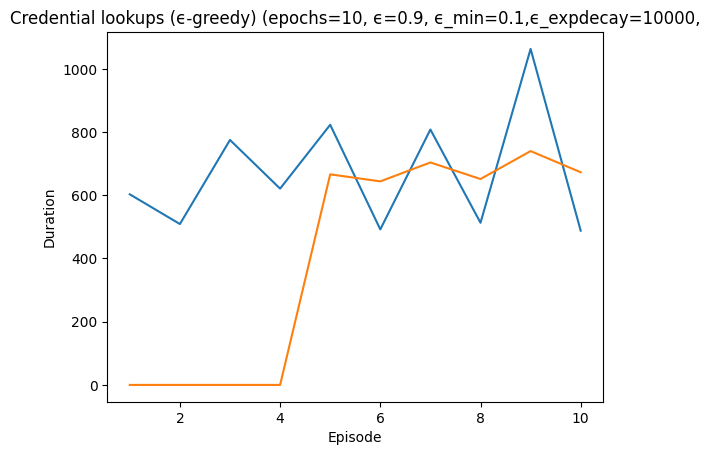

In [7]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)",
)

In [8]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning",
)

###### Tabular Q-learning
Learning with: episode_count=50,iteration_count=9000,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/50 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 1|Iteration 7|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 1|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 1|Iteration 9|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 1|Iteration 9|reward:  128.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 1|Iteration 13|reward:  130.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 1|Iteration 13|reward:  130.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 1|Iteration 14|reward:  136.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 1|Iteration 14|reward:  136.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 1|Iteration 20|reward:  236.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 1|Iteration 20|reward:  236.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 1|Iteration 22|reward:  242.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 1|Iteration 22|reward:  242.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 1|Iteration 32|reward:  244.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 1|Iteration 32|reward:  244.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 1|Iteration 33|reward:  258.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 1|Iteration 33|reward:  258.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 1|Iteration 36|reward:  358.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 1|Iteration 36|reward:  358.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 1|Iteration 50|reward:  372.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 1|Iteration 50|reward:  372.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 1|Iteration 57|reward:  472.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 1|Iteration 57|reward:  472.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 1|Iteration 60|reward:  478.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 1|Iteration 60|reward:  478.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 1|Iteration 64|reward:  484.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 1|Iteration 64|reward:  484.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 1|Iteration 65|reward:  486.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 1|Iteration 65|reward:  486.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 1|Iteration 69|reward:  492.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 1|Iteration 69|reward:  492.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 1|Iteration 74|reward:  494.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 1|Iteration 74|reward:  494.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 1|Iteration 109|reward:  505.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 1|Iteration 109|reward:  505.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 1|Iteration 121|reward:  507.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 1|Iteration 121|reward:  507.0|last_reward_at:  121|Elapsed Time: 0:00:00||


Episode 1|Iteration 132|reward:  513.0|last_reward_at:  121|Elapsed Time: 0:00:00||


Episode 1|Iteration 132|reward:  513.0|last_reward_at:  132|Elapsed Time: 0:00:00||


Episode 1|Iteration 149|reward:  519.0|last_reward_at:  132|Elapsed Time: 0:00:00||


Episode 1|Iteration 149|reward:  519.0|last_reward_at:  149|Elapsed Time: 0:00:00||


Episode 1|Iteration 151|reward:  523.0|last_reward_at:  149|Elapsed Time: 0:00:00||


Episode 1|Iteration 151|reward:  523.0|last_reward_at:  151|Elapsed Time: 0:00:00||


Episode 1|Iteration 185|reward:  523.0|last_reward_at:  151|Elapsed Time: 0:00:00||


Episode 1|Iteration 187|reward:  532.0|last_reward_at:  151|Elapsed Time: 0:00:00||


Episode 1|Iteration 187|reward:  532.0|last_reward_at:  187|Elapsed Time: 0:00:00||


Episode 1|Iteration 188|reward:  632.0|last_reward_at:  187|Elapsed Time: 0:00:00||


Episode 1|Iteration 188|reward:  632.0|last_reward_at:  188|Elapsed Time: 0:00:00||


Episode 1|Iteration 191|reward:  643.0|last_reward_at:  188|Elapsed Time: 0:00:00||


Episode 1|Iteration 191|reward:  643.0|last_reward_at:  191|Elapsed Time: 0:00:00||


Episode 1|Iteration 192|reward:  649.0|last_reward_at:  191|Elapsed Time: 0:00:00||


Episode 1|Iteration 192|reward:  649.0|last_reward_at:  192|Elapsed Time: 0:00:00||


Episode 1|Iteration 219|reward:  649.0|last_reward_at:  192|Elapsed Time: 0:00:00||


Episode 1|Iteration 247|reward:  649.0|last_reward_at:  192|Elapsed Time: 0:00:00||


Episode 1|Iteration 270|reward:  649.0|last_reward_at:  192|Elapsed Time: 0:00:00||


Episode 1|Iteration 296|reward:  649.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 1|Iteration 319|reward:  657.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 1|Iteration 319|reward:  657.0|last_reward_at:  319|Elapsed Time: 0:00:01||


Episode 1|Iteration 342|reward:  657.0|last_reward_at:  319|Elapsed Time: 0:00:01||


Episode 1|Iteration 365|reward:  657.0|last_reward_at:  319|Elapsed Time: 0:00:01||


Episode 1|Iteration 366|reward:  666.0|last_reward_at:  319|Elapsed Time: 0:00:01||


Episode 1|Iteration 366|reward:  666.0|last_reward_at:  366|Elapsed Time: 0:00:01||


Episode 1|Iteration 367|reward:  766.0|last_reward_at:  366|Elapsed Time: 0:00:01||


Episode 1|Iteration 367|reward:  766.0|last_reward_at:  367|Elapsed Time: 0:00:01||


Episode 1|Iteration 385|reward:  766.0|last_reward_at:  367|Elapsed Time: 0:00:01||


Episode 1|Iteration 405|reward:  766.0|last_reward_at:  367|Elapsed Time: 0:00:01||


Episode 1|Iteration 424|reward:  777.0|last_reward_at:  367|Elapsed Time: 0:00:01||


Episode 1|Iteration 424|reward:  777.0|last_reward_at:  424|Elapsed Time: 0:00:01||


Episode 1|Iteration 432|reward:  786.0|last_reward_at:  424|Elapsed Time: 0:00:01||


Episode 1|Iteration 432|reward:  786.0|last_reward_at:  432|Elapsed Time: 0:00:01||


Episode 1|Iteration 434|reward:  886.0|last_reward_at:  432|Elapsed Time: 0:00:01||


Episode 1|Iteration 434|reward:  886.0|last_reward_at:  434|Elapsed Time: 0:00:01||


Episode 1|Iteration 439|reward:  888.0|last_reward_at:  434|Elapsed Time: 0:00:01||


Episode 1|Iteration 439|reward:  888.0|last_reward_at:  439|Elapsed Time: 0:00:01||


Episode 1|Iteration 440|reward:  902.0|last_reward_at:  439|Elapsed Time: 0:00:01||


Episode 1|Iteration 440|reward:  902.0|last_reward_at:  440|Elapsed Time: 0:00:01||


Episode 1|Iteration 456|reward:  902.0|last_reward_at:  440|Elapsed Time: 0:00:01||


Episode 1|Iteration 457|reward: 1002.0|last_reward_at:  440|Elapsed Time: 0:00:01||


Episode 1|Iteration 457|reward: 1002.0|last_reward_at:  457|Elapsed Time: 0:00:01||


Episode 1|Iteration 472|reward: 1008.0|last_reward_at:  457|Elapsed Time: 0:00:01||


Episode 1|Iteration 472|reward: 1008.0|last_reward_at:  472|Elapsed Time: 0:00:01||


Episode 1|Iteration 480|reward: 1010.0|last_reward_at:  472|Elapsed Time: 0:00:01||


Episode 1|Iteration 480|reward: 1010.0|last_reward_at:  480|Elapsed Time: 0:00:01||


Episode 1|Iteration 489|reward: 1016.0|last_reward_at:  480|Elapsed Time: 0:00:01||


Episode 1|Iteration 489|reward: 1016.0|last_reward_at:  489|Elapsed Time: 0:00:01||


Episode 1|Iteration 508|reward: 1016.0|last_reward_at:  489|Elapsed Time: 0:00:02||


Episode 1|Iteration 527|reward: 1016.0|last_reward_at:  489|Elapsed Time: 0:00:02||


Episode 1|Iteration 541|reward: 1030.0|last_reward_at:  489|Elapsed Time: 0:00:02||


Episode 1|Iteration 541|reward: 1030.0|last_reward_at:  541|Elapsed Time: 0:00:02||


Episode 1|Iteration 550|reward: 1130.0|last_reward_at:  541|Elapsed Time: 0:00:02||


Episode 1|Iteration 550|reward: 1130.0|last_reward_at:  550|Elapsed Time: 0:00:02||


Episode 1|Iteration 569|reward: 1130.0|last_reward_at:  550|Elapsed Time: 0:00:02||


Episode 1|Iteration 585|reward: 1136.0|last_reward_at:  550|Elapsed Time: 0:00:02||


Episode 1|Iteration 585|reward: 1136.0|last_reward_at:  585|Elapsed Time: 0:00:02||


Episode 1|Iteration 587|reward: 1138.0|last_reward_at:  585|Elapsed Time: 0:00:02||


Episode 1|Iteration 587|reward: 1138.0|last_reward_at:  587|Elapsed Time: 0:00:02||


Episode 1|Iteration 590|reward: 1152.0|last_reward_at:  587|Elapsed Time: 0:00:02||


Episode 1|Iteration 590|reward: 1152.0|last_reward_at:  590|Elapsed Time: 0:00:02||


Episode 1|Iteration 592|reward: 1252.0|last_reward_at:  590|Elapsed Time: 0:00:02||


Episode 1|Iteration 592|reward: 1252.0|last_reward_at:  592|Elapsed Time: 0:00:02||


Episode 1|Iteration 604|reward: 1258.0|last_reward_at:  592|Elapsed Time: 0:00:02||


Episode 1|Iteration 604|reward: 1258.0|last_reward_at:  604|Elapsed Time: 0:00:02||


Episode 1|Iteration 617|reward: 1260.0|last_reward_at:  604|Elapsed Time: 0:00:02||


Episode 1|Iteration 617|reward: 1260.0|last_reward_at:  617|Elapsed Time: 0:00:02||


Episode 1|Iteration 635|reward: 1260.0|last_reward_at:  617|Elapsed Time: 0:00:02||


Episode 1|Iteration 637|reward: 1266.0|last_reward_at:  617|Elapsed Time: 0:00:02||


Episode 1|Iteration 637|reward: 1266.0|last_reward_at:  637|Elapsed Time: 0:00:02||


Episode 1|Iteration 650|reward: 1266.0|last_reward_at:  637|Elapsed Time: 0:00:02||


Episode 1|Iteration 666|reward: 1266.0|last_reward_at:  637|Elapsed Time: 0:00:03||


Episode 1|Iteration 672|reward: 1277.0|last_reward_at:  637|Elapsed Time: 0:00:03||


Episode 1|Iteration 672|reward: 1277.0|last_reward_at:  672|Elapsed Time: 0:00:03||


Episode 1|Iteration 684|reward: 1277.0|last_reward_at:  672|Elapsed Time: 0:00:03||


Episode 1|Iteration 697|reward: 1277.0|last_reward_at:  672|Elapsed Time: 0:00:03||


Episode 1|Iteration 714|reward: 1277.0|last_reward_at:  672|Elapsed Time: 0:00:03||


Episode 1|Iteration 727|reward: 1283.0|last_reward_at:  672|Elapsed Time: 0:00:03||


Episode 1|Iteration 727|reward: 1283.0|last_reward_at:  727|Elapsed Time: 0:00:03||


Episode 1|Iteration 743|reward: 1283.0|last_reward_at:  727|Elapsed Time: 0:00:03||


Episode 1|Iteration 758|reward: 1289.0|last_reward_at:  727|Elapsed Time: 0:00:03||


Episode 1|Iteration 758|reward: 1289.0|last_reward_at:  758|Elapsed Time: 0:00:03||


Episode 1|Iteration 773|reward: 1289.0|last_reward_at:  758|Elapsed Time: 0:00:03||


Episode 1|Iteration 790|reward: 1289.0|last_reward_at:  758|Elapsed Time: 0:00:03||


Episode 1|Iteration 806|reward: 1289.0|last_reward_at:  758|Elapsed Time: 0:00:03||


Episode 1|Iteration 818|reward: 1298.0|last_reward_at:  758|Elapsed Time: 0:00:04||


Episode 1|Iteration 818|reward: 1298.0|last_reward_at:  818|Elapsed Time: 0:00:04||


Episode 1|Iteration 820|reward: 6298.0|last_reward_at:  818|Elapsed Time: 0:00:04||


Episode 1|Iteration 820|reward: 6298.0|last_reward_at:  820|Elapsed Time: 0:00:04||

  Episode 1 ended at t=820 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/215 (0.08)
    explore-remote: 20/262 (0.07)
    explore-connect: 0/244 (0.00)
    exploit-local: 2/25 (0.07)
    exploit-remote: 0/22 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 82
  ## Episode: 2/50 'Tabular Q-learning' ϵ=0.7655, γ=0.015,learning_rate=0.01,Q%=100



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 2|Iteration 6|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 2|Iteration 6|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 2|Iteration 14|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 2|Iteration 14|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 2|Iteration 16|reward:  132.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 2|Iteration 16|reward:  132.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 2|Iteration 20|reward:  232.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 2|Iteration 20|reward:  232.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 2|Iteration 22|reward:  234.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 2|Iteration 22|reward:  234.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 2|Iteration 28|reward:  240.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 2|Iteration 28|reward:  240.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 2|Iteration 44|reward:  254.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 2|Iteration 44|reward:  254.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 2|Iteration 46|reward:  354.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 2|Iteration 46|reward:  354.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 2|Iteration 48|reward:  360.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 2|Iteration 48|reward:  360.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 2|Iteration 50|reward:  366.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 2|Iteration 50|reward:  366.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 2|Iteration 54|reward:  380.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 2|Iteration 54|reward:  380.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 2|Iteration 56|reward:  480.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 2|Iteration 56|reward:  480.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 2|Iteration 75|reward:  486.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 2|Iteration 75|reward:  486.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 2|Iteration 76|reward:  492.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 2|Iteration 76|reward:  492.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 2|Iteration 82|reward:  494.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 2|Iteration 82|reward:  494.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 2|Iteration 98|reward:  496.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 2|Iteration 98|reward:  496.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 2|Iteration 129|reward:  496.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 2|Iteration 154|reward:  496.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 2|Iteration 179|reward:  496.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 2|Iteration 207|reward:  496.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 2|Iteration 228|reward:  496.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 2|Iteration 256|reward:  496.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 2|Iteration 283|reward:  496.0|last_reward_at:   98|Elapsed Time: 0:00:01||


Episode 2|Iteration 295|reward:  502.0|last_reward_at:   98|Elapsed Time: 0:00:01||


Episode 2|Iteration 295|reward:  502.0|last_reward_at:  295|Elapsed Time: 0:00:01||


Episode 2|Iteration 326|reward:  502.0|last_reward_at:  295|Elapsed Time: 0:00:01||


Episode 2|Iteration 342|reward:  502.0|last_reward_at:  295|Elapsed Time: 0:00:01||


Episode 2|Iteration 350|reward:  508.0|last_reward_at:  295|Elapsed Time: 0:00:01||


Episode 2|Iteration 350|reward:  508.0|last_reward_at:  350|Elapsed Time: 0:00:01||


Episode 2|Iteration 378|reward:  519.0|last_reward_at:  350|Elapsed Time: 0:00:01||


Episode 2|Iteration 378|reward:  519.0|last_reward_at:  378|Elapsed Time: 0:00:01||


Episode 2|Iteration 391|reward:  523.0|last_reward_at:  378|Elapsed Time: 0:00:01||


Episode 2|Iteration 391|reward:  523.0|last_reward_at:  391|Elapsed Time: 0:00:01||


Episode 2|Iteration 397|reward:  525.0|last_reward_at:  391|Elapsed Time: 0:00:01||


Episode 2|Iteration 397|reward:  525.0|last_reward_at:  397|Elapsed Time: 0:00:01||


Episode 2|Iteration 425|reward:  534.0|last_reward_at:  397|Elapsed Time: 0:00:01||


Episode 2|Iteration 425|reward:  534.0|last_reward_at:  425|Elapsed Time: 0:00:01||


Episode 2|Iteration 427|reward:  634.0|last_reward_at:  425|Elapsed Time: 0:00:01||


Episode 2|Iteration 427|reward:  634.0|last_reward_at:  427|Elapsed Time: 0:00:01||


Episode 2|Iteration 445|reward:  645.0|last_reward_at:  427|Elapsed Time: 0:00:01||


Episode 2|Iteration 445|reward:  645.0|last_reward_at:  445|Elapsed Time: 0:00:01||


Episode 2|Iteration 451|reward:  653.0|last_reward_at:  445|Elapsed Time: 0:00:01||


Episode 2|Iteration 451|reward:  653.0|last_reward_at:  451|Elapsed Time: 0:00:01||


Episode 2|Iteration 470|reward:  653.0|last_reward_at:  451|Elapsed Time: 0:00:01||


Episode 2|Iteration 481|reward:  659.0|last_reward_at:  451|Elapsed Time: 0:00:01||


Episode 2|Iteration 481|reward:  659.0|last_reward_at:  481|Elapsed Time: 0:00:01||


Episode 2|Iteration 504|reward:  659.0|last_reward_at:  481|Elapsed Time: 0:00:01||


Episode 2|Iteration 513|reward:  668.0|last_reward_at:  481|Elapsed Time: 0:00:01||


Episode 2|Iteration 513|reward:  668.0|last_reward_at:  513|Elapsed Time: 0:00:01||


Episode 2|Iteration 516|reward:  768.0|last_reward_at:  513|Elapsed Time: 0:00:01||


Episode 2|Iteration 516|reward:  768.0|last_reward_at:  516|Elapsed Time: 0:00:01||


Episode 2|Iteration 526|reward:  782.0|last_reward_at:  516|Elapsed Time: 0:00:02||


Episode 2|Iteration 526|reward:  782.0|last_reward_at:  526|Elapsed Time: 0:00:02||


Episode 2|Iteration 529|reward:  882.0|last_reward_at:  526|Elapsed Time: 0:00:02||


Episode 2|Iteration 529|reward:  882.0|last_reward_at:  529|Elapsed Time: 0:00:02||


Episode 2|Iteration 534|reward:  884.0|last_reward_at:  529|Elapsed Time: 0:00:02||


Episode 2|Iteration 534|reward:  884.0|last_reward_at:  534|Elapsed Time: 0:00:02||


Episode 2|Iteration 537|reward:  886.0|last_reward_at:  534|Elapsed Time: 0:00:02||


Episode 2|Iteration 537|reward:  886.0|last_reward_at:  537|Elapsed Time: 0:00:02||


Episode 2|Iteration 553|reward:  886.0|last_reward_at:  537|Elapsed Time: 0:00:02||


Episode 2|Iteration 570|reward:  886.0|last_reward_at:  537|Elapsed Time: 0:00:02||


Episode 2|Iteration 589|reward:  886.0|last_reward_at:  537|Elapsed Time: 0:00:02||


Episode 2|Iteration 606|reward:  897.0|last_reward_at:  537|Elapsed Time: 0:00:02||


Episode 2|Iteration 606|reward:  897.0|last_reward_at:  606|Elapsed Time: 0:00:02||


Episode 2|Iteration 607|reward:  903.0|last_reward_at:  606|Elapsed Time: 0:00:02||


Episode 2|Iteration 607|reward:  903.0|last_reward_at:  607|Elapsed Time: 0:00:02||


Episode 2|Iteration 626|reward:  903.0|last_reward_at:  607|Elapsed Time: 0:00:02||


Episode 2|Iteration 630|reward:  911.0|last_reward_at:  607|Elapsed Time: 0:00:02||


Episode 2|Iteration 630|reward:  911.0|last_reward_at:  630|Elapsed Time: 0:00:02||


Episode 2|Iteration 650|reward:  911.0|last_reward_at:  630|Elapsed Time: 0:00:02||


Episode 2|Iteration 666|reward:  911.0|last_reward_at:  630|Elapsed Time: 0:00:02||


Episode 2|Iteration 684|reward:  911.0|last_reward_at:  630|Elapsed Time: 0:00:02||


Episode 2|Iteration 702|reward:  911.0|last_reward_at:  630|Elapsed Time: 0:00:03||


Episode 2|Iteration 720|reward:  911.0|last_reward_at:  630|Elapsed Time: 0:00:03||


Episode 2|Iteration 736|reward:  911.0|last_reward_at:  630|Elapsed Time: 0:00:03||


Episode 2|Iteration 757|reward:  911.0|last_reward_at:  630|Elapsed Time: 0:00:03||


Episode 2|Iteration 777|reward:  911.0|last_reward_at:  630|Elapsed Time: 0:00:03||


Episode 2|Iteration 784|reward:  917.0|last_reward_at:  630|Elapsed Time: 0:00:03||


Episode 2|Iteration 784|reward:  917.0|last_reward_at:  784|Elapsed Time: 0:00:03||


Episode 2|Iteration 798|reward:  917.0|last_reward_at:  784|Elapsed Time: 0:00:03||


Episode 2|Iteration 815|reward:  917.0|last_reward_at:  784|Elapsed Time: 0:00:03||


Episode 2|Iteration 831|reward:  917.0|last_reward_at:  784|Elapsed Time: 0:00:03||


Episode 2|Iteration 848|reward:  926.0|last_reward_at:  784|Elapsed Time: 0:00:03||


Episode 2|Iteration 848|reward:  926.0|last_reward_at:  848|Elapsed Time: 0:00:03||


Episode 2|Iteration 849|reward: 1026.0|last_reward_at:  848|Elapsed Time: 0:00:03||


Episode 2|Iteration 849|reward: 1026.0|last_reward_at:  849|Elapsed Time: 0:00:03||


Episode 2|Iteration 867|reward: 1026.0|last_reward_at:  849|Elapsed Time: 0:00:03||


Episode 2|Iteration 885|reward: 1026.0|last_reward_at:  849|Elapsed Time: 0:00:04||


Episode 2|Iteration 902|reward: 1026.0|last_reward_at:  849|Elapsed Time: 0:00:04||


Episode 2|Iteration 912|reward: 1026.0|last_reward_at:  849|Elapsed Time: 0:00:04||


Episode 2|Iteration 929|reward: 1026.0|last_reward_at:  849|Elapsed Time: 0:00:04||


Episode 2|Iteration 947|reward: 1026.0|last_reward_at:  849|Elapsed Time: 0:00:04||


Episode 2|Iteration 962|reward: 1026.0|last_reward_at:  849|Elapsed Time: 0:00:04||


Episode 2|Iteration 980|reward: 1026.0|last_reward_at:  849|Elapsed Time: 0:00:04||


Episode 2|Iteration 998|reward: 1026.0|last_reward_at:  849|Elapsed Time: 0:00:04||


Episode 2|Iteration 1013|reward: 1026.0|last_reward_at:  849|Elapsed Time: 0:00:04||


Episode 2|Iteration 1026|reward: 1026.0|last_reward_at:  849|Elapsed Time: 0:00:04||


Episode 2|Iteration 1037|reward: 1037.0|last_reward_at:  849|Elapsed Time: 0:00:05||


Episode 2|Iteration 1037|reward: 1037.0|last_reward_at: 1037|Elapsed Time: 0:00:05||


Episode 2|Iteration 1045|reward: 1041.0|last_reward_at: 1037|Elapsed Time: 0:00:05||


Episode 2|Iteration 1045|reward: 1041.0|last_reward_at: 1045|Elapsed Time: 0:00:05||


Episode 2|Iteration 1050|reward: 1043.0|last_reward_at: 1045|Elapsed Time: 0:00:05||


Episode 2|Iteration 1050|reward: 1043.0|last_reward_at: 1050|Elapsed Time: 0:00:05||


Episode 2|Iteration 1068|reward: 1043.0|last_reward_at: 1050|Elapsed Time: 0:00:05||


Episode 2|Iteration 1077|reward: 1052.0|last_reward_at: 1050|Elapsed Time: 0:00:05||


Episode 2|Iteration 1077|reward: 1052.0|last_reward_at: 1077|Elapsed Time: 0:00:05||


Episode 2|Iteration 1079|reward: 1152.0|last_reward_at: 1077|Elapsed Time: 0:00:05||


Episode 2|Iteration 1079|reward: 1152.0|last_reward_at: 1079|Elapsed Time: 0:00:05||


Episode 2|Iteration 1094|reward: 1152.0|last_reward_at: 1079|Elapsed Time: 0:00:05||


Episode 2|Iteration 1103|reward: 1166.0|last_reward_at: 1079|Elapsed Time: 0:00:05||


Episode 2|Iteration 1103|reward: 1166.0|last_reward_at: 1103|Elapsed Time: 0:00:05||


Episode 2|Iteration 1105|reward: 1266.0|last_reward_at: 1103|Elapsed Time: 0:00:05||


Episode 2|Iteration 1105|reward: 1266.0|last_reward_at: 1105|Elapsed Time: 0:00:05||


Episode 2|Iteration 1112|reward: 1280.0|last_reward_at: 1105|Elapsed Time: 0:00:05||


Episode 2|Iteration 1112|reward: 1280.0|last_reward_at: 1112|Elapsed Time: 0:00:05||


Episode 2|Iteration 1113|reward: 6280.0|last_reward_at: 1112|Elapsed Time: 0:00:05||


Episode 2|Iteration 1113|reward: 6280.0|last_reward_at: 1113|Elapsed Time: 0:00:05||

  Episode 2 ended at t=1113 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/229 (0.07)
    explore-remote: 15/320 (0.04)
    explore-connect: 0/364 (0.00)
    exploit-local: 2/15 (0.12)
    exploit-remote: 3/137 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 192
  ## Episode: 3/50 'Tabular Q-learning' ϵ=0.6148, γ=0.015,learning_rate=0.01,Q%=100



Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 3|Iteration 5|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 3|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 3|Iteration 7|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 3|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 3|Iteration 9|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 3|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 3|Iteration 11|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 3|Iteration 11|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 3|Iteration 12|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 3|Iteration 12|reward:  244.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 3|Iteration 16|reward:  250.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 3|Iteration 16|reward:  250.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 3|Iteration 18|reward:  350.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 3|Iteration 18|reward:  350.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 3|Iteration 30|reward:  352.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 3|Iteration 30|reward:  352.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 3|Iteration 36|reward:  358.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 3|Iteration 36|reward:  358.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 3|Iteration 50|reward:  360.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 3|Iteration 50|reward:  360.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 3|Iteration 57|reward:  362.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 3|Iteration 57|reward:  362.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 3|Iteration 63|reward:  368.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 3|Iteration 63|reward:  368.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 3|Iteration 81|reward:  379.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 3|Iteration 81|reward:  379.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 3|Iteration 93|reward:  387.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 3|Iteration 93|reward:  387.0|last_reward_at:   93|Elapsed Time: 0:00:00||


Episode 3|Iteration 98|reward:  396.0|last_reward_at:   93|Elapsed Time: 0:00:00||


Episode 3|Iteration 98|reward:  396.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 3|Iteration 99|reward:  402.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 3|Iteration 99|reward:  402.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 3|Iteration 101|reward:  502.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 3|Iteration 101|reward:  502.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 3|Iteration 104|reward:  516.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 3|Iteration 104|reward:  516.0|last_reward_at:  104|Elapsed Time: 0:00:00||


Episode 3|Iteration 105|reward:  616.0|last_reward_at:  104|Elapsed Time: 0:00:00||


Episode 3|Iteration 105|reward:  616.0|last_reward_at:  105|Elapsed Time: 0:00:00||


Episode 3|Iteration 118|reward:  622.0|last_reward_at:  105|Elapsed Time: 0:00:00||


Episode 3|Iteration 118|reward:  622.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 3|Iteration 121|reward:  624.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 3|Iteration 121|reward:  624.0|last_reward_at:  121|Elapsed Time: 0:00:00||


Episode 3|Iteration 123|reward:  635.0|last_reward_at:  121|Elapsed Time: 0:00:00||


Episode 3|Iteration 123|reward:  635.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 3|Iteration 134|reward:  643.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 3|Iteration 134|reward:  643.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 3|Iteration 135|reward:  649.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 3|Iteration 135|reward:  649.0|last_reward_at:  135|Elapsed Time: 0:00:00||


Episode 3|Iteration 151|reward:  651.0|last_reward_at:  135|Elapsed Time: 0:00:00||


Episode 3|Iteration 151|reward:  651.0|last_reward_at:  151|Elapsed Time: 0:00:00||


Episode 3|Iteration 163|reward:  660.0|last_reward_at:  151|Elapsed Time: 0:00:00||


Episode 3|Iteration 163|reward:  660.0|last_reward_at:  163|Elapsed Time: 0:00:00||


Episode 3|Iteration 164|reward:  760.0|last_reward_at:  163|Elapsed Time: 0:00:00||


Episode 3|Iteration 164|reward:  760.0|last_reward_at:  164|Elapsed Time: 0:00:00||


Episode 3|Iteration 180|reward:  774.0|last_reward_at:  164|Elapsed Time: 0:00:00||


Episode 3|Iteration 180|reward:  774.0|last_reward_at:  180|Elapsed Time: 0:00:00||


Episode 3|Iteration 182|reward:  776.0|last_reward_at:  180|Elapsed Time: 0:00:00||


Episode 3|Iteration 182|reward:  776.0|last_reward_at:  182|Elapsed Time: 0:00:00||


Episode 3|Iteration 183|reward:  780.0|last_reward_at:  182|Elapsed Time: 0:00:00||


Episode 3|Iteration 183|reward:  780.0|last_reward_at:  183|Elapsed Time: 0:00:00||


Episode 3|Iteration 184|reward:  880.0|last_reward_at:  183|Elapsed Time: 0:00:00||


Episode 3|Iteration 184|reward:  880.0|last_reward_at:  184|Elapsed Time: 0:00:00||


Episode 3|Iteration 200|reward:  880.0|last_reward_at:  184|Elapsed Time: 0:00:00||


Episode 3|Iteration 207|reward:  891.0|last_reward_at:  184|Elapsed Time: 0:00:00||


Episode 3|Iteration 207|reward:  891.0|last_reward_at:  207|Elapsed Time: 0:00:00||


Episode 3|Iteration 224|reward:  891.0|last_reward_at:  207|Elapsed Time: 0:00:01||


Episode 3|Iteration 242|reward:  891.0|last_reward_at:  207|Elapsed Time: 0:00:01||


Episode 3|Iteration 251|reward:  899.0|last_reward_at:  207|Elapsed Time: 0:00:01||


Episode 3|Iteration 251|reward:  899.0|last_reward_at:  251|Elapsed Time: 0:00:01||


Episode 3|Iteration 271|reward:  899.0|last_reward_at:  251|Elapsed Time: 0:00:01||


Episode 3|Iteration 290|reward:  899.0|last_reward_at:  251|Elapsed Time: 0:00:01||


Episode 3|Iteration 307|reward:  899.0|last_reward_at:  251|Elapsed Time: 0:00:01||


Episode 3|Iteration 324|reward:  899.0|last_reward_at:  251|Elapsed Time: 0:00:01||


Episode 3|Iteration 342|reward:  899.0|last_reward_at:  251|Elapsed Time: 0:00:01||


Episode 3|Iteration 357|reward:  899.0|last_reward_at:  251|Elapsed Time: 0:00:01||


Episode 3|Iteration 374|reward:  899.0|last_reward_at:  251|Elapsed Time: 0:00:01||


Episode 3|Iteration 393|reward:  899.0|last_reward_at:  251|Elapsed Time: 0:00:02||


Episode 3|Iteration 409|reward:  899.0|last_reward_at:  251|Elapsed Time: 0:00:02||


Episode 3|Iteration 424|reward:  908.0|last_reward_at:  251|Elapsed Time: 0:00:02||


Episode 3|Iteration 424|reward:  908.0|last_reward_at:  424|Elapsed Time: 0:00:02||


Episode 3|Iteration 428|reward: 1008.0|last_reward_at:  424|Elapsed Time: 0:00:02||


Episode 3|Iteration 428|reward: 1008.0|last_reward_at:  428|Elapsed Time: 0:00:02||


Episode 3|Iteration 443|reward: 1022.0|last_reward_at:  428|Elapsed Time: 0:00:02||


Episode 3|Iteration 443|reward: 1022.0|last_reward_at:  443|Elapsed Time: 0:00:02||


Episode 3|Iteration 444|reward: 1122.0|last_reward_at:  443|Elapsed Time: 0:00:02||


Episode 3|Iteration 444|reward: 1122.0|last_reward_at:  444|Elapsed Time: 0:00:02||


Episode 3|Iteration 447|reward: 1136.0|last_reward_at:  444|Elapsed Time: 0:00:02||


Episode 3|Iteration 447|reward: 1136.0|last_reward_at:  447|Elapsed Time: 0:00:02||


Episode 3|Iteration 448|reward: 1236.0|last_reward_at:  447|Elapsed Time: 0:00:02||


Episode 3|Iteration 448|reward: 1236.0|last_reward_at:  448|Elapsed Time: 0:00:02||


Episode 3|Iteration 450|reward: 1242.0|last_reward_at:  448|Elapsed Time: 0:00:02||


Episode 3|Iteration 450|reward: 1242.0|last_reward_at:  450|Elapsed Time: 0:00:02||


Episode 3|Iteration 455|reward: 1248.0|last_reward_at:  450|Elapsed Time: 0:00:02||


Episode 3|Iteration 455|reward: 1248.0|last_reward_at:  455|Elapsed Time: 0:00:02||


Episode 3|Iteration 457|reward: 1262.0|last_reward_at:  455|Elapsed Time: 0:00:02||


Episode 3|Iteration 457|reward: 1262.0|last_reward_at:  457|Elapsed Time: 0:00:02||


Episode 3|Iteration 458|reward: 6262.0|last_reward_at:  457|Elapsed Time: 0:00:02||


Episode 3|Iteration 458|reward: 6262.0|last_reward_at:  458|Elapsed Time: 0:00:02||

  Episode 3 ended at t=458 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/80 (0.09)
    explore-remote: 15/89 (0.14)
    explore-connect: 0/123 (0.00)
    exploit-local: 8/30 (0.21)
    exploit-remote: 2/92 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 76
  ## Episode: 4/50 'Tabular Q-learning' ϵ=0.5618, γ=0.015,learning_rate=0.01,Q%=100



Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 4|Iteration 5|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 4|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 4|Iteration 8|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 4|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 4|Iteration 9|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 4|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 4|Iteration 11|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 4|Iteration 11|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 12|reward:  342.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 12|reward:  342.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 4|Iteration 13|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 4|Iteration 13|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 4|Iteration 23|reward:  346.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 4|Iteration 23|reward:  346.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 4|Iteration 32|reward:  348.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 4|Iteration 32|reward:  348.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 4|Iteration 36|reward:  362.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 4|Iteration 36|reward:  362.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 4|Iteration 37|reward:  462.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 4|Iteration 37|reward:  462.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 4|Iteration 43|reward:  468.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 4|Iteration 43|reward:  468.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 4|Iteration 49|reward:  482.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 4|Iteration 49|reward:  482.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 4|Iteration 53|reward:  582.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 4|Iteration 53|reward:  582.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 4|Iteration 58|reward:  584.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 4|Iteration 58|reward:  584.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 4|Iteration 60|reward:  590.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 4|Iteration 60|reward:  590.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 4|Iteration 69|reward:  596.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 4|Iteration 69|reward:  596.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 4|Iteration 77|reward:  607.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 4|Iteration 77|reward:  607.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 4|Iteration 81|reward:  615.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 4|Iteration 81|reward:  615.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 4|Iteration 92|reward:  617.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 4|Iteration 92|reward:  617.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 4|Iteration 98|reward:  619.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 4|Iteration 98|reward:  619.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 4|Iteration 114|reward:  619.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 4|Iteration 117|reward:  625.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 4|Iteration 117|reward:  625.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 4|Iteration 136|reward:  625.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 4|Iteration 140|reward:  631.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 4|Iteration 140|reward:  631.0|last_reward_at:  140|Elapsed Time: 0:00:00||


Episode 4|Iteration 149|reward:  637.0|last_reward_at:  140|Elapsed Time: 0:00:00||


Episode 4|Iteration 149|reward:  637.0|last_reward_at:  149|Elapsed Time: 0:00:00||


Episode 4|Iteration 151|reward:  643.0|last_reward_at:  149|Elapsed Time: 0:00:00||


Episode 4|Iteration 151|reward:  643.0|last_reward_at:  151|Elapsed Time: 0:00:00||


Episode 4|Iteration 158|reward:  652.0|last_reward_at:  151|Elapsed Time: 0:00:00||


Episode 4|Iteration 158|reward:  652.0|last_reward_at:  158|Elapsed Time: 0:00:00||


Episode 4|Iteration 161|reward:  752.0|last_reward_at:  158|Elapsed Time: 0:00:00||


Episode 4|Iteration 161|reward:  752.0|last_reward_at:  161|Elapsed Time: 0:00:00||


Episode 4|Iteration 164|reward:  766.0|last_reward_at:  161|Elapsed Time: 0:00:00||


Episode 4|Iteration 164|reward:  766.0|last_reward_at:  164|Elapsed Time: 0:00:00||


Episode 4|Iteration 165|reward:  866.0|last_reward_at:  164|Elapsed Time: 0:00:00||


Episode 4|Iteration 165|reward:  866.0|last_reward_at:  165|Elapsed Time: 0:00:00||


Episode 4|Iteration 166|reward:  868.0|last_reward_at:  165|Elapsed Time: 0:00:00||


Episode 4|Iteration 166|reward:  868.0|last_reward_at:  166|Elapsed Time: 0:00:00||


Episode 4|Iteration 183|reward:  868.0|last_reward_at:  166|Elapsed Time: 0:00:00||


Episode 4|Iteration 185|reward:  879.0|last_reward_at:  166|Elapsed Time: 0:00:00||


Episode 4|Iteration 185|reward:  879.0|last_reward_at:  185|Elapsed Time: 0:00:00||


Episode 4|Iteration 188|reward:  887.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 4|Iteration 188|reward:  887.0|last_reward_at:  188|Elapsed Time: 0:00:01||


Episode 4|Iteration 189|reward:  893.0|last_reward_at:  188|Elapsed Time: 0:00:01||


Episode 4|Iteration 189|reward:  893.0|last_reward_at:  189|Elapsed Time: 0:00:01||


Episode 4|Iteration 207|reward:  893.0|last_reward_at:  189|Elapsed Time: 0:00:01||


Episode 4|Iteration 212|reward:  895.0|last_reward_at:  189|Elapsed Time: 0:00:01||


Episode 4|Iteration 212|reward:  895.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 4|Iteration 228|reward:  895.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 4|Iteration 244|reward:  895.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 4|Iteration 253|reward:  901.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 4|Iteration 253|reward:  901.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 4|Iteration 273|reward:  901.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 4|Iteration 293|reward:  901.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 4|Iteration 310|reward:  901.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 4|Iteration 327|reward:  901.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 4|Iteration 342|reward:  901.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 4|Iteration 358|reward:  901.0|last_reward_at:  253|Elapsed Time: 0:00:02||


Episode 4|Iteration 368|reward:  907.0|last_reward_at:  253|Elapsed Time: 0:00:02||


Episode 4|Iteration 368|reward:  907.0|last_reward_at:  368|Elapsed Time: 0:00:02||


Episode 4|Iteration 383|reward:  907.0|last_reward_at:  368|Elapsed Time: 0:00:02||


Episode 4|Iteration 384|reward:  916.0|last_reward_at:  368|Elapsed Time: 0:00:02||


Episode 4|Iteration 384|reward:  916.0|last_reward_at:  384|Elapsed Time: 0:00:02||


Episode 4|Iteration 386|reward: 1016.0|last_reward_at:  384|Elapsed Time: 0:00:02||


Episode 4|Iteration 386|reward: 1016.0|last_reward_at:  386|Elapsed Time: 0:00:02||


Episode 4|Iteration 392|reward: 1030.0|last_reward_at:  386|Elapsed Time: 0:00:02||


Episode 4|Iteration 392|reward: 1030.0|last_reward_at:  392|Elapsed Time: 0:00:02||


Episode 4|Iteration 398|reward: 1130.0|last_reward_at:  392|Elapsed Time: 0:00:02||


Episode 4|Iteration 398|reward: 1130.0|last_reward_at:  398|Elapsed Time: 0:00:02||


Episode 4|Iteration 413|reward: 1130.0|last_reward_at:  398|Elapsed Time: 0:00:02||


Episode 4|Iteration 427|reward: 1130.0|last_reward_at:  398|Elapsed Time: 0:00:02||


Episode 4|Iteration 433|reward: 1136.0|last_reward_at:  398|Elapsed Time: 0:00:02||


Episode 4|Iteration 433|reward: 1136.0|last_reward_at:  433|Elapsed Time: 0:00:02||


Episode 4|Iteration 443|reward: 1138.0|last_reward_at:  433|Elapsed Time: 0:00:02||


Episode 4|Iteration 443|reward: 1138.0|last_reward_at:  443|Elapsed Time: 0:00:02||


Episode 4|Iteration 456|reward: 1138.0|last_reward_at:  443|Elapsed Time: 0:00:02||


Episode 4|Iteration 467|reward: 1138.0|last_reward_at:  443|Elapsed Time: 0:00:02||


Episode 4|Iteration 476|reward: 1140.0|last_reward_at:  443|Elapsed Time: 0:00:02||


Episode 4|Iteration 476|reward: 1140.0|last_reward_at:  476|Elapsed Time: 0:00:02||


Episode 4|Iteration 489|reward: 1140.0|last_reward_at:  476|Elapsed Time: 0:00:02||


Episode 4|Iteration 504|reward: 1140.0|last_reward_at:  476|Elapsed Time: 0:00:03||


Episode 4|Iteration 521|reward: 1140.0|last_reward_at:  476|Elapsed Time: 0:00:03||


Episode 4|Iteration 527|reward: 1154.0|last_reward_at:  476|Elapsed Time: 0:00:03||


Episode 4|Iteration 527|reward: 1154.0|last_reward_at:  527|Elapsed Time: 0:00:03||


Episode 4|Iteration 528|reward: 1254.0|last_reward_at:  527|Elapsed Time: 0:00:03||


Episode 4|Iteration 528|reward: 1254.0|last_reward_at:  528|Elapsed Time: 0:00:03||


Episode 4|Iteration 540|reward: 1254.0|last_reward_at:  528|Elapsed Time: 0:00:03||


Episode 4|Iteration 554|reward: 1254.0|last_reward_at:  528|Elapsed Time: 0:00:03||


Episode 4|Iteration 567|reward: 1254.0|last_reward_at:  528|Elapsed Time: 0:00:03||


Episode 4|Iteration 568|reward: 1260.0|last_reward_at:  528|Elapsed Time: 0:00:03||


Episode 4|Iteration 568|reward: 1260.0|last_reward_at:  568|Elapsed Time: 0:00:03||


Episode 4|Iteration 579|reward: 1266.0|last_reward_at:  568|Elapsed Time: 0:00:03||


Episode 4|Iteration 579|reward: 1266.0|last_reward_at:  579|Elapsed Time: 0:00:03||


Episode 4|Iteration 595|reward: 1266.0|last_reward_at:  579|Elapsed Time: 0:00:03||


Episode 4|Iteration 608|reward: 1266.0|last_reward_at:  579|Elapsed Time: 0:00:03||


Episode 4|Iteration 621|reward: 1266.0|last_reward_at:  579|Elapsed Time: 0:00:03||


Episode 4|Iteration 632|reward: 1266.0|last_reward_at:  579|Elapsed Time: 0:00:04||


Episode 4|Iteration 645|reward: 1266.0|last_reward_at:  579|Elapsed Time: 0:00:04||


Episode 4|Iteration 656|reward: 1280.0|last_reward_at:  579|Elapsed Time: 0:00:04||


Episode 4|Iteration 656|reward: 1280.0|last_reward_at:  656|Elapsed Time: 0:00:04||


Episode 4|Iteration 657|reward: 6280.0|last_reward_at:  656|Elapsed Time: 0:00:04||


Episode 4|Iteration 657|reward: 6280.0|last_reward_at:  657|Elapsed Time: 0:00:04||

  Episode 4 ended at t=657 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/157 (0.07)
    explore-remote: 19/208 (0.08)
    explore-connect: 0/198 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 1/45 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 253
  ## Episode: 5/50 'Tabular Q-learning' ϵ=0.4939, γ=0.015,learning_rate=0.01,Q%=100



Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 5|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 5|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 5|Iteration 6|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 5|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 5|Iteration 7|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 5|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 8|reward:  132.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 8|reward:  132.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 5|Iteration 9|reward:  232.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 5|Iteration 9|reward:  232.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 5|Iteration 15|reward:  246.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 5|Iteration 15|reward:  246.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 5|Iteration 16|reward:  252.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 5|Iteration 16|reward:  252.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 5|Iteration 17|reward:  352.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 5|Iteration 17|reward:  352.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 5|Iteration 18|reward:  354.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 5|Iteration 18|reward:  354.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 5|Iteration 19|reward:  360.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 5|Iteration 19|reward:  360.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 5|Iteration 28|reward:  371.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 5|Iteration 28|reward:  371.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 5|Iteration 29|reward:  377.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 5|Iteration 29|reward:  377.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 5|Iteration 30|reward:  385.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 5|Iteration 30|reward:  385.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 5|Iteration 38|reward:  391.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 5|Iteration 38|reward:  391.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 5|Iteration 51|reward:  400.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 5|Iteration 51|reward:  400.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 5|Iteration 53|reward:  402.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 5|Iteration 53|reward:  402.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 5|Iteration 54|reward:  502.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 5|Iteration 54|reward:  502.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 5|Iteration 55|reward:  516.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 5|Iteration 55|reward:  516.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 5|Iteration 56|reward:  616.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 5|Iteration 56|reward:  616.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 5|Iteration 59|reward:  630.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 5|Iteration 59|reward:  630.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 5|Iteration 61|reward:  730.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 5|Iteration 61|reward:  730.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 5|Iteration 64|reward:  744.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 5|Iteration 64|reward:  744.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 5|Iteration 65|reward:  844.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 5|Iteration 65|reward:  844.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 5|Iteration 67|reward:  846.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 5|Iteration 67|reward:  846.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 5|Iteration 69|reward:  848.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 5|Iteration 69|reward:  848.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 5|Iteration 76|reward:  850.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 5|Iteration 76|reward:  850.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 5|Iteration 81|reward:  856.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 5|Iteration 81|reward:  856.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 5|Iteration 83|reward:  858.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 5|Iteration 83|reward:  858.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 5|Iteration 89|reward:  864.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 5|Iteration 89|reward:  864.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 5|Iteration 91|reward:  870.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 5|Iteration 91|reward:  870.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 5|Iteration 104|reward:  870.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 5|Iteration 113|reward:  876.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 5|Iteration 113|reward:  876.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 5|Iteration 124|reward:  890.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 5|Iteration 124|reward:  890.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 5|Iteration 125|reward:  990.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 5|Iteration 125|reward:  990.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 5|Iteration 130|reward:  996.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 5|Iteration 130|reward:  996.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 5|Iteration 136|reward: 1010.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 5|Iteration 136|reward: 1010.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 5|Iteration 139|reward: 1110.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 5|Iteration 139|reward: 1110.0|last_reward_at:  139|Elapsed Time: 0:00:00||


Episode 5|Iteration 142|reward: 1121.0|last_reward_at:  139|Elapsed Time: 0:00:00||


Episode 5|Iteration 142|reward: 1121.0|last_reward_at:  142|Elapsed Time: 0:00:00||


Episode 5|Iteration 150|reward: 1129.0|last_reward_at:  142|Elapsed Time: 0:00:00||


Episode 5|Iteration 150|reward: 1129.0|last_reward_at:  150|Elapsed Time: 0:00:00||


Episode 5|Iteration 163|reward: 1135.0|last_reward_at:  150|Elapsed Time: 0:00:01||


Episode 5|Iteration 163|reward: 1135.0|last_reward_at:  163|Elapsed Time: 0:00:01||


Episode 5|Iteration 179|reward: 1141.0|last_reward_at:  163|Elapsed Time: 0:00:01||


Episode 5|Iteration 179|reward: 1141.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 5|Iteration 193|reward: 1141.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 5|Iteration 208|reward: 1141.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 5|Iteration 221|reward: 1150.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 5|Iteration 221|reward: 1150.0|last_reward_at:  221|Elapsed Time: 0:00:01||


Episode 5|Iteration 222|reward: 1250.0|last_reward_at:  221|Elapsed Time: 0:00:01||


Episode 5|Iteration 222|reward: 1250.0|last_reward_at:  222|Elapsed Time: 0:00:01||


Episode 5|Iteration 226|reward: 1264.0|last_reward_at:  222|Elapsed Time: 0:00:01||


Episode 5|Iteration 226|reward: 1264.0|last_reward_at:  226|Elapsed Time: 0:00:01||


Episode 5|Iteration 228|reward: 6264.0|last_reward_at:  226|Elapsed Time: 0:00:01||


Episode 5|Iteration 228|reward: 6264.0|last_reward_at:  228|Elapsed Time: 0:00:01||

  Episode 5 ended at t=228 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/42 (0.19)
    explore-remote: 16/63 (0.20)
    explore-connect: 0/62 (0.00)
    exploit-local: 7/1 (0.88)
    exploit-remote: 1/15 (0.06)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 84
  ## Episode: 6/50 'Tabular Q-learning' ϵ=0.4723, γ=0.015,learning_rate=0.01,Q%=100



Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 6|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 6|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 6|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 6|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 6|Iteration 8|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 6|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 6|Iteration 9|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 6|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 6|Iteration 10|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 6|Iteration 10|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 6|Iteration 11|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 6|Iteration 11|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 6|Iteration 13|reward:  344.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 6|Iteration 13|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 6|Iteration 14|reward:  355.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 6|Iteration 14|reward:  355.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 6|Iteration 15|reward:  357.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 6|Iteration 15|reward:  357.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 6|Iteration 16|reward:  363.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 6|Iteration 16|reward:  363.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 6|Iteration 19|reward:  372.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 6|Iteration 19|reward:  372.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 6|Iteration 20|reward:  472.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 6|Iteration 20|reward:  472.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 6|Iteration 21|reward:  474.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 6|Iteration 21|reward:  474.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 6|Iteration 25|reward:  480.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 6|Iteration 25|reward:  480.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 6|Iteration 28|reward:  486.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 6|Iteration 28|reward:  486.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 6|Iteration 31|reward:  500.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 6|Iteration 31|reward:  500.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 6|Iteration 35|reward:  600.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 6|Iteration 35|reward:  600.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 6|Iteration 37|reward:  606.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 6|Iteration 37|reward:  606.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 6|Iteration 47|reward:  608.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 6|Iteration 47|reward:  608.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 6|Iteration 53|reward:  614.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 6|Iteration 53|reward:  614.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 6|Iteration 54|reward:  628.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 6|Iteration 54|reward:  628.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 6|Iteration 57|reward:  728.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 6|Iteration 57|reward:  728.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 6|Iteration 58|reward:  742.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 6|Iteration 58|reward:  742.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 6|Iteration 60|reward:  842.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 6|Iteration 60|reward:  842.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 6|Iteration 61|reward:  848.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 6|Iteration 61|reward:  848.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 6|Iteration 66|reward:  854.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 6|Iteration 66|reward:  854.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 6|Iteration 67|reward:  856.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 6|Iteration 67|reward:  856.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 6|Iteration 68|reward:  870.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 6|Iteration 68|reward:  870.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 6|Iteration 69|reward:  970.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 6|Iteration 69|reward:  970.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 6|Iteration 70|reward:  976.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 6|Iteration 70|reward:  976.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 6|Iteration 72|reward:  990.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 6|Iteration 72|reward:  990.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 6|Iteration 74|reward:  992.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 6|Iteration 74|reward:  992.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 6|Iteration 80|reward: 1092.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 6|Iteration 80|reward: 1092.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 6|Iteration 87|reward: 1098.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 6|Iteration 87|reward: 1098.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 6|Iteration 88|reward: 1100.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 6|Iteration 88|reward: 1100.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 6|Iteration 90|reward: 1106.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 6|Iteration 90|reward: 1106.0|last_reward_at:   90|Elapsed Time: 0:00:00||


Episode 6|Iteration 91|reward: 1120.0|last_reward_at:   90|Elapsed Time: 0:00:00||


Episode 6|Iteration 91|reward: 1120.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 6|Iteration 92|reward: 1220.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 6|Iteration 92|reward: 1220.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 6|Iteration 95|reward: 1222.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 6|Iteration 95|reward: 1222.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 6|Iteration 100|reward: 1236.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 6|Iteration 100|reward: 1236.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 6|Iteration 101|reward: 6236.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 6|Iteration 101|reward: 6236.0|last_reward_at:  101|Elapsed Time: 0:00:00||

  Episode 6 ended at t=101 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/17 (0.37)
    explore-remote: 14/18 (0.44)
    explore-connect: 0/25 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 23
  ## Episode: 7/50 'Tabular Q-learning' ϵ=0.4631, γ=0.015,learning_rate=0.01,Q%=100



Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 7|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 7|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 7|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 7|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 7|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 7|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 7|Iteration 6|reward:  239.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 7|Iteration 6|reward:  239.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 7|Iteration 11|reward:  243.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 7|Iteration 11|reward:  243.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 7|Iteration 15|reward:  245.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 7|Iteration 15|reward:  245.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 7|Iteration 20|reward:  251.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 7|Iteration 20|reward:  251.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 7|Iteration 21|reward:  257.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 7|Iteration 21|reward:  257.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 7|Iteration 26|reward:  266.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 7|Iteration 26|reward:  266.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 7|Iteration 27|reward:  366.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 7|Iteration 27|reward:  366.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 7|Iteration 28|reward:  380.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 7|Iteration 28|reward:  380.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 7|Iteration 29|reward:  386.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 7|Iteration 29|reward:  386.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 7|Iteration 31|reward:  486.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 7|Iteration 31|reward:  486.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 7|Iteration 40|reward:  488.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 7|Iteration 40|reward:  488.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 7|Iteration 43|reward:  502.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 7|Iteration 43|reward:  502.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 7|Iteration 44|reward:  602.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 7|Iteration 44|reward:  602.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 7|Iteration 45|reward:  616.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 7|Iteration 45|reward:  616.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 7|Iteration 46|reward:  716.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 7|Iteration 46|reward:  716.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 7|Iteration 47|reward:  718.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 7|Iteration 47|reward:  718.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 7|Iteration 51|reward:  724.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 7|Iteration 51|reward:  724.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 7|Iteration 53|reward:  730.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 7|Iteration 53|reward:  730.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 7|Iteration 57|reward:  736.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 7|Iteration 57|reward:  736.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 7|Iteration 74|reward:  736.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 7|Iteration 85|reward:  742.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 7|Iteration 85|reward:  742.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 7|Iteration 102|reward:  753.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 7|Iteration 102|reward:  753.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 7|Iteration 106|reward:  755.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 7|Iteration 106|reward:  755.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 7|Iteration 114|reward:  755.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 7|Iteration 130|reward:  755.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 7|Iteration 131|reward:  757.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 7|Iteration 131|reward:  757.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 7|Iteration 134|reward:  763.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 7|Iteration 134|reward:  763.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 7|Iteration 145|reward:  769.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 7|Iteration 145|reward:  769.0|last_reward_at:  145|Elapsed Time: 0:00:00||


Episode 7|Iteration 160|reward:  769.0|last_reward_at:  145|Elapsed Time: 0:00:00||


Episode 7|Iteration 161|reward:  771.0|last_reward_at:  145|Elapsed Time: 0:00:00||


Episode 7|Iteration 161|reward:  771.0|last_reward_at:  161|Elapsed Time: 0:00:00||


Episode 7|Iteration 164|reward:  775.0|last_reward_at:  161|Elapsed Time: 0:00:00||


Episode 7|Iteration 164|reward:  775.0|last_reward_at:  164|Elapsed Time: 0:00:00||


Episode 7|Iteration 181|reward:  775.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 7|Iteration 201|reward:  775.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 7|Iteration 217|reward:  775.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 7|Iteration 228|reward:  775.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 7|Iteration 245|reward:  775.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 7|Iteration 261|reward:  775.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 7|Iteration 276|reward:  775.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 7|Iteration 289|reward:  781.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 7|Iteration 289|reward:  781.0|last_reward_at:  289|Elapsed Time: 0:00:01||


Episode 7|Iteration 307|reward:  781.0|last_reward_at:  289|Elapsed Time: 0:00:01||


Episode 7|Iteration 319|reward:  790.0|last_reward_at:  289|Elapsed Time: 0:00:01||


Episode 7|Iteration 319|reward:  790.0|last_reward_at:  319|Elapsed Time: 0:00:01||


Episode 7|Iteration 321|reward:  890.0|last_reward_at:  319|Elapsed Time: 0:00:01||


Episode 7|Iteration 321|reward:  890.0|last_reward_at:  321|Elapsed Time: 0:00:01||


Episode 7|Iteration 330|reward:  904.0|last_reward_at:  321|Elapsed Time: 0:00:02||


Episode 7|Iteration 330|reward:  904.0|last_reward_at:  330|Elapsed Time: 0:00:02||


Episode 7|Iteration 331|reward: 1004.0|last_reward_at:  330|Elapsed Time: 0:00:02||


Episode 7|Iteration 331|reward: 1004.0|last_reward_at:  331|Elapsed Time: 0:00:02||


Episode 7|Iteration 333|reward: 1018.0|last_reward_at:  331|Elapsed Time: 0:00:02||


Episode 7|Iteration 333|reward: 1018.0|last_reward_at:  333|Elapsed Time: 0:00:02||


Episode 7|Iteration 334|reward: 1118.0|last_reward_at:  333|Elapsed Time: 0:00:02||


Episode 7|Iteration 334|reward: 1118.0|last_reward_at:  334|Elapsed Time: 0:00:02||


Episode 7|Iteration 342|reward: 1118.0|last_reward_at:  334|Elapsed Time: 0:00:02||


Episode 7|Iteration 342|reward: 1132.0|last_reward_at:  334|Elapsed Time: 0:00:02||


Episode 7|Iteration 342|reward: 1132.0|last_reward_at:  342|Elapsed Time: 0:00:02||


Episode 7|Iteration 343|reward: 1232.0|last_reward_at:  342|Elapsed Time: 0:00:02||


Episode 7|Iteration 343|reward: 1232.0|last_reward_at:  343|Elapsed Time: 0:00:02||


Episode 7|Iteration 348|reward: 1234.0|last_reward_at:  343|Elapsed Time: 0:00:02||


Episode 7|Iteration 348|reward: 1234.0|last_reward_at:  348|Elapsed Time: 0:00:02||


Episode 7|Iteration 360|reward: 1234.0|last_reward_at:  348|Elapsed Time: 0:00:02||


Episode 7|Iteration 363|reward: 1240.0|last_reward_at:  348|Elapsed Time: 0:00:02||


Episode 7|Iteration 363|reward: 1240.0|last_reward_at:  363|Elapsed Time: 0:00:02||


Episode 7|Iteration 369|reward: 1246.0|last_reward_at:  363|Elapsed Time: 0:00:02||


Episode 7|Iteration 369|reward: 1246.0|last_reward_at:  369|Elapsed Time: 0:00:02||


Episode 7|Iteration 378|reward: 1260.0|last_reward_at:  369|Elapsed Time: 0:00:02||


Episode 7|Iteration 378|reward: 1260.0|last_reward_at:  378|Elapsed Time: 0:00:02||


Episode 7|Iteration 380|reward: 6260.0|last_reward_at:  378|Elapsed Time: 0:00:02||


Episode 7|Iteration 380|reward: 6260.0|last_reward_at:  380|Elapsed Time: 0:00:02||

  Episode 7 ended at t=380 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/98 (0.08)
    explore-remote: 16/109 (0.13)
    explore-connect: 0/127 (0.00)
    exploit-local: 8/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 198
  ## Episode: 8/50 'Tabular Q-learning' ϵ=0.4299, γ=0.015,learning_rate=0.01,Q%=100



Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 8|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 8|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 8|Iteration 4|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 8|Iteration 4|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 8|Iteration 6|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 8|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 8|Iteration 8|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 8|Iteration 8|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 8|Iteration 9|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 8|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 8|Iteration 12|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 8|Iteration 12|reward:  244.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 8|Iteration 14|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 8|Iteration 14|reward:  344.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 8|Iteration 15|reward:  358.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 8|Iteration 15|reward:  358.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 8|Iteration 16|reward:  360.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 8|Iteration 16|reward:  360.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 8|Iteration 18|reward:  460.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 8|Iteration 18|reward:  460.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 8|Iteration 22|reward:  466.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 8|Iteration 22|reward:  466.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 8|Iteration 23|reward:  472.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 8|Iteration 23|reward:  472.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 8|Iteration 25|reward:  478.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 8|Iteration 25|reward:  478.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 8|Iteration 29|reward:  484.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 8|Iteration 29|reward:  484.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 8|Iteration 30|reward:  490.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 8|Iteration 30|reward:  490.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 8|Iteration 33|reward:  492.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 8|Iteration 33|reward:  492.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 8|Iteration 39|reward:  498.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 8|Iteration 39|reward:  498.0|last_reward_at:   39|Elapsed Time: 0:00:00||


Episode 8|Iteration 42|reward:  504.0|last_reward_at:   39|Elapsed Time: 0:00:00||


Episode 8|Iteration 42|reward:  504.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 8|Iteration 45|reward:  506.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 8|Iteration 45|reward:  506.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 8|Iteration 51|reward:  517.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 8|Iteration 51|reward:  517.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 8|Iteration 62|reward:  519.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 8|Iteration 62|reward:  519.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 8|Iteration 79|reward:  523.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 8|Iteration 79|reward:  523.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 8|Iteration 95|reward:  532.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 8|Iteration 95|reward:  532.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 8|Iteration 98|reward:  632.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 8|Iteration 98|reward:  632.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 8|Iteration 100|reward:  646.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 8|Iteration 100|reward:  646.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 8|Iteration 101|reward:  746.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 8|Iteration 101|reward:  746.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 8|Iteration 108|reward:  760.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 8|Iteration 108|reward:  760.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 8|Iteration 109|reward:  860.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 8|Iteration 109|reward:  860.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 8|Iteration 112|reward:  866.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 8|Iteration 112|reward:  866.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 8|Iteration 113|reward:  872.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 8|Iteration 113|reward:  872.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 8|Iteration 114|reward:  874.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 8|Iteration 114|reward:  874.0|last_reward_at:  114|Elapsed Time: 0:00:00||


Episode 8|Iteration 117|reward:  885.0|last_reward_at:  114|Elapsed Time: 0:00:00||


Episode 8|Iteration 117|reward:  885.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 8|Iteration 124|reward:  891.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 8|Iteration 124|reward:  891.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 8|Iteration 127|reward:  897.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 8|Iteration 127|reward:  897.0|last_reward_at:  127|Elapsed Time: 0:00:00||


Episode 8|Iteration 139|reward:  905.0|last_reward_at:  127|Elapsed Time: 0:00:00||


Episode 8|Iteration 139|reward:  905.0|last_reward_at:  139|Elapsed Time: 0:00:00||


Episode 8|Iteration 143|reward:  914.0|last_reward_at:  139|Elapsed Time: 0:00:00||


Episode 8|Iteration 143|reward:  914.0|last_reward_at:  143|Elapsed Time: 0:00:00||


Episode 8|Iteration 144|reward: 1014.0|last_reward_at:  143|Elapsed Time: 0:00:00||


Episode 8|Iteration 144|reward: 1014.0|last_reward_at:  144|Elapsed Time: 0:00:00||


Episode 8|Iteration 150|reward: 1020.0|last_reward_at:  144|Elapsed Time: 0:00:00||


Episode 8|Iteration 150|reward: 1020.0|last_reward_at:  150|Elapsed Time: 0:00:00||


Episode 8|Iteration 166|reward: 1020.0|last_reward_at:  150|Elapsed Time: 0:00:00||


Episode 8|Iteration 180|reward: 1031.0|last_reward_at:  150|Elapsed Time: 0:00:01||


Episode 8|Iteration 180|reward: 1031.0|last_reward_at:  180|Elapsed Time: 0:00:01||


Episode 8|Iteration 196|reward: 1031.0|last_reward_at:  180|Elapsed Time: 0:00:01||


Episode 8|Iteration 210|reward: 1033.0|last_reward_at:  180|Elapsed Time: 0:00:01||


Episode 8|Iteration 210|reward: 1033.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 8|Iteration 214|reward: 1035.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 8|Iteration 214|reward: 1035.0|last_reward_at:  214|Elapsed Time: 0:00:01||


Episode 8|Iteration 228|reward: 1035.0|last_reward_at:  214|Elapsed Time: 0:00:01||


Episode 8|Iteration 241|reward: 1035.0|last_reward_at:  214|Elapsed Time: 0:00:01||


Episode 8|Iteration 259|reward: 1035.0|last_reward_at:  214|Elapsed Time: 0:00:01||


Episode 8|Iteration 267|reward: 1039.0|last_reward_at:  214|Elapsed Time: 0:00:01||


Episode 8|Iteration 267|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:01||


Episode 8|Iteration 280|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:01||


Episode 8|Iteration 294|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:01||


Episode 8|Iteration 308|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:02||


Episode 8|Iteration 322|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:02||


Episode 8|Iteration 335|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:02||


Episode 8|Iteration 351|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:02||


Episode 8|Iteration 367|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:02||


Episode 8|Iteration 382|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:02||


Episode 8|Iteration 398|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:02||


Episode 8|Iteration 416|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:02||


Episode 8|Iteration 430|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:02||


Episode 8|Iteration 445|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:02||


Episode 8|Iteration 456|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:03||


Episode 8|Iteration 468|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:03||


Episode 8|Iteration 481|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:03||


Episode 8|Iteration 495|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:03||


Episode 8|Iteration 510|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:03||


Episode 8|Iteration 524|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:03||


Episode 8|Iteration 539|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:03||


Episode 8|Iteration 556|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:03||


Episode 8|Iteration 570|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:03||


Episode 8|Iteration 584|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:03||


Episode 8|Iteration 595|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:04||


Episode 8|Iteration 603|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:04||


Episode 8|Iteration 615|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:04||


Episode 8|Iteration 629|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:04||


Episode 8|Iteration 643|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:04||


Episode 8|Iteration 657|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:04||


Episode 8|Iteration 671|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:04||


Episode 8|Iteration 683|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:04||


Episode 8|Iteration 699|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:04||


Episode 8|Iteration 711|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:04||


Episode 8|Iteration 725|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:05||


Episode 8|Iteration 739|reward: 1039.0|last_reward_at:  267|Elapsed Time: 0:00:05||


Episode 8|Iteration 754|reward: 1048.0|last_reward_at:  267|Elapsed Time: 0:00:05||


Episode 8|Iteration 754|reward: 1048.0|last_reward_at:  754|Elapsed Time: 0:00:05||


Episode 8|Iteration 755|reward: 1148.0|last_reward_at:  754|Elapsed Time: 0:00:05||


Episode 8|Iteration 755|reward: 1148.0|last_reward_at:  755|Elapsed Time: 0:00:05||


Episode 8|Iteration 769|reward: 1148.0|last_reward_at:  755|Elapsed Time: 0:00:05||


Episode 8|Iteration 780|reward: 1148.0|last_reward_at:  755|Elapsed Time: 0:00:05||


Episode 8|Iteration 792|reward: 1148.0|last_reward_at:  755|Elapsed Time: 0:00:05||


Episode 8|Iteration 805|reward: 1148.0|last_reward_at:  755|Elapsed Time: 0:00:05||


Episode 8|Iteration 817|reward: 1148.0|last_reward_at:  755|Elapsed Time: 0:00:05||


Episode 8|Iteration 831|reward: 1159.0|last_reward_at:  755|Elapsed Time: 0:00:05||


Episode 8|Iteration 831|reward: 1159.0|last_reward_at:  831|Elapsed Time: 0:00:05||


Episode 8|Iteration 845|reward: 1159.0|last_reward_at:  831|Elapsed Time: 0:00:06||


Episode 8|Iteration 859|reward: 1159.0|last_reward_at:  831|Elapsed Time: 0:00:06||


Episode 8|Iteration 870|reward: 1167.0|last_reward_at:  831|Elapsed Time: 0:00:06||


Episode 8|Iteration 870|reward: 1167.0|last_reward_at:  870|Elapsed Time: 0:00:06||


Episode 8|Iteration 876|reward: 1173.0|last_reward_at:  870|Elapsed Time: 0:00:06||


Episode 8|Iteration 876|reward: 1173.0|last_reward_at:  876|Elapsed Time: 0:00:06||


Episode 8|Iteration 888|reward: 1173.0|last_reward_at:  876|Elapsed Time: 0:00:06||


Episode 8|Iteration 901|reward: 1173.0|last_reward_at:  876|Elapsed Time: 0:00:06||


Episode 8|Iteration 912|reward: 1173.0|last_reward_at:  876|Elapsed Time: 0:00:06||


Episode 8|Iteration 925|reward: 1173.0|last_reward_at:  876|Elapsed Time: 0:00:06||


Episode 8|Iteration 939|reward: 1173.0|last_reward_at:  876|Elapsed Time: 0:00:06||


Episode 8|Iteration 951|reward: 1173.0|last_reward_at:  876|Elapsed Time: 0:00:06||


Episode 8|Iteration 964|reward: 1173.0|last_reward_at:  876|Elapsed Time: 0:00:07||


Episode 8|Iteration 976|reward: 1173.0|last_reward_at:  876|Elapsed Time: 0:00:07||


Episode 8|Iteration 979|reward: 1182.0|last_reward_at:  876|Elapsed Time: 0:00:07||


Episode 8|Iteration 979|reward: 1182.0|last_reward_at:  979|Elapsed Time: 0:00:07||


Episode 8|Iteration 980|reward: 1282.0|last_reward_at:  979|Elapsed Time: 0:00:07||


Episode 8|Iteration 980|reward: 1282.0|last_reward_at:  980|Elapsed Time: 0:00:07||


Episode 8|Iteration 981|reward: 1296.0|last_reward_at:  980|Elapsed Time: 0:00:07||


Episode 8|Iteration 981|reward: 1296.0|last_reward_at:  981|Elapsed Time: 0:00:07||


Episode 8|Iteration 983|reward: 6296.0|last_reward_at:  981|Elapsed Time: 0:00:07||


Episode 8|Iteration 983|reward: 6296.0|last_reward_at:  983|Elapsed Time: 0:00:07||

  Episode 8 ended at t=983 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/243 (0.06)
    explore-remote: 20/325 (0.06)
    explore-connect: 0/356 (0.00)
    exploit-local: 5/2 (0.71)
    exploit-remote: 0/6 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 556
  ## Episode: 9/50 'Tabular Q-learning' ϵ=0.3550, γ=0.015,learning_rate=0.01,Q%=100



Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 9|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 9|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 9|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 9|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 9|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 9|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 9|Iteration 10|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 9|Iteration 10|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 9|Iteration 11|reward:  342.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 9|Iteration 11|reward:  342.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 9|Iteration 12|reward:  344.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 9|Iteration 12|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 9|Iteration 15|reward:  346.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 9|Iteration 15|reward:  346.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 9|Iteration 28|reward:  360.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 9|Iteration 28|reward:  360.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 9|Iteration 29|reward:  460.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 9|Iteration 29|reward:  460.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 9|Iteration 31|reward:  474.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 9|Iteration 31|reward:  474.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 9|Iteration 33|reward:  574.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 9|Iteration 33|reward:  574.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 9|Iteration 38|reward:  588.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 9|Iteration 38|reward:  588.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 9|Iteration 39|reward:  688.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 9|Iteration 39|reward:  688.0|last_reward_at:   39|Elapsed Time: 0:00:00||


Episode 9|Iteration 43|reward:  690.0|last_reward_at:   39|Elapsed Time: 0:00:00||


Episode 9|Iteration 43|reward:  690.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 9|Iteration 44|reward:  696.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 9|Iteration 44|reward:  696.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 9|Iteration 45|reward:  710.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 9|Iteration 45|reward:  710.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 9|Iteration 46|reward:  810.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 9|Iteration 46|reward:  810.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 9|Iteration 50|reward:  816.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 9|Iteration 50|reward:  816.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 9|Iteration 61|reward:  818.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 9|Iteration 61|reward:  818.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 9|Iteration 62|reward:  820.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 9|Iteration 62|reward:  820.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 9|Iteration 66|reward:  826.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 9|Iteration 66|reward:  826.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 9|Iteration 72|reward:  832.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 9|Iteration 72|reward:  832.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 9|Iteration 75|reward:  834.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 9|Iteration 75|reward:  834.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 9|Iteration 83|reward:  840.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 9|Iteration 83|reward:  840.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 9|Iteration 98|reward:  851.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 9|Iteration 98|reward:  851.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 9|Iteration 99|reward:  853.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 9|Iteration 99|reward:  853.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 9|Iteration 103|reward:  859.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 9|Iteration 103|reward:  859.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 9|Iteration 106|reward:  868.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 9|Iteration 106|reward:  868.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 9|Iteration 107|reward:  968.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 9|Iteration 107|reward:  968.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 9|Iteration 109|reward:  982.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 9|Iteration 109|reward:  982.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 9|Iteration 111|reward: 1082.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 9|Iteration 111|reward: 1082.0|last_reward_at:  111|Elapsed Time: 0:00:00||


Episode 9|Iteration 117|reward: 1088.0|last_reward_at:  111|Elapsed Time: 0:00:00||


Episode 9|Iteration 117|reward: 1088.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 9|Iteration 124|reward: 1102.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 9|Iteration 124|reward: 1102.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 9|Iteration 125|reward: 1202.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 9|Iteration 125|reward: 1202.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 9|Iteration 126|reward: 1204.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 9|Iteration 126|reward: 1204.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 9|Iteration 133|reward: 1210.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 9|Iteration 133|reward: 1210.0|last_reward_at:  133|Elapsed Time: 0:00:00||


Episode 9|Iteration 134|reward: 1216.0|last_reward_at:  133|Elapsed Time: 0:00:00||


Episode 9|Iteration 134|reward: 1216.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 9|Iteration 140|reward: 1222.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 9|Iteration 140|reward: 1222.0|last_reward_at:  140|Elapsed Time: 0:00:00||


Episode 9|Iteration 144|reward: 1224.0|last_reward_at:  140|Elapsed Time: 0:00:00||


Episode 9|Iteration 144|reward: 1224.0|last_reward_at:  144|Elapsed Time: 0:00:00||


Episode 9|Iteration 146|reward: 1238.0|last_reward_at:  144|Elapsed Time: 0:00:01||


Episode 9|Iteration 146|reward: 1238.0|last_reward_at:  146|Elapsed Time: 0:00:01||


Episode 9|Iteration 147|reward: 6238.0|last_reward_at:  146|Elapsed Time: 0:00:01||


Episode 9|Iteration 147|reward: 6238.0|last_reward_at:  147|Elapsed Time: 0:00:01||

  Episode 9 ended at t=147 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/27 (0.25)
    explore-remote: 16/33 (0.33)
    explore-connect: 0/43 (0.00)
    exploit-local: 6/2 (0.75)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 73
  ## Episode: 10/50 'Tabular Q-learning' ϵ=0.3450, γ=0.015,learning_rate=0.01,Q%=100



Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 10|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 10|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 10|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 10|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 10|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 10|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 10|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 10|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 10|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 10|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 10|Iteration 11|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 10|Iteration 11|reward:  232.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 10|Iteration 13|reward:  243.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 10|Iteration 13|reward:  243.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 10|Iteration 17|reward:  249.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 10|Iteration 17|reward:  249.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 10|Iteration 25|reward:  251.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 10|Iteration 25|reward:  251.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 10|Iteration 40|reward:  257.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 10|Iteration 40|reward:  257.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 10|Iteration 46|reward:  266.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 10|Iteration 46|reward:  266.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 10|Iteration 47|reward:  366.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 10|Iteration 47|reward:  366.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 10|Iteration 49|reward:  380.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 10|Iteration 49|reward:  380.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 10|Iteration 50|reward:  386.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 10|Iteration 50|reward:  386.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 10|Iteration 51|reward:  486.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 10|Iteration 51|reward:  486.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 10|Iteration 57|reward:  488.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 10|Iteration 57|reward:  488.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 10|Iteration 62|reward:  494.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 10|Iteration 62|reward:  494.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 10|Iteration 65|reward:  500.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 10|Iteration 65|reward:  500.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 10|Iteration 70|reward:  511.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 10|Iteration 70|reward:  511.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 10|Iteration 73|reward:  517.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 10|Iteration 73|reward:  517.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 10|Iteration 88|reward:  521.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 10|Iteration 88|reward:  521.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 10|Iteration 108|reward:  521.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 10|Iteration 117|reward:  523.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 10|Iteration 117|reward:  523.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 10|Iteration 132|reward:  523.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 10|Iteration 150|reward:  523.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 10|Iteration 162|reward:  532.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 10|Iteration 162|reward:  532.0|last_reward_at:  162|Elapsed Time: 0:00:00||


Episode 10|Iteration 164|reward:  632.0|last_reward_at:  162|Elapsed Time: 0:00:00||


Episode 10|Iteration 164|reward:  632.0|last_reward_at:  164|Elapsed Time: 0:00:00||


Episode 10|Iteration 166|reward:  646.0|last_reward_at:  164|Elapsed Time: 0:00:00||


Episode 10|Iteration 166|reward:  646.0|last_reward_at:  166|Elapsed Time: 0:00:00||


Episode 10|Iteration 167|reward:  746.0|last_reward_at:  166|Elapsed Time: 0:00:00||


Episode 10|Iteration 167|reward:  746.0|last_reward_at:  167|Elapsed Time: 0:00:00||


Episode 10|Iteration 181|reward:  746.0|last_reward_at:  167|Elapsed Time: 0:00:01||


Episode 10|Iteration 186|reward:  752.0|last_reward_at:  167|Elapsed Time: 0:00:01||


Episode 10|Iteration 186|reward:  752.0|last_reward_at:  186|Elapsed Time: 0:00:01||


Episode 10|Iteration 193|reward:  766.0|last_reward_at:  186|Elapsed Time: 0:00:01||


Episode 10|Iteration 193|reward:  766.0|last_reward_at:  193|Elapsed Time: 0:00:01||


Episode 10|Iteration 194|reward:  866.0|last_reward_at:  193|Elapsed Time: 0:00:01||


Episode 10|Iteration 194|reward:  866.0|last_reward_at:  194|Elapsed Time: 0:00:01||


Episode 10|Iteration 198|reward:  868.0|last_reward_at:  194|Elapsed Time: 0:00:01||


Episode 10|Iteration 198|reward:  868.0|last_reward_at:  198|Elapsed Time: 0:00:01||


Episode 10|Iteration 204|reward:  882.0|last_reward_at:  198|Elapsed Time: 0:00:01||


Episode 10|Iteration 204|reward:  882.0|last_reward_at:  204|Elapsed Time: 0:00:01||


Episode 10|Iteration 205|reward:  982.0|last_reward_at:  204|Elapsed Time: 0:00:01||


Episode 10|Iteration 205|reward:  982.0|last_reward_at:  205|Elapsed Time: 0:00:01||


Episode 10|Iteration 206|reward:  996.0|last_reward_at:  205|Elapsed Time: 0:00:01||


Episode 10|Iteration 206|reward:  996.0|last_reward_at:  206|Elapsed Time: 0:00:01||


Episode 10|Iteration 208|reward: 1096.0|last_reward_at:  206|Elapsed Time: 0:00:01||


Episode 10|Iteration 208|reward: 1096.0|last_reward_at:  208|Elapsed Time: 0:00:01||


Episode 10|Iteration 212|reward: 1102.0|last_reward_at:  208|Elapsed Time: 0:00:01||


Episode 10|Iteration 212|reward: 1102.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 10|Iteration 216|reward: 1116.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 10|Iteration 216|reward: 1116.0|last_reward_at:  216|Elapsed Time: 0:00:01||


Episode 10|Iteration 217|reward: 1216.0|last_reward_at:  216|Elapsed Time: 0:00:01||


Episode 10|Iteration 217|reward: 1216.0|last_reward_at:  217|Elapsed Time: 0:00:01||


Episode 10|Iteration 222|reward: 1230.0|last_reward_at:  217|Elapsed Time: 0:00:01||


Episode 10|Iteration 222|reward: 1230.0|last_reward_at:  222|Elapsed Time: 0:00:01||


Episode 10|Iteration 223|reward: 6230.0|last_reward_at:  222|Elapsed Time: 0:00:01||


Episode 10|Iteration 223|reward: 6230.0|last_reward_at:  223|Elapsed Time: 0:00:01||

  Episode 10 ended at t=223 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/54 (0.13)
    explore-remote: 12/62 (0.16)
    explore-connect: 0/67 (0.00)
    exploit-local: 8/1 (0.89)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 125
  ## Episode: 11/50 'Tabular Q-learning' ϵ=0.3304, γ=0.015,learning_rate=0.01,Q%=100



Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 11|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 11|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 11|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 11|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 11|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 11|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 11|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 11|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 11|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 11|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 11|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 11|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 11|Iteration 9|reward:  344.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 11|Iteration 9|reward:  344.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 11|Iteration 17|reward:  346.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 11|Iteration 17|reward:  346.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 11|Iteration 19|reward:  348.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 11|Iteration 19|reward:  348.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 11|Iteration 26|reward:  350.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 11|Iteration 26|reward:  350.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 11|Iteration 35|reward:  364.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 11|Iteration 35|reward:  364.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 11|Iteration 36|reward:  464.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 11|Iteration 36|reward:  464.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 11|Iteration 37|reward:  478.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 11|Iteration 37|reward:  478.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 11|Iteration 38|reward:  578.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 11|Iteration 38|reward:  578.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 11|Iteration 40|reward:  584.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 11|Iteration 40|reward:  584.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 11|Iteration 51|reward:  590.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 11|Iteration 51|reward:  590.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 11|Iteration 52|reward:  604.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 11|Iteration 52|reward:  604.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 11|Iteration 53|reward:  704.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 11|Iteration 53|reward:  704.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 11|Iteration 57|reward:  710.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 11|Iteration 57|reward:  710.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 11|Iteration 59|reward:  724.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 11|Iteration 59|reward:  724.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 11|Iteration 60|reward:  824.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 11|Iteration 60|reward:  824.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 11|Iteration 70|reward:  830.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 11|Iteration 70|reward:  830.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 11|Iteration 72|reward:  832.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 11|Iteration 72|reward:  832.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 11|Iteration 74|reward:  838.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 11|Iteration 74|reward:  838.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 11|Iteration 75|reward:  844.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 11|Iteration 75|reward:  844.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 11|Iteration 76|reward:  850.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 11|Iteration 76|reward:  850.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 11|Iteration 79|reward:  856.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 11|Iteration 79|reward:  856.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 11|Iteration 82|reward:  862.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 11|Iteration 82|reward:  862.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 11|Iteration 91|reward:  864.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 11|Iteration 91|reward:  864.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 11|Iteration 99|reward:  870.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 11|Iteration 99|reward:  870.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 11|Iteration 101|reward:  872.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 11|Iteration 101|reward:  872.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 11|Iteration 114|reward:  872.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 11|Iteration 128|reward:  872.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 11|Iteration 133|reward:  883.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 11|Iteration 133|reward:  883.0|last_reward_at:  133|Elapsed Time: 0:00:00||


Episode 11|Iteration 138|reward:  891.0|last_reward_at:  133|Elapsed Time: 0:00:00||


Episode 11|Iteration 138|reward:  891.0|last_reward_at:  138|Elapsed Time: 0:00:00||


Episode 11|Iteration 140|reward:  893.0|last_reward_at:  138|Elapsed Time: 0:00:00||


Episode 11|Iteration 140|reward:  893.0|last_reward_at:  140|Elapsed Time: 0:00:00||


Episode 11|Iteration 146|reward:  899.0|last_reward_at:  140|Elapsed Time: 0:00:01||


Episode 11|Iteration 146|reward:  899.0|last_reward_at:  146|Elapsed Time: 0:00:01||


Episode 11|Iteration 159|reward:  905.0|last_reward_at:  146|Elapsed Time: 0:00:01||


Episode 11|Iteration 159|reward:  905.0|last_reward_at:  159|Elapsed Time: 0:00:01||


Episode 11|Iteration 173|reward:  914.0|last_reward_at:  159|Elapsed Time: 0:00:01||


Episode 11|Iteration 173|reward:  914.0|last_reward_at:  173|Elapsed Time: 0:00:01||


Episode 11|Iteration 174|reward: 1014.0|last_reward_at:  173|Elapsed Time: 0:00:01||


Episode 11|Iteration 174|reward: 1014.0|last_reward_at:  174|Elapsed Time: 0:00:01||


Episode 11|Iteration 177|reward: 1028.0|last_reward_at:  174|Elapsed Time: 0:00:01||


Episode 11|Iteration 177|reward: 1028.0|last_reward_at:  177|Elapsed Time: 0:00:01||


Episode 11|Iteration 179|reward: 1128.0|last_reward_at:  177|Elapsed Time: 0:00:01||


Episode 11|Iteration 179|reward: 1128.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 11|Iteration 192|reward: 1130.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 11|Iteration 192|reward: 1130.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 11|Iteration 199|reward: 1136.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 11|Iteration 199|reward: 1136.0|last_reward_at:  199|Elapsed Time: 0:00:01||


Episode 11|Iteration 213|reward: 1136.0|last_reward_at:  199|Elapsed Time: 0:00:01||


Episode 11|Iteration 225|reward: 1136.0|last_reward_at:  199|Elapsed Time: 0:00:01||


Episode 11|Iteration 237|reward: 1136.0|last_reward_at:  199|Elapsed Time: 0:00:01||


Episode 11|Iteration 249|reward: 1150.0|last_reward_at:  199|Elapsed Time: 0:00:01||


Episode 11|Iteration 249|reward: 1150.0|last_reward_at:  249|Elapsed Time: 0:00:01||


Episode 11|Iteration 250|reward: 1250.0|last_reward_at:  249|Elapsed Time: 0:00:01||


Episode 11|Iteration 250|reward: 1250.0|last_reward_at:  250|Elapsed Time: 0:00:01||


Episode 11|Iteration 251|reward: 1264.0|last_reward_at:  250|Elapsed Time: 0:00:01||


Episode 11|Iteration 251|reward: 1264.0|last_reward_at:  251|Elapsed Time: 0:00:01||


Episode 11|Iteration 254|reward: 6264.0|last_reward_at:  251|Elapsed Time: 0:00:01||


Episode 11|Iteration 254|reward: 6264.0|last_reward_at:  254|Elapsed Time: 0:00:01||

  Episode 11 ended at t=254 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/56 (0.15)
    explore-remote: 17/72 (0.19)
    explore-connect: 0/80 (0.00)
    exploit-local: 8/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 167
  ## Episode: 12/50 'Tabular Q-learning' ϵ=0.3145, γ=0.015,learning_rate=0.01,Q%=100



Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 12|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 12|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 12|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 12|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 12|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 12|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 12|Iteration 4|reward:  132.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 12|Iteration 4|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 12|Iteration 6|reward:  232.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 12|Iteration 6|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 12|Iteration 7|reward:  238.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 12|Iteration 7|reward:  238.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 12|Iteration 8|reward:  252.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 12|Iteration 8|reward:  252.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 12|Iteration 9|reward:  352.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 12|Iteration 9|reward:  352.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 12|Iteration 10|reward:  358.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 12|Iteration 10|reward:  358.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 12|Iteration 15|reward:  360.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 12|Iteration 15|reward:  360.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 12|Iteration 18|reward:  366.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 12|Iteration 18|reward:  366.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 12|Iteration 34|reward:  372.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 12|Iteration 34|reward:  372.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 12|Iteration 36|reward:  386.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 12|Iteration 36|reward:  386.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 12|Iteration 37|reward:  486.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 12|Iteration 37|reward:  486.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 12|Iteration 40|reward:  488.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 12|Iteration 40|reward:  488.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 12|Iteration 44|reward:  502.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 12|Iteration 44|reward:  502.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 12|Iteration 46|reward:  602.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 12|Iteration 46|reward:  602.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 12|Iteration 49|reward:  604.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 12|Iteration 49|reward:  604.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 12|Iteration 51|reward:  610.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 12|Iteration 51|reward:  610.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 12|Iteration 58|reward:  616.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 12|Iteration 58|reward:  616.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 12|Iteration 65|reward:  622.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 12|Iteration 65|reward:  622.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 12|Iteration 69|reward:  624.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 12|Iteration 69|reward:  624.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 12|Iteration 73|reward:  638.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 12|Iteration 73|reward:  638.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 12|Iteration 74|reward:  738.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 12|Iteration 74|reward:  738.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 12|Iteration 78|reward:  752.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 12|Iteration 78|reward:  752.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 12|Iteration 79|reward:  852.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 12|Iteration 79|reward:  852.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 12|Iteration 85|reward:  858.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 12|Iteration 85|reward:  858.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 12|Iteration 88|reward:  860.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 12|Iteration 88|reward:  860.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 12|Iteration 98|reward:  862.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 12|Iteration 98|reward:  862.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 12|Iteration 113|reward:  862.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 12|Iteration 120|reward:  864.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 12|Iteration 120|reward:  864.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 12|Iteration 124|reward:  870.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 12|Iteration 124|reward:  870.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 12|Iteration 132|reward:  876.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 12|Iteration 132|reward:  876.0|last_reward_at:  132|Elapsed Time: 0:00:00||


Episode 12|Iteration 138|reward:  890.0|last_reward_at:  132|Elapsed Time: 0:00:00||


Episode 12|Iteration 138|reward:  890.0|last_reward_at:  138|Elapsed Time: 0:00:00||


Episode 12|Iteration 139|reward:  990.0|last_reward_at:  138|Elapsed Time: 0:00:00||


Episode 12|Iteration 139|reward:  990.0|last_reward_at:  139|Elapsed Time: 0:00:00||


Episode 12|Iteration 144|reward: 1004.0|last_reward_at:  139|Elapsed Time: 0:00:00||


Episode 12|Iteration 144|reward: 1004.0|last_reward_at:  144|Elapsed Time: 0:00:00||


Episode 12|Iteration 145|reward: 1104.0|last_reward_at:  144|Elapsed Time: 0:00:00||


Episode 12|Iteration 145|reward: 1104.0|last_reward_at:  145|Elapsed Time: 0:00:00||


Episode 12|Iteration 151|reward: 1118.0|last_reward_at:  145|Elapsed Time: 0:00:01||


Episode 12|Iteration 151|reward: 1118.0|last_reward_at:  151|Elapsed Time: 0:00:01||


Episode 12|Iteration 153|reward: 1218.0|last_reward_at:  151|Elapsed Time: 0:00:01||


Episode 12|Iteration 153|reward: 1218.0|last_reward_at:  153|Elapsed Time: 0:00:01||


Episode 12|Iteration 154|reward: 1224.0|last_reward_at:  153|Elapsed Time: 0:00:01||


Episode 12|Iteration 154|reward: 1224.0|last_reward_at:  154|Elapsed Time: 0:00:01||


Episode 12|Iteration 157|reward: 1238.0|last_reward_at:  154|Elapsed Time: 0:00:01||


Episode 12|Iteration 157|reward: 1238.0|last_reward_at:  157|Elapsed Time: 0:00:01||


Episode 12|Iteration 158|reward: 6238.0|last_reward_at:  157|Elapsed Time: 0:00:01||


Episode 12|Iteration 158|reward: 6238.0|last_reward_at:  158|Elapsed Time: 0:00:01||

  Episode 12 ended at t=158 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/35 (0.20)
    explore-remote: 14/38 (0.27)
    explore-connect: 0/44 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 93
  ## Episode: 13/50 'Tabular Q-learning' ϵ=0.3050, γ=0.015,learning_rate=0.01,Q%=100



Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 13|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 13|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 13|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 13|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 13|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 13|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 13|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 13|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 13|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 13|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 13|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 13|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 13|Iteration 9|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 13|Iteration 9|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 13|Iteration 12|reward:  350.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 13|Iteration 12|reward:  350.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 13|Iteration 19|reward:  352.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 13|Iteration 19|reward:  352.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 13|Iteration 27|reward:  354.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 13|Iteration 27|reward:  354.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 13|Iteration 34|reward:  356.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 13|Iteration 34|reward:  356.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 13|Iteration 36|reward:  362.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 13|Iteration 36|reward:  362.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 13|Iteration 48|reward:  368.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 13|Iteration 48|reward:  368.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 13|Iteration 54|reward:  382.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 13|Iteration 54|reward:  382.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 13|Iteration 55|reward:  482.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 13|Iteration 55|reward:  482.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 13|Iteration 56|reward:  496.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 13|Iteration 56|reward:  496.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 13|Iteration 57|reward:  596.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 13|Iteration 57|reward:  596.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 13|Iteration 65|reward:  598.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 13|Iteration 65|reward:  598.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 13|Iteration 76|reward:  604.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 13|Iteration 76|reward:  604.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 13|Iteration 81|reward:  610.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 13|Iteration 81|reward:  610.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 13|Iteration 86|reward:  612.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 13|Iteration 86|reward:  612.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 13|Iteration 99|reward:  612.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 13|Iteration 103|reward:  623.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 13|Iteration 103|reward:  623.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 13|Iteration 110|reward:  632.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 13|Iteration 110|reward:  632.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 13|Iteration 112|reward:  732.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 13|Iteration 112|reward:  732.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 13|Iteration 113|reward:  746.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 13|Iteration 113|reward:  746.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 13|Iteration 118|reward:  750.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 13|Iteration 118|reward:  750.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 13|Iteration 120|reward:  850.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 13|Iteration 120|reward:  850.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 13|Iteration 126|reward:  856.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 13|Iteration 126|reward:  856.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 13|Iteration 141|reward:  856.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 13|Iteration 150|reward:  862.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 13|Iteration 150|reward:  862.0|last_reward_at:  150|Elapsed Time: 0:00:00||


Episode 13|Iteration 156|reward:  864.0|last_reward_at:  150|Elapsed Time: 0:00:01||


Episode 13|Iteration 156|reward:  864.0|last_reward_at:  156|Elapsed Time: 0:00:01||


Episode 13|Iteration 157|reward:  875.0|last_reward_at:  156|Elapsed Time: 0:00:01||


Episode 13|Iteration 157|reward:  875.0|last_reward_at:  157|Elapsed Time: 0:00:01||


Episode 13|Iteration 167|reward:  881.0|last_reward_at:  157|Elapsed Time: 0:00:01||


Episode 13|Iteration 167|reward:  881.0|last_reward_at:  167|Elapsed Time: 0:00:01||


Episode 13|Iteration 180|reward:  881.0|last_reward_at:  167|Elapsed Time: 0:00:01||


Episode 13|Iteration 194|reward:  881.0|last_reward_at:  167|Elapsed Time: 0:00:01||


Episode 13|Iteration 204|reward:  887.0|last_reward_at:  167|Elapsed Time: 0:00:01||


Episode 13|Iteration 204|reward:  887.0|last_reward_at:  204|Elapsed Time: 0:00:01||


Episode 13|Iteration 211|reward:  895.0|last_reward_at:  204|Elapsed Time: 0:00:01||


Episode 13|Iteration 211|reward:  895.0|last_reward_at:  211|Elapsed Time: 0:00:01||


Episode 13|Iteration 225|reward:  895.0|last_reward_at:  211|Elapsed Time: 0:00:01||


Episode 13|Iteration 238|reward:  895.0|last_reward_at:  211|Elapsed Time: 0:00:01||


Episode 13|Iteration 253|reward:  901.0|last_reward_at:  211|Elapsed Time: 0:00:01||


Episode 13|Iteration 253|reward:  901.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 13|Iteration 267|reward:  901.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 13|Iteration 280|reward:  907.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 13|Iteration 280|reward:  907.0|last_reward_at:  280|Elapsed Time: 0:00:01||


Episode 13|Iteration 285|reward:  913.0|last_reward_at:  280|Elapsed Time: 0:00:01||


Episode 13|Iteration 285|reward:  913.0|last_reward_at:  285|Elapsed Time: 0:00:01||


Episode 13|Iteration 297|reward:  913.0|last_reward_at:  285|Elapsed Time: 0:00:02||


Episode 13|Iteration 299|reward:  922.0|last_reward_at:  285|Elapsed Time: 0:00:02||


Episode 13|Iteration 299|reward:  922.0|last_reward_at:  299|Elapsed Time: 0:00:02||


Episode 13|Iteration 300|reward: 1022.0|last_reward_at:  299|Elapsed Time: 0:00:02||


Episode 13|Iteration 300|reward: 1022.0|last_reward_at:  300|Elapsed Time: 0:00:02||


Episode 13|Iteration 304|reward: 1036.0|last_reward_at:  300|Elapsed Time: 0:00:02||


Episode 13|Iteration 304|reward: 1036.0|last_reward_at:  304|Elapsed Time: 0:00:02||


Episode 13|Iteration 305|reward: 1136.0|last_reward_at:  304|Elapsed Time: 0:00:02||


Episode 13|Iteration 305|reward: 1136.0|last_reward_at:  305|Elapsed Time: 0:00:02||


Episode 13|Iteration 309|reward: 1138.0|last_reward_at:  305|Elapsed Time: 0:00:02||


Episode 13|Iteration 309|reward: 1138.0|last_reward_at:  309|Elapsed Time: 0:00:02||


Episode 13|Iteration 323|reward: 1138.0|last_reward_at:  309|Elapsed Time: 0:00:02||


Episode 13|Iteration 336|reward: 1138.0|last_reward_at:  309|Elapsed Time: 0:00:02||


Episode 13|Iteration 340|reward: 1140.0|last_reward_at:  309|Elapsed Time: 0:00:02||


Episode 13|Iteration 340|reward: 1140.0|last_reward_at:  340|Elapsed Time: 0:00:02||


Episode 13|Iteration 344|reward: 1154.0|last_reward_at:  340|Elapsed Time: 0:00:02||


Episode 13|Iteration 344|reward: 1154.0|last_reward_at:  344|Elapsed Time: 0:00:02||


Episode 13|Iteration 345|reward: 1254.0|last_reward_at:  344|Elapsed Time: 0:00:02||


Episode 13|Iteration 345|reward: 1254.0|last_reward_at:  345|Elapsed Time: 0:00:02||


Episode 13|Iteration 355|reward: 1254.0|last_reward_at:  345|Elapsed Time: 0:00:02||


Episode 13|Iteration 368|reward: 1254.0|last_reward_at:  345|Elapsed Time: 0:00:02||


Episode 13|Iteration 379|reward: 1268.0|last_reward_at:  345|Elapsed Time: 0:00:02||


Episode 13|Iteration 379|reward: 1268.0|last_reward_at:  379|Elapsed Time: 0:00:02||


Episode 13|Iteration 380|reward: 6268.0|last_reward_at:  379|Elapsed Time: 0:00:02||


Episode 13|Iteration 380|reward: 6268.0|last_reward_at:  380|Elapsed Time: 0:00:02||

  Episode 13 ended at t=380 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/88 (0.11)
    explore-remote: 18/116 (0.13)
    explore-connect: 0/128 (0.00)
    exploit-local: 7/1 (0.88)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 256
  ## Episode: 14/50 'Tabular Q-learning' ϵ=0.2834, γ=0.015,learning_rate=0.01,Q%=100



Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 14|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 14|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 14|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 14|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 14|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 14|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 14|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 14|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 14|Iteration 6|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 14|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 14|Iteration 8|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 14|Iteration 8|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 14|Iteration 11|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 14|Iteration 11|reward:  348.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 14|Iteration 14|reward:  359.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 14|Iteration 14|reward:  359.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 14|Iteration 15|reward:  365.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 14|Iteration 15|reward:  365.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 14|Iteration 17|reward:  374.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 14|Iteration 17|reward:  374.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 14|Iteration 19|reward:  474.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 14|Iteration 19|reward:  474.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 14|Iteration 20|reward:  488.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 14|Iteration 20|reward:  488.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 14|Iteration 21|reward:  588.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 14|Iteration 21|reward:  588.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 14|Iteration 23|reward:  590.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 14|Iteration 23|reward:  590.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 14|Iteration 32|reward:  596.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 14|Iteration 32|reward:  596.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 14|Iteration 34|reward:  598.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 14|Iteration 34|reward:  598.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 14|Iteration 41|reward:  604.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 14|Iteration 41|reward:  604.0|last_reward_at:   41|Elapsed Time: 0:00:00||


Episode 14|Iteration 42|reward:  606.0|last_reward_at:   41|Elapsed Time: 0:00:00||


Episode 14|Iteration 42|reward:  606.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 14|Iteration 44|reward:  608.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 14|Iteration 44|reward:  608.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 14|Iteration 49|reward:  610.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 14|Iteration 49|reward:  610.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 14|Iteration 59|reward:  616.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 14|Iteration 59|reward:  616.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 14|Iteration 81|reward:  616.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 14|Iteration 97|reward:  627.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 14|Iteration 97|reward:  627.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 14|Iteration 102|reward:  635.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 14|Iteration 102|reward:  635.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 14|Iteration 107|reward:  644.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 14|Iteration 107|reward:  644.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 14|Iteration 108|reward:  744.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 14|Iteration 108|reward:  744.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 14|Iteration 112|reward:  758.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 14|Iteration 112|reward:  758.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 14|Iteration 113|reward:  858.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 14|Iteration 113|reward:  858.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 14|Iteration 119|reward:  860.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 14|Iteration 119|reward:  860.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 14|Iteration 125|reward:  862.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 14|Iteration 125|reward:  862.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 14|Iteration 133|reward:  868.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 14|Iteration 133|reward:  868.0|last_reward_at:  133|Elapsed Time: 0:00:00||


Episode 14|Iteration 136|reward:  874.0|last_reward_at:  133|Elapsed Time: 0:00:00||


Episode 14|Iteration 136|reward:  874.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 14|Iteration 150|reward:  874.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 14|Iteration 162|reward:  888.0|last_reward_at:  136|Elapsed Time: 0:00:01||


Episode 14|Iteration 162|reward:  888.0|last_reward_at:  162|Elapsed Time: 0:00:01||


Episode 14|Iteration 163|reward:  894.0|last_reward_at:  162|Elapsed Time: 0:00:01||


Episode 14|Iteration 163|reward:  894.0|last_reward_at:  163|Elapsed Time: 0:00:01||


Episode 14|Iteration 165|reward:  994.0|last_reward_at:  163|Elapsed Time: 0:00:01||


Episode 14|Iteration 165|reward:  994.0|last_reward_at:  165|Elapsed Time: 0:00:01||


Episode 14|Iteration 175|reward: 1008.0|last_reward_at:  165|Elapsed Time: 0:00:01||


Episode 14|Iteration 175|reward: 1008.0|last_reward_at:  175|Elapsed Time: 0:00:01||


Episode 14|Iteration 178|reward: 1108.0|last_reward_at:  175|Elapsed Time: 0:00:01||


Episode 14|Iteration 178|reward: 1108.0|last_reward_at:  178|Elapsed Time: 0:00:01||


Episode 14|Iteration 191|reward: 1108.0|last_reward_at:  178|Elapsed Time: 0:00:01||


Episode 14|Iteration 195|reward: 1110.0|last_reward_at:  178|Elapsed Time: 0:00:01||


Episode 14|Iteration 195|reward: 1110.0|last_reward_at:  195|Elapsed Time: 0:00:01||


Episode 14|Iteration 202|reward: 1116.0|last_reward_at:  195|Elapsed Time: 0:00:01||


Episode 14|Iteration 202|reward: 1116.0|last_reward_at:  202|Elapsed Time: 0:00:01||


Episode 14|Iteration 213|reward: 1116.0|last_reward_at:  202|Elapsed Time: 0:00:01||


Episode 14|Iteration 224|reward: 1122.0|last_reward_at:  202|Elapsed Time: 0:00:01||


Episode 14|Iteration 224|reward: 1122.0|last_reward_at:  224|Elapsed Time: 0:00:01||


Episode 14|Iteration 227|reward: 1124.0|last_reward_at:  224|Elapsed Time: 0:00:01||


Episode 14|Iteration 227|reward: 1124.0|last_reward_at:  227|Elapsed Time: 0:00:01||


Episode 14|Iteration 228|reward: 1126.0|last_reward_at:  227|Elapsed Time: 0:00:01||


Episode 14|Iteration 228|reward: 1126.0|last_reward_at:  228|Elapsed Time: 0:00:01||


Episode 14|Iteration 229|reward: 1132.0|last_reward_at:  228|Elapsed Time: 0:00:01||


Episode 14|Iteration 229|reward: 1132.0|last_reward_at:  229|Elapsed Time: 0:00:01||


Episode 14|Iteration 242|reward: 1132.0|last_reward_at:  229|Elapsed Time: 0:00:01||


Episode 14|Iteration 254|reward: 1132.0|last_reward_at:  229|Elapsed Time: 0:00:01||


Episode 14|Iteration 256|reward: 1138.0|last_reward_at:  229|Elapsed Time: 0:00:01||


Episode 14|Iteration 256|reward: 1138.0|last_reward_at:  256|Elapsed Time: 0:00:01||


Episode 14|Iteration 268|reward: 1138.0|last_reward_at:  256|Elapsed Time: 0:00:02||


Episode 14|Iteration 280|reward: 1138.0|last_reward_at:  256|Elapsed Time: 0:00:02||


Episode 14|Iteration 290|reward: 1144.0|last_reward_at:  256|Elapsed Time: 0:00:02||


Episode 14|Iteration 290|reward: 1144.0|last_reward_at:  290|Elapsed Time: 0:00:02||


Episode 14|Iteration 300|reward: 1144.0|last_reward_at:  290|Elapsed Time: 0:00:02||


Episode 14|Iteration 301|reward: 1155.0|last_reward_at:  290|Elapsed Time: 0:00:02||


Episode 14|Iteration 301|reward: 1155.0|last_reward_at:  301|Elapsed Time: 0:00:02||


Episode 14|Iteration 314|reward: 1155.0|last_reward_at:  301|Elapsed Time: 0:00:02||


Episode 14|Iteration 315|reward: 1161.0|last_reward_at:  301|Elapsed Time: 0:00:02||


Episode 14|Iteration 315|reward: 1161.0|last_reward_at:  315|Elapsed Time: 0:00:02||


Episode 14|Iteration 328|reward: 1161.0|last_reward_at:  315|Elapsed Time: 0:00:02||


Episode 14|Iteration 340|reward: 1161.0|last_reward_at:  315|Elapsed Time: 0:00:02||


Episode 14|Iteration 342|reward: 1170.0|last_reward_at:  315|Elapsed Time: 0:00:02||


Episode 14|Iteration 342|reward: 1170.0|last_reward_at:  342|Elapsed Time: 0:00:02||


Episode 14|Iteration 343|reward: 1270.0|last_reward_at:  342|Elapsed Time: 0:00:02||


Episode 14|Iteration 343|reward: 1270.0|last_reward_at:  343|Elapsed Time: 0:00:02||


Episode 14|Iteration 355|reward: 1270.0|last_reward_at:  343|Elapsed Time: 0:00:02||


Episode 14|Iteration 357|reward: 1284.0|last_reward_at:  343|Elapsed Time: 0:00:02||


Episode 14|Iteration 357|reward: 1284.0|last_reward_at:  357|Elapsed Time: 0:00:02||


Episode 14|Iteration 359|reward: 6284.0|last_reward_at:  357|Elapsed Time: 0:00:02||


Episode 14|Iteration 359|reward: 6284.0|last_reward_at:  359|Elapsed Time: 0:00:02||

  Episode 14 ended at t=359 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/77 (0.14)
    explore-remote: 19/97 (0.16)
    explore-connect: 0/126 (0.00)
    exploit-local: 7/9 (0.44)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 247
  ## Episode: 15/50 'Tabular Q-learning' ϵ=0.2645, γ=0.015,learning_rate=0.01,Q%=100



Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 15|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 15|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 15|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 15|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 15|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 15|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 15|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 15|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 15|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 15|Iteration 9|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 15|Iteration 9|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 15|Iteration 12|reward:  240.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 15|Iteration 12|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 15|Iteration 20|reward:  246.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 15|Iteration 20|reward:  246.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 15|Iteration 21|reward:  248.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 15|Iteration 21|reward:  248.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 15|Iteration 27|reward:  250.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 15|Iteration 27|reward:  250.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 15|Iteration 45|reward:  250.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 15|Iteration 56|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 15|Iteration 56|reward:  264.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 15|Iteration 57|reward:  364.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 15|Iteration 57|reward:  364.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 15|Iteration 64|reward:  366.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 15|Iteration 64|reward:  366.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 15|Iteration 74|reward:  377.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 15|Iteration 74|reward:  377.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 15|Iteration 77|reward:  383.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 15|Iteration 77|reward:  383.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 15|Iteration 79|reward:  385.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 15|Iteration 79|reward:  385.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 15|Iteration 85|reward:  394.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 15|Iteration 85|reward:  394.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 15|Iteration 86|reward:  494.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 15|Iteration 86|reward:  494.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 15|Iteration 102|reward:  500.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 15|Iteration 102|reward:  500.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 15|Iteration 114|reward:  500.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 15|Iteration 125|reward:  511.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 15|Iteration 125|reward:  511.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 15|Iteration 141|reward:  515.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 15|Iteration 141|reward:  515.0|last_reward_at:  141|Elapsed Time: 0:00:00||


Episode 15|Iteration 150|reward:  524.0|last_reward_at:  141|Elapsed Time: 0:00:00||


Episode 15|Iteration 150|reward:  524.0|last_reward_at:  150|Elapsed Time: 0:00:00||


Episode 15|Iteration 152|reward:  624.0|last_reward_at:  150|Elapsed Time: 0:00:00||


Episode 15|Iteration 152|reward:  624.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 15|Iteration 159|reward:  635.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 15|Iteration 159|reward:  635.0|last_reward_at:  159|Elapsed Time: 0:00:00||


Episode 15|Iteration 174|reward:  635.0|last_reward_at:  159|Elapsed Time: 0:00:01||


Episode 15|Iteration 177|reward:  641.0|last_reward_at:  159|Elapsed Time: 0:00:01||


Episode 15|Iteration 177|reward:  641.0|last_reward_at:  177|Elapsed Time: 0:00:01||


Episode 15|Iteration 180|reward:  650.0|last_reward_at:  177|Elapsed Time: 0:00:01||


Episode 15|Iteration 180|reward:  650.0|last_reward_at:  180|Elapsed Time: 0:00:01||


Episode 15|Iteration 181|reward:  750.0|last_reward_at:  180|Elapsed Time: 0:00:01||


Episode 15|Iteration 181|reward:  750.0|last_reward_at:  181|Elapsed Time: 0:00:01||


Episode 15|Iteration 186|reward:  756.0|last_reward_at:  181|Elapsed Time: 0:00:01||


Episode 15|Iteration 186|reward:  756.0|last_reward_at:  186|Elapsed Time: 0:00:01||


Episode 15|Iteration 192|reward:  758.0|last_reward_at:  186|Elapsed Time: 0:00:01||


Episode 15|Iteration 192|reward:  758.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 15|Iteration 208|reward:  758.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 15|Iteration 223|reward:  758.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 15|Iteration 229|reward:  772.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 15|Iteration 229|reward:  772.0|last_reward_at:  229|Elapsed Time: 0:00:01||


Episode 15|Iteration 230|reward:  872.0|last_reward_at:  229|Elapsed Time: 0:00:01||


Episode 15|Iteration 230|reward:  872.0|last_reward_at:  230|Elapsed Time: 0:00:01||


Episode 15|Iteration 238|reward:  874.0|last_reward_at:  230|Elapsed Time: 0:00:01||


Episode 15|Iteration 238|reward:  874.0|last_reward_at:  238|Elapsed Time: 0:00:01||


Episode 15|Iteration 244|reward:  885.0|last_reward_at:  238|Elapsed Time: 0:00:01||


Episode 15|Iteration 244|reward:  885.0|last_reward_at:  244|Elapsed Time: 0:00:01||


Episode 15|Iteration 258|reward:  885.0|last_reward_at:  244|Elapsed Time: 0:00:01||


Episode 15|Iteration 267|reward:  887.0|last_reward_at:  244|Elapsed Time: 0:00:01||


Episode 15|Iteration 267|reward:  887.0|last_reward_at:  267|Elapsed Time: 0:00:01||


Episode 15|Iteration 280|reward:  893.0|last_reward_at:  267|Elapsed Time: 0:00:01||


Episode 15|Iteration 280|reward:  893.0|last_reward_at:  280|Elapsed Time: 0:00:01||


Episode 15|Iteration 293|reward:  893.0|last_reward_at:  280|Elapsed Time: 0:00:01||


Episode 15|Iteration 302|reward:  899.0|last_reward_at:  280|Elapsed Time: 0:00:01||


Episode 15|Iteration 302|reward:  899.0|last_reward_at:  302|Elapsed Time: 0:00:01||


Episode 15|Iteration 315|reward:  899.0|last_reward_at:  302|Elapsed Time: 0:00:02||


Episode 15|Iteration 316|reward:  905.0|last_reward_at:  302|Elapsed Time: 0:00:02||


Episode 15|Iteration 316|reward:  905.0|last_reward_at:  316|Elapsed Time: 0:00:02||


Episode 15|Iteration 329|reward:  905.0|last_reward_at:  316|Elapsed Time: 0:00:02||


Episode 15|Iteration 342|reward:  905.0|last_reward_at:  316|Elapsed Time: 0:00:02||


Episode 15|Iteration 354|reward:  905.0|last_reward_at:  316|Elapsed Time: 0:00:02||


Episode 15|Iteration 369|reward:  905.0|last_reward_at:  316|Elapsed Time: 0:00:02||


Episode 15|Iteration 382|reward:  905.0|last_reward_at:  316|Elapsed Time: 0:00:02||


Episode 15|Iteration 391|reward:  905.0|last_reward_at:  316|Elapsed Time: 0:00:02||


Episode 15|Iteration 405|reward:  905.0|last_reward_at:  316|Elapsed Time: 0:00:02||


Episode 15|Iteration 419|reward:  905.0|last_reward_at:  316|Elapsed Time: 0:00:02||


Episode 15|Iteration 433|reward:  905.0|last_reward_at:  316|Elapsed Time: 0:00:02||


Episode 15|Iteration 445|reward:  914.0|last_reward_at:  316|Elapsed Time: 0:00:03||


Episode 15|Iteration 445|reward:  914.0|last_reward_at:  445|Elapsed Time: 0:00:03||


Episode 15|Iteration 447|reward: 1014.0|last_reward_at:  445|Elapsed Time: 0:00:03||


Episode 15|Iteration 447|reward: 1014.0|last_reward_at:  447|Elapsed Time: 0:00:03||


Episode 15|Iteration 456|reward: 1014.0|last_reward_at:  447|Elapsed Time: 0:00:03||


Episode 15|Iteration 463|reward: 1020.0|last_reward_at:  447|Elapsed Time: 0:00:03||


Episode 15|Iteration 463|reward: 1020.0|last_reward_at:  463|Elapsed Time: 0:00:03||


Episode 15|Iteration 477|reward: 1020.0|last_reward_at:  463|Elapsed Time: 0:00:03||


Episode 15|Iteration 484|reward: 1034.0|last_reward_at:  463|Elapsed Time: 0:00:03||


Episode 15|Iteration 484|reward: 1034.0|last_reward_at:  484|Elapsed Time: 0:00:03||


Episode 15|Iteration 485|reward: 1134.0|last_reward_at:  484|Elapsed Time: 0:00:03||


Episode 15|Iteration 485|reward: 1134.0|last_reward_at:  485|Elapsed Time: 0:00:03||


Episode 15|Iteration 488|reward: 1136.0|last_reward_at:  485|Elapsed Time: 0:00:03||


Episode 15|Iteration 488|reward: 1136.0|last_reward_at:  488|Elapsed Time: 0:00:03||


Episode 15|Iteration 502|reward: 1136.0|last_reward_at:  488|Elapsed Time: 0:00:03||


Episode 15|Iteration 514|reward: 1136.0|last_reward_at:  488|Elapsed Time: 0:00:03||


Episode 15|Iteration 516|reward: 1142.0|last_reward_at:  488|Elapsed Time: 0:00:03||


Episode 15|Iteration 516|reward: 1142.0|last_reward_at:  516|Elapsed Time: 0:00:03||


Episode 15|Iteration 530|reward: 1142.0|last_reward_at:  516|Elapsed Time: 0:00:03||


Episode 15|Iteration 535|reward: 1156.0|last_reward_at:  516|Elapsed Time: 0:00:03||


Episode 15|Iteration 535|reward: 1156.0|last_reward_at:  535|Elapsed Time: 0:00:03||


Episode 15|Iteration 536|reward: 1256.0|last_reward_at:  535|Elapsed Time: 0:00:03||


Episode 15|Iteration 536|reward: 1256.0|last_reward_at:  536|Elapsed Time: 0:00:03||


Episode 15|Iteration 547|reward: 1256.0|last_reward_at:  536|Elapsed Time: 0:00:03||


Episode 15|Iteration 558|reward: 1256.0|last_reward_at:  536|Elapsed Time: 0:00:04||


Episode 15|Iteration 570|reward: 1256.0|last_reward_at:  536|Elapsed Time: 0:00:04||


Episode 15|Iteration 573|reward: 1262.0|last_reward_at:  536|Elapsed Time: 0:00:04||


Episode 15|Iteration 573|reward: 1262.0|last_reward_at:  573|Elapsed Time: 0:00:04||


Episode 15|Iteration 576|reward: 1273.0|last_reward_at:  573|Elapsed Time: 0:00:04||


Episode 15|Iteration 576|reward: 1273.0|last_reward_at:  576|Elapsed Time: 0:00:04||


Episode 15|Iteration 580|reward: 1279.0|last_reward_at:  576|Elapsed Time: 0:00:04||


Episode 15|Iteration 580|reward: 1279.0|last_reward_at:  580|Elapsed Time: 0:00:04||


Episode 15|Iteration 591|reward: 1279.0|last_reward_at:  580|Elapsed Time: 0:00:04||


Episode 15|Iteration 603|reward: 1279.0|last_reward_at:  580|Elapsed Time: 0:00:04||


Episode 15|Iteration 611|reward: 1281.0|last_reward_at:  580|Elapsed Time: 0:00:04||


Episode 15|Iteration 611|reward: 1281.0|last_reward_at:  611|Elapsed Time: 0:00:04||


Episode 15|Iteration 619|reward: 1287.0|last_reward_at:  611|Elapsed Time: 0:00:04||


Episode 15|Iteration 619|reward: 1287.0|last_reward_at:  619|Elapsed Time: 0:00:04||


Episode 15|Iteration 621|reward: 1296.0|last_reward_at:  619|Elapsed Time: 0:00:04||


Episode 15|Iteration 621|reward: 1296.0|last_reward_at:  621|Elapsed Time: 0:00:04||


Episode 15|Iteration 622|reward: 6296.0|last_reward_at:  621|Elapsed Time: 0:00:04||


Episode 15|Iteration 622|reward: 6296.0|last_reward_at:  622|Elapsed Time: 0:00:04||

  Episode 15 ended at t=622 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/161 (0.11)
    explore-remote: 20/176 (0.10)
    explore-connect: 0/233 (0.00)
    exploit-local: 2/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 462
  ## Episode: 16/50 'Tabular Q-learning' ϵ=0.2347, γ=0.015,learning_rate=0.01,Q%=100



Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 16|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 16|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 16|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 16|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 16|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 16|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 16|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 16|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 16|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 16|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 16|Iteration 8|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 16|Iteration 8|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 16|Iteration 11|reward:  344.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 16|Iteration 11|reward:  344.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 16|Iteration 13|reward:  346.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 16|Iteration 13|reward:  346.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 16|Iteration 17|reward:  352.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 16|Iteration 17|reward:  352.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 16|Iteration 21|reward:  354.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 16|Iteration 21|reward:  354.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 16|Iteration 29|reward:  365.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 16|Iteration 29|reward:  365.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 16|Iteration 31|reward:  371.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 16|Iteration 31|reward:  371.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 16|Iteration 38|reward:  377.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 16|Iteration 38|reward:  377.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 16|Iteration 54|reward:  377.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 16|Iteration 64|reward:  379.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 16|Iteration 64|reward:  379.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 16|Iteration 77|reward:  388.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 16|Iteration 77|reward:  388.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 16|Iteration 78|reward:  488.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 16|Iteration 78|reward:  488.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 16|Iteration 80|reward:  502.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 16|Iteration 80|reward:  502.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 16|Iteration 81|reward:  602.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 16|Iteration 81|reward:  602.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 16|Iteration 83|reward:  608.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 16|Iteration 83|reward:  608.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 16|Iteration 90|reward:  614.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 16|Iteration 90|reward:  614.0|last_reward_at:   90|Elapsed Time: 0:00:00||


Episode 16|Iteration 94|reward:  616.0|last_reward_at:   90|Elapsed Time: 0:00:00||


Episode 16|Iteration 94|reward:  616.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 16|Iteration 99|reward:  618.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 16|Iteration 99|reward:  618.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 16|Iteration 104|reward:  624.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 16|Iteration 104|reward:  624.0|last_reward_at:  104|Elapsed Time: 0:00:00||


Episode 16|Iteration 107|reward:  630.0|last_reward_at:  104|Elapsed Time: 0:00:00||


Episode 16|Iteration 107|reward:  630.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 16|Iteration 116|reward:  641.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 16|Iteration 116|reward:  641.0|last_reward_at:  116|Elapsed Time: 0:00:00||


Episode 16|Iteration 122|reward:  647.0|last_reward_at:  116|Elapsed Time: 0:00:00||


Episode 16|Iteration 122|reward:  647.0|last_reward_at:  122|Elapsed Time: 0:00:00||


Episode 16|Iteration 136|reward:  647.0|last_reward_at:  122|Elapsed Time: 0:00:00||


Episode 16|Iteration 151|reward:  647.0|last_reward_at:  122|Elapsed Time: 0:00:00||


Episode 16|Iteration 158|reward:  655.0|last_reward_at:  122|Elapsed Time: 0:00:01||


Episode 16|Iteration 158|reward:  655.0|last_reward_at:  158|Elapsed Time: 0:00:01||


Episode 16|Iteration 175|reward:  655.0|last_reward_at:  158|Elapsed Time: 0:00:01||


Episode 16|Iteration 178|reward:  664.0|last_reward_at:  158|Elapsed Time: 0:00:01||


Episode 16|Iteration 178|reward:  664.0|last_reward_at:  178|Elapsed Time: 0:00:01||


Episode 16|Iteration 181|reward:  764.0|last_reward_at:  178|Elapsed Time: 0:00:01||


Episode 16|Iteration 181|reward:  764.0|last_reward_at:  181|Elapsed Time: 0:00:01||


Episode 16|Iteration 184|reward:  778.0|last_reward_at:  181|Elapsed Time: 0:00:01||


Episode 16|Iteration 184|reward:  778.0|last_reward_at:  184|Elapsed Time: 0:00:01||


Episode 16|Iteration 185|reward:  878.0|last_reward_at:  184|Elapsed Time: 0:00:01||


Episode 16|Iteration 185|reward:  878.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 16|Iteration 187|reward:  880.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 16|Iteration 187|reward:  880.0|last_reward_at:  187|Elapsed Time: 0:00:01||


Episode 16|Iteration 199|reward:  886.0|last_reward_at:  187|Elapsed Time: 0:00:01||


Episode 16|Iteration 199|reward:  886.0|last_reward_at:  199|Elapsed Time: 0:00:01||


Episode 16|Iteration 205|reward:  897.0|last_reward_at:  199|Elapsed Time: 0:00:01||


Episode 16|Iteration 205|reward:  897.0|last_reward_at:  205|Elapsed Time: 0:00:01||


Episode 16|Iteration 212|reward:  905.0|last_reward_at:  205|Elapsed Time: 0:00:01||


Episode 16|Iteration 212|reward:  905.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 16|Iteration 225|reward:  905.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 16|Iteration 237|reward:  905.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 16|Iteration 238|reward:  911.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 16|Iteration 238|reward:  911.0|last_reward_at:  238|Elapsed Time: 0:00:01||


Episode 16|Iteration 248|reward:  920.0|last_reward_at:  238|Elapsed Time: 0:00:01||


Episode 16|Iteration 248|reward:  920.0|last_reward_at:  248|Elapsed Time: 0:00:01||


Episode 16|Iteration 249|reward: 1020.0|last_reward_at:  248|Elapsed Time: 0:00:01||


Episode 16|Iteration 249|reward: 1020.0|last_reward_at:  249|Elapsed Time: 0:00:01||


Episode 16|Iteration 259|reward: 1034.0|last_reward_at:  249|Elapsed Time: 0:00:01||


Episode 16|Iteration 259|reward: 1034.0|last_reward_at:  259|Elapsed Time: 0:00:01||


Episode 16|Iteration 260|reward: 1134.0|last_reward_at:  259|Elapsed Time: 0:00:01||


Episode 16|Iteration 260|reward: 1134.0|last_reward_at:  260|Elapsed Time: 0:00:01||


Episode 16|Iteration 264|reward: 1148.0|last_reward_at:  260|Elapsed Time: 0:00:01||


Episode 16|Iteration 264|reward: 1148.0|last_reward_at:  264|Elapsed Time: 0:00:01||


Episode 16|Iteration 265|reward: 1248.0|last_reward_at:  264|Elapsed Time: 0:00:01||


Episode 16|Iteration 265|reward: 1248.0|last_reward_at:  265|Elapsed Time: 0:00:01||


Episode 16|Iteration 269|reward: 1262.0|last_reward_at:  265|Elapsed Time: 0:00:01||


Episode 16|Iteration 269|reward: 1262.0|last_reward_at:  269|Elapsed Time: 0:00:01||


Episode 16|Iteration 270|reward: 6262.0|last_reward_at:  269|Elapsed Time: 0:00:01||


Episode 16|Iteration 270|reward: 6262.0|last_reward_at:  270|Elapsed Time: 0:00:01||

  Episode 16 ended at t=270 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/61 (0.15)
    explore-remote: 15/71 (0.17)
    explore-connect: 0/94 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 193
  ## Episode: 17/50 'Tabular Q-learning' ϵ=0.2229, γ=0.015,learning_rate=0.01,Q%=100



Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 17|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 17|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 17|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 17|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 17|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 17|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 17|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 17|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 17|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 17|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 17|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 17|Iteration 8|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 17|Iteration 8|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 17|Iteration 10|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 17|Iteration 10|reward:  348.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 17|Iteration 13|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 17|Iteration 13|reward:  354.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 17|Iteration 15|reward:  356.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 17|Iteration 15|reward:  356.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 17|Iteration 17|reward:  358.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 17|Iteration 17|reward:  358.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 17|Iteration 22|reward:  360.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 17|Iteration 22|reward:  360.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 17|Iteration 32|reward:  362.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 17|Iteration 32|reward:  362.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 17|Iteration 34|reward:  368.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 17|Iteration 34|reward:  368.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 17|Iteration 52|reward:  368.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 17|Iteration 71|reward:  368.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 17|Iteration 72|reward:  374.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 17|Iteration 72|reward:  374.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 17|Iteration 85|reward:  385.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 17|Iteration 85|reward:  385.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 17|Iteration 88|reward:  393.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 17|Iteration 88|reward:  393.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 17|Iteration 99|reward:  402.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 17|Iteration 99|reward:  402.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 17|Iteration 100|reward:  502.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 17|Iteration 100|reward:  502.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 17|Iteration 106|reward:  516.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 17|Iteration 106|reward:  516.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 17|Iteration 107|reward:  616.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 17|Iteration 107|reward:  616.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 17|Iteration 115|reward:  622.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 17|Iteration 115|reward:  622.0|last_reward_at:  115|Elapsed Time: 0:00:00||


Episode 17|Iteration 130|reward:  622.0|last_reward_at:  115|Elapsed Time: 0:00:00||


Episode 17|Iteration 131|reward:  636.0|last_reward_at:  115|Elapsed Time: 0:00:00||


Episode 17|Iteration 131|reward:  636.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 17|Iteration 132|reward:  736.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 17|Iteration 132|reward:  736.0|last_reward_at:  132|Elapsed Time: 0:00:00||


Episode 17|Iteration 134|reward:  750.0|last_reward_at:  132|Elapsed Time: 0:00:00||


Episode 17|Iteration 134|reward:  750.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 17|Iteration 136|reward:  850.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 17|Iteration 136|reward:  850.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 17|Iteration 144|reward:  852.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 17|Iteration 144|reward:  852.0|last_reward_at:  144|Elapsed Time: 0:00:00||


Episode 17|Iteration 145|reward:  866.0|last_reward_at:  144|Elapsed Time: 0:00:00||


Episode 17|Iteration 145|reward:  866.0|last_reward_at:  145|Elapsed Time: 0:00:00||


Episode 17|Iteration 146|reward:  966.0|last_reward_at:  145|Elapsed Time: 0:00:00||


Episode 17|Iteration 146|reward:  966.0|last_reward_at:  146|Elapsed Time: 0:00:00||


Episode 17|Iteration 149|reward:  980.0|last_reward_at:  146|Elapsed Time: 0:00:00||


Episode 17|Iteration 149|reward:  980.0|last_reward_at:  149|Elapsed Time: 0:00:00||


Episode 17|Iteration 151|reward: 1080.0|last_reward_at:  149|Elapsed Time: 0:00:00||


Episode 17|Iteration 151|reward: 1080.0|last_reward_at:  151|Elapsed Time: 0:00:00||


Episode 17|Iteration 157|reward: 1086.0|last_reward_at:  151|Elapsed Time: 0:00:00||


Episode 17|Iteration 157|reward: 1086.0|last_reward_at:  157|Elapsed Time: 0:00:00||


Episode 17|Iteration 166|reward: 1088.0|last_reward_at:  157|Elapsed Time: 0:00:01||


Episode 17|Iteration 166|reward: 1088.0|last_reward_at:  166|Elapsed Time: 0:00:01||


Episode 17|Iteration 172|reward: 1090.0|last_reward_at:  166|Elapsed Time: 0:00:01||


Episode 17|Iteration 172|reward: 1090.0|last_reward_at:  172|Elapsed Time: 0:00:01||


Episode 17|Iteration 176|reward: 1092.0|last_reward_at:  172|Elapsed Time: 0:00:01||


Episode 17|Iteration 176|reward: 1092.0|last_reward_at:  176|Elapsed Time: 0:00:01||


Episode 17|Iteration 185|reward: 1098.0|last_reward_at:  176|Elapsed Time: 0:00:01||


Episode 17|Iteration 185|reward: 1098.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 17|Iteration 192|reward: 1100.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 17|Iteration 192|reward: 1100.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 17|Iteration 199|reward: 1106.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 17|Iteration 199|reward: 1106.0|last_reward_at:  199|Elapsed Time: 0:00:01||


Episode 17|Iteration 207|reward: 1112.0|last_reward_at:  199|Elapsed Time: 0:00:01||


Episode 17|Iteration 207|reward: 1112.0|last_reward_at:  207|Elapsed Time: 0:00:01||


Episode 17|Iteration 218|reward: 1112.0|last_reward_at:  207|Elapsed Time: 0:00:01||


Episode 17|Iteration 228|reward: 1112.0|last_reward_at:  207|Elapsed Time: 0:00:01||


Episode 17|Iteration 233|reward: 1118.0|last_reward_at:  207|Elapsed Time: 0:00:01||


Episode 17|Iteration 233|reward: 1118.0|last_reward_at:  233|Elapsed Time: 0:00:01||


Episode 17|Iteration 236|reward: 1129.0|last_reward_at:  233|Elapsed Time: 0:00:01||


Episode 17|Iteration 236|reward: 1129.0|last_reward_at:  236|Elapsed Time: 0:00:01||


Episode 17|Iteration 239|reward: 1135.0|last_reward_at:  236|Elapsed Time: 0:00:01||


Episode 17|Iteration 239|reward: 1135.0|last_reward_at:  239|Elapsed Time: 0:00:01||


Episode 17|Iteration 244|reward: 1143.0|last_reward_at:  239|Elapsed Time: 0:00:01||


Episode 17|Iteration 244|reward: 1143.0|last_reward_at:  244|Elapsed Time: 0:00:01||


Episode 17|Iteration 247|reward: 1149.0|last_reward_at:  244|Elapsed Time: 0:00:01||


Episode 17|Iteration 247|reward: 1149.0|last_reward_at:  247|Elapsed Time: 0:00:01||


Episode 17|Iteration 250|reward: 1155.0|last_reward_at:  247|Elapsed Time: 0:00:01||


Episode 17|Iteration 250|reward: 1155.0|last_reward_at:  250|Elapsed Time: 0:00:01||


Episode 17|Iteration 252|reward: 1161.0|last_reward_at:  250|Elapsed Time: 0:00:01||


Episode 17|Iteration 252|reward: 1161.0|last_reward_at:  252|Elapsed Time: 0:00:01||


Episode 17|Iteration 253|reward: 1163.0|last_reward_at:  252|Elapsed Time: 0:00:01||


Episode 17|Iteration 253|reward: 1163.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 17|Iteration 265|reward: 1163.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 17|Iteration 277|reward: 1163.0|last_reward_at:  253|Elapsed Time: 0:00:02||


Episode 17|Iteration 290|reward: 1163.0|last_reward_at:  253|Elapsed Time: 0:00:02||


Episode 17|Iteration 302|reward: 1163.0|last_reward_at:  253|Elapsed Time: 0:00:02||


Episode 17|Iteration 315|reward: 1163.0|last_reward_at:  253|Elapsed Time: 0:00:02||


Episode 17|Iteration 327|reward: 1163.0|last_reward_at:  253|Elapsed Time: 0:00:02||


Episode 17|Iteration 340|reward: 1163.0|last_reward_at:  253|Elapsed Time: 0:00:02||


Episode 17|Iteration 353|reward: 1163.0|last_reward_at:  253|Elapsed Time: 0:00:02||


Episode 17|Iteration 365|reward: 1163.0|last_reward_at:  253|Elapsed Time: 0:00:02||


Episode 17|Iteration 371|reward: 1169.0|last_reward_at:  253|Elapsed Time: 0:00:02||


Episode 17|Iteration 371|reward: 1169.0|last_reward_at:  371|Elapsed Time: 0:00:02||


Episode 17|Iteration 384|reward: 1169.0|last_reward_at:  371|Elapsed Time: 0:00:02||


Episode 17|Iteration 396|reward: 1169.0|last_reward_at:  371|Elapsed Time: 0:00:03||


Episode 17|Iteration 409|reward: 1169.0|last_reward_at:  371|Elapsed Time: 0:00:03||


Episode 17|Iteration 422|reward: 1169.0|last_reward_at:  371|Elapsed Time: 0:00:03||


Episode 17|Iteration 429|reward: 1178.0|last_reward_at:  371|Elapsed Time: 0:00:03||


Episode 17|Iteration 429|reward: 1178.0|last_reward_at:  429|Elapsed Time: 0:00:03||


Episode 17|Iteration 430|reward: 1278.0|last_reward_at:  429|Elapsed Time: 0:00:03||


Episode 17|Iteration 430|reward: 1278.0|last_reward_at:  430|Elapsed Time: 0:00:03||


Episode 17|Iteration 444|reward: 1278.0|last_reward_at:  430|Elapsed Time: 0:00:03||


Episode 17|Iteration 450|reward: 1292.0|last_reward_at:  430|Elapsed Time: 0:00:03||


Episode 17|Iteration 450|reward: 1292.0|last_reward_at:  450|Elapsed Time: 0:00:03||


Episode 17|Iteration 451|reward: 6292.0|last_reward_at:  450|Elapsed Time: 0:00:03||


Episode 17|Iteration 451|reward: 6292.0|last_reward_at:  451|Elapsed Time: 0:00:03||

  Episode 17 ended at t=451 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/101 (0.13)
    explore-remote: 20/127 (0.14)
    explore-connect: 0/141 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 0/31 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 313
  ## Episode: 18/50 'Tabular Q-learning' ϵ=0.2045, γ=0.015,learning_rate=0.01,Q%=100



Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 18|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 18|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 18|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 18|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 18|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 18|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 18|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 18|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 18|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 18|Iteration 9|reward:  239.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 18|Iteration 9|reward:  239.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 18|Iteration 10|reward:  245.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 18|Iteration 10|reward:  245.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 18|Iteration 17|reward:  251.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 18|Iteration 17|reward:  251.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 18|Iteration 18|reward:  253.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 18|Iteration 18|reward:  253.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 18|Iteration 19|reward:  257.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 18|Iteration 19|reward:  257.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 18|Iteration 22|reward:  263.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 18|Iteration 22|reward:  263.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 18|Iteration 33|reward:  272.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 18|Iteration 33|reward:  272.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 18|Iteration 34|reward:  372.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 18|Iteration 34|reward:  372.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 18|Iteration 35|reward:  386.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 18|Iteration 35|reward:  386.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 18|Iteration 36|reward:  486.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 18|Iteration 36|reward:  486.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 18|Iteration 48|reward:  500.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 18|Iteration 48|reward:  500.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 18|Iteration 49|reward:  600.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 18|Iteration 49|reward:  600.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 18|Iteration 51|reward:  614.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 18|Iteration 51|reward:  614.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 18|Iteration 52|reward:  616.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 18|Iteration 52|reward:  616.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 18|Iteration 53|reward:  716.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 18|Iteration 53|reward:  716.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 18|Iteration 56|reward:  730.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 18|Iteration 56|reward:  730.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 18|Iteration 58|reward:  830.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 18|Iteration 58|reward:  830.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 18|Iteration 59|reward:  836.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 18|Iteration 59|reward:  836.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 18|Iteration 63|reward:  838.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 18|Iteration 63|reward:  838.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 18|Iteration 67|reward:  852.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 18|Iteration 67|reward:  852.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 18|Iteration 69|reward:  952.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 18|Iteration 69|reward:  952.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 18|Iteration 71|reward:  954.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 18|Iteration 71|reward:  954.0|last_reward_at:   71|Elapsed Time: 0:00:00||


Episode 18|Iteration 73|reward:  965.0|last_reward_at:   71|Elapsed Time: 0:00:00||


Episode 18|Iteration 73|reward:  965.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 18|Iteration 80|reward:  971.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 18|Iteration 80|reward:  971.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 18|Iteration 85|reward:  977.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 18|Iteration 85|reward:  977.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 18|Iteration 91|reward:  983.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 18|Iteration 91|reward:  983.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 18|Iteration 100|reward:  989.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 18|Iteration 100|reward:  989.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 18|Iteration 103|reward:  991.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 18|Iteration 103|reward:  991.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 18|Iteration 114|reward:  991.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 18|Iteration 123|reward:  997.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 18|Iteration 123|reward:  997.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 18|Iteration 133|reward: 1003.0|last_reward_at:  123|Elapsed Time: 0:00:01||


Episode 18|Iteration 133|reward: 1003.0|last_reward_at:  133|Elapsed Time: 0:00:01||


Episode 18|Iteration 140|reward: 1005.0|last_reward_at:  133|Elapsed Time: 0:00:01||


Episode 18|Iteration 140|reward: 1005.0|last_reward_at:  140|Elapsed Time: 0:00:01||


Episode 18|Iteration 142|reward: 1007.0|last_reward_at:  140|Elapsed Time: 0:00:01||


Episode 18|Iteration 142|reward: 1007.0|last_reward_at:  142|Elapsed Time: 0:00:01||


Episode 18|Iteration 143|reward: 1013.0|last_reward_at:  142|Elapsed Time: 0:00:01||


Episode 18|Iteration 143|reward: 1013.0|last_reward_at:  143|Elapsed Time: 0:00:01||


Episode 18|Iteration 156|reward: 1017.0|last_reward_at:  143|Elapsed Time: 0:00:01||


Episode 18|Iteration 156|reward: 1017.0|last_reward_at:  156|Elapsed Time: 0:00:01||


Episode 18|Iteration 170|reward: 1017.0|last_reward_at:  156|Elapsed Time: 0:00:01||


Episode 18|Iteration 183|reward: 1017.0|last_reward_at:  156|Elapsed Time: 0:00:01||


Episode 18|Iteration 192|reward: 1026.0|last_reward_at:  156|Elapsed Time: 0:00:01||


Episode 18|Iteration 192|reward: 1026.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 18|Iteration 193|reward: 1126.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 18|Iteration 193|reward: 1126.0|last_reward_at:  193|Elapsed Time: 0:00:01||


Episode 18|Iteration 196|reward: 1128.0|last_reward_at:  193|Elapsed Time: 0:00:01||


Episode 18|Iteration 196|reward: 1128.0|last_reward_at:  196|Elapsed Time: 0:00:01||


Episode 18|Iteration 206|reward: 1134.0|last_reward_at:  196|Elapsed Time: 0:00:01||


Episode 18|Iteration 206|reward: 1134.0|last_reward_at:  206|Elapsed Time: 0:00:01||


Episode 18|Iteration 208|reward: 1145.0|last_reward_at:  206|Elapsed Time: 0:00:01||


Episode 18|Iteration 208|reward: 1145.0|last_reward_at:  208|Elapsed Time: 0:00:01||


Episode 18|Iteration 219|reward: 1151.0|last_reward_at:  208|Elapsed Time: 0:00:01||


Episode 18|Iteration 219|reward: 1151.0|last_reward_at:  219|Elapsed Time: 0:00:01||


Episode 18|Iteration 228|reward: 1151.0|last_reward_at:  219|Elapsed Time: 0:00:01||


Episode 18|Iteration 239|reward: 1151.0|last_reward_at:  219|Elapsed Time: 0:00:01||


Episode 18|Iteration 245|reward: 1157.0|last_reward_at:  219|Elapsed Time: 0:00:01||


Episode 18|Iteration 245|reward: 1157.0|last_reward_at:  245|Elapsed Time: 0:00:01||


Episode 18|Iteration 258|reward: 1157.0|last_reward_at:  245|Elapsed Time: 0:00:02||


Episode 18|Iteration 269|reward: 1157.0|last_reward_at:  245|Elapsed Time: 0:00:02||


Episode 18|Iteration 282|reward: 1157.0|last_reward_at:  245|Elapsed Time: 0:00:02||


Episode 18|Iteration 290|reward: 1165.0|last_reward_at:  245|Elapsed Time: 0:00:02||


Episode 18|Iteration 290|reward: 1165.0|last_reward_at:  290|Elapsed Time: 0:00:02||


Episode 18|Iteration 302|reward: 1165.0|last_reward_at:  290|Elapsed Time: 0:00:02||


Episode 18|Iteration 315|reward: 1165.0|last_reward_at:  290|Elapsed Time: 0:00:02||


Episode 18|Iteration 327|reward: 1171.0|last_reward_at:  290|Elapsed Time: 0:00:02||


Episode 18|Iteration 327|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:02||


Episode 18|Iteration 340|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:02||


Episode 18|Iteration 352|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:02||


Episode 18|Iteration 364|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:02||


Episode 18|Iteration 378|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:03||


Episode 18|Iteration 393|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:03||


Episode 18|Iteration 405|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:03||


Episode 18|Iteration 416|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:03||


Episode 18|Iteration 430|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:03||


Episode 18|Iteration 442|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:03||


Episode 18|Iteration 455|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:03||


Episode 18|Iteration 468|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:03||


Episode 18|Iteration 481|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:03||


Episode 18|Iteration 493|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:03||


Episode 18|Iteration 504|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:04||


Episode 18|Iteration 516|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:04||


Episode 18|Iteration 528|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:04||


Episode 18|Iteration 538|reward: 1171.0|last_reward_at:  327|Elapsed Time: 0:00:04||


Episode 18|Iteration 542|reward: 1180.0|last_reward_at:  327|Elapsed Time: 0:00:04||


Episode 18|Iteration 542|reward: 1180.0|last_reward_at:  542|Elapsed Time: 0:00:04||


Episode 18|Iteration 543|reward: 1280.0|last_reward_at:  542|Elapsed Time: 0:00:04||


Episode 18|Iteration 543|reward: 1280.0|last_reward_at:  543|Elapsed Time: 0:00:04||


Episode 18|Iteration 555|reward: 1280.0|last_reward_at:  543|Elapsed Time: 0:00:04||


Episode 18|Iteration 567|reward: 1280.0|last_reward_at:  543|Elapsed Time: 0:00:04||


Episode 18|Iteration 579|reward: 1280.0|last_reward_at:  543|Elapsed Time: 0:00:04||


Episode 18|Iteration 591|reward: 1280.0|last_reward_at:  543|Elapsed Time: 0:00:04||


Episode 18|Iteration 602|reward: 1280.0|last_reward_at:  543|Elapsed Time: 0:00:04||


Episode 18|Iteration 613|reward: 1280.0|last_reward_at:  543|Elapsed Time: 0:00:05||


Episode 18|Iteration 626|reward: 1280.0|last_reward_at:  543|Elapsed Time: 0:00:05||


Episode 18|Iteration 630|reward: 1291.0|last_reward_at:  543|Elapsed Time: 0:00:05||


Episode 18|Iteration 630|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:05||


Episode 18|Iteration 642|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:05||


Episode 18|Iteration 654|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:05||


Episode 18|Iteration 665|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:05||


Episode 18|Iteration 675|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:05||


Episode 18|Iteration 684|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:05||


Episode 18|Iteration 695|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:05||


Episode 18|Iteration 706|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:05||


Episode 18|Iteration 717|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:06||


Episode 18|Iteration 728|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:06||


Episode 18|Iteration 740|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:06||


Episode 18|Iteration 751|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:06||


Episode 18|Iteration 761|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:06||


Episode 18|Iteration 771|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:06||


Episode 18|Iteration 782|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:06||


Episode 18|Iteration 792|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:06||


Episode 18|Iteration 804|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:06||


Episode 18|Iteration 815|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:06||


Episode 18|Iteration 826|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:07||


Episode 18|Iteration 837|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:07||


Episode 18|Iteration 849|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:07||


Episode 18|Iteration 861|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:07||


Episode 18|Iteration 871|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:07||


Episode 18|Iteration 882|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:07||


Episode 18|Iteration 893|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:07||


Episode 18|Iteration 904|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:07||


Episode 18|Iteration 912|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:07||


Episode 18|Iteration 923|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:07||


Episode 18|Iteration 934|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:08||


Episode 18|Iteration 945|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:08||


Episode 18|Iteration 955|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:08||


Episode 18|Iteration 967|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:08||


Episode 18|Iteration 978|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:08||


Episode 18|Iteration 988|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:08||


Episode 18|Iteration 999|reward: 1291.0|last_reward_at:  630|Elapsed Time: 0:00:08||


Episode 18|Iteration 1006|reward: 1300.0|last_reward_at:  630|Elapsed Time: 0:00:08||


Episode 18|Iteration 1006|reward: 1300.0|last_reward_at: 1006|Elapsed Time: 0:00:08||


Episode 18|Iteration 1007|reward: 6300.0|last_reward_at: 1006|Elapsed Time: 0:00:08||


Episode 18|Iteration 1007|reward: 6300.0|last_reward_at: 1007|Elapsed Time: 0:00:08||

  Episode 18 ended at t=1007 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 16/248 (0.06)
    explore-remote: 20/319 (0.06)
    explore-connect: 0/327 (0.00)
    exploit-local: 5/8 (0.38)
    exploit-remote: 0/53 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 744
  ## Episode: 19/50 'Tabular Q-learning' ϵ=0.1691, γ=0.015,learning_rate=0.01,Q%=100



Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 19|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 19|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 19|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 19|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 19|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 19|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 19|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 19|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 19|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 19|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 19|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 19|Iteration 8|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 19|Iteration 8|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 19|Iteration 10|reward:  344.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 19|Iteration 10|reward:  344.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 19|Iteration 16|reward:  346.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 19|Iteration 16|reward:  346.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 19|Iteration 19|reward:  352.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 19|Iteration 19|reward:  352.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 19|Iteration 22|reward:  363.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 19|Iteration 22|reward:  363.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 19|Iteration 30|reward:  369.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 19|Iteration 30|reward:  369.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 19|Iteration 32|reward:  371.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 19|Iteration 32|reward:  371.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 19|Iteration 34|reward:  377.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 19|Iteration 34|reward:  377.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 19|Iteration 43|reward:  386.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 19|Iteration 43|reward:  386.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 19|Iteration 44|reward:  486.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 19|Iteration 44|reward:  486.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 19|Iteration 45|reward:  500.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 19|Iteration 45|reward:  500.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 19|Iteration 46|reward:  600.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 19|Iteration 46|reward:  600.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 19|Iteration 51|reward:  606.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 19|Iteration 51|reward:  606.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 19|Iteration 67|reward:  606.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 19|Iteration 68|reward:  608.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 19|Iteration 68|reward:  608.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 19|Iteration 69|reward:  622.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 19|Iteration 69|reward:  622.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 19|Iteration 70|reward:  722.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 19|Iteration 70|reward:  722.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 19|Iteration 71|reward:  736.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 19|Iteration 71|reward:  736.0|last_reward_at:   71|Elapsed Time: 0:00:00||


Episode 19|Iteration 72|reward:  836.0|last_reward_at:   71|Elapsed Time: 0:00:00||


Episode 19|Iteration 72|reward:  836.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 19|Iteration 76|reward:  838.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 19|Iteration 76|reward:  838.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 19|Iteration 80|reward:  840.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 19|Iteration 80|reward:  840.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 19|Iteration 83|reward:  846.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 19|Iteration 83|reward:  846.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 19|Iteration 90|reward:  852.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 19|Iteration 90|reward:  852.0|last_reward_at:   90|Elapsed Time: 0:00:00||


Episode 19|Iteration 102|reward:  858.0|last_reward_at:   90|Elapsed Time: 0:00:00||


Episode 19|Iteration 102|reward:  858.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 19|Iteration 103|reward:  864.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 19|Iteration 103|reward:  864.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 19|Iteration 109|reward:  866.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 19|Iteration 109|reward:  866.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 19|Iteration 123|reward:  866.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 19|Iteration 135|reward:  866.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 19|Iteration 143|reward:  868.0|last_reward_at:  109|Elapsed Time: 0:00:01||


Episode 19|Iteration 143|reward:  868.0|last_reward_at:  143|Elapsed Time: 0:00:01||


Episode 19|Iteration 155|reward:  868.0|last_reward_at:  143|Elapsed Time: 0:00:01||


Episode 19|Iteration 169|reward:  868.0|last_reward_at:  143|Elapsed Time: 0:00:01||


Episode 19|Iteration 174|reward:  874.0|last_reward_at:  143|Elapsed Time: 0:00:01||


Episode 19|Iteration 174|reward:  874.0|last_reward_at:  174|Elapsed Time: 0:00:01||


Episode 19|Iteration 180|reward:  880.0|last_reward_at:  174|Elapsed Time: 0:00:01||


Episode 19|Iteration 180|reward:  880.0|last_reward_at:  180|Elapsed Time: 0:00:01||


Episode 19|Iteration 192|reward:  880.0|last_reward_at:  180|Elapsed Time: 0:00:01||


Episode 19|Iteration 205|reward:  880.0|last_reward_at:  180|Elapsed Time: 0:00:01||


Episode 19|Iteration 208|reward:  894.0|last_reward_at:  180|Elapsed Time: 0:00:01||


Episode 19|Iteration 208|reward:  894.0|last_reward_at:  208|Elapsed Time: 0:00:01||


Episode 19|Iteration 211|reward:  994.0|last_reward_at:  208|Elapsed Time: 0:00:01||


Episode 19|Iteration 211|reward:  994.0|last_reward_at:  211|Elapsed Time: 0:00:01||


Episode 19|Iteration 212|reward: 1008.0|last_reward_at:  211|Elapsed Time: 0:00:01||


Episode 19|Iteration 212|reward: 1008.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 19|Iteration 213|reward: 1108.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 19|Iteration 213|reward: 1108.0|last_reward_at:  213|Elapsed Time: 0:00:01||


Episode 19|Iteration 225|reward: 1108.0|last_reward_at:  213|Elapsed Time: 0:00:01||


Episode 19|Iteration 227|reward: 1110.0|last_reward_at:  213|Elapsed Time: 0:00:01||


Episode 19|Iteration 227|reward: 1110.0|last_reward_at:  227|Elapsed Time: 0:00:01||


Episode 19|Iteration 228|reward: 1116.0|last_reward_at:  227|Elapsed Time: 0:00:01||


Episode 19|Iteration 228|reward: 1116.0|last_reward_at:  228|Elapsed Time: 0:00:01||


Episode 19|Iteration 240|reward: 1116.0|last_reward_at:  228|Elapsed Time: 0:00:01||


Episode 19|Iteration 244|reward: 1118.0|last_reward_at:  228|Elapsed Time: 0:00:01||


Episode 19|Iteration 244|reward: 1118.0|last_reward_at:  244|Elapsed Time: 0:00:01||


Episode 19|Iteration 249|reward: 1124.0|last_reward_at:  244|Elapsed Time: 0:00:01||


Episode 19|Iteration 249|reward: 1124.0|last_reward_at:  249|Elapsed Time: 0:00:01||


Episode 19|Iteration 260|reward: 1124.0|last_reward_at:  249|Elapsed Time: 0:00:02||


Episode 19|Iteration 271|reward: 1124.0|last_reward_at:  249|Elapsed Time: 0:00:02||


Episode 19|Iteration 281|reward: 1124.0|last_reward_at:  249|Elapsed Time: 0:00:02||


Episode 19|Iteration 292|reward: 1124.0|last_reward_at:  249|Elapsed Time: 0:00:02||


Episode 19|Iteration 304|reward: 1124.0|last_reward_at:  249|Elapsed Time: 0:00:02||


Episode 19|Iteration 317|reward: 1124.0|last_reward_at:  249|Elapsed Time: 0:00:02||


Episode 19|Iteration 323|reward: 1130.0|last_reward_at:  249|Elapsed Time: 0:00:02||


Episode 19|Iteration 323|reward: 1130.0|last_reward_at:  323|Elapsed Time: 0:00:02||


Episode 19|Iteration 336|reward: 1130.0|last_reward_at:  323|Elapsed Time: 0:00:02||


Episode 19|Iteration 349|reward: 1130.0|last_reward_at:  323|Elapsed Time: 0:00:02||


Episode 19|Iteration 362|reward: 1130.0|last_reward_at:  323|Elapsed Time: 0:00:02||


Episode 19|Iteration 374|reward: 1130.0|last_reward_at:  323|Elapsed Time: 0:00:03||


Episode 19|Iteration 387|reward: 1130.0|last_reward_at:  323|Elapsed Time: 0:00:03||


Episode 19|Iteration 401|reward: 1130.0|last_reward_at:  323|Elapsed Time: 0:00:03||


Episode 19|Iteration 414|reward: 1130.0|last_reward_at:  323|Elapsed Time: 0:00:03||


Episode 19|Iteration 425|reward: 1141.0|last_reward_at:  323|Elapsed Time: 0:00:03||


Episode 19|Iteration 425|reward: 1141.0|last_reward_at:  425|Elapsed Time: 0:00:03||


Episode 19|Iteration 438|reward: 1141.0|last_reward_at:  425|Elapsed Time: 0:00:03||


Episode 19|Iteration 441|reward: 1147.0|last_reward_at:  425|Elapsed Time: 0:00:03||


Episode 19|Iteration 441|reward: 1147.0|last_reward_at:  441|Elapsed Time: 0:00:03||


Episode 19|Iteration 445|reward: 1153.0|last_reward_at:  441|Elapsed Time: 0:00:03||


Episode 19|Iteration 445|reward: 1153.0|last_reward_at:  445|Elapsed Time: 0:00:03||


Episode 19|Iteration 456|reward: 1153.0|last_reward_at:  445|Elapsed Time: 0:00:03||


Episode 19|Iteration 466|reward: 1153.0|last_reward_at:  445|Elapsed Time: 0:00:03||


Episode 19|Iteration 479|reward: 1153.0|last_reward_at:  445|Elapsed Time: 0:00:03||


Episode 19|Iteration 491|reward: 1153.0|last_reward_at:  445|Elapsed Time: 0:00:04||


Episode 19|Iteration 502|reward: 1153.0|last_reward_at:  445|Elapsed Time: 0:00:04||


Episode 19|Iteration 505|reward: 1161.0|last_reward_at:  445|Elapsed Time: 0:00:04||


Episode 19|Iteration 505|reward: 1161.0|last_reward_at:  505|Elapsed Time: 0:00:04||


Episode 19|Iteration 517|reward: 1161.0|last_reward_at:  505|Elapsed Time: 0:00:04||


Episode 19|Iteration 530|reward: 1161.0|last_reward_at:  505|Elapsed Time: 0:00:04||


Episode 19|Iteration 542|reward: 1161.0|last_reward_at:  505|Elapsed Time: 0:00:04||


Episode 19|Iteration 554|reward: 1167.0|last_reward_at:  505|Elapsed Time: 0:00:04||


Episode 19|Iteration 554|reward: 1167.0|last_reward_at:  554|Elapsed Time: 0:00:04||


Episode 19|Iteration 566|reward: 1167.0|last_reward_at:  554|Elapsed Time: 0:00:04||


Episode 19|Iteration 572|reward: 1176.0|last_reward_at:  554|Elapsed Time: 0:00:04||


Episode 19|Iteration 572|reward: 1176.0|last_reward_at:  572|Elapsed Time: 0:00:04||


Episode 19|Iteration 573|reward: 1276.0|last_reward_at:  572|Elapsed Time: 0:00:04||


Episode 19|Iteration 573|reward: 1276.0|last_reward_at:  573|Elapsed Time: 0:00:04||


Episode 19|Iteration 576|reward: 1290.0|last_reward_at:  573|Elapsed Time: 0:00:04||


Episode 19|Iteration 576|reward: 1290.0|last_reward_at:  576|Elapsed Time: 0:00:04||


Episode 19|Iteration 578|reward: 6290.0|last_reward_at:  576|Elapsed Time: 0:00:04||


Episode 19|Iteration 578|reward: 6290.0|last_reward_at:  578|Elapsed Time: 0:00:04||

  Episode 19 ended at t=578 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/137 (0.09)
    explore-remote: 20/183 (0.10)
    explore-connect: 0/161 (0.00)
    exploit-local: 7/6 (0.54)
    exploit-remote: 0/40 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 429
  ## Episode: 20/50 'Tabular Q-learning' ϵ=0.1517, γ=0.015,learning_rate=0.01,Q%=100



Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 20|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 20|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 20|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 20|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 20|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 20|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 20|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 20|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 20|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 20|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 20|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 20|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 20|Iteration 9|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 20|Iteration 9|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 20|Iteration 10|reward:  350.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 20|Iteration 10|reward:  350.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 20|Iteration 13|reward:  364.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 20|Iteration 13|reward:  364.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 20|Iteration 15|reward:  464.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 20|Iteration 15|reward:  464.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 20|Iteration 17|reward:  478.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 20|Iteration 17|reward:  478.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 20|Iteration 18|reward:  578.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 20|Iteration 18|reward:  578.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 20|Iteration 19|reward:  580.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 20|Iteration 19|reward:  580.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 20|Iteration 22|reward:  594.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 20|Iteration 22|reward:  594.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 20|Iteration 23|reward:  694.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 20|Iteration 23|reward:  694.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 20|Iteration 25|reward:  708.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 20|Iteration 25|reward:  708.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 20|Iteration 26|reward:  808.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 20|Iteration 26|reward:  808.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 20|Iteration 32|reward:  814.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 20|Iteration 32|reward:  814.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 20|Iteration 33|reward:  816.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 20|Iteration 33|reward:  816.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 20|Iteration 34|reward:  822.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 20|Iteration 34|reward:  822.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 20|Iteration 39|reward:  828.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 20|Iteration 39|reward:  828.0|last_reward_at:   39|Elapsed Time: 0:00:00||


Episode 20|Iteration 43|reward:  830.0|last_reward_at:   39|Elapsed Time: 0:00:00||


Episode 20|Iteration 43|reward:  830.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 20|Iteration 44|reward:  836.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 20|Iteration 44|reward:  836.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 20|Iteration 53|reward:  842.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 20|Iteration 53|reward:  842.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 20|Iteration 67|reward:  848.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 20|Iteration 67|reward:  848.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 20|Iteration 73|reward:  850.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 20|Iteration 73|reward:  850.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 20|Iteration 83|reward:  856.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 20|Iteration 83|reward:  856.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 20|Iteration 84|reward:  858.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 20|Iteration 84|reward:  858.0|last_reward_at:   84|Elapsed Time: 0:00:00||


Episode 20|Iteration 90|reward:  860.0|last_reward_at:   84|Elapsed Time: 0:00:00||


Episode 20|Iteration 90|reward:  860.0|last_reward_at:   90|Elapsed Time: 0:00:00||


Episode 20|Iteration 92|reward:  862.0|last_reward_at:   90|Elapsed Time: 0:00:00||


Episode 20|Iteration 92|reward:  862.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 20|Iteration 105|reward:  862.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 20|Iteration 109|reward:  868.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 20|Iteration 109|reward:  868.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 20|Iteration 122|reward:  868.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 20|Iteration 123|reward:  882.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 20|Iteration 123|reward:  882.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 20|Iteration 125|reward:  982.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 20|Iteration 125|reward:  982.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 20|Iteration 126|reward:  996.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 20|Iteration 126|reward:  996.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 20|Iteration 127|reward: 1096.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 20|Iteration 127|reward: 1096.0|last_reward_at:  127|Elapsed Time: 0:00:00||


Episode 20|Iteration 137|reward: 1098.0|last_reward_at:  127|Elapsed Time: 0:00:01||


Episode 20|Iteration 137|reward: 1098.0|last_reward_at:  137|Elapsed Time: 0:00:01||


Episode 20|Iteration 142|reward: 1104.0|last_reward_at:  137|Elapsed Time: 0:00:01||


Episode 20|Iteration 142|reward: 1104.0|last_reward_at:  142|Elapsed Time: 0:00:01||


Episode 20|Iteration 143|reward: 1115.0|last_reward_at:  142|Elapsed Time: 0:00:01||


Episode 20|Iteration 143|reward: 1115.0|last_reward_at:  143|Elapsed Time: 0:00:01||


Episode 20|Iteration 154|reward: 1115.0|last_reward_at:  143|Elapsed Time: 0:00:01||


Episode 20|Iteration 165|reward: 1115.0|last_reward_at:  143|Elapsed Time: 0:00:01||


Episode 20|Iteration 174|reward: 1117.0|last_reward_at:  143|Elapsed Time: 0:00:01||


Episode 20|Iteration 174|reward: 1117.0|last_reward_at:  174|Elapsed Time: 0:00:01||


Episode 20|Iteration 182|reward: 1125.0|last_reward_at:  174|Elapsed Time: 0:00:01||


Episode 20|Iteration 182|reward: 1125.0|last_reward_at:  182|Elapsed Time: 0:00:01||


Episode 20|Iteration 194|reward: 1125.0|last_reward_at:  182|Elapsed Time: 0:00:01||


Episode 20|Iteration 204|reward: 1131.0|last_reward_at:  182|Elapsed Time: 0:00:01||


Episode 20|Iteration 204|reward: 1131.0|last_reward_at:  204|Elapsed Time: 0:00:01||


Episode 20|Iteration 217|reward: 1131.0|last_reward_at:  204|Elapsed Time: 0:00:01||


Episode 20|Iteration 220|reward: 1137.0|last_reward_at:  204|Elapsed Time: 0:00:01||


Episode 20|Iteration 220|reward: 1137.0|last_reward_at:  220|Elapsed Time: 0:00:01||


Episode 20|Iteration 225|reward: 1143.0|last_reward_at:  220|Elapsed Time: 0:00:01||


Episode 20|Iteration 225|reward: 1143.0|last_reward_at:  225|Elapsed Time: 0:00:01||


Episode 20|Iteration 226|reward: 1152.0|last_reward_at:  225|Elapsed Time: 0:00:01||


Episode 20|Iteration 226|reward: 1152.0|last_reward_at:  226|Elapsed Time: 0:00:01||


Episode 20|Iteration 228|reward: 1252.0|last_reward_at:  226|Elapsed Time: 0:00:01||


Episode 20|Iteration 228|reward: 1252.0|last_reward_at:  228|Elapsed Time: 0:00:01||


Episode 20|Iteration 237|reward: 1266.0|last_reward_at:  228|Elapsed Time: 0:00:01||


Episode 20|Iteration 237|reward: 1266.0|last_reward_at:  237|Elapsed Time: 0:00:01||


Episode 20|Iteration 238|reward: 6266.0|last_reward_at:  237|Elapsed Time: 0:00:01||


Episode 20|Iteration 238|reward: 6266.0|last_reward_at:  238|Elapsed Time: 0:00:01||

  Episode 20 ended at t=238 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/65 (0.13)
    explore-remote: 19/55 (0.26)
    explore-connect: 0/71 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 182
  ## Episode: 21/50 'Tabular Q-learning' ϵ=0.1451, γ=0.015,learning_rate=0.01,Q%=100



Episode 21|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 21|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 21|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 21|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 21|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 21|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 21|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 21|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 21|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 21|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 21|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 21|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 21|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 21|Iteration 10|reward:  344.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 21|Iteration 10|reward:  344.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 21|Iteration 16|reward:  346.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 21|Iteration 16|reward:  346.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 21|Iteration 17|reward:  348.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 21|Iteration 17|reward:  348.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 21|Iteration 20|reward:  350.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 21|Iteration 20|reward:  350.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 21|Iteration 28|reward:  356.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 21|Iteration 28|reward:  356.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 21|Iteration 34|reward:  367.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 21|Iteration 34|reward:  367.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 21|Iteration 35|reward:  373.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 21|Iteration 35|reward:  373.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 21|Iteration 53|reward:  379.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 21|Iteration 53|reward:  379.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 21|Iteration 68|reward:  387.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 21|Iteration 68|reward:  387.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 21|Iteration 85|reward:  393.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 21|Iteration 85|reward:  393.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 21|Iteration 102|reward:  393.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 21|Iteration 103|reward:  399.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 21|Iteration 103|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 21|Iteration 114|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 21|Iteration 133|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 21|Iteration 149|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 21|Iteration 165|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 21|Iteration 184|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:01||


Episode 21|Iteration 200|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:01||


Episode 21|Iteration 216|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:01||


Episode 21|Iteration 228|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:01||


Episode 21|Iteration 245|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:01||


Episode 21|Iteration 264|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:01||


Episode 21|Iteration 283|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:01||


Episode 21|Iteration 302|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:01||


Episode 21|Iteration 325|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:01||


Episode 21|Iteration 342|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:01||


Episode 21|Iteration 361|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:02||


Episode 21|Iteration 380|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:02||


Episode 21|Iteration 398|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:02||


Episode 21|Iteration 417|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:02||


Episode 21|Iteration 439|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:02||


Episode 21|Iteration 456|reward:  399.0|last_reward_at:  103|Elapsed Time: 0:00:02||


Episode 21|Iteration 471|reward:  408.0|last_reward_at:  103|Elapsed Time: 0:00:02||


Episode 21|Iteration 471|reward:  408.0|last_reward_at:  471|Elapsed Time: 0:00:02||


Episode 21|Iteration 472|reward:  508.0|last_reward_at:  471|Elapsed Time: 0:00:02||


Episode 21|Iteration 472|reward:  508.0|last_reward_at:  472|Elapsed Time: 0:00:02||


Episode 21|Iteration 482|reward:  519.0|last_reward_at:  472|Elapsed Time: 0:00:02||


Episode 21|Iteration 482|reward:  519.0|last_reward_at:  482|Elapsed Time: 0:00:02||


Episode 21|Iteration 490|reward:  523.0|last_reward_at:  482|Elapsed Time: 0:00:02||


Episode 21|Iteration 490|reward:  523.0|last_reward_at:  490|Elapsed Time: 0:00:02||


Episode 21|Iteration 509|reward:  523.0|last_reward_at:  490|Elapsed Time: 0:00:02||


Episode 21|Iteration 514|reward:  532.0|last_reward_at:  490|Elapsed Time: 0:00:02||


Episode 21|Iteration 514|reward:  532.0|last_reward_at:  514|Elapsed Time: 0:00:02||


Episode 21|Iteration 515|reward:  632.0|last_reward_at:  514|Elapsed Time: 0:00:02||


Episode 21|Iteration 515|reward:  632.0|last_reward_at:  515|Elapsed Time: 0:00:02||


Episode 21|Iteration 531|reward:  632.0|last_reward_at:  515|Elapsed Time: 0:00:03||


Episode 21|Iteration 539|reward:  634.0|last_reward_at:  515|Elapsed Time: 0:00:03||


Episode 21|Iteration 539|reward:  634.0|last_reward_at:  539|Elapsed Time: 0:00:03||


Episode 21|Iteration 540|reward:  648.0|last_reward_at:  539|Elapsed Time: 0:00:03||


Episode 21|Iteration 540|reward:  648.0|last_reward_at:  540|Elapsed Time: 0:00:03||


Episode 21|Iteration 541|reward:  748.0|last_reward_at:  540|Elapsed Time: 0:00:03||


Episode 21|Iteration 541|reward:  748.0|last_reward_at:  541|Elapsed Time: 0:00:03||


Episode 21|Iteration 552|reward:  762.0|last_reward_at:  541|Elapsed Time: 0:00:03||


Episode 21|Iteration 552|reward:  762.0|last_reward_at:  552|Elapsed Time: 0:00:03||


Episode 21|Iteration 553|reward:  862.0|last_reward_at:  552|Elapsed Time: 0:00:03||


Episode 21|Iteration 553|reward:  862.0|last_reward_at:  553|Elapsed Time: 0:00:03||


Episode 21|Iteration 562|reward:  864.0|last_reward_at:  553|Elapsed Time: 0:00:03||


Episode 21|Iteration 562|reward:  864.0|last_reward_at:  562|Elapsed Time: 0:00:03||


Episode 21|Iteration 570|reward:  864.0|last_reward_at:  562|Elapsed Time: 0:00:03||


Episode 21|Iteration 577|reward:  864.0|last_reward_at:  562|Elapsed Time: 0:00:03||


Episode 21|Iteration 582|reward:  864.0|last_reward_at:  562|Elapsed Time: 0:00:03||


Episode 21|Iteration 593|reward:  864.0|last_reward_at:  562|Elapsed Time: 0:00:03||


Episode 21|Iteration 597|reward:  866.0|last_reward_at:  562|Elapsed Time: 0:00:03||


Episode 21|Iteration 597|reward:  866.0|last_reward_at:  597|Elapsed Time: 0:00:03||


Episode 21|Iteration 609|reward:  877.0|last_reward_at:  597|Elapsed Time: 0:00:03||


Episode 21|Iteration 609|reward:  877.0|last_reward_at:  609|Elapsed Time: 0:00:03||


Episode 21|Iteration 621|reward:  877.0|last_reward_at:  609|Elapsed Time: 0:00:03||


Episode 21|Iteration 628|reward:  883.0|last_reward_at:  609|Elapsed Time: 0:00:03||


Episode 21|Iteration 628|reward:  883.0|last_reward_at:  628|Elapsed Time: 0:00:03||


Episode 21|Iteration 630|reward:  891.0|last_reward_at:  628|Elapsed Time: 0:00:04||


Episode 21|Iteration 630|reward:  891.0|last_reward_at:  630|Elapsed Time: 0:00:04||


Episode 21|Iteration 635|reward:  897.0|last_reward_at:  630|Elapsed Time: 0:00:04||


Episode 21|Iteration 635|reward:  897.0|last_reward_at:  635|Elapsed Time: 0:00:04||


Episode 21|Iteration 647|reward:  897.0|last_reward_at:  635|Elapsed Time: 0:00:04||


Episode 21|Iteration 649|reward:  903.0|last_reward_at:  635|Elapsed Time: 0:00:04||


Episode 21|Iteration 649|reward:  903.0|last_reward_at:  649|Elapsed Time: 0:00:04||


Episode 21|Iteration 650|reward:  912.0|last_reward_at:  649|Elapsed Time: 0:00:04||


Episode 21|Iteration 650|reward:  912.0|last_reward_at:  650|Elapsed Time: 0:00:04||


Episode 21|Iteration 652|reward: 1012.0|last_reward_at:  650|Elapsed Time: 0:00:04||


Episode 21|Iteration 652|reward: 1012.0|last_reward_at:  652|Elapsed Time: 0:00:04||


Episode 21|Iteration 664|reward: 1012.0|last_reward_at:  652|Elapsed Time: 0:00:04||


Episode 21|Iteration 675|reward: 1012.0|last_reward_at:  652|Elapsed Time: 0:00:04||


Episode 21|Iteration 677|reward: 1018.0|last_reward_at:  652|Elapsed Time: 0:00:04||


Episode 21|Iteration 677|reward: 1018.0|last_reward_at:  677|Elapsed Time: 0:00:04||


Episode 21|Iteration 684|reward: 1018.0|last_reward_at:  677|Elapsed Time: 0:00:04||


Episode 21|Iteration 695|reward: 1018.0|last_reward_at:  677|Elapsed Time: 0:00:04||


Episode 21|Iteration 709|reward: 1018.0|last_reward_at:  677|Elapsed Time: 0:00:04||


Episode 21|Iteration 721|reward: 1018.0|last_reward_at:  677|Elapsed Time: 0:00:04||


Episode 21|Iteration 735|reward: 1018.0|last_reward_at:  677|Elapsed Time: 0:00:04||


Episode 21|Iteration 747|reward: 1018.0|last_reward_at:  677|Elapsed Time: 0:00:04||


Episode 21|Iteration 760|reward: 1018.0|last_reward_at:  677|Elapsed Time: 0:00:05||


Episode 21|Iteration 765|reward: 1024.0|last_reward_at:  677|Elapsed Time: 0:00:05||


Episode 21|Iteration 765|reward: 1024.0|last_reward_at:  765|Elapsed Time: 0:00:05||


Episode 21|Iteration 768|reward: 1038.0|last_reward_at:  765|Elapsed Time: 0:00:05||


Episode 21|Iteration 768|reward: 1038.0|last_reward_at:  768|Elapsed Time: 0:00:05||


Episode 21|Iteration 769|reward: 1138.0|last_reward_at:  768|Elapsed Time: 0:00:05||


Episode 21|Iteration 769|reward: 1138.0|last_reward_at:  769|Elapsed Time: 0:00:05||


Episode 21|Iteration 772|reward: 1152.0|last_reward_at:  769|Elapsed Time: 0:00:05||


Episode 21|Iteration 772|reward: 1152.0|last_reward_at:  772|Elapsed Time: 0:00:05||


Episode 21|Iteration 773|reward: 1252.0|last_reward_at:  772|Elapsed Time: 0:00:05||


Episode 21|Iteration 773|reward: 1252.0|last_reward_at:  773|Elapsed Time: 0:00:05||


Episode 21|Iteration 779|reward: 1254.0|last_reward_at:  773|Elapsed Time: 0:00:05||


Episode 21|Iteration 779|reward: 1254.0|last_reward_at:  779|Elapsed Time: 0:00:05||


Episode 21|Iteration 780|reward: 1268.0|last_reward_at:  779|Elapsed Time: 0:00:05||


Episode 21|Iteration 780|reward: 1268.0|last_reward_at:  780|Elapsed Time: 0:00:05||


Episode 21|Iteration 781|reward: 6268.0|last_reward_at:  780|Elapsed Time: 0:00:05||


Episode 21|Iteration 781|reward: 6268.0|last_reward_at:  781|Elapsed Time: 0:00:05||

  Episode 21 ended at t=781 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/152 (0.07)
    explore-remote: 17/226 (0.07)
    explore-connect: 0/254 (0.00)
    exploit-local: 7/54 (0.11)
    exploit-remote: 0/49 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 521
  ## Episode: 22/50 'Tabular Q-learning' ϵ=0.1256, γ=0.015,learning_rate=0.01,Q%=100



Episode 22|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 22|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 22|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 22|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 22|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 22|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 22|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 22|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 22|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 22|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 22|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 22|Iteration 6|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 22|Iteration 6|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 22|Iteration 8|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 22|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 22|Iteration 18|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 22|Iteration 18|reward:  244.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 22|Iteration 35|reward:  244.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 22|Iteration 51|reward:  255.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 22|Iteration 51|reward:  255.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 22|Iteration 53|reward:  259.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 22|Iteration 53|reward:  259.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 22|Iteration 57|reward:  268.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 22|Iteration 57|reward:  268.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 22|Iteration 58|reward:  368.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 22|Iteration 58|reward:  368.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 22|Iteration 63|reward:  382.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 22|Iteration 63|reward:  382.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 22|Iteration 64|reward:  390.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 22|Iteration 64|reward:  390.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 22|Iteration 65|reward:  396.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 22|Iteration 65|reward:  396.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 22|Iteration 67|reward:  496.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 22|Iteration 67|reward:  496.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 22|Iteration 83|reward:  502.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 22|Iteration 83|reward:  502.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 22|Iteration 88|reward:  504.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 22|Iteration 88|reward:  504.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 22|Iteration 105|reward:  504.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 22|Iteration 108|reward:  510.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 22|Iteration 108|reward:  510.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 22|Iteration 124|reward:  510.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 22|Iteration 130|reward:  521.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 22|Iteration 130|reward:  521.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 22|Iteration 131|reward:  525.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 22|Iteration 131|reward:  525.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 22|Iteration 133|reward:  534.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 22|Iteration 133|reward:  534.0|last_reward_at:  133|Elapsed Time: 0:00:00||


Episode 22|Iteration 135|reward:  634.0|last_reward_at:  133|Elapsed Time: 0:00:00||


Episode 22|Iteration 135|reward:  634.0|last_reward_at:  135|Elapsed Time: 0:00:00||


Episode 22|Iteration 142|reward:  648.0|last_reward_at:  135|Elapsed Time: 0:00:00||


Episode 22|Iteration 142|reward:  648.0|last_reward_at:  142|Elapsed Time: 0:00:00||


Episode 22|Iteration 143|reward:  748.0|last_reward_at:  142|Elapsed Time: 0:00:00||


Episode 22|Iteration 143|reward:  748.0|last_reward_at:  143|Elapsed Time: 0:00:00||


Episode 22|Iteration 149|reward:  762.0|last_reward_at:  143|Elapsed Time: 0:00:00||


Episode 22|Iteration 149|reward:  762.0|last_reward_at:  149|Elapsed Time: 0:00:00||


Episode 22|Iteration 150|reward:  766.0|last_reward_at:  149|Elapsed Time: 0:00:00||


Episode 22|Iteration 150|reward:  766.0|last_reward_at:  150|Elapsed Time: 0:00:00||


Episode 22|Iteration 151|reward:  866.0|last_reward_at:  150|Elapsed Time: 0:00:00||


Episode 22|Iteration 151|reward:  866.0|last_reward_at:  151|Elapsed Time: 0:00:00||


Episode 22|Iteration 152|reward:  880.0|last_reward_at:  151|Elapsed Time: 0:00:00||


Episode 22|Iteration 152|reward:  880.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 22|Iteration 153|reward:  980.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 22|Iteration 153|reward:  980.0|last_reward_at:  153|Elapsed Time: 0:00:01||


Episode 22|Iteration 156|reward:  986.0|last_reward_at:  153|Elapsed Time: 0:00:01||


Episode 22|Iteration 156|reward:  986.0|last_reward_at:  156|Elapsed Time: 0:00:01||


Episode 22|Iteration 161|reward:  992.0|last_reward_at:  156|Elapsed Time: 0:00:01||


Episode 22|Iteration 161|reward:  992.0|last_reward_at:  161|Elapsed Time: 0:00:01||


Episode 22|Iteration 171|reward:  994.0|last_reward_at:  161|Elapsed Time: 0:00:01||


Episode 22|Iteration 171|reward:  994.0|last_reward_at:  171|Elapsed Time: 0:00:01||


Episode 22|Iteration 183|reward:  994.0|last_reward_at:  171|Elapsed Time: 0:00:01||


Episode 22|Iteration 188|reward: 1000.0|last_reward_at:  171|Elapsed Time: 0:00:01||


Episode 22|Iteration 188|reward: 1000.0|last_reward_at:  188|Elapsed Time: 0:00:01||


Episode 22|Iteration 194|reward: 1006.0|last_reward_at:  188|Elapsed Time: 0:00:01||


Episode 22|Iteration 194|reward: 1006.0|last_reward_at:  194|Elapsed Time: 0:00:01||


Episode 22|Iteration 197|reward: 1012.0|last_reward_at:  194|Elapsed Time: 0:00:01||


Episode 22|Iteration 197|reward: 1012.0|last_reward_at:  197|Elapsed Time: 0:00:01||


Episode 22|Iteration 209|reward: 1012.0|last_reward_at:  197|Elapsed Time: 0:00:01||


Episode 22|Iteration 221|reward: 1012.0|last_reward_at:  197|Elapsed Time: 0:00:01||


Episode 22|Iteration 228|reward: 1012.0|last_reward_at:  197|Elapsed Time: 0:00:01||


Episode 22|Iteration 238|reward: 1012.0|last_reward_at:  197|Elapsed Time: 0:00:01||


Episode 22|Iteration 239|reward: 1018.0|last_reward_at:  197|Elapsed Time: 0:00:01||


Episode 22|Iteration 239|reward: 1018.0|last_reward_at:  239|Elapsed Time: 0:00:01||


Episode 22|Iteration 251|reward: 1018.0|last_reward_at:  239|Elapsed Time: 0:00:01||


Episode 22|Iteration 253|reward: 1032.0|last_reward_at:  239|Elapsed Time: 0:00:01||


Episode 22|Iteration 253|reward: 1032.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 22|Iteration 254|reward: 1132.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 22|Iteration 254|reward: 1132.0|last_reward_at:  254|Elapsed Time: 0:00:01||


Episode 22|Iteration 264|reward: 1134.0|last_reward_at:  254|Elapsed Time: 0:00:01||


Episode 22|Iteration 264|reward: 1134.0|last_reward_at:  264|Elapsed Time: 0:00:02||


Episode 22|Iteration 273|reward: 1148.0|last_reward_at:  264|Elapsed Time: 0:00:02||


Episode 22|Iteration 273|reward: 1148.0|last_reward_at:  273|Elapsed Time: 0:00:02||


Episode 22|Iteration 274|reward: 1248.0|last_reward_at:  273|Elapsed Time: 0:00:02||


Episode 22|Iteration 274|reward: 1248.0|last_reward_at:  274|Elapsed Time: 0:00:02||


Episode 22|Iteration 275|reward: 1262.0|last_reward_at:  274|Elapsed Time: 0:00:02||


Episode 22|Iteration 275|reward: 1262.0|last_reward_at:  275|Elapsed Time: 0:00:02||


Episode 22|Iteration 276|reward: 6262.0|last_reward_at:  275|Elapsed Time: 0:00:02||


Episode 22|Iteration 276|reward: 6262.0|last_reward_at:  276|Elapsed Time: 0:00:02||

  Episode 22 ended at t=276 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/60 (0.14)
    explore-remote: 16/69 (0.19)
    explore-connect: 0/103 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 230
  ## Episode: 23/50 'Tabular Q-learning' ϵ=0.1194, γ=0.015,learning_rate=0.01,Q%=100



Episode 23|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 23|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 23|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 23|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 23|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 23|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 23|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 23|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 23|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 23|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 23|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 23|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 23|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 23|Iteration 14|reward:  344.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 23|Iteration 14|reward:  344.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 23|Iteration 20|reward:  346.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 23|Iteration 20|reward:  346.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 23|Iteration 21|reward:  352.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 23|Iteration 21|reward:  352.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 23|Iteration 25|reward:  358.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 23|Iteration 25|reward:  358.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 23|Iteration 33|reward:  369.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 23|Iteration 33|reward:  369.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 23|Iteration 38|reward:  371.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 23|Iteration 38|reward:  371.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 23|Iteration 46|reward:  379.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 23|Iteration 46|reward:  379.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 23|Iteration 51|reward:  381.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 23|Iteration 51|reward:  381.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 23|Iteration 64|reward:  387.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 23|Iteration 64|reward:  387.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 23|Iteration 73|reward:  396.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 23|Iteration 73|reward:  396.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 23|Iteration 74|reward:  496.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 23|Iteration 74|reward:  496.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 23|Iteration 75|reward:  510.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 23|Iteration 75|reward:  510.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 23|Iteration 76|reward:  610.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 23|Iteration 76|reward:  610.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 23|Iteration 92|reward:  610.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 23|Iteration 96|reward:  621.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 23|Iteration 96|reward:  621.0|last_reward_at:   96|Elapsed Time: 0:00:00||


Episode 23|Iteration 97|reward:  627.0|last_reward_at:   96|Elapsed Time: 0:00:00||


Episode 23|Iteration 97|reward:  627.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 23|Iteration 100|reward:  629.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 23|Iteration 100|reward:  629.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 23|Iteration 110|reward:  635.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 23|Iteration 110|reward:  635.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 23|Iteration 123|reward:  637.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 23|Iteration 123|reward:  637.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 23|Iteration 136|reward:  645.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 23|Iteration 136|reward:  645.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 23|Iteration 150|reward:  645.0|last_reward_at:  136|Elapsed Time: 0:00:01||


Episode 23|Iteration 164|reward:  645.0|last_reward_at:  136|Elapsed Time: 0:00:01||


Episode 23|Iteration 180|reward:  645.0|last_reward_at:  136|Elapsed Time: 0:00:01||


Episode 23|Iteration 184|reward:  651.0|last_reward_at:  136|Elapsed Time: 0:00:01||


Episode 23|Iteration 184|reward:  651.0|last_reward_at:  184|Elapsed Time: 0:00:01||


Episode 23|Iteration 198|reward:  651.0|last_reward_at:  184|Elapsed Time: 0:00:01||


Episode 23|Iteration 213|reward:  651.0|last_reward_at:  184|Elapsed Time: 0:00:01||


Episode 23|Iteration 227|reward:  651.0|last_reward_at:  184|Elapsed Time: 0:00:01||


Episode 23|Iteration 243|reward:  651.0|last_reward_at:  184|Elapsed Time: 0:00:01||


Episode 23|Iteration 258|reward:  651.0|last_reward_at:  184|Elapsed Time: 0:00:01||


Episode 23|Iteration 263|reward:  657.0|last_reward_at:  184|Elapsed Time: 0:00:01||


Episode 23|Iteration 263|reward:  657.0|last_reward_at:  263|Elapsed Time: 0:00:01||


Episode 23|Iteration 273|reward:  666.0|last_reward_at:  263|Elapsed Time: 0:00:01||


Episode 23|Iteration 273|reward:  666.0|last_reward_at:  273|Elapsed Time: 0:00:01||


Episode 23|Iteration 274|reward:  766.0|last_reward_at:  273|Elapsed Time: 0:00:01||


Episode 23|Iteration 274|reward:  766.0|last_reward_at:  274|Elapsed Time: 0:00:01||


Episode 23|Iteration 288|reward:  766.0|last_reward_at:  274|Elapsed Time: 0:00:01||


Episode 23|Iteration 292|reward:  780.0|last_reward_at:  274|Elapsed Time: 0:00:02||


Episode 23|Iteration 292|reward:  780.0|last_reward_at:  292|Elapsed Time: 0:00:02||


Episode 23|Iteration 294|reward:  880.0|last_reward_at:  292|Elapsed Time: 0:00:02||


Episode 23|Iteration 294|reward:  880.0|last_reward_at:  294|Elapsed Time: 0:00:02||


Episode 23|Iteration 297|reward:  882.0|last_reward_at:  294|Elapsed Time: 0:00:02||


Episode 23|Iteration 297|reward:  882.0|last_reward_at:  297|Elapsed Time: 0:00:02||


Episode 23|Iteration 309|reward:  882.0|last_reward_at:  297|Elapsed Time: 0:00:02||


Episode 23|Iteration 317|reward:  888.0|last_reward_at:  297|Elapsed Time: 0:00:02||


Episode 23|Iteration 317|reward:  888.0|last_reward_at:  317|Elapsed Time: 0:00:02||


Episode 23|Iteration 326|reward:  890.0|last_reward_at:  317|Elapsed Time: 0:00:02||


Episode 23|Iteration 326|reward:  890.0|last_reward_at:  326|Elapsed Time: 0:00:02||


Episode 23|Iteration 334|reward:  904.0|last_reward_at:  326|Elapsed Time: 0:00:02||


Episode 23|Iteration 334|reward:  904.0|last_reward_at:  334|Elapsed Time: 0:00:02||


Episode 23|Iteration 335|reward: 1004.0|last_reward_at:  334|Elapsed Time: 0:00:02||


Episode 23|Iteration 335|reward: 1004.0|last_reward_at:  335|Elapsed Time: 0:00:02||


Episode 23|Iteration 347|reward: 1010.0|last_reward_at:  335|Elapsed Time: 0:00:02||


Episode 23|Iteration 347|reward: 1010.0|last_reward_at:  347|Elapsed Time: 0:00:02||


Episode 23|Iteration 360|reward: 1010.0|last_reward_at:  347|Elapsed Time: 0:00:02||


Episode 23|Iteration 372|reward: 1010.0|last_reward_at:  347|Elapsed Time: 0:00:02||


Episode 23|Iteration 378|reward: 1024.0|last_reward_at:  347|Elapsed Time: 0:00:02||


Episode 23|Iteration 378|reward: 1024.0|last_reward_at:  378|Elapsed Time: 0:00:02||


Episode 23|Iteration 379|reward: 1124.0|last_reward_at:  378|Elapsed Time: 0:00:02||


Episode 23|Iteration 379|reward: 1124.0|last_reward_at:  379|Elapsed Time: 0:00:02||


Episode 23|Iteration 391|reward: 1124.0|last_reward_at:  379|Elapsed Time: 0:00:02||


Episode 23|Iteration 393|reward: 1126.0|last_reward_at:  379|Elapsed Time: 0:00:02||


Episode 23|Iteration 393|reward: 1126.0|last_reward_at:  393|Elapsed Time: 0:00:02||


Episode 23|Iteration 403|reward: 1126.0|last_reward_at:  393|Elapsed Time: 0:00:02||


Episode 23|Iteration 415|reward: 1126.0|last_reward_at:  393|Elapsed Time: 0:00:03||


Episode 23|Iteration 428|reward: 1126.0|last_reward_at:  393|Elapsed Time: 0:00:03||


Episode 23|Iteration 436|reward: 1126.0|last_reward_at:  393|Elapsed Time: 0:00:03||


Episode 23|Iteration 443|reward: 1128.0|last_reward_at:  393|Elapsed Time: 0:00:03||


Episode 23|Iteration 443|reward: 1128.0|last_reward_at:  443|Elapsed Time: 0:00:03||


Episode 23|Iteration 448|reward: 1134.0|last_reward_at:  443|Elapsed Time: 0:00:03||


Episode 23|Iteration 448|reward: 1134.0|last_reward_at:  448|Elapsed Time: 0:00:03||


Episode 23|Iteration 456|reward: 1134.0|last_reward_at:  448|Elapsed Time: 0:00:03||


Episode 23|Iteration 470|reward: 1134.0|last_reward_at:  448|Elapsed Time: 0:00:03||


Episode 23|Iteration 474|reward: 1140.0|last_reward_at:  448|Elapsed Time: 0:00:03||


Episode 23|Iteration 474|reward: 1140.0|last_reward_at:  474|Elapsed Time: 0:00:03||


Episode 23|Iteration 487|reward: 1140.0|last_reward_at:  474|Elapsed Time: 0:00:03||


Episode 23|Iteration 489|reward: 1154.0|last_reward_at:  474|Elapsed Time: 0:00:03||


Episode 23|Iteration 489|reward: 1154.0|last_reward_at:  489|Elapsed Time: 0:00:03||


Episode 23|Iteration 490|reward: 1254.0|last_reward_at:  489|Elapsed Time: 0:00:03||


Episode 23|Iteration 490|reward: 1254.0|last_reward_at:  490|Elapsed Time: 0:00:03||


Episode 23|Iteration 492|reward: 1268.0|last_reward_at:  490|Elapsed Time: 0:00:03||


Episode 23|Iteration 492|reward: 1268.0|last_reward_at:  492|Elapsed Time: 0:00:03||


Episode 23|Iteration 493|reward: 6268.0|last_reward_at:  492|Elapsed Time: 0:00:03||


Episode 23|Iteration 493|reward: 6268.0|last_reward_at:  493|Elapsed Time: 0:00:03||

  Episode 23 ended at t=493 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/125 (0.08)
    explore-remote: 17/149 (0.10)
    explore-connect: 0/145 (0.00)
    exploit-local: 7/2 (0.78)
    exploit-remote: 1/25 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 386
  ## Episode: 24/50 'Tabular Q-learning' ϵ=0.1091, γ=0.015,learning_rate=0.01,Q%=100



Episode 24|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 24|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 24|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 24|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 24|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 24|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 24|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 24|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 24|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 24|Iteration 8|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 24|Iteration 8|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 24|Iteration 17|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 24|Iteration 17|reward:  236.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 24|Iteration 19|reward:  250.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 24|Iteration 19|reward:  250.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 24|Iteration 20|reward:  350.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 24|Iteration 20|reward:  350.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 24|Iteration 23|reward:  364.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 24|Iteration 23|reward:  364.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 24|Iteration 24|reward:  464.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 24|Iteration 24|reward:  464.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 24|Iteration 27|reward:  470.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 24|Iteration 27|reward:  470.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 24|Iteration 28|reward:  476.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 24|Iteration 28|reward:  476.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 24|Iteration 30|reward:  487.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 24|Iteration 30|reward:  487.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 24|Iteration 36|reward:  493.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 24|Iteration 36|reward:  493.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 24|Iteration 37|reward:  495.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 24|Iteration 37|reward:  495.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 24|Iteration 40|reward:  499.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 24|Iteration 40|reward:  499.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 24|Iteration 43|reward:  501.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 24|Iteration 43|reward:  501.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 24|Iteration 52|reward:  503.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 24|Iteration 52|reward:  503.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 24|Iteration 56|reward:  512.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 24|Iteration 56|reward:  512.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 24|Iteration 57|reward:  612.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 24|Iteration 57|reward:  612.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 24|Iteration 59|reward:  626.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 24|Iteration 59|reward:  626.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 24|Iteration 60|reward:  726.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 24|Iteration 60|reward:  726.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 24|Iteration 63|reward:  732.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 24|Iteration 63|reward:  732.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 24|Iteration 67|reward:  734.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 24|Iteration 67|reward:  734.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 24|Iteration 82|reward:  740.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 24|Iteration 82|reward:  740.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 24|Iteration 86|reward:  746.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 24|Iteration 86|reward:  746.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 24|Iteration 91|reward:  752.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 24|Iteration 91|reward:  752.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 24|Iteration 101|reward:  758.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 24|Iteration 101|reward:  758.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 24|Iteration 114|reward:  758.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 24|Iteration 125|reward:  769.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 24|Iteration 125|reward:  769.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 24|Iteration 139|reward:  769.0|last_reward_at:  125|Elapsed Time: 0:00:01||


Episode 24|Iteration 152|reward:  769.0|last_reward_at:  125|Elapsed Time: 0:00:01||


Episode 24|Iteration 158|reward:  771.0|last_reward_at:  125|Elapsed Time: 0:00:01||


Episode 24|Iteration 158|reward:  771.0|last_reward_at:  158|Elapsed Time: 0:00:01||


Episode 24|Iteration 170|reward:  777.0|last_reward_at:  158|Elapsed Time: 0:00:01||


Episode 24|Iteration 170|reward:  777.0|last_reward_at:  170|Elapsed Time: 0:00:01||


Episode 24|Iteration 184|reward:  777.0|last_reward_at:  170|Elapsed Time: 0:00:01||


Episode 24|Iteration 198|reward:  777.0|last_reward_at:  170|Elapsed Time: 0:00:01||


Episode 24|Iteration 202|reward:  781.0|last_reward_at:  170|Elapsed Time: 0:00:01||


Episode 24|Iteration 202|reward:  781.0|last_reward_at:  202|Elapsed Time: 0:00:01||


Episode 24|Iteration 215|reward:  781.0|last_reward_at:  202|Elapsed Time: 0:00:01||


Episode 24|Iteration 227|reward:  781.0|last_reward_at:  202|Elapsed Time: 0:00:01||


Episode 24|Iteration 240|reward:  781.0|last_reward_at:  202|Elapsed Time: 0:00:01||


Episode 24|Iteration 252|reward:  790.0|last_reward_at:  202|Elapsed Time: 0:00:01||


Episode 24|Iteration 252|reward:  790.0|last_reward_at:  252|Elapsed Time: 0:00:01||


Episode 24|Iteration 253|reward:  890.0|last_reward_at:  252|Elapsed Time: 0:00:01||


Episode 24|Iteration 253|reward:  890.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 24|Iteration 254|reward:  904.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 24|Iteration 254|reward:  904.0|last_reward_at:  254|Elapsed Time: 0:00:01||


Episode 24|Iteration 255|reward: 1004.0|last_reward_at:  254|Elapsed Time: 0:00:01||


Episode 24|Iteration 255|reward: 1004.0|last_reward_at:  255|Elapsed Time: 0:00:01||


Episode 24|Iteration 266|reward: 1010.0|last_reward_at:  255|Elapsed Time: 0:00:02||


Episode 24|Iteration 266|reward: 1010.0|last_reward_at:  266|Elapsed Time: 0:00:02||


Episode 24|Iteration 276|reward: 1010.0|last_reward_at:  266|Elapsed Time: 0:00:02||


Episode 24|Iteration 278|reward: 1024.0|last_reward_at:  266|Elapsed Time: 0:00:02||


Episode 24|Iteration 278|reward: 1024.0|last_reward_at:  278|Elapsed Time: 0:00:02||


Episode 24|Iteration 279|reward: 1124.0|last_reward_at:  278|Elapsed Time: 0:00:02||


Episode 24|Iteration 279|reward: 1124.0|last_reward_at:  279|Elapsed Time: 0:00:02||


Episode 24|Iteration 280|reward: 1138.0|last_reward_at:  279|Elapsed Time: 0:00:02||


Episode 24|Iteration 280|reward: 1138.0|last_reward_at:  280|Elapsed Time: 0:00:02||


Episode 24|Iteration 281|reward: 1238.0|last_reward_at:  280|Elapsed Time: 0:00:02||


Episode 24|Iteration 281|reward: 1238.0|last_reward_at:  281|Elapsed Time: 0:00:02||


Episode 24|Iteration 282|reward: 1240.0|last_reward_at:  281|Elapsed Time: 0:00:02||


Episode 24|Iteration 282|reward: 1240.0|last_reward_at:  282|Elapsed Time: 0:00:02||


Episode 24|Iteration 295|reward: 1240.0|last_reward_at:  282|Elapsed Time: 0:00:02||


Episode 24|Iteration 299|reward: 1246.0|last_reward_at:  282|Elapsed Time: 0:00:02||


Episode 24|Iteration 299|reward: 1246.0|last_reward_at:  299|Elapsed Time: 0:00:02||


Episode 24|Iteration 303|reward: 1252.0|last_reward_at:  299|Elapsed Time: 0:00:02||


Episode 24|Iteration 303|reward: 1252.0|last_reward_at:  303|Elapsed Time: 0:00:02||


Episode 24|Iteration 315|reward: 1252.0|last_reward_at:  303|Elapsed Time: 0:00:02||


Episode 24|Iteration 318|reward: 1258.0|last_reward_at:  303|Elapsed Time: 0:00:02||


Episode 24|Iteration 318|reward: 1258.0|last_reward_at:  318|Elapsed Time: 0:00:02||


Episode 24|Iteration 328|reward: 1258.0|last_reward_at:  318|Elapsed Time: 0:00:02||


Episode 24|Iteration 340|reward: 1258.0|last_reward_at:  318|Elapsed Time: 0:00:02||


Episode 24|Iteration 342|reward: 1264.0|last_reward_at:  318|Elapsed Time: 0:00:02||


Episode 24|Iteration 342|reward: 1264.0|last_reward_at:  342|Elapsed Time: 0:00:02||


Episode 24|Iteration 353|reward: 1264.0|last_reward_at:  342|Elapsed Time: 0:00:02||


Episode 24|Iteration 357|reward: 1266.0|last_reward_at:  342|Elapsed Time: 0:00:02||


Episode 24|Iteration 357|reward: 1266.0|last_reward_at:  357|Elapsed Time: 0:00:02||


Episode 24|Iteration 368|reward: 1266.0|last_reward_at:  357|Elapsed Time: 0:00:02||


Episode 24|Iteration 379|reward: 1266.0|last_reward_at:  357|Elapsed Time: 0:00:03||


Episode 24|Iteration 390|reward: 1266.0|last_reward_at:  357|Elapsed Time: 0:00:03||


Episode 24|Iteration 397|reward: 1280.0|last_reward_at:  357|Elapsed Time: 0:00:03||


Episode 24|Iteration 397|reward: 1280.0|last_reward_at:  397|Elapsed Time: 0:00:03||


Episode 24|Iteration 399|reward: 6280.0|last_reward_at:  397|Elapsed Time: 0:00:03||


Episode 24|Iteration 399|reward: 6280.0|last_reward_at:  399|Elapsed Time: 0:00:03||

  Episode 24 ended at t=399 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/81 (0.13)
    explore-remote: 19/116 (0.14)
    explore-connect: 0/140 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 1/13 (0.07)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 329
  ## Episode: 25/50 'Tabular Q-learning' ϵ=0.1015, γ=0.015,learning_rate=0.01,Q%=100



Episode 25|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 25|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 25|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 25|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 25|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 25|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 25|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 25|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 25|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 25|Iteration 10|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 25|Iteration 10|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 25|Iteration 14|reward:  240.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 25|Iteration 14|reward:  240.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 25|Iteration 18|reward:  242.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 25|Iteration 18|reward:  242.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 25|Iteration 27|reward:  244.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 25|Iteration 27|reward:  244.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 25|Iteration 31|reward:  255.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 25|Iteration 31|reward:  255.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 25|Iteration 32|reward:  257.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 25|Iteration 32|reward:  257.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 25|Iteration 49|reward:  257.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 25|Iteration 52|reward:  261.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 25|Iteration 52|reward:  261.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 25|Iteration 70|reward:  261.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 25|Iteration 83|reward:  270.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 25|Iteration 83|reward:  270.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 25|Iteration 84|reward:  370.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 25|Iteration 84|reward:  370.0|last_reward_at:   84|Elapsed Time: 0:00:00||


Episode 25|Iteration 85|reward:  376.0|last_reward_at:   84|Elapsed Time: 0:00:00||


Episode 25|Iteration 85|reward:  376.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 25|Iteration 87|reward:  390.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 25|Iteration 87|reward:  390.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 25|Iteration 88|reward:  490.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 25|Iteration 88|reward:  490.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 25|Iteration 99|reward:  496.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 25|Iteration 99|reward:  496.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 25|Iteration 109|reward:  502.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 25|Iteration 109|reward:  502.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 25|Iteration 125|reward:  502.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 25|Iteration 132|reward:  516.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 25|Iteration 132|reward:  516.0|last_reward_at:  132|Elapsed Time: 0:00:00||


Episode 25|Iteration 133|reward:  616.0|last_reward_at:  132|Elapsed Time: 0:00:00||


Episode 25|Iteration 133|reward:  616.0|last_reward_at:  133|Elapsed Time: 0:00:00||


Episode 25|Iteration 134|reward:  630.0|last_reward_at:  133|Elapsed Time: 0:00:00||


Episode 25|Iteration 134|reward:  630.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 25|Iteration 136|reward:  730.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 25|Iteration 136|reward:  730.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 25|Iteration 137|reward:  736.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 25|Iteration 137|reward:  736.0|last_reward_at:  137|Elapsed Time: 0:00:00||


Episode 25|Iteration 146|reward:  742.0|last_reward_at:  137|Elapsed Time: 0:00:00||


Episode 25|Iteration 146|reward:  742.0|last_reward_at:  146|Elapsed Time: 0:00:00||


Episode 25|Iteration 149|reward:  748.0|last_reward_at:  146|Elapsed Time: 0:00:00||


Episode 25|Iteration 149|reward:  748.0|last_reward_at:  149|Elapsed Time: 0:00:00||


Episode 25|Iteration 151|reward:  754.0|last_reward_at:  149|Elapsed Time: 0:00:00||


Episode 25|Iteration 151|reward:  754.0|last_reward_at:  151|Elapsed Time: 0:00:00||


Episode 25|Iteration 163|reward:  765.0|last_reward_at:  151|Elapsed Time: 0:00:01||


Episode 25|Iteration 163|reward:  765.0|last_reward_at:  163|Elapsed Time: 0:00:01||


Episode 25|Iteration 164|reward:  767.0|last_reward_at:  163|Elapsed Time: 0:00:01||


Episode 25|Iteration 164|reward:  767.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 25|Iteration 177|reward:  767.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 25|Iteration 180|reward:  769.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 25|Iteration 180|reward:  769.0|last_reward_at:  180|Elapsed Time: 0:00:01||


Episode 25|Iteration 183|reward:  771.0|last_reward_at:  180|Elapsed Time: 0:00:01||


Episode 25|Iteration 183|reward:  771.0|last_reward_at:  183|Elapsed Time: 0:00:01||


Episode 25|Iteration 185|reward:  780.0|last_reward_at:  183|Elapsed Time: 0:00:01||


Episode 25|Iteration 185|reward:  780.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 25|Iteration 186|reward:  880.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 25|Iteration 186|reward:  880.0|last_reward_at:  186|Elapsed Time: 0:00:01||


Episode 25|Iteration 193|reward:  894.0|last_reward_at:  186|Elapsed Time: 0:00:01||


Episode 25|Iteration 193|reward:  894.0|last_reward_at:  193|Elapsed Time: 0:00:01||


Episode 25|Iteration 194|reward:  994.0|last_reward_at:  193|Elapsed Time: 0:00:01||


Episode 25|Iteration 194|reward:  994.0|last_reward_at:  194|Elapsed Time: 0:00:01||


Episode 25|Iteration 204|reward:  994.0|last_reward_at:  194|Elapsed Time: 0:00:01||


Episode 25|Iteration 205|reward:  996.0|last_reward_at:  194|Elapsed Time: 0:00:01||


Episode 25|Iteration 205|reward:  996.0|last_reward_at:  205|Elapsed Time: 0:00:01||


Episode 25|Iteration 206|reward: 1007.0|last_reward_at:  205|Elapsed Time: 0:00:01||


Episode 25|Iteration 206|reward: 1007.0|last_reward_at:  206|Elapsed Time: 0:00:01||


Episode 25|Iteration 208|reward: 1011.0|last_reward_at:  206|Elapsed Time: 0:00:01||


Episode 25|Iteration 208|reward: 1011.0|last_reward_at:  208|Elapsed Time: 0:00:01||


Episode 25|Iteration 212|reward: 1013.0|last_reward_at:  208|Elapsed Time: 0:00:01||


Episode 25|Iteration 212|reward: 1013.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 25|Iteration 222|reward: 1019.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 25|Iteration 222|reward: 1019.0|last_reward_at:  222|Elapsed Time: 0:00:01||


Episode 25|Iteration 235|reward: 1019.0|last_reward_at:  222|Elapsed Time: 0:00:01||


Episode 25|Iteration 249|reward: 1019.0|last_reward_at:  222|Elapsed Time: 0:00:01||


Episode 25|Iteration 261|reward: 1019.0|last_reward_at:  222|Elapsed Time: 0:00:01||


Episode 25|Iteration 273|reward: 1025.0|last_reward_at:  222|Elapsed Time: 0:00:02||


Episode 25|Iteration 273|reward: 1025.0|last_reward_at:  273|Elapsed Time: 0:00:02||


Episode 25|Iteration 285|reward: 1025.0|last_reward_at:  273|Elapsed Time: 0:00:02||


Episode 25|Iteration 297|reward: 1025.0|last_reward_at:  273|Elapsed Time: 0:00:02||


Episode 25|Iteration 307|reward: 1031.0|last_reward_at:  273|Elapsed Time: 0:00:02||


Episode 25|Iteration 307|reward: 1031.0|last_reward_at:  307|Elapsed Time: 0:00:02||


Episode 25|Iteration 319|reward: 1031.0|last_reward_at:  307|Elapsed Time: 0:00:02||


Episode 25|Iteration 331|reward: 1031.0|last_reward_at:  307|Elapsed Time: 0:00:02||


Episode 25|Iteration 337|reward: 1040.0|last_reward_at:  307|Elapsed Time: 0:00:02||


Episode 25|Iteration 337|reward: 1040.0|last_reward_at:  337|Elapsed Time: 0:00:02||


Episode 25|Iteration 338|reward: 1140.0|last_reward_at:  337|Elapsed Time: 0:00:02||


Episode 25|Iteration 338|reward: 1140.0|last_reward_at:  338|Elapsed Time: 0:00:02||


Episode 25|Iteration 347|reward: 1154.0|last_reward_at:  338|Elapsed Time: 0:00:02||


Episode 25|Iteration 347|reward: 1154.0|last_reward_at:  347|Elapsed Time: 0:00:02||


Episode 25|Iteration 348|reward: 1254.0|last_reward_at:  347|Elapsed Time: 0:00:02||


Episode 25|Iteration 348|reward: 1254.0|last_reward_at:  348|Elapsed Time: 0:00:02||


Episode 25|Iteration 355|reward: 1260.0|last_reward_at:  348|Elapsed Time: 0:00:02||


Episode 25|Iteration 355|reward: 1260.0|last_reward_at:  355|Elapsed Time: 0:00:02||


Episode 25|Iteration 367|reward: 1260.0|last_reward_at:  355|Elapsed Time: 0:00:02||


Episode 25|Iteration 378|reward: 1260.0|last_reward_at:  355|Elapsed Time: 0:00:02||


Episode 25|Iteration 389|reward: 1260.0|last_reward_at:  355|Elapsed Time: 0:00:03||


Episode 25|Iteration 395|reward: 1266.0|last_reward_at:  355|Elapsed Time: 0:00:03||


Episode 25|Iteration 395|reward: 1266.0|last_reward_at:  395|Elapsed Time: 0:00:03||


Episode 25|Iteration 409|reward: 1266.0|last_reward_at:  395|Elapsed Time: 0:00:03||


Episode 25|Iteration 420|reward: 1266.0|last_reward_at:  395|Elapsed Time: 0:00:03||


Episode 25|Iteration 431|reward: 1266.0|last_reward_at:  395|Elapsed Time: 0:00:03||


Episode 25|Iteration 442|reward: 1266.0|last_reward_at:  395|Elapsed Time: 0:00:03||


Episode 25|Iteration 453|reward: 1272.0|last_reward_at:  395|Elapsed Time: 0:00:03||


Episode 25|Iteration 453|reward: 1272.0|last_reward_at:  453|Elapsed Time: 0:00:03||


Episode 25|Iteration 464|reward: 1272.0|last_reward_at:  453|Elapsed Time: 0:00:03||


Episode 25|Iteration 475|reward: 1272.0|last_reward_at:  453|Elapsed Time: 0:00:03||


Episode 25|Iteration 478|reward: 1283.0|last_reward_at:  453|Elapsed Time: 0:00:03||


Episode 25|Iteration 478|reward: 1283.0|last_reward_at:  478|Elapsed Time: 0:00:03||


Episode 25|Iteration 490|reward: 1283.0|last_reward_at:  478|Elapsed Time: 0:00:03||


Episode 25|Iteration 501|reward: 1283.0|last_reward_at:  478|Elapsed Time: 0:00:04||


Episode 25|Iteration 512|reward: 1283.0|last_reward_at:  478|Elapsed Time: 0:00:04||


Episode 25|Iteration 523|reward: 1283.0|last_reward_at:  478|Elapsed Time: 0:00:04||


Episode 25|Iteration 534|reward: 1283.0|last_reward_at:  478|Elapsed Time: 0:00:04||


Episode 25|Iteration 546|reward: 1283.0|last_reward_at:  478|Elapsed Time: 0:00:04||


Episode 25|Iteration 557|reward: 1283.0|last_reward_at:  478|Elapsed Time: 0:00:04||


Episode 25|Iteration 565|reward: 1289.0|last_reward_at:  478|Elapsed Time: 0:00:04||


Episode 25|Iteration 565|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:04||


Episode 25|Iteration 576|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:04||


Episode 25|Iteration 587|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:04||


Episode 25|Iteration 599|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:05||


Episode 25|Iteration 610|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:05||


Episode 25|Iteration 621|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:05||


Episode 25|Iteration 632|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:05||


Episode 25|Iteration 642|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:05||


Episode 25|Iteration 652|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:05||


Episode 25|Iteration 662|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:05||


Episode 25|Iteration 672|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:05||


Episode 25|Iteration 682|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:05||


Episode 25|Iteration 692|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:05||


Episode 25|Iteration 703|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:06||


Episode 25|Iteration 713|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:06||


Episode 25|Iteration 724|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:06||


Episode 25|Iteration 735|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:06||


Episode 25|Iteration 746|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:06||


Episode 25|Iteration 757|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:06||


Episode 25|Iteration 768|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:06||


Episode 25|Iteration 778|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:06||


Episode 25|Iteration 788|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:06||


Episode 25|Iteration 796|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:07||


Episode 25|Iteration 807|reward: 1289.0|last_reward_at:  565|Elapsed Time: 0:00:07||


Episode 25|Iteration 816|reward: 1298.0|last_reward_at:  565|Elapsed Time: 0:00:07||


Episode 25|Iteration 816|reward: 1298.0|last_reward_at:  816|Elapsed Time: 0:00:07||


Episode 25|Iteration 818|reward: 6298.0|last_reward_at:  816|Elapsed Time: 0:00:07||


Episode 25|Iteration 818|reward: 6298.0|last_reward_at:  818|Elapsed Time: 0:00:07||

  Episode 25 ended at t=818 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/209 (0.07)
    explore-remote: 20/270 (0.07)
    explore-connect: 0/272 (0.00)
    exploit-local: 6/7 (0.46)
    exploit-remote: 0/8 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 709
  ## Episode: 26/50 'Tabular Q-learning' ϵ=0.0877, γ=0.015,learning_rate=0.01,Q%=100



Episode 26|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 26|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 26|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 26|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 26|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 26|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 26|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 26|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 26|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 26|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 26|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 26|Iteration 6|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 26|Iteration 6|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 26|Iteration 7|reward:  344.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 26|Iteration 7|reward:  344.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 26|Iteration 10|reward:  355.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 26|Iteration 10|reward:  355.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 26|Iteration 11|reward:  361.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 26|Iteration 11|reward:  361.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 26|Iteration 12|reward:  363.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 26|Iteration 12|reward:  363.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 26|Iteration 13|reward:  365.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 26|Iteration 13|reward:  365.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 26|Iteration 14|reward:  367.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 26|Iteration 14|reward:  367.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 26|Iteration 16|reward:  373.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 26|Iteration 16|reward:  373.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 26|Iteration 34|reward:  373.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 26|Iteration 40|reward:  379.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 26|Iteration 40|reward:  379.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 26|Iteration 46|reward:  385.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 26|Iteration 46|reward:  385.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 26|Iteration 50|reward:  394.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 26|Iteration 50|reward:  394.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 26|Iteration 51|reward:  494.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 26|Iteration 51|reward:  494.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 26|Iteration 53|reward:  508.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 26|Iteration 53|reward:  508.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 26|Iteration 54|reward:  608.0|last_reward_at:   53|Elapsed Time: 0:00:00||


Episode 26|Iteration 54|reward:  608.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 26|Iteration 67|reward:  614.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 26|Iteration 67|reward:  614.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 26|Iteration 76|reward:  616.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 26|Iteration 76|reward:  616.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 26|Iteration 91|reward:  616.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 26|Iteration 95|reward:  618.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 26|Iteration 95|reward:  618.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 26|Iteration 110|reward:  618.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 26|Iteration 124|reward:  618.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 26|Iteration 130|reward:  624.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 26|Iteration 130|reward:  624.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 26|Iteration 134|reward:  630.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 26|Iteration 134|reward:  630.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 26|Iteration 148|reward:  630.0|last_reward_at:  134|Elapsed Time: 0:00:01||


Episode 26|Iteration 162|reward:  630.0|last_reward_at:  134|Elapsed Time: 0:00:01||


Episode 26|Iteration 177|reward:  630.0|last_reward_at:  134|Elapsed Time: 0:00:01||


Episode 26|Iteration 192|reward:  630.0|last_reward_at:  134|Elapsed Time: 0:00:01||


Episode 26|Iteration 207|reward:  630.0|last_reward_at:  134|Elapsed Time: 0:00:01||


Episode 26|Iteration 215|reward:  630.0|last_reward_at:  134|Elapsed Time: 0:00:01||


Episode 26|Iteration 227|reward:  630.0|last_reward_at:  134|Elapsed Time: 0:00:01||


Episode 26|Iteration 243|reward:  630.0|last_reward_at:  134|Elapsed Time: 0:00:01||


Episode 26|Iteration 259|reward:  630.0|last_reward_at:  134|Elapsed Time: 0:00:01||


Episode 26|Iteration 275|reward:  630.0|last_reward_at:  134|Elapsed Time: 0:00:01||


Episode 26|Iteration 290|reward:  641.0|last_reward_at:  134|Elapsed Time: 0:00:02||


Episode 26|Iteration 290|reward:  641.0|last_reward_at:  290|Elapsed Time: 0:00:02||


Episode 26|Iteration 305|reward:  641.0|last_reward_at:  290|Elapsed Time: 0:00:02||


Episode 26|Iteration 320|reward:  641.0|last_reward_at:  290|Elapsed Time: 0:00:02||


Episode 26|Iteration 334|reward:  641.0|last_reward_at:  290|Elapsed Time: 0:00:02||


Episode 26|Iteration 340|reward:  647.0|last_reward_at:  290|Elapsed Time: 0:00:02||


Episode 26|Iteration 340|reward:  647.0|last_reward_at:  340|Elapsed Time: 0:00:02||


Episode 26|Iteration 351|reward:  647.0|last_reward_at:  340|Elapsed Time: 0:00:02||


Episode 26|Iteration 366|reward:  647.0|last_reward_at:  340|Elapsed Time: 0:00:02||


Episode 26|Iteration 381|reward:  647.0|last_reward_at:  340|Elapsed Time: 0:00:02||


Episode 26|Iteration 397|reward:  647.0|last_reward_at:  340|Elapsed Time: 0:00:02||


Episode 26|Iteration 413|reward:  647.0|last_reward_at:  340|Elapsed Time: 0:00:02||


Episode 26|Iteration 427|reward:  647.0|last_reward_at:  340|Elapsed Time: 0:00:03||


Episode 26|Iteration 431|reward:  656.0|last_reward_at:  340|Elapsed Time: 0:00:03||


Episode 26|Iteration 431|reward:  656.0|last_reward_at:  431|Elapsed Time: 0:00:03||


Episode 26|Iteration 432|reward:  756.0|last_reward_at:  431|Elapsed Time: 0:00:03||


Episode 26|Iteration 432|reward:  756.0|last_reward_at:  432|Elapsed Time: 0:00:03||


Episode 26|Iteration 446|reward:  756.0|last_reward_at:  432|Elapsed Time: 0:00:03||


Episode 26|Iteration 456|reward:  756.0|last_reward_at:  432|Elapsed Time: 0:00:03||


Episode 26|Iteration 469|reward:  756.0|last_reward_at:  432|Elapsed Time: 0:00:03||


Episode 26|Iteration 478|reward:  762.0|last_reward_at:  432|Elapsed Time: 0:00:03||


Episode 26|Iteration 478|reward:  762.0|last_reward_at:  478|Elapsed Time: 0:00:03||


Episode 26|Iteration 488|reward:  776.0|last_reward_at:  478|Elapsed Time: 0:00:03||


Episode 26|Iteration 488|reward:  776.0|last_reward_at:  488|Elapsed Time: 0:00:03||


Episode 26|Iteration 489|reward:  876.0|last_reward_at:  488|Elapsed Time: 0:00:03||


Episode 26|Iteration 489|reward:  876.0|last_reward_at:  489|Elapsed Time: 0:00:03||


Episode 26|Iteration 503|reward:  878.0|last_reward_at:  489|Elapsed Time: 0:00:03||


Episode 26|Iteration 503|reward:  878.0|last_reward_at:  503|Elapsed Time: 0:00:03||


Episode 26|Iteration 510|reward:  880.0|last_reward_at:  503|Elapsed Time: 0:00:03||


Episode 26|Iteration 510|reward:  880.0|last_reward_at:  510|Elapsed Time: 0:00:03||


Episode 26|Iteration 522|reward:  880.0|last_reward_at:  510|Elapsed Time: 0:00:03||


Episode 26|Iteration 535|reward:  880.0|last_reward_at:  510|Elapsed Time: 0:00:03||


Episode 26|Iteration 542|reward:  886.0|last_reward_at:  510|Elapsed Time: 0:00:03||


Episode 26|Iteration 542|reward:  886.0|last_reward_at:  542|Elapsed Time: 0:00:03||


Episode 26|Iteration 555|reward:  886.0|last_reward_at:  542|Elapsed Time: 0:00:04||


Episode 26|Iteration 567|reward:  886.0|last_reward_at:  542|Elapsed Time: 0:00:04||


Episode 26|Iteration 580|reward:  886.0|last_reward_at:  542|Elapsed Time: 0:00:04||


Episode 26|Iteration 593|reward:  886.0|last_reward_at:  542|Elapsed Time: 0:00:04||


Episode 26|Iteration 606|reward:  886.0|last_reward_at:  542|Elapsed Time: 0:00:04||


Episode 26|Iteration 612|reward:  900.0|last_reward_at:  542|Elapsed Time: 0:00:04||


Episode 26|Iteration 612|reward:  900.0|last_reward_at:  612|Elapsed Time: 0:00:04||


Episode 26|Iteration 613|reward: 1000.0|last_reward_at:  612|Elapsed Time: 0:00:04||


Episode 26|Iteration 613|reward: 1000.0|last_reward_at:  613|Elapsed Time: 0:00:04||


Episode 26|Iteration 614|reward: 1014.0|last_reward_at:  613|Elapsed Time: 0:00:04||


Episode 26|Iteration 614|reward: 1014.0|last_reward_at:  614|Elapsed Time: 0:00:04||


Episode 26|Iteration 615|reward: 1114.0|last_reward_at:  614|Elapsed Time: 0:00:04||


Episode 26|Iteration 615|reward: 1114.0|last_reward_at:  615|Elapsed Time: 0:00:04||


Episode 26|Iteration 622|reward: 1116.0|last_reward_at:  615|Elapsed Time: 0:00:04||


Episode 26|Iteration 622|reward: 1116.0|last_reward_at:  622|Elapsed Time: 0:00:04||


Episode 26|Iteration 625|reward: 1130.0|last_reward_at:  622|Elapsed Time: 0:00:04||


Episode 26|Iteration 625|reward: 1130.0|last_reward_at:  625|Elapsed Time: 0:00:04||


Episode 26|Iteration 626|reward: 1230.0|last_reward_at:  625|Elapsed Time: 0:00:04||


Episode 26|Iteration 626|reward: 1230.0|last_reward_at:  626|Elapsed Time: 0:00:04||


Episode 26|Iteration 628|reward: 1232.0|last_reward_at:  626|Elapsed Time: 0:00:04||


Episode 26|Iteration 628|reward: 1232.0|last_reward_at:  628|Elapsed Time: 0:00:04||


Episode 26|Iteration 629|reward: 1246.0|last_reward_at:  628|Elapsed Time: 0:00:04||


Episode 26|Iteration 629|reward: 1246.0|last_reward_at:  629|Elapsed Time: 0:00:04||


Episode 26|Iteration 630|reward: 6246.0|last_reward_at:  629|Elapsed Time: 0:00:04||


Episode 26|Iteration 630|reward: 6246.0|last_reward_at:  630|Elapsed Time: 0:00:04||

  Episode 26 ended at t=630 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/136 (0.07)
    explore-remote: 16/199 (0.07)
    explore-connect: 0/234 (0.00)
    exploit-local: 7/17 (0.29)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 541
  ## Episode: 27/50 'Tabular Q-learning' ϵ=0.0785, γ=0.015,learning_rate=0.01,Q%=100



Episode 27|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 27|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 27|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 27|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 27|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 27|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 27|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 27|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 27|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 27|Iteration 6|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 27|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 27|Iteration 12|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 27|Iteration 12|reward:  236.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 27|Iteration 13|reward:  247.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 27|Iteration 13|reward:  247.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 27|Iteration 15|reward:  249.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 27|Iteration 15|reward:  249.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 27|Iteration 23|reward:  255.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 27|Iteration 23|reward:  255.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 27|Iteration 24|reward:  257.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 27|Iteration 24|reward:  257.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 27|Iteration 27|reward:  261.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 27|Iteration 27|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 27|Iteration 30|reward:  270.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 27|Iteration 30|reward:  270.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 27|Iteration 31|reward:  370.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 27|Iteration 31|reward:  370.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 27|Iteration 34|reward:  376.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 27|Iteration 34|reward:  376.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 27|Iteration 36|reward:  390.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 27|Iteration 36|reward:  390.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 27|Iteration 37|reward:  490.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 27|Iteration 37|reward:  490.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 27|Iteration 44|reward:  496.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 27|Iteration 44|reward:  496.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 27|Iteration 48|reward:  502.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 27|Iteration 48|reward:  502.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 27|Iteration 51|reward:  516.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 27|Iteration 51|reward:  516.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 27|Iteration 52|reward:  616.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 27|Iteration 52|reward:  616.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 27|Iteration 55|reward:  630.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 27|Iteration 55|reward:  630.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 27|Iteration 56|reward:  730.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 27|Iteration 56|reward:  730.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 27|Iteration 57|reward:  736.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 27|Iteration 57|reward:  736.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 27|Iteration 58|reward:  738.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 27|Iteration 58|reward:  738.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 27|Iteration 61|reward:  744.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 27|Iteration 61|reward:  744.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 27|Iteration 74|reward:  746.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 27|Iteration 74|reward:  746.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 27|Iteration 88|reward:  746.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 27|Iteration 101|reward:  746.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 27|Iteration 111|reward:  757.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 27|Iteration 111|reward:  757.0|last_reward_at:  111|Elapsed Time: 0:00:00||


Episode 27|Iteration 120|reward:  761.0|last_reward_at:  111|Elapsed Time: 0:00:00||


Episode 27|Iteration 120|reward:  761.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 27|Iteration 125|reward:  770.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 27|Iteration 125|reward:  770.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 27|Iteration 126|reward:  870.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 27|Iteration 126|reward:  870.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 27|Iteration 135|reward:  884.0|last_reward_at:  126|Elapsed Time: 0:00:01||


Episode 27|Iteration 135|reward:  884.0|last_reward_at:  135|Elapsed Time: 0:00:01||


Episode 27|Iteration 136|reward:  984.0|last_reward_at:  135|Elapsed Time: 0:00:01||


Episode 27|Iteration 136|reward:  984.0|last_reward_at:  136|Elapsed Time: 0:00:01||


Episode 27|Iteration 140|reward:  995.0|last_reward_at:  136|Elapsed Time: 0:00:01||


Episode 27|Iteration 140|reward:  995.0|last_reward_at:  140|Elapsed Time: 0:00:01||


Episode 27|Iteration 144|reward: 1001.0|last_reward_at:  140|Elapsed Time: 0:00:01||


Episode 27|Iteration 144|reward: 1001.0|last_reward_at:  144|Elapsed Time: 0:00:01||


Episode 27|Iteration 149|reward: 1007.0|last_reward_at:  144|Elapsed Time: 0:00:01||


Episode 27|Iteration 149|reward: 1007.0|last_reward_at:  149|Elapsed Time: 0:00:01||


Episode 27|Iteration 151|reward: 1011.0|last_reward_at:  149|Elapsed Time: 0:00:01||


Episode 27|Iteration 151|reward: 1011.0|last_reward_at:  151|Elapsed Time: 0:00:01||


Episode 27|Iteration 164|reward: 1011.0|last_reward_at:  151|Elapsed Time: 0:00:01||


Episode 27|Iteration 169|reward: 1017.0|last_reward_at:  151|Elapsed Time: 0:00:01||


Episode 27|Iteration 169|reward: 1017.0|last_reward_at:  169|Elapsed Time: 0:00:01||


Episode 27|Iteration 181|reward: 1017.0|last_reward_at:  169|Elapsed Time: 0:00:01||


Episode 27|Iteration 193|reward: 1017.0|last_reward_at:  169|Elapsed Time: 0:00:01||


Episode 27|Iteration 203|reward: 1019.0|last_reward_at:  169|Elapsed Time: 0:00:01||


Episode 27|Iteration 203|reward: 1019.0|last_reward_at:  203|Elapsed Time: 0:00:01||


Episode 27|Iteration 210|reward: 1021.0|last_reward_at:  203|Elapsed Time: 0:00:01||


Episode 27|Iteration 210|reward: 1021.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 27|Iteration 222|reward: 1021.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 27|Iteration 223|reward: 1027.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 27|Iteration 223|reward: 1027.0|last_reward_at:  223|Elapsed Time: 0:00:01||


Episode 27|Iteration 225|reward: 1033.0|last_reward_at:  223|Elapsed Time: 0:00:01||


Episode 27|Iteration 225|reward: 1033.0|last_reward_at:  225|Elapsed Time: 0:00:01||


Episode 27|Iteration 230|reward: 1039.0|last_reward_at:  225|Elapsed Time: 0:00:01||


Episode 27|Iteration 230|reward: 1039.0|last_reward_at:  230|Elapsed Time: 0:00:01||


Episode 27|Iteration 241|reward: 1039.0|last_reward_at:  230|Elapsed Time: 0:00:01||


Episode 27|Iteration 252|reward: 1039.0|last_reward_at:  230|Elapsed Time: 0:00:02||


Episode 27|Iteration 264|reward: 1039.0|last_reward_at:  230|Elapsed Time: 0:00:02||


Episode 27|Iteration 268|reward: 1048.0|last_reward_at:  230|Elapsed Time: 0:00:02||


Episode 27|Iteration 268|reward: 1048.0|last_reward_at:  268|Elapsed Time: 0:00:02||


Episode 27|Iteration 269|reward: 1148.0|last_reward_at:  268|Elapsed Time: 0:00:02||


Episode 27|Iteration 269|reward: 1148.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 27|Iteration 281|reward: 1148.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 27|Iteration 292|reward: 1148.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 27|Iteration 303|reward: 1148.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 27|Iteration 315|reward: 1148.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 27|Iteration 317|reward: 1159.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 27|Iteration 317|reward: 1159.0|last_reward_at:  317|Elapsed Time: 0:00:02||


Episode 27|Iteration 329|reward: 1159.0|last_reward_at:  317|Elapsed Time: 0:00:02||


Episode 27|Iteration 340|reward: 1159.0|last_reward_at:  317|Elapsed Time: 0:00:02||


Episode 27|Iteration 352|reward: 1159.0|last_reward_at:  317|Elapsed Time: 0:00:02||


Episode 27|Iteration 363|reward: 1159.0|last_reward_at:  317|Elapsed Time: 0:00:03||


Episode 27|Iteration 368|reward: 1165.0|last_reward_at:  317|Elapsed Time: 0:00:03||


Episode 27|Iteration 368|reward: 1165.0|last_reward_at:  368|Elapsed Time: 0:00:03||


Episode 27|Iteration 379|reward: 1165.0|last_reward_at:  368|Elapsed Time: 0:00:03||


Episode 27|Iteration 390|reward: 1165.0|last_reward_at:  368|Elapsed Time: 0:00:03||


Episode 27|Iteration 401|reward: 1165.0|last_reward_at:  368|Elapsed Time: 0:00:03||


Episode 27|Iteration 412|reward: 1165.0|last_reward_at:  368|Elapsed Time: 0:00:03||


Episode 27|Iteration 423|reward: 1165.0|last_reward_at:  368|Elapsed Time: 0:00:03||


Episode 27|Iteration 434|reward: 1165.0|last_reward_at:  368|Elapsed Time: 0:00:03||


Episode 27|Iteration 446|reward: 1165.0|last_reward_at:  368|Elapsed Time: 0:00:03||


Episode 27|Iteration 450|reward: 1173.0|last_reward_at:  368|Elapsed Time: 0:00:03||


Episode 27|Iteration 450|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:03||


Episode 27|Iteration 461|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:03||


Episode 27|Iteration 472|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:04||


Episode 27|Iteration 483|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:04||


Episode 27|Iteration 495|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:04||


Episode 27|Iteration 506|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:04||


Episode 27|Iteration 517|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:04||


Episode 27|Iteration 528|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:04||


Episode 27|Iteration 539|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:04||


Episode 27|Iteration 550|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:04||


Episode 27|Iteration 560|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:04||


Episode 27|Iteration 570|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:05||


Episode 27|Iteration 578|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:05||


Episode 27|Iteration 589|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:05||


Episode 27|Iteration 599|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:05||


Episode 27|Iteration 610|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:05||


Episode 27|Iteration 621|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:05||


Episode 27|Iteration 633|reward: 1173.0|last_reward_at:  450|Elapsed Time: 0:00:05||


Episode 27|Iteration 640|reward: 1182.0|last_reward_at:  450|Elapsed Time: 0:00:05||


Episode 27|Iteration 640|reward: 1182.0|last_reward_at:  640|Elapsed Time: 0:00:05||


Episode 27|Iteration 641|reward: 1282.0|last_reward_at:  640|Elapsed Time: 0:00:05||


Episode 27|Iteration 641|reward: 1282.0|last_reward_at:  641|Elapsed Time: 0:00:05||


Episode 27|Iteration 644|reward: 1296.0|last_reward_at:  641|Elapsed Time: 0:00:05||


Episode 27|Iteration 644|reward: 1296.0|last_reward_at:  644|Elapsed Time: 0:00:05||


Episode 27|Iteration 645|reward: 6296.0|last_reward_at:  644|Elapsed Time: 0:00:05||


Episode 27|Iteration 645|reward: 6296.0|last_reward_at:  645|Elapsed Time: 0:00:05||

  Episode 27 ended at t=645 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/154 (0.08)
    explore-remote: 20/209 (0.09)
    explore-connect: 0/218 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/13 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 574
  ## Episode: 28/50 'Tabular Q-learning' ϵ=0.0702, γ=0.015,learning_rate=0.01,Q%=100



Episode 28|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 28|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 28|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 28|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 28|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 28|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 28|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 28|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 28|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 28|Iteration 6|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 28|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 28|Iteration 7|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 28|Iteration 7|reward:  232.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 28|Iteration 9|reward:  238.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 28|Iteration 9|reward:  238.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 28|Iteration 10|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 28|Iteration 10|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 28|Iteration 21|reward:  250.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 28|Iteration 21|reward:  250.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 28|Iteration 23|reward:  261.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 28|Iteration 23|reward:  261.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 28|Iteration 25|reward:  270.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 28|Iteration 25|reward:  270.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 28|Iteration 26|reward:  370.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 28|Iteration 26|reward:  370.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 28|Iteration 34|reward:  372.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 28|Iteration 34|reward:  372.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 28|Iteration 44|reward:  383.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 28|Iteration 44|reward:  383.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 28|Iteration 58|reward:  391.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 28|Iteration 58|reward:  391.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 28|Iteration 61|reward:  400.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 28|Iteration 61|reward:  400.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 28|Iteration 62|reward:  500.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 28|Iteration 62|reward:  500.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 28|Iteration 65|reward:  506.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 28|Iteration 65|reward:  506.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 28|Iteration 73|reward:  520.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 28|Iteration 73|reward:  520.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 28|Iteration 74|reward:  620.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 28|Iteration 74|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 28|Iteration 89|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 28|Iteration 103|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 28|Iteration 107|reward:  622.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 28|Iteration 107|reward:  622.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 28|Iteration 108|reward:  636.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 28|Iteration 108|reward:  636.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 28|Iteration 109|reward:  736.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 28|Iteration 109|reward:  736.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 28|Iteration 110|reward:  742.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 28|Iteration 110|reward:  742.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 28|Iteration 112|reward:  756.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 28|Iteration 112|reward:  756.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 28|Iteration 113|reward:  856.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 28|Iteration 113|reward:  856.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 28|Iteration 118|reward:  858.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 28|Iteration 118|reward:  858.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 28|Iteration 120|reward:  864.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 28|Iteration 120|reward:  864.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 28|Iteration 130|reward:  866.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 28|Iteration 130|reward:  866.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 28|Iteration 134|reward:  868.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 28|Iteration 134|reward:  868.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 28|Iteration 138|reward:  874.0|last_reward_at:  134|Elapsed Time: 0:00:01||


Episode 28|Iteration 138|reward:  874.0|last_reward_at:  138|Elapsed Time: 0:00:01||


Episode 28|Iteration 150|reward:  874.0|last_reward_at:  138|Elapsed Time: 0:00:01||


Episode 28|Iteration 153|reward:  885.0|last_reward_at:  138|Elapsed Time: 0:00:01||


Episode 28|Iteration 153|reward:  885.0|last_reward_at:  153|Elapsed Time: 0:00:01||


Episode 28|Iteration 166|reward:  885.0|last_reward_at:  153|Elapsed Time: 0:00:01||


Episode 28|Iteration 170|reward:  893.0|last_reward_at:  153|Elapsed Time: 0:00:01||


Episode 28|Iteration 170|reward:  893.0|last_reward_at:  170|Elapsed Time: 0:00:01||


Episode 28|Iteration 177|reward:  899.0|last_reward_at:  170|Elapsed Time: 0:00:01||


Episode 28|Iteration 177|reward:  899.0|last_reward_at:  177|Elapsed Time: 0:00:01||


Episode 28|Iteration 185|reward:  908.0|last_reward_at:  177|Elapsed Time: 0:00:01||


Episode 28|Iteration 185|reward:  908.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 28|Iteration 186|reward: 1008.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 28|Iteration 186|reward: 1008.0|last_reward_at:  186|Elapsed Time: 0:00:01||


Episode 28|Iteration 187|reward: 1014.0|last_reward_at:  186|Elapsed Time: 0:00:01||


Episode 28|Iteration 187|reward: 1014.0|last_reward_at:  187|Elapsed Time: 0:00:01||


Episode 28|Iteration 198|reward: 1014.0|last_reward_at:  187|Elapsed Time: 0:00:01||


Episode 28|Iteration 210|reward: 1014.0|last_reward_at:  187|Elapsed Time: 0:00:01||


Episode 28|Iteration 222|reward: 1014.0|last_reward_at:  187|Elapsed Time: 0:00:01||


Episode 28|Iteration 226|reward: 1020.0|last_reward_at:  187|Elapsed Time: 0:00:01||


Episode 28|Iteration 226|reward: 1020.0|last_reward_at:  226|Elapsed Time: 0:00:01||


Episode 28|Iteration 233|reward: 1022.0|last_reward_at:  226|Elapsed Time: 0:00:01||


Episode 28|Iteration 233|reward: 1022.0|last_reward_at:  233|Elapsed Time: 0:00:01||


Episode 28|Iteration 245|reward: 1022.0|last_reward_at:  233|Elapsed Time: 0:00:01||


Episode 28|Iteration 249|reward: 1033.0|last_reward_at:  233|Elapsed Time: 0:00:02||


Episode 28|Iteration 249|reward: 1033.0|last_reward_at:  249|Elapsed Time: 0:00:02||


Episode 28|Iteration 260|reward: 1033.0|last_reward_at:  249|Elapsed Time: 0:00:02||


Episode 28|Iteration 265|reward: 1037.0|last_reward_at:  249|Elapsed Time: 0:00:02||


Episode 28|Iteration 265|reward: 1037.0|last_reward_at:  265|Elapsed Time: 0:00:02||


Episode 28|Iteration 269|reward: 1039.0|last_reward_at:  265|Elapsed Time: 0:00:02||


Episode 28|Iteration 269|reward: 1039.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 28|Iteration 281|reward: 1039.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 28|Iteration 293|reward: 1039.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 28|Iteration 304|reward: 1039.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 28|Iteration 315|reward: 1039.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 28|Iteration 327|reward: 1039.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 28|Iteration 339|reward: 1039.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 28|Iteration 344|reward: 1048.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 28|Iteration 344|reward: 1048.0|last_reward_at:  344|Elapsed Time: 0:00:02||


Episode 28|Iteration 345|reward: 1148.0|last_reward_at:  344|Elapsed Time: 0:00:02||


Episode 28|Iteration 345|reward: 1148.0|last_reward_at:  345|Elapsed Time: 0:00:02||


Episode 28|Iteration 355|reward: 1162.0|last_reward_at:  345|Elapsed Time: 0:00:02||


Episode 28|Iteration 355|reward: 1162.0|last_reward_at:  355|Elapsed Time: 0:00:02||


Episode 28|Iteration 356|reward: 1262.0|last_reward_at:  355|Elapsed Time: 0:00:02||


Episode 28|Iteration 356|reward: 1262.0|last_reward_at:  356|Elapsed Time: 0:00:02||


Episode 28|Iteration 357|reward: 1268.0|last_reward_at:  356|Elapsed Time: 0:00:02||


Episode 28|Iteration 357|reward: 1268.0|last_reward_at:  357|Elapsed Time: 0:00:02||


Episode 28|Iteration 368|reward: 1268.0|last_reward_at:  357|Elapsed Time: 0:00:03||


Episode 28|Iteration 372|reward: 1282.0|last_reward_at:  357|Elapsed Time: 0:00:03||


Episode 28|Iteration 372|reward: 1282.0|last_reward_at:  372|Elapsed Time: 0:00:03||


Episode 28|Iteration 373|reward: 6282.0|last_reward_at:  372|Elapsed Time: 0:00:03||


Episode 28|Iteration 373|reward: 6282.0|last_reward_at:  373|Elapsed Time: 0:00:03||

  Episode 28 ended at t=373 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/83 (0.15)
    explore-remote: 19/106 (0.15)
    explore-connect: 0/134 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 339
  ## Episode: 29/50 'Tabular Q-learning' ϵ=0.0659, γ=0.015,learning_rate=0.01,Q%=100



Episode 29|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 29|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 29|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 29|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 29|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 29|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 29|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 29|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 29|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 29|Iteration 12|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 29|Iteration 12|reward:  242.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 29|Iteration 13|reward:  342.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 29|Iteration 13|reward:  342.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 29|Iteration 15|reward:  356.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 29|Iteration 15|reward:  356.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 29|Iteration 16|reward:  456.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 29|Iteration 16|reward:  456.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 29|Iteration 18|reward:  462.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 29|Iteration 18|reward:  462.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 29|Iteration 19|reward:  464.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 29|Iteration 19|reward:  464.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 29|Iteration 20|reward:  470.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 29|Iteration 20|reward:  470.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 29|Iteration 22|reward:  476.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 29|Iteration 22|reward:  476.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 29|Iteration 23|reward:  482.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 29|Iteration 23|reward:  482.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 29|Iteration 26|reward:  488.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 29|Iteration 26|reward:  488.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 29|Iteration 31|reward:  490.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 29|Iteration 31|reward:  490.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 29|Iteration 47|reward:  490.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 29|Iteration 51|reward:  504.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 29|Iteration 51|reward:  504.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 29|Iteration 52|reward:  604.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 29|Iteration 52|reward:  604.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 29|Iteration 54|reward:  606.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 29|Iteration 54|reward:  606.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 29|Iteration 55|reward:  620.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 29|Iteration 55|reward:  620.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 29|Iteration 56|reward:  720.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 29|Iteration 56|reward:  720.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 29|Iteration 57|reward:  726.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 29|Iteration 57|reward:  726.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 29|Iteration 60|reward:  728.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 29|Iteration 60|reward:  728.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 29|Iteration 65|reward:  742.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 29|Iteration 65|reward:  742.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 29|Iteration 66|reward:  842.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 29|Iteration 66|reward:  842.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 29|Iteration 72|reward:  856.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 29|Iteration 72|reward:  856.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 29|Iteration 73|reward:  956.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 29|Iteration 73|reward:  956.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 29|Iteration 75|reward:  958.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 29|Iteration 75|reward:  958.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 29|Iteration 78|reward:  964.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 29|Iteration 78|reward:  964.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 29|Iteration 90|reward:  964.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 29|Iteration 93|reward:  970.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 29|Iteration 93|reward:  970.0|last_reward_at:   93|Elapsed Time: 0:00:00||


Episode 29|Iteration 100|reward:  972.0|last_reward_at:   93|Elapsed Time: 0:00:00||


Episode 29|Iteration 100|reward:  972.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 29|Iteration 105|reward:  978.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 29|Iteration 105|reward:  978.0|last_reward_at:  105|Elapsed Time: 0:00:00||


Episode 29|Iteration 110|reward:  984.0|last_reward_at:  105|Elapsed Time: 0:00:00||


Episode 29|Iteration 110|reward:  984.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 29|Iteration 123|reward:  984.0|last_reward_at:  110|Elapsed Time: 0:00:01||


Episode 29|Iteration 136|reward:  984.0|last_reward_at:  110|Elapsed Time: 0:00:01||


Episode 29|Iteration 139|reward:  990.0|last_reward_at:  110|Elapsed Time: 0:00:01||


Episode 29|Iteration 139|reward:  990.0|last_reward_at:  139|Elapsed Time: 0:00:01||


Episode 29|Iteration 152|reward:  990.0|last_reward_at:  139|Elapsed Time: 0:00:01||


Episode 29|Iteration 161|reward:  996.0|last_reward_at:  139|Elapsed Time: 0:00:01||


Episode 29|Iteration 161|reward:  996.0|last_reward_at:  161|Elapsed Time: 0:00:01||


Episode 29|Iteration 173|reward:  998.0|last_reward_at:  161|Elapsed Time: 0:00:01||


Episode 29|Iteration 173|reward:  998.0|last_reward_at:  173|Elapsed Time: 0:00:01||


Episode 29|Iteration 186|reward:  998.0|last_reward_at:  173|Elapsed Time: 0:00:01||


Episode 29|Iteration 187|reward: 1004.0|last_reward_at:  173|Elapsed Time: 0:00:01||


Episode 29|Iteration 187|reward: 1004.0|last_reward_at:  187|Elapsed Time: 0:00:01||


Episode 29|Iteration 199|reward: 1004.0|last_reward_at:  187|Elapsed Time: 0:00:01||


Episode 29|Iteration 204|reward: 1010.0|last_reward_at:  187|Elapsed Time: 0:00:01||


Episode 29|Iteration 204|reward: 1010.0|last_reward_at:  204|Elapsed Time: 0:00:01||


Episode 29|Iteration 216|reward: 1010.0|last_reward_at:  204|Elapsed Time: 0:00:01||


Episode 29|Iteration 228|reward: 1010.0|last_reward_at:  204|Elapsed Time: 0:00:01||


Episode 29|Iteration 239|reward: 1010.0|last_reward_at:  204|Elapsed Time: 0:00:02||


Episode 29|Iteration 252|reward: 1012.0|last_reward_at:  204|Elapsed Time: 0:00:02||


Episode 29|Iteration 252|reward: 1012.0|last_reward_at:  252|Elapsed Time: 0:00:02||


Episode 29|Iteration 256|reward: 1018.0|last_reward_at:  252|Elapsed Time: 0:00:02||


Episode 29|Iteration 256|reward: 1018.0|last_reward_at:  256|Elapsed Time: 0:00:02||


Episode 29|Iteration 270|reward: 1018.0|last_reward_at:  256|Elapsed Time: 0:00:02||


Episode 29|Iteration 282|reward: 1018.0|last_reward_at:  256|Elapsed Time: 0:00:02||


Episode 29|Iteration 285|reward: 1032.0|last_reward_at:  256|Elapsed Time: 0:00:02||


Episode 29|Iteration 285|reward: 1032.0|last_reward_at:  285|Elapsed Time: 0:00:02||


Episode 29|Iteration 286|reward: 1132.0|last_reward_at:  285|Elapsed Time: 0:00:02||


Episode 29|Iteration 286|reward: 1132.0|last_reward_at:  286|Elapsed Time: 0:00:02||


Episode 29|Iteration 296|reward: 1132.0|last_reward_at:  286|Elapsed Time: 0:00:02||


Episode 29|Iteration 302|reward: 1134.0|last_reward_at:  286|Elapsed Time: 0:00:02||


Episode 29|Iteration 302|reward: 1134.0|last_reward_at:  302|Elapsed Time: 0:00:02||


Episode 29|Iteration 307|reward: 1140.0|last_reward_at:  302|Elapsed Time: 0:00:02||


Episode 29|Iteration 307|reward: 1140.0|last_reward_at:  307|Elapsed Time: 0:00:02||


Episode 29|Iteration 318|reward: 1140.0|last_reward_at:  307|Elapsed Time: 0:00:02||


Episode 29|Iteration 330|reward: 1140.0|last_reward_at:  307|Elapsed Time: 0:00:02||


Episode 29|Iteration 331|reward: 1142.0|last_reward_at:  307|Elapsed Time: 0:00:02||


Episode 29|Iteration 331|reward: 1142.0|last_reward_at:  331|Elapsed Time: 0:00:02||


Episode 29|Iteration 342|reward: 1142.0|last_reward_at:  331|Elapsed Time: 0:00:02||


Episode 29|Iteration 352|reward: 1142.0|last_reward_at:  331|Elapsed Time: 0:00:03||


Episode 29|Iteration 363|reward: 1142.0|last_reward_at:  331|Elapsed Time: 0:00:03||


Episode 29|Iteration 374|reward: 1142.0|last_reward_at:  331|Elapsed Time: 0:00:03||


Episode 29|Iteration 385|reward: 1142.0|last_reward_at:  331|Elapsed Time: 0:00:03||


Episode 29|Iteration 395|reward: 1142.0|last_reward_at:  331|Elapsed Time: 0:00:03||


Episode 29|Iteration 408|reward: 1142.0|last_reward_at:  331|Elapsed Time: 0:00:03||


Episode 29|Iteration 419|reward: 1142.0|last_reward_at:  331|Elapsed Time: 0:00:03||


Episode 29|Iteration 431|reward: 1142.0|last_reward_at:  331|Elapsed Time: 0:00:03||


Episode 29|Iteration 432|reward: 1156.0|last_reward_at:  331|Elapsed Time: 0:00:03||


Episode 29|Iteration 432|reward: 1156.0|last_reward_at:  432|Elapsed Time: 0:00:03||


Episode 29|Iteration 433|reward: 1256.0|last_reward_at:  432|Elapsed Time: 0:00:03||


Episode 29|Iteration 433|reward: 1256.0|last_reward_at:  433|Elapsed Time: 0:00:03||


Episode 29|Iteration 438|reward: 1262.0|last_reward_at:  433|Elapsed Time: 0:00:03||


Episode 29|Iteration 438|reward: 1262.0|last_reward_at:  438|Elapsed Time: 0:00:03||


Episode 29|Iteration 439|reward: 1276.0|last_reward_at:  438|Elapsed Time: 0:00:03||


Episode 29|Iteration 439|reward: 1276.0|last_reward_at:  439|Elapsed Time: 0:00:03||


Episode 29|Iteration 440|reward: 6276.0|last_reward_at:  439|Elapsed Time: 0:00:03||


Episode 29|Iteration 440|reward: 6276.0|last_reward_at:  440|Elapsed Time: 0:00:03||

  Episode 29 ended at t=440 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/103 (0.10)
    explore-remote: 19/112 (0.15)
    explore-connect: 0/142 (0.00)
    exploit-local: 8/34 (0.19)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 359
  ## Episode: 30/50 'Tabular Q-learning' ϵ=0.0612, γ=0.015,learning_rate=0.01,Q%=100



Episode 30|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 30|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 30|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 30|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 30|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 30|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 30|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 30|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 30|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 30|Iteration 23|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 30|Iteration 26|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 30|Iteration 26|reward:  230.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 30|Iteration 30|reward:  236.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 30|Iteration 30|reward:  236.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 30|Iteration 32|reward:  242.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 30|Iteration 32|reward:  242.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 30|Iteration 36|reward:  248.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 30|Iteration 36|reward:  248.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 30|Iteration 48|reward:  250.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 30|Iteration 48|reward:  250.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 30|Iteration 66|reward:  250.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 30|Iteration 84|reward:  250.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 30|Iteration 104|reward:  250.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 30|Iteration 125|reward:  250.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 30|Iteration 142|reward:  250.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 30|Iteration 161|reward:  250.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 30|Iteration 179|reward:  250.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 30|Iteration 200|reward:  250.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 30|Iteration 220|reward:  250.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 30|Iteration 221|reward:  264.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 30|Iteration 221|reward:  264.0|last_reward_at:  221|Elapsed Time: 0:00:01||


Episode 30|Iteration 222|reward:  364.0|last_reward_at:  221|Elapsed Time: 0:00:01||


Episode 30|Iteration 222|reward:  364.0|last_reward_at:  222|Elapsed Time: 0:00:01||


Episode 30|Iteration 224|reward:  378.0|last_reward_at:  222|Elapsed Time: 0:00:01||


Episode 30|Iteration 224|reward:  378.0|last_reward_at:  224|Elapsed Time: 0:00:01||


Episode 30|Iteration 225|reward:  478.0|last_reward_at:  224|Elapsed Time: 0:00:01||


Episode 30|Iteration 225|reward:  478.0|last_reward_at:  225|Elapsed Time: 0:00:01||


Episode 30|Iteration 228|reward:  484.0|last_reward_at:  225|Elapsed Time: 0:00:01||


Episode 30|Iteration 228|reward:  484.0|last_reward_at:  228|Elapsed Time: 0:00:01||


Episode 30|Iteration 230|reward:  486.0|last_reward_at:  228|Elapsed Time: 0:00:01||


Episode 30|Iteration 230|reward:  486.0|last_reward_at:  230|Elapsed Time: 0:00:01||


Episode 30|Iteration 237|reward:  488.0|last_reward_at:  230|Elapsed Time: 0:00:01||


Episode 30|Iteration 237|reward:  488.0|last_reward_at:  237|Elapsed Time: 0:00:01||


Episode 30|Iteration 253|reward:  488.0|last_reward_at:  237|Elapsed Time: 0:00:01||


Episode 30|Iteration 257|reward:  502.0|last_reward_at:  237|Elapsed Time: 0:00:01||


Episode 30|Iteration 257|reward:  502.0|last_reward_at:  257|Elapsed Time: 0:00:01||


Episode 30|Iteration 258|reward:  504.0|last_reward_at:  257|Elapsed Time: 0:00:01||


Episode 30|Iteration 258|reward:  504.0|last_reward_at:  258|Elapsed Time: 0:00:01||


Episode 30|Iteration 259|reward:  604.0|last_reward_at:  258|Elapsed Time: 0:00:01||


Episode 30|Iteration 259|reward:  604.0|last_reward_at:  259|Elapsed Time: 0:00:01||


Episode 30|Iteration 261|reward:  618.0|last_reward_at:  259|Elapsed Time: 0:00:01||


Episode 30|Iteration 261|reward:  618.0|last_reward_at:  261|Elapsed Time: 0:00:01||


Episode 30|Iteration 263|reward:  718.0|last_reward_at:  261|Elapsed Time: 0:00:01||


Episode 30|Iteration 263|reward:  718.0|last_reward_at:  263|Elapsed Time: 0:00:01||


Episode 30|Iteration 265|reward:  720.0|last_reward_at:  263|Elapsed Time: 0:00:01||


Episode 30|Iteration 265|reward:  720.0|last_reward_at:  265|Elapsed Time: 0:00:01||


Episode 30|Iteration 270|reward:  726.0|last_reward_at:  265|Elapsed Time: 0:00:01||


Episode 30|Iteration 270|reward:  726.0|last_reward_at:  270|Elapsed Time: 0:00:01||


Episode 30|Iteration 283|reward:  726.0|last_reward_at:  270|Elapsed Time: 0:00:01||


Episode 30|Iteration 286|reward:  732.0|last_reward_at:  270|Elapsed Time: 0:00:01||


Episode 30|Iteration 286|reward:  732.0|last_reward_at:  286|Elapsed Time: 0:00:01||


Episode 30|Iteration 288|reward:  738.0|last_reward_at:  286|Elapsed Time: 0:00:01||


Episode 30|Iteration 288|reward:  738.0|last_reward_at:  288|Elapsed Time: 0:00:01||


Episode 30|Iteration 290|reward:  752.0|last_reward_at:  288|Elapsed Time: 0:00:01||


Episode 30|Iteration 290|reward:  752.0|last_reward_at:  290|Elapsed Time: 0:00:01||


Episode 30|Iteration 291|reward:  852.0|last_reward_at:  290|Elapsed Time: 0:00:01||


Episode 30|Iteration 291|reward:  852.0|last_reward_at:  291|Elapsed Time: 0:00:01||


Episode 30|Iteration 292|reward:  866.0|last_reward_at:  291|Elapsed Time: 0:00:01||


Episode 30|Iteration 292|reward:  866.0|last_reward_at:  292|Elapsed Time: 0:00:01||


Episode 30|Iteration 293|reward:  966.0|last_reward_at:  292|Elapsed Time: 0:00:01||


Episode 30|Iteration 293|reward:  966.0|last_reward_at:  293|Elapsed Time: 0:00:01||


Episode 30|Iteration 296|reward:  980.0|last_reward_at:  293|Elapsed Time: 0:00:01||


Episode 30|Iteration 296|reward:  980.0|last_reward_at:  296|Elapsed Time: 0:00:01||


Episode 30|Iteration 297|reward: 1080.0|last_reward_at:  296|Elapsed Time: 0:00:01||


Episode 30|Iteration 297|reward: 1080.0|last_reward_at:  297|Elapsed Time: 0:00:01||


Episode 30|Iteration 308|reward: 1080.0|last_reward_at:  297|Elapsed Time: 0:00:01||


Episode 30|Iteration 319|reward: 1080.0|last_reward_at:  297|Elapsed Time: 0:00:01||


Episode 30|Iteration 320|reward: 1086.0|last_reward_at:  297|Elapsed Time: 0:00:01||


Episode 30|Iteration 320|reward: 1086.0|last_reward_at:  320|Elapsed Time: 0:00:01||


Episode 30|Iteration 326|reward: 1092.0|last_reward_at:  320|Elapsed Time: 0:00:02||


Episode 30|Iteration 326|reward: 1092.0|last_reward_at:  326|Elapsed Time: 0:00:02||


Episode 30|Iteration 336|reward: 1098.0|last_reward_at:  326|Elapsed Time: 0:00:02||


Episode 30|Iteration 336|reward: 1098.0|last_reward_at:  336|Elapsed Time: 0:00:02||


Episode 30|Iteration 337|reward: 1100.0|last_reward_at:  336|Elapsed Time: 0:00:02||


Episode 30|Iteration 337|reward: 1100.0|last_reward_at:  337|Elapsed Time: 0:00:02||


Episode 30|Iteration 340|reward: 1106.0|last_reward_at:  337|Elapsed Time: 0:00:02||


Episode 30|Iteration 340|reward: 1106.0|last_reward_at:  340|Elapsed Time: 0:00:02||


Episode 30|Iteration 341|reward: 1108.0|last_reward_at:  340|Elapsed Time: 0:00:02||


Episode 30|Iteration 341|reward: 1108.0|last_reward_at:  341|Elapsed Time: 0:00:02||


Episode 30|Iteration 353|reward: 1108.0|last_reward_at:  341|Elapsed Time: 0:00:02||


Episode 30|Iteration 364|reward: 1114.0|last_reward_at:  341|Elapsed Time: 0:00:02||


Episode 30|Iteration 364|reward: 1114.0|last_reward_at:  364|Elapsed Time: 0:00:02||


Episode 30|Iteration 366|reward: 1128.0|last_reward_at:  364|Elapsed Time: 0:00:02||


Episode 30|Iteration 366|reward: 1128.0|last_reward_at:  366|Elapsed Time: 0:00:02||


Episode 30|Iteration 367|reward: 1228.0|last_reward_at:  366|Elapsed Time: 0:00:02||


Episode 30|Iteration 367|reward: 1228.0|last_reward_at:  367|Elapsed Time: 0:00:02||


Episode 30|Iteration 377|reward: 1228.0|last_reward_at:  367|Elapsed Time: 0:00:02||


Episode 30|Iteration 380|reward: 1234.0|last_reward_at:  367|Elapsed Time: 0:00:02||


Episode 30|Iteration 380|reward: 1234.0|last_reward_at:  380|Elapsed Time: 0:00:02||


Episode 30|Iteration 389|reward: 1240.0|last_reward_at:  380|Elapsed Time: 0:00:02||


Episode 30|Iteration 389|reward: 1240.0|last_reward_at:  389|Elapsed Time: 0:00:02||


Episode 30|Iteration 391|reward: 1242.0|last_reward_at:  389|Elapsed Time: 0:00:02||


Episode 30|Iteration 391|reward: 1242.0|last_reward_at:  391|Elapsed Time: 0:00:02||


Episode 30|Iteration 403|reward: 1242.0|last_reward_at:  391|Elapsed Time: 0:00:02||


Episode 30|Iteration 407|reward: 1248.0|last_reward_at:  391|Elapsed Time: 0:00:02||


Episode 30|Iteration 407|reward: 1248.0|last_reward_at:  407|Elapsed Time: 0:00:02||


Episode 30|Iteration 411|reward: 1254.0|last_reward_at:  407|Elapsed Time: 0:00:02||


Episode 30|Iteration 411|reward: 1254.0|last_reward_at:  411|Elapsed Time: 0:00:02||


Episode 30|Iteration 417|reward: 1268.0|last_reward_at:  411|Elapsed Time: 0:00:02||


Episode 30|Iteration 417|reward: 1268.0|last_reward_at:  417|Elapsed Time: 0:00:02||


Episode 30|Iteration 418|reward: 6268.0|last_reward_at:  417|Elapsed Time: 0:00:02||


Episode 30|Iteration 418|reward: 6268.0|last_reward_at:  418|Elapsed Time: 0:00:02||

  Episode 30 ended at t=418 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/66 (0.13)
    explore-remote: 18/85 (0.17)
    explore-connect: 0/100 (0.00)
    exploit-local: 8/115 (0.07)
    exploit-remote: 0/5 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 243
  ## Episode: 31/50 'Tabular Q-learning' ϵ=0.0571, γ=0.015,learning_rate=0.01,Q%=100



Episode 31|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 31|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 31|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 31|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 31|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 31|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 31|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 31|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 31|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 31|Iteration 6|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 31|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 31|Iteration 13|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 31|Iteration 13|reward:  236.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 31|Iteration 15|reward:  238.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 31|Iteration 15|reward:  238.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 31|Iteration 18|reward:  244.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 31|Iteration 18|reward:  244.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 31|Iteration 21|reward:  250.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 31|Iteration 21|reward:  250.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 31|Iteration 38|reward:  250.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 31|Iteration 52|reward:  261.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 31|Iteration 52|reward:  261.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 31|Iteration 55|reward:  270.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 31|Iteration 55|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 31|Iteration 56|reward:  370.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 31|Iteration 56|reward:  370.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 31|Iteration 58|reward:  384.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 31|Iteration 58|reward:  384.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 31|Iteration 59|reward:  484.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 31|Iteration 59|reward:  484.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 31|Iteration 62|reward:  490.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 31|Iteration 62|reward:  490.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 31|Iteration 72|reward:  492.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 31|Iteration 72|reward:  492.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 31|Iteration 76|reward:  503.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 31|Iteration 76|reward:  503.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 31|Iteration 80|reward:  505.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 31|Iteration 80|reward:  505.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 31|Iteration 82|reward:  514.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 31|Iteration 82|reward:  514.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 31|Iteration 83|reward:  614.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 31|Iteration 83|reward:  614.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 31|Iteration 85|reward:  628.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 31|Iteration 85|reward:  628.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 31|Iteration 86|reward:  728.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 31|Iteration 86|reward:  728.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 31|Iteration 87|reward:  730.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 31|Iteration 87|reward:  730.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 31|Iteration 99|reward:  736.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 31|Iteration 99|reward:  736.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 31|Iteration 111|reward:  747.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 31|Iteration 111|reward:  747.0|last_reward_at:  111|Elapsed Time: 0:00:00||


Episode 31|Iteration 112|reward:  749.0|last_reward_at:  111|Elapsed Time: 0:00:00||


Episode 31|Iteration 112|reward:  749.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 31|Iteration 115|reward:  755.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 31|Iteration 115|reward:  755.0|last_reward_at:  115|Elapsed Time: 0:00:00||


Episode 31|Iteration 118|reward:  761.0|last_reward_at:  115|Elapsed Time: 0:00:00||


Episode 31|Iteration 118|reward:  761.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 31|Iteration 123|reward:  765.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 31|Iteration 123|reward:  765.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 31|Iteration 126|reward:  771.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 31|Iteration 126|reward:  771.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 31|Iteration 139|reward:  771.0|last_reward_at:  126|Elapsed Time: 0:00:01||


Episode 31|Iteration 147|reward:  773.0|last_reward_at:  126|Elapsed Time: 0:00:01||


Episode 31|Iteration 147|reward:  773.0|last_reward_at:  147|Elapsed Time: 0:00:01||


Episode 31|Iteration 160|reward:  773.0|last_reward_at:  147|Elapsed Time: 0:00:01||


Episode 31|Iteration 174|reward:  773.0|last_reward_at:  147|Elapsed Time: 0:00:01||


Episode 31|Iteration 187|reward:  773.0|last_reward_at:  147|Elapsed Time: 0:00:01||


Episode 31|Iteration 200|reward:  773.0|last_reward_at:  147|Elapsed Time: 0:00:01||


Episode 31|Iteration 208|reward:  782.0|last_reward_at:  147|Elapsed Time: 0:00:01||


Episode 31|Iteration 208|reward:  782.0|last_reward_at:  208|Elapsed Time: 0:00:01||


Episode 31|Iteration 209|reward:  882.0|last_reward_at:  208|Elapsed Time: 0:00:01||


Episode 31|Iteration 209|reward:  882.0|last_reward_at:  209|Elapsed Time: 0:00:01||


Episode 31|Iteration 212|reward:  896.0|last_reward_at:  209|Elapsed Time: 0:00:01||


Episode 31|Iteration 212|reward:  896.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 31|Iteration 213|reward:  996.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 31|Iteration 213|reward:  996.0|last_reward_at:  213|Elapsed Time: 0:00:01||


Episode 31|Iteration 215|reward: 1002.0|last_reward_at:  213|Elapsed Time: 0:00:01||


Episode 31|Iteration 215|reward: 1002.0|last_reward_at:  215|Elapsed Time: 0:00:01||


Episode 31|Iteration 219|reward: 1008.0|last_reward_at:  215|Elapsed Time: 0:00:01||


Episode 31|Iteration 219|reward: 1008.0|last_reward_at:  219|Elapsed Time: 0:00:01||


Episode 31|Iteration 228|reward: 1008.0|last_reward_at:  219|Elapsed Time: 0:00:01||


Episode 31|Iteration 234|reward: 1014.0|last_reward_at:  219|Elapsed Time: 0:00:01||


Episode 31|Iteration 234|reward: 1014.0|last_reward_at:  234|Elapsed Time: 0:00:01||


Episode 31|Iteration 246|reward: 1014.0|last_reward_at:  234|Elapsed Time: 0:00:01||


Episode 31|Iteration 258|reward: 1014.0|last_reward_at:  234|Elapsed Time: 0:00:01||


Episode 31|Iteration 268|reward: 1025.0|last_reward_at:  234|Elapsed Time: 0:00:02||


Episode 31|Iteration 268|reward: 1025.0|last_reward_at:  268|Elapsed Time: 0:00:02||


Episode 31|Iteration 280|reward: 1025.0|last_reward_at:  268|Elapsed Time: 0:00:02||


Episode 31|Iteration 288|reward: 1031.0|last_reward_at:  268|Elapsed Time: 0:00:02||


Episode 31|Iteration 288|reward: 1031.0|last_reward_at:  288|Elapsed Time: 0:00:02||


Episode 31|Iteration 300|reward: 1031.0|last_reward_at:  288|Elapsed Time: 0:00:02||


Episode 31|Iteration 308|reward: 1035.0|last_reward_at:  288|Elapsed Time: 0:00:02||


Episode 31|Iteration 308|reward: 1035.0|last_reward_at:  308|Elapsed Time: 0:00:02||


Episode 31|Iteration 319|reward: 1037.0|last_reward_at:  308|Elapsed Time: 0:00:02||


Episode 31|Iteration 319|reward: 1037.0|last_reward_at:  319|Elapsed Time: 0:00:02||


Episode 31|Iteration 330|reward: 1037.0|last_reward_at:  319|Elapsed Time: 0:00:02||


Episode 31|Iteration 342|reward: 1037.0|last_reward_at:  319|Elapsed Time: 0:00:02||


Episode 31|Iteration 354|reward: 1037.0|last_reward_at:  319|Elapsed Time: 0:00:02||


Episode 31|Iteration 365|reward: 1037.0|last_reward_at:  319|Elapsed Time: 0:00:02||


Episode 31|Iteration 377|reward: 1037.0|last_reward_at:  319|Elapsed Time: 0:00:03||


Episode 31|Iteration 386|reward: 1046.0|last_reward_at:  319|Elapsed Time: 0:00:03||


Episode 31|Iteration 386|reward: 1046.0|last_reward_at:  386|Elapsed Time: 0:00:03||


Episode 31|Iteration 387|reward: 1146.0|last_reward_at:  386|Elapsed Time: 0:00:03||


Episode 31|Iteration 387|reward: 1146.0|last_reward_at:  387|Elapsed Time: 0:00:03||


Episode 31|Iteration 393|reward: 1160.0|last_reward_at:  387|Elapsed Time: 0:00:03||


Episode 31|Iteration 393|reward: 1160.0|last_reward_at:  393|Elapsed Time: 0:00:03||


Episode 31|Iteration 394|reward: 1260.0|last_reward_at:  393|Elapsed Time: 0:00:03||


Episode 31|Iteration 394|reward: 1260.0|last_reward_at:  394|Elapsed Time: 0:00:03||


Episode 31|Iteration 402|reward: 1266.0|last_reward_at:  394|Elapsed Time: 0:00:03||


Episode 31|Iteration 402|reward: 1266.0|last_reward_at:  402|Elapsed Time: 0:00:03||


Episode 31|Iteration 409|reward: 1280.0|last_reward_at:  402|Elapsed Time: 0:00:03||


Episode 31|Iteration 409|reward: 1280.0|last_reward_at:  409|Elapsed Time: 0:00:03||


Episode 31|Iteration 410|reward: 6280.0|last_reward_at:  409|Elapsed Time: 0:00:03||


Episode 31|Iteration 410|reward: 6280.0|last_reward_at:  410|Elapsed Time: 0:00:03||

  Episode 31 ended at t=410 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/99 (0.11)
    explore-remote: 18/122 (0.13)
    explore-connect: 0/137 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 1/3 (0.25)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 361
  ## Episode: 32/50 'Tabular Q-learning' ϵ=0.0534, γ=0.015,learning_rate=0.01,Q%=100



Episode 32|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 32|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 32|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 32|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 32|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 32|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 32|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 32|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 32|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 32|Iteration 11|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 32|Iteration 11|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 32|Iteration 15|reward:  236.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 32|Iteration 15|reward:  236.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 32|Iteration 18|reward:  238.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 32|Iteration 18|reward:  238.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 32|Iteration 20|reward:  244.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 32|Iteration 20|reward:  244.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 32|Iteration 38|reward:  250.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 32|Iteration 38|reward:  250.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 32|Iteration 53|reward:  250.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 32|Iteration 56|reward:  264.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 32|Iteration 56|reward:  264.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 32|Iteration 57|reward:  364.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 32|Iteration 57|reward:  364.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 32|Iteration 59|reward:  378.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 32|Iteration 59|reward:  378.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 32|Iteration 61|reward:  478.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 32|Iteration 61|reward:  478.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 32|Iteration 72|reward:  484.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 32|Iteration 72|reward:  484.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 32|Iteration 81|reward:  490.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 32|Iteration 81|reward:  490.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 32|Iteration 91|reward:  496.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 32|Iteration 91|reward:  496.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 32|Iteration 101|reward:  510.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 32|Iteration 101|reward:  510.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 32|Iteration 102|reward:  610.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 32|Iteration 102|reward:  610.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 32|Iteration 103|reward:  624.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 32|Iteration 103|reward:  624.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 32|Iteration 104|reward:  724.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 32|Iteration 104|reward:  724.0|last_reward_at:  104|Elapsed Time: 0:00:00||


Episode 32|Iteration 110|reward:  726.0|last_reward_at:  104|Elapsed Time: 0:00:00||


Episode 32|Iteration 110|reward:  726.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 32|Iteration 114|reward:  728.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 32|Iteration 114|reward:  728.0|last_reward_at:  114|Elapsed Time: 0:00:00||


Episode 32|Iteration 119|reward:  734.0|last_reward_at:  114|Elapsed Time: 0:00:00||


Episode 32|Iteration 119|reward:  734.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 32|Iteration 121|reward:  736.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 32|Iteration 121|reward:  736.0|last_reward_at:  121|Elapsed Time: 0:00:00||


Episode 32|Iteration 134|reward:  736.0|last_reward_at:  121|Elapsed Time: 0:00:00||


Episode 32|Iteration 145|reward:  742.0|last_reward_at:  121|Elapsed Time: 0:00:01||


Episode 32|Iteration 145|reward:  742.0|last_reward_at:  145|Elapsed Time: 0:00:01||


Episode 32|Iteration 157|reward:  748.0|last_reward_at:  145|Elapsed Time: 0:00:01||


Episode 32|Iteration 157|reward:  748.0|last_reward_at:  157|Elapsed Time: 0:00:01||


Episode 32|Iteration 169|reward:  748.0|last_reward_at:  157|Elapsed Time: 0:00:01||


Episode 32|Iteration 177|reward:  762.0|last_reward_at:  157|Elapsed Time: 0:00:01||


Episode 32|Iteration 177|reward:  762.0|last_reward_at:  177|Elapsed Time: 0:00:01||


Episode 32|Iteration 178|reward:  862.0|last_reward_at:  177|Elapsed Time: 0:00:01||


Episode 32|Iteration 178|reward:  862.0|last_reward_at:  178|Elapsed Time: 0:00:01||


Episode 32|Iteration 179|reward:  876.0|last_reward_at:  178|Elapsed Time: 0:00:01||


Episode 32|Iteration 179|reward:  876.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 32|Iteration 181|reward:  976.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 32|Iteration 181|reward:  976.0|last_reward_at:  181|Elapsed Time: 0:00:01||


Episode 32|Iteration 189|reward:  990.0|last_reward_at:  181|Elapsed Time: 0:00:01||


Episode 32|Iteration 189|reward:  990.0|last_reward_at:  189|Elapsed Time: 0:00:01||


Episode 32|Iteration 190|reward: 1090.0|last_reward_at:  189|Elapsed Time: 0:00:01||


Episode 32|Iteration 190|reward: 1090.0|last_reward_at:  190|Elapsed Time: 0:00:01||


Episode 32|Iteration 194|reward: 1104.0|last_reward_at:  190|Elapsed Time: 0:00:01||


Episode 32|Iteration 194|reward: 1104.0|last_reward_at:  194|Elapsed Time: 0:00:01||


Episode 32|Iteration 195|reward: 1204.0|last_reward_at:  194|Elapsed Time: 0:00:01||


Episode 32|Iteration 195|reward: 1204.0|last_reward_at:  195|Elapsed Time: 0:00:01||


Episode 32|Iteration 196|reward: 1210.0|last_reward_at:  195|Elapsed Time: 0:00:01||


Episode 32|Iteration 196|reward: 1210.0|last_reward_at:  196|Elapsed Time: 0:00:01||


Episode 32|Iteration 198|reward: 1212.0|last_reward_at:  196|Elapsed Time: 0:00:01||


Episode 32|Iteration 198|reward: 1212.0|last_reward_at:  198|Elapsed Time: 0:00:01||


Episode 32|Iteration 200|reward: 1214.0|last_reward_at:  198|Elapsed Time: 0:00:01||


Episode 32|Iteration 200|reward: 1214.0|last_reward_at:  200|Elapsed Time: 0:00:01||


Episode 32|Iteration 205|reward: 1228.0|last_reward_at:  200|Elapsed Time: 0:00:01||


Episode 32|Iteration 205|reward: 1228.0|last_reward_at:  205|Elapsed Time: 0:00:01||


Episode 32|Iteration 208|reward: 6228.0|last_reward_at:  205|Elapsed Time: 0:00:01||


Episode 32|Iteration 208|reward: 6228.0|last_reward_at:  208|Elapsed Time: 0:00:01||

  Episode 32 ended at t=208 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/34 (0.19)
    explore-remote: 13/63 (0.17)
    explore-connect: 0/72 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 179
  ## Episode: 33/50 'Tabular Q-learning' ϵ=0.0516, γ=0.015,learning_rate=0.01,Q%=100



Episode 33|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 33|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 33|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 33|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 33|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 33|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 33|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 33|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 33|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 33|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 33|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 33|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 33|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 33|Iteration 7|reward:  344.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 33|Iteration 7|reward:  344.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 33|Iteration 14|reward:  350.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 33|Iteration 14|reward:  350.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 33|Iteration 23|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 33|Iteration 23|reward:  352.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 33|Iteration 24|reward:  354.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 33|Iteration 24|reward:  354.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 33|Iteration 28|reward:  368.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 33|Iteration 28|reward:  368.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 33|Iteration 29|reward:  468.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 33|Iteration 29|reward:  468.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 33|Iteration 30|reward:  482.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 33|Iteration 30|reward:  482.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 33|Iteration 31|reward:  582.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 33|Iteration 31|reward:  582.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 33|Iteration 33|reward:  584.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 33|Iteration 33|reward:  584.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 33|Iteration 37|reward:  590.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 33|Iteration 37|reward:  590.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 33|Iteration 50|reward:  592.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 33|Iteration 50|reward:  592.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 33|Iteration 59|reward:  598.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 33|Iteration 59|reward:  598.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 33|Iteration 60|reward:  604.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 33|Iteration 60|reward:  604.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 33|Iteration 61|reward:  610.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 33|Iteration 61|reward:  610.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 33|Iteration 73|reward:  612.0|last_reward_at:   61|Elapsed Time: 0:00:00||


Episode 33|Iteration 73|reward:  612.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 33|Iteration 83|reward:  618.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 33|Iteration 83|reward:  618.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 33|Iteration 97|reward:  618.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 33|Iteration 112|reward:  618.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 33|Iteration 113|reward:  629.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 33|Iteration 113|reward:  629.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 33|Iteration 114|reward:  635.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 33|Iteration 114|reward:  635.0|last_reward_at:  114|Elapsed Time: 0:00:00||


Episode 33|Iteration 117|reward:  641.0|last_reward_at:  114|Elapsed Time: 0:00:00||


Episode 33|Iteration 117|reward:  641.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 33|Iteration 132|reward:  641.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 33|Iteration 144|reward:  649.0|last_reward_at:  117|Elapsed Time: 0:00:01||


Episode 33|Iteration 144|reward:  649.0|last_reward_at:  144|Elapsed Time: 0:00:01||


Episode 33|Iteration 159|reward:  649.0|last_reward_at:  144|Elapsed Time: 0:00:01||


Episode 33|Iteration 168|reward:  655.0|last_reward_at:  144|Elapsed Time: 0:00:01||


Episode 33|Iteration 168|reward:  655.0|last_reward_at:  168|Elapsed Time: 0:00:01||


Episode 33|Iteration 182|reward:  655.0|last_reward_at:  168|Elapsed Time: 0:00:01||


Episode 33|Iteration 196|reward:  655.0|last_reward_at:  168|Elapsed Time: 0:00:01||


Episode 33|Iteration 210|reward:  655.0|last_reward_at:  168|Elapsed Time: 0:00:01||


Episode 33|Iteration 225|reward:  655.0|last_reward_at:  168|Elapsed Time: 0:00:01||


Episode 33|Iteration 238|reward:  655.0|last_reward_at:  168|Elapsed Time: 0:00:01||


Episode 33|Iteration 250|reward:  664.0|last_reward_at:  168|Elapsed Time: 0:00:01||


Episode 33|Iteration 250|reward:  664.0|last_reward_at:  250|Elapsed Time: 0:00:01||


Episode 33|Iteration 251|reward:  764.0|last_reward_at:  250|Elapsed Time: 0:00:01||


Episode 33|Iteration 251|reward:  764.0|last_reward_at:  251|Elapsed Time: 0:00:01||


Episode 33|Iteration 264|reward:  764.0|last_reward_at:  251|Elapsed Time: 0:00:01||


Episode 33|Iteration 276|reward:  778.0|last_reward_at:  251|Elapsed Time: 0:00:02||


Episode 33|Iteration 276|reward:  778.0|last_reward_at:  276|Elapsed Time: 0:00:02||


Episode 33|Iteration 277|reward:  878.0|last_reward_at:  276|Elapsed Time: 0:00:02||


Episode 33|Iteration 277|reward:  878.0|last_reward_at:  277|Elapsed Time: 0:00:02||


Episode 33|Iteration 278|reward:  892.0|last_reward_at:  277|Elapsed Time: 0:00:02||


Episode 33|Iteration 278|reward:  892.0|last_reward_at:  278|Elapsed Time: 0:00:02||


Episode 33|Iteration 279|reward:  992.0|last_reward_at:  278|Elapsed Time: 0:00:02||


Episode 33|Iteration 279|reward:  992.0|last_reward_at:  279|Elapsed Time: 0:00:02||


Episode 33|Iteration 280|reward: 1006.0|last_reward_at:  279|Elapsed Time: 0:00:02||


Episode 33|Iteration 280|reward: 1006.0|last_reward_at:  280|Elapsed Time: 0:00:02||


Episode 33|Iteration 281|reward: 1106.0|last_reward_at:  280|Elapsed Time: 0:00:02||


Episode 33|Iteration 281|reward: 1106.0|last_reward_at:  281|Elapsed Time: 0:00:02||


Episode 33|Iteration 292|reward: 1106.0|last_reward_at:  281|Elapsed Time: 0:00:02||


Episode 33|Iteration 296|reward: 1112.0|last_reward_at:  281|Elapsed Time: 0:00:02||


Episode 33|Iteration 296|reward: 1112.0|last_reward_at:  296|Elapsed Time: 0:00:02||


Episode 33|Iteration 303|reward: 1114.0|last_reward_at:  296|Elapsed Time: 0:00:02||


Episode 33|Iteration 303|reward: 1114.0|last_reward_at:  303|Elapsed Time: 0:00:02||


Episode 33|Iteration 307|reward: 1116.0|last_reward_at:  303|Elapsed Time: 0:00:02||


Episode 33|Iteration 307|reward: 1116.0|last_reward_at:  307|Elapsed Time: 0:00:02||


Episode 33|Iteration 310|reward: 1118.0|last_reward_at:  307|Elapsed Time: 0:00:02||


Episode 33|Iteration 310|reward: 1118.0|last_reward_at:  310|Elapsed Time: 0:00:02||


Episode 33|Iteration 312|reward: 1132.0|last_reward_at:  310|Elapsed Time: 0:00:02||


Episode 33|Iteration 312|reward: 1132.0|last_reward_at:  312|Elapsed Time: 0:00:02||


Episode 33|Iteration 313|reward: 1232.0|last_reward_at:  312|Elapsed Time: 0:00:02||


Episode 33|Iteration 313|reward: 1232.0|last_reward_at:  313|Elapsed Time: 0:00:02||


Episode 33|Iteration 318|reward: 1246.0|last_reward_at:  313|Elapsed Time: 0:00:02||


Episode 33|Iteration 318|reward: 1246.0|last_reward_at:  318|Elapsed Time: 0:00:02||


Episode 33|Iteration 319|reward: 6246.0|last_reward_at:  318|Elapsed Time: 0:00:02||


Episode 33|Iteration 319|reward: 6246.0|last_reward_at:  319|Elapsed Time: 0:00:02||

  Episode 33 ended at t=319 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/78 (0.10)
    explore-remote: 15/94 (0.14)
    explore-connect: 0/104 (0.00)
    exploit-local: 8/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 285
  ## Episode: 34/50 'Tabular Q-learning' ϵ=0.0490, γ=0.015,learning_rate=0.01,Q%=100



Episode 34|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 34|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 34|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 34|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 34|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 34|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 34|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 34|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 34|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 34|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 34|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 34|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 34|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 34|Iteration 8|reward:  344.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 34|Iteration 8|reward:  344.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 34|Iteration 9|reward:  346.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 34|Iteration 9|reward:  346.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 34|Iteration 10|reward:  352.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 34|Iteration 10|reward:  352.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 34|Iteration 12|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 34|Iteration 12|reward:  354.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 34|Iteration 16|reward:  368.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 34|Iteration 16|reward:  368.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 34|Iteration 17|reward:  468.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 34|Iteration 17|reward:  468.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 34|Iteration 18|reward:  482.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 34|Iteration 18|reward:  482.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 34|Iteration 19|reward:  582.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 34|Iteration 19|reward:  582.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 34|Iteration 22|reward:  588.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 34|Iteration 22|reward:  588.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 34|Iteration 28|reward:  590.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 34|Iteration 28|reward:  590.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 34|Iteration 31|reward:  592.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 34|Iteration 31|reward:  592.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 34|Iteration 37|reward:  594.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 34|Iteration 37|reward:  594.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 34|Iteration 41|reward:  600.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 34|Iteration 41|reward:  600.0|last_reward_at:   41|Elapsed Time: 0:00:00||


Episode 34|Iteration 42|reward:  606.0|last_reward_at:   41|Elapsed Time: 0:00:00||


Episode 34|Iteration 42|reward:  606.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 34|Iteration 49|reward:  617.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 34|Iteration 49|reward:  617.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 34|Iteration 59|reward:  623.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 34|Iteration 59|reward:  623.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 34|Iteration 60|reward:  631.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 34|Iteration 60|reward:  631.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 34|Iteration 63|reward:  637.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 34|Iteration 63|reward:  637.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 34|Iteration 67|reward:  646.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 34|Iteration 67|reward:  646.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 34|Iteration 68|reward:  746.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 34|Iteration 68|reward:  746.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 34|Iteration 74|reward:  760.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 34|Iteration 74|reward:  760.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 34|Iteration 75|reward:  860.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 34|Iteration 75|reward:  860.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 34|Iteration 81|reward:  866.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 34|Iteration 81|reward:  866.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 34|Iteration 86|reward:  872.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 34|Iteration 86|reward:  872.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 34|Iteration 95|reward:  874.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 34|Iteration 95|reward:  874.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 34|Iteration 108|reward:  874.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 34|Iteration 121|reward:  874.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 34|Iteration 122|reward:  876.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 34|Iteration 122|reward:  876.0|last_reward_at:  122|Elapsed Time: 0:00:00||


Episode 34|Iteration 125|reward:  890.0|last_reward_at:  122|Elapsed Time: 0:00:00||


Episode 34|Iteration 125|reward:  890.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 34|Iteration 126|reward:  990.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 34|Iteration 126|reward:  990.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 34|Iteration 129|reward: 1004.0|last_reward_at:  126|Elapsed Time: 0:00:01||


Episode 34|Iteration 129|reward: 1004.0|last_reward_at:  129|Elapsed Time: 0:00:01||


Episode 34|Iteration 130|reward: 1104.0|last_reward_at:  129|Elapsed Time: 0:00:01||


Episode 34|Iteration 130|reward: 1104.0|last_reward_at:  130|Elapsed Time: 0:00:01||


Episode 34|Iteration 132|reward: 1106.0|last_reward_at:  130|Elapsed Time: 0:00:01||


Episode 34|Iteration 132|reward: 1106.0|last_reward_at:  132|Elapsed Time: 0:00:01||


Episode 34|Iteration 138|reward: 1120.0|last_reward_at:  132|Elapsed Time: 0:00:01||


Episode 34|Iteration 138|reward: 1120.0|last_reward_at:  138|Elapsed Time: 0:00:01||


Episode 34|Iteration 139|reward: 1220.0|last_reward_at:  138|Elapsed Time: 0:00:01||


Episode 34|Iteration 139|reward: 1220.0|last_reward_at:  139|Elapsed Time: 0:00:01||


Episode 34|Iteration 142|reward: 1234.0|last_reward_at:  139|Elapsed Time: 0:00:01||


Episode 34|Iteration 142|reward: 1234.0|last_reward_at:  142|Elapsed Time: 0:00:01||


Episode 34|Iteration 143|reward: 6234.0|last_reward_at:  142|Elapsed Time: 0:00:01||


Episode 34|Iteration 143|reward: 6234.0|last_reward_at:  143|Elapsed Time: 0:00:01||

  Episode 34 ended at t=143 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/19 (0.30)
    explore-remote: 15/37 (0.29)
    explore-connect: 0/46 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 118
  ## Episode: 35/50 'Tabular Q-learning' ϵ=0.0479, γ=0.015,learning_rate=0.01,Q%=100



Episode 35|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 35|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 35|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 35|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 35|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 35|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 35|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 35|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 35|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 35|Iteration 6|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 35|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 35|Iteration 7|reward:  240.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 35|Iteration 7|reward:  240.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 35|Iteration 11|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 35|Iteration 11|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 35|Iteration 14|reward:  256.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 35|Iteration 14|reward:  256.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 35|Iteration 15|reward:  356.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 35|Iteration 15|reward:  356.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 35|Iteration 17|reward:  370.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 35|Iteration 17|reward:  370.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 35|Iteration 18|reward:  470.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 35|Iteration 18|reward:  470.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 35|Iteration 32|reward:  472.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 35|Iteration 32|reward:  472.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 35|Iteration 33|reward:  474.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 35|Iteration 33|reward:  474.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 35|Iteration 35|reward:  476.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 35|Iteration 35|reward:  476.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 35|Iteration 36|reward:  482.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 35|Iteration 36|reward:  482.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 35|Iteration 43|reward:  488.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 35|Iteration 43|reward:  488.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 35|Iteration 44|reward:  499.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 35|Iteration 44|reward:  499.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 35|Iteration 45|reward:  501.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 35|Iteration 45|reward:  501.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 35|Iteration 49|reward:  507.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 35|Iteration 49|reward:  507.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 35|Iteration 64|reward:  507.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 35|Iteration 80|reward:  507.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 35|Iteration 94|reward:  507.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 35|Iteration 105|reward:  511.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 35|Iteration 105|reward:  511.0|last_reward_at:  105|Elapsed Time: 0:00:00||


Episode 35|Iteration 114|reward:  511.0|last_reward_at:  105|Elapsed Time: 0:00:00||


Episode 35|Iteration 124|reward:  517.0|last_reward_at:  105|Elapsed Time: 0:00:00||


Episode 35|Iteration 124|reward:  517.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 35|Iteration 136|reward:  523.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 35|Iteration 136|reward:  523.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 35|Iteration 151|reward:  523.0|last_reward_at:  136|Elapsed Time: 0:00:01||


Episode 35|Iteration 162|reward:  532.0|last_reward_at:  136|Elapsed Time: 0:00:01||


Episode 35|Iteration 162|reward:  532.0|last_reward_at:  162|Elapsed Time: 0:00:01||


Episode 35|Iteration 163|reward:  632.0|last_reward_at:  162|Elapsed Time: 0:00:01||


Episode 35|Iteration 163|reward:  632.0|last_reward_at:  163|Elapsed Time: 0:00:01||


Episode 35|Iteration 164|reward:  646.0|last_reward_at:  163|Elapsed Time: 0:00:01||


Episode 35|Iteration 164|reward:  646.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 35|Iteration 165|reward:  746.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 35|Iteration 165|reward:  746.0|last_reward_at:  165|Elapsed Time: 0:00:01||


Episode 35|Iteration 171|reward:  760.0|last_reward_at:  165|Elapsed Time: 0:00:01||


Episode 35|Iteration 171|reward:  760.0|last_reward_at:  171|Elapsed Time: 0:00:01||


Episode 35|Iteration 172|reward:  860.0|last_reward_at:  171|Elapsed Time: 0:00:01||


Episode 35|Iteration 172|reward:  860.0|last_reward_at:  172|Elapsed Time: 0:00:01||


Episode 35|Iteration 179|reward:  862.0|last_reward_at:  172|Elapsed Time: 0:00:01||


Episode 35|Iteration 179|reward:  862.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 35|Iteration 185|reward:  873.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 35|Iteration 185|reward:  873.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 35|Iteration 194|reward:  881.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 35|Iteration 194|reward:  881.0|last_reward_at:  194|Elapsed Time: 0:00:01||


Episode 35|Iteration 206|reward:  887.0|last_reward_at:  194|Elapsed Time: 0:00:01||


Episode 35|Iteration 206|reward:  887.0|last_reward_at:  206|Elapsed Time: 0:00:01||


Episode 35|Iteration 210|reward:  893.0|last_reward_at:  206|Elapsed Time: 0:00:01||


Episode 35|Iteration 210|reward:  893.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 35|Iteration 222|reward:  893.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 35|Iteration 235|reward:  893.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 35|Iteration 236|reward:  899.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 35|Iteration 236|reward:  899.0|last_reward_at:  236|Elapsed Time: 0:00:01||


Episode 35|Iteration 246|reward:  901.0|last_reward_at:  236|Elapsed Time: 0:00:01||


Episode 35|Iteration 246|reward:  901.0|last_reward_at:  246|Elapsed Time: 0:00:01||


Episode 35|Iteration 247|reward:  907.0|last_reward_at:  246|Elapsed Time: 0:00:01||


Episode 35|Iteration 247|reward:  907.0|last_reward_at:  247|Elapsed Time: 0:00:01||


Episode 35|Iteration 260|reward:  907.0|last_reward_at:  247|Elapsed Time: 0:00:02||


Episode 35|Iteration 267|reward:  916.0|last_reward_at:  247|Elapsed Time: 0:00:02||


Episode 35|Iteration 267|reward:  916.0|last_reward_at:  267|Elapsed Time: 0:00:02||


Episode 35|Iteration 268|reward: 1016.0|last_reward_at:  267|Elapsed Time: 0:00:02||


Episode 35|Iteration 268|reward: 1016.0|last_reward_at:  268|Elapsed Time: 0:00:02||


Episode 35|Iteration 280|reward: 1016.0|last_reward_at:  268|Elapsed Time: 0:00:02||


Episode 35|Iteration 291|reward: 1016.0|last_reward_at:  268|Elapsed Time: 0:00:02||


Episode 35|Iteration 303|reward: 1016.0|last_reward_at:  268|Elapsed Time: 0:00:02||


Episode 35|Iteration 315|reward: 1016.0|last_reward_at:  268|Elapsed Time: 0:00:02||


Episode 35|Iteration 322|reward: 1030.0|last_reward_at:  268|Elapsed Time: 0:00:02||


Episode 35|Iteration 322|reward: 1030.0|last_reward_at:  322|Elapsed Time: 0:00:02||


Episode 35|Iteration 323|reward: 1130.0|last_reward_at:  322|Elapsed Time: 0:00:02||


Episode 35|Iteration 323|reward: 1130.0|last_reward_at:  323|Elapsed Time: 0:00:02||


Episode 35|Iteration 324|reward: 1132.0|last_reward_at:  323|Elapsed Time: 0:00:02||


Episode 35|Iteration 324|reward: 1132.0|last_reward_at:  324|Elapsed Time: 0:00:02||


Episode 35|Iteration 331|reward: 1146.0|last_reward_at:  324|Elapsed Time: 0:00:02||


Episode 35|Iteration 331|reward: 1146.0|last_reward_at:  331|Elapsed Time: 0:00:02||


Episode 35|Iteration 332|reward: 1246.0|last_reward_at:  331|Elapsed Time: 0:00:02||


Episode 35|Iteration 332|reward: 1246.0|last_reward_at:  332|Elapsed Time: 0:00:02||


Episode 35|Iteration 337|reward: 1252.0|last_reward_at:  332|Elapsed Time: 0:00:02||


Episode 35|Iteration 337|reward: 1252.0|last_reward_at:  337|Elapsed Time: 0:00:02||


Episode 35|Iteration 339|reward: 1254.0|last_reward_at:  337|Elapsed Time: 0:00:02||


Episode 35|Iteration 339|reward: 1254.0|last_reward_at:  339|Elapsed Time: 0:00:02||


Episode 35|Iteration 348|reward: 1268.0|last_reward_at:  339|Elapsed Time: 0:00:02||


Episode 35|Iteration 348|reward: 1268.0|last_reward_at:  348|Elapsed Time: 0:00:02||


Episode 35|Iteration 349|reward: 6268.0|last_reward_at:  348|Elapsed Time: 0:00:02||


Episode 35|Iteration 349|reward: 6268.0|last_reward_at:  349|Elapsed Time: 0:00:02||

  Episode 35 ended at t=349 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/87 (0.11)
    explore-remote: 18/100 (0.15)
    explore-connect: 0/115 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 319
  ## Episode: 36/50 'Tabular Q-learning' ϵ=0.0454, γ=0.015,learning_rate=0.01,Q%=100



Episode 36|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 36|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 36|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 36|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 36|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 36|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 36|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 36|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 36|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 36|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 36|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 36|Iteration 7|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 36|Iteration 7|reward:  236.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 36|Iteration 10|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 36|Iteration 10|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 36|Iteration 15|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 36|Iteration 15|reward:  244.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 36|Iteration 33|reward:  244.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 36|Iteration 50|reward:  244.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 36|Iteration 57|reward:  255.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 36|Iteration 57|reward:  255.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 36|Iteration 64|reward:  257.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 36|Iteration 64|reward:  257.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 36|Iteration 76|reward:  266.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 36|Iteration 76|reward:  266.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 36|Iteration 77|reward:  366.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 36|Iteration 77|reward:  366.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 36|Iteration 79|reward:  380.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 36|Iteration 79|reward:  380.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 36|Iteration 80|reward:  480.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 36|Iteration 80|reward:  480.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 36|Iteration 94|reward:  494.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 36|Iteration 94|reward:  494.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 36|Iteration 95|reward:  594.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 36|Iteration 95|reward:  594.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 36|Iteration 97|reward:  596.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 36|Iteration 97|reward:  596.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 36|Iteration 101|reward:  610.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 36|Iteration 101|reward:  610.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 36|Iteration 102|reward:  710.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 36|Iteration 102|reward:  710.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 36|Iteration 112|reward:  724.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 36|Iteration 112|reward:  724.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 36|Iteration 113|reward:  824.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 36|Iteration 113|reward:  824.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 36|Iteration 115|reward:  826.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 36|Iteration 115|reward:  826.0|last_reward_at:  115|Elapsed Time: 0:00:00||


Episode 36|Iteration 116|reward:  840.0|last_reward_at:  115|Elapsed Time: 0:00:00||


Episode 36|Iteration 116|reward:  840.0|last_reward_at:  116|Elapsed Time: 0:00:00||


Episode 36|Iteration 117|reward:  940.0|last_reward_at:  116|Elapsed Time: 0:00:00||


Episode 36|Iteration 117|reward:  940.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 36|Iteration 124|reward:  946.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 36|Iteration 124|reward:  946.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 36|Iteration 130|reward:  948.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 36|Iteration 130|reward:  948.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 36|Iteration 134|reward:  954.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 36|Iteration 134|reward:  954.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 36|Iteration 143|reward:  960.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 36|Iteration 143|reward:  960.0|last_reward_at:  143|Elapsed Time: 0:00:00||


Episode 36|Iteration 155|reward:  960.0|last_reward_at:  143|Elapsed Time: 0:00:01||


Episode 36|Iteration 157|reward:  966.0|last_reward_at:  143|Elapsed Time: 0:00:01||


Episode 36|Iteration 157|reward:  966.0|last_reward_at:  157|Elapsed Time: 0:00:01||


Episode 36|Iteration 161|reward:  972.0|last_reward_at:  157|Elapsed Time: 0:00:01||


Episode 36|Iteration 161|reward:  972.0|last_reward_at:  161|Elapsed Time: 0:00:01||


Episode 36|Iteration 174|reward:  972.0|last_reward_at:  161|Elapsed Time: 0:00:01||


Episode 36|Iteration 182|reward:  978.0|last_reward_at:  161|Elapsed Time: 0:00:01||


Episode 36|Iteration 182|reward:  978.0|last_reward_at:  182|Elapsed Time: 0:00:01||


Episode 36|Iteration 187|reward:  980.0|last_reward_at:  182|Elapsed Time: 0:00:01||


Episode 36|Iteration 187|reward:  980.0|last_reward_at:  187|Elapsed Time: 0:00:01||


Episode 36|Iteration 191|reward:  986.0|last_reward_at:  187|Elapsed Time: 0:00:01||


Episode 36|Iteration 191|reward:  986.0|last_reward_at:  191|Elapsed Time: 0:00:01||


Episode 36|Iteration 192|reward:  992.0|last_reward_at:  191|Elapsed Time: 0:00:01||


Episode 36|Iteration 192|reward:  992.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 36|Iteration 196|reward:  998.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 36|Iteration 196|reward:  998.0|last_reward_at:  196|Elapsed Time: 0:00:01||


Episode 36|Iteration 207|reward: 1012.0|last_reward_at:  196|Elapsed Time: 0:00:01||


Episode 36|Iteration 207|reward: 1012.0|last_reward_at:  207|Elapsed Time: 0:00:01||


Episode 36|Iteration 208|reward: 1112.0|last_reward_at:  207|Elapsed Time: 0:00:01||


Episode 36|Iteration 208|reward: 1112.0|last_reward_at:  208|Elapsed Time: 0:00:01||


Episode 36|Iteration 209|reward: 1126.0|last_reward_at:  208|Elapsed Time: 0:00:01||


Episode 36|Iteration 209|reward: 1126.0|last_reward_at:  209|Elapsed Time: 0:00:01||


Episode 36|Iteration 210|reward: 1226.0|last_reward_at:  209|Elapsed Time: 0:00:01||


Episode 36|Iteration 210|reward: 1226.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 36|Iteration 211|reward: 1232.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 36|Iteration 211|reward: 1232.0|last_reward_at:  211|Elapsed Time: 0:00:01||


Episode 36|Iteration 213|reward: 1234.0|last_reward_at:  211|Elapsed Time: 0:00:01||


Episode 36|Iteration 213|reward: 1234.0|last_reward_at:  213|Elapsed Time: 0:00:01||


Episode 36|Iteration 223|reward: 1248.0|last_reward_at:  213|Elapsed Time: 0:00:01||


Episode 36|Iteration 223|reward: 1248.0|last_reward_at:  223|Elapsed Time: 0:00:01||


Episode 36|Iteration 224|reward: 6248.0|last_reward_at:  223|Elapsed Time: 0:00:01||


Episode 36|Iteration 224|reward: 6248.0|last_reward_at:  224|Elapsed Time: 0:00:01||

  Episode 36 ended at t=224 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/51 (0.14)
    explore-remote: 16/61 (0.21)
    explore-connect: 0/67 (0.00)
    exploit-local: 8/0 (1.00)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 192
  ## Episode: 37/50 'Tabular Q-learning' ϵ=0.0438, γ=0.015,learning_rate=0.01,Q%=100



Episode 37|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 37|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 37|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 37|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 37|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 37|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 37|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 37|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 37|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 37|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 37|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 37|Iteration 6|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 37|Iteration 6|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 37|Iteration 16|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 37|Iteration 16|reward:  242.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 37|Iteration 25|reward:  244.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 37|Iteration 25|reward:  244.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 37|Iteration 33|reward:  250.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 37|Iteration 33|reward:  250.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 37|Iteration 41|reward:  261.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 37|Iteration 41|reward:  261.0|last_reward_at:   41|Elapsed Time: 0:00:00||


Episode 37|Iteration 48|reward:  270.0|last_reward_at:   41|Elapsed Time: 0:00:00||


Episode 37|Iteration 48|reward:  270.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 37|Iteration 49|reward:  370.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 37|Iteration 49|reward:  370.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 37|Iteration 50|reward:  384.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 37|Iteration 50|reward:  384.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 37|Iteration 51|reward:  484.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 37|Iteration 51|reward:  484.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 37|Iteration 57|reward:  490.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 37|Iteration 57|reward:  490.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 37|Iteration 58|reward:  504.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 37|Iteration 58|reward:  504.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 37|Iteration 59|reward:  604.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 37|Iteration 59|reward:  604.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 37|Iteration 63|reward:  618.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 37|Iteration 63|reward:  618.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 37|Iteration 64|reward:  718.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 37|Iteration 64|reward:  718.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 37|Iteration 70|reward:  720.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 37|Iteration 70|reward:  720.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 37|Iteration 73|reward:  726.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 37|Iteration 73|reward:  726.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 37|Iteration 81|reward:  737.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 37|Iteration 81|reward:  737.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 37|Iteration 91|reward:  739.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 37|Iteration 91|reward:  739.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 37|Iteration 94|reward:  741.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 37|Iteration 94|reward:  741.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 37|Iteration 97|reward:  743.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 37|Iteration 97|reward:  743.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 37|Iteration 99|reward:  747.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 37|Iteration 99|reward:  747.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 37|Iteration 102|reward:  753.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 37|Iteration 102|reward:  753.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 37|Iteration 108|reward:  762.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 37|Iteration 108|reward:  762.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 37|Iteration 109|reward:  862.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 37|Iteration 109|reward:  862.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 37|Iteration 110|reward:  876.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 37|Iteration 110|reward:  876.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 37|Iteration 112|reward:  976.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 37|Iteration 112|reward:  976.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 37|Iteration 114|reward:  982.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 37|Iteration 114|reward:  982.0|last_reward_at:  114|Elapsed Time: 0:00:00||


Episode 37|Iteration 116|reward:  988.0|last_reward_at:  114|Elapsed Time: 0:00:00||


Episode 37|Iteration 116|reward:  988.0|last_reward_at:  116|Elapsed Time: 0:00:00||


Episode 37|Iteration 126|reward:  990.0|last_reward_at:  116|Elapsed Time: 0:00:00||


Episode 37|Iteration 126|reward:  990.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 37|Iteration 133|reward:  996.0|last_reward_at:  126|Elapsed Time: 0:00:01||


Episode 37|Iteration 133|reward:  996.0|last_reward_at:  133|Elapsed Time: 0:00:01||


Episode 37|Iteration 145|reward:  996.0|last_reward_at:  133|Elapsed Time: 0:00:01||


Episode 37|Iteration 155|reward: 1007.0|last_reward_at:  133|Elapsed Time: 0:00:01||


Episode 37|Iteration 155|reward: 1007.0|last_reward_at:  155|Elapsed Time: 0:00:01||


Episode 37|Iteration 161|reward: 1009.0|last_reward_at:  155|Elapsed Time: 0:00:01||


Episode 37|Iteration 161|reward: 1009.0|last_reward_at:  161|Elapsed Time: 0:00:01||


Episode 37|Iteration 174|reward: 1009.0|last_reward_at:  161|Elapsed Time: 0:00:01||


Episode 37|Iteration 179|reward: 1015.0|last_reward_at:  161|Elapsed Time: 0:00:01||


Episode 37|Iteration 179|reward: 1015.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 37|Iteration 191|reward: 1015.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 37|Iteration 203|reward: 1015.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 37|Iteration 210|reward: 1021.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 37|Iteration 210|reward: 1021.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 37|Iteration 211|reward: 1025.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 37|Iteration 211|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:01||


Episode 37|Iteration 222|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:01||


Episode 37|Iteration 228|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:01||


Episode 37|Iteration 240|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:01||


Episode 37|Iteration 252|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:02||


Episode 37|Iteration 265|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:02||


Episode 37|Iteration 277|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:02||


Episode 37|Iteration 285|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:02||


Episode 37|Iteration 297|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:02||


Episode 37|Iteration 310|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:02||


Episode 37|Iteration 323|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:02||


Episode 37|Iteration 336|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:02||


Episode 37|Iteration 349|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:02||


Episode 37|Iteration 362|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:03||


Episode 37|Iteration 374|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:03||


Episode 37|Iteration 387|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:03||


Episode 37|Iteration 399|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:03||


Episode 37|Iteration 412|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:03||


Episode 37|Iteration 425|reward: 1025.0|last_reward_at:  211|Elapsed Time: 0:00:03||


Episode 37|Iteration 438|reward: 1034.0|last_reward_at:  211|Elapsed Time: 0:00:03||


Episode 37|Iteration 438|reward: 1034.0|last_reward_at:  438|Elapsed Time: 0:00:03||


Episode 37|Iteration 439|reward: 1134.0|last_reward_at:  438|Elapsed Time: 0:00:03||


Episode 37|Iteration 439|reward: 1134.0|last_reward_at:  439|Elapsed Time: 0:00:03||


Episode 37|Iteration 450|reward: 1134.0|last_reward_at:  439|Elapsed Time: 0:00:03||


Episode 37|Iteration 460|reward: 1140.0|last_reward_at:  439|Elapsed Time: 0:00:03||


Episode 37|Iteration 460|reward: 1140.0|last_reward_at:  460|Elapsed Time: 0:00:03||


Episode 37|Iteration 470|reward: 1140.0|last_reward_at:  460|Elapsed Time: 0:00:03||


Episode 37|Iteration 471|reward: 1146.0|last_reward_at:  460|Elapsed Time: 0:00:03||


Episode 37|Iteration 471|reward: 1146.0|last_reward_at:  471|Elapsed Time: 0:00:03||


Episode 37|Iteration 482|reward: 1146.0|last_reward_at:  471|Elapsed Time: 0:00:04||


Episode 37|Iteration 493|reward: 1146.0|last_reward_at:  471|Elapsed Time: 0:00:04||


Episode 37|Iteration 502|reward: 1146.0|last_reward_at:  471|Elapsed Time: 0:00:04||


Episode 37|Iteration 512|reward: 1146.0|last_reward_at:  471|Elapsed Time: 0:00:04||


Episode 37|Iteration 523|reward: 1146.0|last_reward_at:  471|Elapsed Time: 0:00:04||


Episode 37|Iteration 534|reward: 1146.0|last_reward_at:  471|Elapsed Time: 0:00:04||


Episode 37|Iteration 546|reward: 1146.0|last_reward_at:  471|Elapsed Time: 0:00:04||


Episode 37|Iteration 558|reward: 1146.0|last_reward_at:  471|Elapsed Time: 0:00:04||


Episode 37|Iteration 560|reward: 1160.0|last_reward_at:  471|Elapsed Time: 0:00:04||


Episode 37|Iteration 560|reward: 1160.0|last_reward_at:  560|Elapsed Time: 0:00:04||


Episode 37|Iteration 561|reward: 1260.0|last_reward_at:  560|Elapsed Time: 0:00:04||


Episode 37|Iteration 561|reward: 1260.0|last_reward_at:  561|Elapsed Time: 0:00:04||


Episode 37|Iteration 565|reward: 1274.0|last_reward_at:  561|Elapsed Time: 0:00:04||


Episode 37|Iteration 565|reward: 1274.0|last_reward_at:  565|Elapsed Time: 0:00:04||


Episode 37|Iteration 566|reward: 6274.0|last_reward_at:  565|Elapsed Time: 0:00:04||


Episode 37|Iteration 566|reward: 6274.0|last_reward_at:  566|Elapsed Time: 0:00:04||

  Episode 37 ended at t=566 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/99 (0.11)
    explore-remote: 18/159 (0.10)
    explore-connect: 0/187 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/73 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 450
  ## Episode: 38/50 'Tabular Q-learning' ϵ=0.0402, γ=0.015,learning_rate=0.01,Q%=100



Episode 38|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 38|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 38|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 38|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 38|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 38|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 38|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 38|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 38|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 38|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 38|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 38|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 38|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 38|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 38|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 38|Iteration 8|reward:  350.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 38|Iteration 8|reward:  350.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 38|Iteration 13|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 38|Iteration 13|reward:  356.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 38|Iteration 20|reward:  358.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 38|Iteration 20|reward:  358.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 38|Iteration 25|reward:  372.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 38|Iteration 25|reward:  372.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 38|Iteration 26|reward:  472.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 38|Iteration 26|reward:  472.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 38|Iteration 27|reward:  486.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 38|Iteration 27|reward:  486.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 38|Iteration 28|reward:  586.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 38|Iteration 28|reward:  586.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 38|Iteration 34|reward:  592.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 38|Iteration 34|reward:  592.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 38|Iteration 36|reward:  594.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 38|Iteration 36|reward:  594.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 38|Iteration 38|reward:  600.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 38|Iteration 38|reward:  600.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 38|Iteration 46|reward:  606.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 38|Iteration 46|reward:  606.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 38|Iteration 56|reward:  612.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 38|Iteration 56|reward:  612.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 38|Iteration 59|reward:  614.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 38|Iteration 59|reward:  614.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 38|Iteration 66|reward:  616.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 38|Iteration 66|reward:  616.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 38|Iteration 73|reward:  622.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 38|Iteration 73|reward:  622.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 38|Iteration 77|reward:  624.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 38|Iteration 77|reward:  624.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 38|Iteration 91|reward:  624.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 38|Iteration 105|reward:  624.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 38|Iteration 114|reward:  624.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 38|Iteration 121|reward:  630.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 38|Iteration 121|reward:  630.0|last_reward_at:  121|Elapsed Time: 0:00:00||


Episode 38|Iteration 137|reward:  630.0|last_reward_at:  121|Elapsed Time: 0:00:00||


Episode 38|Iteration 152|reward:  630.0|last_reward_at:  121|Elapsed Time: 0:00:01||


Episode 38|Iteration 165|reward:  630.0|last_reward_at:  121|Elapsed Time: 0:00:01||


Episode 38|Iteration 179|reward:  630.0|last_reward_at:  121|Elapsed Time: 0:00:01||


Episode 38|Iteration 193|reward:  630.0|last_reward_at:  121|Elapsed Time: 0:00:01||


Episode 38|Iteration 208|reward:  630.0|last_reward_at:  121|Elapsed Time: 0:00:01||


Episode 38|Iteration 221|reward:  630.0|last_reward_at:  121|Elapsed Time: 0:00:01||


Episode 38|Iteration 228|reward:  630.0|last_reward_at:  121|Elapsed Time: 0:00:01||


Episode 38|Iteration 242|reward:  630.0|last_reward_at:  121|Elapsed Time: 0:00:01||


Episode 38|Iteration 257|reward:  630.0|last_reward_at:  121|Elapsed Time: 0:00:01||


Episode 38|Iteration 269|reward:  644.0|last_reward_at:  121|Elapsed Time: 0:00:01||


Episode 38|Iteration 269|reward:  644.0|last_reward_at:  269|Elapsed Time: 0:00:01||


Episode 38|Iteration 270|reward:  744.0|last_reward_at:  269|Elapsed Time: 0:00:01||


Episode 38|Iteration 270|reward:  744.0|last_reward_at:  270|Elapsed Time: 0:00:01||


Episode 38|Iteration 281|reward:  744.0|last_reward_at:  270|Elapsed Time: 0:00:02||


Episode 38|Iteration 293|reward:  758.0|last_reward_at:  270|Elapsed Time: 0:00:02||


Episode 38|Iteration 293|reward:  758.0|last_reward_at:  293|Elapsed Time: 0:00:02||


Episode 38|Iteration 294|reward:  858.0|last_reward_at:  293|Elapsed Time: 0:00:02||


Episode 38|Iteration 294|reward:  858.0|last_reward_at:  294|Elapsed Time: 0:00:02||


Episode 38|Iteration 295|reward:  872.0|last_reward_at:  294|Elapsed Time: 0:00:02||


Episode 38|Iteration 295|reward:  872.0|last_reward_at:  295|Elapsed Time: 0:00:02||


Episode 38|Iteration 296|reward:  972.0|last_reward_at:  295|Elapsed Time: 0:00:02||


Episode 38|Iteration 296|reward:  972.0|last_reward_at:  296|Elapsed Time: 0:00:02||


Episode 38|Iteration 301|reward:  974.0|last_reward_at:  296|Elapsed Time: 0:00:02||


Episode 38|Iteration 301|reward:  974.0|last_reward_at:  301|Elapsed Time: 0:00:02||


Episode 38|Iteration 306|reward:  976.0|last_reward_at:  301|Elapsed Time: 0:00:02||


Episode 38|Iteration 306|reward:  976.0|last_reward_at:  306|Elapsed Time: 0:00:02||


Episode 38|Iteration 314|reward:  982.0|last_reward_at:  306|Elapsed Time: 0:00:02||


Episode 38|Iteration 314|reward:  982.0|last_reward_at:  314|Elapsed Time: 0:00:02||


Episode 38|Iteration 318|reward:  988.0|last_reward_at:  314|Elapsed Time: 0:00:02||


Episode 38|Iteration 318|reward:  988.0|last_reward_at:  318|Elapsed Time: 0:00:02||


Episode 38|Iteration 323|reward:  994.0|last_reward_at:  318|Elapsed Time: 0:00:02||


Episode 38|Iteration 323|reward:  994.0|last_reward_at:  323|Elapsed Time: 0:00:02||


Episode 38|Iteration 333|reward: 1000.0|last_reward_at:  323|Elapsed Time: 0:00:02||


Episode 38|Iteration 333|reward: 1000.0|last_reward_at:  333|Elapsed Time: 0:00:02||


Episode 38|Iteration 341|reward: 1006.0|last_reward_at:  333|Elapsed Time: 0:00:02||


Episode 38|Iteration 341|reward: 1006.0|last_reward_at:  341|Elapsed Time: 0:00:02||


Episode 38|Iteration 353|reward: 1006.0|last_reward_at:  341|Elapsed Time: 0:00:02||


Episode 38|Iteration 365|reward: 1006.0|last_reward_at:  341|Elapsed Time: 0:00:02||


Episode 38|Iteration 377|reward: 1006.0|last_reward_at:  341|Elapsed Time: 0:00:02||


Episode 38|Iteration 379|reward: 1020.0|last_reward_at:  341|Elapsed Time: 0:00:02||


Episode 38|Iteration 379|reward: 1020.0|last_reward_at:  379|Elapsed Time: 0:00:02||


Episode 38|Iteration 380|reward: 1120.0|last_reward_at:  379|Elapsed Time: 0:00:02||


Episode 38|Iteration 380|reward: 1120.0|last_reward_at:  380|Elapsed Time: 0:00:02||


Episode 38|Iteration 382|reward: 1122.0|last_reward_at:  380|Elapsed Time: 0:00:02||


Episode 38|Iteration 382|reward: 1122.0|last_reward_at:  382|Elapsed Time: 0:00:02||


Episode 38|Iteration 389|reward: 1124.0|last_reward_at:  382|Elapsed Time: 0:00:03||


Episode 38|Iteration 389|reward: 1124.0|last_reward_at:  389|Elapsed Time: 0:00:03||


Episode 38|Iteration 400|reward: 1124.0|last_reward_at:  389|Elapsed Time: 0:00:03||


Episode 38|Iteration 407|reward: 1130.0|last_reward_at:  389|Elapsed Time: 0:00:03||


Episode 38|Iteration 407|reward: 1130.0|last_reward_at:  407|Elapsed Time: 0:00:03||


Episode 38|Iteration 418|reward: 1130.0|last_reward_at:  407|Elapsed Time: 0:00:03||


Episode 38|Iteration 429|reward: 1130.0|last_reward_at:  407|Elapsed Time: 0:00:03||


Episode 38|Iteration 441|reward: 1130.0|last_reward_at:  407|Elapsed Time: 0:00:03||


Episode 38|Iteration 448|reward: 1144.0|last_reward_at:  407|Elapsed Time: 0:00:03||


Episode 38|Iteration 448|reward: 1144.0|last_reward_at:  448|Elapsed Time: 0:00:03||


Episode 38|Iteration 449|reward: 1244.0|last_reward_at:  448|Elapsed Time: 0:00:03||


Episode 38|Iteration 449|reward: 1244.0|last_reward_at:  449|Elapsed Time: 0:00:03||


Episode 38|Iteration 452|reward: 1250.0|last_reward_at:  449|Elapsed Time: 0:00:03||


Episode 38|Iteration 452|reward: 1250.0|last_reward_at:  452|Elapsed Time: 0:00:03||


Episode 38|Iteration 455|reward: 1264.0|last_reward_at:  452|Elapsed Time: 0:00:03||


Episode 38|Iteration 455|reward: 1264.0|last_reward_at:  455|Elapsed Time: 0:00:03||


Episode 38|Iteration 456|reward: 6264.0|last_reward_at:  455|Elapsed Time: 0:00:03||


Episode 38|Iteration 456|reward: 6264.0|last_reward_at:  456|Elapsed Time: 0:00:03||

  Episode 38 ended at t=456 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/105 (0.09)
    explore-remote: 18/117 (0.13)
    explore-connect: 0/149 (0.00)
    exploit-local: 8/30 (0.21)
    exploit-remote: 0/8 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 380
  ## Episode: 39/50 'Tabular Q-learning' ϵ=0.0376, γ=0.015,learning_rate=0.01,Q%=100



Episode 39|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 39|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 39|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 39|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 39|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 39|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 39|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 39|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 39|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 39|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 39|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 39|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 39|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 39|Iteration 11|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 39|Iteration 11|reward:  348.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 39|Iteration 12|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 39|Iteration 12|reward:  354.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 39|Iteration 24|reward:  356.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 39|Iteration 24|reward:  356.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 39|Iteration 34|reward:  367.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 39|Iteration 34|reward:  367.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 39|Iteration 40|reward:  369.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 39|Iteration 40|reward:  369.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 39|Iteration 49|reward:  377.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 39|Iteration 49|reward:  377.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 39|Iteration 50|reward:  383.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 39|Iteration 50|reward:  383.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 39|Iteration 57|reward:  389.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 39|Iteration 57|reward:  389.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 39|Iteration 58|reward:  391.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 39|Iteration 58|reward:  391.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 39|Iteration 67|reward:  397.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 39|Iteration 67|reward:  397.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 39|Iteration 72|reward:  406.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 39|Iteration 72|reward:  406.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 39|Iteration 73|reward:  506.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 39|Iteration 73|reward:  506.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 39|Iteration 74|reward:  520.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 39|Iteration 74|reward:  520.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 39|Iteration 75|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 39|Iteration 75|reward:  620.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 39|Iteration 79|reward:  622.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 39|Iteration 79|reward:  622.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 39|Iteration 86|reward:  624.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 39|Iteration 86|reward:  624.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 39|Iteration 101|reward:  624.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 39|Iteration 102|reward:  626.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 39|Iteration 102|reward:  626.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 39|Iteration 114|reward:  626.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 39|Iteration 129|reward:  626.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 39|Iteration 144|reward:  626.0|last_reward_at:  102|Elapsed Time: 0:00:01||


Episode 39|Iteration 147|reward:  640.0|last_reward_at:  102|Elapsed Time: 0:00:01||


Episode 39|Iteration 147|reward:  640.0|last_reward_at:  147|Elapsed Time: 0:00:01||


Episode 39|Iteration 148|reward:  740.0|last_reward_at:  147|Elapsed Time: 0:00:01||


Episode 39|Iteration 148|reward:  740.0|last_reward_at:  148|Elapsed Time: 0:00:01||


Episode 39|Iteration 149|reward:  751.0|last_reward_at:  148|Elapsed Time: 0:00:01||


Episode 39|Iteration 149|reward:  751.0|last_reward_at:  149|Elapsed Time: 0:00:01||


Episode 39|Iteration 155|reward:  760.0|last_reward_at:  149|Elapsed Time: 0:00:01||


Episode 39|Iteration 155|reward:  760.0|last_reward_at:  155|Elapsed Time: 0:00:01||


Episode 39|Iteration 156|reward:  860.0|last_reward_at:  155|Elapsed Time: 0:00:01||


Episode 39|Iteration 156|reward:  860.0|last_reward_at:  156|Elapsed Time: 0:00:01||


Episode 39|Iteration 162|reward:  866.0|last_reward_at:  156|Elapsed Time: 0:00:01||


Episode 39|Iteration 162|reward:  866.0|last_reward_at:  162|Elapsed Time: 0:00:01||


Episode 39|Iteration 171|reward:  872.0|last_reward_at:  162|Elapsed Time: 0:00:01||


Episode 39|Iteration 171|reward:  872.0|last_reward_at:  171|Elapsed Time: 0:00:01||


Episode 39|Iteration 175|reward:  874.0|last_reward_at:  171|Elapsed Time: 0:00:01||


Episode 39|Iteration 175|reward:  874.0|last_reward_at:  175|Elapsed Time: 0:00:01||


Episode 39|Iteration 179|reward:  888.0|last_reward_at:  175|Elapsed Time: 0:00:01||


Episode 39|Iteration 179|reward:  888.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 39|Iteration 180|reward:  988.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 39|Iteration 180|reward:  988.0|last_reward_at:  180|Elapsed Time: 0:00:01||


Episode 39|Iteration 183|reward: 1002.0|last_reward_at:  180|Elapsed Time: 0:00:01||


Episode 39|Iteration 183|reward: 1002.0|last_reward_at:  183|Elapsed Time: 0:00:01||


Episode 39|Iteration 184|reward: 1102.0|last_reward_at:  183|Elapsed Time: 0:00:01||


Episode 39|Iteration 184|reward: 1102.0|last_reward_at:  184|Elapsed Time: 0:00:01||


Episode 39|Iteration 185|reward: 1108.0|last_reward_at:  184|Elapsed Time: 0:00:01||


Episode 39|Iteration 185|reward: 1108.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 39|Iteration 197|reward: 1108.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 39|Iteration 210|reward: 1108.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 39|Iteration 212|reward: 1110.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 39|Iteration 212|reward: 1110.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 39|Iteration 220|reward: 1116.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 39|Iteration 220|reward: 1116.0|last_reward_at:  220|Elapsed Time: 0:00:01||


Episode 39|Iteration 228|reward: 1116.0|last_reward_at:  220|Elapsed Time: 0:00:01||


Episode 39|Iteration 228|reward: 1118.0|last_reward_at:  220|Elapsed Time: 0:00:01||


Episode 39|Iteration 228|reward: 1118.0|last_reward_at:  228|Elapsed Time: 0:00:01||


Episode 39|Iteration 230|reward: 1124.0|last_reward_at:  228|Elapsed Time: 0:00:01||


Episode 39|Iteration 230|reward: 1124.0|last_reward_at:  230|Elapsed Time: 0:00:01||


Episode 39|Iteration 243|reward: 1124.0|last_reward_at:  230|Elapsed Time: 0:00:01||


Episode 39|Iteration 254|reward: 1126.0|last_reward_at:  230|Elapsed Time: 0:00:01||


Episode 39|Iteration 254|reward: 1126.0|last_reward_at:  254|Elapsed Time: 0:00:01||


Episode 39|Iteration 259|reward: 1132.0|last_reward_at:  254|Elapsed Time: 0:00:02||


Episode 39|Iteration 259|reward: 1132.0|last_reward_at:  259|Elapsed Time: 0:00:02||


Episode 39|Iteration 269|reward: 1146.0|last_reward_at:  259|Elapsed Time: 0:00:02||


Episode 39|Iteration 269|reward: 1146.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 39|Iteration 270|reward: 1246.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 39|Iteration 270|reward: 1246.0|last_reward_at:  270|Elapsed Time: 0:00:02||


Episode 39|Iteration 271|reward: 1260.0|last_reward_at:  270|Elapsed Time: 0:00:02||


Episode 39|Iteration 271|reward: 1260.0|last_reward_at:  271|Elapsed Time: 0:00:02||


Episode 39|Iteration 272|reward: 6260.0|last_reward_at:  271|Elapsed Time: 0:00:02||


Episode 39|Iteration 272|reward: 6260.0|last_reward_at:  272|Elapsed Time: 0:00:02||

  Episode 39 ended at t=272 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/55 (0.17)
    explore-remote: 16/59 (0.21)
    explore-connect: 0/71 (0.00)
    exploit-local: 8/39 (0.17)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 202
  ## Episode: 40/50 'Tabular Q-learning' ϵ=0.0361, γ=0.015,learning_rate=0.01,Q%=100



Episode 40|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 40|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 40|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 40|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 40|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 40|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 40|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 40|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 40|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 40|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 40|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 40|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 40|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 40|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 40|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 40|Iteration 9|reward:  354.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 40|Iteration 9|reward:  354.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 40|Iteration 19|reward:  360.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 40|Iteration 19|reward:  360.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 40|Iteration 38|reward:  360.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 40|Iteration 49|reward:  362.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 40|Iteration 49|reward:  362.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 40|Iteration 55|reward:  364.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 40|Iteration 55|reward:  364.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 40|Iteration 62|reward:  378.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 40|Iteration 62|reward:  378.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 40|Iteration 63|reward:  478.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 40|Iteration 63|reward:  478.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 40|Iteration 64|reward:  492.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 40|Iteration 64|reward:  492.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 40|Iteration 65|reward:  592.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 40|Iteration 65|reward:  592.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 40|Iteration 68|reward:  598.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 40|Iteration 68|reward:  598.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 40|Iteration 80|reward:  604.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 40|Iteration 80|reward:  604.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 40|Iteration 86|reward:  618.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 40|Iteration 86|reward:  618.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 40|Iteration 87|reward:  718.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 40|Iteration 87|reward:  718.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 40|Iteration 89|reward:  724.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 40|Iteration 89|reward:  724.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 40|Iteration 93|reward:  738.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 40|Iteration 93|reward:  738.0|last_reward_at:   93|Elapsed Time: 0:00:00||


Episode 40|Iteration 94|reward:  838.0|last_reward_at:   93|Elapsed Time: 0:00:00||


Episode 40|Iteration 94|reward:  838.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 40|Iteration 98|reward:  844.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 40|Iteration 98|reward:  844.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 40|Iteration 112|reward:  846.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 40|Iteration 112|reward:  846.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 40|Iteration 118|reward:  852.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 40|Iteration 118|reward:  852.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 40|Iteration 124|reward:  854.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 40|Iteration 124|reward:  854.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 40|Iteration 126|reward:  856.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 40|Iteration 126|reward:  856.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 40|Iteration 129|reward:  858.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 40|Iteration 129|reward:  858.0|last_reward_at:  129|Elapsed Time: 0:00:00||


Episode 40|Iteration 142|reward:  858.0|last_reward_at:  129|Elapsed Time: 0:00:00||


Episode 40|Iteration 154|reward:  858.0|last_reward_at:  129|Elapsed Time: 0:00:01||


Episode 40|Iteration 162|reward:  864.0|last_reward_at:  129|Elapsed Time: 0:00:01||


Episode 40|Iteration 162|reward:  864.0|last_reward_at:  162|Elapsed Time: 0:00:01||


Episode 40|Iteration 174|reward:  864.0|last_reward_at:  162|Elapsed Time: 0:00:01||


Episode 40|Iteration 187|reward:  864.0|last_reward_at:  162|Elapsed Time: 0:00:01||


Episode 40|Iteration 200|reward:  864.0|last_reward_at:  162|Elapsed Time: 0:00:01||


Episode 40|Iteration 212|reward:  864.0|last_reward_at:  162|Elapsed Time: 0:00:01||


Episode 40|Iteration 213|reward:  866.0|last_reward_at:  162|Elapsed Time: 0:00:01||


Episode 40|Iteration 213|reward:  866.0|last_reward_at:  213|Elapsed Time: 0:00:01||


Episode 40|Iteration 214|reward:  877.0|last_reward_at:  213|Elapsed Time: 0:00:01||


Episode 40|Iteration 214|reward:  877.0|last_reward_at:  214|Elapsed Time: 0:00:01||


Episode 40|Iteration 220|reward:  879.0|last_reward_at:  214|Elapsed Time: 0:00:01||


Episode 40|Iteration 220|reward:  879.0|last_reward_at:  220|Elapsed Time: 0:00:01||


Episode 40|Iteration 228|reward:  879.0|last_reward_at:  220|Elapsed Time: 0:00:01||


Episode 40|Iteration 228|reward:  885.0|last_reward_at:  220|Elapsed Time: 0:00:01||


Episode 40|Iteration 228|reward:  885.0|last_reward_at:  228|Elapsed Time: 0:00:01||


Episode 40|Iteration 240|reward:  885.0|last_reward_at:  228|Elapsed Time: 0:00:01||


Episode 40|Iteration 248|reward:  891.0|last_reward_at:  228|Elapsed Time: 0:00:01||


Episode 40|Iteration 248|reward:  891.0|last_reward_at:  248|Elapsed Time: 0:00:01||


Episode 40|Iteration 260|reward:  891.0|last_reward_at:  248|Elapsed Time: 0:00:01||


Episode 40|Iteration 272|reward:  891.0|last_reward_at:  248|Elapsed Time: 0:00:02||


Episode 40|Iteration 281|reward:  897.0|last_reward_at:  248|Elapsed Time: 0:00:02||


Episode 40|Iteration 281|reward:  897.0|last_reward_at:  281|Elapsed Time: 0:00:02||


Episode 40|Iteration 292|reward:  906.0|last_reward_at:  281|Elapsed Time: 0:00:02||


Episode 40|Iteration 292|reward:  906.0|last_reward_at:  292|Elapsed Time: 0:00:02||


Episode 40|Iteration 293|reward: 1006.0|last_reward_at:  292|Elapsed Time: 0:00:02||


Episode 40|Iteration 293|reward: 1006.0|last_reward_at:  293|Elapsed Time: 0:00:02||


Episode 40|Iteration 305|reward: 1020.0|last_reward_at:  293|Elapsed Time: 0:00:02||


Episode 40|Iteration 305|reward: 1020.0|last_reward_at:  305|Elapsed Time: 0:00:02||


Episode 40|Iteration 306|reward: 1120.0|last_reward_at:  305|Elapsed Time: 0:00:02||


Episode 40|Iteration 306|reward: 1120.0|last_reward_at:  306|Elapsed Time: 0:00:02||


Episode 40|Iteration 307|reward: 1134.0|last_reward_at:  306|Elapsed Time: 0:00:02||


Episode 40|Iteration 307|reward: 1134.0|last_reward_at:  307|Elapsed Time: 0:00:02||


Episode 40|Iteration 308|reward: 1234.0|last_reward_at:  307|Elapsed Time: 0:00:02||


Episode 40|Iteration 308|reward: 1234.0|last_reward_at:  308|Elapsed Time: 0:00:02||


Episode 40|Iteration 318|reward: 1234.0|last_reward_at:  308|Elapsed Time: 0:00:02||


Episode 40|Iteration 327|reward: 1240.0|last_reward_at:  308|Elapsed Time: 0:00:02||


Episode 40|Iteration 327|reward: 1240.0|last_reward_at:  327|Elapsed Time: 0:00:02||


Episode 40|Iteration 328|reward: 1246.0|last_reward_at:  327|Elapsed Time: 0:00:02||


Episode 40|Iteration 328|reward: 1246.0|last_reward_at:  328|Elapsed Time: 0:00:02||


Episode 40|Iteration 329|reward: 1248.0|last_reward_at:  328|Elapsed Time: 0:00:02||


Episode 40|Iteration 329|reward: 1248.0|last_reward_at:  329|Elapsed Time: 0:00:02||


Episode 40|Iteration 340|reward: 1248.0|last_reward_at:  329|Elapsed Time: 0:00:02||


Episode 40|Iteration 345|reward: 1254.0|last_reward_at:  329|Elapsed Time: 0:00:02||


Episode 40|Iteration 345|reward: 1254.0|last_reward_at:  345|Elapsed Time: 0:00:02||


Episode 40|Iteration 349|reward: 1260.0|last_reward_at:  345|Elapsed Time: 0:00:02||


Episode 40|Iteration 349|reward: 1260.0|last_reward_at:  349|Elapsed Time: 0:00:02||


Episode 40|Iteration 358|reward: 1266.0|last_reward_at:  349|Elapsed Time: 0:00:02||


Episode 40|Iteration 358|reward: 1266.0|last_reward_at:  358|Elapsed Time: 0:00:02||


Episode 40|Iteration 369|reward: 1266.0|last_reward_at:  358|Elapsed Time: 0:00:03||


Episode 40|Iteration 375|reward: 1280.0|last_reward_at:  358|Elapsed Time: 0:00:03||


Episode 40|Iteration 375|reward: 1280.0|last_reward_at:  375|Elapsed Time: 0:00:03||


Episode 40|Iteration 376|reward: 6280.0|last_reward_at:  375|Elapsed Time: 0:00:03||


Episode 40|Iteration 376|reward: 6280.0|last_reward_at:  376|Elapsed Time: 0:00:03||

  Episode 40 ended at t=376 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/84 (0.09)
    explore-remote: 18/92 (0.16)
    explore-connect: 0/86 (0.00)
    exploit-local: 11/58 (0.16)
    exploit-remote: 1/7 (0.12)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 276
  ## Episode: 41/50 'Tabular Q-learning' ϵ=0.0342, γ=0.015,learning_rate=0.01,Q%=100



Episode 41|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 41|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 41|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 41|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 41|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 41|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 41|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 41|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 41|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 41|Iteration 8|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 41|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 41|Iteration 10|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 41|Iteration 10|reward:  236.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 41|Iteration 11|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 41|Iteration 11|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 41|Iteration 12|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 41|Iteration 12|reward:  244.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 41|Iteration 26|reward:  250.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 41|Iteration 26|reward:  250.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 41|Iteration 37|reward:  261.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 41|Iteration 37|reward:  261.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 41|Iteration 43|reward:  265.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 41|Iteration 43|reward:  265.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 41|Iteration 48|reward:  267.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 41|Iteration 48|reward:  267.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 41|Iteration 65|reward:  267.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 41|Iteration 71|reward:  276.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 41|Iteration 71|reward:  276.0|last_reward_at:   71|Elapsed Time: 0:00:00||


Episode 41|Iteration 72|reward:  376.0|last_reward_at:   71|Elapsed Time: 0:00:00||


Episode 41|Iteration 72|reward:  376.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 41|Iteration 73|reward:  390.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 41|Iteration 73|reward:  390.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 41|Iteration 74|reward:  490.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 41|Iteration 74|reward:  490.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 41|Iteration 77|reward:  504.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 41|Iteration 77|reward:  504.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 41|Iteration 78|reward:  604.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 41|Iteration 78|reward:  604.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 41|Iteration 79|reward:  618.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 41|Iteration 79|reward:  618.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 41|Iteration 80|reward:  718.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 41|Iteration 80|reward:  718.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 41|Iteration 87|reward:  720.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 41|Iteration 87|reward:  720.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 41|Iteration 89|reward:  726.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 41|Iteration 89|reward:  726.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 41|Iteration 98|reward:  732.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 41|Iteration 98|reward:  732.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 41|Iteration 99|reward:  738.0|last_reward_at:   98|Elapsed Time: 0:00:00||


Episode 41|Iteration 99|reward:  738.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 41|Iteration 103|reward:  744.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 41|Iteration 103|reward:  744.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 41|Iteration 109|reward:  746.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 41|Iteration 109|reward:  746.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 41|Iteration 115|reward:  757.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 41|Iteration 115|reward:  757.0|last_reward_at:  115|Elapsed Time: 0:00:00||


Episode 41|Iteration 129|reward:  759.0|last_reward_at:  115|Elapsed Time: 0:00:00||


Episode 41|Iteration 129|reward:  759.0|last_reward_at:  129|Elapsed Time: 0:00:00||


Episode 41|Iteration 141|reward:  759.0|last_reward_at:  129|Elapsed Time: 0:00:01||


Episode 41|Iteration 144|reward:  765.0|last_reward_at:  129|Elapsed Time: 0:00:01||


Episode 41|Iteration 144|reward:  765.0|last_reward_at:  144|Elapsed Time: 0:00:01||


Episode 41|Iteration 156|reward:  765.0|last_reward_at:  144|Elapsed Time: 0:00:01||


Episode 41|Iteration 158|reward:  771.0|last_reward_at:  144|Elapsed Time: 0:00:01||


Episode 41|Iteration 158|reward:  771.0|last_reward_at:  158|Elapsed Time: 0:00:01||


Episode 41|Iteration 171|reward:  771.0|last_reward_at:  158|Elapsed Time: 0:00:01||


Episode 41|Iteration 184|reward:  771.0|last_reward_at:  158|Elapsed Time: 0:00:01||


Episode 41|Iteration 188|reward:  777.0|last_reward_at:  158|Elapsed Time: 0:00:01||


Episode 41|Iteration 188|reward:  777.0|last_reward_at:  188|Elapsed Time: 0:00:01||


Episode 41|Iteration 201|reward:  777.0|last_reward_at:  188|Elapsed Time: 0:00:01||


Episode 41|Iteration 214|reward:  777.0|last_reward_at:  188|Elapsed Time: 0:00:01||


Episode 41|Iteration 221|reward:  781.0|last_reward_at:  188|Elapsed Time: 0:00:01||


Episode 41|Iteration 221|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:01||


Episode 41|Iteration 228|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:01||


Episode 41|Iteration 239|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:01||


Episode 41|Iteration 252|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:01||


Episode 41|Iteration 265|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:02||


Episode 41|Iteration 278|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:02||


Episode 41|Iteration 291|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:02||


Episode 41|Iteration 303|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:02||


Episode 41|Iteration 316|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:02||


Episode 41|Iteration 329|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:02||


Episode 41|Iteration 342|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:02||


Episode 41|Iteration 354|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:02||


Episode 41|Iteration 366|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:02||


Episode 41|Iteration 379|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:02||


Episode 41|Iteration 392|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:03||


Episode 41|Iteration 405|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:03||


Episode 41|Iteration 417|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:03||


Episode 41|Iteration 429|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:03||


Episode 41|Iteration 441|reward:  781.0|last_reward_at:  221|Elapsed Time: 0:00:03||


Episode 41|Iteration 442|reward:  790.0|last_reward_at:  221|Elapsed Time: 0:00:03||


Episode 41|Iteration 442|reward:  790.0|last_reward_at:  442|Elapsed Time: 0:00:03||


Episode 41|Iteration 443|reward:  890.0|last_reward_at:  442|Elapsed Time: 0:00:03||


Episode 41|Iteration 443|reward:  890.0|last_reward_at:  443|Elapsed Time: 0:00:03||


Episode 41|Iteration 447|reward:  904.0|last_reward_at:  443|Elapsed Time: 0:00:03||


Episode 41|Iteration 447|reward:  904.0|last_reward_at:  447|Elapsed Time: 0:00:03||


Episode 41|Iteration 448|reward: 1004.0|last_reward_at:  447|Elapsed Time: 0:00:03||


Episode 41|Iteration 448|reward: 1004.0|last_reward_at:  448|Elapsed Time: 0:00:03||


Episode 41|Iteration 449|reward: 1010.0|last_reward_at:  448|Elapsed Time: 0:00:03||


Episode 41|Iteration 449|reward: 1010.0|last_reward_at:  449|Elapsed Time: 0:00:03||


Episode 41|Iteration 456|reward: 1010.0|last_reward_at:  449|Elapsed Time: 0:00:03||


Episode 41|Iteration 467|reward: 1024.0|last_reward_at:  449|Elapsed Time: 0:00:03||


Episode 41|Iteration 467|reward: 1024.0|last_reward_at:  467|Elapsed Time: 0:00:03||


Episode 41|Iteration 468|reward: 1124.0|last_reward_at:  467|Elapsed Time: 0:00:03||


Episode 41|Iteration 468|reward: 1124.0|last_reward_at:  468|Elapsed Time: 0:00:03||


Episode 41|Iteration 477|reward: 1138.0|last_reward_at:  468|Elapsed Time: 0:00:03||


Episode 41|Iteration 477|reward: 1138.0|last_reward_at:  477|Elapsed Time: 0:00:03||


Episode 41|Iteration 478|reward: 1238.0|last_reward_at:  477|Elapsed Time: 0:00:03||


Episode 41|Iteration 478|reward: 1238.0|last_reward_at:  478|Elapsed Time: 0:00:03||


Episode 41|Iteration 482|reward: 1244.0|last_reward_at:  478|Elapsed Time: 0:00:03||


Episode 41|Iteration 482|reward: 1244.0|last_reward_at:  482|Elapsed Time: 0:00:03||


Episode 41|Iteration 494|reward: 1244.0|last_reward_at:  482|Elapsed Time: 0:00:03||


Episode 41|Iteration 505|reward: 1244.0|last_reward_at:  482|Elapsed Time: 0:00:04||


Episode 41|Iteration 516|reward: 1246.0|last_reward_at:  482|Elapsed Time: 0:00:04||


Episode 41|Iteration 516|reward: 1246.0|last_reward_at:  516|Elapsed Time: 0:00:04||


Episode 41|Iteration 519|reward: 1252.0|last_reward_at:  516|Elapsed Time: 0:00:04||


Episode 41|Iteration 519|reward: 1252.0|last_reward_at:  519|Elapsed Time: 0:00:04||


Episode 41|Iteration 528|reward: 1258.0|last_reward_at:  519|Elapsed Time: 0:00:04||


Episode 41|Iteration 528|reward: 1258.0|last_reward_at:  528|Elapsed Time: 0:00:04||


Episode 41|Iteration 539|reward: 1258.0|last_reward_at:  528|Elapsed Time: 0:00:04||


Episode 41|Iteration 550|reward: 1258.0|last_reward_at:  528|Elapsed Time: 0:00:04||


Episode 41|Iteration 557|reward: 1264.0|last_reward_at:  528|Elapsed Time: 0:00:04||


Episode 41|Iteration 557|reward: 1264.0|last_reward_at:  557|Elapsed Time: 0:00:04||


Episode 41|Iteration 564|reward: 1278.0|last_reward_at:  557|Elapsed Time: 0:00:04||


Episode 41|Iteration 564|reward: 1278.0|last_reward_at:  564|Elapsed Time: 0:00:04||


Episode 41|Iteration 565|reward: 6278.0|last_reward_at:  564|Elapsed Time: 0:00:04||


Episode 41|Iteration 565|reward: 6278.0|last_reward_at:  565|Elapsed Time: 0:00:04||

  Episode 41 ended at t=565 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/130 (0.09)
    explore-remote: 16/190 (0.08)
    explore-connect: 0/188 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 1/9 (0.10)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 515
  ## Episode: 42/50 'Tabular Q-learning' ϵ=0.0316, γ=0.015,learning_rate=0.01,Q%=100



Episode 42|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 42|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 42|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 42|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 42|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 42|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 42|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 42|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 42|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 42|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 42|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 42|Iteration 7|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 42|Iteration 7|reward:  232.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 42|Iteration 12|reward:  238.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 42|Iteration 12|reward:  238.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 42|Iteration 20|reward:  244.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 42|Iteration 20|reward:  244.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 42|Iteration 36|reward:  244.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 42|Iteration 39|reward:  250.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 42|Iteration 39|reward:  250.0|last_reward_at:   39|Elapsed Time: 0:00:00||


Episode 42|Iteration 49|reward:  264.0|last_reward_at:   39|Elapsed Time: 0:00:00||


Episode 42|Iteration 49|reward:  264.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 42|Iteration 50|reward:  364.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 42|Iteration 50|reward:  364.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 42|Iteration 52|reward:  366.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 42|Iteration 52|reward:  366.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 42|Iteration 55|reward:  380.0|last_reward_at:   52|Elapsed Time: 0:00:00||


Episode 42|Iteration 55|reward:  380.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 42|Iteration 56|reward:  480.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 42|Iteration 56|reward:  480.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 42|Iteration 57|reward:  486.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 42|Iteration 57|reward:  486.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 42|Iteration 58|reward:  488.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 42|Iteration 58|reward:  488.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 42|Iteration 59|reward:  494.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 42|Iteration 59|reward:  494.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 42|Iteration 74|reward:  494.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 42|Iteration 88|reward:  494.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 42|Iteration 96|reward:  500.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 42|Iteration 96|reward:  500.0|last_reward_at:   96|Elapsed Time: 0:00:00||


Episode 42|Iteration 108|reward:  506.0|last_reward_at:   96|Elapsed Time: 0:00:00||


Episode 42|Iteration 108|reward:  506.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 42|Iteration 118|reward:  517.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 42|Iteration 118|reward:  517.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 42|Iteration 128|reward:  519.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 42|Iteration 128|reward:  519.0|last_reward_at:  128|Elapsed Time: 0:00:00||


Episode 42|Iteration 141|reward:  519.0|last_reward_at:  128|Elapsed Time: 0:00:00||


Episode 42|Iteration 142|reward:  523.0|last_reward_at:  128|Elapsed Time: 0:00:01||


Episode 42|Iteration 142|reward:  523.0|last_reward_at:  142|Elapsed Time: 0:00:01||


Episode 42|Iteration 157|reward:  523.0|last_reward_at:  142|Elapsed Time: 0:00:01||


Episode 42|Iteration 172|reward:  523.0|last_reward_at:  142|Elapsed Time: 0:00:01||


Episode 42|Iteration 187|reward:  523.0|last_reward_at:  142|Elapsed Time: 0:00:01||


Episode 42|Iteration 203|reward:  523.0|last_reward_at:  142|Elapsed Time: 0:00:01||


Episode 42|Iteration 218|reward:  523.0|last_reward_at:  142|Elapsed Time: 0:00:01||


Episode 42|Iteration 228|reward:  523.0|last_reward_at:  142|Elapsed Time: 0:00:01||


Episode 42|Iteration 243|reward:  523.0|last_reward_at:  142|Elapsed Time: 0:00:01||


Episode 42|Iteration 249|reward:  532.0|last_reward_at:  142|Elapsed Time: 0:00:01||


Episode 42|Iteration 249|reward:  532.0|last_reward_at:  249|Elapsed Time: 0:00:01||


Episode 42|Iteration 250|reward:  632.0|last_reward_at:  249|Elapsed Time: 0:00:01||


Episode 42|Iteration 250|reward:  632.0|last_reward_at:  250|Elapsed Time: 0:00:01||


Episode 42|Iteration 251|reward:  646.0|last_reward_at:  250|Elapsed Time: 0:00:01||


Episode 42|Iteration 251|reward:  646.0|last_reward_at:  251|Elapsed Time: 0:00:01||


Episode 42|Iteration 252|reward:  746.0|last_reward_at:  251|Elapsed Time: 0:00:01||


Episode 42|Iteration 252|reward:  746.0|last_reward_at:  252|Elapsed Time: 0:00:01||


Episode 42|Iteration 257|reward:  752.0|last_reward_at:  252|Elapsed Time: 0:00:01||


Episode 42|Iteration 257|reward:  752.0|last_reward_at:  257|Elapsed Time: 0:00:01||


Episode 42|Iteration 260|reward:  763.0|last_reward_at:  257|Elapsed Time: 0:00:01||


Episode 42|Iteration 260|reward:  763.0|last_reward_at:  260|Elapsed Time: 0:00:01||


Episode 42|Iteration 268|reward:  767.0|last_reward_at:  260|Elapsed Time: 0:00:01||


Episode 42|Iteration 268|reward:  767.0|last_reward_at:  268|Elapsed Time: 0:00:01||


Episode 42|Iteration 281|reward:  767.0|last_reward_at:  268|Elapsed Time: 0:00:02||


Episode 42|Iteration 288|reward:  769.0|last_reward_at:  268|Elapsed Time: 0:00:02||


Episode 42|Iteration 288|reward:  769.0|last_reward_at:  288|Elapsed Time: 0:00:02||


Episode 42|Iteration 298|reward:  778.0|last_reward_at:  288|Elapsed Time: 0:00:02||


Episode 42|Iteration 298|reward:  778.0|last_reward_at:  298|Elapsed Time: 0:00:02||


Episode 42|Iteration 299|reward:  878.0|last_reward_at:  298|Elapsed Time: 0:00:02||


Episode 42|Iteration 299|reward:  878.0|last_reward_at:  299|Elapsed Time: 0:00:02||


Episode 42|Iteration 307|reward:  884.0|last_reward_at:  299|Elapsed Time: 0:00:02||


Episode 42|Iteration 307|reward:  884.0|last_reward_at:  307|Elapsed Time: 0:00:02||


Episode 42|Iteration 319|reward:  884.0|last_reward_at:  307|Elapsed Time: 0:00:02||


Episode 42|Iteration 328|reward:  895.0|last_reward_at:  307|Elapsed Time: 0:00:02||


Episode 42|Iteration 328|reward:  895.0|last_reward_at:  328|Elapsed Time: 0:00:02||


Episode 42|Iteration 340|reward:  895.0|last_reward_at:  328|Elapsed Time: 0:00:02||


Episode 42|Iteration 345|reward:  904.0|last_reward_at:  328|Elapsed Time: 0:00:02||


Episode 42|Iteration 345|reward:  904.0|last_reward_at:  345|Elapsed Time: 0:00:02||


Episode 42|Iteration 346|reward: 1004.0|last_reward_at:  345|Elapsed Time: 0:00:02||


Episode 42|Iteration 346|reward: 1004.0|last_reward_at:  346|Elapsed Time: 0:00:02||


Episode 42|Iteration 347|reward: 1018.0|last_reward_at:  346|Elapsed Time: 0:00:02||


Episode 42|Iteration 347|reward: 1018.0|last_reward_at:  347|Elapsed Time: 0:00:02||


Episode 42|Iteration 348|reward: 1118.0|last_reward_at:  347|Elapsed Time: 0:00:02||


Episode 42|Iteration 348|reward: 1118.0|last_reward_at:  348|Elapsed Time: 0:00:02||


Episode 42|Iteration 359|reward: 1118.0|last_reward_at:  348|Elapsed Time: 0:00:02||


Episode 42|Iteration 370|reward: 1118.0|last_reward_at:  348|Elapsed Time: 0:00:02||


Episode 42|Iteration 375|reward: 1132.0|last_reward_at:  348|Elapsed Time: 0:00:02||


Episode 42|Iteration 375|reward: 1132.0|last_reward_at:  375|Elapsed Time: 0:00:02||


Episode 42|Iteration 376|reward: 1232.0|last_reward_at:  375|Elapsed Time: 0:00:02||


Episode 42|Iteration 376|reward: 1232.0|last_reward_at:  376|Elapsed Time: 0:00:02||


Episode 42|Iteration 377|reward: 1238.0|last_reward_at:  376|Elapsed Time: 0:00:02||


Episode 42|Iteration 377|reward: 1238.0|last_reward_at:  377|Elapsed Time: 0:00:02||


Episode 42|Iteration 381|reward: 1240.0|last_reward_at:  377|Elapsed Time: 0:00:02||


Episode 42|Iteration 381|reward: 1240.0|last_reward_at:  381|Elapsed Time: 0:00:02||


Episode 42|Iteration 390|reward: 1246.0|last_reward_at:  381|Elapsed Time: 0:00:03||


Episode 42|Iteration 390|reward: 1246.0|last_reward_at:  390|Elapsed Time: 0:00:03||


Episode 42|Iteration 394|reward: 1252.0|last_reward_at:  390|Elapsed Time: 0:00:03||


Episode 42|Iteration 394|reward: 1252.0|last_reward_at:  394|Elapsed Time: 0:00:03||


Episode 42|Iteration 395|reward: 1258.0|last_reward_at:  394|Elapsed Time: 0:00:03||


Episode 42|Iteration 395|reward: 1258.0|last_reward_at:  395|Elapsed Time: 0:00:03||


Episode 42|Iteration 407|reward: 1264.0|last_reward_at:  395|Elapsed Time: 0:00:03||


Episode 42|Iteration 407|reward: 1264.0|last_reward_at:  407|Elapsed Time: 0:00:03||


Episode 42|Iteration 419|reward: 1264.0|last_reward_at:  407|Elapsed Time: 0:00:03||


Episode 42|Iteration 427|reward: 1275.0|last_reward_at:  407|Elapsed Time: 0:00:03||


Episode 42|Iteration 427|reward: 1275.0|last_reward_at:  427|Elapsed Time: 0:00:03||


Episode 42|Iteration 429|reward: 1281.0|last_reward_at:  427|Elapsed Time: 0:00:03||


Episode 42|Iteration 429|reward: 1281.0|last_reward_at:  429|Elapsed Time: 0:00:03||


Episode 42|Iteration 440|reward: 1281.0|last_reward_at:  429|Elapsed Time: 0:00:03||


Episode 42|Iteration 451|reward: 1281.0|last_reward_at:  429|Elapsed Time: 0:00:03||


Episode 42|Iteration 461|reward: 1281.0|last_reward_at:  429|Elapsed Time: 0:00:03||


Episode 42|Iteration 472|reward: 1281.0|last_reward_at:  429|Elapsed Time: 0:00:03||


Episode 42|Iteration 483|reward: 1281.0|last_reward_at:  429|Elapsed Time: 0:00:03||


Episode 42|Iteration 493|reward: 1281.0|last_reward_at:  429|Elapsed Time: 0:00:04||


Episode 42|Iteration 495|reward: 1283.0|last_reward_at:  429|Elapsed Time: 0:00:04||


Episode 42|Iteration 495|reward: 1283.0|last_reward_at:  495|Elapsed Time: 0:00:04||


Episode 42|Iteration 506|reward: 1283.0|last_reward_at:  495|Elapsed Time: 0:00:04||


Episode 42|Iteration 516|reward: 1283.0|last_reward_at:  495|Elapsed Time: 0:00:04||


Episode 42|Iteration 526|reward: 1283.0|last_reward_at:  495|Elapsed Time: 0:00:04||


Episode 42|Iteration 537|reward: 1283.0|last_reward_at:  495|Elapsed Time: 0:00:04||


Episode 42|Iteration 547|reward: 1283.0|last_reward_at:  495|Elapsed Time: 0:00:04||


Episode 42|Iteration 557|reward: 1283.0|last_reward_at:  495|Elapsed Time: 0:00:04||


Episode 42|Iteration 567|reward: 1283.0|last_reward_at:  495|Elapsed Time: 0:00:04||


Episode 42|Iteration 578|reward: 1283.0|last_reward_at:  495|Elapsed Time: 0:00:04||


Episode 42|Iteration 588|reward: 1283.0|last_reward_at:  495|Elapsed Time: 0:00:05||


Episode 42|Iteration 599|reward: 1283.0|last_reward_at:  495|Elapsed Time: 0:00:05||


Episode 42|Iteration 609|reward: 1283.0|last_reward_at:  495|Elapsed Time: 0:00:05||


Episode 42|Iteration 619|reward: 1283.0|last_reward_at:  495|Elapsed Time: 0:00:05||


Episode 42|Iteration 629|reward: 1283.0|last_reward_at:  495|Elapsed Time: 0:00:05||


Episode 42|Iteration 640|reward: 1283.0|last_reward_at:  495|Elapsed Time: 0:00:05||


Episode 42|Iteration 650|reward: 1292.0|last_reward_at:  495|Elapsed Time: 0:00:05||


Episode 42|Iteration 650|reward: 1292.0|last_reward_at:  650|Elapsed Time: 0:00:05||


Episode 42|Iteration 651|reward: 6292.0|last_reward_at:  650|Elapsed Time: 0:00:05||


Episode 42|Iteration 651|reward: 6292.0|last_reward_at:  651|Elapsed Time: 0:00:05||

  Episode 42 ended at t=651 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/153 (0.08)
    explore-remote: 18/215 (0.08)
    explore-connect: 0/219 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 2/13 (0.13)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 607
  ## Episode: 43/50 'Tabular Q-learning' ϵ=0.0290, γ=0.015,learning_rate=0.01,Q%=100



Episode 43|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 43|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 43|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 43|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 43|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 43|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 43|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 43|Iteration 4|reward:  136.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 43|Iteration 4|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 43|Iteration 5|reward:  236.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 43|Iteration 5|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 43|Iteration 6|reward:  250.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 43|Iteration 6|reward:  250.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 43|Iteration 7|reward:  350.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 43|Iteration 7|reward:  350.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 43|Iteration 12|reward:  352.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 43|Iteration 12|reward:  352.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 43|Iteration 19|reward:  354.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 43|Iteration 19|reward:  354.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 43|Iteration 20|reward:  356.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 43|Iteration 20|reward:  356.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 43|Iteration 22|reward:  362.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 43|Iteration 22|reward:  362.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 43|Iteration 27|reward:  364.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 43|Iteration 27|reward:  364.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 43|Iteration 32|reward:  370.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 43|Iteration 32|reward:  370.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 43|Iteration 49|reward:  370.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 43|Iteration 66|reward:  370.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 43|Iteration 74|reward:  384.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 43|Iteration 74|reward:  384.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 43|Iteration 75|reward:  484.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 43|Iteration 75|reward:  484.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 43|Iteration 76|reward:  498.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 43|Iteration 76|reward:  498.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 43|Iteration 77|reward:  598.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 43|Iteration 77|reward:  598.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 43|Iteration 78|reward:  604.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 43|Iteration 78|reward:  604.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 43|Iteration 90|reward:  606.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 43|Iteration 90|reward:  606.0|last_reward_at:   90|Elapsed Time: 0:00:00||


Episode 43|Iteration 92|reward:  620.0|last_reward_at:   90|Elapsed Time: 0:00:00||


Episode 43|Iteration 92|reward:  620.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 43|Iteration 93|reward:  720.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 43|Iteration 93|reward:  720.0|last_reward_at:   93|Elapsed Time: 0:00:00||


Episode 43|Iteration 94|reward:  734.0|last_reward_at:   93|Elapsed Time: 0:00:00||


Episode 43|Iteration 94|reward:  734.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 43|Iteration 95|reward:  834.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 43|Iteration 95|reward:  834.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 43|Iteration 106|reward:  836.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 43|Iteration 106|reward:  836.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 43|Iteration 107|reward:  842.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 43|Iteration 107|reward:  842.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 43|Iteration 109|reward:  848.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 43|Iteration 109|reward:  848.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 43|Iteration 116|reward:  862.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 43|Iteration 116|reward:  862.0|last_reward_at:  116|Elapsed Time: 0:00:00||


Episode 43|Iteration 117|reward:  962.0|last_reward_at:  116|Elapsed Time: 0:00:00||


Episode 43|Iteration 117|reward:  962.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 43|Iteration 118|reward:  968.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 43|Iteration 118|reward:  968.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 43|Iteration 119|reward:  982.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 43|Iteration 119|reward:  982.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 43|Iteration 120|reward: 1082.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 43|Iteration 120|reward: 1082.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 43|Iteration 126|reward: 1096.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 43|Iteration 126|reward: 1096.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 43|Iteration 127|reward: 1196.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 43|Iteration 127|reward: 1196.0|last_reward_at:  127|Elapsed Time: 0:00:00||


Episode 43|Iteration 135|reward: 1210.0|last_reward_at:  127|Elapsed Time: 0:00:00||


Episode 43|Iteration 135|reward: 1210.0|last_reward_at:  135|Elapsed Time: 0:00:00||


Episode 43|Iteration 136|reward: 6210.0|last_reward_at:  135|Elapsed Time: 0:00:00||


Episode 43|Iteration 136|reward: 6210.0|last_reward_at:  136|Elapsed Time: 0:00:00||

  Episode 43 ended at t=136 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/15 (0.32)
    explore-remote: 10/33 (0.23)
    explore-connect: 0/38 (0.00)
    exploit-local: 7/15 (0.32)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 96
  ## Episode: 44/50 'Tabular Q-learning' ϵ=0.0285, γ=0.015,learning_rate=0.01,Q%=100



Episode 44|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 44|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 44|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 44|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 44|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 44|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 44|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 44|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 44|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 44|Iteration 11|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 44|Iteration 11|reward:  234.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 44|Iteration 15|reward:  240.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 44|Iteration 15|reward:  240.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 44|Iteration 17|reward:  246.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 44|Iteration 17|reward:  246.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 44|Iteration 19|reward:  248.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 44|Iteration 19|reward:  248.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 44|Iteration 25|reward:  250.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 44|Iteration 25|reward:  250.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 44|Iteration 34|reward:  264.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 44|Iteration 34|reward:  264.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 44|Iteration 36|reward:  364.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 44|Iteration 36|reward:  364.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 44|Iteration 38|reward:  378.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 44|Iteration 38|reward:  378.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 44|Iteration 39|reward:  478.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 44|Iteration 39|reward:  478.0|last_reward_at:   39|Elapsed Time: 0:00:00||


Episode 44|Iteration 43|reward:  484.0|last_reward_at:   39|Elapsed Time: 0:00:00||


Episode 44|Iteration 43|reward:  484.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 44|Iteration 46|reward:  490.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 44|Iteration 46|reward:  490.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 44|Iteration 54|reward:  504.0|last_reward_at:   46|Elapsed Time: 0:00:00||


Episode 44|Iteration 54|reward:  504.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 44|Iteration 55|reward:  604.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 44|Iteration 55|reward:  604.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 44|Iteration 56|reward:  618.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 44|Iteration 56|reward:  618.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 44|Iteration 57|reward:  718.0|last_reward_at:   56|Elapsed Time: 0:00:00||


Episode 44|Iteration 57|reward:  718.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 44|Iteration 71|reward:  718.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 44|Iteration 72|reward:  720.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 44|Iteration 72|reward:  720.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 44|Iteration 75|reward:  722.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 44|Iteration 75|reward:  722.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 44|Iteration 79|reward:  728.0|last_reward_at:   75|Elapsed Time: 0:00:00||


Episode 44|Iteration 79|reward:  728.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 44|Iteration 87|reward:  734.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 44|Iteration 87|reward:  734.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 44|Iteration 95|reward:  740.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 44|Iteration 95|reward:  740.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 44|Iteration 100|reward:  746.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 44|Iteration 100|reward:  746.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 44|Iteration 102|reward:  752.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 44|Iteration 102|reward:  752.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 44|Iteration 114|reward:  752.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 44|Iteration 116|reward:  766.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 44|Iteration 116|reward:  766.0|last_reward_at:  116|Elapsed Time: 0:00:00||


Episode 44|Iteration 117|reward:  866.0|last_reward_at:  116|Elapsed Time: 0:00:00||


Episode 44|Iteration 117|reward:  866.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 44|Iteration 120|reward:  880.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 44|Iteration 120|reward:  880.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 44|Iteration 121|reward:  980.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 44|Iteration 121|reward:  980.0|last_reward_at:  121|Elapsed Time: 0:00:00||


Episode 44|Iteration 127|reward:  986.0|last_reward_at:  121|Elapsed Time: 0:00:00||


Episode 44|Iteration 127|reward:  986.0|last_reward_at:  127|Elapsed Time: 0:00:00||


Episode 44|Iteration 138|reward:  988.0|last_reward_at:  127|Elapsed Time: 0:00:01||


Episode 44|Iteration 138|reward:  988.0|last_reward_at:  138|Elapsed Time: 0:00:01||


Episode 44|Iteration 143|reward:  990.0|last_reward_at:  138|Elapsed Time: 0:00:01||


Episode 44|Iteration 143|reward:  990.0|last_reward_at:  143|Elapsed Time: 0:00:01||


Episode 44|Iteration 153|reward: 1001.0|last_reward_at:  143|Elapsed Time: 0:00:01||


Episode 44|Iteration 153|reward: 1001.0|last_reward_at:  153|Elapsed Time: 0:00:01||


Episode 44|Iteration 164|reward: 1007.0|last_reward_at:  153|Elapsed Time: 0:00:01||


Episode 44|Iteration 164|reward: 1007.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 44|Iteration 171|reward: 1016.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 44|Iteration 171|reward: 1016.0|last_reward_at:  171|Elapsed Time: 0:00:01||


Episode 44|Iteration 172|reward: 1116.0|last_reward_at:  171|Elapsed Time: 0:00:01||


Episode 44|Iteration 172|reward: 1116.0|last_reward_at:  172|Elapsed Time: 0:00:01||


Episode 44|Iteration 175|reward: 1130.0|last_reward_at:  172|Elapsed Time: 0:00:01||


Episode 44|Iteration 175|reward: 1130.0|last_reward_at:  175|Elapsed Time: 0:00:01||


Episode 44|Iteration 176|reward: 1230.0|last_reward_at:  175|Elapsed Time: 0:00:01||


Episode 44|Iteration 176|reward: 1230.0|last_reward_at:  176|Elapsed Time: 0:00:01||


Episode 44|Iteration 186|reward: 1230.0|last_reward_at:  176|Elapsed Time: 0:00:01||


Episode 44|Iteration 193|reward: 1236.0|last_reward_at:  176|Elapsed Time: 0:00:01||


Episode 44|Iteration 193|reward: 1236.0|last_reward_at:  193|Elapsed Time: 0:00:01||


Episode 44|Iteration 195|reward: 1238.0|last_reward_at:  193|Elapsed Time: 0:00:01||


Episode 44|Iteration 195|reward: 1238.0|last_reward_at:  195|Elapsed Time: 0:00:01||


Episode 44|Iteration 198|reward: 1252.0|last_reward_at:  195|Elapsed Time: 0:00:01||


Episode 44|Iteration 198|reward: 1252.0|last_reward_at:  198|Elapsed Time: 0:00:01||


Episode 44|Iteration 199|reward: 6252.0|last_reward_at:  198|Elapsed Time: 0:00:01||


Episode 44|Iteration 199|reward: 6252.0|last_reward_at:  199|Elapsed Time: 0:00:01||

  Episode 44 ended at t=199 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/40 (0.18)
    explore-remote: 15/45 (0.25)
    explore-connect: 0/71 (0.00)
    exploit-local: 8/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 175
  ## Episode: 45/50 'Tabular Q-learning' ϵ=0.0278, γ=0.015,learning_rate=0.01,Q%=100



Episode 45|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 45|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 45|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 45|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 45|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 45|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 45|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 45|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 45|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 45|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 45|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 45|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 45|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 45|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 45|Iteration 19|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 45|Iteration 27|reward:  344.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 45|Iteration 27|reward:  344.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 45|Iteration 45|reward:  350.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 45|Iteration 45|reward:  350.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 45|Iteration 49|reward:  352.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 45|Iteration 49|reward:  352.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 45|Iteration 62|reward:  366.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 45|Iteration 62|reward:  366.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 45|Iteration 63|reward:  466.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 45|Iteration 63|reward:  466.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 45|Iteration 65|reward:  472.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 45|Iteration 65|reward:  472.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 45|Iteration 66|reward:  486.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 45|Iteration 66|reward:  486.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 45|Iteration 67|reward:  586.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 45|Iteration 67|reward:  586.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 45|Iteration 68|reward:  588.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 45|Iteration 68|reward:  588.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 45|Iteration 69|reward:  594.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 45|Iteration 69|reward:  594.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 45|Iteration 77|reward:  600.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 45|Iteration 77|reward:  600.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 45|Iteration 83|reward:  606.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 45|Iteration 83|reward:  606.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 45|Iteration 84|reward:  608.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 45|Iteration 84|reward:  608.0|last_reward_at:   84|Elapsed Time: 0:00:00||


Episode 45|Iteration 88|reward:  610.0|last_reward_at:   84|Elapsed Time: 0:00:00||


Episode 45|Iteration 88|reward:  610.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 45|Iteration 92|reward:  616.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 45|Iteration 92|reward:  616.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 45|Iteration 105|reward:  616.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 45|Iteration 114|reward:  616.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 45|Iteration 119|reward:  627.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 45|Iteration 119|reward:  627.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 45|Iteration 134|reward:  627.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 45|Iteration 145|reward:  636.0|last_reward_at:  119|Elapsed Time: 0:00:01||


Episode 45|Iteration 145|reward:  636.0|last_reward_at:  145|Elapsed Time: 0:00:01||


Episode 45|Iteration 146|reward:  736.0|last_reward_at:  145|Elapsed Time: 0:00:01||


Episode 45|Iteration 146|reward:  736.0|last_reward_at:  146|Elapsed Time: 0:00:01||


Episode 45|Iteration 149|reward:  750.0|last_reward_at:  146|Elapsed Time: 0:00:01||


Episode 45|Iteration 149|reward:  750.0|last_reward_at:  149|Elapsed Time: 0:00:01||


Episode 45|Iteration 150|reward:  850.0|last_reward_at:  149|Elapsed Time: 0:00:01||


Episode 45|Iteration 150|reward:  850.0|last_reward_at:  150|Elapsed Time: 0:00:01||


Episode 45|Iteration 159|reward:  856.0|last_reward_at:  150|Elapsed Time: 0:00:01||


Episode 45|Iteration 159|reward:  856.0|last_reward_at:  159|Elapsed Time: 0:00:01||


Episode 45|Iteration 161|reward:  862.0|last_reward_at:  159|Elapsed Time: 0:00:01||


Episode 45|Iteration 161|reward:  862.0|last_reward_at:  161|Elapsed Time: 0:00:01||


Episode 45|Iteration 170|reward:  864.0|last_reward_at:  161|Elapsed Time: 0:00:01||


Episode 45|Iteration 170|reward:  864.0|last_reward_at:  170|Elapsed Time: 0:00:01||


Episode 45|Iteration 179|reward:  866.0|last_reward_at:  170|Elapsed Time: 0:00:01||


Episode 45|Iteration 179|reward:  866.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 45|Iteration 180|reward:  880.0|last_reward_at:  179|Elapsed Time: 0:00:01||


Episode 45|Iteration 180|reward:  880.0|last_reward_at:  180|Elapsed Time: 0:00:01||


Episode 45|Iteration 181|reward:  980.0|last_reward_at:  180|Elapsed Time: 0:00:01||


Episode 45|Iteration 181|reward:  980.0|last_reward_at:  181|Elapsed Time: 0:00:01||


Episode 45|Iteration 183|reward:  994.0|last_reward_at:  181|Elapsed Time: 0:00:01||


Episode 45|Iteration 183|reward:  994.0|last_reward_at:  183|Elapsed Time: 0:00:01||


Episode 45|Iteration 184|reward: 1094.0|last_reward_at:  183|Elapsed Time: 0:00:01||


Episode 45|Iteration 184|reward: 1094.0|last_reward_at:  184|Elapsed Time: 0:00:01||


Episode 45|Iteration 186|reward: 1096.0|last_reward_at:  184|Elapsed Time: 0:00:01||


Episode 45|Iteration 186|reward: 1096.0|last_reward_at:  186|Elapsed Time: 0:00:01||


Episode 45|Iteration 195|reward: 1096.0|last_reward_at:  186|Elapsed Time: 0:00:01||


Episode 45|Iteration 197|reward: 1102.0|last_reward_at:  186|Elapsed Time: 0:00:01||


Episode 45|Iteration 197|reward: 1102.0|last_reward_at:  197|Elapsed Time: 0:00:01||


Episode 45|Iteration 207|reward: 1113.0|last_reward_at:  197|Elapsed Time: 0:00:01||


Episode 45|Iteration 207|reward: 1113.0|last_reward_at:  207|Elapsed Time: 0:00:01||


Episode 45|Iteration 210|reward: 1121.0|last_reward_at:  207|Elapsed Time: 0:00:01||


Episode 45|Iteration 210|reward: 1121.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 45|Iteration 212|reward: 1127.0|last_reward_at:  210|Elapsed Time: 0:00:01||


Episode 45|Iteration 212|reward: 1127.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 45|Iteration 223|reward: 1127.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 45|Iteration 224|reward: 1133.0|last_reward_at:  212|Elapsed Time: 0:00:01||


Episode 45|Iteration 224|reward: 1133.0|last_reward_at:  224|Elapsed Time: 0:00:01||


Episode 45|Iteration 226|reward: 1135.0|last_reward_at:  224|Elapsed Time: 0:00:01||


Episode 45|Iteration 226|reward: 1135.0|last_reward_at:  226|Elapsed Time: 0:00:01||


Episode 45|Iteration 237|reward: 1135.0|last_reward_at:  226|Elapsed Time: 0:00:01||


Episode 45|Iteration 242|reward: 1137.0|last_reward_at:  226|Elapsed Time: 0:00:02||


Episode 45|Iteration 242|reward: 1137.0|last_reward_at:  242|Elapsed Time: 0:00:02||


Episode 45|Iteration 250|reward: 1143.0|last_reward_at:  242|Elapsed Time: 0:00:02||


Episode 45|Iteration 250|reward: 1143.0|last_reward_at:  250|Elapsed Time: 0:00:02||


Episode 45|Iteration 261|reward: 1143.0|last_reward_at:  250|Elapsed Time: 0:00:02||


Episode 45|Iteration 266|reward: 1149.0|last_reward_at:  250|Elapsed Time: 0:00:02||


Episode 45|Iteration 266|reward: 1149.0|last_reward_at:  266|Elapsed Time: 0:00:02||


Episode 45|Iteration 269|reward: 1155.0|last_reward_at:  266|Elapsed Time: 0:00:02||


Episode 45|Iteration 269|reward: 1155.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 45|Iteration 281|reward: 1155.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 45|Iteration 292|reward: 1155.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 45|Iteration 303|reward: 1155.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 45|Iteration 314|reward: 1155.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 45|Iteration 325|reward: 1155.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 45|Iteration 336|reward: 1155.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 45|Iteration 345|reward: 1161.0|last_reward_at:  269|Elapsed Time: 0:00:02||


Episode 45|Iteration 345|reward: 1161.0|last_reward_at:  345|Elapsed Time: 0:00:02||


Episode 45|Iteration 356|reward: 1161.0|last_reward_at:  345|Elapsed Time: 0:00:03||


Episode 45|Iteration 367|reward: 1161.0|last_reward_at:  345|Elapsed Time: 0:00:03||


Episode 45|Iteration 379|reward: 1161.0|last_reward_at:  345|Elapsed Time: 0:00:03||


Episode 45|Iteration 387|reward: 1167.0|last_reward_at:  345|Elapsed Time: 0:00:03||


Episode 45|Iteration 387|reward: 1167.0|last_reward_at:  387|Elapsed Time: 0:00:03||


Episode 45|Iteration 398|reward: 1167.0|last_reward_at:  387|Elapsed Time: 0:00:03||


Episode 45|Iteration 409|reward: 1167.0|last_reward_at:  387|Elapsed Time: 0:00:03||


Episode 45|Iteration 420|reward: 1167.0|last_reward_at:  387|Elapsed Time: 0:00:03||


Episode 45|Iteration 431|reward: 1167.0|last_reward_at:  387|Elapsed Time: 0:00:03||


Episode 45|Iteration 442|reward: 1167.0|last_reward_at:  387|Elapsed Time: 0:00:03||


Episode 45|Iteration 453|reward: 1167.0|last_reward_at:  387|Elapsed Time: 0:00:03||


Episode 45|Iteration 464|reward: 1167.0|last_reward_at:  387|Elapsed Time: 0:00:04||


Episode 45|Iteration 476|reward: 1167.0|last_reward_at:  387|Elapsed Time: 0:00:04||


Episode 45|Iteration 486|reward: 1167.0|last_reward_at:  387|Elapsed Time: 0:00:04||


Episode 45|Iteration 498|reward: 1167.0|last_reward_at:  387|Elapsed Time: 0:00:04||


Episode 45|Iteration 509|reward: 1167.0|last_reward_at:  387|Elapsed Time: 0:00:04||


Episode 45|Iteration 511|reward: 1176.0|last_reward_at:  387|Elapsed Time: 0:00:04||


Episode 45|Iteration 511|reward: 1176.0|last_reward_at:  511|Elapsed Time: 0:00:04||


Episode 45|Iteration 512|reward: 1276.0|last_reward_at:  511|Elapsed Time: 0:00:04||


Episode 45|Iteration 512|reward: 1276.0|last_reward_at:  512|Elapsed Time: 0:00:04||


Episode 45|Iteration 522|reward: 1276.0|last_reward_at:  512|Elapsed Time: 0:00:04||


Episode 45|Iteration 532|reward: 1276.0|last_reward_at:  512|Elapsed Time: 0:00:04||


Episode 45|Iteration 543|reward: 1290.0|last_reward_at:  512|Elapsed Time: 0:00:04||


Episode 45|Iteration 543|reward: 1290.0|last_reward_at:  543|Elapsed Time: 0:00:04||


Episode 45|Iteration 544|reward: 6290.0|last_reward_at:  543|Elapsed Time: 0:00:04||


Episode 45|Iteration 544|reward: 6290.0|last_reward_at:  544|Elapsed Time: 0:00:04||

  Episode 45 ended at t=544 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/133 (0.09)
    explore-remote: 20/147 (0.12)
    explore-connect: 0/182 (0.00)
    exploit-local: 7/31 (0.18)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 480
  ## Episode: 46/50 'Tabular Q-learning' ϵ=0.0259, γ=0.015,learning_rate=0.01,Q%=100



Episode 46|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 46|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 46|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 46|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 46|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 46|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 46|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 46|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 46|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 46|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 46|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 46|Iteration 7|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 46|Iteration 7|reward:  236.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 46|Iteration 8|reward:  238.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 46|Iteration 8|reward:  238.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 46|Iteration 9|reward:  249.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 46|Iteration 9|reward:  249.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 46|Iteration 10|reward:  253.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 46|Iteration 10|reward:  253.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 46|Iteration 12|reward:  262.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 46|Iteration 12|reward:  262.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 46|Iteration 13|reward:  362.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 46|Iteration 13|reward:  362.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 46|Iteration 16|reward:  368.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 46|Iteration 16|reward:  368.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 46|Iteration 32|reward:  370.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 46|Iteration 32|reward:  370.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 46|Iteration 48|reward:  370.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 46|Iteration 57|reward:  381.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 46|Iteration 57|reward:  381.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 46|Iteration 64|reward:  390.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 46|Iteration 64|reward:  390.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 46|Iteration 65|reward:  490.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 46|Iteration 65|reward:  490.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 46|Iteration 66|reward:  496.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 46|Iteration 66|reward:  496.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 46|Iteration 76|reward:  496.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 46|Iteration 77|reward:  502.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 46|Iteration 77|reward:  502.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 46|Iteration 81|reward:  508.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 46|Iteration 81|reward:  508.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 46|Iteration 97|reward:  508.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 46|Iteration 112|reward:  508.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 46|Iteration 127|reward:  508.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 46|Iteration 142|reward:  508.0|last_reward_at:   81|Elapsed Time: 0:00:01||


Episode 46|Iteration 157|reward:  508.0|last_reward_at:   81|Elapsed Time: 0:00:01||


Episode 46|Iteration 172|reward:  508.0|last_reward_at:   81|Elapsed Time: 0:00:01||


Episode 46|Iteration 187|reward:  508.0|last_reward_at:   81|Elapsed Time: 0:00:01||


Episode 46|Iteration 199|reward:  519.0|last_reward_at:   81|Elapsed Time: 0:00:01||


Episode 46|Iteration 199|reward:  519.0|last_reward_at:  199|Elapsed Time: 0:00:01||


Episode 46|Iteration 209|reward:  521.0|last_reward_at:  199|Elapsed Time: 0:00:01||


Episode 46|Iteration 209|reward:  521.0|last_reward_at:  209|Elapsed Time: 0:00:01||


Episode 46|Iteration 224|reward:  521.0|last_reward_at:  209|Elapsed Time: 0:00:01||


Episode 46|Iteration 227|reward:  530.0|last_reward_at:  209|Elapsed Time: 0:00:01||


Episode 46|Iteration 227|reward:  530.0|last_reward_at:  227|Elapsed Time: 0:00:01||


Episode 46|Iteration 228|reward:  630.0|last_reward_at:  227|Elapsed Time: 0:00:01||


Episode 46|Iteration 228|reward:  630.0|last_reward_at:  228|Elapsed Time: 0:00:01||


Episode 46|Iteration 232|reward:  641.0|last_reward_at:  228|Elapsed Time: 0:00:01||


Episode 46|Iteration 232|reward:  641.0|last_reward_at:  232|Elapsed Time: 0:00:01||


Episode 46|Iteration 235|reward:  649.0|last_reward_at:  232|Elapsed Time: 0:00:01||


Episode 46|Iteration 235|reward:  649.0|last_reward_at:  235|Elapsed Time: 0:00:01||


Episode 46|Iteration 248|reward:  651.0|last_reward_at:  235|Elapsed Time: 0:00:01||


Episode 46|Iteration 248|reward:  651.0|last_reward_at:  248|Elapsed Time: 0:00:01||


Episode 46|Iteration 262|reward:  651.0|last_reward_at:  248|Elapsed Time: 0:00:01||


Episode 46|Iteration 272|reward:  651.0|last_reward_at:  248|Elapsed Time: 0:00:01||


Episode 46|Iteration 286|reward:  651.0|last_reward_at:  248|Elapsed Time: 0:00:02||


Episode 46|Iteration 293|reward:  657.0|last_reward_at:  248|Elapsed Time: 0:00:02||


Episode 46|Iteration 293|reward:  657.0|last_reward_at:  293|Elapsed Time: 0:00:02||


Episode 46|Iteration 308|reward:  657.0|last_reward_at:  293|Elapsed Time: 0:00:02||


Episode 46|Iteration 322|reward:  657.0|last_reward_at:  293|Elapsed Time: 0:00:02||


Episode 46|Iteration 336|reward:  657.0|last_reward_at:  293|Elapsed Time: 0:00:02||


Episode 46|Iteration 349|reward:  657.0|last_reward_at:  293|Elapsed Time: 0:00:02||


Episode 46|Iteration 357|reward:  666.0|last_reward_at:  293|Elapsed Time: 0:00:02||


Episode 46|Iteration 357|reward:  666.0|last_reward_at:  357|Elapsed Time: 0:00:02||


Episode 46|Iteration 358|reward:  766.0|last_reward_at:  357|Elapsed Time: 0:00:02||


Episode 46|Iteration 358|reward:  766.0|last_reward_at:  358|Elapsed Time: 0:00:02||


Episode 46|Iteration 359|reward:  780.0|last_reward_at:  358|Elapsed Time: 0:00:02||


Episode 46|Iteration 359|reward:  780.0|last_reward_at:  359|Elapsed Time: 0:00:02||


Episode 46|Iteration 360|reward:  880.0|last_reward_at:  359|Elapsed Time: 0:00:02||


Episode 46|Iteration 360|reward:  880.0|last_reward_at:  360|Elapsed Time: 0:00:02||


Episode 46|Iteration 373|reward:  880.0|last_reward_at:  360|Elapsed Time: 0:00:02||


Episode 46|Iteration 380|reward:  891.0|last_reward_at:  360|Elapsed Time: 0:00:02||


Episode 46|Iteration 380|reward:  891.0|last_reward_at:  380|Elapsed Time: 0:00:02||


Episode 46|Iteration 381|reward:  897.0|last_reward_at:  380|Elapsed Time: 0:00:02||


Episode 46|Iteration 381|reward:  897.0|last_reward_at:  381|Elapsed Time: 0:00:02||


Episode 46|Iteration 393|reward:  897.0|last_reward_at:  381|Elapsed Time: 0:00:02||


Episode 46|Iteration 399|reward:  903.0|last_reward_at:  381|Elapsed Time: 0:00:02||


Episode 46|Iteration 399|reward:  903.0|last_reward_at:  399|Elapsed Time: 0:00:02||


Episode 46|Iteration 404|reward:  911.0|last_reward_at:  399|Elapsed Time: 0:00:03||


Episode 46|Iteration 404|reward:  911.0|last_reward_at:  404|Elapsed Time: 0:00:03||


Episode 46|Iteration 415|reward:  913.0|last_reward_at:  404|Elapsed Time: 0:00:03||


Episode 46|Iteration 415|reward:  913.0|last_reward_at:  415|Elapsed Time: 0:00:03||


Episode 46|Iteration 428|reward:  913.0|last_reward_at:  415|Elapsed Time: 0:00:03||


Episode 46|Iteration 440|reward:  913.0|last_reward_at:  415|Elapsed Time: 0:00:03||


Episode 46|Iteration 446|reward:  915.0|last_reward_at:  415|Elapsed Time: 0:00:03||


Episode 46|Iteration 446|reward:  915.0|last_reward_at:  446|Elapsed Time: 0:00:03||


Episode 46|Iteration 456|reward:  915.0|last_reward_at:  446|Elapsed Time: 0:00:03||


Episode 46|Iteration 467|reward:  915.0|last_reward_at:  446|Elapsed Time: 0:00:03||


Episode 46|Iteration 479|reward:  915.0|last_reward_at:  446|Elapsed Time: 0:00:03||


Episode 46|Iteration 491|reward:  915.0|last_reward_at:  446|Elapsed Time: 0:00:03||


Episode 46|Iteration 503|reward:  915.0|last_reward_at:  446|Elapsed Time: 0:00:03||


Episode 46|Iteration 515|reward:  915.0|last_reward_at:  446|Elapsed Time: 0:00:03||


Episode 46|Iteration 526|reward:  915.0|last_reward_at:  446|Elapsed Time: 0:00:04||


Episode 46|Iteration 538|reward:  915.0|last_reward_at:  446|Elapsed Time: 0:00:04||


Episode 46|Iteration 550|reward:  915.0|last_reward_at:  446|Elapsed Time: 0:00:04||


Episode 46|Iteration 562|reward:  915.0|last_reward_at:  446|Elapsed Time: 0:00:04||


Episode 46|Iteration 570|reward:  915.0|last_reward_at:  446|Elapsed Time: 0:00:04||


Episode 46|Iteration 581|reward:  915.0|last_reward_at:  446|Elapsed Time: 0:00:04||


Episode 46|Iteration 582|reward:  924.0|last_reward_at:  446|Elapsed Time: 0:00:04||


Episode 46|Iteration 582|reward:  924.0|last_reward_at:  582|Elapsed Time: 0:00:04||


Episode 46|Iteration 583|reward: 1024.0|last_reward_at:  582|Elapsed Time: 0:00:04||


Episode 46|Iteration 583|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:04||


Episode 46|Iteration 595|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:04||


Episode 46|Iteration 607|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:04||


Episode 46|Iteration 619|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:04||


Episode 46|Iteration 631|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:04||


Episode 46|Iteration 643|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:05||


Episode 46|Iteration 655|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:05||


Episode 46|Iteration 667|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:05||


Episode 46|Iteration 679|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:05||


Episode 46|Iteration 691|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:05||


Episode 46|Iteration 702|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:05||


Episode 46|Iteration 714|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:05||


Episode 46|Iteration 726|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:05||


Episode 46|Iteration 738|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:05||


Episode 46|Iteration 749|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:06||


Episode 46|Iteration 759|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:06||


Episode 46|Iteration 771|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:06||


Episode 46|Iteration 784|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:06||


Episode 46|Iteration 797|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:06||


Episode 46|Iteration 809|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:06||


Episode 46|Iteration 821|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:06||


Episode 46|Iteration 833|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:06||


Episode 46|Iteration 846|reward: 1024.0|last_reward_at:  583|Elapsed Time: 0:00:06||


Episode 46|Iteration 854|reward: 1038.0|last_reward_at:  583|Elapsed Time: 0:00:06||


Episode 46|Iteration 854|reward: 1038.0|last_reward_at:  854|Elapsed Time: 0:00:06||


Episode 46|Iteration 855|reward: 1138.0|last_reward_at:  854|Elapsed Time: 0:00:06||


Episode 46|Iteration 855|reward: 1138.0|last_reward_at:  855|Elapsed Time: 0:00:06||


Episode 46|Iteration 866|reward: 1138.0|last_reward_at:  855|Elapsed Time: 0:00:07||


Episode 46|Iteration 877|reward: 1138.0|last_reward_at:  855|Elapsed Time: 0:00:07||


Episode 46|Iteration 888|reward: 1138.0|last_reward_at:  855|Elapsed Time: 0:00:07||


Episode 46|Iteration 894|reward: 1140.0|last_reward_at:  855|Elapsed Time: 0:00:07||


Episode 46|Iteration 894|reward: 1140.0|last_reward_at:  894|Elapsed Time: 0:00:07||


Episode 46|Iteration 905|reward: 1140.0|last_reward_at:  894|Elapsed Time: 0:00:07||


Episode 46|Iteration 908|reward: 1142.0|last_reward_at:  894|Elapsed Time: 0:00:07||


Episode 46|Iteration 908|reward: 1142.0|last_reward_at:  908|Elapsed Time: 0:00:07||


Episode 46|Iteration 912|reward: 1156.0|last_reward_at:  908|Elapsed Time: 0:00:07||


Episode 46|Iteration 912|reward: 1156.0|last_reward_at:  912|Elapsed Time: 0:00:07||


Episode 46|Iteration 913|reward: 1256.0|last_reward_at:  912|Elapsed Time: 0:00:07||


Episode 46|Iteration 913|reward: 1256.0|last_reward_at:  913|Elapsed Time: 0:00:07||


Episode 46|Iteration 914|reward: 1262.0|last_reward_at:  913|Elapsed Time: 0:00:07||


Episode 46|Iteration 914|reward: 1262.0|last_reward_at:  914|Elapsed Time: 0:00:07||


Episode 46|Iteration 921|reward: 1273.0|last_reward_at:  914|Elapsed Time: 0:00:07||


Episode 46|Iteration 921|reward: 1273.0|last_reward_at:  921|Elapsed Time: 0:00:07||


Episode 46|Iteration 932|reward: 1273.0|last_reward_at:  921|Elapsed Time: 0:00:07||


Episode 46|Iteration 942|reward: 1273.0|last_reward_at:  921|Elapsed Time: 0:00:07||


Episode 46|Iteration 952|reward: 1273.0|last_reward_at:  921|Elapsed Time: 0:00:07||


Episode 46|Iteration 963|reward: 1273.0|last_reward_at:  921|Elapsed Time: 0:00:07||


Episode 46|Iteration 974|reward: 1273.0|last_reward_at:  921|Elapsed Time: 0:00:08||


Episode 46|Iteration 984|reward: 1273.0|last_reward_at:  921|Elapsed Time: 0:00:08||


Episode 46|Iteration 985|reward: 1279.0|last_reward_at:  921|Elapsed Time: 0:00:08||


Episode 46|Iteration 985|reward: 1279.0|last_reward_at:  985|Elapsed Time: 0:00:08||


Episode 46|Iteration 995|reward: 1279.0|last_reward_at:  985|Elapsed Time: 0:00:08||


Episode 46|Iteration 1005|reward: 1279.0|last_reward_at:  985|Elapsed Time: 0:00:08||


Episode 46|Iteration 1015|reward: 1279.0|last_reward_at:  985|Elapsed Time: 0:00:08||


Episode 46|Iteration 1020|reward: 1285.0|last_reward_at:  985|Elapsed Time: 0:00:08||


Episode 46|Iteration 1020|reward: 1285.0|last_reward_at: 1020|Elapsed Time: 0:00:08||


Episode 46|Iteration 1024|reward: 1291.0|last_reward_at: 1020|Elapsed Time: 0:00:08||


Episode 46|Iteration 1024|reward: 1291.0|last_reward_at: 1024|Elapsed Time: 0:00:08||


Episode 46|Iteration 1034|reward: 1291.0|last_reward_at: 1024|Elapsed Time: 0:00:08||


Episode 46|Iteration 1045|reward: 1291.0|last_reward_at: 1024|Elapsed Time: 0:00:08||


Episode 46|Iteration 1056|reward: 1291.0|last_reward_at: 1024|Elapsed Time: 0:00:08||


Episode 46|Iteration 1067|reward: 1291.0|last_reward_at: 1024|Elapsed Time: 0:00:09||


Episode 46|Iteration 1078|reward: 1291.0|last_reward_at: 1024|Elapsed Time: 0:00:09||


Episode 46|Iteration 1079|reward: 1300.0|last_reward_at: 1024|Elapsed Time: 0:00:09||


Episode 46|Iteration 1079|reward: 1300.0|last_reward_at: 1079|Elapsed Time: 0:00:09||


Episode 46|Iteration 1080|reward: 6300.0|last_reward_at: 1079|Elapsed Time: 0:00:09||


Episode 46|Iteration 1080|reward: 6300.0|last_reward_at: 1080|Elapsed Time: 0:00:09||

  Episode 46 ended at t=1080 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/245 (0.07)
    explore-remote: 20/377 (0.05)
    explore-connect: 0/375 (0.00)
    exploit-local: 3/0 (1.00)
    exploit-remote: 0/31 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1017
  ## Episode: 47/50 'Tabular Q-learning' ϵ=0.0228, γ=0.015,learning_rate=0.01,Q%=100



Episode 47|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 47|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 47|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 47|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 47|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 47|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 47|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 47|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 47|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 47|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 47|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 47|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 47|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 47|Iteration 7|reward:  344.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 47|Iteration 7|reward:  344.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 47|Iteration 19|reward:  355.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 47|Iteration 19|reward:  355.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 47|Iteration 26|reward:  357.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 47|Iteration 26|reward:  357.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 47|Iteration 30|reward:  363.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 47|Iteration 30|reward:  363.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 47|Iteration 38|reward:  365.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 47|Iteration 38|reward:  365.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 47|Iteration 42|reward:  373.0|last_reward_at:   38|Elapsed Time: 0:00:00||


Episode 47|Iteration 42|reward:  373.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 47|Iteration 48|reward:  379.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 47|Iteration 48|reward:  379.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 47|Iteration 55|reward:  385.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 47|Iteration 55|reward:  385.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 47|Iteration 65|reward:  394.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 47|Iteration 65|reward:  394.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 47|Iteration 66|reward:  494.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 47|Iteration 66|reward:  494.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 47|Iteration 67|reward:  508.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 47|Iteration 67|reward:  508.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 47|Iteration 68|reward:  608.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 47|Iteration 68|reward:  608.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 47|Iteration 81|reward:  614.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 47|Iteration 81|reward:  614.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 47|Iteration 83|reward:  616.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 47|Iteration 83|reward:  616.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 47|Iteration 84|reward:  618.0|last_reward_at:   83|Elapsed Time: 0:00:00||


Episode 47|Iteration 84|reward:  618.0|last_reward_at:   84|Elapsed Time: 0:00:00||


Episode 47|Iteration 85|reward:  620.0|last_reward_at:   84|Elapsed Time: 0:00:00||


Episode 47|Iteration 85|reward:  620.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 47|Iteration 86|reward:  626.0|last_reward_at:   85|Elapsed Time: 0:00:00||


Episode 47|Iteration 86|reward:  626.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 47|Iteration 91|reward:  637.0|last_reward_at:   86|Elapsed Time: 0:00:00||


Episode 47|Iteration 91|reward:  637.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 47|Iteration 94|reward:  643.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 47|Iteration 94|reward:  643.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 47|Iteration 108|reward:  643.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 47|Iteration 117|reward:  651.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 47|Iteration 117|reward:  651.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 47|Iteration 131|reward:  651.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 47|Iteration 145|reward:  651.0|last_reward_at:  117|Elapsed Time: 0:00:01||


Episode 47|Iteration 158|reward:  651.0|last_reward_at:  117|Elapsed Time: 0:00:01||


Episode 47|Iteration 173|reward:  651.0|last_reward_at:  117|Elapsed Time: 0:00:01||


Episode 47|Iteration 187|reward:  651.0|last_reward_at:  117|Elapsed Time: 0:00:01||


Episode 47|Iteration 201|reward:  651.0|last_reward_at:  117|Elapsed Time: 0:00:01||


Episode 47|Iteration 216|reward:  651.0|last_reward_at:  117|Elapsed Time: 0:00:01||


Episode 47|Iteration 228|reward:  651.0|last_reward_at:  117|Elapsed Time: 0:00:01||


Episode 47|Iteration 242|reward:  651.0|last_reward_at:  117|Elapsed Time: 0:00:01||


Episode 47|Iteration 257|reward:  651.0|last_reward_at:  117|Elapsed Time: 0:00:01||


Episode 47|Iteration 271|reward:  651.0|last_reward_at:  117|Elapsed Time: 0:00:01||


Episode 47|Iteration 286|reward:  651.0|last_reward_at:  117|Elapsed Time: 0:00:02||


Episode 47|Iteration 297|reward:  651.0|last_reward_at:  117|Elapsed Time: 0:00:02||


Episode 47|Iteration 312|reward:  651.0|last_reward_at:  117|Elapsed Time: 0:00:02||


Episode 47|Iteration 324|reward:  660.0|last_reward_at:  117|Elapsed Time: 0:00:02||


Episode 47|Iteration 324|reward:  660.0|last_reward_at:  324|Elapsed Time: 0:00:02||


Episode 47|Iteration 325|reward:  760.0|last_reward_at:  324|Elapsed Time: 0:00:02||


Episode 47|Iteration 325|reward:  760.0|last_reward_at:  325|Elapsed Time: 0:00:02||


Episode 47|Iteration 332|reward:  774.0|last_reward_at:  325|Elapsed Time: 0:00:02||


Episode 47|Iteration 332|reward:  774.0|last_reward_at:  332|Elapsed Time: 0:00:02||


Episode 47|Iteration 333|reward:  874.0|last_reward_at:  332|Elapsed Time: 0:00:02||


Episode 47|Iteration 333|reward:  874.0|last_reward_at:  333|Elapsed Time: 0:00:02||


Episode 47|Iteration 335|reward:  888.0|last_reward_at:  333|Elapsed Time: 0:00:02||


Episode 47|Iteration 335|reward:  888.0|last_reward_at:  335|Elapsed Time: 0:00:02||


Episode 47|Iteration 336|reward:  988.0|last_reward_at:  335|Elapsed Time: 0:00:02||


Episode 47|Iteration 336|reward:  988.0|last_reward_at:  336|Elapsed Time: 0:00:02||


Episode 47|Iteration 337|reward:  994.0|last_reward_at:  336|Elapsed Time: 0:00:02||


Episode 47|Iteration 337|reward:  994.0|last_reward_at:  337|Elapsed Time: 0:00:02||


Episode 47|Iteration 349|reward:  994.0|last_reward_at:  337|Elapsed Time: 0:00:02||


Episode 47|Iteration 358|reward: 1000.0|last_reward_at:  337|Elapsed Time: 0:00:02||


Episode 47|Iteration 358|reward: 1000.0|last_reward_at:  358|Elapsed Time: 0:00:02||


Episode 47|Iteration 369|reward: 1002.0|last_reward_at:  358|Elapsed Time: 0:00:02||


Episode 47|Iteration 369|reward: 1002.0|last_reward_at:  369|Elapsed Time: 0:00:02||


Episode 47|Iteration 371|reward: 1004.0|last_reward_at:  369|Elapsed Time: 0:00:02||


Episode 47|Iteration 371|reward: 1004.0|last_reward_at:  371|Elapsed Time: 0:00:02||


Episode 47|Iteration 383|reward: 1004.0|last_reward_at:  371|Elapsed Time: 0:00:02||


Episode 47|Iteration 387|reward: 1018.0|last_reward_at:  371|Elapsed Time: 0:00:02||


Episode 47|Iteration 387|reward: 1018.0|last_reward_at:  387|Elapsed Time: 0:00:02||


Episode 47|Iteration 388|reward: 1118.0|last_reward_at:  387|Elapsed Time: 0:00:02||


Episode 47|Iteration 388|reward: 1118.0|last_reward_at:  388|Elapsed Time: 0:00:02||


Episode 47|Iteration 399|reward: 1118.0|last_reward_at:  388|Elapsed Time: 0:00:03||


Episode 47|Iteration 401|reward: 1120.0|last_reward_at:  388|Elapsed Time: 0:00:03||


Episode 47|Iteration 401|reward: 1120.0|last_reward_at:  401|Elapsed Time: 0:00:03||


Episode 47|Iteration 407|reward: 1134.0|last_reward_at:  401|Elapsed Time: 0:00:03||


Episode 47|Iteration 407|reward: 1134.0|last_reward_at:  407|Elapsed Time: 0:00:03||


Episode 47|Iteration 408|reward: 1234.0|last_reward_at:  407|Elapsed Time: 0:00:03||


Episode 47|Iteration 408|reward: 1234.0|last_reward_at:  408|Elapsed Time: 0:00:03||


Episode 47|Iteration 410|reward: 1240.0|last_reward_at:  408|Elapsed Time: 0:00:03||


Episode 47|Iteration 410|reward: 1240.0|last_reward_at:  410|Elapsed Time: 0:00:03||


Episode 47|Iteration 414|reward: 1254.0|last_reward_at:  410|Elapsed Time: 0:00:03||


Episode 47|Iteration 414|reward: 1254.0|last_reward_at:  414|Elapsed Time: 0:00:03||


Episode 47|Iteration 415|reward: 6254.0|last_reward_at:  414|Elapsed Time: 0:00:03||


Episode 47|Iteration 415|reward: 6254.0|last_reward_at:  415|Elapsed Time: 0:00:03||

  Episode 47 ended at t=415 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/85 (0.10)
    explore-remote: 16/120 (0.12)
    explore-connect: 0/140 (0.00)
    exploit-local: 8/26 (0.24)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 359
  ## Episode: 48/50 'Tabular Q-learning' ϵ=0.0218, γ=0.015,learning_rate=0.01,Q%=100



Episode 48|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 48|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 48|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 48|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 48|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 48|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 48|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 48|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 48|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 48|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 48|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 48|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 48|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 48|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 48|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 48|Iteration 12|reward:  350.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 48|Iteration 12|reward:  350.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 48|Iteration 14|reward:  356.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 48|Iteration 14|reward:  356.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 48|Iteration 19|reward:  367.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 48|Iteration 19|reward:  367.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 48|Iteration 37|reward:  367.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 48|Iteration 55|reward:  367.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 48|Iteration 57|reward:  375.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 48|Iteration 57|reward:  375.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 48|Iteration 59|reward:  377.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 48|Iteration 59|reward:  377.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 48|Iteration 77|reward:  377.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 48|Iteration 88|reward:  383.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 48|Iteration 88|reward:  383.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 48|Iteration 94|reward:  389.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 48|Iteration 94|reward:  389.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 48|Iteration 106|reward:  395.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 48|Iteration 106|reward:  395.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 48|Iteration 119|reward:  404.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 48|Iteration 119|reward:  404.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 48|Iteration 120|reward:  504.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 48|Iteration 120|reward:  504.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 48|Iteration 122|reward:  518.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 48|Iteration 122|reward:  518.0|last_reward_at:  122|Elapsed Time: 0:00:00||


Episode 48|Iteration 123|reward:  618.0|last_reward_at:  122|Elapsed Time: 0:00:00||


Episode 48|Iteration 123|reward:  618.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 48|Iteration 124|reward:  624.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 48|Iteration 124|reward:  624.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 48|Iteration 130|reward:  626.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 48|Iteration 130|reward:  626.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 48|Iteration 131|reward:  628.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 48|Iteration 131|reward:  628.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 48|Iteration 145|reward:  628.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 48|Iteration 159|reward:  628.0|last_reward_at:  131|Elapsed Time: 0:00:01||


Episode 48|Iteration 164|reward:  630.0|last_reward_at:  131|Elapsed Time: 0:00:01||


Episode 48|Iteration 164|reward:  630.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 48|Iteration 178|reward:  630.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 48|Iteration 183|reward:  644.0|last_reward_at:  164|Elapsed Time: 0:00:01||


Episode 48|Iteration 183|reward:  644.0|last_reward_at:  183|Elapsed Time: 0:00:01||


Episode 48|Iteration 184|reward:  744.0|last_reward_at:  183|Elapsed Time: 0:00:01||


Episode 48|Iteration 184|reward:  744.0|last_reward_at:  184|Elapsed Time: 0:00:01||


Episode 48|Iteration 185|reward:  758.0|last_reward_at:  184|Elapsed Time: 0:00:01||


Episode 48|Iteration 185|reward:  758.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 48|Iteration 186|reward:  858.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 48|Iteration 186|reward:  858.0|last_reward_at:  186|Elapsed Time: 0:00:01||


Episode 48|Iteration 191|reward:  864.0|last_reward_at:  186|Elapsed Time: 0:00:01||


Episode 48|Iteration 191|reward:  864.0|last_reward_at:  191|Elapsed Time: 0:00:01||


Episode 48|Iteration 205|reward:  864.0|last_reward_at:  191|Elapsed Time: 0:00:01||


Episode 48|Iteration 208|reward:  866.0|last_reward_at:  191|Elapsed Time: 0:00:01||


Episode 48|Iteration 208|reward:  866.0|last_reward_at:  208|Elapsed Time: 0:00:01||


Episode 48|Iteration 215|reward:  868.0|last_reward_at:  208|Elapsed Time: 0:00:01||


Episode 48|Iteration 215|reward:  868.0|last_reward_at:  215|Elapsed Time: 0:00:01||


Episode 48|Iteration 226|reward:  868.0|last_reward_at:  215|Elapsed Time: 0:00:01||


Episode 48|Iteration 227|reward:  874.0|last_reward_at:  215|Elapsed Time: 0:00:01||


Episode 48|Iteration 227|reward:  874.0|last_reward_at:  227|Elapsed Time: 0:00:01||


Episode 48|Iteration 232|reward:  888.0|last_reward_at:  227|Elapsed Time: 0:00:01||


Episode 48|Iteration 232|reward:  888.0|last_reward_at:  232|Elapsed Time: 0:00:01||


Episode 48|Iteration 233|reward:  988.0|last_reward_at:  232|Elapsed Time: 0:00:01||


Episode 48|Iteration 233|reward:  988.0|last_reward_at:  233|Elapsed Time: 0:00:01||


Episode 48|Iteration 242|reward: 1002.0|last_reward_at:  233|Elapsed Time: 0:00:01||


Episode 48|Iteration 242|reward: 1002.0|last_reward_at:  242|Elapsed Time: 0:00:01||


Episode 48|Iteration 243|reward: 1102.0|last_reward_at:  242|Elapsed Time: 0:00:01||


Episode 48|Iteration 243|reward: 1102.0|last_reward_at:  243|Elapsed Time: 0:00:01||


Episode 48|Iteration 253|reward: 1104.0|last_reward_at:  243|Elapsed Time: 0:00:01||


Episode 48|Iteration 253|reward: 1104.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 48|Iteration 264|reward: 1104.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 48|Iteration 272|reward: 1110.0|last_reward_at:  253|Elapsed Time: 0:00:01||


Episode 48|Iteration 272|reward: 1110.0|last_reward_at:  272|Elapsed Time: 0:00:01||


Episode 48|Iteration 283|reward: 1110.0|last_reward_at:  272|Elapsed Time: 0:00:02||


Episode 48|Iteration 286|reward: 1116.0|last_reward_at:  272|Elapsed Time: 0:00:02||


Episode 48|Iteration 286|reward: 1116.0|last_reward_at:  286|Elapsed Time: 0:00:02||


Episode 48|Iteration 294|reward: 1122.0|last_reward_at:  286|Elapsed Time: 0:00:02||


Episode 48|Iteration 294|reward: 1122.0|last_reward_at:  294|Elapsed Time: 0:00:02||


Episode 48|Iteration 296|reward: 1124.0|last_reward_at:  294|Elapsed Time: 0:00:02||


Episode 48|Iteration 296|reward: 1124.0|last_reward_at:  296|Elapsed Time: 0:00:02||


Episode 48|Iteration 307|reward: 1124.0|last_reward_at:  296|Elapsed Time: 0:00:02||


Episode 48|Iteration 313|reward: 1130.0|last_reward_at:  296|Elapsed Time: 0:00:02||


Episode 48|Iteration 313|reward: 1130.0|last_reward_at:  313|Elapsed Time: 0:00:02||


Episode 48|Iteration 317|reward: 1144.0|last_reward_at:  313|Elapsed Time: 0:00:02||


Episode 48|Iteration 317|reward: 1144.0|last_reward_at:  317|Elapsed Time: 0:00:02||


Episode 48|Iteration 318|reward: 1244.0|last_reward_at:  317|Elapsed Time: 0:00:02||


Episode 48|Iteration 318|reward: 1244.0|last_reward_at:  318|Elapsed Time: 0:00:02||


Episode 48|Iteration 320|reward: 1258.0|last_reward_at:  318|Elapsed Time: 0:00:02||


Episode 48|Iteration 320|reward: 1258.0|last_reward_at:  320|Elapsed Time: 0:00:02||


Episode 48|Iteration 321|reward: 6258.0|last_reward_at:  320|Elapsed Time: 0:00:02||


Episode 48|Iteration 321|reward: 6258.0|last_reward_at:  321|Elapsed Time: 0:00:02||

  Episode 48 ended at t=321 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/63 (0.12)
    explore-remote: 17/68 (0.20)
    explore-connect: 0/90 (0.00)
    exploit-local: 8/55 (0.13)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 240
  ## Episode: 49/50 'Tabular Q-learning' ϵ=0.0211, γ=0.015,learning_rate=0.01,Q%=100



Episode 49|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 49|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 49|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 49|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 49|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 49|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 49|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 49|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 49|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 49|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 49|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 49|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 49|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 49|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 49|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 49|Iteration 16|reward:  354.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 49|Iteration 16|reward:  354.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 49|Iteration 34|reward:  354.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 49|Iteration 35|reward:  356.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 49|Iteration 35|reward:  356.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 49|Iteration 47|reward:  362.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 49|Iteration 47|reward:  362.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 49|Iteration 59|reward:  364.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 49|Iteration 59|reward:  364.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 49|Iteration 74|reward:  370.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 49|Iteration 74|reward:  370.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 49|Iteration 92|reward:  372.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 49|Iteration 92|reward:  372.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 49|Iteration 110|reward:  372.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 49|Iteration 123|reward:  383.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 49|Iteration 123|reward:  383.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 49|Iteration 126|reward:  389.0|last_reward_at:  123|Elapsed Time: 0:00:00||


Episode 49|Iteration 126|reward:  389.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 49|Iteration 127|reward:  391.0|last_reward_at:  126|Elapsed Time: 0:00:00||


Episode 49|Iteration 127|reward:  391.0|last_reward_at:  127|Elapsed Time: 0:00:00||


Episode 49|Iteration 143|reward:  391.0|last_reward_at:  127|Elapsed Time: 0:00:00||


Episode 49|Iteration 150|reward:  399.0|last_reward_at:  127|Elapsed Time: 0:00:00||


Episode 49|Iteration 150|reward:  399.0|last_reward_at:  150|Elapsed Time: 0:00:00||


Episode 49|Iteration 166|reward:  399.0|last_reward_at:  150|Elapsed Time: 0:00:01||


Episode 49|Iteration 182|reward:  399.0|last_reward_at:  150|Elapsed Time: 0:00:01||


Episode 49|Iteration 185|reward:  408.0|last_reward_at:  150|Elapsed Time: 0:00:01||


Episode 49|Iteration 185|reward:  408.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 49|Iteration 186|reward:  508.0|last_reward_at:  185|Elapsed Time: 0:00:01||


Episode 49|Iteration 186|reward:  508.0|last_reward_at:  186|Elapsed Time: 0:00:01||


Episode 49|Iteration 188|reward:  522.0|last_reward_at:  186|Elapsed Time: 0:00:01||


Episode 49|Iteration 188|reward:  522.0|last_reward_at:  188|Elapsed Time: 0:00:01||


Episode 49|Iteration 189|reward:  622.0|last_reward_at:  188|Elapsed Time: 0:00:01||


Episode 49|Iteration 189|reward:  622.0|last_reward_at:  189|Elapsed Time: 0:00:01||


Episode 49|Iteration 191|reward:  628.0|last_reward_at:  189|Elapsed Time: 0:00:01||


Episode 49|Iteration 191|reward:  628.0|last_reward_at:  191|Elapsed Time: 0:00:01||


Episode 49|Iteration 205|reward:  630.0|last_reward_at:  191|Elapsed Time: 0:00:01||


Episode 49|Iteration 205|reward:  630.0|last_reward_at:  205|Elapsed Time: 0:00:01||


Episode 49|Iteration 219|reward:  630.0|last_reward_at:  205|Elapsed Time: 0:00:01||


Episode 49|Iteration 228|reward:  630.0|last_reward_at:  205|Elapsed Time: 0:00:01||


Episode 49|Iteration 239|reward:  632.0|last_reward_at:  205|Elapsed Time: 0:00:01||


Episode 49|Iteration 239|reward:  632.0|last_reward_at:  239|Elapsed Time: 0:00:01||


Episode 49|Iteration 254|reward:  632.0|last_reward_at:  239|Elapsed Time: 0:00:01||


Episode 49|Iteration 266|reward:  632.0|last_reward_at:  239|Elapsed Time: 0:00:01||


Episode 49|Iteration 281|reward:  632.0|last_reward_at:  239|Elapsed Time: 0:00:01||


Episode 49|Iteration 296|reward:  632.0|last_reward_at:  239|Elapsed Time: 0:00:01||


Episode 49|Iteration 304|reward:  643.0|last_reward_at:  239|Elapsed Time: 0:00:01||


Episode 49|Iteration 304|reward:  643.0|last_reward_at:  304|Elapsed Time: 0:00:01||


Episode 49|Iteration 309|reward:  652.0|last_reward_at:  304|Elapsed Time: 0:00:02||


Episode 49|Iteration 309|reward:  652.0|last_reward_at:  309|Elapsed Time: 0:00:02||


Episode 49|Iteration 310|reward:  752.0|last_reward_at:  309|Elapsed Time: 0:00:02||


Episode 49|Iteration 310|reward:  752.0|last_reward_at:  310|Elapsed Time: 0:00:02||


Episode 49|Iteration 311|reward:  766.0|last_reward_at:  310|Elapsed Time: 0:00:02||


Episode 49|Iteration 311|reward:  766.0|last_reward_at:  311|Elapsed Time: 0:00:02||


Episode 49|Iteration 312|reward:  866.0|last_reward_at:  311|Elapsed Time: 0:00:02||


Episode 49|Iteration 312|reward:  866.0|last_reward_at:  312|Elapsed Time: 0:00:02||


Episode 49|Iteration 315|reward:  868.0|last_reward_at:  312|Elapsed Time: 0:00:02||


Episode 49|Iteration 315|reward:  868.0|last_reward_at:  315|Elapsed Time: 0:00:02||


Episode 49|Iteration 317|reward:  874.0|last_reward_at:  315|Elapsed Time: 0:00:02||


Episode 49|Iteration 317|reward:  874.0|last_reward_at:  317|Elapsed Time: 0:00:02||


Episode 49|Iteration 320|reward:  876.0|last_reward_at:  317|Elapsed Time: 0:00:02||


Episode 49|Iteration 320|reward:  876.0|last_reward_at:  320|Elapsed Time: 0:00:02||


Episode 49|Iteration 322|reward:  890.0|last_reward_at:  320|Elapsed Time: 0:00:02||


Episode 49|Iteration 322|reward:  890.0|last_reward_at:  322|Elapsed Time: 0:00:02||


Episode 49|Iteration 323|reward:  990.0|last_reward_at:  322|Elapsed Time: 0:00:02||


Episode 49|Iteration 323|reward:  990.0|last_reward_at:  323|Elapsed Time: 0:00:02||


Episode 49|Iteration 335|reward:  990.0|last_reward_at:  323|Elapsed Time: 0:00:02||


Episode 49|Iteration 342|reward:  990.0|last_reward_at:  323|Elapsed Time: 0:00:02||


Episode 49|Iteration 342|reward:  996.0|last_reward_at:  323|Elapsed Time: 0:00:02||


Episode 49|Iteration 342|reward:  996.0|last_reward_at:  342|Elapsed Time: 0:00:02||


Episode 49|Iteration 343|reward: 1002.0|last_reward_at:  342|Elapsed Time: 0:00:02||


Episode 49|Iteration 343|reward: 1002.0|last_reward_at:  343|Elapsed Time: 0:00:02||


Episode 49|Iteration 353|reward: 1008.0|last_reward_at:  343|Elapsed Time: 0:00:02||


Episode 49|Iteration 353|reward: 1008.0|last_reward_at:  353|Elapsed Time: 0:00:02||


Episode 49|Iteration 359|reward: 1022.0|last_reward_at:  353|Elapsed Time: 0:00:02||


Episode 49|Iteration 359|reward: 1022.0|last_reward_at:  359|Elapsed Time: 0:00:02||


Episode 49|Iteration 360|reward: 1122.0|last_reward_at:  359|Elapsed Time: 0:00:02||


Episode 49|Iteration 360|reward: 1122.0|last_reward_at:  360|Elapsed Time: 0:00:02||


Episode 49|Iteration 364|reward: 1133.0|last_reward_at:  360|Elapsed Time: 0:00:02||


Episode 49|Iteration 364|reward: 1133.0|last_reward_at:  364|Elapsed Time: 0:00:02||


Episode 49|Iteration 367|reward: 1139.0|last_reward_at:  364|Elapsed Time: 0:00:02||


Episode 49|Iteration 367|reward: 1139.0|last_reward_at:  367|Elapsed Time: 0:00:02||


Episode 49|Iteration 370|reward: 1141.0|last_reward_at:  367|Elapsed Time: 0:00:02||


Episode 49|Iteration 370|reward: 1141.0|last_reward_at:  370|Elapsed Time: 0:00:02||


Episode 49|Iteration 381|reward: 1141.0|last_reward_at:  370|Elapsed Time: 0:00:02||


Episode 49|Iteration 382|reward: 1143.0|last_reward_at:  370|Elapsed Time: 0:00:02||


Episode 49|Iteration 382|reward: 1143.0|last_reward_at:  382|Elapsed Time: 0:00:02||


Episode 49|Iteration 393|reward: 1143.0|last_reward_at:  382|Elapsed Time: 0:00:02||


Episode 49|Iteration 404|reward: 1143.0|last_reward_at:  382|Elapsed Time: 0:00:02||


Episode 49|Iteration 415|reward: 1143.0|last_reward_at:  382|Elapsed Time: 0:00:02||


Episode 49|Iteration 426|reward: 1143.0|last_reward_at:  382|Elapsed Time: 0:00:03||


Episode 49|Iteration 437|reward: 1143.0|last_reward_at:  382|Elapsed Time: 0:00:03||


Episode 49|Iteration 448|reward: 1143.0|last_reward_at:  382|Elapsed Time: 0:00:03||


Episode 49|Iteration 456|reward: 1143.0|last_reward_at:  382|Elapsed Time: 0:00:03||


Episode 49|Iteration 466|reward: 1143.0|last_reward_at:  382|Elapsed Time: 0:00:03||


Episode 49|Iteration 470|reward: 1149.0|last_reward_at:  382|Elapsed Time: 0:00:03||


Episode 49|Iteration 470|reward: 1149.0|last_reward_at:  470|Elapsed Time: 0:00:03||


Episode 49|Iteration 475|reward: 1157.0|last_reward_at:  470|Elapsed Time: 0:00:03||


Episode 49|Iteration 475|reward: 1157.0|last_reward_at:  475|Elapsed Time: 0:00:03||


Episode 49|Iteration 486|reward: 1157.0|last_reward_at:  475|Elapsed Time: 0:00:03||


Episode 49|Iteration 488|reward: 1163.0|last_reward_at:  475|Elapsed Time: 0:00:03||


Episode 49|Iteration 488|reward: 1163.0|last_reward_at:  488|Elapsed Time: 0:00:03||


Episode 49|Iteration 491|reward: 1169.0|last_reward_at:  488|Elapsed Time: 0:00:03||


Episode 49|Iteration 491|reward: 1169.0|last_reward_at:  491|Elapsed Time: 0:00:03||


Episode 49|Iteration 501|reward: 1169.0|last_reward_at:  491|Elapsed Time: 0:00:03||


Episode 49|Iteration 512|reward: 1169.0|last_reward_at:  491|Elapsed Time: 0:00:03||


Episode 49|Iteration 523|reward: 1169.0|last_reward_at:  491|Elapsed Time: 0:00:04||


Episode 49|Iteration 534|reward: 1169.0|last_reward_at:  491|Elapsed Time: 0:00:04||


Episode 49|Iteration 545|reward: 1169.0|last_reward_at:  491|Elapsed Time: 0:00:04||


Episode 49|Iteration 556|reward: 1169.0|last_reward_at:  491|Elapsed Time: 0:00:04||


Episode 49|Iteration 567|reward: 1169.0|last_reward_at:  491|Elapsed Time: 0:00:04||


Episode 49|Iteration 578|reward: 1178.0|last_reward_at:  491|Elapsed Time: 0:00:04||


Episode 49|Iteration 578|reward: 1178.0|last_reward_at:  578|Elapsed Time: 0:00:04||


Episode 49|Iteration 579|reward: 1278.0|last_reward_at:  578|Elapsed Time: 0:00:04||


Episode 49|Iteration 579|reward: 1278.0|last_reward_at:  579|Elapsed Time: 0:00:04||


Episode 49|Iteration 590|reward: 1292.0|last_reward_at:  579|Elapsed Time: 0:00:04||


Episode 49|Iteration 590|reward: 1292.0|last_reward_at:  590|Elapsed Time: 0:00:04||


Episode 49|Iteration 591|reward: 6292.0|last_reward_at:  590|Elapsed Time: 0:00:04||


Episode 49|Iteration 591|reward: 6292.0|last_reward_at:  591|Elapsed Time: 0:00:04||

  Episode 49 ended at t=591 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/136 (0.06)
    explore-remote: 20/130 (0.13)
    explore-connect: 0/164 (0.00)
    exploit-local: 11/110 (0.09)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 447
  ## Episode: 50/50 'Tabular Q-learning' ϵ=0.0198, γ=0.015,learning_rate=0.01,Q%=100



Episode 50|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 50|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 50|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 50|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 50|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 50|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 50|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 50|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 50|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 50|Iteration 6|reward:  239.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 50|Iteration 6|reward:  239.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 50|Iteration 8|reward:  245.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 50|Iteration 8|reward:  245.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 50|Iteration 9|reward:  247.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 50|Iteration 9|reward:  247.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 50|Iteration 10|reward:  249.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 50|Iteration 10|reward:  249.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 50|Iteration 18|reward:  253.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 50|Iteration 18|reward:  253.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 50|Iteration 26|reward:  259.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 50|Iteration 26|reward:  259.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 50|Iteration 32|reward:  265.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 50|Iteration 32|reward:  265.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 50|Iteration 49|reward:  265.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 50|Iteration 50|reward:  267.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 50|Iteration 50|reward:  267.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 50|Iteration 67|reward:  267.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 50|Iteration 72|reward:  276.0|last_reward_at:   50|Elapsed Time: 0:00:00||


Episode 50|Iteration 72|reward:  276.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 50|Iteration 73|reward:  376.0|last_reward_at:   72|Elapsed Time: 0:00:00||


Episode 50|Iteration 73|reward:  376.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 50|Iteration 76|reward:  390.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 50|Iteration 76|reward:  390.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 50|Iteration 77|reward:  490.0|last_reward_at:   76|Elapsed Time: 0:00:00||


Episode 50|Iteration 77|reward:  490.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 50|Iteration 92|reward:  490.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 50|Iteration 94|reward:  501.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 50|Iteration 94|reward:  501.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 50|Iteration 103|reward:  507.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 50|Iteration 103|reward:  507.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 50|Iteration 108|reward:  513.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 50|Iteration 108|reward:  513.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 50|Iteration 123|reward:  513.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 50|Iteration 124|reward:  515.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 50|Iteration 124|reward:  515.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 50|Iteration 130|reward:  524.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 50|Iteration 130|reward:  524.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 50|Iteration 131|reward:  624.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 50|Iteration 131|reward:  624.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 50|Iteration 136|reward:  635.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 50|Iteration 136|reward:  635.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 50|Iteration 138|reward:  637.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 50|Iteration 138|reward:  637.0|last_reward_at:  138|Elapsed Time: 0:00:00||


Episode 50|Iteration 150|reward:  637.0|last_reward_at:  138|Elapsed Time: 0:00:01||


Episode 50|Iteration 151|reward:  645.0|last_reward_at:  138|Elapsed Time: 0:00:01||


Episode 50|Iteration 151|reward:  645.0|last_reward_at:  151|Elapsed Time: 0:00:01||


Episode 50|Iteration 158|reward:  645.0|last_reward_at:  151|Elapsed Time: 0:00:01||


Episode 50|Iteration 171|reward:  645.0|last_reward_at:  151|Elapsed Time: 0:00:01||


Episode 50|Iteration 173|reward:  654.0|last_reward_at:  151|Elapsed Time: 0:00:01||


Episode 50|Iteration 173|reward:  654.0|last_reward_at:  173|Elapsed Time: 0:00:01||


Episode 50|Iteration 174|reward:  754.0|last_reward_at:  173|Elapsed Time: 0:00:01||


Episode 50|Iteration 174|reward:  754.0|last_reward_at:  174|Elapsed Time: 0:00:01||


Episode 50|Iteration 187|reward:  754.0|last_reward_at:  174|Elapsed Time: 0:00:01||


Episode 50|Iteration 190|reward:  760.0|last_reward_at:  174|Elapsed Time: 0:00:01||


Episode 50|Iteration 190|reward:  760.0|last_reward_at:  190|Elapsed Time: 0:00:01||


Episode 50|Iteration 192|reward:  766.0|last_reward_at:  190|Elapsed Time: 0:00:01||


Episode 50|Iteration 192|reward:  766.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 50|Iteration 206|reward:  766.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 50|Iteration 220|reward:  766.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 50|Iteration 228|reward:  766.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 50|Iteration 240|reward:  766.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 50|Iteration 251|reward:  777.0|last_reward_at:  192|Elapsed Time: 0:00:01||


Episode 50|Iteration 251|reward:  777.0|last_reward_at:  251|Elapsed Time: 0:00:01||


Episode 50|Iteration 264|reward:  777.0|last_reward_at:  251|Elapsed Time: 0:00:02||


Episode 50|Iteration 277|reward:  786.0|last_reward_at:  251|Elapsed Time: 0:00:02||


Episode 50|Iteration 277|reward:  786.0|last_reward_at:  277|Elapsed Time: 0:00:02||


Episode 50|Iteration 279|reward:  886.0|last_reward_at:  277|Elapsed Time: 0:00:02||


Episode 50|Iteration 279|reward:  886.0|last_reward_at:  279|Elapsed Time: 0:00:02||


Episode 50|Iteration 284|reward:  900.0|last_reward_at:  279|Elapsed Time: 0:00:02||


Episode 50|Iteration 284|reward:  900.0|last_reward_at:  284|Elapsed Time: 0:00:02||


Episode 50|Iteration 285|reward: 1000.0|last_reward_at:  284|Elapsed Time: 0:00:02||


Episode 50|Iteration 285|reward: 1000.0|last_reward_at:  285|Elapsed Time: 0:00:02||


Episode 50|Iteration 286|reward: 1006.0|last_reward_at:  285|Elapsed Time: 0:00:02||


Episode 50|Iteration 286|reward: 1006.0|last_reward_at:  286|Elapsed Time: 0:00:02||


Episode 50|Iteration 289|reward: 1012.0|last_reward_at:  286|Elapsed Time: 0:00:02||


Episode 50|Iteration 289|reward: 1012.0|last_reward_at:  289|Elapsed Time: 0:00:02||


Episode 50|Iteration 302|reward: 1012.0|last_reward_at:  289|Elapsed Time: 0:00:02||


Episode 50|Iteration 314|reward: 1012.0|last_reward_at:  289|Elapsed Time: 0:00:02||


Episode 50|Iteration 327|reward: 1012.0|last_reward_at:  289|Elapsed Time: 0:00:02||


Episode 50|Iteration 339|reward: 1012.0|last_reward_at:  289|Elapsed Time: 0:00:02||


Episode 50|Iteration 341|reward: 1026.0|last_reward_at:  289|Elapsed Time: 0:00:02||


Episode 50|Iteration 341|reward: 1026.0|last_reward_at:  341|Elapsed Time: 0:00:02||


Episode 50|Iteration 342|reward: 1126.0|last_reward_at:  341|Elapsed Time: 0:00:02||


Episode 50|Iteration 342|reward: 1126.0|last_reward_at:  342|Elapsed Time: 0:00:02||


Episode 50|Iteration 352|reward: 1126.0|last_reward_at:  342|Elapsed Time: 0:00:02||


Episode 50|Iteration 355|reward: 1128.0|last_reward_at:  342|Elapsed Time: 0:00:02||


Episode 50|Iteration 355|reward: 1128.0|last_reward_at:  355|Elapsed Time: 0:00:02||


Episode 50|Iteration 356|reward: 1130.0|last_reward_at:  355|Elapsed Time: 0:00:02||


Episode 50|Iteration 356|reward: 1130.0|last_reward_at:  356|Elapsed Time: 0:00:02||


Episode 50|Iteration 368|reward: 1130.0|last_reward_at:  356|Elapsed Time: 0:00:02||


Episode 50|Iteration 379|reward: 1130.0|last_reward_at:  356|Elapsed Time: 0:00:03||


Episode 50|Iteration 390|reward: 1130.0|last_reward_at:  356|Elapsed Time: 0:00:03||


Episode 50|Iteration 395|reward: 1144.0|last_reward_at:  356|Elapsed Time: 0:00:03||


Episode 50|Iteration 395|reward: 1144.0|last_reward_at:  395|Elapsed Time: 0:00:03||


Episode 50|Iteration 396|reward: 1244.0|last_reward_at:  395|Elapsed Time: 0:00:03||


Episode 50|Iteration 396|reward: 1244.0|last_reward_at:  396|Elapsed Time: 0:00:03||


Episode 50|Iteration 405|reward: 1244.0|last_reward_at:  396|Elapsed Time: 0:00:03||


Episode 50|Iteration 409|reward: 1246.0|last_reward_at:  396|Elapsed Time: 0:00:03||


Episode 50|Iteration 409|reward: 1246.0|last_reward_at:  409|Elapsed Time: 0:00:03||


Episode 50|Iteration 411|reward: 1252.0|last_reward_at:  409|Elapsed Time: 0:00:03||


Episode 50|Iteration 411|reward: 1252.0|last_reward_at:  411|Elapsed Time: 0:00:03||


Episode 50|Iteration 422|reward: 1252.0|last_reward_at:  411|Elapsed Time: 0:00:03||


Episode 50|Iteration 433|reward: 1252.0|last_reward_at:  411|Elapsed Time: 0:00:03||


Episode 50|Iteration 441|reward: 1258.0|last_reward_at:  411|Elapsed Time: 0:00:03||


Episode 50|Iteration 441|reward: 1258.0|last_reward_at:  441|Elapsed Time: 0:00:03||


Episode 50|Iteration 452|reward: 1258.0|last_reward_at:  441|Elapsed Time: 0:00:03||


Episode 50|Iteration 457|reward: 1272.0|last_reward_at:  441|Elapsed Time: 0:00:03||


Episode 50|Iteration 457|reward: 1272.0|last_reward_at:  457|Elapsed Time: 0:00:03||


Episode 50|Iteration 458|reward: 6272.0|last_reward_at:  457|Elapsed Time: 0:00:03||


Episode 50|Iteration 458|reward: 6272.0|last_reward_at:  458|Elapsed Time: 0:00:03||

  Episode 50 ended at t=458 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/115 (0.09)
    explore-remote: 18/127 (0.12)
    explore-connect: 0/161 (0.00)
    exploit-local: 6/8 (0.43)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 420
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=5,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 1|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 1|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 1|Iteration 5|reward:  239.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 1|Iteration 5|reward:  239.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 1|Iteration 7|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 1|Iteration 7|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 1|Iteration 8|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 1|Iteration 8|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 1|Iteration 28|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 1|Iteration 47|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 1|Iteration 66|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 1|Iteration 84|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 1|Iteration 104|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 1|Iteration 114|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 1|Iteration 132|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 1|Iteration 151|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 1|Iteration 170|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 1|Iteration 187|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 1|Iteration 206|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 1|Iteration 225|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 1|Iteration 245|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 1|Iteration 265|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 1|Iteration 285|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 1|Iteration 304|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 1|Iteration 323|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 1|Iteration 342|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 1|Iteration 360|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 1|Iteration 379|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:02||


Episode 1|Iteration 398|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:02||


Episode 1|Iteration 418|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:02||


Episode 1|Iteration 438|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:02||


Episode 1|Iteration 456|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:02||


Episode 1|Iteration 473|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:02||


Episode 1|Iteration 491|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:02||


Episode 1|Iteration 510|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:02||


Episode 1|Iteration 530|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:02||


Episode 1|Iteration 550|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:02||


Episode 1|Iteration 569|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:03||


Episode 1|Iteration 588|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:03||


Episode 1|Iteration 608|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:03||


Episode 1|Iteration 628|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:03||


Episode 1|Iteration 648|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:03||


Episode 1|Iteration 668|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:03||


Episode 1|Iteration 684|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:03||


Episode 1|Iteration 703|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:03||


Episode 1|Iteration 722|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:03||


Episode 1|Iteration 742|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:03||


Episode 1|Iteration 762|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:04||


Episode 1|Iteration 782|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:04||


Episode 1|Iteration 798|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:04||


Episode 1|Iteration 817|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:04||


Episode 1|Iteration 837|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:04||


Episode 1|Iteration 857|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:04||


Episode 1|Iteration 875|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:04||


Episode 1|Iteration 888|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:04||


Episode 1|Iteration 903|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:04||


Episode 1|Iteration 922|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:04||


Episode 1|Iteration 942|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:05||


Episode 1|Iteration 958|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:05||


Episode 1|Iteration 977|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:05||


Episode 1|Iteration 996|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:05||


Episode 1|Iteration 1016|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:05||


Episode 1|Iteration 1036|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:05||


Episode 1|Iteration 1055|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:05||


Episode 1|Iteration 1074|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:05||


Episode 1|Iteration 1094|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:05||


Episode 1|Iteration 1113|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:06||


Episode 1|Iteration 1132|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:06||


Episode 1|Iteration 1151|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:06||


Episode 1|Iteration 1171|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:06||


Episode 1|Iteration 1191|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:06||


Episode 1|Iteration 1211|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:06||


Episode 1|Iteration 1231|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:06||


Episode 1|Iteration 1250|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:06||


Episode 1|Iteration 1270|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:06||


Episode 1|Iteration 1289|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:06||


Episode 1|Iteration 1309|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:07||


Episode 1|Iteration 1325|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:07||


Episode 1|Iteration 1343|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:07||


Episode 1|Iteration 1362|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:07||


Episode 1|Iteration 1382|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:07||


Episode 1|Iteration 1401|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:07||


Episode 1|Iteration 1420|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:07||


Episode 1|Iteration 1440|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:07||


Episode 1|Iteration 1460|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:07||


Episode 1|Iteration 1480|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:07||


Episode 1|Iteration 1499|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:08||


Episode 1|Iteration 1519|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:08||


Episode 1|Iteration 1539|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:08||


Episode 1|Iteration 1559|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:08||


Episode 1|Iteration 1579|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:08||


Episode 1|Iteration 1595|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:08||


Episode 1|Iteration 1613|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:08||


Episode 1|Iteration 1632|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:08||


Episode 1|Iteration 1651|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:08||


Episode 1|Iteration 1670|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:08||


Episode 1|Iteration 1689|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:09||


Episode 1|Iteration 1708|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:09||


Episode 1|Iteration 1727|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:09||


Episode 1|Iteration 1745|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:09||


Episode 1|Iteration 1765|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:09||


Episode 1|Iteration 1785|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:09||


Episode 1|Iteration 1804|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:09||


Episode 1|Iteration 1823|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:09||


Episode 1|Iteration 1841|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:09||


Episode 1|Iteration 1861|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:09||


Episode 1|Iteration 1881|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:10||


Episode 1|Iteration 1894|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:10||


Episode 1|Iteration 1913|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:10||


Episode 1|Iteration 1932|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:10||


Episode 1|Iteration 1952|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:10||


Episode 1|Iteration 1972|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:10||


Episode 1|Iteration 1991|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:10||


Episode 1|Iteration 2010|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:10||


Episode 1|Iteration 2029|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:10||


Episode 1|Iteration 2048|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:11||


Episode 1|Iteration 2068|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:11||


Episode 1|Iteration 2087|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:11||


Episode 1|Iteration 2106|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:11||


Episode 1|Iteration 2122|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:11||


Episode 1|Iteration 2141|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:11||


Episode 1|Iteration 2161|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:11||


Episode 1|Iteration 2180|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:11||


Episode 1|Iteration 2199|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:11||


Episode 1|Iteration 2218|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:11||


Episode 1|Iteration 2237|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:12||


Episode 1|Iteration 2257|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:12||


Episode 1|Iteration 2276|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:12||


Episode 1|Iteration 2295|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:12||


Episode 1|Iteration 2314|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:12||


Episode 1|Iteration 2333|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:12||


Episode 1|Iteration 2350|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:12||


Episode 1|Iteration 2368|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:12||


Episode 1|Iteration 2387|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:12||


Episode 1|Iteration 2406|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:12||


Episode 1|Iteration 2426|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:13||


Episode 1|Iteration 2445|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:13||


Episode 1|Iteration 2464|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:13||


Episode 1|Iteration 2484|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:13||


Episode 1|Iteration 2503|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:13||


Episode 1|Iteration 2522|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:13||


Episode 1|Iteration 2541|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:13||


Episode 1|Iteration 2561|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:13||


Episode 1|Iteration 2580|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:13||


Episode 1|Iteration 2599|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:13||


Episode 1|Iteration 2618|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:14||


Episode 1|Iteration 2637|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:14||


Episode 1|Iteration 2656|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:14||


Episode 1|Iteration 2675|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:14||


Episode 1|Iteration 2694|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:14||


Episode 1|Iteration 2713|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:14||


Episode 1|Iteration 2732|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:14||


Episode 1|Iteration 2751|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:14||


Episode 1|Iteration 2770|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:14||


Episode 1|Iteration 2789|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:14||


Episode 1|Iteration 2808|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:15||


Episode 1|Iteration 2827|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:15||


Episode 1|Iteration 2846|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:15||


Episode 1|Iteration 2865|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:15||


Episode 1|Iteration 2884|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:15||


Episode 1|Iteration 2902|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:15||


Episode 1|Iteration 2921|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:15||


Episode 1|Iteration 2940|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:15||


Episode 1|Iteration 2959|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:15||


Episode 1|Iteration 2978|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:16||


Episode 1|Iteration 2997|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:16||


Episode 1|Iteration 3016|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:16||


Episode 1|Iteration 3035|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:16||


Episode 1|Iteration 3053|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:16||


Episode 1|Iteration 3072|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:16||


Episode 1|Iteration 3091|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:16||


Episode 1|Iteration 3110|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:16||


Episode 1|Iteration 3129|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:16||


Episode 1|Iteration 3148|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:16||


Episode 1|Iteration 3167|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:17||


Episode 1|Iteration 3186|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:17||


Episode 1|Iteration 3205|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:17||


Episode 1|Iteration 3224|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:17||


Episode 1|Iteration 3243|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:17||


Episode 1|Iteration 3262|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:17||


Episode 1|Iteration 3280|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:17||


Episode 1|Iteration 3298|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:17||


Episode 1|Iteration 3317|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:17||


Episode 1|Iteration 3336|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:17||


Episode 1|Iteration 3355|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:18||


Episode 1|Iteration 3374|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:18||


Episode 1|Iteration 3393|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:18||


Episode 1|Iteration 3412|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:18||


Episode 1|Iteration 3431|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:18||


Episode 1|Iteration 3450|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:18||


Episode 1|Iteration 3469|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:18||


Episode 1|Iteration 3488|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:18||


Episode 1|Iteration 3507|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:18||


Episode 1|Iteration 3526|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:18||


Episode 1|Iteration 3545|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:19||


Episode 1|Iteration 3564|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:19||


Episode 1|Iteration 3583|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:19||


Episode 1|Iteration 3602|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:19||


Episode 1|Iteration 3621|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:19||


Episode 1|Iteration 3640|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:19||


Episode 1|Iteration 3658|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:19||


Episode 1|Iteration 3676|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:19||


Episode 1|Iteration 3694|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:19||


Episode 1|Iteration 3713|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:19||


Episode 1|Iteration 3732|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:20||


Episode 1|Iteration 3751|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:20||


Episode 1|Iteration 3770|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:20||


Episode 1|Iteration 3788|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:20||


Episode 1|Iteration 3807|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:20||


Episode 1|Iteration 3825|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:20||


Episode 1|Iteration 3844|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:20||


Episode 1|Iteration 3863|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:20||


Episode 1|Iteration 3874|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:20||


Episode 1|Iteration 3892|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:20||


Episode 1|Iteration 3911|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:21||


Episode 1|Iteration 3930|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:21||


Episode 1|Iteration 3949|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:21||


Episode 1|Iteration 3968|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:21||


Episode 1|Iteration 3987|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:21||


Episode 1|Iteration 4006|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:21||


Episode 1|Iteration 4025|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:21||


Episode 1|Iteration 4043|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:21||


Episode 1|Iteration 4061|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:21||


Episode 1|Iteration 4080|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:21||


Episode 1|Iteration 4099|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:22||


Episode 1|Iteration 4118|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:22||


Episode 1|Iteration 4137|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:22||


Episode 1|Iteration 4156|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:22||


Episode 1|Iteration 4175|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:22||


Episode 1|Iteration 4194|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:22||


Episode 1|Iteration 4213|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:22||


Episode 1|Iteration 4232|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:22||


Episode 1|Iteration 4250|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:22||


Episode 1|Iteration 4268|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:23||


Episode 1|Iteration 4287|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:23||


Episode 1|Iteration 4306|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:23||


Episode 1|Iteration 4325|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:23||


Episode 1|Iteration 4344|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:23||


Episode 1|Iteration 4363|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:23||


Episode 1|Iteration 4382|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:23||


Episode 1|Iteration 4401|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:23||


Episode 1|Iteration 4420|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:23||


Episode 1|Iteration 4438|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:23||


Episode 1|Iteration 4457|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:24||


Episode 1|Iteration 4476|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:24||


Episode 1|Iteration 4495|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:24||


Episode 1|Iteration 4514|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:24||


Episode 1|Iteration 4533|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:24||


Episode 1|Iteration 4552|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:24||


Episode 1|Iteration 4571|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:24||


Episode 1|Iteration 4590|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:24||


Episode 1|Iteration 4609|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:24||


Episode 1|Iteration 4628|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:24||


Episode 1|Iteration 4647|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:25||


Episode 1|Iteration 4666|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:25||


Episode 1|Iteration 4685|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:25||


Episode 1|Iteration 4704|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:25||


Episode 1|Iteration 4723|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:25||


Episode 1|Iteration 4742|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:25||


Episode 1|Iteration 4761|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:25||


Episode 1|Iteration 4780|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:25||


Episode 1|Iteration 4799|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:25||


Episode 1|Iteration 4817|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:25||


Episode 1|Iteration 4836|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:26||


Episode 1|Iteration 4855|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:26||


Episode 1|Iteration 4874|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:26||


Episode 1|Iteration 4893|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:26||


Episode 1|Iteration 4912|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:26||


Episode 1|Iteration 4931|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:26||


Episode 1|Iteration 4950|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:26||


Episode 1|Iteration 4969|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:26||


Episode 1|Iteration 4988|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:26||


Episode 1|Iteration 5007|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:27||


Episode 1|Iteration 5026|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:27||


Episode 1|Iteration 5045|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:27||


Episode 1|Iteration 5064|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:27||


Episode 1|Iteration 5083|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:27||


Episode 1|Iteration 5102|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:27||


Episode 1|Iteration 5121|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:27||


Episode 1|Iteration 5140|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:27||


Episode 1|Iteration 5159|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:27||


Episode 1|Iteration 5178|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:27||


Episode 1|Iteration 5196|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:28||


Episode 1|Iteration 5215|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:28||


Episode 1|Iteration 5234|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:28||


Episode 1|Iteration 5253|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:28||


Episode 1|Iteration 5272|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:28||


Episode 1|Iteration 5291|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:28||


Episode 1|Iteration 5310|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:28||


Episode 1|Iteration 5329|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:28||


Episode 1|Iteration 5348|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:28||


Episode 1|Iteration 5367|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:28||


Episode 1|Iteration 5386|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:29||


Episode 1|Iteration 5405|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:29||


Episode 1|Iteration 5424|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:29||


Episode 1|Iteration 5443|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:29||


Episode 1|Iteration 5462|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:29||


Episode 1|Iteration 5481|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:29||


Episode 1|Iteration 5500|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:29||


Episode 1|Iteration 5519|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:29||


Episode 1|Iteration 5538|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:29||


Episode 1|Iteration 5557|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:30||


Episode 1|Iteration 5575|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:30||


Episode 1|Iteration 5592|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:30||


Episode 1|Iteration 5611|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:30||


Episode 1|Iteration 5630|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:30||


Episode 1|Iteration 5649|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:30||


Episode 1|Iteration 5668|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:30||


Episode 1|Iteration 5687|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:30||


Episode 1|Iteration 5706|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:30||


Episode 1|Iteration 5725|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:30||


Episode 1|Iteration 5744|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:31||


Episode 1|Iteration 5762|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:31||


Episode 1|Iteration 5780|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:31||


Episode 1|Iteration 5799|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:31||


Episode 1|Iteration 5811|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:31||


Episode 1|Iteration 5829|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:31||


Episode 1|Iteration 5848|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:31||


Episode 1|Iteration 5867|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:31||


Episode 1|Iteration 5886|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:31||


Episode 1|Iteration 5905|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:31||


Episode 1|Iteration 5924|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:32||


Episode 1|Iteration 5943|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:32||


Episode 1|Iteration 5961|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:32||


Episode 1|Iteration 5980|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:32||


Episode 1|Iteration 5999|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:32||


Episode 1|Iteration 6018|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:32||


Episode 1|Iteration 6037|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:32||


Episode 1|Iteration 6056|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:32||


Episode 1|Iteration 6075|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:32||


Episode 1|Iteration 6094|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:32||


Episode 1|Iteration 6112|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:33||


Episode 1|Iteration 6129|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:33||


Episode 1|Iteration 6148|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:33||


Episode 1|Iteration 6166|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:33||


Episode 1|Iteration 6185|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:33||


Episode 1|Iteration 6204|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:33||


Episode 1|Iteration 6223|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:33||


Episode 1|Iteration 6242|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:33||


Episode 1|Iteration 6261|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:33||


Episode 1|Iteration 6280|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:34||


Episode 1|Iteration 6299|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:34||


Episode 1|Iteration 6318|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:34||


Episode 1|Iteration 6335|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:34||


Episode 1|Iteration 6354|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:34||


Episode 1|Iteration 6373|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:34||


Episode 1|Iteration 6392|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:34||


Episode 1|Iteration 6411|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:34||


Episode 1|Iteration 6430|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:34||


Episode 1|Iteration 6449|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:34||


Episode 1|Iteration 6468|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:35||


Episode 1|Iteration 6487|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:35||


Episode 1|Iteration 6506|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:35||


Episode 1|Iteration 6525|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:35||


Episode 1|Iteration 6543|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:35||


Episode 1|Iteration 6562|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:35||


Episode 1|Iteration 6580|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:35||


Episode 1|Iteration 6598|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:35||


Episode 1|Iteration 6617|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:35||


Episode 1|Iteration 6635|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:35||


Episode 1|Iteration 6654|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:36||


Episode 1|Iteration 6673|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:36||


Episode 1|Iteration 6691|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:36||


Episode 1|Iteration 6709|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:36||


Episode 1|Iteration 6722|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:36||


Episode 1|Iteration 6740|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:36||


Episode 1|Iteration 6759|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:36||


Episode 1|Iteration 6778|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:36||


Episode 1|Iteration 6797|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:36||


Episode 1|Iteration 6816|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:36||


Episode 1|Iteration 6835|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:37||


Episode 1|Iteration 6854|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:37||


Episode 1|Iteration 6872|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:37||


Episode 1|Iteration 6891|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:37||


Episode 1|Iteration 6910|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:37||


Episode 1|Iteration 6929|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:37||


Episode 1|Iteration 6947|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:37||


Episode 1|Iteration 6966|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:37||


Episode 1|Iteration 6985|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:37||


Episode 1|Iteration 7004|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:38||


Episode 1|Iteration 7023|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:38||


Episode 1|Iteration 7042|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:38||


Episode 1|Iteration 7060|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:38||


Episode 1|Iteration 7077|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:38||


Episode 1|Iteration 7095|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:38||


Episode 1|Iteration 7113|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:38||


Episode 1|Iteration 7131|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:38||


Episode 1|Iteration 7150|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:38||


Episode 1|Iteration 7169|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:38||


Episode 1|Iteration 7187|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:39||


Episode 1|Iteration 7206|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:39||


Episode 1|Iteration 7225|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:39||


Episode 1|Iteration 7244|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:39||


Episode 1|Iteration 7263|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:39||


Episode 1|Iteration 7282|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:39||


Episode 1|Iteration 7292|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:39||


Episode 1|Iteration 7310|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:39||


Episode 1|Iteration 7329|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:39||


Episode 1|Iteration 7347|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:39||


Episode 1|Iteration 7366|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:40||


Episode 1|Iteration 7385|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:40||


Episode 1|Iteration 7404|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:40||


Episode 1|Iteration 7423|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:40||


Episode 1|Iteration 7441|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:40||


Episode 1|Iteration 7459|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:40||


Episode 1|Iteration 7477|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:40||


Episode 1|Iteration 7496|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:40||


Episode 1|Iteration 7514|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:40||


Episode 1|Iteration 7533|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:40||


Episode 1|Iteration 7552|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:41||


Episode 1|Iteration 7571|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:41||


Episode 1|Iteration 7590|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:41||


Episode 1|Iteration 7609|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:41||


Episode 1|Iteration 7628|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:41||


Episode 1|Iteration 7647|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:41||


Episode 1|Iteration 7665|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:41||


Episode 1|Iteration 7684|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:41||


Episode 1|Iteration 7703|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:41||


Episode 1|Iteration 7721|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:42||


Episode 1|Iteration 7740|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:42||


Episode 1|Iteration 7759|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:42||


Episode 1|Iteration 7778|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:42||


Episode 1|Iteration 7797|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:42||


Episode 1|Iteration 7816|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:42||


Episode 1|Iteration 7833|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:42||


Episode 1|Iteration 7851|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:42||


Episode 1|Iteration 7861|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:42||


Episode 1|Iteration 7879|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:42||


Episode 1|Iteration 7897|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:43||


Episode 1|Iteration 7915|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:43||


Episode 1|Iteration 7934|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:43||


Episode 1|Iteration 7952|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:43||


Episode 1|Iteration 7970|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:43||


Episode 1|Iteration 7989|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:43||


Episode 1|Iteration 8007|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:43||


Episode 1|Iteration 8025|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:43||


Episode 1|Iteration 8044|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:43||


Episode 1|Iteration 8062|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:43||


Episode 1|Iteration 8081|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:44||


Episode 1|Iteration 8099|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:44||


Episode 1|Iteration 8118|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:44||


Episode 1|Iteration 8136|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:44||


Episode 1|Iteration 8155|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:44||


Episode 1|Iteration 8173|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:44||


Episode 1|Iteration 8191|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:44||


Episode 1|Iteration 8203|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:44||


Episode 1|Iteration 8220|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:44||


Episode 1|Iteration 8239|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:44||


Episode 1|Iteration 8258|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:45||


Episode 1|Iteration 8277|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:45||


Episode 1|Iteration 8295|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:45||


Episode 1|Iteration 8308|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:45||


Episode 1|Iteration 8327|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:45||


Episode 1|Iteration 8345|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:45||


Episode 1|Iteration 8363|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:45||


Episode 1|Iteration 8381|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:45||


Episode 1|Iteration 8399|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:45||


Episode 1|Iteration 8417|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:45||


Episode 1|Iteration 8431|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:46||


Episode 1|Iteration 8448|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:46||


Episode 1|Iteration 8466|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:46||


Episode 1|Iteration 8485|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:46||


Episode 1|Iteration 8504|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:46||


Episode 1|Iteration 8523|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:46||


Episode 1|Iteration 8541|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:46||


Episode 1|Iteration 8559|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:46||


Episode 1|Iteration 8576|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:46||


Episode 1|Iteration 8595|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:46||


Episode 1|Iteration 8613|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:47||


Episode 1|Iteration 8632|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:47||


Episode 1|Iteration 8651|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:47||


Episode 1|Iteration 8669|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:47||


Episode 1|Iteration 8687|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:47||


Episode 1|Iteration 8706|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:47||


Episode 1|Iteration 8724|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:47||


Episode 1|Iteration 8742|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:47||


Episode 1|Iteration 8760|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:47||


Episode 1|Iteration 8773|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:47||


Episode 1|Iteration 8790|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:48||


Episode 1|Iteration 8808|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:48||


Episode 1|Iteration 8826|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:48||


Episode 1|Iteration 8844|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:48||


Episode 1|Iteration 8863|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:48||


Episode 1|Iteration 8882|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:48||


Episode 1|Iteration 8900|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:48||


Episode 1|Iteration 8918|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:48||


Episode 1|Iteration 8933|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:48||


Episode 1|Iteration 8951|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:48||


Episode 1|Iteration 8969|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:49||


Episode 1|Iteration 8987|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:49||


Episode 1|Iteration 9000|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:49||


Episode 1|Iteration 9000|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:49||

  Episode 1 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 4/8993 (0.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 2|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 2|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 4|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 2|Iteration 5|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 2|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 2|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 2|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 2|Iteration 7|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 2|Iteration 7|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 2|Iteration 8|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 2|Iteration 8|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 2|Iteration 10|reward:  354.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 2|Iteration 10|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 2|Iteration 30|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 2|Iteration 49|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 2|Iteration 68|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 2|Iteration 88|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 2|Iteration 108|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 2|Iteration 128|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 2|Iteration 148|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 2|Iteration 168|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 2|Iteration 188|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 2|Iteration 207|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 2|Iteration 227|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 2|Iteration 246|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 2|Iteration 265|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 2|Iteration 285|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 2|Iteration 304|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 2|Iteration 322|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 2|Iteration 342|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 2|Iteration 361|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 2|Iteration 381|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 2|Iteration 398|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 2|Iteration 417|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 2|Iteration 437|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 2|Iteration 456|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 2|Iteration 474|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 2|Iteration 494|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 2|Iteration 513|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 2|Iteration 533|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 2|Iteration 553|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 2|Iteration 570|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 2|Iteration 589|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 2|Iteration 608|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 2|Iteration 627|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 2|Iteration 646|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 2|Iteration 666|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 2|Iteration 684|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 2|Iteration 702|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 2|Iteration 721|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 2|Iteration 741|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 2|Iteration 761|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 2|Iteration 780|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 2|Iteration 798|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 2|Iteration 815|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 2|Iteration 835|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 2|Iteration 855|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 2|Iteration 875|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 2|Iteration 895|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 2|Iteration 912|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 2|Iteration 931|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 2|Iteration 951|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 2|Iteration 971|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 2|Iteration 990|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 2|Iteration 1009|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 2|Iteration 1026|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 2|Iteration 1045|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 2|Iteration 1065|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 2|Iteration 1085|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 2|Iteration 1102|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 2|Iteration 1120|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 2|Iteration 1139|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 2|Iteration 1158|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 2|Iteration 1178|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 2|Iteration 1197|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 2|Iteration 1216|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 2|Iteration 1235|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 2|Iteration 1254|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 2|Iteration 1272|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 2|Iteration 1291|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 2|Iteration 1311|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 2|Iteration 1330|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 2|Iteration 1350|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 2|Iteration 1368|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 2|Iteration 1386|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 2|Iteration 1406|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 2|Iteration 1426|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 2|Iteration 1446|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 2|Iteration 1465|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 2|Iteration 1482|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 2|Iteration 1499|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 2|Iteration 1518|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 2|Iteration 1538|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 2|Iteration 1557|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 2|Iteration 1576|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 2|Iteration 1595|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 2|Iteration 1613|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 2|Iteration 1632|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 2|Iteration 1651|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 2|Iteration 1670|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 2|Iteration 1689|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 2|Iteration 1709|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 2|Iteration 1728|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 2|Iteration 1748|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 2|Iteration 1767|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 2|Iteration 1786|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 2|Iteration 1802|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 2|Iteration 1821|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 2|Iteration 1840|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 2|Iteration 1859|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 2|Iteration 1877|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 2|Iteration 1896|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 2|Iteration 1915|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 2|Iteration 1934|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 2|Iteration 1953|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 2|Iteration 1972|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 2|Iteration 1991|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 2|Iteration 2010|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 2|Iteration 2029|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 2|Iteration 2048|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 2|Iteration 2067|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 2|Iteration 2086|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 2|Iteration 2105|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 2|Iteration 2124|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 2|Iteration 2142|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 2|Iteration 2161|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 2|Iteration 2180|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 2|Iteration 2199|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 2|Iteration 2218|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 2|Iteration 2237|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 2|Iteration 2255|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 2|Iteration 2274|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 2|Iteration 2293|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 2|Iteration 2312|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 2|Iteration 2330|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 2|Iteration 2349|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 2|Iteration 2368|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 2|Iteration 2387|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 2|Iteration 2406|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 2|Iteration 2425|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 2|Iteration 2444|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 2|Iteration 2463|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 2|Iteration 2482|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 2|Iteration 2500|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 2|Iteration 2519|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 2|Iteration 2536|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 2|Iteration 2555|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 2|Iteration 2574|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 2|Iteration 2593|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 2|Iteration 2612|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 2|Iteration 2631|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 2|Iteration 2650|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 2|Iteration 2668|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 2|Iteration 2686|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 2|Iteration 2705|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 2|Iteration 2724|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 2|Iteration 2735|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 2|Iteration 2753|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 2|Iteration 2772|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 2|Iteration 2791|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 2|Iteration 2810|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 2|Iteration 2829|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 2|Iteration 2848|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 2|Iteration 2867|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 2|Iteration 2886|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 2|Iteration 2905|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 2|Iteration 2924|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 2|Iteration 2943|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 2|Iteration 2962|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 2|Iteration 2981|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 2|Iteration 3000|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 2|Iteration 3017|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 2|Iteration 3035|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 2|Iteration 3053|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 2|Iteration 3072|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 2|Iteration 3091|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 2|Iteration 3110|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 2|Iteration 3129|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 2|Iteration 3148|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 2|Iteration 3167|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 2|Iteration 3186|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 2|Iteration 3205|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 2|Iteration 3224|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 2|Iteration 3243|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 2|Iteration 3262|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 2|Iteration 3281|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 2|Iteration 3300|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 2|Iteration 3319|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 2|Iteration 3338|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 2|Iteration 3357|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 2|Iteration 3376|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 2|Iteration 3395|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 2|Iteration 3413|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 2|Iteration 3432|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 2|Iteration 3451|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 2|Iteration 3470|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 2|Iteration 3489|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 2|Iteration 3508|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 2|Iteration 3527|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 2|Iteration 3546|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 2|Iteration 3565|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 2|Iteration 3584|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 2|Iteration 3600|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 2|Iteration 3616|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 2|Iteration 3634|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 2|Iteration 3646|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 2|Iteration 3664|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 2|Iteration 3683|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 2|Iteration 3702|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 2|Iteration 3721|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 2|Iteration 3740|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 2|Iteration 3759|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 2|Iteration 3776|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 2|Iteration 3794|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 2|Iteration 3813|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 2|Iteration 3832|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 2|Iteration 3851|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 2|Iteration 3870|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 2|Iteration 3889|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 2|Iteration 3908|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 2|Iteration 3927|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 2|Iteration 3946|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 2|Iteration 3964|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 2|Iteration 3983|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 2|Iteration 4002|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 2|Iteration 4013|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 2|Iteration 4031|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 2|Iteration 4050|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 2|Iteration 4069|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 2|Iteration 4088|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 2|Iteration 4102|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 2|Iteration 4120|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 2|Iteration 4139|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 2|Iteration 4156|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 2|Iteration 4175|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 2|Iteration 4194|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 2|Iteration 4213|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 2|Iteration 4232|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 2|Iteration 4251|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 2|Iteration 4270|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 2|Iteration 4289|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 2|Iteration 4308|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 2|Iteration 4326|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 2|Iteration 4345|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 2|Iteration 4364|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 2|Iteration 4383|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 2|Iteration 4402|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 2|Iteration 4421|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 2|Iteration 4440|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 2|Iteration 4459|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 2|Iteration 4478|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 2|Iteration 4497|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 2|Iteration 4516|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 2|Iteration 4532|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 2|Iteration 4549|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 2|Iteration 4568|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 2|Iteration 4587|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 2|Iteration 4606|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 2|Iteration 4625|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 2|Iteration 4644|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 2|Iteration 4663|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 2|Iteration 4682|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 2|Iteration 4701|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 2|Iteration 4720|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 2|Iteration 4739|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 2|Iteration 4758|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 2|Iteration 4777|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 2|Iteration 4795|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 2|Iteration 4814|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 2|Iteration 4833|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 2|Iteration 4852|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 2|Iteration 4871|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 2|Iteration 4890|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 2|Iteration 4908|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 2|Iteration 4926|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 2|Iteration 4945|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 2|Iteration 4964|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 2|Iteration 4983|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 2|Iteration 5001|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 2|Iteration 5013|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 2|Iteration 5030|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 2|Iteration 5049|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 2|Iteration 5068|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 2|Iteration 5087|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 2|Iteration 5106|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 2|Iteration 5125|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 2|Iteration 5144|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 2|Iteration 5163|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 2|Iteration 5181|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 2|Iteration 5200|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 2|Iteration 5219|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 2|Iteration 5238|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 2|Iteration 5257|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 2|Iteration 5276|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 2|Iteration 5293|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 2|Iteration 5312|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 2|Iteration 5331|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 2|Iteration 5350|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 2|Iteration 5369|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 2|Iteration 5388|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 2|Iteration 5406|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 2|Iteration 5425|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 2|Iteration 5442|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 2|Iteration 5459|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 2|Iteration 5469|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 2|Iteration 5484|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 2|Iteration 5502|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 2|Iteration 5520|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 2|Iteration 5538|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 2|Iteration 5557|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 2|Iteration 5576|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 2|Iteration 5595|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 2|Iteration 5614|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 2|Iteration 5633|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 2|Iteration 5650|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 2|Iteration 5668|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 2|Iteration 5687|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 2|Iteration 5706|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 2|Iteration 5725|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 2|Iteration 5744|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 2|Iteration 5762|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 2|Iteration 5780|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 2|Iteration 5799|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 2|Iteration 5811|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 2|Iteration 5829|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 2|Iteration 5848|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 2|Iteration 5867|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 2|Iteration 5886|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 2|Iteration 5905|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 2|Iteration 5923|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 2|Iteration 5941|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 2|Iteration 5959|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 2|Iteration 5978|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 2|Iteration 5996|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 2|Iteration 6014|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 2|Iteration 6032|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 2|Iteration 6051|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 2|Iteration 6070|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 2|Iteration 6088|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 2|Iteration 6106|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 2|Iteration 6125|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 2|Iteration 6144|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 2|Iteration 6163|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 2|Iteration 6178|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 2|Iteration 6197|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 2|Iteration 6216|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 2|Iteration 6235|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 2|Iteration 6254|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 2|Iteration 6266|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 2|Iteration 6283|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 2|Iteration 6302|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 2|Iteration 6321|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 2|Iteration 6340|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 2|Iteration 6358|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 2|Iteration 6375|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 2|Iteration 6393|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 2|Iteration 6411|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 2|Iteration 6430|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 2|Iteration 6449|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 2|Iteration 6467|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 2|Iteration 6486|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 2|Iteration 6505|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 2|Iteration 6523|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 2|Iteration 6542|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 2|Iteration 6561|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 2|Iteration 6580|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 2|Iteration 6599|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 2|Iteration 6618|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 2|Iteration 6637|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 2|Iteration 6655|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 2|Iteration 6674|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 2|Iteration 6693|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 2|Iteration 6711|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 2|Iteration 6722|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 2|Iteration 6740|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 2|Iteration 6758|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 2|Iteration 6775|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 2|Iteration 6793|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 2|Iteration 6812|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 2|Iteration 6830|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 2|Iteration 6849|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 2|Iteration 6868|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 2|Iteration 6887|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 2|Iteration 6905|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 2|Iteration 6924|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 2|Iteration 6943|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 2|Iteration 6962|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 2|Iteration 6981|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 2|Iteration 6999|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 2|Iteration 7017|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 2|Iteration 7036|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 2|Iteration 7055|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 2|Iteration 7064|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 2|Iteration 7081|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 2|Iteration 7098|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 2|Iteration 7115|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 2|Iteration 7132|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 2|Iteration 7150|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 2|Iteration 7168|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 2|Iteration 7178|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 2|Iteration 7195|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 2|Iteration 7214|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 2|Iteration 7233|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 2|Iteration 7252|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 2|Iteration 7271|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 2|Iteration 7289|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 2|Iteration 7307|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 2|Iteration 7326|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 2|Iteration 7345|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 2|Iteration 7363|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 2|Iteration 7381|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 2|Iteration 7399|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 2|Iteration 7418|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 2|Iteration 7437|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 2|Iteration 7456|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 2|Iteration 7474|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 2|Iteration 7492|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 2|Iteration 7509|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 2|Iteration 7519|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 2|Iteration 7536|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 2|Iteration 7554|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 2|Iteration 7572|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 2|Iteration 7590|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 2|Iteration 7608|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 2|Iteration 7626|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 2|Iteration 7645|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 2|Iteration 7663|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 2|Iteration 7681|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 2|Iteration 7699|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 2|Iteration 7717|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 2|Iteration 7735|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 2|Iteration 7747|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 2|Iteration 7764|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 2|Iteration 7782|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 2|Iteration 7800|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 2|Iteration 7819|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 2|Iteration 7837|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 2|Iteration 7855|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 2|Iteration 7873|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 2|Iteration 7884|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 2|Iteration 7902|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 2|Iteration 7921|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 2|Iteration 7939|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 2|Iteration 7958|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 2|Iteration 7975|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 2|Iteration 7993|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 2|Iteration 8011|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 2|Iteration 8029|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 2|Iteration 8047|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 2|Iteration 8065|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 2|Iteration 8084|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 2|Iteration 8103|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 2|Iteration 8121|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 2|Iteration 8139|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 2|Iteration 8157|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 2|Iteration 8174|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 2|Iteration 8192|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 2|Iteration 8203|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 2|Iteration 8220|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 2|Iteration 8234|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 2|Iteration 8252|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 2|Iteration 8270|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 2|Iteration 8289|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 2|Iteration 8307|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 2|Iteration 8317|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 2|Iteration 8335|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 2|Iteration 8353|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 2|Iteration 8372|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 2|Iteration 8391|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 2|Iteration 8409|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 2|Iteration 8427|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 2|Iteration 8444|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 2|Iteration 8463|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 2|Iteration 8481|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 2|Iteration 8499|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 2|Iteration 8518|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 2|Iteration 8536|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 2|Iteration 8554|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 2|Iteration 8573|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 2|Iteration 8591|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 2|Iteration 8607|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 2|Iteration 8625|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 2|Iteration 8643|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 2|Iteration 8659|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 2|Iteration 8676|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 2|Iteration 8694|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 2|Iteration 8704|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 2|Iteration 8722|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 2|Iteration 8741|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 2|Iteration 8759|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 2|Iteration 8773|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 2|Iteration 8790|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 2|Iteration 8808|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 2|Iteration 8826|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 2|Iteration 8841|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 2|Iteration 8859|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 2|Iteration 8871|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||


Episode 2|Iteration 8887|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||


Episode 2|Iteration 8905|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||


Episode 2|Iteration 8923|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||


Episode 2|Iteration 8941|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||


Episode 2|Iteration 8958|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||


Episode 2|Iteration 8976|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||


Episode 2|Iteration 8993|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||


Episode 2|Iteration 9000|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||

  Episode 2 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 5/8991 (0.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 3/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90



Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 3|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 3|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 3|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 3|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 3|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 3|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 3|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 3|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 3|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 3|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 3|Iteration 10|reward:  354.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 3|Iteration 10|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 30|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 49|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 69|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 88|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 107|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 126|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 146|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 166|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 186|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 206|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 3|Iteration 225|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 3|Iteration 245|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 3|Iteration 264|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 3|Iteration 283|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 3|Iteration 302|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 3|Iteration 322|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 3|Iteration 341|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 3|Iteration 360|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 3|Iteration 380|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 3|Iteration 400|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 3|Iteration 420|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 3|Iteration 440|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 3|Iteration 456|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 3|Iteration 475|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 3|Iteration 495|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 3|Iteration 514|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 3|Iteration 534|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 3|Iteration 553|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 3|Iteration 570|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 3|Iteration 589|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 3|Iteration 608|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 3|Iteration 628|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 3|Iteration 647|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 3|Iteration 667|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 3|Iteration 684|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 3|Iteration 703|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 3|Iteration 722|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 3|Iteration 740|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:03||


Episode 3|Iteration 759|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 3|Iteration 778|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 3|Iteration 797|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 3|Iteration 817|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 3|Iteration 837|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 3|Iteration 857|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 3|Iteration 877|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 3|Iteration 897|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 3|Iteration 912|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 3|Iteration 930|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:04||


Episode 3|Iteration 949|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 3|Iteration 968|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 3|Iteration 987|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 3|Iteration 1005|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 3|Iteration 1023|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 3|Iteration 1043|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 3|Iteration 1063|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 3|Iteration 1082|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 3|Iteration 1102|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 3|Iteration 1121|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:05||


Episode 3|Iteration 1140|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 3|Iteration 1159|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 3|Iteration 1179|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 3|Iteration 1198|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 3|Iteration 1217|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 3|Iteration 1236|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 3|Iteration 1254|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 3|Iteration 1272|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 3|Iteration 1291|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 3|Iteration 1310|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:06||


Episode 3|Iteration 1329|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 3|Iteration 1349|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 3|Iteration 1368|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 3|Iteration 1386|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 3|Iteration 1405|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 3|Iteration 1424|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 3|Iteration 1443|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 3|Iteration 1463|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 3|Iteration 1482|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 3|Iteration 1500|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:07||


Episode 3|Iteration 1518|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 3|Iteration 1537|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 3|Iteration 1556|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 3|Iteration 1575|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 3|Iteration 1594|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 3|Iteration 1613|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 3|Iteration 1632|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 3|Iteration 1652|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 3|Iteration 1671|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 3|Iteration 1690|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:08||


Episode 3|Iteration 1709|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 3|Iteration 1727|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 3|Iteration 1746|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 3|Iteration 1765|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 3|Iteration 1784|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 3|Iteration 1803|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 3|Iteration 1817|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 3|Iteration 1836|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 3|Iteration 1855|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 3|Iteration 1874|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:09||


Episode 3|Iteration 1893|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 3|Iteration 1912|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 3|Iteration 1931|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 3|Iteration 1951|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 3|Iteration 1970|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 3|Iteration 1989|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 3|Iteration 2008|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 3|Iteration 2027|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 3|Iteration 2046|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 3|Iteration 2065|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:10||


Episode 3|Iteration 2085|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 3|Iteration 2104|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 3|Iteration 2123|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 3|Iteration 2142|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 3|Iteration 2161|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 3|Iteration 2180|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 3|Iteration 2199|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 3|Iteration 2217|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 3|Iteration 2236|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:11||


Episode 3|Iteration 2255|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 3|Iteration 2274|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 3|Iteration 2292|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 3|Iteration 2311|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 3|Iteration 2330|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 3|Iteration 2349|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 3|Iteration 2368|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 3|Iteration 2387|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 3|Iteration 2406|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 3|Iteration 2425|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:12||


Episode 3|Iteration 2444|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 3|Iteration 2463|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 3|Iteration 2482|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 3|Iteration 2501|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 3|Iteration 2520|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 3|Iteration 2539|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 3|Iteration 2558|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 3|Iteration 2577|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 3|Iteration 2596|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 3|Iteration 2615|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:13||


Episode 3|Iteration 2634|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 3|Iteration 2653|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 3|Iteration 2672|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 3|Iteration 2690|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 3|Iteration 2709|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 3|Iteration 2728|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 3|Iteration 2747|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 3|Iteration 2766|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 3|Iteration 2785|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 3|Iteration 2804|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:14||


Episode 3|Iteration 2823|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 3|Iteration 2842|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 3|Iteration 2861|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 3|Iteration 2880|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 3|Iteration 2898|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 3|Iteration 2916|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 3|Iteration 2935|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 3|Iteration 2954|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 3|Iteration 2973|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 3|Iteration 2992|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:15||


Episode 3|Iteration 3011|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 3|Iteration 3030|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 3|Iteration 3049|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 3|Iteration 3067|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 3|Iteration 3086|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 3|Iteration 3105|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 3|Iteration 3124|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 3|Iteration 3143|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 3|Iteration 3162|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:16||


Episode 3|Iteration 3181|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 3|Iteration 3200|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 3|Iteration 3219|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 3|Iteration 3238|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 3|Iteration 3257|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 3|Iteration 3276|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 3|Iteration 3292|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 3|Iteration 3304|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 3|Iteration 3321|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 3|Iteration 3340|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:17||


Episode 3|Iteration 3359|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 3|Iteration 3378|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 3|Iteration 3397|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 3|Iteration 3416|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 3|Iteration 3435|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 3|Iteration 3454|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 3|Iteration 3473|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 3|Iteration 3492|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 3|Iteration 3511|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 3|Iteration 3530|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:18||


Episode 3|Iteration 3549|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 3|Iteration 3568|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 3|Iteration 3587|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 3|Iteration 3606|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 3|Iteration 3625|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 3|Iteration 3644|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 3|Iteration 3662|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 3|Iteration 3681|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 3|Iteration 3700|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 3|Iteration 3719|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:19||


Episode 3|Iteration 3738|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 3|Iteration 3757|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 3|Iteration 3776|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 3|Iteration 3795|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 3|Iteration 3811|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 3|Iteration 3828|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 3|Iteration 3847|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 3|Iteration 3866|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 3|Iteration 3874|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 3|Iteration 3892|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:20||


Episode 3|Iteration 3911|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 3|Iteration 3929|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 3|Iteration 3946|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 3|Iteration 3965|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 3|Iteration 3983|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 3|Iteration 4002|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 3|Iteration 4021|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 3|Iteration 4040|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 3|Iteration 4059|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 3|Iteration 4078|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:21||


Episode 3|Iteration 4097|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 3|Iteration 4116|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 3|Iteration 4135|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 3|Iteration 4154|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 3|Iteration 4173|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 3|Iteration 4190|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 3|Iteration 4209|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 3|Iteration 4228|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 3|Iteration 4247|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:22||


Episode 3|Iteration 4266|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 3|Iteration 4285|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 3|Iteration 4304|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 3|Iteration 4323|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 3|Iteration 4330|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 3|Iteration 4345|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 3|Iteration 4364|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 3|Iteration 4383|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 3|Iteration 4402|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 3|Iteration 4421|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 3|Iteration 4440|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:23||


Episode 3|Iteration 4459|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 3|Iteration 4478|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 3|Iteration 4497|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 3|Iteration 4516|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 3|Iteration 4535|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 3|Iteration 4554|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 3|Iteration 4572|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 3|Iteration 4591|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 3|Iteration 4610|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:24||


Episode 3|Iteration 4629|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 3|Iteration 4648|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 3|Iteration 4667|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 3|Iteration 4686|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 3|Iteration 4705|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 3|Iteration 4724|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 3|Iteration 4742|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 3|Iteration 4760|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 3|Iteration 4778|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 3|Iteration 4797|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:25||


Episode 3|Iteration 4816|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 3|Iteration 4835|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 3|Iteration 4854|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 3|Iteration 4873|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 3|Iteration 4892|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 3|Iteration 4911|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 3|Iteration 4930|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 3|Iteration 4947|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 3|Iteration 4964|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 3|Iteration 4982|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:26||


Episode 3|Iteration 5001|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 3|Iteration 5013|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 3|Iteration 5031|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 3|Iteration 5050|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 3|Iteration 5069|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 3|Iteration 5088|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 3|Iteration 5107|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 3|Iteration 5126|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 3|Iteration 5145|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 3|Iteration 5164|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:27||


Episode 3|Iteration 5183|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 3|Iteration 5202|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 3|Iteration 5221|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 3|Iteration 5240|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 3|Iteration 5259|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 3|Iteration 5278|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 3|Iteration 5297|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 3|Iteration 5315|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 3|Iteration 5332|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 3|Iteration 5351|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:28||


Episode 3|Iteration 5370|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 3|Iteration 5389|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 3|Iteration 5408|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 3|Iteration 5427|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 3|Iteration 5443|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 3|Iteration 5462|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 3|Iteration 5481|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 3|Iteration 5492|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 3|Iteration 5511|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:29||


Episode 3|Iteration 5530|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 3|Iteration 5549|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 3|Iteration 5567|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 3|Iteration 5583|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 3|Iteration 5601|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 3|Iteration 5620|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 3|Iteration 5639|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 3|Iteration 5658|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 3|Iteration 5677|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 3|Iteration 5693|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:30||


Episode 3|Iteration 5711|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 3|Iteration 5730|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 3|Iteration 5748|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 3|Iteration 5766|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 3|Iteration 5785|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 3|Iteration 5803|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 3|Iteration 5822|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 3|Iteration 5840|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 3|Iteration 5859|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 3|Iteration 5878|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:31||


Episode 3|Iteration 5897|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 3|Iteration 5916|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 3|Iteration 5935|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 3|Iteration 5953|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 3|Iteration 5971|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 3|Iteration 5990|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 3|Iteration 6008|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 3|Iteration 6027|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 3|Iteration 6038|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 3|Iteration 6055|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:32||


Episode 3|Iteration 6073|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 3|Iteration 6092|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 3|Iteration 6111|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 3|Iteration 6130|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 3|Iteration 6149|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 3|Iteration 6167|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 3|Iteration 6186|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 3|Iteration 6205|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 3|Iteration 6223|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 3|Iteration 6242|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:33||


Episode 3|Iteration 6261|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 3|Iteration 6280|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 3|Iteration 6299|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 3|Iteration 6317|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 3|Iteration 6336|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 3|Iteration 6355|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 3|Iteration 6374|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 3|Iteration 6393|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 3|Iteration 6412|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:34||


Episode 3|Iteration 6430|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 3|Iteration 6447|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 3|Iteration 6466|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 3|Iteration 6485|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 3|Iteration 6504|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 3|Iteration 6522|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 3|Iteration 6541|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 3|Iteration 6560|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 3|Iteration 6578|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 3|Iteration 6595|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:35||


Episode 3|Iteration 6608|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 3|Iteration 6626|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 3|Iteration 6645|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 3|Iteration 6664|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 3|Iteration 6683|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 3|Iteration 6701|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 3|Iteration 6720|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 3|Iteration 6739|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 3|Iteration 6758|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 3|Iteration 6777|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:36||


Episode 3|Iteration 6796|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 3|Iteration 6814|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 3|Iteration 6832|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 3|Iteration 6850|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 3|Iteration 6867|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 3|Iteration 6885|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 3|Iteration 6904|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 3|Iteration 6923|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 3|Iteration 6942|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 3|Iteration 6961|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:37||


Episode 3|Iteration 6980|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 3|Iteration 6999|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 3|Iteration 7018|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 3|Iteration 7037|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 3|Iteration 7054|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 3|Iteration 7064|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 3|Iteration 7081|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 3|Iteration 7100|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 3|Iteration 7118|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 3|Iteration 7136|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:38||


Episode 3|Iteration 7155|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 3|Iteration 7173|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 3|Iteration 7191|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 3|Iteration 7209|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 3|Iteration 7227|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 3|Iteration 7245|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 3|Iteration 7261|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 3|Iteration 7279|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 3|Iteration 7292|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 3|Iteration 7310|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:39||


Episode 3|Iteration 7329|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 3|Iteration 7348|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 3|Iteration 7366|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 3|Iteration 7384|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 3|Iteration 7402|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 3|Iteration 7420|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 3|Iteration 7438|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 3|Iteration 7455|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 3|Iteration 7473|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 3|Iteration 7492|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:40||


Episode 3|Iteration 7511|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 3|Iteration 7530|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 3|Iteration 7548|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 3|Iteration 7566|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 3|Iteration 7584|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 3|Iteration 7603|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 3|Iteration 7622|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 3|Iteration 7633|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 3|Iteration 7647|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 3|Iteration 7664|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:41||


Episode 3|Iteration 7682|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 3|Iteration 7701|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 3|Iteration 7720|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 3|Iteration 7739|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 3|Iteration 7757|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 3|Iteration 7775|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 3|Iteration 7793|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 3|Iteration 7811|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 3|Iteration 7829|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:42||


Episode 3|Iteration 7847|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 3|Iteration 7861|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 3|Iteration 7879|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 3|Iteration 7897|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 3|Iteration 7915|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 3|Iteration 7932|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 3|Iteration 7950|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 3|Iteration 7968|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 3|Iteration 7986|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 3|Iteration 8004|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:43||


Episode 3|Iteration 8022|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 3|Iteration 8040|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 3|Iteration 8058|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 3|Iteration 8070|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 3|Iteration 8088|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 3|Iteration 8106|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 3|Iteration 8124|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 3|Iteration 8142|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 3|Iteration 8160|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 3|Iteration 8179|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:44||


Episode 3|Iteration 8197|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 3|Iteration 8215|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 3|Iteration 8233|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 3|Iteration 8251|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 3|Iteration 8269|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 3|Iteration 8286|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 3|Iteration 8305|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 3|Iteration 8317|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 3|Iteration 8335|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 3|Iteration 8353|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:45||


Episode 3|Iteration 8371|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 3|Iteration 8388|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 3|Iteration 8405|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 3|Iteration 8423|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 3|Iteration 8441|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 3|Iteration 8459|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 3|Iteration 8477|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 3|Iteration 8495|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 3|Iteration 8513|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 3|Iteration 8531|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:46||


Episode 3|Iteration 8545|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 3|Iteration 8562|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 3|Iteration 8580|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 3|Iteration 8598|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 3|Iteration 8616|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 3|Iteration 8634|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 3|Iteration 8651|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 3|Iteration 8669|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 3|Iteration 8688|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 3|Iteration 8706|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:47||


Episode 3|Iteration 8724|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 3|Iteration 8742|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 3|Iteration 8760|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 3|Iteration 8773|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 3|Iteration 8790|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 3|Iteration 8808|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 3|Iteration 8826|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 3|Iteration 8844|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 3|Iteration 8862|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 3|Iteration 8880|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:48||


Episode 3|Iteration 8898|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||


Episode 3|Iteration 8916|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||


Episode 3|Iteration 8934|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||


Episode 3|Iteration 8952|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||


Episode 3|Iteration 8970|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||


Episode 3|Iteration 8983|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||


Episode 3|Iteration 9000|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||


Episode 3|Iteration 9000|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:49||

  Episode 3 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 5/8992 (0.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90



Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 4|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 4|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 4|Iteration 6|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 4|Iteration 6|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 4|Iteration 7|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 4|Iteration 7|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 4|Iteration 8|reward:  245.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 4|Iteration 8|reward:  245.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 4|Iteration 10|reward:  254.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 4|Iteration 10|reward:  254.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 4|Iteration 11|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 4|Iteration 11|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 30|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 49|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 69|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 89|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 109|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 128|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 147|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 166|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 186|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 4|Iteration 206|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 4|Iteration 226|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 4|Iteration 246|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 4|Iteration 265|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 4|Iteration 284|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 4|Iteration 304|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 4|Iteration 324|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 4|Iteration 342|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 4|Iteration 360|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 4|Iteration 379|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:02||


Episode 4|Iteration 396|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:02||


Episode 4|Iteration 414|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:02||


Episode 4|Iteration 434|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:02||


Episode 4|Iteration 454|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:02||


Episode 4|Iteration 473|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:02||


Episode 4|Iteration 492|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:02||


Episode 4|Iteration 512|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:02||


Episode 4|Iteration 532|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:02||


Episode 4|Iteration 547|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:02||


Episode 4|Iteration 566|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:03||


Episode 4|Iteration 585|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:03||


Episode 4|Iteration 605|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:03||


Episode 4|Iteration 625|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:03||


Episode 4|Iteration 645|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:03||


Episode 4|Iteration 664|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:03||


Episode 4|Iteration 683|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:03||


Episode 4|Iteration 702|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:03||


Episode 4|Iteration 721|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:03||


Episode 4|Iteration 740|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:03||


Episode 4|Iteration 759|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:04||


Episode 4|Iteration 770|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:04||


Episode 4|Iteration 787|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:04||


Episode 4|Iteration 798|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:04||


Episode 4|Iteration 817|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:04||


Episode 4|Iteration 837|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:04||


Episode 4|Iteration 856|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:04||


Episode 4|Iteration 875|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:04||


Episode 4|Iteration 894|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:04||


Episode 4|Iteration 912|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:04||


Episode 4|Iteration 931|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:05||


Episode 4|Iteration 951|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:05||


Episode 4|Iteration 971|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:05||


Episode 4|Iteration 990|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:05||


Episode 4|Iteration 1009|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:05||


Episode 4|Iteration 1026|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:05||


Episode 4|Iteration 1044|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:05||


Episode 4|Iteration 1064|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:05||


Episode 4|Iteration 1083|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:05||


Episode 4|Iteration 1102|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:05||


Episode 4|Iteration 1122|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:06||


Episode 4|Iteration 1140|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:06||


Episode 4|Iteration 1158|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:06||


Episode 4|Iteration 1177|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:06||


Episode 4|Iteration 1196|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:06||


Episode 4|Iteration 1215|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:06||


Episode 4|Iteration 1233|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:06||


Episode 4|Iteration 1252|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:06||


Episode 4|Iteration 1271|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:06||


Episode 4|Iteration 1290|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:06||


Episode 4|Iteration 1309|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:07||


Episode 4|Iteration 1328|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:07||


Episode 4|Iteration 1347|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:07||


Episode 4|Iteration 1365|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:07||


Episode 4|Iteration 1384|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:07||


Episode 4|Iteration 1403|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:07||


Episode 4|Iteration 1422|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:07||


Episode 4|Iteration 1442|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:07||


Episode 4|Iteration 1461|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:07||


Episode 4|Iteration 1481|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:08||


Episode 4|Iteration 1500|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:08||


Episode 4|Iteration 1519|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:08||


Episode 4|Iteration 1538|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:08||


Episode 4|Iteration 1555|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:08||


Episode 4|Iteration 1573|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:08||


Episode 4|Iteration 1592|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:08||


Episode 4|Iteration 1611|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:08||


Episode 4|Iteration 1631|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:08||


Episode 4|Iteration 1650|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:08||


Episode 4|Iteration 1669|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:09||


Episode 4|Iteration 1688|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:09||


Episode 4|Iteration 1707|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:09||


Episode 4|Iteration 1726|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:09||


Episode 4|Iteration 1746|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:09||


Episode 4|Iteration 1765|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:09||


Episode 4|Iteration 1784|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:09||


Episode 4|Iteration 1803|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:09||


Episode 4|Iteration 1822|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:09||


Episode 4|Iteration 1841|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:09||


Episode 4|Iteration 1860|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:10||


Episode 4|Iteration 1879|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:10||


Episode 4|Iteration 1899|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:10||


Episode 4|Iteration 1917|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:10||


Episode 4|Iteration 1934|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:10||


Episode 4|Iteration 1953|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:10||


Episode 4|Iteration 1972|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:10||


Episode 4|Iteration 1991|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:10||


Episode 4|Iteration 2009|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:10||


Episode 4|Iteration 2028|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:10||


Episode 4|Iteration 2047|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:11||


Episode 4|Iteration 2066|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:11||


Episode 4|Iteration 2085|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:11||


Episode 4|Iteration 2104|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:11||


Episode 4|Iteration 2123|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:11||


Episode 4|Iteration 2142|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:11||


Episode 4|Iteration 2161|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:11||


Episode 4|Iteration 2180|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:11||


Episode 4|Iteration 2199|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:11||


Episode 4|Iteration 2218|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:12||


Episode 4|Iteration 2237|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:12||


Episode 4|Iteration 2256|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:12||


Episode 4|Iteration 2275|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:12||


Episode 4|Iteration 2292|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:12||


Episode 4|Iteration 2311|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:12||


Episode 4|Iteration 2330|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:12||


Episode 4|Iteration 2349|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:12||


Episode 4|Iteration 2368|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:12||


Episode 4|Iteration 2387|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:12||


Episode 4|Iteration 2406|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:13||


Episode 4|Iteration 2425|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:13||


Episode 4|Iteration 2444|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:13||


Episode 4|Iteration 2463|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:13||


Episode 4|Iteration 2482|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:13||


Episode 4|Iteration 2501|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:13||


Episode 4|Iteration 2520|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:13||


Episode 4|Iteration 2539|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:13||


Episode 4|Iteration 2558|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:13||


Episode 4|Iteration 2577|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:13||


Episode 4|Iteration 2596|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:14||


Episode 4|Iteration 2615|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:14||


Episode 4|Iteration 2634|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:14||


Episode 4|Iteration 2653|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:14||


Episode 4|Iteration 2672|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:14||


Episode 4|Iteration 2691|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:14||


Episode 4|Iteration 2709|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:14||


Episode 4|Iteration 2728|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:14||


Episode 4|Iteration 2747|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:14||


Episode 4|Iteration 2766|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:14||


Episode 4|Iteration 2785|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:15||


Episode 4|Iteration 2804|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:15||


Episode 4|Iteration 2823|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:15||


Episode 4|Iteration 2842|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:15||


Episode 4|Iteration 2861|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:15||


Episode 4|Iteration 2880|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:15||


Episode 4|Iteration 2899|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:15||


Episode 4|Iteration 2918|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:15||


Episode 4|Iteration 2937|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:15||


Episode 4|Iteration 2956|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:16||


Episode 4|Iteration 2975|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:16||


Episode 4|Iteration 2994|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:16||


Episode 4|Iteration 3013|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:16||


Episode 4|Iteration 3032|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:16||


Episode 4|Iteration 3051|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:16||


Episode 4|Iteration 3070|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:16||


Episode 4|Iteration 3087|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:16||


Episode 4|Iteration 3105|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:16||


Episode 4|Iteration 3122|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:16||


Episode 4|Iteration 3141|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:17||


Episode 4|Iteration 3160|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:17||


Episode 4|Iteration 3179|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:17||


Episode 4|Iteration 3190|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:17||


Episode 4|Iteration 3208|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:17||


Episode 4|Iteration 3227|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:17||


Episode 4|Iteration 3246|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:17||


Episode 4|Iteration 3265|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:17||


Episode 4|Iteration 3284|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:17||


Episode 4|Iteration 3303|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:17||


Episode 4|Iteration 3322|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:18||


Episode 4|Iteration 3341|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:18||


Episode 4|Iteration 3360|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:18||


Episode 4|Iteration 3379|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:18||


Episode 4|Iteration 3398|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:18||


Episode 4|Iteration 3417|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:18||


Episode 4|Iteration 3436|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:18||


Episode 4|Iteration 3455|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:18||


Episode 4|Iteration 3472|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:18||


Episode 4|Iteration 3489|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:18||


Episode 4|Iteration 3508|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:19||


Episode 4|Iteration 3527|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:19||


Episode 4|Iteration 3546|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:19||


Episode 4|Iteration 3565|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:19||


Episode 4|Iteration 3583|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:19||


Episode 4|Iteration 3602|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:19||


Episode 4|Iteration 3621|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:19||


Episode 4|Iteration 3640|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:19||


Episode 4|Iteration 3659|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:19||


Episode 4|Iteration 3678|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:19||


Episode 4|Iteration 3697|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:20||


Episode 4|Iteration 3715|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:20||


Episode 4|Iteration 3734|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:20||


Episode 4|Iteration 3753|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:20||


Episode 4|Iteration 3772|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:20||


Episode 4|Iteration 3791|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:20||


Episode 4|Iteration 3810|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:20||


Episode 4|Iteration 3829|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:20||


Episode 4|Iteration 3847|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:20||


Episode 4|Iteration 3866|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:20||


Episode 4|Iteration 3885|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:21||


Episode 4|Iteration 3904|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:21||


Episode 4|Iteration 3920|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:21||


Episode 4|Iteration 3939|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:21||


Episode 4|Iteration 3958|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:21||


Episode 4|Iteration 3977|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:21||


Episode 4|Iteration 3988|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:21||


Episode 4|Iteration 4006|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:21||


Episode 4|Iteration 4025|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:21||


Episode 4|Iteration 4043|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:21||


Episode 4|Iteration 4062|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:22||


Episode 4|Iteration 4081|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:22||


Episode 4|Iteration 4100|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:22||


Episode 4|Iteration 4119|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:22||


Episode 4|Iteration 4137|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:22||


Episode 4|Iteration 4155|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:22||


Episode 4|Iteration 4174|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:22||


Episode 4|Iteration 4193|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:22||


Episode 4|Iteration 4211|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:22||


Episode 4|Iteration 4229|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:22||


Episode 4|Iteration 4247|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:23||


Episode 4|Iteration 4266|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:23||


Episode 4|Iteration 4285|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:23||


Episode 4|Iteration 4304|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:23||


Episode 4|Iteration 4323|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:23||


Episode 4|Iteration 4342|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:23||


Episode 4|Iteration 4361|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:23||


Episode 4|Iteration 4380|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:23||


Episode 4|Iteration 4399|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:23||


Episode 4|Iteration 4418|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:24||


Episode 4|Iteration 4437|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:24||


Episode 4|Iteration 4456|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:24||


Episode 4|Iteration 4475|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:24||


Episode 4|Iteration 4489|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:24||


Episode 4|Iteration 4508|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:24||


Episode 4|Iteration 4527|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:24||


Episode 4|Iteration 4546|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:24||


Episode 4|Iteration 4557|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:24||


Episode 4|Iteration 4575|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:24||


Episode 4|Iteration 4593|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:25||


Episode 4|Iteration 4611|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:25||


Episode 4|Iteration 4630|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:25||


Episode 4|Iteration 4649|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:25||


Episode 4|Iteration 4666|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:25||


Episode 4|Iteration 4685|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:25||


Episode 4|Iteration 4704|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:25||


Episode 4|Iteration 4723|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:25||


Episode 4|Iteration 4742|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:25||


Episode 4|Iteration 4760|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:25||


Episode 4|Iteration 4779|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:26||


Episode 4|Iteration 4798|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:26||


Episode 4|Iteration 4817|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:26||


Episode 4|Iteration 4835|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:26||


Episode 4|Iteration 4853|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:26||


Episode 4|Iteration 4872|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:26||


Episode 4|Iteration 4891|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:26||


Episode 4|Iteration 4910|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:26||


Episode 4|Iteration 4929|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:26||


Episode 4|Iteration 4946|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:26||


Episode 4|Iteration 4963|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:27||


Episode 4|Iteration 4977|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:27||


Episode 4|Iteration 4996|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:27||


Episode 4|Iteration 5013|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:27||


Episode 4|Iteration 5030|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:27||


Episode 4|Iteration 5048|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:27||


Episode 4|Iteration 5067|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:27||


Episode 4|Iteration 5086|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:27||


Episode 4|Iteration 5105|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:27||


Episode 4|Iteration 5124|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:27||


Episode 4|Iteration 5135|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:28||


Episode 4|Iteration 5154|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:28||


Episode 4|Iteration 5173|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:28||


Episode 4|Iteration 5192|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:28||


Episode 4|Iteration 5211|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:28||


Episode 4|Iteration 5230|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:28||


Episode 4|Iteration 5241|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:28||


Episode 4|Iteration 5259|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:28||


Episode 4|Iteration 5278|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:28||


Episode 4|Iteration 5297|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:28||


Episode 4|Iteration 5316|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:29||


Episode 4|Iteration 5334|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:29||


Episode 4|Iteration 5352|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:29||


Episode 4|Iteration 5371|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:29||


Episode 4|Iteration 5390|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:29||


Episode 4|Iteration 5409|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:29||


Episode 4|Iteration 5428|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:29||


Episode 4|Iteration 5446|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:29||


Episode 4|Iteration 5464|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:29||


Episode 4|Iteration 5483|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:30||


Episode 4|Iteration 5502|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:30||


Episode 4|Iteration 5521|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:30||


Episode 4|Iteration 5539|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:30||


Episode 4|Iteration 5558|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:30||


Episode 4|Iteration 5577|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:30||


Episode 4|Iteration 5596|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:30||


Episode 4|Iteration 5615|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:30||


Episode 4|Iteration 5634|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:30||


Episode 4|Iteration 5652|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:30||


Episode 4|Iteration 5671|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:31||


Episode 4|Iteration 5690|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:31||


Episode 4|Iteration 5708|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:31||


Episode 4|Iteration 5725|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:31||


Episode 4|Iteration 5743|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:31||


Episode 4|Iteration 5762|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:31||


Episode 4|Iteration 5781|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:31||


Episode 4|Iteration 5800|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:31||


Episode 4|Iteration 5811|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:31||


Episode 4|Iteration 5828|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:31||


Episode 4|Iteration 5845|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:32||


Episode 4|Iteration 5861|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:32||


Episode 4|Iteration 5880|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:32||


Episode 4|Iteration 5899|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:32||


Episode 4|Iteration 5918|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:32||


Episode 4|Iteration 5934|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:32||


Episode 4|Iteration 5951|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:32||


Episode 4|Iteration 5970|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:32||


Episode 4|Iteration 5988|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:32||


Episode 4|Iteration 6006|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:32||


Episode 4|Iteration 6024|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:33||


Episode 4|Iteration 6038|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:33||


Episode 4|Iteration 6055|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:33||


Episode 4|Iteration 6072|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:33||


Episode 4|Iteration 6089|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:33||


Episode 4|Iteration 6107|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:33||


Episode 4|Iteration 6125|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:33||


Episode 4|Iteration 6144|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:33||


Episode 4|Iteration 6163|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:33||


Episode 4|Iteration 6181|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:33||


Episode 4|Iteration 6200|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:34||


Episode 4|Iteration 6218|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:34||


Episode 4|Iteration 6236|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:34||


Episode 4|Iteration 6255|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:34||


Episode 4|Iteration 6266|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:34||


Episode 4|Iteration 6282|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:34||


Episode 4|Iteration 6300|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:34||


Episode 4|Iteration 6318|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:34||


Episode 4|Iteration 6337|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:34||


Episode 4|Iteration 6355|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:34||


Episode 4|Iteration 6373|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:35||


Episode 4|Iteration 6392|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:35||


Episode 4|Iteration 6410|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:35||


Episode 4|Iteration 6428|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:35||


Episode 4|Iteration 6446|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:35||


Episode 4|Iteration 6464|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:35||


Episode 4|Iteration 6483|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:35||


Episode 4|Iteration 6494|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:35||


Episode 4|Iteration 6511|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:35||


Episode 4|Iteration 6529|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:35||


Episode 4|Iteration 6548|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:36||


Episode 4|Iteration 6567|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:36||


Episode 4|Iteration 6585|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:36||


Episode 4|Iteration 6604|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:36||


Episode 4|Iteration 6622|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:36||


Episode 4|Iteration 6640|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:36||


Episode 4|Iteration 6659|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:36||


Episode 4|Iteration 6677|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:36||


Episode 4|Iteration 6695|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:36||


Episode 4|Iteration 6713|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:36||


Episode 4|Iteration 6732|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:37||


Episode 4|Iteration 6751|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:37||


Episode 4|Iteration 6769|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:37||


Episode 4|Iteration 6786|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:37||


Episode 4|Iteration 6804|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:37||


Episode 4|Iteration 6821|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:37||


Episode 4|Iteration 6836|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:37||


Episode 4|Iteration 6854|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:37||


Episode 4|Iteration 6873|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:37||


Episode 4|Iteration 6891|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:37||


Episode 4|Iteration 6909|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:38||


Episode 4|Iteration 6927|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:38||


Episode 4|Iteration 6946|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:38||


Episode 4|Iteration 6964|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:38||


Episode 4|Iteration 6982|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:38||


Episode 4|Iteration 7000|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:38||


Episode 4|Iteration 7018|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:38||


Episode 4|Iteration 7037|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:38||


Episode 4|Iteration 7055|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:38||


Episode 4|Iteration 7073|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:38||


Episode 4|Iteration 7092|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:39||


Episode 4|Iteration 7110|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:39||


Episode 4|Iteration 7128|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:39||


Episode 4|Iteration 7147|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:39||


Episode 4|Iteration 7165|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:39||


Episode 4|Iteration 7178|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:39||


Episode 4|Iteration 7195|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:39||


Episode 4|Iteration 7213|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:39||


Episode 4|Iteration 7231|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:39||


Episode 4|Iteration 7249|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:39||


Episode 4|Iteration 7266|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:40||


Episode 4|Iteration 7284|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:40||


Episode 4|Iteration 7302|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:40||


Episode 4|Iteration 7320|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:40||


Episode 4|Iteration 7339|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:40||


Episode 4|Iteration 7357|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:40||


Episode 4|Iteration 7375|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:40||


Episode 4|Iteration 7394|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:40||


Episode 4|Iteration 7406|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:40||


Episode 4|Iteration 7423|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:40||


Episode 4|Iteration 7441|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:41||


Episode 4|Iteration 7459|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:41||


Episode 4|Iteration 7477|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:41||


Episode 4|Iteration 7495|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:41||


Episode 4|Iteration 7513|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:41||


Episode 4|Iteration 7531|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:41||


Episode 4|Iteration 7549|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:41||


Episode 4|Iteration 7567|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:41||


Episode 4|Iteration 7585|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:41||


Episode 4|Iteration 7603|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:41||


Episode 4|Iteration 7621|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:42||


Episode 4|Iteration 7633|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:42||


Episode 4|Iteration 7650|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:42||


Episode 4|Iteration 7668|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:42||


Episode 4|Iteration 7686|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:42||


Episode 4|Iteration 7704|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:42||


Episode 4|Iteration 7722|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:42||


Episode 4|Iteration 7741|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:42||


Episode 4|Iteration 7759|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:42||


Episode 4|Iteration 7777|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:42||


Episode 4|Iteration 7795|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:43||


Episode 4|Iteration 7813|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:43||


Episode 4|Iteration 7831|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:43||


Episode 4|Iteration 7849|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:43||


Episode 4|Iteration 7861|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:43||


Episode 4|Iteration 7878|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:43||


Episode 4|Iteration 7896|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:43||


Episode 4|Iteration 7913|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:43||


Episode 4|Iteration 7930|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:43||


Episode 4|Iteration 7947|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:43||


Episode 4|Iteration 7965|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:44||


Episode 4|Iteration 7975|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:44||


Episode 4|Iteration 7992|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:44||


Episode 4|Iteration 8010|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:44||


Episode 4|Iteration 8028|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:44||


Episode 4|Iteration 8046|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:44||


Episode 4|Iteration 8064|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:44||


Episode 4|Iteration 8082|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:44||


Episode 4|Iteration 8100|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:44||


Episode 4|Iteration 8118|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:44||


Episode 4|Iteration 8137|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:45||


Episode 4|Iteration 8155|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:45||


Episode 4|Iteration 8173|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:45||


Episode 4|Iteration 8191|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:45||


Episode 4|Iteration 8203|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:45||


Episode 4|Iteration 8220|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:45||


Episode 4|Iteration 8238|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:45||


Episode 4|Iteration 8256|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:45||


Episode 4|Iteration 8274|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:45||


Episode 4|Iteration 8290|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:45||


Episode 4|Iteration 8308|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:46||


Episode 4|Iteration 8326|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:46||


Episode 4|Iteration 8345|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:46||


Episode 4|Iteration 8363|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:46||


Episode 4|Iteration 8381|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:46||


Episode 4|Iteration 8399|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:46||


Episode 4|Iteration 8417|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:46||


Episode 4|Iteration 8431|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:46||


Episode 4|Iteration 8448|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:46||


Episode 4|Iteration 8465|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:46||


Episode 4|Iteration 8479|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:46||


Episode 4|Iteration 8497|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:47||


Episode 4|Iteration 8515|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:47||


Episode 4|Iteration 8533|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:47||


Episode 4|Iteration 8545|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:47||


Episode 4|Iteration 8561|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:47||


Episode 4|Iteration 8575|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:47||


Episode 4|Iteration 8592|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:47||


Episode 4|Iteration 8610|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:47||


Episode 4|Iteration 8628|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:47||


Episode 4|Iteration 8645|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:47||


Episode 4|Iteration 8659|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:48||


Episode 4|Iteration 8676|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:48||


Episode 4|Iteration 8694|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:48||


Episode 4|Iteration 8712|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:48||


Episode 4|Iteration 8730|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:48||


Episode 4|Iteration 8748|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:48||


Episode 4|Iteration 8766|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:48||


Episode 4|Iteration 8784|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:48||


Episode 4|Iteration 8802|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:48||


Episode 4|Iteration 8819|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:48||


Episode 4|Iteration 8837|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:49||


Episode 4|Iteration 8855|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:49||


Episode 4|Iteration 8873|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:49||


Episode 4|Iteration 8887|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:49||


Episode 4|Iteration 8904|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:49||


Episode 4|Iteration 8922|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:49||


Episode 4|Iteration 8937|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:49||


Episode 4|Iteration 8955|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:49||


Episode 4|Iteration 8973|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:49||


Episode 4|Iteration 8989|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:49||


Episode 4|Iteration 9000|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:50||


Episode 4|Iteration 9000|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:50||

  Episode 4 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/2 (0.00)
    exploit-local: 4/8990 (0.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/0 (1.00)
  exploit deflected to exploration: 3
  ## Episode: 5/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90



Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 5|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 5|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 5|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 5|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 5|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 5|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 5|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 5|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 27|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 46|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 65|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 85|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 105|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 124|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 144|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 163|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 183|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 203|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:01||


Episode 5|Iteration 223|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:01||


Episode 5|Iteration 242|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:01||


Episode 5|Iteration 261|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:01||


Episode 5|Iteration 280|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:01||


Episode 5|Iteration 300|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:01||


Episode 5|Iteration 320|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:01||


Episode 5|Iteration 340|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:01||


Episode 5|Iteration 359|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:01||


Episode 5|Iteration 377|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:02||


Episode 5|Iteration 396|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:02||


Episode 5|Iteration 415|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:02||


Episode 5|Iteration 435|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:02||


Episode 5|Iteration 455|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:02||


Episode 5|Iteration 474|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:02||


Episode 5|Iteration 492|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:02||


Episode 5|Iteration 511|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:02||


Episode 5|Iteration 531|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:02||


Episode 5|Iteration 551|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:02||


Episode 5|Iteration 570|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:03||


Episode 5|Iteration 588|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:03||


Episode 5|Iteration 607|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:03||


Episode 5|Iteration 626|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:03||


Episode 5|Iteration 645|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:03||


Episode 5|Iteration 665|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:03||


Episode 5|Iteration 684|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:03||


Episode 5|Iteration 703|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:03||


Episode 5|Iteration 719|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:03||


Episode 5|Iteration 739|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:03||


Episode 5|Iteration 758|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:04||


Episode 5|Iteration 777|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:04||


Episode 5|Iteration 796|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:04||


Episode 5|Iteration 816|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:04||


Episode 5|Iteration 836|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:04||


Episode 5|Iteration 853|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:04||


Episode 5|Iteration 873|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:04||


Episode 5|Iteration 892|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:04||


Episode 5|Iteration 911|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:04||


Episode 5|Iteration 931|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:04||


Episode 5|Iteration 950|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:05||


Episode 5|Iteration 969|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:05||


Episode 5|Iteration 987|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:05||


Episode 5|Iteration 1006|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:05||


Episode 5|Iteration 1025|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:05||


Episode 5|Iteration 1045|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:05||


Episode 5|Iteration 1065|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:05||


Episode 5|Iteration 1084|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:05||


Episode 5|Iteration 1103|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:05||


Episode 5|Iteration 1122|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:06||


Episode 5|Iteration 1140|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:06||


Episode 5|Iteration 1158|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:06||


Episode 5|Iteration 1177|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:06||


Episode 5|Iteration 1196|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:06||


Episode 5|Iteration 1215|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:06||


Episode 5|Iteration 1234|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:06||


Episode 5|Iteration 1254|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:06||


Episode 5|Iteration 1273|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:06||


Episode 5|Iteration 1292|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:06||


Episode 5|Iteration 1311|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:07||


Episode 5|Iteration 1330|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:07||


Episode 5|Iteration 1349|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:07||


Episode 5|Iteration 1368|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:07||


Episode 5|Iteration 1387|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:07||


Episode 5|Iteration 1406|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:07||


Episode 5|Iteration 1424|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:07||


Episode 5|Iteration 1442|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:07||


Episode 5|Iteration 1461|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:07||


Episode 5|Iteration 1480|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:07||


Episode 5|Iteration 1499|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:08||


Episode 5|Iteration 1518|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:08||


Episode 5|Iteration 1537|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:08||


Episode 5|Iteration 1556|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:08||


Episode 5|Iteration 1576|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:08||


Episode 5|Iteration 1595|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:08||


Episode 5|Iteration 1613|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:08||


Episode 5|Iteration 1632|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:08||


Episode 5|Iteration 1651|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:08||


Episode 5|Iteration 1669|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:08||


Episode 5|Iteration 1689|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:09||


Episode 5|Iteration 1708|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:09||


Episode 5|Iteration 1727|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:09||


Episode 5|Iteration 1746|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:09||


Episode 5|Iteration 1766|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:09||


Episode 5|Iteration 1786|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:09||


Episode 5|Iteration 1805|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:09||


Episode 5|Iteration 1823|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:09||


Episode 5|Iteration 1841|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:09||


Episode 5|Iteration 1861|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:09||


Episode 5|Iteration 1881|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:10||


Episode 5|Iteration 1900|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:10||


Episode 5|Iteration 1919|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:10||


Episode 5|Iteration 1934|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:10||


Episode 5|Iteration 1952|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:10||


Episode 5|Iteration 1972|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:10||


Episode 5|Iteration 1992|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:10||


Episode 5|Iteration 2012|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:10||


Episode 5|Iteration 2031|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:10||


Episode 5|Iteration 2050|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:11||


Episode 5|Iteration 2070|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:11||


Episode 5|Iteration 2090|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:11||


Episode 5|Iteration 2109|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:11||


Episode 5|Iteration 2128|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:11||


Episode 5|Iteration 2147|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:11||


Episode 5|Iteration 2165|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:11||


Episode 5|Iteration 2184|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:11||


Episode 5|Iteration 2203|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:11||


Episode 5|Iteration 2222|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:11||


Episode 5|Iteration 2241|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:12||


Episode 5|Iteration 2260|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:12||


Episode 5|Iteration 2279|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:12||


Episode 5|Iteration 2298|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:12||


Episode 5|Iteration 2317|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:12||


Episode 5|Iteration 2335|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:12||


Episode 5|Iteration 2354|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:12||


Episode 5|Iteration 2374|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:12||


Episode 5|Iteration 2393|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:12||


Episode 5|Iteration 2412|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:12||


Episode 5|Iteration 2431|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:13||


Episode 5|Iteration 2450|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:13||


Episode 5|Iteration 2469|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:13||


Episode 5|Iteration 2488|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:13||


Episode 5|Iteration 2507|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:13||


Episode 5|Iteration 2525|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:13||


Episode 5|Iteration 2540|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:13||


Episode 5|Iteration 2559|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:13||


Episode 5|Iteration 2578|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:13||


Episode 5|Iteration 2597|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:13||


Episode 5|Iteration 2617|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:14||


Episode 5|Iteration 2636|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:14||


Episode 5|Iteration 2655|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:14||


Episode 5|Iteration 2674|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:14||


Episode 5|Iteration 2693|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:14||


Episode 5|Iteration 2712|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:14||


Episode 5|Iteration 2731|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:14||


Episode 5|Iteration 2750|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:14||


Episode 5|Iteration 2767|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:14||


Episode 5|Iteration 2786|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:14||


Episode 5|Iteration 2805|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:15||


Episode 5|Iteration 2816|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:15||


Episode 5|Iteration 2835|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:15||


Episode 5|Iteration 2849|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:15||


Episode 5|Iteration 2867|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:15||


Episode 5|Iteration 2886|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:15||


Episode 5|Iteration 2899|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:15||


Episode 5|Iteration 2918|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:15||


Episode 5|Iteration 2936|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:15||


Episode 5|Iteration 2954|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:15||


Episode 5|Iteration 2973|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:16||


Episode 5|Iteration 2993|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:16||


Episode 5|Iteration 3012|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:16||


Episode 5|Iteration 3032|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:16||


Episode 5|Iteration 3051|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:16||


Episode 5|Iteration 3069|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:16||


Episode 5|Iteration 3088|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:16||


Episode 5|Iteration 3107|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:16||


Episode 5|Iteration 3125|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:16||


Episode 5|Iteration 3144|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:17||


Episode 5|Iteration 3163|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:17||


Episode 5|Iteration 3182|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:17||


Episode 5|Iteration 3201|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:17||


Episode 5|Iteration 3220|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:17||


Episode 5|Iteration 3239|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:17||


Episode 5|Iteration 3258|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:17||


Episode 5|Iteration 3276|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:17||


Episode 5|Iteration 3294|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:17||


Episode 5|Iteration 3304|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:17||


Episode 5|Iteration 3321|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:17||


Episode 5|Iteration 3340|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:18||


Episode 5|Iteration 3359|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:18||


Episode 5|Iteration 3378|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:18||


Episode 5|Iteration 3396|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:18||


Episode 5|Iteration 3415|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:18||


Episode 5|Iteration 3433|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:18||


Episode 5|Iteration 3449|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:18||


Episode 5|Iteration 3468|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:18||


Episode 5|Iteration 3487|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:18||


Episode 5|Iteration 3506|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:19||


Episode 5|Iteration 3525|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:19||


Episode 5|Iteration 3544|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:19||


Episode 5|Iteration 3563|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:19||


Episode 5|Iteration 3582|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:19||


Episode 5|Iteration 3601|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:19||


Episode 5|Iteration 3619|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:19||


Episode 5|Iteration 3638|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:19||


Episode 5|Iteration 3656|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:19||


Episode 5|Iteration 3674|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:19||


Episode 5|Iteration 3692|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:20||


Episode 5|Iteration 3711|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:20||


Episode 5|Iteration 3730|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:20||


Episode 5|Iteration 3748|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:20||


Episode 5|Iteration 3760|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:20||


Episode 5|Iteration 3777|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:20||


Episode 5|Iteration 3796|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:20||


Episode 5|Iteration 3815|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:20||


Episode 5|Iteration 3833|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:20||


Episode 5|Iteration 3852|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:20||


Episode 5|Iteration 3871|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:21||


Episode 5|Iteration 3890|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:21||


Episode 5|Iteration 3909|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:21||


Episode 5|Iteration 3928|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:21||


Episode 5|Iteration 3947|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:21||


Episode 5|Iteration 3965|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:21||


Episode 5|Iteration 3984|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:21||


Episode 5|Iteration 4003|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:21||


Episode 5|Iteration 4022|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:21||


Episode 5|Iteration 4041|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:21||


Episode 5|Iteration 4060|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:22||


Episode 5|Iteration 4078|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:22||


Episode 5|Iteration 4097|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:22||


Episode 5|Iteration 4116|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:22||


Episode 5|Iteration 4135|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:22||


Episode 5|Iteration 4154|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:22||


Episode 5|Iteration 4169|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:22||


Episode 5|Iteration 4187|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:22||


Episode 5|Iteration 4205|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:22||


Episode 5|Iteration 4216|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:22||


Episode 5|Iteration 4234|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:23||


Episode 5|Iteration 4253|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:23||


Episode 5|Iteration 4272|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:23||


Episode 5|Iteration 4283|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:23||


Episode 5|Iteration 4302|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:23||


Episode 5|Iteration 4321|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:23||


Episode 5|Iteration 4340|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:23||


Episode 5|Iteration 4359|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:23||


Episode 5|Iteration 4377|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:23||


Episode 5|Iteration 4396|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:23||


Episode 5|Iteration 4415|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:24||


Episode 5|Iteration 4434|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:24||


Episode 5|Iteration 4453|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:24||


Episode 5|Iteration 4472|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:24||


Episode 5|Iteration 4490|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:24||


Episode 5|Iteration 4509|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:24||


Episode 5|Iteration 4527|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:24||


Episode 5|Iteration 4546|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:24||


Episode 5|Iteration 4557|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:24||


Episode 5|Iteration 4574|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:24||


Episode 5|Iteration 4585|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:25||


Episode 5|Iteration 4604|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:25||


Episode 5|Iteration 4623|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:25||


Episode 5|Iteration 4642|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:25||


Episode 5|Iteration 4661|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:25||


Episode 5|Iteration 4671|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:25||


Episode 5|Iteration 4689|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:25||


Episode 5|Iteration 4708|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:25||


Episode 5|Iteration 4727|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:25||


Episode 5|Iteration 4746|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:25||


Episode 5|Iteration 4765|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:26||


Episode 5|Iteration 4784|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:26||


Episode 5|Iteration 4803|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:26||


Episode 5|Iteration 4822|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:26||


Episode 5|Iteration 4841|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:26||


Episode 5|Iteration 4860|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:26||


Episode 5|Iteration 4878|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:26||


Episode 5|Iteration 4897|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:26||


Episode 5|Iteration 4915|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:26||


Episode 5|Iteration 4933|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:26||


Episode 5|Iteration 4951|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:27||


Episode 5|Iteration 4969|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:27||


Episode 5|Iteration 4988|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:27||


Episode 5|Iteration 5007|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:27||


Episode 5|Iteration 5026|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:27||


Episode 5|Iteration 5045|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:27||


Episode 5|Iteration 5064|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:27||


Episode 5|Iteration 5079|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:27||


Episode 5|Iteration 5098|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:27||


Episode 5|Iteration 5116|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:28||


Episode 5|Iteration 5127|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:28||


Episode 5|Iteration 5144|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:28||


Episode 5|Iteration 5163|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:28||


Episode 5|Iteration 5181|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:28||


Episode 5|Iteration 5200|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:28||


Episode 5|Iteration 5219|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:28||


Episode 5|Iteration 5238|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:28||


Episode 5|Iteration 5257|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:28||


Episode 5|Iteration 5275|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:28||


Episode 5|Iteration 5294|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:28||


Episode 5|Iteration 5312|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:29||


Episode 5|Iteration 5331|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:29||


Episode 5|Iteration 5350|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:29||


Episode 5|Iteration 5369|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:29||


Episode 5|Iteration 5387|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:29||


Episode 5|Iteration 5406|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:29||


Episode 5|Iteration 5425|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:29||


Episode 5|Iteration 5444|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:29||


Episode 5|Iteration 5462|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:29||


Episode 5|Iteration 5479|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:30||


Episode 5|Iteration 5497|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:30||


Episode 5|Iteration 5516|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:30||


Episode 5|Iteration 5535|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:30||


Episode 5|Iteration 5554|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:30||


Episode 5|Iteration 5572|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:30||


Episode 5|Iteration 5583|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:30||


Episode 5|Iteration 5601|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:30||


Episode 5|Iteration 5620|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:30||


Episode 5|Iteration 5639|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:30||


Episode 5|Iteration 5658|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:31||


Episode 5|Iteration 5676|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:31||


Episode 5|Iteration 5694|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:31||


Episode 5|Iteration 5713|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:31||


Episode 5|Iteration 5732|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:31||


Episode 5|Iteration 5751|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:31||


Episode 5|Iteration 5770|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:31||


Episode 5|Iteration 5789|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:31||


Episode 5|Iteration 5808|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:31||


Episode 5|Iteration 5826|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:31||


Episode 5|Iteration 5845|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:32||


Episode 5|Iteration 5863|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:32||


Episode 5|Iteration 5881|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:32||


Episode 5|Iteration 5900|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:32||


Episode 5|Iteration 5919|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:32||


Episode 5|Iteration 5937|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:32||


Episode 5|Iteration 5956|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:32||


Episode 5|Iteration 5975|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:32||


Episode 5|Iteration 5993|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:32||


Episode 5|Iteration 6011|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:32||


Episode 5|Iteration 6030|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:33||


Episode 5|Iteration 6048|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:33||


Episode 5|Iteration 6066|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:33||


Episode 5|Iteration 6084|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:33||


Episode 5|Iteration 6102|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:33||


Episode 5|Iteration 6121|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:33||


Episode 5|Iteration 6140|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:33||


Episode 5|Iteration 6152|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:33||


Episode 5|Iteration 6169|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:33||


Episode 5|Iteration 6188|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:33||


Episode 5|Iteration 6206|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:34||


Episode 5|Iteration 6224|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:34||


Episode 5|Iteration 6243|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:34||


Episode 5|Iteration 6261|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:34||


Episode 5|Iteration 6279|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:34||


Episode 5|Iteration 6297|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:34||


Episode 5|Iteration 6316|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:34||


Episode 5|Iteration 6335|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:34||


Episode 5|Iteration 6353|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:34||


Episode 5|Iteration 6371|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:34||


Episode 5|Iteration 6390|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:35||


Episode 5|Iteration 6408|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:35||


Episode 5|Iteration 6426|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:35||


Episode 5|Iteration 6444|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:35||


Episode 5|Iteration 6462|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:35||


Episode 5|Iteration 6481|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:35||


Episode 5|Iteration 6494|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:35||


Episode 5|Iteration 6512|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:35||


Episode 5|Iteration 6530|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:35||


Episode 5|Iteration 6548|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:35||


Episode 5|Iteration 6566|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:36||


Episode 5|Iteration 6585|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:36||


Episode 5|Iteration 6604|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:36||


Episode 5|Iteration 6623|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:36||


Episode 5|Iteration 6641|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:36||


Episode 5|Iteration 6659|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:36||


Episode 5|Iteration 6677|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:36||


Episode 5|Iteration 6696|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:36||


Episode 5|Iteration 6714|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:36||


Episode 5|Iteration 6732|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:36||


Episode 5|Iteration 6750|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:37||


Episode 5|Iteration 6768|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:37||


Episode 5|Iteration 6786|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:37||


Episode 5|Iteration 6804|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:37||


Episode 5|Iteration 6822|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:37||


Episode 5|Iteration 6836|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:37||


Episode 5|Iteration 6853|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:37||


Episode 5|Iteration 6871|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:37||


Episode 5|Iteration 6889|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:37||


Episode 5|Iteration 6907|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:37||


Episode 5|Iteration 6925|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:38||


Episode 5|Iteration 6943|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:38||


Episode 5|Iteration 6960|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:38||


Episode 5|Iteration 6976|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:38||


Episode 5|Iteration 6995|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:38||


Episode 5|Iteration 7014|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:38||


Episode 5|Iteration 7032|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:38||


Episode 5|Iteration 7050|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:38||


Episode 5|Iteration 7064|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:38||


Episode 5|Iteration 7082|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:38||


Episode 5|Iteration 7101|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:39||


Episode 5|Iteration 7114|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:39||


Episode 5|Iteration 7132|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:39||


Episode 5|Iteration 7150|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:39||


Episode 5|Iteration 7168|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:39||


Episode 5|Iteration 7178|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:39||


Episode 5|Iteration 7196|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:39||


Episode 5|Iteration 7215|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:39||


Episode 5|Iteration 7233|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:39||


Episode 5|Iteration 7251|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:39||


Episode 5|Iteration 7269|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:40||


Episode 5|Iteration 7288|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:40||


Episode 5|Iteration 7307|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:40||


Episode 5|Iteration 7325|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:40||


Episode 5|Iteration 7343|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:40||


Episode 5|Iteration 7361|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:40||


Episode 5|Iteration 7379|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:40||


Episode 5|Iteration 7398|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:40||


Episode 5|Iteration 7416|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:40||


Episode 5|Iteration 7434|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:41||


Episode 5|Iteration 7452|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:41||


Episode 5|Iteration 7470|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:41||


Episode 5|Iteration 7488|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:41||


Episode 5|Iteration 7507|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:41||


Episode 5|Iteration 7519|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:41||


Episode 5|Iteration 7535|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:41||


Episode 5|Iteration 7553|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:41||


Episode 5|Iteration 7571|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:41||


Episode 5|Iteration 7589|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:41||


Episode 5|Iteration 7608|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:41||


Episode 5|Iteration 7626|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:42||


Episode 5|Iteration 7644|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:42||


Episode 5|Iteration 7662|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:42||


Episode 5|Iteration 7680|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:42||


Episode 5|Iteration 7698|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:42||


Episode 5|Iteration 7716|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:42||


Episode 5|Iteration 7734|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:42||


Episode 5|Iteration 7747|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:42||


Episode 5|Iteration 7764|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:42||


Episode 5|Iteration 7782|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:42||


Episode 5|Iteration 7801|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:43||


Episode 5|Iteration 7819|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:43||


Episode 5|Iteration 7837|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:43||


Episode 5|Iteration 7855|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:43||


Episode 5|Iteration 7873|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:43||


Episode 5|Iteration 7891|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:43||


Episode 5|Iteration 7908|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:43||


Episode 5|Iteration 7924|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:43||


Episode 5|Iteration 7942|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:43||


Episode 5|Iteration 7960|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:44||


Episode 5|Iteration 7975|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:44||


Episode 5|Iteration 7992|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:44||


Episode 5|Iteration 8010|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:44||


Episode 5|Iteration 8028|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:44||


Episode 5|Iteration 8046|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:44||


Episode 5|Iteration 8065|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:44||


Episode 5|Iteration 8083|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:44||


Episode 5|Iteration 8101|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:44||


Episode 5|Iteration 8119|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:44||


Episode 5|Iteration 8137|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:45||


Episode 5|Iteration 8156|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:45||


Episode 5|Iteration 8170|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:45||


Episode 5|Iteration 8187|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:45||


Episode 5|Iteration 8203|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:45||


Episode 5|Iteration 8220|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:45||


Episode 5|Iteration 8238|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:45||


Episode 5|Iteration 8256|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:45||


Episode 5|Iteration 8274|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:45||


Episode 5|Iteration 8292|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:45||


Episode 5|Iteration 8310|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:46||


Episode 5|Iteration 8328|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:46||


Episode 5|Iteration 8346|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:46||


Episode 5|Iteration 8364|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:46||


Episode 5|Iteration 8382|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:46||


Episode 5|Iteration 8400|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:46||


Episode 5|Iteration 8418|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:46||


Episode 5|Iteration 8431|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:46||


Episode 5|Iteration 8448|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:46||


Episode 5|Iteration 8466|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:46||


Episode 5|Iteration 8484|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:47||


Episode 5|Iteration 8502|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:47||


Episode 5|Iteration 8520|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:47||


Episode 5|Iteration 8538|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:47||


Episode 5|Iteration 8556|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:47||


Episode 5|Iteration 8575|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:47||


Episode 5|Iteration 8593|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:47||


Episode 5|Iteration 8611|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:47||


Episode 5|Iteration 8628|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:47||


Episode 5|Iteration 8645|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:47||


Episode 5|Iteration 8659|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:48||


Episode 5|Iteration 8676|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:48||


Episode 5|Iteration 8694|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:48||


Episode 5|Iteration 8712|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:48||


Episode 5|Iteration 8730|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:48||


Episode 5|Iteration 8747|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:48||


Episode 5|Iteration 8765|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:48||


Episode 5|Iteration 8783|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:48||


Episode 5|Iteration 8801|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:48||


Episode 5|Iteration 8819|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:48||


Episode 5|Iteration 8837|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:49||


Episode 5|Iteration 8855|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:49||


Episode 5|Iteration 8873|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:49||


Episode 5|Iteration 8887|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:49||


Episode 5|Iteration 8904|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:49||


Episode 5|Iteration 8922|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:49||


Episode 5|Iteration 8940|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:49||


Episode 5|Iteration 8959|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:49||


Episode 5|Iteration 8976|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:49||


Episode 5|Iteration 8993|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:49||


Episode 5|Iteration 9000|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:49||

  Episode 5 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 4/8993 (0.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


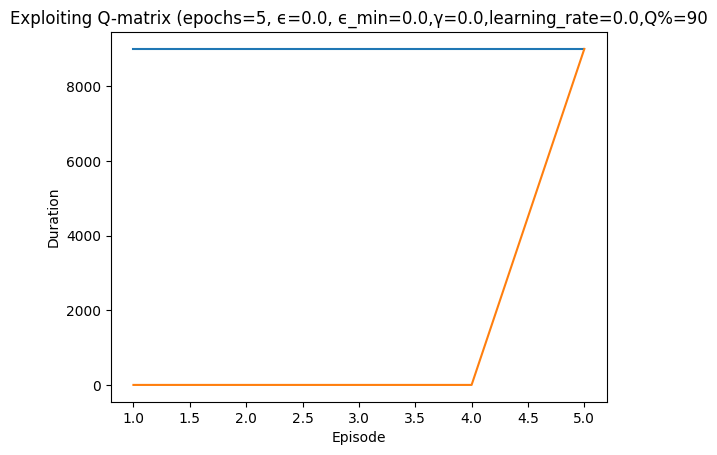

In [9]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, trained=tabularq_run["learner"], gamma=0.0, learning_rate=0.0, exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting Q-matrix",
)

In [10]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01,
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL",
)

###### DQL
Learning with: episode_count=50,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/50 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

/home/wblum/CyberBattleSim/cyberbattle/agents/baseline/agent_dql.py:382: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  state_batch = torch.tensor(states_to_consider).to(device)

Episode 1|Iteration 6|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 1|Iteration 6|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 1|Iteration 17|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 1|Iteration 17|reward:  116.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 1|Iteration 30|reward:  130.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 1|Iteration 30|reward:  130.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 1|Iteration 32|reward:  132.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 1|Iteration 32|reward:  132.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 1|Iteration 42|reward:  140.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 1|Iteration 42|reward:  140.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 1|Iteration 43|reward:  240.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 1|Iteration 43|reward:  240.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 1|Iteration 47|reward:  251.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 1|Iteration 47|reward:  251.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 1|Iteration 49|reward:  255.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 1|Iteration 49|reward:  255.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 1|Iteration 54|reward:  257.0|last_reward_at:   49|Elapsed Time: 0:00:00||


Episode 1|Iteration 54|reward:  257.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 1|Iteration 73|reward:  263.0|last_reward_at:   54|Elapsed Time: 0:00:00||


Episode 1|Iteration 73|reward:  263.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 1|Iteration 114|reward:  263.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 1|Iteration 139|reward:  272.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 1|Iteration 139|reward:  272.0|last_reward_at:  139|Elapsed Time: 0:00:00||


Episode 1|Iteration 143|reward:  278.0|last_reward_at:  139|Elapsed Time: 0:00:00||


Episode 1|Iteration 143|reward:  278.0|last_reward_at:  143|Elapsed Time: 0:00:00||


Episode 1|Iteration 203|reward:  278.0|last_reward_at:  143|Elapsed Time: 0:00:00||


Episode 1|Iteration 261|reward:  278.0|last_reward_at:  143|Elapsed Time: 0:00:00||


Episode 1|Iteration 270|reward:  378.0|last_reward_at:  143|Elapsed Time: 0:00:00||


Episode 1|Iteration 270|reward:  378.0|last_reward_at:  270|Elapsed Time: 0:00:00||


Episode 1|Iteration 296|reward:  389.0|last_reward_at:  270|Elapsed Time: 0:00:00||


Episode 1|Iteration 296|reward:  389.0|last_reward_at:  296|Elapsed Time: 0:00:00||


Episode 1|Iteration 323|reward:  395.0|last_reward_at:  296|Elapsed Time: 0:00:00||


Episode 1|Iteration 323|reward:  395.0|last_reward_at:  323|Elapsed Time: 0:00:00||


Episode 1|Iteration 327|reward:  403.0|last_reward_at:  323|Elapsed Time: 0:00:00||


Episode 1|Iteration 327|reward:  403.0|last_reward_at:  327|Elapsed Time: 0:00:00||


Episode 1|Iteration 361|reward:  403.0|last_reward_at:  327|Elapsed Time: 0:00:00||


Episode 1|Iteration 377|reward:  412.0|last_reward_at:  327|Elapsed Time: 0:00:00||


Episode 1|Iteration 377|reward:  412.0|last_reward_at:  377|Elapsed Time: 0:00:00||


Episode 1|Iteration 378|reward:  512.0|last_reward_at:  377|Elapsed Time: 0:00:00||


Episode 1|Iteration 378|reward:  512.0|last_reward_at:  378|Elapsed Time: 0:00:00||


Episode 1|Iteration 382|reward:  523.0|last_reward_at:  378|Elapsed Time: 0:00:00||


Episode 1|Iteration 382|reward:  523.0|last_reward_at:  382|Elapsed Time: 0:00:00||


Episode 1|Iteration 386|reward:  525.0|last_reward_at:  382|Elapsed Time: 0:00:00||


Episode 1|Iteration 386|reward:  525.0|last_reward_at:  386|Elapsed Time: 0:00:00||


Episode 1|Iteration 391|reward:  529.0|last_reward_at:  386|Elapsed Time: 0:00:00||


Episode 1|Iteration 391|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:00||


Episode 1|Iteration 402|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:00||


Episode 1|Iteration 405|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:01||


Episode 1|Iteration 408|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:01||


Episode 1|Iteration 411|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:01||


Episode 1|Iteration 413|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:01||


Episode 1|Iteration 417|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:01||


Episode 1|Iteration 419|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:01||


Episode 1|Iteration 422|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:01||


Episode 1|Iteration 425|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:01||


Episode 1|Iteration 429|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:01||


Episode 1|Iteration 432|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:02||


Episode 1|Iteration 436|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:02||


Episode 1|Iteration 440|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:02||


Episode 1|Iteration 443|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:02||


Episode 1|Iteration 447|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:02||


Episode 1|Iteration 451|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:02||


Episode 1|Iteration 455|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:02||


Episode 1|Iteration 459|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:03||


Episode 1|Iteration 463|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:03||


Episode 1|Iteration 466|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:03||


Episode 1|Iteration 469|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:03||


Episode 1|Iteration 473|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:03||


Episode 1|Iteration 476|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:03||


Episode 1|Iteration 479|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:03||


Episode 1|Iteration 483|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:03||


Episode 1|Iteration 485|reward:  529.0|last_reward_at:  391|Elapsed Time: 0:00:04||


Episode 1|Iteration 486|reward:  538.0|last_reward_at:  391|Elapsed Time: 0:00:04||


Episode 1|Iteration 486|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:04||


Episode 1|Iteration 489|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:04||


Episode 1|Iteration 492|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:04||


Episode 1|Iteration 495|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:04||


Episode 1|Iteration 498|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:04||


Episode 1|Iteration 501|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:04||


Episode 1|Iteration 504|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:04||


Episode 1|Iteration 508|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:04||


Episode 1|Iteration 511|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:05||


Episode 1|Iteration 514|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:05||


Episode 1|Iteration 517|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:05||


Episode 1|Iteration 520|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:05||


Episode 1|Iteration 523|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:05||


Episode 1|Iteration 527|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:05||


Episode 1|Iteration 531|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:05||


Episode 1|Iteration 535|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:05||


Episode 1|Iteration 538|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:06||


Episode 1|Iteration 541|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:06||


Episode 1|Iteration 543|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:06||


Episode 1|Iteration 545|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:06||


Episode 1|Iteration 548|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:06||


Episode 1|Iteration 551|reward:  538.0|last_reward_at:  486|Elapsed Time: 0:00:06||


Episode 1|Iteration 554|reward:  638.0|last_reward_at:  486|Elapsed Time: 0:00:06||


Episode 1|Iteration 554|reward:  638.0|last_reward_at:  554|Elapsed Time: 0:00:06||


Episode 1|Iteration 556|reward:  652.0|last_reward_at:  554|Elapsed Time: 0:00:06||


Episode 1|Iteration 556|reward:  652.0|last_reward_at:  556|Elapsed Time: 0:00:06||


Episode 1|Iteration 559|reward:  652.0|last_reward_at:  556|Elapsed Time: 0:00:06||


Episode 1|Iteration 562|reward:  660.0|last_reward_at:  556|Elapsed Time: 0:00:06||


Episode 1|Iteration 562|reward:  660.0|last_reward_at:  562|Elapsed Time: 0:00:06||


Episode 1|Iteration 565|reward:  660.0|last_reward_at:  562|Elapsed Time: 0:00:07||


Episode 1|Iteration 568|reward:  660.0|last_reward_at:  562|Elapsed Time: 0:00:07||


Episode 1|Iteration 571|reward:  660.0|last_reward_at:  562|Elapsed Time: 0:00:07||


Episode 1|Iteration 574|reward:  660.0|last_reward_at:  562|Elapsed Time: 0:00:07||


Episode 1|Iteration 577|reward:  660.0|last_reward_at:  562|Elapsed Time: 0:00:07||


Episode 1|Iteration 580|reward:  660.0|last_reward_at:  562|Elapsed Time: 0:00:07||


Episode 1|Iteration 583|reward:  660.0|last_reward_at:  562|Elapsed Time: 0:00:07||


Episode 1|Iteration 586|reward:  660.0|last_reward_at:  562|Elapsed Time: 0:00:07||


Episode 1|Iteration 589|reward:  660.0|last_reward_at:  562|Elapsed Time: 0:00:07||


Episode 1|Iteration 592|reward:  660.0|last_reward_at:  562|Elapsed Time: 0:00:08||


Episode 1|Iteration 595|reward:  660.0|last_reward_at:  562|Elapsed Time: 0:00:08||


Episode 1|Iteration 598|reward:  660.0|last_reward_at:  562|Elapsed Time: 0:00:08||


Episode 1|Iteration 601|reward:  660.0|last_reward_at:  562|Elapsed Time: 0:00:08||


Episode 1|Iteration 604|reward:  660.0|last_reward_at:  562|Elapsed Time: 0:00:08||


Episode 1|Iteration 606|reward:  666.0|last_reward_at:  562|Elapsed Time: 0:00:08||


Episode 1|Iteration 606|reward:  666.0|last_reward_at:  606|Elapsed Time: 0:00:08||


Episode 1|Iteration 610|reward:  666.0|last_reward_at:  606|Elapsed Time: 0:00:08||


Episode 1|Iteration 612|reward:  666.0|last_reward_at:  606|Elapsed Time: 0:00:08||


Episode 1|Iteration 615|reward:  666.0|last_reward_at:  606|Elapsed Time: 0:00:08||


Episode 1|Iteration 618|reward:  666.0|last_reward_at:  606|Elapsed Time: 0:00:08||


Episode 1|Iteration 621|reward:  666.0|last_reward_at:  606|Elapsed Time: 0:00:09||


Episode 1|Iteration 624|reward:  666.0|last_reward_at:  606|Elapsed Time: 0:00:09||


Episode 1|Iteration 626|reward:  672.0|last_reward_at:  606|Elapsed Time: 0:00:09||


Episode 1|Iteration 626|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:09||


Episode 1|Iteration 629|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:09||


Episode 1|Iteration 633|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:09||


Episode 1|Iteration 636|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:09||


Episode 1|Iteration 639|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:09||


Episode 1|Iteration 642|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:09||


Episode 1|Iteration 645|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:09||


Episode 1|Iteration 648|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:09||


Episode 1|Iteration 650|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:10||


Episode 1|Iteration 653|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:10||


Episode 1|Iteration 655|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:10||


Episode 1|Iteration 658|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:10||


Episode 1|Iteration 661|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:10||


Episode 1|Iteration 664|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:10||


Episode 1|Iteration 667|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:10||


Episode 1|Iteration 670|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:10||


Episode 1|Iteration 673|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:10||


Episode 1|Iteration 676|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:11||


Episode 1|Iteration 679|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:11||


Episode 1|Iteration 682|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:11||


Episode 1|Iteration 684|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:11||


Episode 1|Iteration 687|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:11||


Episode 1|Iteration 689|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:11||


Episode 1|Iteration 692|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:11||


Episode 1|Iteration 695|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:11||


Episode 1|Iteration 697|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:12||


Episode 1|Iteration 700|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:12||


Episode 1|Iteration 703|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:12||


Episode 1|Iteration 706|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:12||


Episode 1|Iteration 709|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:12||


Episode 1|Iteration 713|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:12||


Episode 1|Iteration 716|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:12||


Episode 1|Iteration 719|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:12||


Episode 1|Iteration 722|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:12||


Episode 1|Iteration 725|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:13||


Episode 1|Iteration 729|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:13||


Episode 1|Iteration 732|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:13||


Episode 1|Iteration 736|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:13||


Episode 1|Iteration 739|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:13||


Episode 1|Iteration 742|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:13||


Episode 1|Iteration 745|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:13||


Episode 1|Iteration 748|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:13||


Episode 1|Iteration 751|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:13||


Episode 1|Iteration 754|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:14||


Episode 1|Iteration 757|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:14||


Episode 1|Iteration 760|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:14||


Episode 1|Iteration 763|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:14||


Episode 1|Iteration 766|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:14||


Episode 1|Iteration 769|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:14||


Episode 1|Iteration 772|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:14||


Episode 1|Iteration 775|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:14||


Episode 1|Iteration 778|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:14||


Episode 1|Iteration 781|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:15||


Episode 1|Iteration 784|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:15||


Episode 1|Iteration 787|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:15||


Episode 1|Iteration 789|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:15||


Episode 1|Iteration 792|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:15||


Episode 1|Iteration 795|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:15||


Episode 1|Iteration 798|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:15||


Episode 1|Iteration 800|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:15||


Episode 1|Iteration 803|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:15||


Episode 1|Iteration 807|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:15||


Episode 1|Iteration 810|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:16||


Episode 1|Iteration 813|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:16||


Episode 1|Iteration 816|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:16||


Episode 1|Iteration 819|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:16||


Episode 1|Iteration 822|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:16||


Episode 1|Iteration 825|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:16||


Episode 1|Iteration 828|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:16||


Episode 1|Iteration 831|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:16||


Episode 1|Iteration 834|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:16||


Episode 1|Iteration 837|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:17||


Episode 1|Iteration 840|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:17||


Episode 1|Iteration 843|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:17||


Episode 1|Iteration 847|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:17||


Episode 1|Iteration 850|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:17||


Episode 1|Iteration 853|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:17||


Episode 1|Iteration 856|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:17||


Episode 1|Iteration 859|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:17||


Episode 1|Iteration 862|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:18||


Episode 1|Iteration 865|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:18||


Episode 1|Iteration 868|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:18||


Episode 1|Iteration 871|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:18||


Episode 1|Iteration 874|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:18||


Episode 1|Iteration 877|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:18||


Episode 1|Iteration 880|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:18||


Episode 1|Iteration 883|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:18||


Episode 1|Iteration 886|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:18||


Episode 1|Iteration 889|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:18||


Episode 1|Iteration 892|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:19||


Episode 1|Iteration 894|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:19||


Episode 1|Iteration 897|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:19||


Episode 1|Iteration 900|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:19||


Episode 1|Iteration 903|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:19||


Episode 1|Iteration 906|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:19||


Episode 1|Iteration 909|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:19||


Episode 1|Iteration 912|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:19||


Episode 1|Iteration 914|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:19||


Episode 1|Iteration 917|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:20||


Episode 1|Iteration 920|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:20||


Episode 1|Iteration 923|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:20||


Episode 1|Iteration 926|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:20||


Episode 1|Iteration 929|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:20||


Episode 1|Iteration 932|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:20||


Episode 1|Iteration 935|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:20||


Episode 1|Iteration 937|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:20||


Episode 1|Iteration 940|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:20||


Episode 1|Iteration 943|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:21||


Episode 1|Iteration 946|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:21||


Episode 1|Iteration 949|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:21||


Episode 1|Iteration 952|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:21||


Episode 1|Iteration 955|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:21||


Episode 1|Iteration 958|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:21||


Episode 1|Iteration 961|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:21||


Episode 1|Iteration 964|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:21||


Episode 1|Iteration 967|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:21||


Episode 1|Iteration 970|reward:  672.0|last_reward_at:  626|Elapsed Time: 0:00:22||


Episode 1|Iteration 973|reward:  772.0|last_reward_at:  626|Elapsed Time: 0:00:22||


Episode 1|Iteration 973|reward:  772.0|last_reward_at:  973|Elapsed Time: 0:00:22||


Episode 1|Iteration 976|reward:  783.0|last_reward_at:  973|Elapsed Time: 0:00:22||


Episode 1|Iteration 976|reward:  783.0|last_reward_at:  976|Elapsed Time: 0:00:22||


Episode 1|Iteration 979|reward:  783.0|last_reward_at:  976|Elapsed Time: 0:00:22||


Episode 1|Iteration 982|reward:  783.0|last_reward_at:  976|Elapsed Time: 0:00:22||


Episode 1|Iteration 985|reward:  783.0|last_reward_at:  976|Elapsed Time: 0:00:22||


Episode 1|Iteration 987|reward:  783.0|last_reward_at:  976|Elapsed Time: 0:00:22||


Episode 1|Iteration 990|reward:  792.0|last_reward_at:  976|Elapsed Time: 0:00:22||


Episode 1|Iteration 990|reward:  792.0|last_reward_at:  990|Elapsed Time: 0:00:22||


Episode 1|Iteration 993|reward:  792.0|last_reward_at:  990|Elapsed Time: 0:00:22||


Episode 1|Iteration 996|reward:  792.0|last_reward_at:  990|Elapsed Time: 0:00:23||


Episode 1|Iteration 998|reward:  792.0|last_reward_at:  990|Elapsed Time: 0:00:23||


Episode 1|Iteration 1001|reward:  792.0|last_reward_at:  990|Elapsed Time: 0:00:23||


Episode 1|Iteration 1004|reward:  792.0|last_reward_at:  990|Elapsed Time: 0:00:23||


Episode 1|Iteration 1007|reward:  792.0|last_reward_at:  990|Elapsed Time: 0:00:23||


Episode 1|Iteration 1009|reward:  792.0|last_reward_at:  990|Elapsed Time: 0:00:23||


Episode 1|Iteration 1012|reward:  792.0|last_reward_at:  990|Elapsed Time: 0:00:23||


Episode 1|Iteration 1014|reward:  892.0|last_reward_at:  990|Elapsed Time: 0:00:23||


Episode 1|Iteration 1014|reward:  892.0|last_reward_at: 1014|Elapsed Time: 0:00:23||


Episode 1|Iteration 1015|reward:  906.0|last_reward_at: 1014|Elapsed Time: 0:00:23||


Episode 1|Iteration 1015|reward:  906.0|last_reward_at: 1015|Elapsed Time: 0:00:23||


Episode 1|Iteration 1018|reward:  906.0|last_reward_at: 1015|Elapsed Time: 0:00:23||


Episode 1|Iteration 1021|reward:  906.0|last_reward_at: 1015|Elapsed Time: 0:00:24||


Episode 1|Iteration 1024|reward:  906.0|last_reward_at: 1015|Elapsed Time: 0:00:24||


Episode 1|Iteration 1027|reward:  906.0|last_reward_at: 1015|Elapsed Time: 0:00:24||


Episode 1|Iteration 1030|reward:  914.0|last_reward_at: 1015|Elapsed Time: 0:00:24||


Episode 1|Iteration 1030|reward:  914.0|last_reward_at: 1030|Elapsed Time: 0:00:24||


Episode 1|Iteration 1033|reward:  914.0|last_reward_at: 1030|Elapsed Time: 0:00:24||


Episode 1|Iteration 1036|reward:  914.0|last_reward_at: 1030|Elapsed Time: 0:00:24||


Episode 1|Iteration 1039|reward:  914.0|last_reward_at: 1030|Elapsed Time: 0:00:24||


Episode 1|Iteration 1042|reward:  914.0|last_reward_at: 1030|Elapsed Time: 0:00:24||


Episode 1|Iteration 1045|reward:  914.0|last_reward_at: 1030|Elapsed Time: 0:00:24||


Episode 1|Iteration 1046|reward:  916.0|last_reward_at: 1030|Elapsed Time: 0:00:25||


Episode 1|Iteration 1046|reward:  916.0|last_reward_at: 1046|Elapsed Time: 0:00:25||


Episode 1|Iteration 1049|reward:  916.0|last_reward_at: 1046|Elapsed Time: 0:00:25||


Episode 1|Iteration 1052|reward:  916.0|last_reward_at: 1046|Elapsed Time: 0:00:25||


Episode 1|Iteration 1054|reward:  916.0|last_reward_at: 1046|Elapsed Time: 0:00:25||


Episode 1|Iteration 1057|reward:  916.0|last_reward_at: 1046|Elapsed Time: 0:00:25||


Episode 1|Iteration 1060|reward:  916.0|last_reward_at: 1046|Elapsed Time: 0:00:25||


Episode 1|Iteration 1063|reward:  916.0|last_reward_at: 1046|Elapsed Time: 0:00:25||


Episode 1|Iteration 1065|reward:  916.0|last_reward_at: 1046|Elapsed Time: 0:00:25||


Episode 1|Iteration 1067|reward:  916.0|last_reward_at: 1046|Elapsed Time: 0:00:25||


Episode 1|Iteration 1070|reward:  916.0|last_reward_at: 1046|Elapsed Time: 0:00:26||


Episode 1|Iteration 1073|reward:  916.0|last_reward_at: 1046|Elapsed Time: 0:00:26||


Episode 1|Iteration 1076|reward:  916.0|last_reward_at: 1046|Elapsed Time: 0:00:26||


Episode 1|Iteration 1079|reward:  916.0|last_reward_at: 1046|Elapsed Time: 0:00:26||


Episode 1|Iteration 1080|reward:  922.0|last_reward_at: 1046|Elapsed Time: 0:00:26||


Episode 1|Iteration 1080|reward:  922.0|last_reward_at: 1080|Elapsed Time: 0:00:26||


Episode 1|Iteration 1083|reward:  922.0|last_reward_at: 1080|Elapsed Time: 0:00:26||


Episode 1|Iteration 1086|reward:  922.0|last_reward_at: 1080|Elapsed Time: 0:00:26||


Episode 1|Iteration 1089|reward:  922.0|last_reward_at: 1080|Elapsed Time: 0:00:26||


Episode 1|Iteration 1092|reward:  922.0|last_reward_at: 1080|Elapsed Time: 0:00:26||


Episode 1|Iteration 1094|reward:  924.0|last_reward_at: 1080|Elapsed Time: 0:00:26||


Episode 1|Iteration 1094|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:26||


Episode 1|Iteration 1097|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:27||


Episode 1|Iteration 1100|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:27||


Episode 1|Iteration 1103|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:27||


Episode 1|Iteration 1106|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:27||


Episode 1|Iteration 1109|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:27||


Episode 1|Iteration 1112|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:27||


Episode 1|Iteration 1115|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:27||


Episode 1|Iteration 1118|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:27||


Episode 1|Iteration 1121|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:27||


Episode 1|Iteration 1124|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:27||


Episode 1|Iteration 1127|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:28||


Episode 1|Iteration 1130|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:28||


Episode 1|Iteration 1133|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:28||


Episode 1|Iteration 1136|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:28||


Episode 1|Iteration 1139|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:28||


Episode 1|Iteration 1142|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:28||


Episode 1|Iteration 1145|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:28||


Episode 1|Iteration 1148|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:28||


Episode 1|Iteration 1151|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:28||


Episode 1|Iteration 1154|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:29||


Episode 1|Iteration 1157|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:29||


Episode 1|Iteration 1160|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:29||


Episode 1|Iteration 1163|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:29||


Episode 1|Iteration 1166|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:29||


Episode 1|Iteration 1169|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:29||


Episode 1|Iteration 1172|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:29||


Episode 1|Iteration 1175|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:29||


Episode 1|Iteration 1178|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:29||


Episode 1|Iteration 1181|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:30||


Episode 1|Iteration 1184|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:30||


Episode 1|Iteration 1187|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:30||


Episode 1|Iteration 1190|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:30||


Episode 1|Iteration 1193|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:30||


Episode 1|Iteration 1196|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:30||


Episode 1|Iteration 1199|reward:  924.0|last_reward_at: 1094|Elapsed Time: 0:00:30||


Episode 1|Iteration 1201|reward:  930.0|last_reward_at: 1094|Elapsed Time: 0:00:30||


Episode 1|Iteration 1201|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:30||


Episode 1|Iteration 1204|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:30||


Episode 1|Iteration 1207|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:31||


Episode 1|Iteration 1210|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:31||


Episode 1|Iteration 1213|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:31||


Episode 1|Iteration 1216|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:31||


Episode 1|Iteration 1219|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:31||


Episode 1|Iteration 1222|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:31||


Episode 1|Iteration 1225|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:31||


Episode 1|Iteration 1228|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:31||


Episode 1|Iteration 1231|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:31||


Episode 1|Iteration 1234|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:31||


Episode 1|Iteration 1237|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:32||


Episode 1|Iteration 1240|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:32||


Episode 1|Iteration 1243|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:32||


Episode 1|Iteration 1246|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:32||


Episode 1|Iteration 1249|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:32||


Episode 1|Iteration 1251|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:32||


Episode 1|Iteration 1254|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:32||


Episode 1|Iteration 1256|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:32||


Episode 1|Iteration 1259|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:33||


Episode 1|Iteration 1262|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:33||


Episode 1|Iteration 1265|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:33||


Episode 1|Iteration 1268|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:33||


Episode 1|Iteration 1271|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:33||


Episode 1|Iteration 1273|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:33||


Episode 1|Iteration 1276|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:33||


Episode 1|Iteration 1279|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:33||


Episode 1|Iteration 1282|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:34||


Episode 1|Iteration 1285|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:34||


Episode 1|Iteration 1288|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:34||


Episode 1|Iteration 1291|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:34||


Episode 1|Iteration 1294|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:34||


Episode 1|Iteration 1297|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:34||


Episode 1|Iteration 1300|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:34||


Episode 1|Iteration 1303|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:34||


Episode 1|Iteration 1306|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:34||


Episode 1|Iteration 1309|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:35||


Episode 1|Iteration 1312|reward:  930.0|last_reward_at: 1201|Elapsed Time: 0:00:35||


Episode 1|Iteration 1313|reward: 1030.0|last_reward_at: 1201|Elapsed Time: 0:00:35||


Episode 1|Iteration 1313|reward: 1030.0|last_reward_at: 1313|Elapsed Time: 0:00:35||


Episode 1|Iteration 1315|reward: 1041.0|last_reward_at: 1313|Elapsed Time: 0:00:35||


Episode 1|Iteration 1315|reward: 1041.0|last_reward_at: 1315|Elapsed Time: 0:00:35||


Episode 1|Iteration 1318|reward: 1041.0|last_reward_at: 1315|Elapsed Time: 0:00:35||


Episode 1|Iteration 1321|reward: 1041.0|last_reward_at: 1315|Elapsed Time: 0:00:35||


Episode 1|Iteration 1324|reward: 1041.0|last_reward_at: 1315|Elapsed Time: 0:00:35||


Episode 1|Iteration 1327|reward: 1041.0|last_reward_at: 1315|Elapsed Time: 0:00:35||


Episode 1|Iteration 1330|reward: 1041.0|last_reward_at: 1315|Elapsed Time: 0:00:35||


Episode 1|Iteration 1333|reward: 1041.0|last_reward_at: 1315|Elapsed Time: 0:00:35||


Episode 1|Iteration 1336|reward: 1041.0|last_reward_at: 1315|Elapsed Time: 0:00:36||


Episode 1|Iteration 1339|reward: 1041.0|last_reward_at: 1315|Elapsed Time: 0:00:36||


Episode 1|Iteration 1340|reward: 1041.0|last_reward_at: 1315|Elapsed Time: 0:00:36||


Episode 1|Iteration 1343|reward: 1041.0|last_reward_at: 1315|Elapsed Time: 0:00:36||


Episode 1|Iteration 1345|reward: 1041.0|last_reward_at: 1315|Elapsed Time: 0:00:36||


Episode 1|Iteration 1348|reward: 1045.0|last_reward_at: 1315|Elapsed Time: 0:00:37||


Episode 1|Iteration 1348|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:37||


Episode 1|Iteration 1351|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:37||


Episode 1|Iteration 1354|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:37||


Episode 1|Iteration 1356|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:37||


Episode 1|Iteration 1359|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:37||


Episode 1|Iteration 1362|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:37||


Episode 1|Iteration 1365|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:37||


Episode 1|Iteration 1368|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:37||


Episode 1|Iteration 1370|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:38||


Episode 1|Iteration 1373|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:38||


Episode 1|Iteration 1376|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:38||


Episode 1|Iteration 1379|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:38||


Episode 1|Iteration 1382|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:38||


Episode 1|Iteration 1385|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:38||


Episode 1|Iteration 1388|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:38||


Episode 1|Iteration 1391|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:38||


Episode 1|Iteration 1393|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:38||


Episode 1|Iteration 1396|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:39||


Episode 1|Iteration 1399|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:39||


Episode 1|Iteration 1402|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:39||


Episode 1|Iteration 1403|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:39||


Episode 1|Iteration 1406|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:39||


Episode 1|Iteration 1408|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:39||


Episode 1|Iteration 1410|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:40||


Episode 1|Iteration 1413|reward: 1045.0|last_reward_at: 1348|Elapsed Time: 0:00:40||


Episode 1|Iteration 1414|reward: 1047.0|last_reward_at: 1348|Elapsed Time: 0:00:40||


Episode 1|Iteration 1414|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:40||


Episode 1|Iteration 1417|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:40||


Episode 1|Iteration 1418|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:40||


Episode 1|Iteration 1421|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:40||


Episode 1|Iteration 1424|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:40||


Episode 1|Iteration 1427|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:41||


Episode 1|Iteration 1430|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:41||


Episode 1|Iteration 1433|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:41||


Episode 1|Iteration 1436|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:41||


Episode 1|Iteration 1439|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:41||


Episode 1|Iteration 1442|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:41||


Episode 1|Iteration 1445|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:41||


Episode 1|Iteration 1448|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:41||


Episode 1|Iteration 1451|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:41||


Episode 1|Iteration 1454|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:42||


Episode 1|Iteration 1457|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:42||


Episode 1|Iteration 1460|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:42||


Episode 1|Iteration 1463|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:42||


Episode 1|Iteration 1466|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:42||


Episode 1|Iteration 1469|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:42||


Episode 1|Iteration 1472|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:42||


Episode 1|Iteration 1475|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:43||


Episode 1|Iteration 1478|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:43||


Episode 1|Iteration 1481|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:43||


Episode 1|Iteration 1484|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:43||


Episode 1|Iteration 1487|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:43||


Episode 1|Iteration 1490|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:43||


Episode 1|Iteration 1493|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:43||


Episode 1|Iteration 1494|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:44||


Episode 1|Iteration 1497|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:44||


Episode 1|Iteration 1500|reward: 1047.0|last_reward_at: 1414|Elapsed Time: 0:00:44||


Episode 1|Iteration 1503|reward: 1056.0|last_reward_at: 1414|Elapsed Time: 0:00:44||


Episode 1|Iteration 1503|reward: 1056.0|last_reward_at: 1503|Elapsed Time: 0:00:44||


Episode 1|Iteration 1506|reward: 1056.0|last_reward_at: 1503|Elapsed Time: 0:00:44||


Episode 1|Iteration 1509|reward: 1056.0|last_reward_at: 1503|Elapsed Time: 0:00:44||


Episode 1|Iteration 1512|reward: 1056.0|last_reward_at: 1503|Elapsed Time: 0:00:44||


Episode 1|Iteration 1515|reward: 1056.0|last_reward_at: 1503|Elapsed Time: 0:00:44||


Episode 1|Iteration 1518|reward: 1056.0|last_reward_at: 1503|Elapsed Time: 0:00:44||


Episode 1|Iteration 1521|reward: 1056.0|last_reward_at: 1503|Elapsed Time: 0:00:44||


Episode 1|Iteration 1524|reward: 1056.0|last_reward_at: 1503|Elapsed Time: 0:00:45||


Episode 1|Iteration 1527|reward: 1056.0|last_reward_at: 1503|Elapsed Time: 0:00:45||


Episode 1|Iteration 1530|reward: 1056.0|last_reward_at: 1503|Elapsed Time: 0:00:45||


Episode 1|Iteration 1533|reward: 1056.0|last_reward_at: 1503|Elapsed Time: 0:00:45||


Episode 1|Iteration 1536|reward: 1056.0|last_reward_at: 1503|Elapsed Time: 0:00:45||


Episode 1|Iteration 1539|reward: 1056.0|last_reward_at: 1503|Elapsed Time: 0:00:45||


Episode 1|Iteration 1542|reward: 1056.0|last_reward_at: 1503|Elapsed Time: 0:00:45||


Episode 1|Iteration 1545|reward: 1056.0|last_reward_at: 1503|Elapsed Time: 0:00:45||


Episode 1|Iteration 1548|reward: 1056.0|last_reward_at: 1503|Elapsed Time: 0:00:45||


Episode 1|Iteration 1551|reward: 1156.0|last_reward_at: 1503|Elapsed Time: 0:00:46||


Episode 1|Iteration 1551|reward: 1156.0|last_reward_at: 1551|Elapsed Time: 0:00:46||


Episode 1|Iteration 1554|reward: 1170.0|last_reward_at: 1551|Elapsed Time: 0:00:46||


Episode 1|Iteration 1554|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:46||


Episode 1|Iteration 1557|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:46||


Episode 1|Iteration 1560|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:46||


Episode 1|Iteration 1563|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:46||


Episode 1|Iteration 1566|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:46||


Episode 1|Iteration 1569|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:46||


Episode 1|Iteration 1572|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:46||


Episode 1|Iteration 1575|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:46||


Episode 1|Iteration 1578|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:47||


Episode 1|Iteration 1581|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:47||


Episode 1|Iteration 1584|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:47||


Episode 1|Iteration 1587|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:47||


Episode 1|Iteration 1590|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:47||


Episode 1|Iteration 1593|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:47||


Episode 1|Iteration 1596|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:47||


Episode 1|Iteration 1599|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:47||


Episode 1|Iteration 1602|reward: 1170.0|last_reward_at: 1554|Elapsed Time: 0:00:47||


Episode 1|Iteration 1605|reward: 1270.0|last_reward_at: 1554|Elapsed Time: 0:00:48||


Episode 1|Iteration 1605|reward: 1270.0|last_reward_at: 1605|Elapsed Time: 0:00:48||


Episode 1|Iteration 1608|reward: 1270.0|last_reward_at: 1605|Elapsed Time: 0:00:48||


Episode 1|Iteration 1610|reward: 1281.0|last_reward_at: 1605|Elapsed Time: 0:00:48||


Episode 1|Iteration 1610|reward: 1281.0|last_reward_at: 1610|Elapsed Time: 0:00:48||


Episode 1|Iteration 1613|reward: 1281.0|last_reward_at: 1610|Elapsed Time: 0:00:48||


Episode 1|Iteration 1616|reward: 1281.0|last_reward_at: 1610|Elapsed Time: 0:00:48||


Episode 1|Iteration 1617|reward: 1281.0|last_reward_at: 1610|Elapsed Time: 0:00:48||


Episode 1|Iteration 1620|reward: 1281.0|last_reward_at: 1610|Elapsed Time: 0:00:48||


Episode 1|Iteration 1621|reward: 1281.0|last_reward_at: 1610|Elapsed Time: 0:00:49||


Episode 1|Iteration 1622|reward: 1281.0|last_reward_at: 1610|Elapsed Time: 0:00:49||


Episode 1|Iteration 1625|reward: 1281.0|last_reward_at: 1610|Elapsed Time: 0:00:50||


Episode 1|Iteration 1626|reward: 1290.0|last_reward_at: 1610|Elapsed Time: 0:00:50||


Episode 1|Iteration 1626|reward: 1290.0|last_reward_at: 1626|Elapsed Time: 0:00:50||


Episode 1|Iteration 1627|reward: 6290.0|last_reward_at: 1626|Elapsed Time: 0:00:50||


Episode 1|Iteration 1627|reward: 6290.0|last_reward_at: 1627|Elapsed Time: 0:00:50||

  Episode 1 ended at t=1627 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/351 (0.03)
    explore-remote: 18/453 (0.04)
    explore-connect: 3/486 (0.01)
    exploit-local: 8/108 (0.07)
    exploit-remote: 0/93 (0.00)
    exploit-connect: 8/87 (0.08)
  exploit deflected to exploration: 40
  ## Episode: 2/50 'DQL' ϵ=0.6779, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 2|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 2|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 2|Iteration 5|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 2|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 2|Iteration 9|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 2|Iteration 13|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 2|Iteration 13|reward:  132.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 2|Iteration 16|reward:  138.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 2|Iteration 16|reward:  138.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 2|Iteration 18|reward:  144.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 2|Iteration 18|reward:  144.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 2|Iteration 22|reward:  144.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 2|Iteration 25|reward:  152.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 2|Iteration 25|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 2|Iteration 27|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 2|Iteration 30|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 2|Iteration 33|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 2|Iteration 37|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 2|Iteration 40|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 2|Iteration 44|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 2|Iteration 48|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 2|Iteration 52|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 2|Iteration 55|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 2|Iteration 59|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 2|Iteration 63|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 2|Iteration 67|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 2|Iteration 71|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 2|Iteration 75|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 2|Iteration 79|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 2|Iteration 83|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 2|Iteration 87|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:03||


Episode 2|Iteration 91|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:03||


Episode 2|Iteration 95|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:03||


Episode 2|Iteration 99|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:03||


Episode 2|Iteration 101|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:03||


Episode 2|Iteration 105|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:03||


Episode 2|Iteration 109|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:03||


Episode 2|Iteration 113|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:04||


Episode 2|Iteration 114|reward:  252.0|last_reward_at:   25|Elapsed Time: 0:00:04||


Episode 2|Iteration 114|reward:  252.0|last_reward_at:  114|Elapsed Time: 0:00:04||


Episode 2|Iteration 115|reward:  263.0|last_reward_at:  114|Elapsed Time: 0:00:04||


Episode 2|Iteration 115|reward:  263.0|last_reward_at:  115|Elapsed Time: 0:00:04||


Episode 2|Iteration 117|reward:  267.0|last_reward_at:  115|Elapsed Time: 0:00:04||


Episode 2|Iteration 117|reward:  267.0|last_reward_at:  117|Elapsed Time: 0:00:04||


Episode 2|Iteration 118|reward:  276.0|last_reward_at:  117|Elapsed Time: 0:00:04||


Episode 2|Iteration 118|reward:  276.0|last_reward_at:  118|Elapsed Time: 0:00:04||


Episode 2|Iteration 121|reward:  276.0|last_reward_at:  118|Elapsed Time: 0:00:04||


Episode 2|Iteration 125|reward:  276.0|last_reward_at:  118|Elapsed Time: 0:00:04||


Episode 2|Iteration 126|reward:  376.0|last_reward_at:  118|Elapsed Time: 0:00:04||


Episode 2|Iteration 126|reward:  376.0|last_reward_at:  126|Elapsed Time: 0:00:04||


Episode 2|Iteration 129|reward:  376.0|last_reward_at:  126|Elapsed Time: 0:00:04||


Episode 2|Iteration 132|reward:  376.0|last_reward_at:  126|Elapsed Time: 0:00:04||


Episode 2|Iteration 134|reward:  387.0|last_reward_at:  126|Elapsed Time: 0:00:04||


Episode 2|Iteration 134|reward:  387.0|last_reward_at:  134|Elapsed Time: 0:00:04||


Episode 2|Iteration 135|reward:  389.0|last_reward_at:  134|Elapsed Time: 0:00:04||


Episode 2|Iteration 135|reward:  389.0|last_reward_at:  135|Elapsed Time: 0:00:04||


Episode 2|Iteration 139|reward:  389.0|last_reward_at:  135|Elapsed Time: 0:00:04||


Episode 2|Iteration 140|reward:  389.0|last_reward_at:  135|Elapsed Time: 0:00:05||


Episode 2|Iteration 143|reward:  389.0|last_reward_at:  135|Elapsed Time: 0:00:05||


Episode 2|Iteration 146|reward:  389.0|last_reward_at:  135|Elapsed Time: 0:00:05||


Episode 2|Iteration 149|reward:  389.0|last_reward_at:  135|Elapsed Time: 0:00:05||


Episode 2|Iteration 153|reward:  389.0|last_reward_at:  135|Elapsed Time: 0:00:05||


Episode 2|Iteration 156|reward:  389.0|last_reward_at:  135|Elapsed Time: 0:00:05||


Episode 2|Iteration 159|reward:  389.0|last_reward_at:  135|Elapsed Time: 0:00:05||


Episode 2|Iteration 160|reward:  389.0|last_reward_at:  135|Elapsed Time: 0:00:05||


Episode 2|Iteration 163|reward:  389.0|last_reward_at:  135|Elapsed Time: 0:00:06||


Episode 2|Iteration 164|reward:  389.0|last_reward_at:  135|Elapsed Time: 0:00:06||


Episode 2|Iteration 167|reward:  397.0|last_reward_at:  135|Elapsed Time: 0:00:06||


Episode 2|Iteration 167|reward:  397.0|last_reward_at:  167|Elapsed Time: 0:00:06||


Episode 2|Iteration 170|reward:  397.0|last_reward_at:  167|Elapsed Time: 0:00:06||


Episode 2|Iteration 174|reward:  397.0|last_reward_at:  167|Elapsed Time: 0:00:06||


Episode 2|Iteration 178|reward:  397.0|last_reward_at:  167|Elapsed Time: 0:00:06||


Episode 2|Iteration 181|reward:  403.0|last_reward_at:  167|Elapsed Time: 0:00:06||


Episode 2|Iteration 181|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:06||


Episode 2|Iteration 184|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:06||


Episode 2|Iteration 187|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:06||


Episode 2|Iteration 188|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:07||


Episode 2|Iteration 190|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:07||


Episode 2|Iteration 193|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:07||


Episode 2|Iteration 196|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:07||


Episode 2|Iteration 199|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:07||


Episode 2|Iteration 203|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:07||


Episode 2|Iteration 207|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:07||


Episode 2|Iteration 210|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:07||


Episode 2|Iteration 214|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:08||


Episode 2|Iteration 217|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:08||


Episode 2|Iteration 221|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:08||


Episode 2|Iteration 225|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:08||


Episode 2|Iteration 228|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:08||


Episode 2|Iteration 229|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:08||


Episode 2|Iteration 233|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:08||


Episode 2|Iteration 236|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:08||


Episode 2|Iteration 238|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:09||


Episode 2|Iteration 241|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:09||


Episode 2|Iteration 245|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:09||


Episode 2|Iteration 249|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:09||


Episode 2|Iteration 252|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:09||


Episode 2|Iteration 255|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:09||


Episode 2|Iteration 258|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:09||


Episode 2|Iteration 260|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:09||


Episode 2|Iteration 263|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:10||


Episode 2|Iteration 266|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:10||


Episode 2|Iteration 270|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:10||


Episode 2|Iteration 273|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:10||


Episode 2|Iteration 277|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:10||


Episode 2|Iteration 280|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:10||


Episode 2|Iteration 283|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:10||


Episode 2|Iteration 285|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:10||


Episode 2|Iteration 288|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:11||


Episode 2|Iteration 292|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:11||


Episode 2|Iteration 295|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:11||


Episode 2|Iteration 297|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:11||


Episode 2|Iteration 301|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:11||


Episode 2|Iteration 304|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:11||


Episode 2|Iteration 305|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:11||


Episode 2|Iteration 307|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:11||


Episode 2|Iteration 311|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:12||


Episode 2|Iteration 313|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:12||


Episode 2|Iteration 316|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:12||


Episode 2|Iteration 319|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:12||


Episode 2|Iteration 323|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:12||


Episode 2|Iteration 326|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:12||


Episode 2|Iteration 328|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:12||


Episode 2|Iteration 331|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:13||


Episode 2|Iteration 335|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:13||


Episode 2|Iteration 336|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:13||


Episode 2|Iteration 339|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:13||


Episode 2|Iteration 342|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:13||


Episode 2|Iteration 344|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:13||


Episode 2|Iteration 348|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:13||


Episode 2|Iteration 351|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:13||


Episode 2|Iteration 355|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:13||


Episode 2|Iteration 359|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:14||


Episode 2|Iteration 361|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:14||


Episode 2|Iteration 363|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:14||


Episode 2|Iteration 366|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:14||


Episode 2|Iteration 370|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:14||


Episode 2|Iteration 373|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:14||


Episode 2|Iteration 377|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:14||


Episode 2|Iteration 379|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:15||


Episode 2|Iteration 381|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:15||


Episode 2|Iteration 382|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:15||


Episode 2|Iteration 386|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:15||


Episode 2|Iteration 389|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:15||


Episode 2|Iteration 391|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:15||


Episode 2|Iteration 394|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:15||


Episode 2|Iteration 395|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:16||


Episode 2|Iteration 396|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:16||


Episode 2|Iteration 399|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:16||


Episode 2|Iteration 402|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:16||


Episode 2|Iteration 405|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:16||


Episode 2|Iteration 409|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:16||


Episode 2|Iteration 413|reward:  403.0|last_reward_at:  181|Elapsed Time: 0:00:16||


Episode 2|Iteration 416|reward:  412.0|last_reward_at:  181|Elapsed Time: 0:00:16||


Episode 2|Iteration 416|reward:  412.0|last_reward_at:  416|Elapsed Time: 0:00:16||


Episode 2|Iteration 420|reward:  412.0|last_reward_at:  416|Elapsed Time: 0:00:17||


Episode 2|Iteration 422|reward:  512.0|last_reward_at:  416|Elapsed Time: 0:00:17||


Episode 2|Iteration 422|reward:  512.0|last_reward_at:  422|Elapsed Time: 0:00:17||


Episode 2|Iteration 423|reward:  523.0|last_reward_at:  422|Elapsed Time: 0:00:17||


Episode 2|Iteration 423|reward:  523.0|last_reward_at:  423|Elapsed Time: 0:00:17||


Episode 2|Iteration 426|reward:  523.0|last_reward_at:  423|Elapsed Time: 0:00:17||


Episode 2|Iteration 430|reward:  523.0|last_reward_at:  423|Elapsed Time: 0:00:17||


Episode 2|Iteration 433|reward:  523.0|last_reward_at:  423|Elapsed Time: 0:00:17||


Episode 2|Iteration 437|reward:  523.0|last_reward_at:  423|Elapsed Time: 0:00:17||


Episode 2|Iteration 438|reward:  523.0|last_reward_at:  423|Elapsed Time: 0:00:17||


Episode 2|Iteration 440|reward:  532.0|last_reward_at:  423|Elapsed Time: 0:00:17||


Episode 2|Iteration 440|reward:  532.0|last_reward_at:  440|Elapsed Time: 0:00:17||


Episode 2|Iteration 442|reward:  532.0|last_reward_at:  440|Elapsed Time: 0:00:18||


Episode 2|Iteration 444|reward:  532.0|last_reward_at:  440|Elapsed Time: 0:00:18||


Episode 2|Iteration 445|reward:  632.0|last_reward_at:  440|Elapsed Time: 0:00:18||


Episode 2|Iteration 445|reward:  632.0|last_reward_at:  445|Elapsed Time: 0:00:18||


Episode 2|Iteration 446|reward:  646.0|last_reward_at:  445|Elapsed Time: 0:00:18||


Episode 2|Iteration 446|reward:  646.0|last_reward_at:  446|Elapsed Time: 0:00:18||


Episode 2|Iteration 449|reward:  646.0|last_reward_at:  446|Elapsed Time: 0:00:18||


Episode 2|Iteration 452|reward:  646.0|last_reward_at:  446|Elapsed Time: 0:00:18||


Episode 2|Iteration 454|reward:  652.0|last_reward_at:  446|Elapsed Time: 0:00:18||


Episode 2|Iteration 454|reward:  652.0|last_reward_at:  454|Elapsed Time: 0:00:18||


Episode 2|Iteration 457|reward:  652.0|last_reward_at:  454|Elapsed Time: 0:00:18||


Episode 2|Iteration 459|reward:  654.0|last_reward_at:  454|Elapsed Time: 0:00:18||


Episode 2|Iteration 459|reward:  654.0|last_reward_at:  459|Elapsed Time: 0:00:18||


Episode 2|Iteration 461|reward:  754.0|last_reward_at:  459|Elapsed Time: 0:00:18||


Episode 2|Iteration 461|reward:  754.0|last_reward_at:  461|Elapsed Time: 0:00:18||


Episode 2|Iteration 462|reward:  765.0|last_reward_at:  461|Elapsed Time: 0:00:18||


Episode 2|Iteration 462|reward:  765.0|last_reward_at:  462|Elapsed Time: 0:00:18||


Episode 2|Iteration 465|reward:  765.0|last_reward_at:  462|Elapsed Time: 0:00:18||


Episode 2|Iteration 467|reward:  765.0|last_reward_at:  462|Elapsed Time: 0:00:19||


Episode 2|Iteration 470|reward:  765.0|last_reward_at:  462|Elapsed Time: 0:00:19||


Episode 2|Iteration 472|reward:  765.0|last_reward_at:  462|Elapsed Time: 0:00:19||


Episode 2|Iteration 475|reward:  765.0|last_reward_at:  462|Elapsed Time: 0:00:19||


Episode 2|Iteration 476|reward:  765.0|last_reward_at:  462|Elapsed Time: 0:00:19||


Episode 2|Iteration 479|reward:  765.0|last_reward_at:  462|Elapsed Time: 0:00:20||


Episode 2|Iteration 482|reward:  765.0|last_reward_at:  462|Elapsed Time: 0:00:20||


Episode 2|Iteration 483|reward:  774.0|last_reward_at:  462|Elapsed Time: 0:00:20||


Episode 2|Iteration 483|reward:  774.0|last_reward_at:  483|Elapsed Time: 0:00:20||


Episode 2|Iteration 484|reward:  776.0|last_reward_at:  483|Elapsed Time: 0:00:20||


Episode 2|Iteration 484|reward:  776.0|last_reward_at:  484|Elapsed Time: 0:00:20||


Episode 2|Iteration 487|reward:  776.0|last_reward_at:  484|Elapsed Time: 0:00:20||


Episode 2|Iteration 490|reward:  776.0|last_reward_at:  484|Elapsed Time: 0:00:20||


Episode 2|Iteration 493|reward:  776.0|last_reward_at:  484|Elapsed Time: 0:00:20||


Episode 2|Iteration 494|reward:  778.0|last_reward_at:  484|Elapsed Time: 0:00:20||


Episode 2|Iteration 494|reward:  778.0|last_reward_at:  494|Elapsed Time: 0:00:20||


Episode 2|Iteration 497|reward:  778.0|last_reward_at:  494|Elapsed Time: 0:00:20||


Episode 2|Iteration 500|reward:  778.0|last_reward_at:  494|Elapsed Time: 0:00:20||


Episode 2|Iteration 501|reward:  784.0|last_reward_at:  494|Elapsed Time: 0:00:20||


Episode 2|Iteration 501|reward:  784.0|last_reward_at:  501|Elapsed Time: 0:00:20||


Episode 2|Iteration 502|reward:  884.0|last_reward_at:  501|Elapsed Time: 0:00:21||


Episode 2|Iteration 502|reward:  884.0|last_reward_at:  502|Elapsed Time: 0:00:21||


Episode 2|Iteration 504|reward:  898.0|last_reward_at:  502|Elapsed Time: 0:00:21||


Episode 2|Iteration 504|reward:  898.0|last_reward_at:  504|Elapsed Time: 0:00:21||


Episode 2|Iteration 507|reward:  898.0|last_reward_at:  504|Elapsed Time: 0:00:21||


Episode 2|Iteration 510|reward:  898.0|last_reward_at:  504|Elapsed Time: 0:00:21||


Episode 2|Iteration 513|reward:  898.0|last_reward_at:  504|Elapsed Time: 0:00:21||


Episode 2|Iteration 516|reward:  898.0|last_reward_at:  504|Elapsed Time: 0:00:21||


Episode 2|Iteration 519|reward:  898.0|last_reward_at:  504|Elapsed Time: 0:00:21||


Episode 2|Iteration 522|reward:  898.0|last_reward_at:  504|Elapsed Time: 0:00:21||


Episode 2|Iteration 525|reward:  898.0|last_reward_at:  504|Elapsed Time: 0:00:21||


Episode 2|Iteration 526|reward:  998.0|last_reward_at:  504|Elapsed Time: 0:00:21||


Episode 2|Iteration 526|reward:  998.0|last_reward_at:  526|Elapsed Time: 0:00:21||


Episode 2|Iteration 527|reward: 1009.0|last_reward_at:  526|Elapsed Time: 0:00:21||


Episode 2|Iteration 527|reward: 1009.0|last_reward_at:  527|Elapsed Time: 0:00:21||


Episode 2|Iteration 529|reward: 1009.0|last_reward_at:  527|Elapsed Time: 0:00:22||


Episode 2|Iteration 532|reward: 1015.0|last_reward_at:  527|Elapsed Time: 0:00:22||


Episode 2|Iteration 532|reward: 1015.0|last_reward_at:  532|Elapsed Time: 0:00:22||


Episode 2|Iteration 533|reward: 1017.0|last_reward_at:  532|Elapsed Time: 0:00:22||


Episode 2|Iteration 533|reward: 1017.0|last_reward_at:  533|Elapsed Time: 0:00:22||


Episode 2|Iteration 536|reward: 1017.0|last_reward_at:  533|Elapsed Time: 0:00:22||


Episode 2|Iteration 539|reward: 1017.0|last_reward_at:  533|Elapsed Time: 0:00:22||


Episode 2|Iteration 542|reward: 1017.0|last_reward_at:  533|Elapsed Time: 0:00:23||


Episode 2|Iteration 545|reward: 1017.0|last_reward_at:  533|Elapsed Time: 0:00:23||


Episode 2|Iteration 546|reward: 1017.0|last_reward_at:  533|Elapsed Time: 0:00:23||


Episode 2|Iteration 547|reward: 1017.0|last_reward_at:  533|Elapsed Time: 0:00:23||


Episode 2|Iteration 548|reward: 1026.0|last_reward_at:  533|Elapsed Time: 0:00:23||


Episode 2|Iteration 548|reward: 1026.0|last_reward_at:  548|Elapsed Time: 0:00:23||


Episode 2|Iteration 550|reward: 1026.0|last_reward_at:  548|Elapsed Time: 0:00:23||


Episode 2|Iteration 553|reward: 1026.0|last_reward_at:  548|Elapsed Time: 0:00:24||


Episode 2|Iteration 556|reward: 1026.0|last_reward_at:  548|Elapsed Time: 0:00:24||


Episode 2|Iteration 558|reward: 1030.0|last_reward_at:  548|Elapsed Time: 0:00:24||


Episode 2|Iteration 558|reward: 1030.0|last_reward_at:  558|Elapsed Time: 0:00:24||


Episode 2|Iteration 561|reward: 1030.0|last_reward_at:  558|Elapsed Time: 0:00:24||


Episode 2|Iteration 563|reward: 1030.0|last_reward_at:  558|Elapsed Time: 0:00:24||


Episode 2|Iteration 566|reward: 1030.0|last_reward_at:  558|Elapsed Time: 0:00:24||


Episode 2|Iteration 569|reward: 1030.0|last_reward_at:  558|Elapsed Time: 0:00:24||


Episode 2|Iteration 570|reward: 1036.0|last_reward_at:  558|Elapsed Time: 0:00:24||


Episode 2|Iteration 570|reward: 1036.0|last_reward_at:  570|Elapsed Time: 0:00:24||


Episode 2|Iteration 573|reward: 1036.0|last_reward_at:  570|Elapsed Time: 0:00:24||


Episode 2|Iteration 574|reward: 1036.0|last_reward_at:  570|Elapsed Time: 0:00:25||


Episode 2|Iteration 577|reward: 1036.0|last_reward_at:  570|Elapsed Time: 0:00:25||


Episode 2|Iteration 580|reward: 1036.0|last_reward_at:  570|Elapsed Time: 0:00:25||


Episode 2|Iteration 583|reward: 1036.0|last_reward_at:  570|Elapsed Time: 0:00:25||


Episode 2|Iteration 586|reward: 1136.0|last_reward_at:  570|Elapsed Time: 0:00:25||


Episode 2|Iteration 586|reward: 1136.0|last_reward_at:  586|Elapsed Time: 0:00:25||


Episode 2|Iteration 587|reward: 1150.0|last_reward_at:  586|Elapsed Time: 0:00:25||


Episode 2|Iteration 587|reward: 1150.0|last_reward_at:  587|Elapsed Time: 0:00:25||


Episode 2|Iteration 589|reward: 1150.0|last_reward_at:  587|Elapsed Time: 0:00:25||


Episode 2|Iteration 591|reward: 1150.0|last_reward_at:  587|Elapsed Time: 0:00:25||


Episode 2|Iteration 594|reward: 1150.0|last_reward_at:  587|Elapsed Time: 0:00:26||


Episode 2|Iteration 597|reward: 1150.0|last_reward_at:  587|Elapsed Time: 0:00:26||


Episode 2|Iteration 600|reward: 1150.0|last_reward_at:  587|Elapsed Time: 0:00:26||


Episode 2|Iteration 603|reward: 1150.0|last_reward_at:  587|Elapsed Time: 0:00:26||


Episode 2|Iteration 606|reward: 1150.0|last_reward_at:  587|Elapsed Time: 0:00:26||


Episode 2|Iteration 609|reward: 1150.0|last_reward_at:  587|Elapsed Time: 0:00:26||


Episode 2|Iteration 612|reward: 1150.0|last_reward_at:  587|Elapsed Time: 0:00:26||


Episode 2|Iteration 615|reward: 1156.0|last_reward_at:  587|Elapsed Time: 0:00:26||


Episode 2|Iteration 615|reward: 1156.0|last_reward_at:  615|Elapsed Time: 0:00:26||


Episode 2|Iteration 618|reward: 1156.0|last_reward_at:  615|Elapsed Time: 0:00:26||


Episode 2|Iteration 621|reward: 1156.0|last_reward_at:  615|Elapsed Time: 0:00:27||


Episode 2|Iteration 624|reward: 1156.0|last_reward_at:  615|Elapsed Time: 0:00:27||


Episode 2|Iteration 627|reward: 1156.0|last_reward_at:  615|Elapsed Time: 0:00:27||


Episode 2|Iteration 630|reward: 1156.0|last_reward_at:  615|Elapsed Time: 0:00:27||


Episode 2|Iteration 632|reward: 1162.0|last_reward_at:  615|Elapsed Time: 0:00:27||


Episode 2|Iteration 632|reward: 1162.0|last_reward_at:  632|Elapsed Time: 0:00:27||


Episode 2|Iteration 635|reward: 1162.0|last_reward_at:  632|Elapsed Time: 0:00:27||


Episode 2|Iteration 636|reward: 1164.0|last_reward_at:  632|Elapsed Time: 0:00:27||


Episode 2|Iteration 636|reward: 1164.0|last_reward_at:  636|Elapsed Time: 0:00:27||


Episode 2|Iteration 639|reward: 1164.0|last_reward_at:  636|Elapsed Time: 0:00:27||


Episode 2|Iteration 642|reward: 1164.0|last_reward_at:  636|Elapsed Time: 0:00:27||


Episode 2|Iteration 645|reward: 1164.0|last_reward_at:  636|Elapsed Time: 0:00:27||


Episode 2|Iteration 648|reward: 1164.0|last_reward_at:  636|Elapsed Time: 0:00:28||


Episode 2|Iteration 651|reward: 1164.0|last_reward_at:  636|Elapsed Time: 0:00:28||


Episode 2|Iteration 654|reward: 1164.0|last_reward_at:  636|Elapsed Time: 0:00:28||


Episode 2|Iteration 657|reward: 1164.0|last_reward_at:  636|Elapsed Time: 0:00:28||


Episode 2|Iteration 660|reward: 1264.0|last_reward_at:  636|Elapsed Time: 0:00:28||


Episode 2|Iteration 660|reward: 1264.0|last_reward_at:  660|Elapsed Time: 0:00:28||


Episode 2|Iteration 663|reward: 1264.0|last_reward_at:  660|Elapsed Time: 0:00:28||


Episode 2|Iteration 664|reward: 1275.0|last_reward_at:  660|Elapsed Time: 0:00:28||


Episode 2|Iteration 664|reward: 1275.0|last_reward_at:  664|Elapsed Time: 0:00:28||


Episode 2|Iteration 667|reward: 1275.0|last_reward_at:  664|Elapsed Time: 0:00:28||


Episode 2|Iteration 670|reward: 1275.0|last_reward_at:  664|Elapsed Time: 0:00:28||


Episode 2|Iteration 673|reward: 1275.0|last_reward_at:  664|Elapsed Time: 0:00:28||


Episode 2|Iteration 675|reward: 1275.0|last_reward_at:  664|Elapsed Time: 0:00:29||


Episode 2|Iteration 677|reward: 1275.0|last_reward_at:  664|Elapsed Time: 0:00:29||


Episode 2|Iteration 680|reward: 1275.0|last_reward_at:  664|Elapsed Time: 0:00:29||


Episode 2|Iteration 682|reward: 1275.0|last_reward_at:  664|Elapsed Time: 0:00:29||


Episode 2|Iteration 685|reward: 1275.0|last_reward_at:  664|Elapsed Time: 0:00:30||


Episode 2|Iteration 688|reward: 1275.0|last_reward_at:  664|Elapsed Time: 0:00:30||


Episode 2|Iteration 690|reward: 1281.0|last_reward_at:  664|Elapsed Time: 0:00:30||


Episode 2|Iteration 690|reward: 1281.0|last_reward_at:  690|Elapsed Time: 0:00:30||


Episode 2|Iteration 692|reward: 1281.0|last_reward_at:  690|Elapsed Time: 0:00:30||


Episode 2|Iteration 695|reward: 1281.0|last_reward_at:  690|Elapsed Time: 0:00:30||


Episode 2|Iteration 698|reward: 1281.0|last_reward_at:  690|Elapsed Time: 0:00:30||


Episode 2|Iteration 699|reward: 1287.0|last_reward_at:  690|Elapsed Time: 0:00:30||


Episode 2|Iteration 699|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:30||


Episode 2|Iteration 702|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:31||


Episode 2|Iteration 705|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:31||


Episode 2|Iteration 708|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:31||


Episode 2|Iteration 711|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:31||


Episode 2|Iteration 714|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:31||


Episode 2|Iteration 717|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:31||


Episode 2|Iteration 720|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:31||


Episode 2|Iteration 723|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:31||


Episode 2|Iteration 726|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:32||


Episode 2|Iteration 729|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:32||


Episode 2|Iteration 731|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:32||


Episode 2|Iteration 733|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:32||


Episode 2|Iteration 734|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:32||


Episode 2|Iteration 737|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:32||


Episode 2|Iteration 740|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:32||


Episode 2|Iteration 743|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:33||


Episode 2|Iteration 746|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:33||


Episode 2|Iteration 749|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:33||


Episode 2|Iteration 752|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:33||


Episode 2|Iteration 755|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:33||


Episode 2|Iteration 758|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:33||


Episode 2|Iteration 761|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:33||


Episode 2|Iteration 764|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:33||


Episode 2|Iteration 767|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:34||


Episode 2|Iteration 770|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:34||


Episode 2|Iteration 773|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:34||


Episode 2|Iteration 775|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:34||


Episode 2|Iteration 778|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:34||


Episode 2|Iteration 779|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:35||


Episode 2|Iteration 782|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:35||


Episode 2|Iteration 785|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:35||


Episode 2|Iteration 788|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:35||


Episode 2|Iteration 791|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:35||


Episode 2|Iteration 793|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:35||


Episode 2|Iteration 796|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:35||


Episode 2|Iteration 799|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:35||


Episode 2|Iteration 802|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:36||


Episode 2|Iteration 803|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:36||


Episode 2|Iteration 806|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:36||


Episode 2|Iteration 809|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:36||


Episode 2|Iteration 812|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:36||


Episode 2|Iteration 815|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:36||


Episode 2|Iteration 818|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:37||


Episode 2|Iteration 821|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:37||


Episode 2|Iteration 822|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:37||


Episode 2|Iteration 825|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:37||


Episode 2|Iteration 828|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:38||


Episode 2|Iteration 831|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:38||


Episode 2|Iteration 834|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:38||


Episode 2|Iteration 837|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:38||


Episode 2|Iteration 840|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:38||


Episode 2|Iteration 843|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:38||


Episode 2|Iteration 845|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:39||


Episode 2|Iteration 848|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:39||


Episode 2|Iteration 851|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:39||


Episode 2|Iteration 854|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:40||


Episode 2|Iteration 857|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:40||


Episode 2|Iteration 860|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:40||


Episode 2|Iteration 863|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:40||


Episode 2|Iteration 866|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:40||


Episode 2|Iteration 869|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:40||


Episode 2|Iteration 872|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:40||


Episode 2|Iteration 875|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:40||


Episode 2|Iteration 878|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:41||


Episode 2|Iteration 881|reward: 1287.0|last_reward_at:  699|Elapsed Time: 0:00:41||


Episode 2|Iteration 882|reward: 1296.0|last_reward_at:  699|Elapsed Time: 0:00:41||


Episode 2|Iteration 882|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:41||


Episode 2|Iteration 885|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:41||


Episode 2|Iteration 888|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:41||


Episode 2|Iteration 890|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:41||


Episode 2|Iteration 893|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:41||


Episode 2|Iteration 896|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:41||


Episode 2|Iteration 899|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:41||


Episode 2|Iteration 902|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:42||


Episode 2|Iteration 905|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:42||


Episode 2|Iteration 908|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:42||


Episode 2|Iteration 911|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:42||


Episode 2|Iteration 914|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:42||


Episode 2|Iteration 917|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:42||


Episode 2|Iteration 920|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:42||


Episode 2|Iteration 923|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:42||


Episode 2|Iteration 926|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:43||


Episode 2|Iteration 929|reward: 1296.0|last_reward_at:  882|Elapsed Time: 0:00:43||


Episode 2|Iteration 930|reward: 6296.0|last_reward_at:  882|Elapsed Time: 0:00:43||


Episode 2|Iteration 930|reward: 6296.0|last_reward_at:  930|Elapsed Time: 0:00:43||

  Episode 2 ended at t=930 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/179 (0.03)
    explore-remote: 13/180 (0.07)
    explore-connect: 1/222 (0.00)
    exploit-local: 16/112 (0.12)
    exploit-remote: 6/158 (0.04)
    exploit-connect: 10/28 (0.26)
  exploit deflected to exploration: 37
  ## Episode: 3/50 'DQL' ϵ=0.5798, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 3|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 3|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 3|Iteration 5|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 3|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 3|Iteration 9|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 3|Iteration 11|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 3|Iteration 11|reward:  136.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 3|Iteration 12|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 3|Iteration 12|reward:  138.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 3|Iteration 14|reward:  144.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 3|Iteration 14|reward:  144.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 3|Iteration 17|reward:  144.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 3|Iteration 19|reward:  152.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 3|Iteration 19|reward:  152.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 3|Iteration 23|reward:  152.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 3|Iteration 27|reward:  152.0|last_reward_at:   19|Elapsed Time: 0:00:01||


Episode 3|Iteration 30|reward:  152.0|last_reward_at:   19|Elapsed Time: 0:00:01||


Episode 3|Iteration 34|reward:  152.0|last_reward_at:   19|Elapsed Time: 0:00:01||


Episode 3|Iteration 38|reward:  252.0|last_reward_at:   19|Elapsed Time: 0:00:01||


Episode 3|Iteration 38|reward:  252.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 3|Iteration 42|reward:  252.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 3|Iteration 44|reward:  263.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 3|Iteration 44|reward:  263.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 3|Iteration 48|reward:  265.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 3|Iteration 48|reward:  265.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 3|Iteration 49|reward:  269.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 3|Iteration 49|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:01||


Episode 3|Iteration 53|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:01||


Episode 3|Iteration 55|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 3|Iteration 59|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 3|Iteration 62|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 3|Iteration 66|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 3|Iteration 69|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 3|Iteration 72|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 3|Iteration 76|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 3|Iteration 80|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 3|Iteration 84|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:03||


Episode 3|Iteration 85|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:03||


Episode 3|Iteration 89|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:03||


Episode 3|Iteration 93|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:03||


Episode 3|Iteration 97|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:03||


Episode 3|Iteration 100|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:03||


Episode 3|Iteration 104|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:03||


Episode 3|Iteration 108|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:03||


Episode 3|Iteration 111|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:04||


Episode 3|Iteration 114|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:04||


Episode 3|Iteration 116|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:04||


Episode 3|Iteration 120|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:04||


Episode 3|Iteration 124|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:04||


Episode 3|Iteration 127|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:04||


Episode 3|Iteration 130|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:04||


Episode 3|Iteration 133|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:04||


Episode 3|Iteration 136|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:04||


Episode 3|Iteration 140|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:05||


Episode 3|Iteration 144|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:05||


Episode 3|Iteration 148|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:05||


Episode 3|Iteration 152|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:05||


Episode 3|Iteration 156|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:05||


Episode 3|Iteration 159|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:05||


Episode 3|Iteration 162|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:05||


Episode 3|Iteration 165|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:05||


Episode 3|Iteration 168|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:05||


Episode 3|Iteration 171|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:06||


Episode 3|Iteration 174|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:06||


Episode 3|Iteration 177|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:06||


Episode 3|Iteration 180|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:06||


Episode 3|Iteration 183|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:06||


Episode 3|Iteration 186|reward:  269.0|last_reward_at:   49|Elapsed Time: 0:00:06||


Episode 3|Iteration 187|reward:  278.0|last_reward_at:   49|Elapsed Time: 0:00:06||


Episode 3|Iteration 187|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:06||


Episode 3|Iteration 191|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:06||


Episode 3|Iteration 194|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:06||


Episode 3|Iteration 197|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:07||


Episode 3|Iteration 201|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:07||


Episode 3|Iteration 205|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:07||


Episode 3|Iteration 209|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:07||


Episode 3|Iteration 213|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:07||


Episode 3|Iteration 217|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:07||


Episode 3|Iteration 221|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:07||


Episode 3|Iteration 224|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:07||


Episode 3|Iteration 227|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:07||


Episode 3|Iteration 230|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:08||


Episode 3|Iteration 233|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:08||


Episode 3|Iteration 236|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:08||


Episode 3|Iteration 240|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:08||


Episode 3|Iteration 243|reward:  278.0|last_reward_at:  187|Elapsed Time: 0:00:08||


Episode 3|Iteration 247|reward:  378.0|last_reward_at:  187|Elapsed Time: 0:00:08||


Episode 3|Iteration 247|reward:  378.0|last_reward_at:  247|Elapsed Time: 0:00:08||


Episode 3|Iteration 248|reward:  392.0|last_reward_at:  247|Elapsed Time: 0:00:08||


Episode 3|Iteration 248|reward:  392.0|last_reward_at:  248|Elapsed Time: 0:00:08||


Episode 3|Iteration 251|reward:  398.0|last_reward_at:  248|Elapsed Time: 0:00:08||


Episode 3|Iteration 251|reward:  398.0|last_reward_at:  251|Elapsed Time: 0:00:08||


Episode 3|Iteration 255|reward:  498.0|last_reward_at:  251|Elapsed Time: 0:00:09||


Episode 3|Iteration 255|reward:  498.0|last_reward_at:  255|Elapsed Time: 0:00:09||


Episode 3|Iteration 257|reward:  512.0|last_reward_at:  255|Elapsed Time: 0:00:09||


Episode 3|Iteration 257|reward:  512.0|last_reward_at:  257|Elapsed Time: 0:00:09||


Episode 3|Iteration 258|reward:  516.0|last_reward_at:  257|Elapsed Time: 0:00:09||


Episode 3|Iteration 258|reward:  516.0|last_reward_at:  258|Elapsed Time: 0:00:09||


Episode 3|Iteration 262|reward:  516.0|last_reward_at:  258|Elapsed Time: 0:00:09||


Episode 3|Iteration 265|reward:  516.0|last_reward_at:  258|Elapsed Time: 0:00:09||


Episode 3|Iteration 268|reward:  516.0|last_reward_at:  258|Elapsed Time: 0:00:09||


Episode 3|Iteration 271|reward:  516.0|last_reward_at:  258|Elapsed Time: 0:00:09||


Episode 3|Iteration 272|reward:  616.0|last_reward_at:  258|Elapsed Time: 0:00:09||


Episode 3|Iteration 272|reward:  616.0|last_reward_at:  272|Elapsed Time: 0:00:09||


Episode 3|Iteration 274|reward:  630.0|last_reward_at:  272|Elapsed Time: 0:00:09||


Episode 3|Iteration 274|reward:  630.0|last_reward_at:  274|Elapsed Time: 0:00:09||


Episode 3|Iteration 275|reward:  636.0|last_reward_at:  274|Elapsed Time: 0:00:09||


Episode 3|Iteration 275|reward:  636.0|last_reward_at:  275|Elapsed Time: 0:00:09||


Episode 3|Iteration 278|reward:  636.0|last_reward_at:  275|Elapsed Time: 0:00:09||


Episode 3|Iteration 281|reward:  636.0|last_reward_at:  275|Elapsed Time: 0:00:09||


Episode 3|Iteration 282|reward:  642.0|last_reward_at:  275|Elapsed Time: 0:00:10||


Episode 3|Iteration 282|reward:  642.0|last_reward_at:  282|Elapsed Time: 0:00:10||


Episode 3|Iteration 285|reward:  642.0|last_reward_at:  282|Elapsed Time: 0:00:10||


Episode 3|Iteration 288|reward:  642.0|last_reward_at:  282|Elapsed Time: 0:00:10||


Episode 3|Iteration 291|reward:  642.0|last_reward_at:  282|Elapsed Time: 0:00:10||


Episode 3|Iteration 294|reward:  642.0|last_reward_at:  282|Elapsed Time: 0:00:10||


Episode 3|Iteration 297|reward:  644.0|last_reward_at:  282|Elapsed Time: 0:00:10||


Episode 3|Iteration 297|reward:  644.0|last_reward_at:  297|Elapsed Time: 0:00:10||


Episode 3|Iteration 300|reward:  644.0|last_reward_at:  297|Elapsed Time: 0:00:10||


Episode 3|Iteration 302|reward:  644.0|last_reward_at:  297|Elapsed Time: 0:00:10||


Episode 3|Iteration 305|reward:  644.0|last_reward_at:  297|Elapsed Time: 0:00:10||


Episode 3|Iteration 308|reward:  644.0|last_reward_at:  297|Elapsed Time: 0:00:11||


Episode 3|Iteration 309|reward:  652.0|last_reward_at:  297|Elapsed Time: 0:00:11||


Episode 3|Iteration 309|reward:  652.0|last_reward_at:  309|Elapsed Time: 0:00:11||


Episode 3|Iteration 312|reward:  652.0|last_reward_at:  309|Elapsed Time: 0:00:11||


Episode 3|Iteration 315|reward:  652.0|last_reward_at:  309|Elapsed Time: 0:00:11||


Episode 3|Iteration 318|reward:  652.0|last_reward_at:  309|Elapsed Time: 0:00:11||


Episode 3|Iteration 321|reward:  652.0|last_reward_at:  309|Elapsed Time: 0:00:11||


Episode 3|Iteration 324|reward:  652.0|last_reward_at:  309|Elapsed Time: 0:00:11||


Episode 3|Iteration 328|reward:  652.0|last_reward_at:  309|Elapsed Time: 0:00:11||


Episode 3|Iteration 331|reward:  652.0|last_reward_at:  309|Elapsed Time: 0:00:11||


Episode 3|Iteration 334|reward:  652.0|last_reward_at:  309|Elapsed Time: 0:00:11||


Episode 3|Iteration 337|reward:  652.0|last_reward_at:  309|Elapsed Time: 0:00:12||


Episode 3|Iteration 339|reward:  658.0|last_reward_at:  309|Elapsed Time: 0:00:12||


Episode 3|Iteration 339|reward:  658.0|last_reward_at:  339|Elapsed Time: 0:00:12||


Episode 3|Iteration 342|reward:  658.0|last_reward_at:  339|Elapsed Time: 0:00:12||


Episode 3|Iteration 344|reward:  658.0|last_reward_at:  339|Elapsed Time: 0:00:12||


Episode 3|Iteration 347|reward:  664.0|last_reward_at:  339|Elapsed Time: 0:00:12||


Episode 3|Iteration 347|reward:  664.0|last_reward_at:  347|Elapsed Time: 0:00:12||


Episode 3|Iteration 350|reward:  664.0|last_reward_at:  347|Elapsed Time: 0:00:12||


Episode 3|Iteration 351|reward:  670.0|last_reward_at:  347|Elapsed Time: 0:00:12||


Episode 3|Iteration 351|reward:  670.0|last_reward_at:  351|Elapsed Time: 0:00:12||


Episode 3|Iteration 354|reward:  670.0|last_reward_at:  351|Elapsed Time: 0:00:12||


Episode 3|Iteration 356|reward:  670.0|last_reward_at:  351|Elapsed Time: 0:00:12||


Episode 3|Iteration 359|reward:  670.0|last_reward_at:  351|Elapsed Time: 0:00:12||


Episode 3|Iteration 362|reward:  670.0|last_reward_at:  351|Elapsed Time: 0:00:12||


Episode 3|Iteration 364|reward:  670.0|last_reward_at:  351|Elapsed Time: 0:00:13||


Episode 3|Iteration 367|reward:  670.0|last_reward_at:  351|Elapsed Time: 0:00:13||


Episode 3|Iteration 370|reward:  670.0|last_reward_at:  351|Elapsed Time: 0:00:13||


Episode 3|Iteration 372|reward:  770.0|last_reward_at:  351|Elapsed Time: 0:00:13||


Episode 3|Iteration 372|reward:  770.0|last_reward_at:  372|Elapsed Time: 0:00:13||


Episode 3|Iteration 373|reward:  784.0|last_reward_at:  372|Elapsed Time: 0:00:13||


Episode 3|Iteration 373|reward:  784.0|last_reward_at:  373|Elapsed Time: 0:00:13||


Episode 3|Iteration 376|reward:  784.0|last_reward_at:  373|Elapsed Time: 0:00:13||


Episode 3|Iteration 378|reward:  884.0|last_reward_at:  373|Elapsed Time: 0:00:13||


Episode 3|Iteration 378|reward:  884.0|last_reward_at:  378|Elapsed Time: 0:00:13||


Episode 3|Iteration 379|reward:  898.0|last_reward_at:  378|Elapsed Time: 0:00:13||


Episode 3|Iteration 379|reward:  898.0|last_reward_at:  379|Elapsed Time: 0:00:13||


Episode 3|Iteration 382|reward:  898.0|last_reward_at:  379|Elapsed Time: 0:00:13||


Episode 3|Iteration 385|reward:  898.0|last_reward_at:  379|Elapsed Time: 0:00:13||


Episode 3|Iteration 388|reward:  898.0|last_reward_at:  379|Elapsed Time: 0:00:13||


Episode 3|Iteration 391|reward:  904.0|last_reward_at:  379|Elapsed Time: 0:00:14||


Episode 3|Iteration 391|reward:  904.0|last_reward_at:  391|Elapsed Time: 0:00:14||


Episode 3|Iteration 394|reward:  904.0|last_reward_at:  391|Elapsed Time: 0:00:14||


Episode 3|Iteration 397|reward:  904.0|last_reward_at:  391|Elapsed Time: 0:00:14||


Episode 3|Iteration 399|reward:  912.0|last_reward_at:  391|Elapsed Time: 0:00:14||


Episode 3|Iteration 399|reward:  912.0|last_reward_at:  399|Elapsed Time: 0:00:14||


Episode 3|Iteration 402|reward:  912.0|last_reward_at:  399|Elapsed Time: 0:00:14||


Episode 3|Iteration 403|reward:  918.0|last_reward_at:  399|Elapsed Time: 0:00:14||


Episode 3|Iteration 403|reward:  918.0|last_reward_at:  403|Elapsed Time: 0:00:14||


Episode 3|Iteration 406|reward:  918.0|last_reward_at:  403|Elapsed Time: 0:00:14||


Episode 3|Iteration 409|reward:  918.0|last_reward_at:  403|Elapsed Time: 0:00:14||


Episode 3|Iteration 411|reward:  920.0|last_reward_at:  403|Elapsed Time: 0:00:14||


Episode 3|Iteration 411|reward:  920.0|last_reward_at:  411|Elapsed Time: 0:00:14||


Episode 3|Iteration 414|reward:  920.0|last_reward_at:  411|Elapsed Time: 0:00:14||


Episode 3|Iteration 417|reward:  920.0|last_reward_at:  411|Elapsed Time: 0:00:14||


Episode 3|Iteration 420|reward:  920.0|last_reward_at:  411|Elapsed Time: 0:00:15||


Episode 3|Iteration 423|reward:  920.0|last_reward_at:  411|Elapsed Time: 0:00:15||


Episode 3|Iteration 426|reward:  922.0|last_reward_at:  411|Elapsed Time: 0:00:15||


Episode 3|Iteration 426|reward:  922.0|last_reward_at:  426|Elapsed Time: 0:00:15||


Episode 3|Iteration 427|reward:  928.0|last_reward_at:  426|Elapsed Time: 0:00:15||


Episode 3|Iteration 427|reward:  928.0|last_reward_at:  427|Elapsed Time: 0:00:15||


Episode 3|Iteration 430|reward:  928.0|last_reward_at:  427|Elapsed Time: 0:00:15||


Episode 3|Iteration 433|reward:  928.0|last_reward_at:  427|Elapsed Time: 0:00:15||


Episode 3|Iteration 436|reward:  928.0|last_reward_at:  427|Elapsed Time: 0:00:15||


Episode 3|Iteration 439|reward:  928.0|last_reward_at:  427|Elapsed Time: 0:00:15||


Episode 3|Iteration 442|reward:  928.0|last_reward_at:  427|Elapsed Time: 0:00:15||


Episode 3|Iteration 445|reward:  928.0|last_reward_at:  427|Elapsed Time: 0:00:16||


Episode 3|Iteration 448|reward:  928.0|last_reward_at:  427|Elapsed Time: 0:00:16||


Episode 3|Iteration 450|reward: 1028.0|last_reward_at:  427|Elapsed Time: 0:00:16||


Episode 3|Iteration 450|reward: 1028.0|last_reward_at:  450|Elapsed Time: 0:00:16||


Episode 3|Iteration 452|reward: 1042.0|last_reward_at:  450|Elapsed Time: 0:00:16||


Episode 3|Iteration 452|reward: 1042.0|last_reward_at:  452|Elapsed Time: 0:00:16||


Episode 3|Iteration 455|reward: 1042.0|last_reward_at:  452|Elapsed Time: 0:00:16||


Episode 3|Iteration 457|reward: 1142.0|last_reward_at:  452|Elapsed Time: 0:00:16||


Episode 3|Iteration 457|reward: 1142.0|last_reward_at:  457|Elapsed Time: 0:00:16||


Episode 3|Iteration 458|reward: 1156.0|last_reward_at:  457|Elapsed Time: 0:00:16||


Episode 3|Iteration 458|reward: 1156.0|last_reward_at:  458|Elapsed Time: 0:00:16||


Episode 3|Iteration 460|reward: 1256.0|last_reward_at:  458|Elapsed Time: 0:00:16||


Episode 3|Iteration 460|reward: 1256.0|last_reward_at:  460|Elapsed Time: 0:00:16||


Episode 3|Iteration 463|reward: 1256.0|last_reward_at:  460|Elapsed Time: 0:00:16||


Episode 3|Iteration 465|reward: 1270.0|last_reward_at:  460|Elapsed Time: 0:00:16||


Episode 3|Iteration 465|reward: 1270.0|last_reward_at:  465|Elapsed Time: 0:00:16||


Episode 3|Iteration 468|reward: 1270.0|last_reward_at:  465|Elapsed Time: 0:00:16||


Episode 3|Iteration 471|reward: 1270.0|last_reward_at:  465|Elapsed Time: 0:00:17||


Episode 3|Iteration 474|reward: 1270.0|last_reward_at:  465|Elapsed Time: 0:00:17||


Episode 3|Iteration 476|reward: 6270.0|last_reward_at:  465|Elapsed Time: 0:00:17||


Episode 3|Iteration 476|reward: 6270.0|last_reward_at:  476|Elapsed Time: 0:00:17||

  Episode 3 ended at t=476 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/62 (0.07)
    explore-remote: 7/103 (0.06)
    explore-connect: 0/97 (0.00)
    exploit-local: 13/34 (0.28)
    exploit-remote: 9/121 (0.07)
    exploit-connect: 11/14 (0.44)
  exploit deflected to exploration: 4
  ## Episode: 4/50 'DQL' ϵ=0.5362, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 9|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 12|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 15|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 16|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 16|reward:   14.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 4|Iteration 18|reward:  114.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 4|Iteration 18|reward:  114.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 4|Iteration 19|reward:  116.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 4|Iteration 19|reward:  116.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 4|Iteration 20|reward:  130.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 4|Iteration 20|reward:  130.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 4|Iteration 22|reward:  230.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 4|Iteration 22|reward:  230.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 4|Iteration 24|reward:  232.0|last_reward_at:   22|Elapsed Time: 0:00:01||


Episode 4|Iteration 24|reward:  232.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 4|Iteration 25|reward:  238.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 4|Iteration 25|reward:  238.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 4|Iteration 26|reward:  252.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 4|Iteration 26|reward:  252.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 4|Iteration 29|reward:  254.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 4|Iteration 29|reward:  254.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 4|Iteration 32|reward:  254.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 4|Iteration 35|reward:  254.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 4|Iteration 38|reward:  254.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 4|Iteration 42|reward:  254.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 4|Iteration 46|reward:  254.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 4|Iteration 47|reward:  258.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 4|Iteration 47|reward:  258.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 4|Iteration 50|reward:  258.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 4|Iteration 53|reward:  258.0|last_reward_at:   47|Elapsed Time: 0:00:02||


Episode 4|Iteration 56|reward:  264.0|last_reward_at:   47|Elapsed Time: 0:00:02||


Episode 4|Iteration 56|reward:  264.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 4|Iteration 60|reward:  264.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 4|Iteration 62|reward:  270.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 4|Iteration 62|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 4|Iteration 65|reward:  370.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 4|Iteration 65|reward:  370.0|last_reward_at:   65|Elapsed Time: 0:00:02||


Episode 4|Iteration 66|reward:  384.0|last_reward_at:   65|Elapsed Time: 0:00:02||


Episode 4|Iteration 66|reward:  384.0|last_reward_at:   66|Elapsed Time: 0:00:02||


Episode 4|Iteration 68|reward:  484.0|last_reward_at:   66|Elapsed Time: 0:00:02||


Episode 4|Iteration 68|reward:  484.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 4|Iteration 70|reward:  498.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 4|Iteration 70|reward:  498.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 4|Iteration 73|reward:  498.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 4|Iteration 76|reward:  498.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 4|Iteration 79|reward:  498.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 4|Iteration 82|reward:  504.0|last_reward_at:   70|Elapsed Time: 0:00:03||


Episode 4|Iteration 82|reward:  504.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 4|Iteration 85|reward:  504.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 4|Iteration 87|reward:  510.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 4|Iteration 87|reward:  510.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 4|Iteration 88|reward:  610.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 4|Iteration 88|reward:  610.0|last_reward_at:   88|Elapsed Time: 0:00:03||


Episode 4|Iteration 89|reward:  624.0|last_reward_at:   88|Elapsed Time: 0:00:03||


Episode 4|Iteration 89|reward:  624.0|last_reward_at:   89|Elapsed Time: 0:00:03||


Episode 4|Iteration 92|reward:  624.0|last_reward_at:   89|Elapsed Time: 0:00:03||


Episode 4|Iteration 93|reward:  630.0|last_reward_at:   89|Elapsed Time: 0:00:03||


Episode 4|Iteration 93|reward:  630.0|last_reward_at:   93|Elapsed Time: 0:00:03||


Episode 4|Iteration 95|reward:  636.0|last_reward_at:   93|Elapsed Time: 0:00:03||


Episode 4|Iteration 95|reward:  636.0|last_reward_at:   95|Elapsed Time: 0:00:03||


Episode 4|Iteration 98|reward:  636.0|last_reward_at:   95|Elapsed Time: 0:00:03||


Episode 4|Iteration 101|reward:  638.0|last_reward_at:   95|Elapsed Time: 0:00:03||


Episode 4|Iteration 101|reward:  638.0|last_reward_at:  101|Elapsed Time: 0:00:03||


Episode 4|Iteration 104|reward:  738.0|last_reward_at:  101|Elapsed Time: 0:00:03||


Episode 4|Iteration 104|reward:  738.0|last_reward_at:  104|Elapsed Time: 0:00:03||


Episode 4|Iteration 105|reward:  752.0|last_reward_at:  104|Elapsed Time: 0:00:03||


Episode 4|Iteration 105|reward:  752.0|last_reward_at:  105|Elapsed Time: 0:00:03||


Episode 4|Iteration 106|reward:  758.0|last_reward_at:  105|Elapsed Time: 0:00:03||


Episode 4|Iteration 106|reward:  758.0|last_reward_at:  106|Elapsed Time: 0:00:03||


Episode 4|Iteration 108|reward:  760.0|last_reward_at:  106|Elapsed Time: 0:00:03||


Episode 4|Iteration 108|reward:  760.0|last_reward_at:  108|Elapsed Time: 0:00:03||


Episode 4|Iteration 109|reward:  860.0|last_reward_at:  108|Elapsed Time: 0:00:04||


Episode 4|Iteration 109|reward:  860.0|last_reward_at:  109|Elapsed Time: 0:00:04||


Episode 4|Iteration 110|reward:  874.0|last_reward_at:  109|Elapsed Time: 0:00:04||


Episode 4|Iteration 110|reward:  874.0|last_reward_at:  110|Elapsed Time: 0:00:04||


Episode 4|Iteration 111|reward:  880.0|last_reward_at:  110|Elapsed Time: 0:00:04||


Episode 4|Iteration 111|reward:  880.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 4|Iteration 112|reward:  888.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 4|Iteration 112|reward:  888.0|last_reward_at:  112|Elapsed Time: 0:00:04||


Episode 4|Iteration 115|reward:  888.0|last_reward_at:  112|Elapsed Time: 0:00:04||


Episode 4|Iteration 118|reward:  888.0|last_reward_at:  112|Elapsed Time: 0:00:04||


Episode 4|Iteration 121|reward:  890.0|last_reward_at:  112|Elapsed Time: 0:00:04||


Episode 4|Iteration 121|reward:  890.0|last_reward_at:  121|Elapsed Time: 0:00:04||


Episode 4|Iteration 123|reward:  990.0|last_reward_at:  121|Elapsed Time: 0:00:04||


Episode 4|Iteration 123|reward:  990.0|last_reward_at:  123|Elapsed Time: 0:00:04||


Episode 4|Iteration 126|reward: 1004.0|last_reward_at:  123|Elapsed Time: 0:00:04||


Episode 4|Iteration 126|reward: 1004.0|last_reward_at:  126|Elapsed Time: 0:00:04||


Episode 4|Iteration 129|reward: 1008.0|last_reward_at:  126|Elapsed Time: 0:00:04||


Episode 4|Iteration 129|reward: 1008.0|last_reward_at:  129|Elapsed Time: 0:00:04||


Episode 4|Iteration 132|reward: 1008.0|last_reward_at:  129|Elapsed Time: 0:00:04||


Episode 4|Iteration 134|reward: 1008.0|last_reward_at:  129|Elapsed Time: 0:00:04||


Episode 4|Iteration 137|reward: 1008.0|last_reward_at:  129|Elapsed Time: 0:00:05||


Episode 4|Iteration 140|reward: 1008.0|last_reward_at:  129|Elapsed Time: 0:00:05||


Episode 4|Iteration 142|reward: 1014.0|last_reward_at:  129|Elapsed Time: 0:00:05||


Episode 4|Iteration 142|reward: 1014.0|last_reward_at:  142|Elapsed Time: 0:00:05||


Episode 4|Iteration 145|reward: 1014.0|last_reward_at:  142|Elapsed Time: 0:00:05||


Episode 4|Iteration 148|reward: 1014.0|last_reward_at:  142|Elapsed Time: 0:00:05||


Episode 4|Iteration 151|reward: 1014.0|last_reward_at:  142|Elapsed Time: 0:00:05||


Episode 4|Iteration 154|reward: 1014.0|last_reward_at:  142|Elapsed Time: 0:00:05||


Episode 4|Iteration 157|reward: 1014.0|last_reward_at:  142|Elapsed Time: 0:00:05||


Episode 4|Iteration 160|reward: 1014.0|last_reward_at:  142|Elapsed Time: 0:00:05||


Episode 4|Iteration 163|reward: 1020.0|last_reward_at:  142|Elapsed Time: 0:00:06||


Episode 4|Iteration 163|reward: 1020.0|last_reward_at:  163|Elapsed Time: 0:00:06||


Episode 4|Iteration 166|reward: 1020.0|last_reward_at:  163|Elapsed Time: 0:00:06||


Episode 4|Iteration 169|reward: 1020.0|last_reward_at:  163|Elapsed Time: 0:00:06||


Episode 4|Iteration 171|reward: 1026.0|last_reward_at:  163|Elapsed Time: 0:00:06||


Episode 4|Iteration 171|reward: 1026.0|last_reward_at:  171|Elapsed Time: 0:00:06||


Episode 4|Iteration 174|reward: 1026.0|last_reward_at:  171|Elapsed Time: 0:00:06||


Episode 4|Iteration 177|reward: 1026.0|last_reward_at:  171|Elapsed Time: 0:00:06||


Episode 4|Iteration 180|reward: 1126.0|last_reward_at:  171|Elapsed Time: 0:00:06||


Episode 4|Iteration 180|reward: 1126.0|last_reward_at:  180|Elapsed Time: 0:00:06||


Episode 4|Iteration 181|reward: 1140.0|last_reward_at:  180|Elapsed Time: 0:00:06||


Episode 4|Iteration 181|reward: 1140.0|last_reward_at:  181|Elapsed Time: 0:00:06||


Episode 4|Iteration 182|reward: 1148.0|last_reward_at:  181|Elapsed Time: 0:00:06||


Episode 4|Iteration 182|reward: 1148.0|last_reward_at:  182|Elapsed Time: 0:00:06||


Episode 4|Iteration 184|reward: 1248.0|last_reward_at:  182|Elapsed Time: 0:00:06||


Episode 4|Iteration 184|reward: 1248.0|last_reward_at:  184|Elapsed Time: 0:00:06||


Episode 4|Iteration 186|reward: 1262.0|last_reward_at:  184|Elapsed Time: 0:00:06||


Episode 4|Iteration 186|reward: 1262.0|last_reward_at:  186|Elapsed Time: 0:00:06||


Episode 4|Iteration 188|reward: 1268.0|last_reward_at:  186|Elapsed Time: 0:00:06||


Episode 4|Iteration 188|reward: 1268.0|last_reward_at:  188|Elapsed Time: 0:00:06||


Episode 4|Iteration 189|reward: 6268.0|last_reward_at:  188|Elapsed Time: 0:00:07||


Episode 4|Iteration 189|reward: 6268.0|last_reward_at:  189|Elapsed Time: 0:00:07||

  Episode 4 ended at t=189 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/21 (0.19)
    explore-remote: 9/38 (0.19)
    explore-connect: 0/26 (0.00)
    exploit-local: 12/8 (0.60)
    exploit-remote: 8/33 (0.20)
    exploit-connect: 11/18 (0.38)
  exploit deflected to exploration: 7
  ## Episode: 5/50 'DQL' ϵ=0.5201, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 5|Iteration 7|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 5|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 9|reward:  125.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 9|reward:  125.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 5|Iteration 10|reward:  131.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 5|Iteration 10|reward:  131.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 5|Iteration 12|reward:  131.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 5|Iteration 14|reward:  133.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 5|Iteration 14|reward:  133.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 5|Iteration 17|reward:  133.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 5|Iteration 19|reward:  141.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 5|Iteration 19|reward:  141.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 5|Iteration 22|reward:  141.0|last_reward_at:   19|Elapsed Time: 0:00:01||


Episode 5|Iteration 24|reward:  141.0|last_reward_at:   19|Elapsed Time: 0:00:01||


Episode 5|Iteration 28|reward:  150.0|last_reward_at:   19|Elapsed Time: 0:00:01||


Episode 5|Iteration 28|reward:  150.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 5|Iteration 32|reward:  150.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 5|Iteration 36|reward:  150.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 5|Iteration 40|reward:  150.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 5|Iteration 44|reward:  150.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 5|Iteration 47|reward:  250.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 5|Iteration 47|reward:  250.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 5|Iteration 50|reward:  264.0|last_reward_at:   47|Elapsed Time: 0:00:02||


Episode 5|Iteration 50|reward:  264.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 5|Iteration 54|reward:  264.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 5|Iteration 58|reward:  264.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 5|Iteration 62|reward:  264.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 5|Iteration 66|reward:  264.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 5|Iteration 68|reward:  364.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 5|Iteration 68|reward:  364.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 5|Iteration 70|reward:  378.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 5|Iteration 70|reward:  378.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 5|Iteration 73|reward:  384.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 5|Iteration 73|reward:  384.0|last_reward_at:   73|Elapsed Time: 0:00:02||


Episode 5|Iteration 76|reward:  386.0|last_reward_at:   73|Elapsed Time: 0:00:02||


Episode 5|Iteration 76|reward:  386.0|last_reward_at:   76|Elapsed Time: 0:00:02||


Episode 5|Iteration 79|reward:  392.0|last_reward_at:   76|Elapsed Time: 0:00:03||


Episode 5|Iteration 79|reward:  392.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 5|Iteration 83|reward:  392.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 5|Iteration 87|reward:  392.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 5|Iteration 91|reward:  392.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 5|Iteration 94|reward:  392.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 5|Iteration 97|reward:  392.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 5|Iteration 101|reward:  392.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 5|Iteration 105|reward:  392.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 5|Iteration 109|reward:  392.0|last_reward_at:   79|Elapsed Time: 0:00:04||


Episode 5|Iteration 111|reward:  394.0|last_reward_at:   79|Elapsed Time: 0:00:04||


Episode 5|Iteration 111|reward:  394.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 5|Iteration 114|reward:  394.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 5|Iteration 116|reward:  394.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 5|Iteration 119|reward:  394.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 5|Iteration 122|reward:  394.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 5|Iteration 125|reward:  394.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 5|Iteration 126|reward:  400.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 5|Iteration 126|reward:  400.0|last_reward_at:  126|Elapsed Time: 0:00:04||


Episode 5|Iteration 129|reward:  400.0|last_reward_at:  126|Elapsed Time: 0:00:04||


Episode 5|Iteration 132|reward:  400.0|last_reward_at:  126|Elapsed Time: 0:00:04||


Episode 5|Iteration 135|reward:  400.0|last_reward_at:  126|Elapsed Time: 0:00:04||


Episode 5|Iteration 137|reward:  500.0|last_reward_at:  126|Elapsed Time: 0:00:05||


Episode 5|Iteration 137|reward:  500.0|last_reward_at:  137|Elapsed Time: 0:00:05||


Episode 5|Iteration 139|reward:  514.0|last_reward_at:  137|Elapsed Time: 0:00:05||


Episode 5|Iteration 139|reward:  514.0|last_reward_at:  139|Elapsed Time: 0:00:05||


Episode 5|Iteration 142|reward:  514.0|last_reward_at:  139|Elapsed Time: 0:00:05||


Episode 5|Iteration 143|reward:  614.0|last_reward_at:  139|Elapsed Time: 0:00:05||


Episode 5|Iteration 143|reward:  614.0|last_reward_at:  143|Elapsed Time: 0:00:05||


Episode 5|Iteration 144|reward:  628.0|last_reward_at:  143|Elapsed Time: 0:00:05||


Episode 5|Iteration 144|reward:  628.0|last_reward_at:  144|Elapsed Time: 0:00:05||


Episode 5|Iteration 145|reward:  728.0|last_reward_at:  144|Elapsed Time: 0:00:05||


Episode 5|Iteration 145|reward:  728.0|last_reward_at:  145|Elapsed Time: 0:00:05||


Episode 5|Iteration 147|reward:  742.0|last_reward_at:  145|Elapsed Time: 0:00:05||


Episode 5|Iteration 147|reward:  742.0|last_reward_at:  147|Elapsed Time: 0:00:05||


Episode 5|Iteration 150|reward:  742.0|last_reward_at:  147|Elapsed Time: 0:00:05||


Episode 5|Iteration 153|reward:  742.0|last_reward_at:  147|Elapsed Time: 0:00:05||


Episode 5|Iteration 157|reward:  742.0|last_reward_at:  147|Elapsed Time: 0:00:05||


Episode 5|Iteration 160|reward:  748.0|last_reward_at:  147|Elapsed Time: 0:00:05||


Episode 5|Iteration 160|reward:  748.0|last_reward_at:  160|Elapsed Time: 0:00:05||


Episode 5|Iteration 163|reward:  748.0|last_reward_at:  160|Elapsed Time: 0:00:05||


Episode 5|Iteration 166|reward:  748.0|last_reward_at:  160|Elapsed Time: 0:00:06||


Episode 5|Iteration 167|reward:  750.0|last_reward_at:  160|Elapsed Time: 0:00:06||


Episode 5|Iteration 167|reward:  750.0|last_reward_at:  167|Elapsed Time: 0:00:06||


Episode 5|Iteration 170|reward:  750.0|last_reward_at:  167|Elapsed Time: 0:00:06||


Episode 5|Iteration 173|reward:  750.0|last_reward_at:  167|Elapsed Time: 0:00:06||


Episode 5|Iteration 175|reward:  756.0|last_reward_at:  167|Elapsed Time: 0:00:06||


Episode 5|Iteration 175|reward:  756.0|last_reward_at:  175|Elapsed Time: 0:00:06||


Episode 5|Iteration 178|reward:  756.0|last_reward_at:  175|Elapsed Time: 0:00:06||


Episode 5|Iteration 181|reward:  758.0|last_reward_at:  175|Elapsed Time: 0:00:06||


Episode 5|Iteration 181|reward:  758.0|last_reward_at:  181|Elapsed Time: 0:00:06||


Episode 5|Iteration 182|reward:  858.0|last_reward_at:  181|Elapsed Time: 0:00:06||


Episode 5|Iteration 182|reward:  858.0|last_reward_at:  182|Elapsed Time: 0:00:06||


Episode 5|Iteration 183|reward:  872.0|last_reward_at:  182|Elapsed Time: 0:00:06||


Episode 5|Iteration 183|reward:  872.0|last_reward_at:  183|Elapsed Time: 0:00:06||


Episode 5|Iteration 186|reward:  872.0|last_reward_at:  183|Elapsed Time: 0:00:06||


Episode 5|Iteration 189|reward:  872.0|last_reward_at:  183|Elapsed Time: 0:00:06||


Episode 5|Iteration 192|reward:  872.0|last_reward_at:  183|Elapsed Time: 0:00:07||


Episode 5|Iteration 194|reward:  878.0|last_reward_at:  183|Elapsed Time: 0:00:07||


Episode 5|Iteration 194|reward:  878.0|last_reward_at:  194|Elapsed Time: 0:00:07||


Episode 5|Iteration 196|reward:  978.0|last_reward_at:  194|Elapsed Time: 0:00:07||


Episode 5|Iteration 196|reward:  978.0|last_reward_at:  196|Elapsed Time: 0:00:07||


Episode 5|Iteration 197|reward:  992.0|last_reward_at:  196|Elapsed Time: 0:00:07||


Episode 5|Iteration 197|reward:  992.0|last_reward_at:  197|Elapsed Time: 0:00:07||


Episode 5|Iteration 200|reward: 1092.0|last_reward_at:  197|Elapsed Time: 0:00:07||


Episode 5|Iteration 200|reward: 1092.0|last_reward_at:  200|Elapsed Time: 0:00:07||


Episode 5|Iteration 202|reward: 1106.0|last_reward_at:  200|Elapsed Time: 0:00:07||


Episode 5|Iteration 202|reward: 1106.0|last_reward_at:  202|Elapsed Time: 0:00:07||


Episode 5|Iteration 205|reward: 1106.0|last_reward_at:  202|Elapsed Time: 0:00:07||


Episode 5|Iteration 208|reward: 1106.0|last_reward_at:  202|Elapsed Time: 0:00:07||


Episode 5|Iteration 211|reward: 1106.0|last_reward_at:  202|Elapsed Time: 0:00:07||


Episode 5|Iteration 212|reward: 1108.0|last_reward_at:  202|Elapsed Time: 0:00:07||


Episode 5|Iteration 212|reward: 1108.0|last_reward_at:  212|Elapsed Time: 0:00:07||


Episode 5|Iteration 215|reward: 1108.0|last_reward_at:  212|Elapsed Time: 0:00:07||


Episode 5|Iteration 218|reward: 1108.0|last_reward_at:  212|Elapsed Time: 0:00:07||


Episode 5|Iteration 220|reward: 1116.0|last_reward_at:  212|Elapsed Time: 0:00:08||


Episode 5|Iteration 220|reward: 1116.0|last_reward_at:  220|Elapsed Time: 0:00:08||


Episode 5|Iteration 221|reward: 1122.0|last_reward_at:  220|Elapsed Time: 0:00:08||


Episode 5|Iteration 221|reward: 1122.0|last_reward_at:  221|Elapsed Time: 0:00:08||


Episode 5|Iteration 224|reward: 1124.0|last_reward_at:  221|Elapsed Time: 0:00:08||


Episode 5|Iteration 224|reward: 1124.0|last_reward_at:  224|Elapsed Time: 0:00:08||


Episode 5|Iteration 226|reward: 1130.0|last_reward_at:  224|Elapsed Time: 0:00:08||


Episode 5|Iteration 226|reward: 1130.0|last_reward_at:  226|Elapsed Time: 0:00:08||


Episode 5|Iteration 229|reward: 1130.0|last_reward_at:  226|Elapsed Time: 0:00:08||


Episode 5|Iteration 230|reward: 1136.0|last_reward_at:  226|Elapsed Time: 0:00:08||


Episode 5|Iteration 230|reward: 1136.0|last_reward_at:  230|Elapsed Time: 0:00:08||


Episode 5|Iteration 233|reward: 1136.0|last_reward_at:  230|Elapsed Time: 0:00:08||


Episode 5|Iteration 236|reward: 1136.0|last_reward_at:  230|Elapsed Time: 0:00:08||


Episode 5|Iteration 239|reward: 1136.0|last_reward_at:  230|Elapsed Time: 0:00:08||


Episode 5|Iteration 242|reward: 1136.0|last_reward_at:  230|Elapsed Time: 0:00:08||


Episode 5|Iteration 245|reward: 1136.0|last_reward_at:  230|Elapsed Time: 0:00:08||


Episode 5|Iteration 247|reward: 1236.0|last_reward_at:  230|Elapsed Time: 0:00:09||


Episode 5|Iteration 247|reward: 1236.0|last_reward_at:  247|Elapsed Time: 0:00:09||


Episode 5|Iteration 248|reward: 1250.0|last_reward_at:  247|Elapsed Time: 0:00:09||


Episode 5|Iteration 248|reward: 1250.0|last_reward_at:  248|Elapsed Time: 0:00:09||


Episode 5|Iteration 250|reward: 6250.0|last_reward_at:  248|Elapsed Time: 0:00:09||


Episode 5|Iteration 250|reward: 6250.0|last_reward_at:  250|Elapsed Time: 0:00:09||

  Episode 5 ended at t=250 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/30 (0.19)
    explore-remote: 10/37 (0.21)
    explore-connect: 1/56 (0.02)
    exploit-local: 9/14 (0.39)
    exploit-remote: 5/40 (0.11)
    exploit-connect: 10/31 (0.24)
  exploit deflected to exploration: 6
  ## Episode: 6/50 'DQL' ϵ=0.4996, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 6|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 6|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 6|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 6|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 6|Iteration 4|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 6|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 6|Iteration 6|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 6|Iteration 7|reward:  133.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 6|Iteration 7|reward:  133.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 6|Iteration 8|reward:  135.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 6|Iteration 8|reward:  135.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 6|Iteration 11|reward:  135.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 6|Iteration 14|reward:  141.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 6|Iteration 14|reward:  141.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 6|Iteration 18|reward:  141.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 6|Iteration 19|reward:  143.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 6|Iteration 19|reward:  143.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 6|Iteration 21|reward:  152.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 6|Iteration 21|reward:  152.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 6|Iteration 25|reward:  152.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 6|Iteration 28|reward:  152.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 6|Iteration 32|reward:  152.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 6|Iteration 36|reward:  152.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 6|Iteration 40|reward:  152.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 6|Iteration 43|reward:  152.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 6|Iteration 44|reward:  252.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 6|Iteration 44|reward:  252.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 6|Iteration 45|reward:  266.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 6|Iteration 45|reward:  266.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 6|Iteration 47|reward:  366.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 6|Iteration 47|reward:  366.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 6|Iteration 50|reward:  366.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 6|Iteration 52|reward:  380.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 6|Iteration 52|reward:  380.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 6|Iteration 55|reward:  380.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 6|Iteration 57|reward:  480.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 6|Iteration 57|reward:  480.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 6|Iteration 58|reward:  494.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 6|Iteration 58|reward:  494.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 6|Iteration 61|reward:  494.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 6|Iteration 64|reward:  594.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 6|Iteration 64|reward:  594.0|last_reward_at:   64|Elapsed Time: 0:00:02||


Episode 6|Iteration 67|reward:  594.0|last_reward_at:   64|Elapsed Time: 0:00:02||


Episode 6|Iteration 68|reward:  608.0|last_reward_at:   64|Elapsed Time: 0:00:02||


Episode 6|Iteration 68|reward:  608.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 6|Iteration 69|reward:  708.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 6|Iteration 69|reward:  708.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 6|Iteration 71|reward:  714.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 6|Iteration 71|reward:  714.0|last_reward_at:   71|Elapsed Time: 0:00:02||


Episode 6|Iteration 72|reward:  720.0|last_reward_at:   71|Elapsed Time: 0:00:02||


Episode 6|Iteration 72|reward:  720.0|last_reward_at:   72|Elapsed Time: 0:00:02||


Episode 6|Iteration 73|reward:  726.0|last_reward_at:   72|Elapsed Time: 0:00:02||


Episode 6|Iteration 73|reward:  726.0|last_reward_at:   73|Elapsed Time: 0:00:02||


Episode 6|Iteration 75|reward:  740.0|last_reward_at:   73|Elapsed Time: 0:00:02||


Episode 6|Iteration 75|reward:  740.0|last_reward_at:   75|Elapsed Time: 0:00:02||


Episode 6|Iteration 76|reward:  840.0|last_reward_at:   75|Elapsed Time: 0:00:02||


Episode 6|Iteration 76|reward:  840.0|last_reward_at:   76|Elapsed Time: 0:00:02||


Episode 6|Iteration 77|reward:  854.0|last_reward_at:   76|Elapsed Time: 0:00:02||


Episode 6|Iteration 77|reward:  854.0|last_reward_at:   77|Elapsed Time: 0:00:02||


Episode 6|Iteration 80|reward:  854.0|last_reward_at:   77|Elapsed Time: 0:00:03||


Episode 6|Iteration 83|reward:  854.0|last_reward_at:   77|Elapsed Time: 0:00:03||


Episode 6|Iteration 86|reward:  856.0|last_reward_at:   77|Elapsed Time: 0:00:03||


Episode 6|Iteration 86|reward:  856.0|last_reward_at:   86|Elapsed Time: 0:00:03||


Episode 6|Iteration 87|reward:  862.0|last_reward_at:   86|Elapsed Time: 0:00:03||


Episode 6|Iteration 87|reward:  862.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 6|Iteration 90|reward:  864.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 6|Iteration 90|reward:  864.0|last_reward_at:   90|Elapsed Time: 0:00:03||


Episode 6|Iteration 91|reward:  964.0|last_reward_at:   90|Elapsed Time: 0:00:03||


Episode 6|Iteration 91|reward:  964.0|last_reward_at:   91|Elapsed Time: 0:00:03||


Episode 6|Iteration 92|reward:  978.0|last_reward_at:   91|Elapsed Time: 0:00:03||


Episode 6|Iteration 92|reward:  978.0|last_reward_at:   92|Elapsed Time: 0:00:03||


Episode 6|Iteration 95|reward:  978.0|last_reward_at:   92|Elapsed Time: 0:00:03||


Episode 6|Iteration 98|reward:  978.0|last_reward_at:   92|Elapsed Time: 0:00:03||


Episode 6|Iteration 99|reward: 1078.0|last_reward_at:   92|Elapsed Time: 0:00:03||


Episode 6|Iteration 99|reward: 1078.0|last_reward_at:   99|Elapsed Time: 0:00:03||


Episode 6|Iteration 100|reward: 1084.0|last_reward_at:   99|Elapsed Time: 0:00:03||


Episode 6|Iteration 100|reward: 1084.0|last_reward_at:  100|Elapsed Time: 0:00:03||


Episode 6|Iteration 102|reward: 1098.0|last_reward_at:  100|Elapsed Time: 0:00:03||


Episode 6|Iteration 102|reward: 1098.0|last_reward_at:  102|Elapsed Time: 0:00:03||


Episode 6|Iteration 105|reward: 1098.0|last_reward_at:  102|Elapsed Time: 0:00:03||


Episode 6|Iteration 108|reward: 1100.0|last_reward_at:  102|Elapsed Time: 0:00:04||


Episode 6|Iteration 108|reward: 1100.0|last_reward_at:  108|Elapsed Time: 0:00:04||


Episode 6|Iteration 111|reward: 1100.0|last_reward_at:  108|Elapsed Time: 0:00:04||


Episode 6|Iteration 114|reward: 1100.0|last_reward_at:  108|Elapsed Time: 0:00:04||


Episode 6|Iteration 116|reward: 1100.0|last_reward_at:  108|Elapsed Time: 0:00:04||


Episode 6|Iteration 117|reward: 1102.0|last_reward_at:  108|Elapsed Time: 0:00:04||


Episode 6|Iteration 117|reward: 1102.0|last_reward_at:  117|Elapsed Time: 0:00:04||


Episode 6|Iteration 118|reward: 1202.0|last_reward_at:  117|Elapsed Time: 0:00:04||


Episode 6|Iteration 118|reward: 1202.0|last_reward_at:  118|Elapsed Time: 0:00:04||


Episode 6|Iteration 120|reward: 1216.0|last_reward_at:  118|Elapsed Time: 0:00:04||


Episode 6|Iteration 120|reward: 1216.0|last_reward_at:  120|Elapsed Time: 0:00:04||


Episode 6|Iteration 123|reward: 1218.0|last_reward_at:  120|Elapsed Time: 0:00:04||


Episode 6|Iteration 123|reward: 1218.0|last_reward_at:  123|Elapsed Time: 0:00:04||


Episode 6|Iteration 126|reward: 6218.0|last_reward_at:  123|Elapsed Time: 0:00:04||


Episode 6|Iteration 126|reward: 6218.0|last_reward_at:  126|Elapsed Time: 0:00:04||

  Episode 6 ended at t=126 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/10 (0.23)
    explore-remote: 8/23 (0.26)
    explore-connect: 0/19 (0.00)
    exploit-local: 11/4 (0.73)
    exploit-remote: 4/14 (0.22)
    exploit-connect: 11/19 (0.37)
  exploit deflected to exploration: 3
  ## Episode: 7/50 'DQL' ϵ=0.4896, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 7|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 7|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 7|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 7|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 7|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 7|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 7|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 7|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 7|Iteration 9|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 7|Iteration 13|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 7|Iteration 14|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 7|Iteration 14|reward:  230.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 7|Iteration 15|reward:  244.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 7|Iteration 15|reward:  244.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 7|Iteration 16|reward:  344.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 7|Iteration 16|reward:  344.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 7|Iteration 19|reward:  358.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 7|Iteration 19|reward:  358.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 7|Iteration 22|reward:  458.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 7|Iteration 22|reward:  458.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 7|Iteration 23|reward:  464.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 7|Iteration 23|reward:  464.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 7|Iteration 24|reward:  478.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 7|Iteration 24|reward:  478.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 7|Iteration 27|reward:  478.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 7|Iteration 29|reward:  484.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 7|Iteration 29|reward:  484.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 7|Iteration 31|reward:  488.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 7|Iteration 31|reward:  488.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 7|Iteration 34|reward:  494.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 7|Iteration 34|reward:  494.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 7|Iteration 37|reward:  494.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 7|Iteration 40|reward:  494.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 7|Iteration 42|reward:  500.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 7|Iteration 42|reward:  500.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 7|Iteration 44|reward:  502.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 7|Iteration 44|reward:  502.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 7|Iteration 48|reward:  502.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 7|Iteration 51|reward:  502.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 7|Iteration 53|reward:  602.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 7|Iteration 53|reward:  602.0|last_reward_at:   53|Elapsed Time: 0:00:01||


Episode 7|Iteration 55|reward:  616.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 7|Iteration 55|reward:  616.0|last_reward_at:   55|Elapsed Time: 0:00:02||


Episode 7|Iteration 58|reward:  616.0|last_reward_at:   55|Elapsed Time: 0:00:02||


Episode 7|Iteration 59|reward:  622.0|last_reward_at:   55|Elapsed Time: 0:00:02||


Episode 7|Iteration 59|reward:  622.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 7|Iteration 60|reward:  722.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 7|Iteration 60|reward:  722.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 7|Iteration 61|reward:  728.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 7|Iteration 61|reward:  728.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 7|Iteration 62|reward:  742.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 7|Iteration 62|reward:  742.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 7|Iteration 65|reward:  742.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 7|Iteration 67|reward:  842.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 7|Iteration 67|reward:  842.0|last_reward_at:   67|Elapsed Time: 0:00:02||


Episode 7|Iteration 69|reward:  856.0|last_reward_at:   67|Elapsed Time: 0:00:02||


Episode 7|Iteration 69|reward:  856.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 7|Iteration 72|reward:  864.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 7|Iteration 72|reward:  864.0|last_reward_at:   72|Elapsed Time: 0:00:02||


Episode 7|Iteration 75|reward:  864.0|last_reward_at:   72|Elapsed Time: 0:00:02||


Episode 7|Iteration 76|reward:  964.0|last_reward_at:   72|Elapsed Time: 0:00:02||


Episode 7|Iteration 76|reward:  964.0|last_reward_at:   76|Elapsed Time: 0:00:02||


Episode 7|Iteration 77|reward:  978.0|last_reward_at:   76|Elapsed Time: 0:00:02||


Episode 7|Iteration 77|reward:  978.0|last_reward_at:   77|Elapsed Time: 0:00:02||


Episode 7|Iteration 79|reward:  984.0|last_reward_at:   77|Elapsed Time: 0:00:02||


Episode 7|Iteration 79|reward:  984.0|last_reward_at:   79|Elapsed Time: 0:00:02||


Episode 7|Iteration 82|reward:  984.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 7|Iteration 85|reward:  986.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 7|Iteration 85|reward:  986.0|last_reward_at:   85|Elapsed Time: 0:00:03||


Episode 7|Iteration 88|reward:  986.0|last_reward_at:   85|Elapsed Time: 0:00:03||


Episode 7|Iteration 91|reward:  986.0|last_reward_at:   85|Elapsed Time: 0:00:03||


Episode 7|Iteration 94|reward:  986.0|last_reward_at:   85|Elapsed Time: 0:00:03||


Episode 7|Iteration 97|reward:  986.0|last_reward_at:   85|Elapsed Time: 0:00:03||


Episode 7|Iteration 100|reward:  986.0|last_reward_at:   85|Elapsed Time: 0:00:03||


Episode 7|Iteration 102|reward:  988.0|last_reward_at:   85|Elapsed Time: 0:00:03||


Episode 7|Iteration 102|reward:  988.0|last_reward_at:  102|Elapsed Time: 0:00:03||


Episode 7|Iteration 105|reward:  988.0|last_reward_at:  102|Elapsed Time: 0:00:03||


Episode 7|Iteration 108|reward:  988.0|last_reward_at:  102|Elapsed Time: 0:00:03||


Episode 7|Iteration 111|reward:  988.0|last_reward_at:  102|Elapsed Time: 0:00:04||


Episode 7|Iteration 112|reward:  990.0|last_reward_at:  102|Elapsed Time: 0:00:04||


Episode 7|Iteration 112|reward:  990.0|last_reward_at:  112|Elapsed Time: 0:00:04||


Episode 7|Iteration 115|reward:  990.0|last_reward_at:  112|Elapsed Time: 0:00:04||


Episode 7|Iteration 118|reward:  990.0|last_reward_at:  112|Elapsed Time: 0:00:04||


Episode 7|Iteration 121|reward:  990.0|last_reward_at:  112|Elapsed Time: 0:00:04||


Episode 7|Iteration 124|reward:  990.0|last_reward_at:  112|Elapsed Time: 0:00:04||


Episode 7|Iteration 127|reward: 1090.0|last_reward_at:  112|Elapsed Time: 0:00:04||


Episode 7|Iteration 127|reward: 1090.0|last_reward_at:  127|Elapsed Time: 0:00:04||


Episode 7|Iteration 128|reward: 1104.0|last_reward_at:  127|Elapsed Time: 0:00:04||


Episode 7|Iteration 128|reward: 1104.0|last_reward_at:  128|Elapsed Time: 0:00:04||


Episode 7|Iteration 131|reward: 1104.0|last_reward_at:  128|Elapsed Time: 0:00:04||


Episode 7|Iteration 134|reward: 1104.0|last_reward_at:  128|Elapsed Time: 0:00:04||


Episode 7|Iteration 137|reward: 1104.0|last_reward_at:  128|Elapsed Time: 0:00:05||


Episode 7|Iteration 138|reward: 1110.0|last_reward_at:  128|Elapsed Time: 0:00:05||


Episode 7|Iteration 138|reward: 1110.0|last_reward_at:  138|Elapsed Time: 0:00:05||


Episode 7|Iteration 140|reward: 1116.0|last_reward_at:  138|Elapsed Time: 0:00:05||


Episode 7|Iteration 140|reward: 1116.0|last_reward_at:  140|Elapsed Time: 0:00:05||


Episode 7|Iteration 143|reward: 1116.0|last_reward_at:  140|Elapsed Time: 0:00:05||


Episode 7|Iteration 146|reward: 1116.0|last_reward_at:  140|Elapsed Time: 0:00:05||


Episode 7|Iteration 148|reward: 1216.0|last_reward_at:  140|Elapsed Time: 0:00:05||


Episode 7|Iteration 148|reward: 1216.0|last_reward_at:  148|Elapsed Time: 0:00:05||


Episode 7|Iteration 151|reward: 1216.0|last_reward_at:  148|Elapsed Time: 0:00:05||


Episode 7|Iteration 152|reward: 1230.0|last_reward_at:  148|Elapsed Time: 0:00:05||


Episode 7|Iteration 152|reward: 1230.0|last_reward_at:  152|Elapsed Time: 0:00:05||


Episode 7|Iteration 155|reward: 1230.0|last_reward_at:  152|Elapsed Time: 0:00:05||


Episode 7|Iteration 156|reward: 6230.0|last_reward_at:  152|Elapsed Time: 0:00:05||


Episode 7|Iteration 156|reward: 6230.0|last_reward_at:  156|Elapsed Time: 0:00:05||

  Episode 7 ended at t=156 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/30 (0.09)
    explore-remote: 9/11 (0.45)
    explore-connect: 0/24 (0.00)
    exploit-local: 11/5 (0.69)
    exploit-remote: 4/21 (0.16)
    exploit-connect: 11/27 (0.29)
  exploit deflected to exploration: 1
  ## Episode: 8/50 'DQL' ϵ=0.4777, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 8|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 8|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 8|Iteration 3|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 8|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 8|Iteration 5|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 8|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 8|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 8|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 8|Iteration 7|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 8|Iteration 7|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 8|Iteration 10|reward:  138.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 8|Iteration 10|reward:  138.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 8|Iteration 13|reward:  138.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 8|Iteration 15|reward:  144.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 8|Iteration 15|reward:  144.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 8|Iteration 16|reward:  244.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 8|Iteration 16|reward:  244.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 8|Iteration 17|reward:  258.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 8|Iteration 17|reward:  258.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 8|Iteration 19|reward:  262.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 8|Iteration 19|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 8|Iteration 23|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 8|Iteration 26|reward:  362.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 8|Iteration 26|reward:  362.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 8|Iteration 27|reward:  376.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 8|Iteration 27|reward:  376.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 8|Iteration 29|reward:  476.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 8|Iteration 29|reward:  476.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 8|Iteration 30|reward:  490.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 8|Iteration 30|reward:  490.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 8|Iteration 33|reward:  490.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 8|Iteration 35|reward:  590.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 8|Iteration 35|reward:  590.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 8|Iteration 38|reward:  604.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 8|Iteration 38|reward:  604.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 8|Iteration 39|reward:  612.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 8|Iteration 39|reward:  612.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 8|Iteration 42|reward:  612.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 8|Iteration 45|reward:  614.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 8|Iteration 45|reward:  614.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 8|Iteration 46|reward:  714.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 8|Iteration 46|reward:  714.0|last_reward_at:   46|Elapsed Time: 0:00:01||


Episode 8|Iteration 47|reward:  728.0|last_reward_at:   46|Elapsed Time: 0:00:01||


Episode 8|Iteration 47|reward:  728.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 8|Iteration 50|reward:  730.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 8|Iteration 50|reward:  730.0|last_reward_at:   50|Elapsed Time: 0:00:01||


Episode 8|Iteration 51|reward:  830.0|last_reward_at:   50|Elapsed Time: 0:00:01||


Episode 8|Iteration 51|reward:  830.0|last_reward_at:   51|Elapsed Time: 0:00:01||


Episode 8|Iteration 52|reward:  844.0|last_reward_at:   51|Elapsed Time: 0:00:01||


Episode 8|Iteration 52|reward:  844.0|last_reward_at:   52|Elapsed Time: 0:00:01||


Episode 8|Iteration 53|reward:  944.0|last_reward_at:   52|Elapsed Time: 0:00:01||


Episode 8|Iteration 53|reward:  944.0|last_reward_at:   53|Elapsed Time: 0:00:01||


Episode 8|Iteration 54|reward:  958.0|last_reward_at:   53|Elapsed Time: 0:00:01||


Episode 8|Iteration 54|reward:  958.0|last_reward_at:   54|Elapsed Time: 0:00:01||


Episode 8|Iteration 57|reward:  958.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 8|Iteration 60|reward:  958.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 8|Iteration 63|reward:  958.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 8|Iteration 64|reward: 1058.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 8|Iteration 64|reward: 1058.0|last_reward_at:   64|Elapsed Time: 0:00:02||


Episode 8|Iteration 65|reward: 1072.0|last_reward_at:   64|Elapsed Time: 0:00:02||


Episode 8|Iteration 65|reward: 1072.0|last_reward_at:   65|Elapsed Time: 0:00:02||


Episode 8|Iteration 68|reward: 1172.0|last_reward_at:   65|Elapsed Time: 0:00:02||


Episode 8|Iteration 68|reward: 1172.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 8|Iteration 70|reward: 1186.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 8|Iteration 70|reward: 1186.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 8|Iteration 71|reward: 6186.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 8|Iteration 71|reward: 6186.0|last_reward_at:   71|Elapsed Time: 0:00:02||

  Episode 8 ended at t=71 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/10 (0.00)
    explore-remote: 6/4 (0.60)
    explore-connect: 0/8 (0.00)
    exploit-local: 12/1 (0.92)
    exploit-remote: 1/3 (0.25)
    exploit-connect: 11/15 (0.42)
  exploit deflected to exploration: 0
  ## Episode: 9/50 'DQL' ϵ=0.4723, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 9|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 9|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 9|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 9|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 9|Iteration 8|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 9|Iteration 8|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 9|Iteration 10|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 9|Iteration 10|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 9|Iteration 11|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 9|Iteration 11|reward:  248.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 9|Iteration 13|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 9|Iteration 13|reward:  250.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 9|Iteration 14|reward:  254.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 9|Iteration 14|reward:  254.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 9|Iteration 16|reward:  260.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 9|Iteration 16|reward:  260.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 9|Iteration 17|reward:  266.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 9|Iteration 17|reward:  266.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 9|Iteration 21|reward:  266.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 9|Iteration 24|reward:  266.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 9|Iteration 27|reward:  266.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 9|Iteration 28|reward:  366.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 9|Iteration 28|reward:  366.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 9|Iteration 29|reward:  380.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 9|Iteration 29|reward:  380.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 9|Iteration 32|reward:  380.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 9|Iteration 35|reward:  380.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 9|Iteration 36|reward:  480.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 9|Iteration 36|reward:  480.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 9|Iteration 38|reward:  491.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 9|Iteration 38|reward:  491.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 9|Iteration 39|reward:  500.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 9|Iteration 39|reward:  500.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 9|Iteration 42|reward:  506.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 9|Iteration 42|reward:  506.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 9|Iteration 45|reward:  508.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 9|Iteration 45|reward:  508.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 9|Iteration 47|reward:  514.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 9|Iteration 47|reward:  514.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 9|Iteration 48|reward:  614.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 9|Iteration 48|reward:  614.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 9|Iteration 50|reward:  620.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 9|Iteration 50|reward:  620.0|last_reward_at:   50|Elapsed Time: 0:00:01||


Episode 9|Iteration 52|reward:  634.0|last_reward_at:   50|Elapsed Time: 0:00:01||


Episode 9|Iteration 52|reward:  634.0|last_reward_at:   52|Elapsed Time: 0:00:01||


Episode 9|Iteration 53|reward:  642.0|last_reward_at:   52|Elapsed Time: 0:00:01||


Episode 9|Iteration 53|reward:  642.0|last_reward_at:   53|Elapsed Time: 0:00:01||


Episode 9|Iteration 56|reward:  642.0|last_reward_at:   53|Elapsed Time: 0:00:01||


Episode 9|Iteration 59|reward:  642.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 9|Iteration 60|reward:  644.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 9|Iteration 60|reward:  644.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 9|Iteration 63|reward:  644.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 9|Iteration 65|reward:  650.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 9|Iteration 65|reward:  650.0|last_reward_at:   65|Elapsed Time: 0:00:02||


Episode 9|Iteration 68|reward:  650.0|last_reward_at:   65|Elapsed Time: 0:00:02||


Episode 9|Iteration 69|reward:  656.0|last_reward_at:   65|Elapsed Time: 0:00:02||


Episode 9|Iteration 69|reward:  656.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 9|Iteration 72|reward:  656.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 9|Iteration 75|reward:  656.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 9|Iteration 76|reward:  756.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 9|Iteration 76|reward:  756.0|last_reward_at:   76|Elapsed Time: 0:00:02||


Episode 9|Iteration 77|reward:  770.0|last_reward_at:   76|Elapsed Time: 0:00:02||


Episode 9|Iteration 77|reward:  770.0|last_reward_at:   77|Elapsed Time: 0:00:02||


Episode 9|Iteration 80|reward:  770.0|last_reward_at:   77|Elapsed Time: 0:00:02||


Episode 9|Iteration 83|reward:  770.0|last_reward_at:   77|Elapsed Time: 0:00:02||


Episode 9|Iteration 86|reward:  770.0|last_reward_at:   77|Elapsed Time: 0:00:03||


Episode 9|Iteration 89|reward:  770.0|last_reward_at:   77|Elapsed Time: 0:00:03||


Episode 9|Iteration 92|reward:  770.0|last_reward_at:   77|Elapsed Time: 0:00:03||


Episode 9|Iteration 95|reward:  770.0|last_reward_at:   77|Elapsed Time: 0:00:03||


Episode 9|Iteration 98|reward:  776.0|last_reward_at:   77|Elapsed Time: 0:00:03||


Episode 9|Iteration 98|reward:  776.0|last_reward_at:   98|Elapsed Time: 0:00:03||


Episode 9|Iteration 101|reward:  776.0|last_reward_at:   98|Elapsed Time: 0:00:03||


Episode 9|Iteration 103|reward:  876.0|last_reward_at:   98|Elapsed Time: 0:00:03||


Episode 9|Iteration 103|reward:  876.0|last_reward_at:  103|Elapsed Time: 0:00:03||


Episode 9|Iteration 104|reward:  890.0|last_reward_at:  103|Elapsed Time: 0:00:03||


Episode 9|Iteration 104|reward:  890.0|last_reward_at:  104|Elapsed Time: 0:00:03||


Episode 9|Iteration 107|reward:  892.0|last_reward_at:  104|Elapsed Time: 0:00:03||


Episode 9|Iteration 107|reward:  892.0|last_reward_at:  107|Elapsed Time: 0:00:03||


Episode 9|Iteration 108|reward:  894.0|last_reward_at:  107|Elapsed Time: 0:00:03||


Episode 9|Iteration 108|reward:  894.0|last_reward_at:  108|Elapsed Time: 0:00:03||


Episode 9|Iteration 109|reward:  896.0|last_reward_at:  108|Elapsed Time: 0:00:03||


Episode 9|Iteration 109|reward:  896.0|last_reward_at:  109|Elapsed Time: 0:00:03||


Episode 9|Iteration 112|reward:  896.0|last_reward_at:  109|Elapsed Time: 0:00:03||


Episode 9|Iteration 115|reward:  896.0|last_reward_at:  109|Elapsed Time: 0:00:04||


Episode 9|Iteration 116|reward:  898.0|last_reward_at:  109|Elapsed Time: 0:00:04||


Episode 9|Iteration 116|reward:  898.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 9|Iteration 119|reward:  898.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 9|Iteration 120|reward:  904.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 9|Iteration 120|reward:  904.0|last_reward_at:  120|Elapsed Time: 0:00:04||


Episode 9|Iteration 123|reward:  904.0|last_reward_at:  120|Elapsed Time: 0:00:04||


Episode 9|Iteration 125|reward:  912.0|last_reward_at:  120|Elapsed Time: 0:00:04||


Episode 9|Iteration 125|reward:  912.0|last_reward_at:  125|Elapsed Time: 0:00:04||


Episode 9|Iteration 128|reward:  912.0|last_reward_at:  125|Elapsed Time: 0:00:04||


Episode 9|Iteration 131|reward:  912.0|last_reward_at:  125|Elapsed Time: 0:00:04||


Episode 9|Iteration 134|reward:  912.0|last_reward_at:  125|Elapsed Time: 0:00:04||


Episode 9|Iteration 137|reward:  912.0|last_reward_at:  125|Elapsed Time: 0:00:04||


Episode 9|Iteration 139|reward: 1012.0|last_reward_at:  125|Elapsed Time: 0:00:04||


Episode 9|Iteration 139|reward: 1012.0|last_reward_at:  139|Elapsed Time: 0:00:04||


Episode 9|Iteration 140|reward: 1026.0|last_reward_at:  139|Elapsed Time: 0:00:04||


Episode 9|Iteration 140|reward: 1026.0|last_reward_at:  140|Elapsed Time: 0:00:05||


Episode 9|Iteration 143|reward: 1026.0|last_reward_at:  140|Elapsed Time: 0:00:05||


Episode 9|Iteration 146|reward: 1026.0|last_reward_at:  140|Elapsed Time: 0:00:05||


Episode 9|Iteration 149|reward: 1030.0|last_reward_at:  140|Elapsed Time: 0:00:05||


Episode 9|Iteration 149|reward: 1030.0|last_reward_at:  149|Elapsed Time: 0:00:05||


Episode 9|Iteration 152|reward: 1030.0|last_reward_at:  149|Elapsed Time: 0:00:05||


Episode 9|Iteration 155|reward: 1030.0|last_reward_at:  149|Elapsed Time: 0:00:05||


Episode 9|Iteration 158|reward: 1130.0|last_reward_at:  149|Elapsed Time: 0:00:05||


Episode 9|Iteration 158|reward: 1130.0|last_reward_at:  158|Elapsed Time: 0:00:05||


Episode 9|Iteration 159|reward: 1144.0|last_reward_at:  158|Elapsed Time: 0:00:05||


Episode 9|Iteration 159|reward: 1144.0|last_reward_at:  159|Elapsed Time: 0:00:05||


Episode 9|Iteration 162|reward: 1144.0|last_reward_at:  159|Elapsed Time: 0:00:05||


Episode 9|Iteration 164|reward: 1150.0|last_reward_at:  159|Elapsed Time: 0:00:05||


Episode 9|Iteration 164|reward: 1150.0|last_reward_at:  164|Elapsed Time: 0:00:05||


Episode 9|Iteration 166|reward: 1250.0|last_reward_at:  164|Elapsed Time: 0:00:05||


Episode 9|Iteration 166|reward: 1250.0|last_reward_at:  166|Elapsed Time: 0:00:05||


Episode 9|Iteration 169|reward: 1264.0|last_reward_at:  166|Elapsed Time: 0:00:06||


Episode 9|Iteration 169|reward: 1264.0|last_reward_at:  169|Elapsed Time: 0:00:06||


Episode 9|Iteration 172|reward: 1264.0|last_reward_at:  169|Elapsed Time: 0:00:06||


Episode 9|Iteration 174|reward: 6264.0|last_reward_at:  169|Elapsed Time: 0:00:06||


Episode 9|Iteration 174|reward: 6264.0|last_reward_at:  174|Elapsed Time: 0:00:06||

  Episode 9 ended at t=174 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/27 (0.13)
    explore-remote: 11/19 (0.37)
    explore-connect: 0/21 (0.00)
    exploit-local: 13/8 (0.62)
    exploit-remote: 6/14 (0.30)
    exploit-connect: 11/40 (0.22)
  exploit deflected to exploration: 0
  ## Episode: 10/50 'DQL' ϵ=0.4596, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 10|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 10|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 10|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 10|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 10|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 10|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 10|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 10|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 10|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 10|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 10|Iteration 8|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 10|Iteration 8|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 10|Iteration 11|reward:  250.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 10|Iteration 11|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 10|Iteration 13|reward:  350.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 10|Iteration 13|reward:  350.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 10|Iteration 16|reward:  364.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 10|Iteration 16|reward:  364.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 10|Iteration 19|reward:  364.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 10|Iteration 20|reward:  370.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 10|Iteration 20|reward:  370.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 10|Iteration 24|reward:  376.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 10|Iteration 24|reward:  376.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 10|Iteration 26|reward:  382.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 10|Iteration 26|reward:  382.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 10|Iteration 28|reward:  388.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 10|Iteration 28|reward:  388.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 10|Iteration 31|reward:  388.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 10|Iteration 33|reward:  390.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 10|Iteration 33|reward:  390.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 10|Iteration 37|reward:  390.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 10|Iteration 40|reward:  490.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 10|Iteration 40|reward:  490.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 10|Iteration 41|reward:  504.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 10|Iteration 41|reward:  504.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 10|Iteration 44|reward:  504.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 10|Iteration 47|reward:  504.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 10|Iteration 50|reward:  604.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 10|Iteration 50|reward:  604.0|last_reward_at:   50|Elapsed Time: 0:00:01||


Episode 10|Iteration 51|reward:  618.0|last_reward_at:   50|Elapsed Time: 0:00:01||


Episode 10|Iteration 51|reward:  618.0|last_reward_at:   51|Elapsed Time: 0:00:01||


Episode 10|Iteration 52|reward:  718.0|last_reward_at:   51|Elapsed Time: 0:00:01||


Episode 10|Iteration 52|reward:  718.0|last_reward_at:   52|Elapsed Time: 0:00:01||


Episode 10|Iteration 53|reward:  732.0|last_reward_at:   52|Elapsed Time: 0:00:01||


Episode 10|Iteration 53|reward:  732.0|last_reward_at:   53|Elapsed Time: 0:00:01||


Episode 10|Iteration 56|reward:  732.0|last_reward_at:   53|Elapsed Time: 0:00:01||


Episode 10|Iteration 57|reward:  734.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 10|Iteration 57|reward:  734.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 10|Iteration 58|reward:  740.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 10|Iteration 58|reward:  740.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 10|Iteration 60|reward:  742.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 10|Iteration 60|reward:  742.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 10|Iteration 63|reward:  742.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 10|Iteration 66|reward:  742.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 10|Iteration 68|reward:  842.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 10|Iteration 68|reward:  842.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 10|Iteration 69|reward:  856.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 10|Iteration 69|reward:  856.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 10|Iteration 71|reward:  858.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 10|Iteration 71|reward:  858.0|last_reward_at:   71|Elapsed Time: 0:00:02||


Episode 10|Iteration 74|reward:  858.0|last_reward_at:   71|Elapsed Time: 0:00:02||


Episode 10|Iteration 75|reward:  864.0|last_reward_at:   71|Elapsed Time: 0:00:02||


Episode 10|Iteration 75|reward:  864.0|last_reward_at:   75|Elapsed Time: 0:00:02||


Episode 10|Iteration 78|reward:  864.0|last_reward_at:   75|Elapsed Time: 0:00:02||


Episode 10|Iteration 80|reward:  866.0|last_reward_at:   75|Elapsed Time: 0:00:02||


Episode 10|Iteration 80|reward:  866.0|last_reward_at:   80|Elapsed Time: 0:00:02||


Episode 10|Iteration 83|reward:  866.0|last_reward_at:   80|Elapsed Time: 0:00:02||


Episode 10|Iteration 86|reward:  866.0|last_reward_at:   80|Elapsed Time: 0:00:03||


Episode 10|Iteration 87|reward:  966.0|last_reward_at:   80|Elapsed Time: 0:00:03||


Episode 10|Iteration 87|reward:  966.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 10|Iteration 90|reward:  980.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 10|Iteration 90|reward:  980.0|last_reward_at:   90|Elapsed Time: 0:00:03||


Episode 10|Iteration 92|reward:  986.0|last_reward_at:   90|Elapsed Time: 0:00:03||


Episode 10|Iteration 92|reward:  986.0|last_reward_at:   92|Elapsed Time: 0:00:03||


Episode 10|Iteration 93|reward:  992.0|last_reward_at:   92|Elapsed Time: 0:00:03||


Episode 10|Iteration 93|reward:  992.0|last_reward_at:   93|Elapsed Time: 0:00:03||


Episode 10|Iteration 96|reward:  992.0|last_reward_at:   93|Elapsed Time: 0:00:03||


Episode 10|Iteration 99|reward:  992.0|last_reward_at:   93|Elapsed Time: 0:00:03||


Episode 10|Iteration 102|reward:  992.0|last_reward_at:   93|Elapsed Time: 0:00:03||


Episode 10|Iteration 104|reward:  996.0|last_reward_at:   93|Elapsed Time: 0:00:03||


Episode 10|Iteration 104|reward:  996.0|last_reward_at:  104|Elapsed Time: 0:00:03||


Episode 10|Iteration 107|reward:  996.0|last_reward_at:  104|Elapsed Time: 0:00:03||


Episode 10|Iteration 110|reward:  996.0|last_reward_at:  104|Elapsed Time: 0:00:03||


Episode 10|Iteration 113|reward:  996.0|last_reward_at:  104|Elapsed Time: 0:00:04||


Episode 10|Iteration 116|reward:  998.0|last_reward_at:  104|Elapsed Time: 0:00:04||


Episode 10|Iteration 116|reward:  998.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 10|Iteration 119|reward:  998.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 10|Iteration 122|reward:  998.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 10|Iteration 125|reward:  998.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 10|Iteration 128|reward:  998.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 10|Iteration 131|reward:  998.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 10|Iteration 134|reward:  998.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 10|Iteration 137|reward:  998.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 10|Iteration 140|reward:  998.0|last_reward_at:  116|Elapsed Time: 0:00:05||


Episode 10|Iteration 143|reward:  998.0|last_reward_at:  116|Elapsed Time: 0:00:05||


Episode 10|Iteration 146|reward:  998.0|last_reward_at:  116|Elapsed Time: 0:00:05||


Episode 10|Iteration 147|reward: 1098.0|last_reward_at:  116|Elapsed Time: 0:00:05||


Episode 10|Iteration 147|reward: 1098.0|last_reward_at:  147|Elapsed Time: 0:00:05||


Episode 10|Iteration 149|reward: 1112.0|last_reward_at:  147|Elapsed Time: 0:00:05||


Episode 10|Iteration 149|reward: 1112.0|last_reward_at:  149|Elapsed Time: 0:00:05||


Episode 10|Iteration 150|reward: 1120.0|last_reward_at:  149|Elapsed Time: 0:00:05||


Episode 10|Iteration 150|reward: 1120.0|last_reward_at:  150|Elapsed Time: 0:00:05||


Episode 10|Iteration 151|reward: 1126.0|last_reward_at:  150|Elapsed Time: 0:00:05||


Episode 10|Iteration 151|reward: 1126.0|last_reward_at:  151|Elapsed Time: 0:00:05||


Episode 10|Iteration 154|reward: 1126.0|last_reward_at:  151|Elapsed Time: 0:00:05||


Episode 10|Iteration 157|reward: 1126.0|last_reward_at:  151|Elapsed Time: 0:00:05||


Episode 10|Iteration 160|reward: 1132.0|last_reward_at:  151|Elapsed Time: 0:00:05||


Episode 10|Iteration 160|reward: 1132.0|last_reward_at:  160|Elapsed Time: 0:00:05||


Episode 10|Iteration 163|reward: 1132.0|last_reward_at:  160|Elapsed Time: 0:00:05||


Episode 10|Iteration 166|reward: 1132.0|last_reward_at:  160|Elapsed Time: 0:00:06||


Episode 10|Iteration 169|reward: 1132.0|last_reward_at:  160|Elapsed Time: 0:00:06||


Episode 10|Iteration 170|reward: 1138.0|last_reward_at:  160|Elapsed Time: 0:00:06||


Episode 10|Iteration 170|reward: 1138.0|last_reward_at:  170|Elapsed Time: 0:00:06||


Episode 10|Iteration 173|reward: 1138.0|last_reward_at:  170|Elapsed Time: 0:00:06||


Episode 10|Iteration 176|reward: 1138.0|last_reward_at:  170|Elapsed Time: 0:00:06||


Episode 10|Iteration 179|reward: 1138.0|last_reward_at:  170|Elapsed Time: 0:00:06||


Episode 10|Iteration 182|reward: 1138.0|last_reward_at:  170|Elapsed Time: 0:00:06||


Episode 10|Iteration 185|reward: 1138.0|last_reward_at:  170|Elapsed Time: 0:00:06||


Episode 10|Iteration 188|reward: 1138.0|last_reward_at:  170|Elapsed Time: 0:00:06||


Episode 10|Iteration 191|reward: 1138.0|last_reward_at:  170|Elapsed Time: 0:00:06||


Episode 10|Iteration 194|reward: 1138.0|last_reward_at:  170|Elapsed Time: 0:00:07||


Episode 10|Iteration 197|reward: 1138.0|last_reward_at:  170|Elapsed Time: 0:00:07||


Episode 10|Iteration 198|reward: 1140.0|last_reward_at:  170|Elapsed Time: 0:00:07||


Episode 10|Iteration 198|reward: 1140.0|last_reward_at:  198|Elapsed Time: 0:00:07||


Episode 10|Iteration 200|reward: 1240.0|last_reward_at:  198|Elapsed Time: 0:00:07||


Episode 10|Iteration 200|reward: 1240.0|last_reward_at:  200|Elapsed Time: 0:00:07||


Episode 10|Iteration 203|reward: 1240.0|last_reward_at:  200|Elapsed Time: 0:00:07||


Episode 10|Iteration 204|reward: 1254.0|last_reward_at:  200|Elapsed Time: 0:00:07||


Episode 10|Iteration 204|reward: 1254.0|last_reward_at:  204|Elapsed Time: 0:00:07||


Episode 10|Iteration 205|reward: 1260.0|last_reward_at:  204|Elapsed Time: 0:00:07||


Episode 10|Iteration 205|reward: 1260.0|last_reward_at:  205|Elapsed Time: 0:00:07||


Episode 10|Iteration 208|reward: 1260.0|last_reward_at:  205|Elapsed Time: 0:00:07||


Episode 10|Iteration 210|reward: 6260.0|last_reward_at:  205|Elapsed Time: 0:00:07||


Episode 10|Iteration 210|reward: 6260.0|last_reward_at:  210|Elapsed Time: 0:00:07||

  Episode 10 ended at t=210 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/29 (0.09)
    explore-remote: 10/26 (0.28)
    explore-connect: 0/40 (0.00)
    exploit-local: 12/2 (0.86)
    exploit-remote: 9/39 (0.19)
    exploit-connect: 11/29 (0.28)
  exploit deflected to exploration: 0
  ## Episode: 11/50 'DQL' ϵ=0.4448, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 11|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 11|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 11|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 11|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 11|Iteration 4|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 11|Iteration 4|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 11|Iteration 6|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 11|Iteration 6|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 11|Iteration 7|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 11|Iteration 7|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 11|Iteration 8|reward:  140.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 11|Iteration 8|reward:  140.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 11|Iteration 12|reward:  140.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 11|Iteration 16|reward:  140.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 11|Iteration 19|reward:  146.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 11|Iteration 19|reward:  146.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 11|Iteration 23|reward:  154.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 11|Iteration 23|reward:  154.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 11|Iteration 27|reward:  154.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 11|Iteration 30|reward:  254.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 11|Iteration 30|reward:  254.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 11|Iteration 31|reward:  265.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 11|Iteration 31|reward:  265.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 11|Iteration 34|reward:  274.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 11|Iteration 34|reward:  274.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 11|Iteration 35|reward:  276.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 11|Iteration 35|reward:  276.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 11|Iteration 36|reward:  280.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 11|Iteration 36|reward:  280.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 11|Iteration 40|reward:  280.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 11|Iteration 43|reward:  280.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 11|Iteration 44|reward:  380.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 11|Iteration 44|reward:  380.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 11|Iteration 45|reward:  394.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 11|Iteration 45|reward:  394.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 11|Iteration 48|reward:  394.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 11|Iteration 52|reward:  394.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 11|Iteration 55|reward:  394.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 11|Iteration 58|reward:  394.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 11|Iteration 61|reward:  402.0|last_reward_at:   45|Elapsed Time: 0:00:02||


Episode 11|Iteration 61|reward:  402.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 11|Iteration 63|reward:  502.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 11|Iteration 63|reward:  502.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 11|Iteration 64|reward:  516.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 11|Iteration 64|reward:  516.0|last_reward_at:   64|Elapsed Time: 0:00:02||


Episode 11|Iteration 67|reward:  616.0|last_reward_at:   64|Elapsed Time: 0:00:02||


Episode 11|Iteration 67|reward:  616.0|last_reward_at:   67|Elapsed Time: 0:00:02||


Episode 11|Iteration 68|reward:  630.0|last_reward_at:   67|Elapsed Time: 0:00:02||


Episode 11|Iteration 68|reward:  630.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 11|Iteration 69|reward:  632.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 11|Iteration 69|reward:  632.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 11|Iteration 72|reward:  632.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 11|Iteration 73|reward:  638.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 11|Iteration 73|reward:  638.0|last_reward_at:   73|Elapsed Time: 0:00:02||


Episode 11|Iteration 76|reward:  638.0|last_reward_at:   73|Elapsed Time: 0:00:02||


Episode 11|Iteration 79|reward:  638.0|last_reward_at:   73|Elapsed Time: 0:00:02||


Episode 11|Iteration 81|reward:  640.0|last_reward_at:   73|Elapsed Time: 0:00:02||


Episode 11|Iteration 81|reward:  640.0|last_reward_at:   81|Elapsed Time: 0:00:02||


Episode 11|Iteration 84|reward:  646.0|last_reward_at:   81|Elapsed Time: 0:00:02||


Episode 11|Iteration 84|reward:  646.0|last_reward_at:   84|Elapsed Time: 0:00:02||


Episode 11|Iteration 87|reward:  646.0|last_reward_at:   84|Elapsed Time: 0:00:03||


Episode 11|Iteration 89|reward:  652.0|last_reward_at:   84|Elapsed Time: 0:00:03||


Episode 11|Iteration 89|reward:  652.0|last_reward_at:   89|Elapsed Time: 0:00:03||


Episode 11|Iteration 92|reward:  752.0|last_reward_at:   89|Elapsed Time: 0:00:03||


Episode 11|Iteration 92|reward:  752.0|last_reward_at:   92|Elapsed Time: 0:00:03||


Episode 11|Iteration 95|reward:  752.0|last_reward_at:   92|Elapsed Time: 0:00:03||


Episode 11|Iteration 98|reward:  766.0|last_reward_at:   92|Elapsed Time: 0:00:03||


Episode 11|Iteration 98|reward:  766.0|last_reward_at:   98|Elapsed Time: 0:00:03||


Episode 11|Iteration 99|reward:  770.0|last_reward_at:   98|Elapsed Time: 0:00:03||


Episode 11|Iteration 99|reward:  770.0|last_reward_at:   99|Elapsed Time: 0:00:03||


Episode 11|Iteration 102|reward:  870.0|last_reward_at:   99|Elapsed Time: 0:00:03||


Episode 11|Iteration 102|reward:  870.0|last_reward_at:  102|Elapsed Time: 0:00:03||


Episode 11|Iteration 103|reward:  884.0|last_reward_at:  102|Elapsed Time: 0:00:03||


Episode 11|Iteration 103|reward:  884.0|last_reward_at:  103|Elapsed Time: 0:00:03||


Episode 11|Iteration 106|reward:  884.0|last_reward_at:  103|Elapsed Time: 0:00:03||


Episode 11|Iteration 109|reward:  884.0|last_reward_at:  103|Elapsed Time: 0:00:03||


Episode 11|Iteration 112|reward:  884.0|last_reward_at:  103|Elapsed Time: 0:00:03||


Episode 11|Iteration 114|reward:  984.0|last_reward_at:  103|Elapsed Time: 0:00:04||


Episode 11|Iteration 114|reward:  984.0|last_reward_at:  114|Elapsed Time: 0:00:04||


Episode 11|Iteration 117|reward:  984.0|last_reward_at:  114|Elapsed Time: 0:00:04||


Episode 11|Iteration 118|reward:  998.0|last_reward_at:  114|Elapsed Time: 0:00:04||


Episode 11|Iteration 118|reward:  998.0|last_reward_at:  118|Elapsed Time: 0:00:04||


Episode 11|Iteration 119|reward: 1098.0|last_reward_at:  118|Elapsed Time: 0:00:04||


Episode 11|Iteration 119|reward: 1098.0|last_reward_at:  119|Elapsed Time: 0:00:04||


Episode 11|Iteration 122|reward: 1098.0|last_reward_at:  119|Elapsed Time: 0:00:04||


Episode 11|Iteration 125|reward: 1098.0|last_reward_at:  119|Elapsed Time: 0:00:04||


Episode 11|Iteration 126|reward: 1112.0|last_reward_at:  119|Elapsed Time: 0:00:04||


Episode 11|Iteration 126|reward: 1112.0|last_reward_at:  126|Elapsed Time: 0:00:04||


Episode 11|Iteration 129|reward: 1112.0|last_reward_at:  126|Elapsed Time: 0:00:04||


Episode 11|Iteration 130|reward: 1118.0|last_reward_at:  126|Elapsed Time: 0:00:04||


Episode 11|Iteration 130|reward: 1118.0|last_reward_at:  130|Elapsed Time: 0:00:04||


Episode 11|Iteration 133|reward: 1118.0|last_reward_at:  130|Elapsed Time: 0:00:04||


Episode 11|Iteration 134|reward: 1124.0|last_reward_at:  130|Elapsed Time: 0:00:04||


Episode 11|Iteration 134|reward: 1124.0|last_reward_at:  134|Elapsed Time: 0:00:04||


Episode 11|Iteration 137|reward: 1124.0|last_reward_at:  134|Elapsed Time: 0:00:04||


Episode 11|Iteration 139|reward: 1224.0|last_reward_at:  134|Elapsed Time: 0:00:05||


Episode 11|Iteration 139|reward: 1224.0|last_reward_at:  139|Elapsed Time: 0:00:05||


Episode 11|Iteration 140|reward: 1238.0|last_reward_at:  139|Elapsed Time: 0:00:05||


Episode 11|Iteration 140|reward: 1238.0|last_reward_at:  140|Elapsed Time: 0:00:05||


Episode 11|Iteration 143|reward: 1238.0|last_reward_at:  140|Elapsed Time: 0:00:05||


Episode 11|Iteration 146|reward: 1238.0|last_reward_at:  140|Elapsed Time: 0:00:05||


Episode 11|Iteration 149|reward: 1238.0|last_reward_at:  140|Elapsed Time: 0:00:05||


Episode 11|Iteration 152|reward: 1238.0|last_reward_at:  140|Elapsed Time: 0:00:05||


Episode 11|Iteration 153|reward: 1244.0|last_reward_at:  140|Elapsed Time: 0:00:05||


Episode 11|Iteration 153|reward: 1244.0|last_reward_at:  153|Elapsed Time: 0:00:05||


Episode 11|Iteration 156|reward: 1244.0|last_reward_at:  153|Elapsed Time: 0:00:05||


Episode 11|Iteration 159|reward: 1244.0|last_reward_at:  153|Elapsed Time: 0:00:05||


Episode 11|Iteration 162|reward: 1244.0|last_reward_at:  153|Elapsed Time: 0:00:05||


Episode 11|Iteration 165|reward: 1244.0|last_reward_at:  153|Elapsed Time: 0:00:06||


Episode 11|Iteration 167|reward: 6244.0|last_reward_at:  153|Elapsed Time: 0:00:06||


Episode 11|Iteration 167|reward: 6244.0|last_reward_at:  167|Elapsed Time: 0:00:06||

  Episode 11 ended at t=167 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/20 (0.09)
    explore-remote: 5/21 (0.19)
    explore-connect: 0/32 (0.00)
    exploit-local: 13/5 (0.72)
    exploit-remote: 9/27 (0.25)
    exploit-connect: 11/22 (0.33)
  exploit deflected to exploration: 0
  ## Episode: 12/50 'DQL' ϵ=0.4335, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 12|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 12|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 12|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 12|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 12|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 12|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 12|Iteration 6|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 12|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 12|Iteration 9|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 12|Iteration 9|reward:  136.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 12|Iteration 13|reward:  136.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 12|Iteration 14|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 12|Iteration 14|reward:  236.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 12|Iteration 16|reward:  250.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 12|Iteration 16|reward:  250.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 12|Iteration 20|reward:  250.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 12|Iteration 22|reward:  350.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 12|Iteration 22|reward:  350.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 12|Iteration 26|reward:  350.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 12|Iteration 28|reward:  364.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 12|Iteration 28|reward:  364.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 12|Iteration 29|reward:  464.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 12|Iteration 29|reward:  464.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 12|Iteration 30|reward:  478.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 12|Iteration 30|reward:  478.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 12|Iteration 33|reward:  480.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 12|Iteration 33|reward:  480.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 12|Iteration 34|reward:  486.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 12|Iteration 34|reward:  486.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 12|Iteration 36|reward:  490.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 12|Iteration 36|reward:  490.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 12|Iteration 38|reward:  492.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 12|Iteration 38|reward:  492.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 12|Iteration 40|reward:  498.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 12|Iteration 40|reward:  498.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 12|Iteration 43|reward:  498.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 12|Iteration 45|reward:  504.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 12|Iteration 45|reward:  504.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 12|Iteration 48|reward:  506.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 12|Iteration 48|reward:  506.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 12|Iteration 51|reward:  506.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 12|Iteration 54|reward:  506.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 12|Iteration 55|reward:  606.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 12|Iteration 55|reward:  606.0|last_reward_at:   55|Elapsed Time: 0:00:01||


Episode 12|Iteration 57|reward:  620.0|last_reward_at:   55|Elapsed Time: 0:00:01||


Episode 12|Iteration 57|reward:  620.0|last_reward_at:   57|Elapsed Time: 0:00:01||


Episode 12|Iteration 60|reward:  620.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 12|Iteration 63|reward:  628.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 12|Iteration 63|reward:  628.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 12|Iteration 66|reward:  628.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 12|Iteration 69|reward:  628.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 12|Iteration 72|reward:  628.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 12|Iteration 75|reward:  628.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 12|Iteration 78|reward:  628.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 12|Iteration 81|reward:  628.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 12|Iteration 84|reward:  628.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 12|Iteration 87|reward:  628.0|last_reward_at:   63|Elapsed Time: 0:00:03||


Episode 12|Iteration 90|reward:  634.0|last_reward_at:   63|Elapsed Time: 0:00:03||


Episode 12|Iteration 90|reward:  634.0|last_reward_at:   90|Elapsed Time: 0:00:03||


Episode 12|Iteration 93|reward:  634.0|last_reward_at:   90|Elapsed Time: 0:00:03||


Episode 12|Iteration 95|reward:  734.0|last_reward_at:   90|Elapsed Time: 0:00:03||


Episode 12|Iteration 95|reward:  734.0|last_reward_at:   95|Elapsed Time: 0:00:03||


Episode 12|Iteration 96|reward:  748.0|last_reward_at:   95|Elapsed Time: 0:00:03||


Episode 12|Iteration 96|reward:  748.0|last_reward_at:   96|Elapsed Time: 0:00:03||


Episode 12|Iteration 99|reward:  748.0|last_reward_at:   96|Elapsed Time: 0:00:03||


Episode 12|Iteration 102|reward:  748.0|last_reward_at:   96|Elapsed Time: 0:00:03||


Episode 12|Iteration 105|reward:  748.0|last_reward_at:   96|Elapsed Time: 0:00:03||


Episode 12|Iteration 108|reward:  748.0|last_reward_at:   96|Elapsed Time: 0:00:03||


Episode 12|Iteration 111|reward:  754.0|last_reward_at:   96|Elapsed Time: 0:00:03||


Episode 12|Iteration 111|reward:  754.0|last_reward_at:  111|Elapsed Time: 0:00:03||


Episode 12|Iteration 114|reward:  754.0|last_reward_at:  111|Elapsed Time: 0:00:03||


Episode 12|Iteration 116|reward:  754.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 12|Iteration 118|reward:  760.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 12|Iteration 118|reward:  760.0|last_reward_at:  118|Elapsed Time: 0:00:04||


Episode 12|Iteration 121|reward:  760.0|last_reward_at:  118|Elapsed Time: 0:00:04||


Episode 12|Iteration 124|reward:  764.0|last_reward_at:  118|Elapsed Time: 0:00:04||


Episode 12|Iteration 124|reward:  764.0|last_reward_at:  124|Elapsed Time: 0:00:04||


Episode 12|Iteration 127|reward:  764.0|last_reward_at:  124|Elapsed Time: 0:00:04||


Episode 12|Iteration 130|reward:  764.0|last_reward_at:  124|Elapsed Time: 0:00:04||


Episode 12|Iteration 133|reward:  766.0|last_reward_at:  124|Elapsed Time: 0:00:04||


Episode 12|Iteration 133|reward:  766.0|last_reward_at:  133|Elapsed Time: 0:00:04||


Episode 12|Iteration 136|reward:  766.0|last_reward_at:  133|Elapsed Time: 0:00:04||


Episode 12|Iteration 139|reward:  766.0|last_reward_at:  133|Elapsed Time: 0:00:04||


Episode 12|Iteration 142|reward:  766.0|last_reward_at:  133|Elapsed Time: 0:00:05||


Episode 12|Iteration 143|reward:  866.0|last_reward_at:  133|Elapsed Time: 0:00:05||


Episode 12|Iteration 143|reward:  866.0|last_reward_at:  143|Elapsed Time: 0:00:05||


Episode 12|Iteration 145|reward:  880.0|last_reward_at:  143|Elapsed Time: 0:00:05||


Episode 12|Iteration 145|reward:  880.0|last_reward_at:  145|Elapsed Time: 0:00:05||


Episode 12|Iteration 148|reward:  880.0|last_reward_at:  145|Elapsed Time: 0:00:05||


Episode 12|Iteration 151|reward:  886.0|last_reward_at:  145|Elapsed Time: 0:00:05||


Episode 12|Iteration 151|reward:  886.0|last_reward_at:  151|Elapsed Time: 0:00:05||


Episode 12|Iteration 154|reward:  886.0|last_reward_at:  151|Elapsed Time: 0:00:05||


Episode 12|Iteration 156|reward:  986.0|last_reward_at:  151|Elapsed Time: 0:00:05||


Episode 12|Iteration 156|reward:  986.0|last_reward_at:  156|Elapsed Time: 0:00:05||


Episode 12|Iteration 157|reward: 1000.0|last_reward_at:  156|Elapsed Time: 0:00:05||


Episode 12|Iteration 157|reward: 1000.0|last_reward_at:  157|Elapsed Time: 0:00:05||


Episode 12|Iteration 160|reward: 1006.0|last_reward_at:  157|Elapsed Time: 0:00:05||


Episode 12|Iteration 160|reward: 1006.0|last_reward_at:  160|Elapsed Time: 0:00:05||


Episode 12|Iteration 163|reward: 1006.0|last_reward_at:  160|Elapsed Time: 0:00:05||


Episode 12|Iteration 165|reward: 1106.0|last_reward_at:  160|Elapsed Time: 0:00:05||


Episode 12|Iteration 165|reward: 1106.0|last_reward_at:  165|Elapsed Time: 0:00:05||


Episode 12|Iteration 167|reward: 1120.0|last_reward_at:  165|Elapsed Time: 0:00:05||


Episode 12|Iteration 167|reward: 1120.0|last_reward_at:  167|Elapsed Time: 0:00:05||


Episode 12|Iteration 168|reward: 1220.0|last_reward_at:  167|Elapsed Time: 0:00:05||


Episode 12|Iteration 168|reward: 1220.0|last_reward_at:  168|Elapsed Time: 0:00:05||


Episode 12|Iteration 170|reward: 1234.0|last_reward_at:  168|Elapsed Time: 0:00:06||


Episode 12|Iteration 170|reward: 1234.0|last_reward_at:  170|Elapsed Time: 0:00:06||


Episode 12|Iteration 171|reward: 6234.0|last_reward_at:  170|Elapsed Time: 0:00:06||


Episode 12|Iteration 171|reward: 6234.0|last_reward_at:  171|Elapsed Time: 0:00:06||

  Episode 12 ended at t=171 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/24 (0.11)
    explore-remote: 8/17 (0.32)
    explore-connect: 0/28 (0.00)
    exploit-local: 12/4 (0.75)
    exploit-remote: 5/29 (0.15)
    exploit-connect: 11/30 (0.27)
  exploit deflected to exploration: 0
  ## Episode: 13/50 'DQL' ϵ=0.4223, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 13|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 13|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 13|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 13|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 13|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 13|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 13|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 13|Iteration 6|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 13|Iteration 6|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 13|Iteration 9|reward:  140.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 13|Iteration 9|reward:  140.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 13|Iteration 12|reward:  142.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 13|Iteration 12|reward:  142.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 13|Iteration 16|reward:  142.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 13|Iteration 20|reward:  142.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 13|Iteration 24|reward:  242.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 13|Iteration 24|reward:  242.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 13|Iteration 25|reward:  256.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 13|Iteration 25|reward:  256.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 13|Iteration 27|reward:  256.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 13|Iteration 28|reward:  260.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 13|Iteration 28|reward:  260.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 13|Iteration 29|reward:  360.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 13|Iteration 29|reward:  360.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 13|Iteration 30|reward:  374.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 13|Iteration 30|reward:  374.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 13|Iteration 33|reward:  374.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 13|Iteration 36|reward:  374.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 13|Iteration 39|reward:  474.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 13|Iteration 39|reward:  474.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 13|Iteration 42|reward:  488.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 13|Iteration 42|reward:  488.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 13|Iteration 45|reward:  494.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 13|Iteration 45|reward:  494.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 13|Iteration 48|reward:  494.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 13|Iteration 50|reward:  594.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 13|Iteration 50|reward:  594.0|last_reward_at:   50|Elapsed Time: 0:00:01||


Episode 13|Iteration 51|reward:  608.0|last_reward_at:   50|Elapsed Time: 0:00:01||


Episode 13|Iteration 51|reward:  608.0|last_reward_at:   51|Elapsed Time: 0:00:01||


Episode 13|Iteration 54|reward:  610.0|last_reward_at:   51|Elapsed Time: 0:00:01||


Episode 13|Iteration 54|reward:  610.0|last_reward_at:   54|Elapsed Time: 0:00:01||


Episode 13|Iteration 57|reward:  610.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 13|Iteration 60|reward:  610.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 13|Iteration 63|reward:  610.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 13|Iteration 66|reward:  710.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 13|Iteration 66|reward:  710.0|last_reward_at:   66|Elapsed Time: 0:00:02||


Episode 13|Iteration 69|reward:  716.0|last_reward_at:   66|Elapsed Time: 0:00:02||


Episode 13|Iteration 69|reward:  716.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 13|Iteration 72|reward:  716.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 13|Iteration 75|reward:  716.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 13|Iteration 78|reward:  716.0|last_reward_at:   69|Elapsed Time: 0:00:03||


Episode 13|Iteration 81|reward:  716.0|last_reward_at:   69|Elapsed Time: 0:00:03||


Episode 13|Iteration 83|reward:  722.0|last_reward_at:   69|Elapsed Time: 0:00:03||


Episode 13|Iteration 83|reward:  722.0|last_reward_at:   83|Elapsed Time: 0:00:03||


Episode 13|Iteration 86|reward:  722.0|last_reward_at:   83|Elapsed Time: 0:00:03||


Episode 13|Iteration 89|reward:  722.0|last_reward_at:   83|Elapsed Time: 0:00:03||


Episode 13|Iteration 90|reward:  728.0|last_reward_at:   83|Elapsed Time: 0:00:03||


Episode 13|Iteration 90|reward:  728.0|last_reward_at:   90|Elapsed Time: 0:00:03||


Episode 13|Iteration 91|reward:  734.0|last_reward_at:   90|Elapsed Time: 0:00:03||


Episode 13|Iteration 91|reward:  734.0|last_reward_at:   91|Elapsed Time: 0:00:03||


Episode 13|Iteration 94|reward:  734.0|last_reward_at:   91|Elapsed Time: 0:00:03||


Episode 13|Iteration 97|reward:  734.0|last_reward_at:   91|Elapsed Time: 0:00:03||


Episode 13|Iteration 100|reward:  734.0|last_reward_at:   91|Elapsed Time: 0:00:03||


Episode 13|Iteration 103|reward:  734.0|last_reward_at:   91|Elapsed Time: 0:00:03||


Episode 13|Iteration 104|reward:  734.0|last_reward_at:   91|Elapsed Time: 0:00:04||


Episode 13|Iteration 105|reward:  734.0|last_reward_at:   91|Elapsed Time: 0:00:04||


Episode 13|Iteration 106|reward:  734.0|last_reward_at:   91|Elapsed Time: 0:00:04||


Episode 13|Iteration 107|reward:  734.0|last_reward_at:   91|Elapsed Time: 0:00:04||


Episode 13|Iteration 108|reward:  740.0|last_reward_at:   91|Elapsed Time: 0:00:05||


Episode 13|Iteration 108|reward:  740.0|last_reward_at:  108|Elapsed Time: 0:00:05||


Episode 13|Iteration 111|reward:  742.0|last_reward_at:  108|Elapsed Time: 0:00:05||


Episode 13|Iteration 111|reward:  742.0|last_reward_at:  111|Elapsed Time: 0:00:05||


Episode 13|Iteration 112|reward:  744.0|last_reward_at:  111|Elapsed Time: 0:00:05||


Episode 13|Iteration 112|reward:  744.0|last_reward_at:  112|Elapsed Time: 0:00:05||


Episode 13|Iteration 113|reward:  744.0|last_reward_at:  112|Elapsed Time: 0:00:05||


Episode 13|Iteration 114|reward:  744.0|last_reward_at:  112|Elapsed Time: 0:00:05||


Episode 13|Iteration 115|reward:  744.0|last_reward_at:  112|Elapsed Time: 0:00:06||


Episode 13|Iteration 116|reward:  744.0|last_reward_at:  112|Elapsed Time: 0:00:06||


Episode 13|Iteration 117|reward:  755.0|last_reward_at:  112|Elapsed Time: 0:00:06||


Episode 13|Iteration 117|reward:  755.0|last_reward_at:  117|Elapsed Time: 0:00:06||


Episode 13|Iteration 118|reward:  755.0|last_reward_at:  117|Elapsed Time: 0:00:06||


Episode 13|Iteration 119|reward:  755.0|last_reward_at:  117|Elapsed Time: 0:00:06||


Episode 13|Iteration 122|reward:  757.0|last_reward_at:  117|Elapsed Time: 0:00:07||


Episode 13|Iteration 122|reward:  757.0|last_reward_at:  122|Elapsed Time: 0:00:07||


Episode 13|Iteration 125|reward:  757.0|last_reward_at:  122|Elapsed Time: 0:00:07||


Episode 13|Iteration 128|reward:  757.0|last_reward_at:  122|Elapsed Time: 0:00:07||


Episode 13|Iteration 131|reward:  757.0|last_reward_at:  122|Elapsed Time: 0:00:07||


Episode 13|Iteration 134|reward:  757.0|last_reward_at:  122|Elapsed Time: 0:00:07||


Episode 13|Iteration 137|reward:  757.0|last_reward_at:  122|Elapsed Time: 0:00:07||


Episode 13|Iteration 140|reward:  757.0|last_reward_at:  122|Elapsed Time: 0:00:07||


Episode 13|Iteration 143|reward:  757.0|last_reward_at:  122|Elapsed Time: 0:00:07||


Episode 13|Iteration 146|reward:  757.0|last_reward_at:  122|Elapsed Time: 0:00:08||


Episode 13|Iteration 149|reward:  757.0|last_reward_at:  122|Elapsed Time: 0:00:08||


Episode 13|Iteration 152|reward:  763.0|last_reward_at:  122|Elapsed Time: 0:00:08||


Episode 13|Iteration 152|reward:  763.0|last_reward_at:  152|Elapsed Time: 0:00:08||


Episode 13|Iteration 155|reward:  763.0|last_reward_at:  152|Elapsed Time: 0:00:08||


Episode 13|Iteration 158|reward:  763.0|last_reward_at:  152|Elapsed Time: 0:00:08||


Episode 13|Iteration 161|reward:  763.0|last_reward_at:  152|Elapsed Time: 0:00:08||


Episode 13|Iteration 164|reward:  763.0|last_reward_at:  152|Elapsed Time: 0:00:08||


Episode 13|Iteration 166|reward:  765.0|last_reward_at:  152|Elapsed Time: 0:00:08||


Episode 13|Iteration 166|reward:  765.0|last_reward_at:  166|Elapsed Time: 0:00:08||


Episode 13|Iteration 169|reward:  765.0|last_reward_at:  166|Elapsed Time: 0:00:08||


Episode 13|Iteration 172|reward:  765.0|last_reward_at:  166|Elapsed Time: 0:00:09||


Episode 13|Iteration 175|reward:  765.0|last_reward_at:  166|Elapsed Time: 0:00:09||


Episode 13|Iteration 176|reward:  765.0|last_reward_at:  166|Elapsed Time: 0:00:09||


Episode 13|Iteration 177|reward:  765.0|last_reward_at:  166|Elapsed Time: 0:00:09||


Episode 13|Iteration 178|reward:  765.0|last_reward_at:  166|Elapsed Time: 0:00:09||


Episode 13|Iteration 181|reward:  765.0|last_reward_at:  166|Elapsed Time: 0:00:09||


Episode 13|Iteration 182|reward:  765.0|last_reward_at:  166|Elapsed Time: 0:00:10||


Episode 13|Iteration 184|reward:  769.0|last_reward_at:  166|Elapsed Time: 0:00:10||


Episode 13|Iteration 184|reward:  769.0|last_reward_at:  184|Elapsed Time: 0:00:10||


Episode 13|Iteration 185|reward:  769.0|last_reward_at:  184|Elapsed Time: 0:00:10||


Episode 13|Iteration 188|reward:  769.0|last_reward_at:  184|Elapsed Time: 0:00:10||


Episode 13|Iteration 191|reward:  775.0|last_reward_at:  184|Elapsed Time: 0:00:11||


Episode 13|Iteration 191|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:11||


Episode 13|Iteration 192|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:11||


Episode 13|Iteration 193|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:11||


Episode 13|Iteration 196|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:11||


Episode 13|Iteration 198|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:11||


Episode 13|Iteration 200|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:12||


Episode 13|Iteration 203|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:12||


Episode 13|Iteration 206|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:12||


Episode 13|Iteration 209|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:12||


Episode 13|Iteration 212|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:12||


Episode 13|Iteration 215|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:12||


Episode 13|Iteration 217|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:12||


Episode 13|Iteration 220|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:13||


Episode 13|Iteration 223|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:13||


Episode 13|Iteration 226|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:13||


Episode 13|Iteration 229|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:13||


Episode 13|Iteration 232|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:13||


Episode 13|Iteration 235|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:13||


Episode 13|Iteration 237|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:13||


Episode 13|Iteration 240|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:13||


Episode 13|Iteration 243|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:14||


Episode 13|Iteration 246|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:14||


Episode 13|Iteration 249|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:14||


Episode 13|Iteration 252|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:14||


Episode 13|Iteration 255|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:14||


Episode 13|Iteration 258|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:14||


Episode 13|Iteration 260|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:14||


Episode 13|Iteration 263|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:15||


Episode 13|Iteration 266|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:15||


Episode 13|Iteration 269|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:15||


Episode 13|Iteration 272|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:15||


Episode 13|Iteration 275|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:15||


Episode 13|Iteration 278|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:15||


Episode 13|Iteration 281|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:15||


Episode 13|Iteration 284|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:15||


Episode 13|Iteration 287|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:15||


Episode 13|Iteration 290|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:16||


Episode 13|Iteration 293|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:16||


Episode 13|Iteration 296|reward:  775.0|last_reward_at:  191|Elapsed Time: 0:00:16||


Episode 13|Iteration 297|reward:  781.0|last_reward_at:  191|Elapsed Time: 0:00:16||


Episode 13|Iteration 297|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:16||


Episode 13|Iteration 298|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:17||


Episode 13|Iteration 301|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:17||


Episode 13|Iteration 304|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:17||


Episode 13|Iteration 307|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:17||


Episode 13|Iteration 310|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:17||


Episode 13|Iteration 313|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:17||


Episode 13|Iteration 316|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:17||


Episode 13|Iteration 319|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:18||


Episode 13|Iteration 320|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:18||


Episode 13|Iteration 323|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:18||


Episode 13|Iteration 326|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:18||


Episode 13|Iteration 328|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:18||


Episode 13|Iteration 331|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:18||


Episode 13|Iteration 334|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:19||


Episode 13|Iteration 335|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:19||


Episode 13|Iteration 336|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:19||


Episode 13|Iteration 339|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:19||


Episode 13|Iteration 341|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:19||


Episode 13|Iteration 344|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:20||


Episode 13|Iteration 345|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:20||


Episode 13|Iteration 348|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:20||


Episode 13|Iteration 350|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:20||


Episode 13|Iteration 351|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:21||


Episode 13|Iteration 354|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:21||


Episode 13|Iteration 357|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:21||


Episode 13|Iteration 360|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:21||


Episode 13|Iteration 363|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:21||


Episode 13|Iteration 366|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:21||


Episode 13|Iteration 369|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:21||


Episode 13|Iteration 372|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:21||


Episode 13|Iteration 375|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:21||


Episode 13|Iteration 378|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:21||


Episode 13|Iteration 381|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:22||


Episode 13|Iteration 384|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:22||


Episode 13|Iteration 387|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:22||


Episode 13|Iteration 390|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:22||


Episode 13|Iteration 393|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:22||


Episode 13|Iteration 396|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:22||


Episode 13|Iteration 399|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:22||


Episode 13|Iteration 402|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:23||


Episode 13|Iteration 405|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:23||


Episode 13|Iteration 408|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:23||


Episode 13|Iteration 411|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:23||


Episode 13|Iteration 414|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:23||


Episode 13|Iteration 417|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:23||


Episode 13|Iteration 420|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:23||


Episode 13|Iteration 421|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:24||


Episode 13|Iteration 424|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:24||


Episode 13|Iteration 427|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:24||


Episode 13|Iteration 430|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:24||


Episode 13|Iteration 433|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:24||


Episode 13|Iteration 436|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:24||


Episode 13|Iteration 439|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:24||


Episode 13|Iteration 442|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:24||


Episode 13|Iteration 445|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:25||


Episode 13|Iteration 448|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:25||


Episode 13|Iteration 451|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:25||


Episode 13|Iteration 454|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:25||


Episode 13|Iteration 457|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:25||


Episode 13|Iteration 460|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:25||


Episode 13|Iteration 463|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:25||


Episode 13|Iteration 466|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:26||


Episode 13|Iteration 469|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:26||


Episode 13|Iteration 471|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:26||


Episode 13|Iteration 474|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:26||


Episode 13|Iteration 477|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:26||


Episode 13|Iteration 480|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:26||


Episode 13|Iteration 483|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:26||


Episode 13|Iteration 486|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:26||


Episode 13|Iteration 489|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:26||


Episode 13|Iteration 492|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:27||


Episode 13|Iteration 495|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:27||


Episode 13|Iteration 498|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:27||


Episode 13|Iteration 500|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:27||


Episode 13|Iteration 503|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:27||


Episode 13|Iteration 506|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:27||


Episode 13|Iteration 508|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:28||


Episode 13|Iteration 511|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:28||


Episode 13|Iteration 514|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:28||


Episode 13|Iteration 517|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:28||


Episode 13|Iteration 520|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:28||


Episode 13|Iteration 523|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:28||


Episode 13|Iteration 526|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:28||


Episode 13|Iteration 529|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:28||


Episode 13|Iteration 532|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:29||


Episode 13|Iteration 534|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:29||


Episode 13|Iteration 537|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:29||


Episode 13|Iteration 539|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:29||


Episode 13|Iteration 542|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:29||


Episode 13|Iteration 545|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:29||


Episode 13|Iteration 548|reward:  781.0|last_reward_at:  297|Elapsed Time: 0:00:30||


Episode 13|Iteration 551|reward:  790.0|last_reward_at:  297|Elapsed Time: 0:00:30||


Episode 13|Iteration 551|reward:  790.0|last_reward_at:  551|Elapsed Time: 0:00:30||


Episode 13|Iteration 554|reward:  790.0|last_reward_at:  551|Elapsed Time: 0:00:30||


Episode 13|Iteration 557|reward:  790.0|last_reward_at:  551|Elapsed Time: 0:00:30||


Episode 13|Iteration 560|reward:  790.0|last_reward_at:  551|Elapsed Time: 0:00:30||


Episode 13|Iteration 563|reward:  790.0|last_reward_at:  551|Elapsed Time: 0:00:30||


Episode 13|Iteration 566|reward:  790.0|last_reward_at:  551|Elapsed Time: 0:00:30||


Episode 13|Iteration 569|reward:  790.0|last_reward_at:  551|Elapsed Time: 0:00:30||


Episode 13|Iteration 570|reward:  890.0|last_reward_at:  551|Elapsed Time: 0:00:30||


Episode 13|Iteration 570|reward:  890.0|last_reward_at:  570|Elapsed Time: 0:00:30||


Episode 13|Iteration 571|reward:  904.0|last_reward_at:  570|Elapsed Time: 0:00:30||


Episode 13|Iteration 571|reward:  904.0|last_reward_at:  571|Elapsed Time: 0:00:30||


Episode 13|Iteration 573|reward:  910.0|last_reward_at:  571|Elapsed Time: 0:00:30||


Episode 13|Iteration 573|reward:  910.0|last_reward_at:  573|Elapsed Time: 0:00:30||


Episode 13|Iteration 576|reward:  910.0|last_reward_at:  573|Elapsed Time: 0:00:31||


Episode 13|Iteration 577|reward:  916.0|last_reward_at:  573|Elapsed Time: 0:00:31||


Episode 13|Iteration 577|reward:  916.0|last_reward_at:  577|Elapsed Time: 0:00:31||


Episode 13|Iteration 579|reward: 1016.0|last_reward_at:  577|Elapsed Time: 0:00:31||


Episode 13|Iteration 579|reward: 1016.0|last_reward_at:  579|Elapsed Time: 0:00:31||


Episode 13|Iteration 580|reward: 1030.0|last_reward_at:  579|Elapsed Time: 0:00:31||


Episode 13|Iteration 580|reward: 1030.0|last_reward_at:  580|Elapsed Time: 0:00:31||


Episode 13|Iteration 583|reward: 1030.0|last_reward_at:  580|Elapsed Time: 0:00:31||


Episode 13|Iteration 586|reward: 1030.0|last_reward_at:  580|Elapsed Time: 0:00:31||


Episode 13|Iteration 589|reward: 1030.0|last_reward_at:  580|Elapsed Time: 0:00:31||


Episode 13|Iteration 590|reward: 1036.0|last_reward_at:  580|Elapsed Time: 0:00:31||


Episode 13|Iteration 590|reward: 1036.0|last_reward_at:  590|Elapsed Time: 0:00:31||


Episode 13|Iteration 593|reward: 1036.0|last_reward_at:  590|Elapsed Time: 0:00:31||


Episode 13|Iteration 596|reward: 1036.0|last_reward_at:  590|Elapsed Time: 0:00:31||


Episode 13|Iteration 597|reward: 1136.0|last_reward_at:  590|Elapsed Time: 0:00:31||


Episode 13|Iteration 597|reward: 1136.0|last_reward_at:  597|Elapsed Time: 0:00:31||


Episode 13|Iteration 599|reward: 1150.0|last_reward_at:  597|Elapsed Time: 0:00:31||


Episode 13|Iteration 599|reward: 1150.0|last_reward_at:  599|Elapsed Time: 0:00:31||


Episode 13|Iteration 602|reward: 1150.0|last_reward_at:  599|Elapsed Time: 0:00:32||


Episode 13|Iteration 605|reward: 1150.0|last_reward_at:  599|Elapsed Time: 0:00:32||


Episode 13|Iteration 608|reward: 1150.0|last_reward_at:  599|Elapsed Time: 0:00:32||


Episode 13|Iteration 611|reward: 1150.0|last_reward_at:  599|Elapsed Time: 0:00:32||


Episode 13|Iteration 614|reward: 1150.0|last_reward_at:  599|Elapsed Time: 0:00:32||


Episode 13|Iteration 617|reward: 1150.0|last_reward_at:  599|Elapsed Time: 0:00:32||


Episode 13|Iteration 618|reward: 1156.0|last_reward_at:  599|Elapsed Time: 0:00:32||


Episode 13|Iteration 618|reward: 1156.0|last_reward_at:  618|Elapsed Time: 0:00:32||


Episode 13|Iteration 620|reward: 1158.0|last_reward_at:  618|Elapsed Time: 0:00:32||


Episode 13|Iteration 620|reward: 1158.0|last_reward_at:  620|Elapsed Time: 0:00:32||


Episode 13|Iteration 623|reward: 1258.0|last_reward_at:  620|Elapsed Time: 0:00:32||


Episode 13|Iteration 623|reward: 1258.0|last_reward_at:  623|Elapsed Time: 0:00:32||


Episode 13|Iteration 626|reward: 1272.0|last_reward_at:  623|Elapsed Time: 0:00:33||


Episode 13|Iteration 626|reward: 1272.0|last_reward_at:  626|Elapsed Time: 0:00:33||


Episode 13|Iteration 629|reward: 1272.0|last_reward_at:  626|Elapsed Time: 0:00:33||


Episode 13|Iteration 630|reward: 6272.0|last_reward_at:  626|Elapsed Time: 0:00:33||


Episode 13|Iteration 630|reward: 6272.0|last_reward_at:  630|Elapsed Time: 0:00:33||

  Episode 13 ended at t=630 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/67 (0.07)
    explore-remote: 7/105 (0.06)
    explore-connect: 0/115 (0.00)
    exploit-local: 13/47 (0.22)
    exploit-remote: 11/220 (0.05)
    exploit-connect: 11/29 (0.28)
  exploit deflected to exploration: 45
  ## Episode: 14/50 'DQL' ϵ=0.3841, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 14|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 14|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 14|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 14|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 14|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 14|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 14|Iteration 7|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 14|Iteration 8|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 14|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 14|Iteration 9|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 14|Iteration 9|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 14|Iteration 11|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 14|Iteration 14|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 14|Iteration 14|reward:  248.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 14|Iteration 16|reward:  348.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 14|Iteration 16|reward:  348.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 14|Iteration 17|reward:  362.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 14|Iteration 17|reward:  362.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 14|Iteration 20|reward:  362.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 14|Iteration 23|reward:  368.0|last_reward_at:   17|Elapsed Time: 0:00:01||


Episode 14|Iteration 23|reward:  368.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 14|Iteration 24|reward:  370.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 14|Iteration 24|reward:  370.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 14|Iteration 26|reward:  376.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 14|Iteration 26|reward:  376.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 14|Iteration 29|reward:  378.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 14|Iteration 29|reward:  378.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 14|Iteration 32|reward:  378.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 14|Iteration 35|reward:  378.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 14|Iteration 37|reward:  478.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 14|Iteration 37|reward:  478.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 14|Iteration 38|reward:  492.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 14|Iteration 38|reward:  492.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 14|Iteration 41|reward:  492.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 14|Iteration 42|reward:  592.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 14|Iteration 42|reward:  592.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 14|Iteration 43|reward:  606.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 14|Iteration 43|reward:  606.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 14|Iteration 44|reward:  608.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 14|Iteration 44|reward:  608.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 14|Iteration 45|reward:  610.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 14|Iteration 45|reward:  610.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 14|Iteration 48|reward:  616.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 14|Iteration 48|reward:  616.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 14|Iteration 50|reward:  716.0|last_reward_at:   48|Elapsed Time: 0:00:02||


Episode 14|Iteration 50|reward:  716.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 14|Iteration 51|reward:  722.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 14|Iteration 51|reward:  722.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 14|Iteration 52|reward:  736.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 14|Iteration 52|reward:  736.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 14|Iteration 54|reward:  836.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 14|Iteration 54|reward:  836.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 14|Iteration 55|reward:  850.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 14|Iteration 55|reward:  850.0|last_reward_at:   55|Elapsed Time: 0:00:02||


Episode 14|Iteration 58|reward:  850.0|last_reward_at:   55|Elapsed Time: 0:00:02||


Episode 14|Iteration 61|reward:  850.0|last_reward_at:   55|Elapsed Time: 0:00:02||


Episode 14|Iteration 63|reward:  856.0|last_reward_at:   55|Elapsed Time: 0:00:02||


Episode 14|Iteration 63|reward:  856.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 14|Iteration 66|reward:  856.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 14|Iteration 67|reward:  862.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 14|Iteration 67|reward:  862.0|last_reward_at:   67|Elapsed Time: 0:00:02||


Episode 14|Iteration 70|reward:  862.0|last_reward_at:   67|Elapsed Time: 0:00:02||


Episode 14|Iteration 71|reward:  868.0|last_reward_at:   67|Elapsed Time: 0:00:02||


Episode 14|Iteration 71|reward:  868.0|last_reward_at:   71|Elapsed Time: 0:00:02||


Episode 14|Iteration 74|reward:  868.0|last_reward_at:   71|Elapsed Time: 0:00:02||


Episode 14|Iteration 76|reward:  876.0|last_reward_at:   71|Elapsed Time: 0:00:03||


Episode 14|Iteration 76|reward:  876.0|last_reward_at:   76|Elapsed Time: 0:00:03||


Episode 14|Iteration 79|reward:  878.0|last_reward_at:   76|Elapsed Time: 0:00:03||


Episode 14|Iteration 79|reward:  878.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 14|Iteration 81|reward:  884.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 14|Iteration 81|reward:  884.0|last_reward_at:   81|Elapsed Time: 0:00:03||


Episode 14|Iteration 84|reward:  884.0|last_reward_at:   81|Elapsed Time: 0:00:03||


Episode 14|Iteration 87|reward:  890.0|last_reward_at:   81|Elapsed Time: 0:00:03||


Episode 14|Iteration 87|reward:  890.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 14|Iteration 90|reward:  890.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 14|Iteration 91|reward:  896.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 14|Iteration 91|reward:  896.0|last_reward_at:   91|Elapsed Time: 0:00:03||


Episode 14|Iteration 94|reward:  896.0|last_reward_at:   91|Elapsed Time: 0:00:03||


Episode 14|Iteration 97|reward:  896.0|last_reward_at:   91|Elapsed Time: 0:00:03||


Episode 14|Iteration 100|reward:  896.0|last_reward_at:   91|Elapsed Time: 0:00:03||


Episode 14|Iteration 103|reward:  896.0|last_reward_at:   91|Elapsed Time: 0:00:04||


Episode 14|Iteration 106|reward:  896.0|last_reward_at:   91|Elapsed Time: 0:00:04||


Episode 14|Iteration 109|reward:  896.0|last_reward_at:   91|Elapsed Time: 0:00:04||


Episode 14|Iteration 112|reward:  896.0|last_reward_at:   91|Elapsed Time: 0:00:04||


Episode 14|Iteration 115|reward:  898.0|last_reward_at:   91|Elapsed Time: 0:00:04||


Episode 14|Iteration 115|reward:  898.0|last_reward_at:  115|Elapsed Time: 0:00:04||


Episode 14|Iteration 118|reward:  898.0|last_reward_at:  115|Elapsed Time: 0:00:04||


Episode 14|Iteration 121|reward:  898.0|last_reward_at:  115|Elapsed Time: 0:00:04||


Episode 14|Iteration 124|reward:  898.0|last_reward_at:  115|Elapsed Time: 0:00:04||


Episode 14|Iteration 125|reward:  900.0|last_reward_at:  115|Elapsed Time: 0:00:04||


Episode 14|Iteration 125|reward:  900.0|last_reward_at:  125|Elapsed Time: 0:00:04||


Episode 14|Iteration 128|reward:  900.0|last_reward_at:  125|Elapsed Time: 0:00:05||


Episode 14|Iteration 131|reward:  900.0|last_reward_at:  125|Elapsed Time: 0:00:05||


Episode 14|Iteration 134|reward:  900.0|last_reward_at:  125|Elapsed Time: 0:00:05||


Episode 14|Iteration 137|reward:  900.0|last_reward_at:  125|Elapsed Time: 0:00:05||


Episode 14|Iteration 139|reward:  902.0|last_reward_at:  125|Elapsed Time: 0:00:05||


Episode 14|Iteration 139|reward:  902.0|last_reward_at:  139|Elapsed Time: 0:00:05||


Episode 14|Iteration 142|reward:  902.0|last_reward_at:  139|Elapsed Time: 0:00:05||


Episode 14|Iteration 144|reward: 1002.0|last_reward_at:  139|Elapsed Time: 0:00:05||


Episode 14|Iteration 144|reward: 1002.0|last_reward_at:  144|Elapsed Time: 0:00:05||


Episode 14|Iteration 145|reward: 1016.0|last_reward_at:  144|Elapsed Time: 0:00:05||


Episode 14|Iteration 145|reward: 1016.0|last_reward_at:  145|Elapsed Time: 0:00:05||


Episode 14|Iteration 148|reward: 1016.0|last_reward_at:  145|Elapsed Time: 0:00:05||


Episode 14|Iteration 151|reward: 1016.0|last_reward_at:  145|Elapsed Time: 0:00:05||


Episode 14|Iteration 154|reward: 1016.0|last_reward_at:  145|Elapsed Time: 0:00:05||


Episode 14|Iteration 157|reward: 1016.0|last_reward_at:  145|Elapsed Time: 0:00:06||


Episode 14|Iteration 160|reward: 1020.0|last_reward_at:  145|Elapsed Time: 0:00:06||


Episode 14|Iteration 160|reward: 1020.0|last_reward_at:  160|Elapsed Time: 0:00:06||


Episode 14|Iteration 163|reward: 1020.0|last_reward_at:  160|Elapsed Time: 0:00:06||


Episode 14|Iteration 166|reward: 1020.0|last_reward_at:  160|Elapsed Time: 0:00:06||


Episode 14|Iteration 169|reward: 1020.0|last_reward_at:  160|Elapsed Time: 0:00:06||


Episode 14|Iteration 172|reward: 1020.0|last_reward_at:  160|Elapsed Time: 0:00:06||


Episode 14|Iteration 175|reward: 1020.0|last_reward_at:  160|Elapsed Time: 0:00:06||


Episode 14|Iteration 178|reward: 1020.0|last_reward_at:  160|Elapsed Time: 0:00:06||


Episode 14|Iteration 181|reward: 1020.0|last_reward_at:  160|Elapsed Time: 0:00:06||


Episode 14|Iteration 184|reward: 1020.0|last_reward_at:  160|Elapsed Time: 0:00:07||


Episode 14|Iteration 187|reward: 1020.0|last_reward_at:  160|Elapsed Time: 0:00:07||


Episode 14|Iteration 190|reward: 1020.0|last_reward_at:  160|Elapsed Time: 0:00:07||


Episode 14|Iteration 191|reward: 1120.0|last_reward_at:  160|Elapsed Time: 0:00:07||


Episode 14|Iteration 191|reward: 1120.0|last_reward_at:  191|Elapsed Time: 0:00:07||


Episode 14|Iteration 193|reward: 1134.0|last_reward_at:  191|Elapsed Time: 0:00:07||


Episode 14|Iteration 193|reward: 1134.0|last_reward_at:  193|Elapsed Time: 0:00:07||


Episode 14|Iteration 196|reward: 1134.0|last_reward_at:  193|Elapsed Time: 0:00:07||


Episode 14|Iteration 199|reward: 1134.0|last_reward_at:  193|Elapsed Time: 0:00:07||


Episode 14|Iteration 202|reward: 1134.0|last_reward_at:  193|Elapsed Time: 0:00:07||


Episode 14|Iteration 205|reward: 1134.0|last_reward_at:  193|Elapsed Time: 0:00:07||


Episode 14|Iteration 208|reward: 1140.0|last_reward_at:  193|Elapsed Time: 0:00:08||


Episode 14|Iteration 208|reward: 1140.0|last_reward_at:  208|Elapsed Time: 0:00:08||


Episode 14|Iteration 211|reward: 1140.0|last_reward_at:  208|Elapsed Time: 0:00:08||


Episode 14|Iteration 214|reward: 1140.0|last_reward_at:  208|Elapsed Time: 0:00:08||


Episode 14|Iteration 217|reward: 1240.0|last_reward_at:  208|Elapsed Time: 0:00:08||


Episode 14|Iteration 217|reward: 1240.0|last_reward_at:  217|Elapsed Time: 0:00:08||


Episode 14|Iteration 218|reward: 1254.0|last_reward_at:  217|Elapsed Time: 0:00:08||


Episode 14|Iteration 218|reward: 1254.0|last_reward_at:  218|Elapsed Time: 0:00:08||


Episode 14|Iteration 221|reward: 1254.0|last_reward_at:  218|Elapsed Time: 0:00:08||


Episode 14|Iteration 224|reward: 1254.0|last_reward_at:  218|Elapsed Time: 0:00:08||


Episode 14|Iteration 227|reward: 1254.0|last_reward_at:  218|Elapsed Time: 0:00:08||


Episode 14|Iteration 230|reward: 1256.0|last_reward_at:  218|Elapsed Time: 0:00:08||


Episode 14|Iteration 230|reward: 1256.0|last_reward_at:  230|Elapsed Time: 0:00:08||


Episode 14|Iteration 233|reward: 1256.0|last_reward_at:  230|Elapsed Time: 0:00:09||


Episode 14|Iteration 235|reward: 1256.0|last_reward_at:  230|Elapsed Time: 0:00:09||


Episode 14|Iteration 238|reward: 1256.0|last_reward_at:  230|Elapsed Time: 0:00:09||


Episode 14|Iteration 241|reward: 1256.0|last_reward_at:  230|Elapsed Time: 0:00:09||


Episode 14|Iteration 244|reward: 1256.0|last_reward_at:  230|Elapsed Time: 0:00:09||


Episode 14|Iteration 247|reward: 1256.0|last_reward_at:  230|Elapsed Time: 0:00:09||


Episode 14|Iteration 248|reward: 6256.0|last_reward_at:  230|Elapsed Time: 0:00:09||


Episode 14|Iteration 248|reward: 6256.0|last_reward_at:  248|Elapsed Time: 0:00:09||

  Episode 14 ended at t=248 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/19 (0.10)
    explore-remote: 4/23 (0.15)
    explore-connect: 0/30 (0.00)
    exploit-local: 14/32 (0.30)
    exploit-remote: 14/77 (0.15)
    exploit-connect: 11/22 (0.33)
  exploit deflected to exploration: 0
  ## Episode: 15/50 'DQL' ϵ=0.3704, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 15|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 15|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 15|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 15|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 15|Iteration 6|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 15|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 15|Iteration 8|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 15|Iteration 8|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 15|Iteration 9|reward:  138.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 15|Iteration 9|reward:  138.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 15|Iteration 12|reward:  138.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 15|Iteration 14|reward:  144.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 15|Iteration 14|reward:  144.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 15|Iteration 16|reward:  144.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 15|Iteration 19|reward:  144.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 15|Iteration 20|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 15|Iteration 20|reward:  146.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 15|Iteration 23|reward:  146.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 15|Iteration 26|reward:  146.0|last_reward_at:   20|Elapsed Time: 0:00:01||


Episode 15|Iteration 28|reward:  152.0|last_reward_at:   20|Elapsed Time: 0:00:01||


Episode 15|Iteration 28|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 15|Iteration 31|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 15|Iteration 34|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 15|Iteration 35|reward:  252.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 15|Iteration 35|reward:  252.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 15|Iteration 36|reward:  266.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 15|Iteration 36|reward:  266.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 15|Iteration 38|reward:  366.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 15|Iteration 38|reward:  366.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 15|Iteration 39|reward:  380.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 15|Iteration 39|reward:  380.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 15|Iteration 42|reward:  380.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 15|Iteration 45|reward:  380.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 15|Iteration 47|reward:  386.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 15|Iteration 47|reward:  386.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 15|Iteration 49|reward:  386.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 15|Iteration 52|reward:  386.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 15|Iteration 55|reward:  386.0|last_reward_at:   47|Elapsed Time: 0:00:02||


Episode 15|Iteration 57|reward:  392.0|last_reward_at:   47|Elapsed Time: 0:00:02||


Episode 15|Iteration 57|reward:  392.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 15|Iteration 60|reward:  394.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 15|Iteration 60|reward:  394.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 15|Iteration 61|reward:  400.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 15|Iteration 61|reward:  400.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 15|Iteration 64|reward:  400.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 15|Iteration 67|reward:  400.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 15|Iteration 70|reward:  408.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 15|Iteration 70|reward:  408.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 15|Iteration 73|reward:  410.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 15|Iteration 73|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:02||


Episode 15|Iteration 76|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:02||


Episode 15|Iteration 79|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:03||


Episode 15|Iteration 82|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:03||


Episode 15|Iteration 85|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:03||


Episode 15|Iteration 88|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:03||


Episode 15|Iteration 91|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:03||


Episode 15|Iteration 94|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:03||


Episode 15|Iteration 97|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:03||


Episode 15|Iteration 100|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:03||


Episode 15|Iteration 103|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:03||


Episode 15|Iteration 106|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:03||


Episode 15|Iteration 109|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 15|Iteration 112|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 15|Iteration 115|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 15|Iteration 118|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 15|Iteration 121|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 15|Iteration 124|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 15|Iteration 127|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 15|Iteration 130|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 15|Iteration 132|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 15|Iteration 135|reward:  410.0|last_reward_at:   73|Elapsed Time: 0:00:05||


Episode 15|Iteration 137|reward:  510.0|last_reward_at:   73|Elapsed Time: 0:00:05||


Episode 15|Iteration 137|reward:  510.0|last_reward_at:  137|Elapsed Time: 0:00:05||


Episode 15|Iteration 140|reward:  510.0|last_reward_at:  137|Elapsed Time: 0:00:05||


Episode 15|Iteration 142|reward:  524.0|last_reward_at:  137|Elapsed Time: 0:00:05||


Episode 15|Iteration 142|reward:  524.0|last_reward_at:  142|Elapsed Time: 0:00:05||


Episode 15|Iteration 143|reward:  624.0|last_reward_at:  142|Elapsed Time: 0:00:05||


Episode 15|Iteration 143|reward:  624.0|last_reward_at:  143|Elapsed Time: 0:00:05||


Episode 15|Iteration 146|reward:  624.0|last_reward_at:  143|Elapsed Time: 0:00:05||


Episode 15|Iteration 147|reward:  638.0|last_reward_at:  143|Elapsed Time: 0:00:05||


Episode 15|Iteration 147|reward:  638.0|last_reward_at:  147|Elapsed Time: 0:00:05||


Episode 15|Iteration 150|reward:  738.0|last_reward_at:  147|Elapsed Time: 0:00:05||


Episode 15|Iteration 150|reward:  738.0|last_reward_at:  150|Elapsed Time: 0:00:05||


Episode 15|Iteration 152|reward:  752.0|last_reward_at:  150|Elapsed Time: 0:00:05||


Episode 15|Iteration 152|reward:  752.0|last_reward_at:  152|Elapsed Time: 0:00:05||


Episode 15|Iteration 153|reward:  758.0|last_reward_at:  152|Elapsed Time: 0:00:05||


Episode 15|Iteration 153|reward:  758.0|last_reward_at:  153|Elapsed Time: 0:00:05||


Episode 15|Iteration 154|reward:  858.0|last_reward_at:  153|Elapsed Time: 0:00:05||


Episode 15|Iteration 154|reward:  858.0|last_reward_at:  154|Elapsed Time: 0:00:05||


Episode 15|Iteration 155|reward:  872.0|last_reward_at:  154|Elapsed Time: 0:00:05||


Episode 15|Iteration 155|reward:  872.0|last_reward_at:  155|Elapsed Time: 0:00:05||


Episode 15|Iteration 158|reward:  872.0|last_reward_at:  155|Elapsed Time: 0:00:05||


Episode 15|Iteration 161|reward:  872.0|last_reward_at:  155|Elapsed Time: 0:00:06||


Episode 15|Iteration 163|reward:  874.0|last_reward_at:  155|Elapsed Time: 0:00:06||


Episode 15|Iteration 163|reward:  874.0|last_reward_at:  163|Elapsed Time: 0:00:06||


Episode 15|Iteration 164|reward:  880.0|last_reward_at:  163|Elapsed Time: 0:00:06||


Episode 15|Iteration 164|reward:  880.0|last_reward_at:  164|Elapsed Time: 0:00:06||


Episode 15|Iteration 166|reward:  980.0|last_reward_at:  164|Elapsed Time: 0:00:06||


Episode 15|Iteration 166|reward:  980.0|last_reward_at:  166|Elapsed Time: 0:00:06||


Episode 15|Iteration 167|reward:  994.0|last_reward_at:  166|Elapsed Time: 0:00:06||


Episode 15|Iteration 167|reward:  994.0|last_reward_at:  167|Elapsed Time: 0:00:06||


Episode 15|Iteration 170|reward:  994.0|last_reward_at:  167|Elapsed Time: 0:00:06||


Episode 15|Iteration 172|reward:  998.0|last_reward_at:  167|Elapsed Time: 0:00:06||


Episode 15|Iteration 172|reward:  998.0|last_reward_at:  172|Elapsed Time: 0:00:06||


Episode 15|Iteration 173|reward: 1000.0|last_reward_at:  172|Elapsed Time: 0:00:06||


Episode 15|Iteration 173|reward: 1000.0|last_reward_at:  173|Elapsed Time: 0:00:06||


Episode 15|Iteration 176|reward: 1000.0|last_reward_at:  173|Elapsed Time: 0:00:06||


Episode 15|Iteration 177|reward: 1006.0|last_reward_at:  173|Elapsed Time: 0:00:06||


Episode 15|Iteration 177|reward: 1006.0|last_reward_at:  177|Elapsed Time: 0:00:06||


Episode 15|Iteration 180|reward: 1006.0|last_reward_at:  177|Elapsed Time: 0:00:06||


Episode 15|Iteration 183|reward: 1008.0|last_reward_at:  177|Elapsed Time: 0:00:06||


Episode 15|Iteration 183|reward: 1008.0|last_reward_at:  183|Elapsed Time: 0:00:06||


Episode 15|Iteration 186|reward: 1014.0|last_reward_at:  183|Elapsed Time: 0:00:07||


Episode 15|Iteration 186|reward: 1014.0|last_reward_at:  186|Elapsed Time: 0:00:07||


Episode 15|Iteration 188|reward: 1114.0|last_reward_at:  186|Elapsed Time: 0:00:07||


Episode 15|Iteration 188|reward: 1114.0|last_reward_at:  188|Elapsed Time: 0:00:07||


Episode 15|Iteration 189|reward: 1128.0|last_reward_at:  188|Elapsed Time: 0:00:07||


Episode 15|Iteration 189|reward: 1128.0|last_reward_at:  189|Elapsed Time: 0:00:07||


Episode 15|Iteration 192|reward: 1128.0|last_reward_at:  189|Elapsed Time: 0:00:07||


Episode 15|Iteration 195|reward: 1128.0|last_reward_at:  189|Elapsed Time: 0:00:07||


Episode 15|Iteration 198|reward: 1128.0|last_reward_at:  189|Elapsed Time: 0:00:07||


Episode 15|Iteration 199|reward: 1130.0|last_reward_at:  189|Elapsed Time: 0:00:07||


Episode 15|Iteration 199|reward: 1130.0|last_reward_at:  199|Elapsed Time: 0:00:07||


Episode 15|Iteration 202|reward: 1138.0|last_reward_at:  199|Elapsed Time: 0:00:07||


Episode 15|Iteration 202|reward: 1138.0|last_reward_at:  202|Elapsed Time: 0:00:07||


Episode 15|Iteration 205|reward: 1138.0|last_reward_at:  202|Elapsed Time: 0:00:07||


Episode 15|Iteration 208|reward: 1138.0|last_reward_at:  202|Elapsed Time: 0:00:07||


Episode 15|Iteration 209|reward: 1144.0|last_reward_at:  202|Elapsed Time: 0:00:07||


Episode 15|Iteration 209|reward: 1144.0|last_reward_at:  209|Elapsed Time: 0:00:07||


Episode 15|Iteration 212|reward: 1150.0|last_reward_at:  209|Elapsed Time: 0:00:08||


Episode 15|Iteration 212|reward: 1150.0|last_reward_at:  212|Elapsed Time: 0:00:08||


Episode 15|Iteration 215|reward: 1150.0|last_reward_at:  212|Elapsed Time: 0:00:08||


Episode 15|Iteration 218|reward: 1150.0|last_reward_at:  212|Elapsed Time: 0:00:08||


Episode 15|Iteration 221|reward: 1156.0|last_reward_at:  212|Elapsed Time: 0:00:08||


Episode 15|Iteration 221|reward: 1156.0|last_reward_at:  221|Elapsed Time: 0:00:08||


Episode 15|Iteration 224|reward: 1156.0|last_reward_at:  221|Elapsed Time: 0:00:08||


Episode 15|Iteration 225|reward: 1256.0|last_reward_at:  221|Elapsed Time: 0:00:08||


Episode 15|Iteration 225|reward: 1256.0|last_reward_at:  225|Elapsed Time: 0:00:08||


Episode 15|Iteration 226|reward: 1270.0|last_reward_at:  225|Elapsed Time: 0:00:08||


Episode 15|Iteration 226|reward: 1270.0|last_reward_at:  226|Elapsed Time: 0:00:08||


Episode 15|Iteration 228|reward: 6270.0|last_reward_at:  226|Elapsed Time: 0:00:08||


Episode 15|Iteration 228|reward: 6270.0|last_reward_at:  228|Elapsed Time: 0:00:08||

  Episode 15 ended at t=228 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/18 (0.05)
    explore-remote: 5/25 (0.17)
    explore-connect: 0/33 (0.00)
    exploit-local: 15/11 (0.58)
    exploit-remote: 14/63 (0.18)
    exploit-connect: 11/32 (0.26)
  exploit deflected to exploration: 0
  ## Episode: 16/50 'DQL' ϵ=0.3583, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 16|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 16|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 16|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 16|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 16|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 16|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 16|Iteration 5|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 16|Iteration 5|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 16|Iteration 7|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 16|Iteration 10|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 16|Iteration 13|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 16|Iteration 13|reward:  236.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 16|Iteration 14|reward:  250.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 16|Iteration 14|reward:  250.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 16|Iteration 17|reward:  350.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 16|Iteration 17|reward:  350.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 16|Iteration 18|reward:  361.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 16|Iteration 18|reward:  361.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 16|Iteration 19|reward:  361.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 16|Iteration 20|reward:  361.0|last_reward_at:   18|Elapsed Time: 0:00:01||


Episode 16|Iteration 21|reward:  361.0|last_reward_at:   18|Elapsed Time: 0:00:01||


Episode 16|Iteration 24|reward:  369.0|last_reward_at:   18|Elapsed Time: 0:00:01||


Episode 16|Iteration 24|reward:  369.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 16|Iteration 25|reward:  369.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 16|Iteration 26|reward:  371.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 16|Iteration 26|reward:  371.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 16|Iteration 27|reward:  377.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 16|Iteration 27|reward:  377.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 16|Iteration 28|reward:  379.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 16|Iteration 28|reward:  379.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 16|Iteration 29|reward:  379.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 16|Iteration 32|reward:  379.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 16|Iteration 34|reward:  385.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 16|Iteration 34|reward:  385.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 16|Iteration 36|reward:  387.0|last_reward_at:   34|Elapsed Time: 0:00:02||


Episode 16|Iteration 36|reward:  387.0|last_reward_at:   36|Elapsed Time: 0:00:02||


Episode 16|Iteration 38|reward:  393.0|last_reward_at:   36|Elapsed Time: 0:00:02||


Episode 16|Iteration 38|reward:  393.0|last_reward_at:   38|Elapsed Time: 0:00:02||


Episode 16|Iteration 41|reward:  393.0|last_reward_at:   38|Elapsed Time: 0:00:02||


Episode 16|Iteration 43|reward:  393.0|last_reward_at:   38|Elapsed Time: 0:00:02||


Episode 16|Iteration 44|reward:  393.0|last_reward_at:   38|Elapsed Time: 0:00:02||


Episode 16|Iteration 46|reward:  393.0|last_reward_at:   38|Elapsed Time: 0:00:02||


Episode 16|Iteration 50|reward:  393.0|last_reward_at:   38|Elapsed Time: 0:00:02||


Episode 16|Iteration 53|reward:  393.0|last_reward_at:   38|Elapsed Time: 0:00:03||


Episode 16|Iteration 56|reward:  393.0|last_reward_at:   38|Elapsed Time: 0:00:03||


Episode 16|Iteration 58|reward:  393.0|last_reward_at:   38|Elapsed Time: 0:00:03||


Episode 16|Iteration 59|reward:  395.0|last_reward_at:   38|Elapsed Time: 0:00:03||


Episode 16|Iteration 59|reward:  395.0|last_reward_at:   59|Elapsed Time: 0:00:03||


Episode 16|Iteration 62|reward:  395.0|last_reward_at:   59|Elapsed Time: 0:00:03||


Episode 16|Iteration 65|reward:  395.0|last_reward_at:   59|Elapsed Time: 0:00:03||


Episode 16|Iteration 68|reward:  395.0|last_reward_at:   59|Elapsed Time: 0:00:03||


Episode 16|Iteration 71|reward:  395.0|last_reward_at:   59|Elapsed Time: 0:00:04||


Episode 16|Iteration 74|reward:  395.0|last_reward_at:   59|Elapsed Time: 0:00:04||


Episode 16|Iteration 77|reward:  395.0|last_reward_at:   59|Elapsed Time: 0:00:04||


Episode 16|Iteration 80|reward:  395.0|last_reward_at:   59|Elapsed Time: 0:00:04||


Episode 16|Iteration 83|reward:  395.0|last_reward_at:   59|Elapsed Time: 0:00:04||


Episode 16|Iteration 86|reward:  395.0|last_reward_at:   59|Elapsed Time: 0:00:04||


Episode 16|Iteration 89|reward:  395.0|last_reward_at:   59|Elapsed Time: 0:00:04||


Episode 16|Iteration 92|reward:  395.0|last_reward_at:   59|Elapsed Time: 0:00:04||


Episode 16|Iteration 94|reward:  395.0|last_reward_at:   59|Elapsed Time: 0:00:05||


Episode 16|Iteration 96|reward:  395.0|last_reward_at:   59|Elapsed Time: 0:00:05||


Episode 16|Iteration 97|reward:  395.0|last_reward_at:   59|Elapsed Time: 0:00:05||


Episode 16|Iteration 100|reward:  395.0|last_reward_at:   59|Elapsed Time: 0:00:05||


Episode 16|Iteration 101|reward:  404.0|last_reward_at:   59|Elapsed Time: 0:00:05||


Episode 16|Iteration 101|reward:  404.0|last_reward_at:  101|Elapsed Time: 0:00:05||


Episode 16|Iteration 104|reward:  404.0|last_reward_at:  101|Elapsed Time: 0:00:05||


Episode 16|Iteration 107|reward:  404.0|last_reward_at:  101|Elapsed Time: 0:00:05||


Episode 16|Iteration 110|reward:  404.0|last_reward_at:  101|Elapsed Time: 0:00:05||


Episode 16|Iteration 113|reward:  404.0|last_reward_at:  101|Elapsed Time: 0:00:05||


Episode 16|Iteration 115|reward:  504.0|last_reward_at:  101|Elapsed Time: 0:00:06||


Episode 16|Iteration 115|reward:  504.0|last_reward_at:  115|Elapsed Time: 0:00:06||


Episode 16|Iteration 116|reward:  518.0|last_reward_at:  115|Elapsed Time: 0:00:06||


Episode 16|Iteration 116|reward:  518.0|last_reward_at:  116|Elapsed Time: 0:00:06||


Episode 16|Iteration 119|reward:  518.0|last_reward_at:  116|Elapsed Time: 0:00:06||


Episode 16|Iteration 122|reward:  518.0|last_reward_at:  116|Elapsed Time: 0:00:06||


Episode 16|Iteration 125|reward:  522.0|last_reward_at:  116|Elapsed Time: 0:00:06||


Episode 16|Iteration 125|reward:  522.0|last_reward_at:  125|Elapsed Time: 0:00:06||


Episode 16|Iteration 128|reward:  522.0|last_reward_at:  125|Elapsed Time: 0:00:06||


Episode 16|Iteration 131|reward:  522.0|last_reward_at:  125|Elapsed Time: 0:00:06||


Episode 16|Iteration 133|reward:  524.0|last_reward_at:  125|Elapsed Time: 0:00:06||


Episode 16|Iteration 133|reward:  524.0|last_reward_at:  133|Elapsed Time: 0:00:06||


Episode 16|Iteration 136|reward:  524.0|last_reward_at:  133|Elapsed Time: 0:00:06||


Episode 16|Iteration 139|reward:  524.0|last_reward_at:  133|Elapsed Time: 0:00:06||


Episode 16|Iteration 142|reward:  524.0|last_reward_at:  133|Elapsed Time: 0:00:07||


Episode 16|Iteration 145|reward:  524.0|last_reward_at:  133|Elapsed Time: 0:00:07||


Episode 16|Iteration 148|reward:  624.0|last_reward_at:  133|Elapsed Time: 0:00:07||


Episode 16|Iteration 148|reward:  624.0|last_reward_at:  148|Elapsed Time: 0:00:07||


Episode 16|Iteration 150|reward:  638.0|last_reward_at:  148|Elapsed Time: 0:00:07||


Episode 16|Iteration 150|reward:  638.0|last_reward_at:  150|Elapsed Time: 0:00:07||


Episode 16|Iteration 151|reward:  738.0|last_reward_at:  150|Elapsed Time: 0:00:07||


Episode 16|Iteration 151|reward:  738.0|last_reward_at:  151|Elapsed Time: 0:00:07||


Episode 16|Iteration 153|reward:  752.0|last_reward_at:  151|Elapsed Time: 0:00:07||


Episode 16|Iteration 153|reward:  752.0|last_reward_at:  153|Elapsed Time: 0:00:07||


Episode 16|Iteration 154|reward:  758.0|last_reward_at:  153|Elapsed Time: 0:00:07||


Episode 16|Iteration 154|reward:  758.0|last_reward_at:  154|Elapsed Time: 0:00:07||


Episode 16|Iteration 157|reward:  758.0|last_reward_at:  154|Elapsed Time: 0:00:07||


Episode 16|Iteration 159|reward:  764.0|last_reward_at:  154|Elapsed Time: 0:00:07||


Episode 16|Iteration 159|reward:  764.0|last_reward_at:  159|Elapsed Time: 0:00:07||


Episode 16|Iteration 162|reward:  764.0|last_reward_at:  159|Elapsed Time: 0:00:07||


Episode 16|Iteration 165|reward:  768.0|last_reward_at:  159|Elapsed Time: 0:00:07||


Episode 16|Iteration 165|reward:  768.0|last_reward_at:  165|Elapsed Time: 0:00:07||


Episode 16|Iteration 168|reward:  768.0|last_reward_at:  165|Elapsed Time: 0:00:08||


Episode 16|Iteration 171|reward:  768.0|last_reward_at:  165|Elapsed Time: 0:00:08||


Episode 16|Iteration 173|reward:  774.0|last_reward_at:  165|Elapsed Time: 0:00:08||


Episode 16|Iteration 173|reward:  774.0|last_reward_at:  173|Elapsed Time: 0:00:08||


Episode 16|Iteration 174|reward:  776.0|last_reward_at:  173|Elapsed Time: 0:00:08||


Episode 16|Iteration 174|reward:  776.0|last_reward_at:  174|Elapsed Time: 0:00:08||


Episode 16|Iteration 177|reward:  782.0|last_reward_at:  174|Elapsed Time: 0:00:08||


Episode 16|Iteration 177|reward:  782.0|last_reward_at:  177|Elapsed Time: 0:00:08||


Episode 16|Iteration 180|reward:  788.0|last_reward_at:  177|Elapsed Time: 0:00:08||


Episode 16|Iteration 180|reward:  788.0|last_reward_at:  180|Elapsed Time: 0:00:08||


Episode 16|Iteration 183|reward:  788.0|last_reward_at:  180|Elapsed Time: 0:00:08||


Episode 16|Iteration 186|reward:  788.0|last_reward_at:  180|Elapsed Time: 0:00:08||


Episode 16|Iteration 189|reward:  788.0|last_reward_at:  180|Elapsed Time: 0:00:08||


Episode 16|Iteration 192|reward:  788.0|last_reward_at:  180|Elapsed Time: 0:00:08||


Episode 16|Iteration 195|reward:  788.0|last_reward_at:  180|Elapsed Time: 0:00:09||


Episode 16|Iteration 198|reward:  888.0|last_reward_at:  180|Elapsed Time: 0:00:09||


Episode 16|Iteration 198|reward:  888.0|last_reward_at:  198|Elapsed Time: 0:00:09||


Episode 16|Iteration 199|reward:  902.0|last_reward_at:  198|Elapsed Time: 0:00:09||


Episode 16|Iteration 199|reward:  902.0|last_reward_at:  199|Elapsed Time: 0:00:09||


Episode 16|Iteration 202|reward:  908.0|last_reward_at:  199|Elapsed Time: 0:00:09||


Episode 16|Iteration 202|reward:  908.0|last_reward_at:  202|Elapsed Time: 0:00:09||


Episode 16|Iteration 205|reward:  908.0|last_reward_at:  202|Elapsed Time: 0:00:09||


Episode 16|Iteration 208|reward:  908.0|last_reward_at:  202|Elapsed Time: 0:00:09||


Episode 16|Iteration 211|reward:  908.0|last_reward_at:  202|Elapsed Time: 0:00:09||


Episode 16|Iteration 214|reward:  908.0|last_reward_at:  202|Elapsed Time: 0:00:09||


Episode 16|Iteration 216|reward: 1008.0|last_reward_at:  202|Elapsed Time: 0:00:09||


Episode 16|Iteration 216|reward: 1008.0|last_reward_at:  216|Elapsed Time: 0:00:09||


Episode 16|Iteration 217|reward: 1022.0|last_reward_at:  216|Elapsed Time: 0:00:09||


Episode 16|Iteration 217|reward: 1022.0|last_reward_at:  217|Elapsed Time: 0:00:09||


Episode 16|Iteration 220|reward: 1022.0|last_reward_at:  217|Elapsed Time: 0:00:10||


Episode 16|Iteration 222|reward: 1026.0|last_reward_at:  217|Elapsed Time: 0:00:10||


Episode 16|Iteration 222|reward: 1026.0|last_reward_at:  222|Elapsed Time: 0:00:10||


Episode 16|Iteration 224|reward: 1126.0|last_reward_at:  222|Elapsed Time: 0:00:10||


Episode 16|Iteration 224|reward: 1126.0|last_reward_at:  224|Elapsed Time: 0:00:10||


Episode 16|Iteration 225|reward: 1126.0|last_reward_at:  224|Elapsed Time: 0:00:10||


Episode 16|Iteration 226|reward: 1140.0|last_reward_at:  224|Elapsed Time: 0:00:10||


Episode 16|Iteration 226|reward: 1140.0|last_reward_at:  226|Elapsed Time: 0:00:10||


Episode 16|Iteration 229|reward: 1140.0|last_reward_at:  226|Elapsed Time: 0:00:10||


Episode 16|Iteration 232|reward: 1140.0|last_reward_at:  226|Elapsed Time: 0:00:10||


Episode 16|Iteration 235|reward: 1140.0|last_reward_at:  226|Elapsed Time: 0:00:10||


Episode 16|Iteration 238|reward: 1140.0|last_reward_at:  226|Elapsed Time: 0:00:11||


Episode 16|Iteration 241|reward: 1140.0|last_reward_at:  226|Elapsed Time: 0:00:11||


Episode 16|Iteration 244|reward: 1146.0|last_reward_at:  226|Elapsed Time: 0:00:11||


Episode 16|Iteration 244|reward: 1146.0|last_reward_at:  244|Elapsed Time: 0:00:11||


Episode 16|Iteration 247|reward: 1146.0|last_reward_at:  244|Elapsed Time: 0:00:11||


Episode 16|Iteration 250|reward: 1146.0|last_reward_at:  244|Elapsed Time: 0:00:11||


Episode 16|Iteration 253|reward: 1146.0|last_reward_at:  244|Elapsed Time: 0:00:11||


Episode 16|Iteration 256|reward: 1146.0|last_reward_at:  244|Elapsed Time: 0:00:11||


Episode 16|Iteration 259|reward: 1146.0|last_reward_at:  244|Elapsed Time: 0:00:11||


Episode 16|Iteration 260|reward: 1152.0|last_reward_at:  244|Elapsed Time: 0:00:11||


Episode 16|Iteration 260|reward: 1152.0|last_reward_at:  260|Elapsed Time: 0:00:11||


Episode 16|Iteration 263|reward: 1152.0|last_reward_at:  260|Elapsed Time: 0:00:12||


Episode 16|Iteration 265|reward: 1158.0|last_reward_at:  260|Elapsed Time: 0:00:12||


Episode 16|Iteration 265|reward: 1158.0|last_reward_at:  265|Elapsed Time: 0:00:12||


Episode 16|Iteration 267|reward: 1160.0|last_reward_at:  265|Elapsed Time: 0:00:12||


Episode 16|Iteration 267|reward: 1160.0|last_reward_at:  267|Elapsed Time: 0:00:12||


Episode 16|Iteration 270|reward: 1160.0|last_reward_at:  267|Elapsed Time: 0:00:12||


Episode 16|Iteration 272|reward: 1260.0|last_reward_at:  267|Elapsed Time: 0:00:12||


Episode 16|Iteration 272|reward: 1260.0|last_reward_at:  272|Elapsed Time: 0:00:12||


Episode 16|Iteration 273|reward: 1274.0|last_reward_at:  272|Elapsed Time: 0:00:12||


Episode 16|Iteration 273|reward: 1274.0|last_reward_at:  273|Elapsed Time: 0:00:12||


Episode 16|Iteration 276|reward: 1274.0|last_reward_at:  273|Elapsed Time: 0:00:12||


Episode 16|Iteration 279|reward: 6274.0|last_reward_at:  273|Elapsed Time: 0:00:12||


Episode 16|Iteration 279|reward: 6274.0|last_reward_at:  279|Elapsed Time: 0:00:12||

  Episode 16 ended at t=279 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/27 (0.10)
    explore-remote: 4/34 (0.11)
    explore-connect: 0/38 (0.00)
    exploit-local: 15/36 (0.29)
    exploit-remote: 14/77 (0.15)
    exploit-connect: 11/20 (0.35)
  exploit deflected to exploration: 14
  ## Episode: 17/50 'DQL' ϵ=0.3443, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 17|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 17|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 17|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 17|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 17|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 17|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 17|Iteration 4|reward:  136.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 17|Iteration 4|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 17|Iteration 6|reward:  138.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 17|Iteration 6|reward:  138.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 17|Iteration 9|reward:  138.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 17|Iteration 12|reward:  138.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 17|Iteration 14|reward:  140.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 17|Iteration 14|reward:  140.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 17|Iteration 17|reward:  140.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 17|Iteration 18|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 17|Iteration 18|reward:  146.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 17|Iteration 21|reward:  146.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 17|Iteration 22|reward:  152.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 17|Iteration 22|reward:  152.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 17|Iteration 23|reward:  252.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 17|Iteration 23|reward:  252.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 17|Iteration 24|reward:  266.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 17|Iteration 24|reward:  266.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 17|Iteration 27|reward:  266.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 17|Iteration 28|reward:  268.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 17|Iteration 28|reward:  268.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 17|Iteration 31|reward:  268.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 17|Iteration 34|reward:  268.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 17|Iteration 37|reward:  268.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 17|Iteration 40|reward:  268.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 17|Iteration 43|reward:  268.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 17|Iteration 44|reward:  368.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 17|Iteration 44|reward:  368.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 17|Iteration 45|reward:  382.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 17|Iteration 45|reward:  382.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 17|Iteration 48|reward:  388.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 17|Iteration 48|reward:  388.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 17|Iteration 51|reward:  388.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 17|Iteration 54|reward:  396.0|last_reward_at:   48|Elapsed Time: 0:00:02||


Episode 17|Iteration 54|reward:  396.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 17|Iteration 57|reward:  396.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 17|Iteration 60|reward:  396.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 17|Iteration 61|reward:  398.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 17|Iteration 61|reward:  398.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 17|Iteration 64|reward:  398.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 17|Iteration 67|reward:  398.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 17|Iteration 70|reward:  398.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 17|Iteration 73|reward:  398.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 17|Iteration 75|reward:  398.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 17|Iteration 78|reward:  404.0|last_reward_at:   61|Elapsed Time: 0:00:03||


Episode 17|Iteration 78|reward:  404.0|last_reward_at:   78|Elapsed Time: 0:00:03||


Episode 17|Iteration 81|reward:  404.0|last_reward_at:   78|Elapsed Time: 0:00:03||


Episode 17|Iteration 84|reward:  404.0|last_reward_at:   78|Elapsed Time: 0:00:03||


Episode 17|Iteration 87|reward:  404.0|last_reward_at:   78|Elapsed Time: 0:00:03||


Episode 17|Iteration 90|reward:  404.0|last_reward_at:   78|Elapsed Time: 0:00:03||


Episode 17|Iteration 91|reward:  504.0|last_reward_at:   78|Elapsed Time: 0:00:03||


Episode 17|Iteration 91|reward:  504.0|last_reward_at:   91|Elapsed Time: 0:00:03||


Episode 17|Iteration 92|reward:  518.0|last_reward_at:   91|Elapsed Time: 0:00:03||


Episode 17|Iteration 92|reward:  518.0|last_reward_at:   92|Elapsed Time: 0:00:03||


Episode 17|Iteration 95|reward:  518.0|last_reward_at:   92|Elapsed Time: 0:00:03||


Episode 17|Iteration 98|reward:  518.0|last_reward_at:   92|Elapsed Time: 0:00:03||


Episode 17|Iteration 101|reward:  518.0|last_reward_at:   92|Elapsed Time: 0:00:03||


Episode 17|Iteration 102|reward:  522.0|last_reward_at:   92|Elapsed Time: 0:00:03||


Episode 17|Iteration 102|reward:  522.0|last_reward_at:  102|Elapsed Time: 0:00:03||


Episode 17|Iteration 105|reward:  522.0|last_reward_at:  102|Elapsed Time: 0:00:04||


Episode 17|Iteration 108|reward:  522.0|last_reward_at:  102|Elapsed Time: 0:00:04||


Episode 17|Iteration 111|reward:  522.0|last_reward_at:  102|Elapsed Time: 0:00:04||


Episode 17|Iteration 113|reward:  524.0|last_reward_at:  102|Elapsed Time: 0:00:04||


Episode 17|Iteration 113|reward:  524.0|last_reward_at:  113|Elapsed Time: 0:00:04||


Episode 17|Iteration 116|reward:  524.0|last_reward_at:  113|Elapsed Time: 0:00:04||


Episode 17|Iteration 119|reward:  524.0|last_reward_at:  113|Elapsed Time: 0:00:04||


Episode 17|Iteration 122|reward:  524.0|last_reward_at:  113|Elapsed Time: 0:00:04||


Episode 17|Iteration 125|reward:  524.0|last_reward_at:  113|Elapsed Time: 0:00:04||


Episode 17|Iteration 128|reward:  524.0|last_reward_at:  113|Elapsed Time: 0:00:04||


Episode 17|Iteration 130|reward:  624.0|last_reward_at:  113|Elapsed Time: 0:00:05||


Episode 17|Iteration 130|reward:  624.0|last_reward_at:  130|Elapsed Time: 0:00:05||


Episode 17|Iteration 131|reward:  638.0|last_reward_at:  130|Elapsed Time: 0:00:05||


Episode 17|Iteration 131|reward:  638.0|last_reward_at:  131|Elapsed Time: 0:00:05||


Episode 17|Iteration 134|reward:  638.0|last_reward_at:  131|Elapsed Time: 0:00:05||


Episode 17|Iteration 137|reward:  638.0|last_reward_at:  131|Elapsed Time: 0:00:05||


Episode 17|Iteration 139|reward:  644.0|last_reward_at:  131|Elapsed Time: 0:00:05||


Episode 17|Iteration 139|reward:  644.0|last_reward_at:  139|Elapsed Time: 0:00:05||


Episode 17|Iteration 142|reward:  644.0|last_reward_at:  139|Elapsed Time: 0:00:05||


Episode 17|Iteration 145|reward:  744.0|last_reward_at:  139|Elapsed Time: 0:00:05||


Episode 17|Iteration 145|reward:  744.0|last_reward_at:  145|Elapsed Time: 0:00:05||


Episode 17|Iteration 146|reward:  758.0|last_reward_at:  145|Elapsed Time: 0:00:05||


Episode 17|Iteration 146|reward:  758.0|last_reward_at:  146|Elapsed Time: 0:00:05||


Episode 17|Iteration 148|reward:  762.0|last_reward_at:  146|Elapsed Time: 0:00:05||


Episode 17|Iteration 148|reward:  762.0|last_reward_at:  148|Elapsed Time: 0:00:05||


Episode 17|Iteration 151|reward:  862.0|last_reward_at:  148|Elapsed Time: 0:00:05||


Episode 17|Iteration 151|reward:  862.0|last_reward_at:  151|Elapsed Time: 0:00:05||


Episode 17|Iteration 154|reward:  876.0|last_reward_at:  151|Elapsed Time: 0:00:05||


Episode 17|Iteration 154|reward:  876.0|last_reward_at:  154|Elapsed Time: 0:00:05||


Episode 17|Iteration 157|reward:  876.0|last_reward_at:  154|Elapsed Time: 0:00:06||


Episode 17|Iteration 159|reward:  882.0|last_reward_at:  154|Elapsed Time: 0:00:06||


Episode 17|Iteration 159|reward:  882.0|last_reward_at:  159|Elapsed Time: 0:00:06||


Episode 17|Iteration 162|reward:  882.0|last_reward_at:  159|Elapsed Time: 0:00:06||


Episode 17|Iteration 165|reward:  882.0|last_reward_at:  159|Elapsed Time: 0:00:06||


Episode 17|Iteration 168|reward:  882.0|last_reward_at:  159|Elapsed Time: 0:00:06||


Episode 17|Iteration 171|reward:  882.0|last_reward_at:  159|Elapsed Time: 0:00:06||


Episode 17|Iteration 174|reward:  882.0|last_reward_at:  159|Elapsed Time: 0:00:06||


Episode 17|Iteration 177|reward:  882.0|last_reward_at:  159|Elapsed Time: 0:00:06||


Episode 17|Iteration 178|reward:  884.0|last_reward_at:  159|Elapsed Time: 0:00:06||


Episode 17|Iteration 178|reward:  884.0|last_reward_at:  178|Elapsed Time: 0:00:06||


Episode 17|Iteration 179|reward:  890.0|last_reward_at:  178|Elapsed Time: 0:00:06||


Episode 17|Iteration 179|reward:  890.0|last_reward_at:  179|Elapsed Time: 0:00:06||


Episode 17|Iteration 182|reward:  890.0|last_reward_at:  179|Elapsed Time: 0:00:07||


Episode 17|Iteration 185|reward:  890.0|last_reward_at:  179|Elapsed Time: 0:00:07||


Episode 17|Iteration 188|reward:  990.0|last_reward_at:  179|Elapsed Time: 0:00:07||


Episode 17|Iteration 188|reward:  990.0|last_reward_at:  188|Elapsed Time: 0:00:07||


Episode 17|Iteration 190|reward: 1004.0|last_reward_at:  188|Elapsed Time: 0:00:07||


Episode 17|Iteration 190|reward: 1004.0|last_reward_at:  190|Elapsed Time: 0:00:07||


Episode 17|Iteration 191|reward: 1008.0|last_reward_at:  190|Elapsed Time: 0:00:07||


Episode 17|Iteration 191|reward: 1008.0|last_reward_at:  191|Elapsed Time: 0:00:07||


Episode 17|Iteration 192|reward: 1108.0|last_reward_at:  191|Elapsed Time: 0:00:07||


Episode 17|Iteration 192|reward: 1108.0|last_reward_at:  192|Elapsed Time: 0:00:07||


Episode 17|Iteration 193|reward: 1122.0|last_reward_at:  192|Elapsed Time: 0:00:07||


Episode 17|Iteration 193|reward: 1122.0|last_reward_at:  193|Elapsed Time: 0:00:07||


Episode 17|Iteration 196|reward: 1122.0|last_reward_at:  193|Elapsed Time: 0:00:07||


Episode 17|Iteration 197|reward: 1128.0|last_reward_at:  193|Elapsed Time: 0:00:07||


Episode 17|Iteration 197|reward: 1128.0|last_reward_at:  197|Elapsed Time: 0:00:07||


Episode 17|Iteration 199|reward: 1228.0|last_reward_at:  197|Elapsed Time: 0:00:07||


Episode 17|Iteration 199|reward: 1228.0|last_reward_at:  199|Elapsed Time: 0:00:07||


Episode 17|Iteration 200|reward: 1234.0|last_reward_at:  199|Elapsed Time: 0:00:07||


Episode 17|Iteration 200|reward: 1234.0|last_reward_at:  200|Elapsed Time: 0:00:07||


Episode 17|Iteration 202|reward: 1248.0|last_reward_at:  200|Elapsed Time: 0:00:07||


Episode 17|Iteration 202|reward: 1248.0|last_reward_at:  202|Elapsed Time: 0:00:07||


Episode 17|Iteration 203|reward: 6248.0|last_reward_at:  202|Elapsed Time: 0:00:07||


Episode 17|Iteration 203|reward: 6248.0|last_reward_at:  203|Elapsed Time: 0:00:07||

  Episode 17 ended at t=203 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/22 (0.04)
    explore-remote: 5/20 (0.20)
    explore-connect: 0/24 (0.00)
    exploit-local: 13/11 (0.54)
    exploit-remote: 12/63 (0.16)
    exploit-connect: 11/21 (0.34)
  exploit deflected to exploration: 0
  ## Episode: 18/50 'DQL' ϵ=0.3346, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 18|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 18|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 18|Iteration 3|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 18|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 18|Iteration 5|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 18|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 18|Iteration 8|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 18|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 18|Iteration 11|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 18|Iteration 14|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 18|Iteration 17|reward:  129.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 18|Iteration 17|reward:  129.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 18|Iteration 20|reward:  129.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 18|Iteration 21|reward:  135.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 18|Iteration 21|reward:  135.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 18|Iteration 24|reward:  135.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 18|Iteration 25|reward:  143.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 18|Iteration 25|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 18|Iteration 28|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 18|Iteration 31|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 18|Iteration 34|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 18|Iteration 37|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 18|Iteration 39|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 18|Iteration 42|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 18|Iteration 45|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 18|Iteration 48|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 18|Iteration 51|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 18|Iteration 54|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 18|Iteration 57|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 18|Iteration 60|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 18|Iteration 63|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 18|Iteration 66|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 18|Iteration 69|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 18|Iteration 72|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 18|Iteration 75|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:02||


Episode 18|Iteration 77|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:03||


Episode 18|Iteration 79|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:03||


Episode 18|Iteration 82|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:03||


Episode 18|Iteration 85|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:03||


Episode 18|Iteration 87|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:03||


Episode 18|Iteration 89|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:03||


Episode 18|Iteration 90|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:03||


Episode 18|Iteration 93|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:03||


Episode 18|Iteration 96|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:03||


Episode 18|Iteration 99|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:04||


Episode 18|Iteration 101|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:04||


Episode 18|Iteration 104|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:04||


Episode 18|Iteration 107|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:04||


Episode 18|Iteration 110|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:04||


Episode 18|Iteration 111|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:04||


Episode 18|Iteration 112|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:04||


Episode 18|Iteration 115|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:04||


Episode 18|Iteration 118|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:04||


Episode 18|Iteration 121|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:05||


Episode 18|Iteration 124|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:05||


Episode 18|Iteration 127|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:05||


Episode 18|Iteration 130|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:05||


Episode 18|Iteration 133|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:05||


Episode 18|Iteration 136|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:05||


Episode 18|Iteration 137|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:05||


Episode 18|Iteration 140|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:05||


Episode 18|Iteration 143|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:05||


Episode 18|Iteration 145|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:06||


Episode 18|Iteration 146|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:06||


Episode 18|Iteration 148|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:06||


Episode 18|Iteration 149|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:06||


Episode 18|Iteration 151|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:06||


Episode 18|Iteration 154|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:06||


Episode 18|Iteration 155|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:06||


Episode 18|Iteration 156|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:06||


Episode 18|Iteration 156|reward:  152.0|last_reward_at:  156|Elapsed Time: 0:00:06||


Episode 18|Iteration 159|reward:  152.0|last_reward_at:  156|Elapsed Time: 0:00:07||


Episode 18|Iteration 162|reward:  152.0|last_reward_at:  156|Elapsed Time: 0:00:07||


Episode 18|Iteration 164|reward:  252.0|last_reward_at:  156|Elapsed Time: 0:00:07||


Episode 18|Iteration 164|reward:  252.0|last_reward_at:  164|Elapsed Time: 0:00:07||


Episode 18|Iteration 165|reward:  266.0|last_reward_at:  164|Elapsed Time: 0:00:07||


Episode 18|Iteration 165|reward:  266.0|last_reward_at:  165|Elapsed Time: 0:00:07||


Episode 18|Iteration 168|reward:  266.0|last_reward_at:  165|Elapsed Time: 0:00:07||


Episode 18|Iteration 171|reward:  266.0|last_reward_at:  165|Elapsed Time: 0:00:07||


Episode 18|Iteration 173|reward:  270.0|last_reward_at:  165|Elapsed Time: 0:00:07||


Episode 18|Iteration 173|reward:  270.0|last_reward_at:  173|Elapsed Time: 0:00:07||


Episode 18|Iteration 176|reward:  270.0|last_reward_at:  173|Elapsed Time: 0:00:07||


Episode 18|Iteration 179|reward:  270.0|last_reward_at:  173|Elapsed Time: 0:00:07||


Episode 18|Iteration 182|reward:  270.0|last_reward_at:  173|Elapsed Time: 0:00:07||


Episode 18|Iteration 183|reward:  272.0|last_reward_at:  173|Elapsed Time: 0:00:07||


Episode 18|Iteration 183|reward:  272.0|last_reward_at:  183|Elapsed Time: 0:00:07||


Episode 18|Iteration 186|reward:  272.0|last_reward_at:  183|Elapsed Time: 0:00:08||


Episode 18|Iteration 189|reward:  272.0|last_reward_at:  183|Elapsed Time: 0:00:08||


Episode 18|Iteration 192|reward:  272.0|last_reward_at:  183|Elapsed Time: 0:00:08||


Episode 18|Iteration 195|reward:  272.0|last_reward_at:  183|Elapsed Time: 0:00:08||


Episode 18|Iteration 198|reward:  272.0|last_reward_at:  183|Elapsed Time: 0:00:08||


Episode 18|Iteration 201|reward:  272.0|last_reward_at:  183|Elapsed Time: 0:00:08||


Episode 18|Iteration 204|reward:  272.0|last_reward_at:  183|Elapsed Time: 0:00:08||


Episode 18|Iteration 207|reward:  272.0|last_reward_at:  183|Elapsed Time: 0:00:08||


Episode 18|Iteration 210|reward:  272.0|last_reward_at:  183|Elapsed Time: 0:00:08||


Episode 18|Iteration 211|reward:  372.0|last_reward_at:  183|Elapsed Time: 0:00:08||


Episode 18|Iteration 211|reward:  372.0|last_reward_at:  211|Elapsed Time: 0:00:08||


Episode 18|Iteration 212|reward:  386.0|last_reward_at:  211|Elapsed Time: 0:00:09||


Episode 18|Iteration 212|reward:  386.0|last_reward_at:  212|Elapsed Time: 0:00:09||


Episode 18|Iteration 214|reward:  386.0|last_reward_at:  212|Elapsed Time: 0:00:09||


Episode 18|Iteration 216|reward:  394.0|last_reward_at:  212|Elapsed Time: 0:00:09||


Episode 18|Iteration 216|reward:  394.0|last_reward_at:  216|Elapsed Time: 0:00:09||


Episode 18|Iteration 219|reward:  394.0|last_reward_at:  216|Elapsed Time: 0:00:09||


Episode 18|Iteration 222|reward:  394.0|last_reward_at:  216|Elapsed Time: 0:00:09||


Episode 18|Iteration 225|reward:  394.0|last_reward_at:  216|Elapsed Time: 0:00:09||


Episode 18|Iteration 226|reward:  494.0|last_reward_at:  216|Elapsed Time: 0:00:09||


Episode 18|Iteration 226|reward:  494.0|last_reward_at:  226|Elapsed Time: 0:00:09||


Episode 18|Iteration 228|reward:  508.0|last_reward_at:  226|Elapsed Time: 0:00:09||


Episode 18|Iteration 228|reward:  508.0|last_reward_at:  228|Elapsed Time: 0:00:09||


Episode 18|Iteration 231|reward:  510.0|last_reward_at:  228|Elapsed Time: 0:00:09||


Episode 18|Iteration 231|reward:  510.0|last_reward_at:  231|Elapsed Time: 0:00:09||


Episode 18|Iteration 234|reward:  510.0|last_reward_at:  231|Elapsed Time: 0:00:09||


Episode 18|Iteration 237|reward:  510.0|last_reward_at:  231|Elapsed Time: 0:00:09||


Episode 18|Iteration 238|reward:  514.0|last_reward_at:  231|Elapsed Time: 0:00:10||


Episode 18|Iteration 238|reward:  514.0|last_reward_at:  238|Elapsed Time: 0:00:10||


Episode 18|Iteration 239|reward:  520.0|last_reward_at:  238|Elapsed Time: 0:00:10||


Episode 18|Iteration 239|reward:  520.0|last_reward_at:  239|Elapsed Time: 0:00:10||


Episode 18|Iteration 242|reward:  520.0|last_reward_at:  239|Elapsed Time: 0:00:10||


Episode 18|Iteration 245|reward:  520.0|last_reward_at:  239|Elapsed Time: 0:00:10||


Episode 18|Iteration 248|reward:  520.0|last_reward_at:  239|Elapsed Time: 0:00:10||


Episode 18|Iteration 251|reward:  520.0|last_reward_at:  239|Elapsed Time: 0:00:10||


Episode 18|Iteration 252|reward:  620.0|last_reward_at:  239|Elapsed Time: 0:00:10||


Episode 18|Iteration 252|reward:  620.0|last_reward_at:  252|Elapsed Time: 0:00:10||


Episode 18|Iteration 253|reward:  634.0|last_reward_at:  252|Elapsed Time: 0:00:10||


Episode 18|Iteration 253|reward:  634.0|last_reward_at:  253|Elapsed Time: 0:00:10||


Episode 18|Iteration 256|reward:  634.0|last_reward_at:  253|Elapsed Time: 0:00:10||


Episode 18|Iteration 259|reward:  640.0|last_reward_at:  253|Elapsed Time: 0:00:10||


Episode 18|Iteration 259|reward:  640.0|last_reward_at:  259|Elapsed Time: 0:00:10||


Episode 18|Iteration 261|reward:  648.0|last_reward_at:  259|Elapsed Time: 0:00:10||


Episode 18|Iteration 261|reward:  648.0|last_reward_at:  261|Elapsed Time: 0:00:10||


Episode 18|Iteration 263|reward:  748.0|last_reward_at:  261|Elapsed Time: 0:00:10||


Episode 18|Iteration 263|reward:  748.0|last_reward_at:  263|Elapsed Time: 0:00:10||


Episode 18|Iteration 265|reward:  762.0|last_reward_at:  263|Elapsed Time: 0:00:11||


Episode 18|Iteration 265|reward:  762.0|last_reward_at:  265|Elapsed Time: 0:00:11||


Episode 18|Iteration 268|reward:  862.0|last_reward_at:  265|Elapsed Time: 0:00:11||


Episode 18|Iteration 268|reward:  862.0|last_reward_at:  268|Elapsed Time: 0:00:11||


Episode 18|Iteration 269|reward:  876.0|last_reward_at:  268|Elapsed Time: 0:00:11||


Episode 18|Iteration 269|reward:  876.0|last_reward_at:  269|Elapsed Time: 0:00:11||


Episode 18|Iteration 272|reward:  876.0|last_reward_at:  269|Elapsed Time: 0:00:11||


Episode 18|Iteration 275|reward:  876.0|last_reward_at:  269|Elapsed Time: 0:00:11||


Episode 18|Iteration 277|reward:  878.0|last_reward_at:  269|Elapsed Time: 0:00:11||


Episode 18|Iteration 277|reward:  878.0|last_reward_at:  277|Elapsed Time: 0:00:11||


Episode 18|Iteration 280|reward:  978.0|last_reward_at:  277|Elapsed Time: 0:00:11||


Episode 18|Iteration 280|reward:  978.0|last_reward_at:  280|Elapsed Time: 0:00:11||


Episode 18|Iteration 281|reward:  992.0|last_reward_at:  280|Elapsed Time: 0:00:11||


Episode 18|Iteration 281|reward:  992.0|last_reward_at:  281|Elapsed Time: 0:00:11||


Episode 18|Iteration 284|reward:  992.0|last_reward_at:  281|Elapsed Time: 0:00:11||


Episode 18|Iteration 287|reward:  992.0|last_reward_at:  281|Elapsed Time: 0:00:11||


Episode 18|Iteration 288|reward:  996.0|last_reward_at:  281|Elapsed Time: 0:00:11||


Episode 18|Iteration 288|reward:  996.0|last_reward_at:  288|Elapsed Time: 0:00:11||


Episode 18|Iteration 289|reward: 1002.0|last_reward_at:  288|Elapsed Time: 0:00:12||


Episode 18|Iteration 289|reward: 1002.0|last_reward_at:  289|Elapsed Time: 0:00:12||


Episode 18|Iteration 292|reward: 1002.0|last_reward_at:  289|Elapsed Time: 0:00:12||


Episode 18|Iteration 295|reward: 1002.0|last_reward_at:  289|Elapsed Time: 0:00:12||


Episode 18|Iteration 298|reward: 1002.0|last_reward_at:  289|Elapsed Time: 0:00:12||


Episode 18|Iteration 301|reward: 1002.0|last_reward_at:  289|Elapsed Time: 0:00:12||


Episode 18|Iteration 304|reward: 1002.0|last_reward_at:  289|Elapsed Time: 0:00:12||


Episode 18|Iteration 307|reward: 1002.0|last_reward_at:  289|Elapsed Time: 0:00:12||


Episode 18|Iteration 309|reward: 1008.0|last_reward_at:  289|Elapsed Time: 0:00:12||


Episode 18|Iteration 309|reward: 1008.0|last_reward_at:  309|Elapsed Time: 0:00:12||


Episode 18|Iteration 312|reward: 1008.0|last_reward_at:  309|Elapsed Time: 0:00:12||


Episode 18|Iteration 315|reward: 1008.0|last_reward_at:  309|Elapsed Time: 0:00:13||


Episode 18|Iteration 316|reward: 1014.0|last_reward_at:  309|Elapsed Time: 0:00:13||


Episode 18|Iteration 316|reward: 1014.0|last_reward_at:  316|Elapsed Time: 0:00:13||


Episode 18|Iteration 319|reward: 1020.0|last_reward_at:  316|Elapsed Time: 0:00:13||


Episode 18|Iteration 319|reward: 1020.0|last_reward_at:  319|Elapsed Time: 0:00:13||


Episode 18|Iteration 322|reward: 1020.0|last_reward_at:  319|Elapsed Time: 0:00:13||


Episode 18|Iteration 323|reward: 1120.0|last_reward_at:  319|Elapsed Time: 0:00:13||


Episode 18|Iteration 323|reward: 1120.0|last_reward_at:  323|Elapsed Time: 0:00:13||


Episode 18|Iteration 325|reward: 1134.0|last_reward_at:  323|Elapsed Time: 0:00:13||


Episode 18|Iteration 325|reward: 1134.0|last_reward_at:  325|Elapsed Time: 0:00:13||


Episode 18|Iteration 328|reward: 1136.0|last_reward_at:  325|Elapsed Time: 0:00:13||


Episode 18|Iteration 328|reward: 1136.0|last_reward_at:  328|Elapsed Time: 0:00:13||


Episode 18|Iteration 331|reward: 1136.0|last_reward_at:  328|Elapsed Time: 0:00:13||


Episode 18|Iteration 334|reward: 1136.0|last_reward_at:  328|Elapsed Time: 0:00:13||


Episode 18|Iteration 337|reward: 1136.0|last_reward_at:  328|Elapsed Time: 0:00:13||


Episode 18|Iteration 340|reward: 1142.0|last_reward_at:  328|Elapsed Time: 0:00:14||


Episode 18|Iteration 340|reward: 1142.0|last_reward_at:  340|Elapsed Time: 0:00:14||


Episode 18|Iteration 343|reward: 1142.0|last_reward_at:  340|Elapsed Time: 0:00:14||


Episode 18|Iteration 346|reward: 1150.0|last_reward_at:  340|Elapsed Time: 0:00:14||


Episode 18|Iteration 346|reward: 1150.0|last_reward_at:  346|Elapsed Time: 0:00:14||


Episode 18|Iteration 349|reward: 1150.0|last_reward_at:  346|Elapsed Time: 0:00:14||


Episode 18|Iteration 352|reward: 1150.0|last_reward_at:  346|Elapsed Time: 0:00:14||


Episode 18|Iteration 355|reward: 1150.0|last_reward_at:  346|Elapsed Time: 0:00:14||


Episode 18|Iteration 358|reward: 1150.0|last_reward_at:  346|Elapsed Time: 0:00:14||


Episode 18|Iteration 359|reward: 1156.0|last_reward_at:  346|Elapsed Time: 0:00:14||


Episode 18|Iteration 359|reward: 1156.0|last_reward_at:  359|Elapsed Time: 0:00:14||


Episode 18|Iteration 362|reward: 1156.0|last_reward_at:  359|Elapsed Time: 0:00:14||


Episode 18|Iteration 365|reward: 1156.0|last_reward_at:  359|Elapsed Time: 0:00:15||


Episode 18|Iteration 367|reward: 1162.0|last_reward_at:  359|Elapsed Time: 0:00:15||


Episode 18|Iteration 367|reward: 1162.0|last_reward_at:  367|Elapsed Time: 0:00:15||


Episode 18|Iteration 369|reward: 1262.0|last_reward_at:  367|Elapsed Time: 0:00:15||


Episode 18|Iteration 369|reward: 1262.0|last_reward_at:  369|Elapsed Time: 0:00:15||


Episode 18|Iteration 370|reward: 1276.0|last_reward_at:  369|Elapsed Time: 0:00:15||


Episode 18|Iteration 370|reward: 1276.0|last_reward_at:  370|Elapsed Time: 0:00:15||


Episode 18|Iteration 373|reward: 1276.0|last_reward_at:  370|Elapsed Time: 0:00:15||


Episode 18|Iteration 376|reward: 1276.0|last_reward_at:  370|Elapsed Time: 0:00:15||


Episode 18|Iteration 377|reward: 1282.0|last_reward_at:  370|Elapsed Time: 0:00:15||


Episode 18|Iteration 377|reward: 1282.0|last_reward_at:  377|Elapsed Time: 0:00:15||


Episode 18|Iteration 380|reward: 1282.0|last_reward_at:  377|Elapsed Time: 0:00:15||


Episode 18|Iteration 383|reward: 1282.0|last_reward_at:  377|Elapsed Time: 0:00:15||


Episode 18|Iteration 385|reward: 6282.0|last_reward_at:  377|Elapsed Time: 0:00:15||


Episode 18|Iteration 385|reward: 6282.0|last_reward_at:  385|Elapsed Time: 0:00:15||

  Episode 18 ended at t=385 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/32 (0.09)
    explore-remote: 7/57 (0.11)
    explore-connect: 0/58 (0.00)
    exploit-local: 14/20 (0.41)
    exploit-remote: 12/127 (0.09)
    exploit-connect: 11/44 (0.20)
  exploit deflected to exploration: 20
  ## Episode: 19/50 'DQL' ϵ=0.3172, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 19|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 19|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 19|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 19|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 19|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 19|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 19|Iteration 4|reward:  132.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 19|Iteration 4|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 19|Iteration 5|reward:  138.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 19|Iteration 5|reward:  138.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 19|Iteration 8|reward:  140.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 19|Iteration 8|reward:  140.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 19|Iteration 9|reward:  146.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 19|Iteration 9|reward:  146.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 19|Iteration 12|reward:  146.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 19|Iteration 13|reward:  154.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 19|Iteration 13|reward:  154.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 19|Iteration 16|reward:  154.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 19|Iteration 19|reward:  154.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 19|Iteration 22|reward:  254.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 19|Iteration 22|reward:  254.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 19|Iteration 24|reward:  268.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 19|Iteration 24|reward:  268.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 19|Iteration 27|reward:  268.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 19|Iteration 30|reward:  268.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 19|Iteration 33|reward:  268.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 19|Iteration 36|reward:  268.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 19|Iteration 39|reward:  268.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 19|Iteration 42|reward:  268.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 19|Iteration 45|reward:  268.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 19|Iteration 46|reward:  270.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 19|Iteration 46|reward:  270.0|last_reward_at:   46|Elapsed Time: 0:00:01||


Episode 19|Iteration 48|reward:  370.0|last_reward_at:   46|Elapsed Time: 0:00:01||


Episode 19|Iteration 48|reward:  370.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 19|Iteration 50|reward:  384.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 19|Iteration 50|reward:  384.0|last_reward_at:   50|Elapsed Time: 0:00:01||


Episode 19|Iteration 53|reward:  384.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 19|Iteration 55|reward:  392.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 19|Iteration 55|reward:  392.0|last_reward_at:   55|Elapsed Time: 0:00:02||


Episode 19|Iteration 58|reward:  392.0|last_reward_at:   55|Elapsed Time: 0:00:02||


Episode 19|Iteration 60|reward:  398.0|last_reward_at:   55|Elapsed Time: 0:00:02||


Episode 19|Iteration 60|reward:  398.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 19|Iteration 61|reward:  404.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 19|Iteration 61|reward:  404.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 19|Iteration 64|reward:  404.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 19|Iteration 67|reward:  404.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 19|Iteration 68|reward:  406.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 19|Iteration 68|reward:  406.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 19|Iteration 71|reward:  406.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 19|Iteration 74|reward:  406.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 19|Iteration 77|reward:  406.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 19|Iteration 79|reward:  506.0|last_reward_at:   68|Elapsed Time: 0:00:03||


Episode 19|Iteration 79|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 19|Iteration 82|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 19|Iteration 84|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 19|Iteration 86|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 19|Iteration 89|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 19|Iteration 91|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:04||


Episode 19|Iteration 92|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:04||


Episode 19|Iteration 95|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:04||


Episode 19|Iteration 98|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:04||


Episode 19|Iteration 101|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:04||


Episode 19|Iteration 104|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:05||


Episode 19|Iteration 107|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:05||


Episode 19|Iteration 110|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:05||


Episode 19|Iteration 113|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:05||


Episode 19|Iteration 116|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:05||


Episode 19|Iteration 119|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:05||


Episode 19|Iteration 122|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:05||


Episode 19|Iteration 124|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:05||


Episode 19|Iteration 127|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:06||


Episode 19|Iteration 130|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:06||


Episode 19|Iteration 131|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:06||


Episode 19|Iteration 134|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:06||


Episode 19|Iteration 137|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:06||


Episode 19|Iteration 138|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:06||


Episode 19|Iteration 140|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:07||


Episode 19|Iteration 143|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:07||


Episode 19|Iteration 146|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:07||


Episode 19|Iteration 149|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:07||


Episode 19|Iteration 152|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:07||


Episode 19|Iteration 153|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:07||


Episode 19|Iteration 154|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:07||


Episode 19|Iteration 155|reward:  517.0|last_reward_at:   79|Elapsed Time: 0:00:07||


Episode 19|Iteration 155|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:07||


Episode 19|Iteration 158|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:08||


Episode 19|Iteration 160|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:08||


Episode 19|Iteration 161|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:08||


Episode 19|Iteration 164|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:08||


Episode 19|Iteration 167|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:08||


Episode 19|Iteration 170|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:08||


Episode 19|Iteration 173|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:09||


Episode 19|Iteration 176|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:09||


Episode 19|Iteration 179|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:09||


Episode 19|Iteration 182|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:09||


Episode 19|Iteration 185|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:09||


Episode 19|Iteration 188|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:09||


Episode 19|Iteration 191|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:09||


Episode 19|Iteration 194|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:09||


Episode 19|Iteration 197|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:09||


Episode 19|Iteration 200|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:10||


Episode 19|Iteration 202|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:10||


Episode 19|Iteration 205|reward:  517.0|last_reward_at:  155|Elapsed Time: 0:00:10||


Episode 19|Iteration 207|reward:  519.0|last_reward_at:  155|Elapsed Time: 0:00:10||


Episode 19|Iteration 207|reward:  519.0|last_reward_at:  207|Elapsed Time: 0:00:10||


Episode 19|Iteration 210|reward:  519.0|last_reward_at:  207|Elapsed Time: 0:00:10||


Episode 19|Iteration 213|reward:  519.0|last_reward_at:  207|Elapsed Time: 0:00:10||


Episode 19|Iteration 216|reward:  519.0|last_reward_at:  207|Elapsed Time: 0:00:10||


Episode 19|Iteration 219|reward:  519.0|last_reward_at:  207|Elapsed Time: 0:00:10||


Episode 19|Iteration 221|reward:  519.0|last_reward_at:  207|Elapsed Time: 0:00:11||


Episode 19|Iteration 223|reward:  519.0|last_reward_at:  207|Elapsed Time: 0:00:11||


Episode 19|Iteration 225|reward:  519.0|last_reward_at:  207|Elapsed Time: 0:00:11||


Episode 19|Iteration 226|reward:  519.0|last_reward_at:  207|Elapsed Time: 0:00:11||


Episode 19|Iteration 228|reward:  519.0|last_reward_at:  207|Elapsed Time: 0:00:11||


Episode 19|Iteration 231|reward:  519.0|last_reward_at:  207|Elapsed Time: 0:00:11||


Episode 19|Iteration 232|reward:  523.0|last_reward_at:  207|Elapsed Time: 0:00:12||


Episode 19|Iteration 232|reward:  523.0|last_reward_at:  232|Elapsed Time: 0:00:12||


Episode 19|Iteration 233|reward:  523.0|last_reward_at:  232|Elapsed Time: 0:00:12||


Episode 19|Iteration 236|reward:  523.0|last_reward_at:  232|Elapsed Time: 0:00:12||


Episode 19|Iteration 239|reward:  523.0|last_reward_at:  232|Elapsed Time: 0:00:12||


Episode 19|Iteration 242|reward:  523.0|last_reward_at:  232|Elapsed Time: 0:00:12||


Episode 19|Iteration 245|reward:  523.0|last_reward_at:  232|Elapsed Time: 0:00:12||


Episode 19|Iteration 247|reward:  529.0|last_reward_at:  232|Elapsed Time: 0:00:12||


Episode 19|Iteration 247|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:12||


Episode 19|Iteration 250|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:12||


Episode 19|Iteration 253|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:12||


Episode 19|Iteration 256|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:13||


Episode 19|Iteration 259|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:13||


Episode 19|Iteration 262|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:13||


Episode 19|Iteration 264|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:13||


Episode 19|Iteration 265|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:13||


Episode 19|Iteration 268|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:14||


Episode 19|Iteration 271|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:14||


Episode 19|Iteration 274|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:14||


Episode 19|Iteration 276|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:14||


Episode 19|Iteration 279|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:14||


Episode 19|Iteration 282|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:14||


Episode 19|Iteration 284|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:14||


Episode 19|Iteration 287|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:14||


Episode 19|Iteration 290|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:15||


Episode 19|Iteration 291|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:15||


Episode 19|Iteration 293|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:15||


Episode 19|Iteration 295|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:15||


Episode 19|Iteration 296|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:15||


Episode 19|Iteration 298|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:16||


Episode 19|Iteration 301|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:16||


Episode 19|Iteration 304|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:16||


Episode 19|Iteration 307|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:16||


Episode 19|Iteration 308|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:16||


Episode 19|Iteration 309|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:17||


Episode 19|Iteration 310|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:17||


Episode 19|Iteration 313|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:17||


Episode 19|Iteration 314|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:17||


Episode 19|Iteration 315|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:17||


Episode 19|Iteration 316|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:18||


Episode 19|Iteration 319|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:18||


Episode 19|Iteration 322|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:18||


Episode 19|Iteration 325|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:18||


Episode 19|Iteration 328|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:18||


Episode 19|Iteration 331|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:18||


Episode 19|Iteration 334|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:18||


Episode 19|Iteration 337|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:18||


Episode 19|Iteration 339|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:19||


Episode 19|Iteration 342|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:19||


Episode 19|Iteration 344|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:19||


Episode 19|Iteration 347|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:19||


Episode 19|Iteration 350|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:19||


Episode 19|Iteration 352|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:19||


Episode 19|Iteration 355|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:19||


Episode 19|Iteration 357|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:20||


Episode 19|Iteration 359|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:20||


Episode 19|Iteration 361|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:20||


Episode 19|Iteration 363|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:20||


Episode 19|Iteration 366|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:20||


Episode 19|Iteration 369|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:20||


Episode 19|Iteration 372|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:21||


Episode 19|Iteration 375|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:21||


Episode 19|Iteration 378|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:21||


Episode 19|Iteration 379|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:21||


Episode 19|Iteration 381|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:21||


Episode 19|Iteration 384|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:21||


Episode 19|Iteration 387|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:22||


Episode 19|Iteration 390|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:22||


Episode 19|Iteration 393|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:22||


Episode 19|Iteration 396|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:22||


Episode 19|Iteration 399|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:22||


Episode 19|Iteration 401|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:22||


Episode 19|Iteration 403|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:22||


Episode 19|Iteration 406|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:23||


Episode 19|Iteration 409|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:23||


Episode 19|Iteration 412|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:23||


Episode 19|Iteration 415|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:23||


Episode 19|Iteration 418|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:23||


Episode 19|Iteration 421|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:23||


Episode 19|Iteration 423|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:23||


Episode 19|Iteration 426|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:23||


Episode 19|Iteration 429|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:24||


Episode 19|Iteration 432|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:24||


Episode 19|Iteration 435|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:24||


Episode 19|Iteration 437|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:24||


Episode 19|Iteration 438|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:24||


Episode 19|Iteration 441|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:24||


Episode 19|Iteration 444|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:25||


Episode 19|Iteration 447|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:25||


Episode 19|Iteration 450|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:25||


Episode 19|Iteration 453|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:25||


Episode 19|Iteration 456|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:25||


Episode 19|Iteration 458|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:25||


Episode 19|Iteration 461|reward:  529.0|last_reward_at:  247|Elapsed Time: 0:00:25||


Episode 19|Iteration 464|reward:  538.0|last_reward_at:  247|Elapsed Time: 0:00:25||


Episode 19|Iteration 464|reward:  538.0|last_reward_at:  464|Elapsed Time: 0:00:25||


Episode 19|Iteration 467|reward:  538.0|last_reward_at:  464|Elapsed Time: 0:00:25||


Episode 19|Iteration 470|reward:  538.0|last_reward_at:  464|Elapsed Time: 0:00:26||


Episode 19|Iteration 473|reward:  538.0|last_reward_at:  464|Elapsed Time: 0:00:26||


Episode 19|Iteration 476|reward:  538.0|last_reward_at:  464|Elapsed Time: 0:00:26||


Episode 19|Iteration 479|reward:  538.0|last_reward_at:  464|Elapsed Time: 0:00:26||


Episode 19|Iteration 482|reward:  538.0|last_reward_at:  464|Elapsed Time: 0:00:26||


Episode 19|Iteration 485|reward:  538.0|last_reward_at:  464|Elapsed Time: 0:00:26||


Episode 19|Iteration 488|reward:  638.0|last_reward_at:  464|Elapsed Time: 0:00:26||


Episode 19|Iteration 488|reward:  638.0|last_reward_at:  488|Elapsed Time: 0:00:26||


Episode 19|Iteration 489|reward:  652.0|last_reward_at:  488|Elapsed Time: 0:00:26||


Episode 19|Iteration 489|reward:  652.0|last_reward_at:  489|Elapsed Time: 0:00:26||


Episode 19|Iteration 490|reward:  752.0|last_reward_at:  489|Elapsed Time: 0:00:26||


Episode 19|Iteration 490|reward:  752.0|last_reward_at:  490|Elapsed Time: 0:00:26||


Episode 19|Iteration 491|reward:  758.0|last_reward_at:  490|Elapsed Time: 0:00:26||


Episode 19|Iteration 491|reward:  758.0|last_reward_at:  491|Elapsed Time: 0:00:26||


Episode 19|Iteration 492|reward:  772.0|last_reward_at:  491|Elapsed Time: 0:00:26||


Episode 19|Iteration 492|reward:  772.0|last_reward_at:  492|Elapsed Time: 0:00:26||


Episode 19|Iteration 495|reward:  772.0|last_reward_at:  492|Elapsed Time: 0:00:27||


Episode 19|Iteration 498|reward:  772.0|last_reward_at:  492|Elapsed Time: 0:00:27||


Episode 19|Iteration 501|reward:  772.0|last_reward_at:  492|Elapsed Time: 0:00:27||


Episode 19|Iteration 504|reward:  772.0|last_reward_at:  492|Elapsed Time: 0:00:27||


Episode 19|Iteration 505|reward:  778.0|last_reward_at:  492|Elapsed Time: 0:00:27||


Episode 19|Iteration 505|reward:  778.0|last_reward_at:  505|Elapsed Time: 0:00:27||


Episode 19|Iteration 506|reward:  878.0|last_reward_at:  505|Elapsed Time: 0:00:27||


Episode 19|Iteration 506|reward:  878.0|last_reward_at:  506|Elapsed Time: 0:00:27||


Episode 19|Iteration 507|reward:  892.0|last_reward_at:  506|Elapsed Time: 0:00:27||


Episode 19|Iteration 507|reward:  892.0|last_reward_at:  507|Elapsed Time: 0:00:27||


Episode 19|Iteration 510|reward:  992.0|last_reward_at:  507|Elapsed Time: 0:00:27||


Episode 19|Iteration 510|reward:  992.0|last_reward_at:  510|Elapsed Time: 0:00:27||


Episode 19|Iteration 511|reward: 1006.0|last_reward_at:  510|Elapsed Time: 0:00:27||


Episode 19|Iteration 511|reward: 1006.0|last_reward_at:  511|Elapsed Time: 0:00:27||


Episode 19|Iteration 514|reward: 1006.0|last_reward_at:  511|Elapsed Time: 0:00:27||


Episode 19|Iteration 516|reward: 1008.0|last_reward_at:  511|Elapsed Time: 0:00:27||


Episode 19|Iteration 516|reward: 1008.0|last_reward_at:  516|Elapsed Time: 0:00:27||


Episode 19|Iteration 518|reward: 1108.0|last_reward_at:  516|Elapsed Time: 0:00:27||


Episode 19|Iteration 518|reward: 1108.0|last_reward_at:  518|Elapsed Time: 0:00:27||


Episode 19|Iteration 519|reward: 1122.0|last_reward_at:  518|Elapsed Time: 0:00:27||


Episode 19|Iteration 519|reward: 1122.0|last_reward_at:  519|Elapsed Time: 0:00:27||


Episode 19|Iteration 520|reward: 1222.0|last_reward_at:  519|Elapsed Time: 0:00:28||


Episode 19|Iteration 520|reward: 1222.0|last_reward_at:  520|Elapsed Time: 0:00:28||


Episode 19|Iteration 521|reward: 1224.0|last_reward_at:  520|Elapsed Time: 0:00:28||


Episode 19|Iteration 521|reward: 1224.0|last_reward_at:  521|Elapsed Time: 0:00:28||


Episode 19|Iteration 522|reward: 1238.0|last_reward_at:  521|Elapsed Time: 0:00:28||


Episode 19|Iteration 522|reward: 1238.0|last_reward_at:  522|Elapsed Time: 0:00:28||


Episode 19|Iteration 523|reward: 6238.0|last_reward_at:  522|Elapsed Time: 0:00:28||


Episode 19|Iteration 523|reward: 6238.0|last_reward_at:  523|Elapsed Time: 0:00:28||

  Episode 19 ended at t=523 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/46 (0.04)
    explore-remote: 7/62 (0.10)
    explore-connect: 0/93 (0.00)
    exploit-local: 13/65 (0.17)
    exploit-remote: 7/205 (0.03)
    exploit-connect: 11/12 (0.48)
  exploit deflected to exploration: 45
  ## Episode: 20/50 'DQL' ϵ=0.2956, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 20|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 20|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 20|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 20|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 20|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 20|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 20|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 20|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 20|Iteration 7|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 20|Iteration 9|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 20|Iteration 10|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 20|Iteration 10|reward:  136.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 20|Iteration 12|reward:  138.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 20|Iteration 12|reward:  138.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 20|Iteration 14|reward:  138.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 20|Iteration 16|reward:  138.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 20|Iteration 19|reward:  138.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 20|Iteration 22|reward:  138.0|last_reward_at:   12|Elapsed Time: 0:00:01||


Episode 20|Iteration 23|reward:  146.0|last_reward_at:   12|Elapsed Time: 0:00:01||


Episode 20|Iteration 23|reward:  146.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 20|Iteration 26|reward:  146.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 20|Iteration 29|reward:  146.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 20|Iteration 32|reward:  146.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 20|Iteration 35|reward:  146.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 20|Iteration 38|reward:  146.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 20|Iteration 41|reward:  146.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 20|Iteration 42|reward:  152.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 20|Iteration 42|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 20|Iteration 45|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 20|Iteration 48|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||


Episode 20|Iteration 51|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||


Episode 20|Iteration 54|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||


Episode 20|Iteration 57|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||


Episode 20|Iteration 60|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||


Episode 20|Iteration 63|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||


Episode 20|Iteration 66|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||


Episode 20|Iteration 69|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||


Episode 20|Iteration 72|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||


Episode 20|Iteration 75|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:03||


Episode 20|Iteration 78|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:03||


Episode 20|Iteration 81|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:03||


Episode 20|Iteration 82|reward:  252.0|last_reward_at:   42|Elapsed Time: 0:00:03||


Episode 20|Iteration 82|reward:  252.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 20|Iteration 83|reward:  266.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 20|Iteration 83|reward:  266.0|last_reward_at:   83|Elapsed Time: 0:00:03||


Episode 20|Iteration 86|reward:  266.0|last_reward_at:   83|Elapsed Time: 0:00:03||


Episode 20|Iteration 87|reward:  272.0|last_reward_at:   83|Elapsed Time: 0:00:03||


Episode 20|Iteration 87|reward:  272.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 20|Iteration 90|reward:  272.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 20|Iteration 93|reward:  272.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 20|Iteration 96|reward:  272.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 20|Iteration 99|reward:  272.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 20|Iteration 102|reward:  272.0|last_reward_at:   87|Elapsed Time: 0:00:04||


Episode 20|Iteration 103|reward:  276.0|last_reward_at:   87|Elapsed Time: 0:00:04||


Episode 20|Iteration 103|reward:  276.0|last_reward_at:  103|Elapsed Time: 0:00:04||


Episode 20|Iteration 105|reward:  278.0|last_reward_at:  103|Elapsed Time: 0:00:04||


Episode 20|Iteration 105|reward:  278.0|last_reward_at:  105|Elapsed Time: 0:00:04||


Episode 20|Iteration 108|reward:  278.0|last_reward_at:  105|Elapsed Time: 0:00:04||


Episode 20|Iteration 111|reward:  278.0|last_reward_at:  105|Elapsed Time: 0:00:04||


Episode 20|Iteration 112|reward:  378.0|last_reward_at:  105|Elapsed Time: 0:00:04||


Episode 20|Iteration 112|reward:  378.0|last_reward_at:  112|Elapsed Time: 0:00:04||


Episode 20|Iteration 113|reward:  392.0|last_reward_at:  112|Elapsed Time: 0:00:04||


Episode 20|Iteration 113|reward:  392.0|last_reward_at:  113|Elapsed Time: 0:00:04||


Episode 20|Iteration 116|reward:  398.0|last_reward_at:  113|Elapsed Time: 0:00:04||


Episode 20|Iteration 116|reward:  398.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 20|Iteration 119|reward:  398.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 20|Iteration 121|reward:  498.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 20|Iteration 121|reward:  498.0|last_reward_at:  121|Elapsed Time: 0:00:04||


Episode 20|Iteration 122|reward:  512.0|last_reward_at:  121|Elapsed Time: 0:00:04||


Episode 20|Iteration 122|reward:  512.0|last_reward_at:  122|Elapsed Time: 0:00:04||


Episode 20|Iteration 125|reward:  612.0|last_reward_at:  122|Elapsed Time: 0:00:04||


Episode 20|Iteration 125|reward:  612.0|last_reward_at:  125|Elapsed Time: 0:00:04||


Episode 20|Iteration 126|reward:  626.0|last_reward_at:  125|Elapsed Time: 0:00:04||


Episode 20|Iteration 126|reward:  626.0|last_reward_at:  126|Elapsed Time: 0:00:04||


Episode 20|Iteration 129|reward:  726.0|last_reward_at:  126|Elapsed Time: 0:00:05||


Episode 20|Iteration 129|reward:  726.0|last_reward_at:  129|Elapsed Time: 0:00:05||


Episode 20|Iteration 130|reward:  740.0|last_reward_at:  129|Elapsed Time: 0:00:05||


Episode 20|Iteration 130|reward:  740.0|last_reward_at:  130|Elapsed Time: 0:00:05||


Episode 20|Iteration 132|reward:  746.0|last_reward_at:  130|Elapsed Time: 0:00:05||


Episode 20|Iteration 132|reward:  746.0|last_reward_at:  132|Elapsed Time: 0:00:05||


Episode 20|Iteration 133|reward:  752.0|last_reward_at:  132|Elapsed Time: 0:00:05||


Episode 20|Iteration 133|reward:  752.0|last_reward_at:  133|Elapsed Time: 0:00:05||


Episode 20|Iteration 136|reward:  752.0|last_reward_at:  133|Elapsed Time: 0:00:05||


Episode 20|Iteration 139|reward:  752.0|last_reward_at:  133|Elapsed Time: 0:00:05||


Episode 20|Iteration 141|reward:  758.0|last_reward_at:  133|Elapsed Time: 0:00:05||


Episode 20|Iteration 141|reward:  758.0|last_reward_at:  141|Elapsed Time: 0:00:05||


Episode 20|Iteration 144|reward:  758.0|last_reward_at:  141|Elapsed Time: 0:00:05||


Episode 20|Iteration 145|reward:  760.0|last_reward_at:  141|Elapsed Time: 0:00:05||


Episode 20|Iteration 145|reward:  760.0|last_reward_at:  145|Elapsed Time: 0:00:05||


Episode 20|Iteration 147|reward:  764.0|last_reward_at:  145|Elapsed Time: 0:00:05||


Episode 20|Iteration 147|reward:  764.0|last_reward_at:  147|Elapsed Time: 0:00:05||


Episode 20|Iteration 150|reward:  764.0|last_reward_at:  147|Elapsed Time: 0:00:05||


Episode 20|Iteration 153|reward:  864.0|last_reward_at:  147|Elapsed Time: 0:00:06||


Episode 20|Iteration 153|reward:  864.0|last_reward_at:  153|Elapsed Time: 0:00:06||


Episode 20|Iteration 154|reward:  878.0|last_reward_at:  153|Elapsed Time: 0:00:06||


Episode 20|Iteration 154|reward:  878.0|last_reward_at:  154|Elapsed Time: 0:00:06||


Episode 20|Iteration 156|reward:  880.0|last_reward_at:  154|Elapsed Time: 0:00:06||


Episode 20|Iteration 156|reward:  880.0|last_reward_at:  156|Elapsed Time: 0:00:06||


Episode 20|Iteration 159|reward:  880.0|last_reward_at:  156|Elapsed Time: 0:00:06||


Episode 20|Iteration 162|reward:  880.0|last_reward_at:  156|Elapsed Time: 0:00:06||


Episode 20|Iteration 165|reward:  880.0|last_reward_at:  156|Elapsed Time: 0:00:06||


Episode 20|Iteration 168|reward:  880.0|last_reward_at:  156|Elapsed Time: 0:00:06||


Episode 20|Iteration 169|reward:  886.0|last_reward_at:  156|Elapsed Time: 0:00:06||


Episode 20|Iteration 169|reward:  886.0|last_reward_at:  169|Elapsed Time: 0:00:06||


Episode 20|Iteration 172|reward:  886.0|last_reward_at:  169|Elapsed Time: 0:00:06||


Episode 20|Iteration 175|reward:  888.0|last_reward_at:  169|Elapsed Time: 0:00:06||


Episode 20|Iteration 175|reward:  888.0|last_reward_at:  175|Elapsed Time: 0:00:06||


Episode 20|Iteration 178|reward:  888.0|last_reward_at:  175|Elapsed Time: 0:00:07||


Episode 20|Iteration 179|reward:  988.0|last_reward_at:  175|Elapsed Time: 0:00:07||


Episode 20|Iteration 179|reward:  988.0|last_reward_at:  179|Elapsed Time: 0:00:07||


Episode 20|Iteration 180|reward: 1002.0|last_reward_at:  179|Elapsed Time: 0:00:07||


Episode 20|Iteration 180|reward: 1002.0|last_reward_at:  180|Elapsed Time: 0:00:07||


Episode 20|Iteration 183|reward: 1002.0|last_reward_at:  180|Elapsed Time: 0:00:07||


Episode 20|Iteration 186|reward: 1002.0|last_reward_at:  180|Elapsed Time: 0:00:07||


Episode 20|Iteration 189|reward: 1002.0|last_reward_at:  180|Elapsed Time: 0:00:07||


Episode 20|Iteration 190|reward: 1008.0|last_reward_at:  180|Elapsed Time: 0:00:07||


Episode 20|Iteration 190|reward: 1008.0|last_reward_at:  190|Elapsed Time: 0:00:07||


Episode 20|Iteration 193|reward: 1010.0|last_reward_at:  190|Elapsed Time: 0:00:07||


Episode 20|Iteration 193|reward: 1010.0|last_reward_at:  193|Elapsed Time: 0:00:07||


Episode 20|Iteration 196|reward: 1010.0|last_reward_at:  193|Elapsed Time: 0:00:07||


Episode 20|Iteration 198|reward: 1110.0|last_reward_at:  193|Elapsed Time: 0:00:07||


Episode 20|Iteration 198|reward: 1110.0|last_reward_at:  198|Elapsed Time: 0:00:07||


Episode 20|Iteration 199|reward: 1124.0|last_reward_at:  198|Elapsed Time: 0:00:07||


Episode 20|Iteration 199|reward: 1124.0|last_reward_at:  199|Elapsed Time: 0:00:07||


Episode 20|Iteration 201|reward: 1130.0|last_reward_at:  199|Elapsed Time: 0:00:07||


Episode 20|Iteration 201|reward: 1130.0|last_reward_at:  201|Elapsed Time: 0:00:07||


Episode 20|Iteration 204|reward: 1230.0|last_reward_at:  201|Elapsed Time: 0:00:08||


Episode 20|Iteration 204|reward: 1230.0|last_reward_at:  204|Elapsed Time: 0:00:08||


Episode 20|Iteration 205|reward: 1244.0|last_reward_at:  204|Elapsed Time: 0:00:08||


Episode 20|Iteration 205|reward: 1244.0|last_reward_at:  205|Elapsed Time: 0:00:08||


Episode 20|Iteration 208|reward: 1244.0|last_reward_at:  205|Elapsed Time: 0:00:08||


Episode 20|Iteration 209|reward: 1250.0|last_reward_at:  205|Elapsed Time: 0:00:08||


Episode 20|Iteration 209|reward: 1250.0|last_reward_at:  209|Elapsed Time: 0:00:08||


Episode 20|Iteration 212|reward: 1256.0|last_reward_at:  209|Elapsed Time: 0:00:08||


Episode 20|Iteration 212|reward: 1256.0|last_reward_at:  212|Elapsed Time: 0:00:08||


Episode 20|Iteration 214|reward: 1258.0|last_reward_at:  212|Elapsed Time: 0:00:08||


Episode 20|Iteration 214|reward: 1258.0|last_reward_at:  214|Elapsed Time: 0:00:08||


Episode 20|Iteration 217|reward: 1258.0|last_reward_at:  214|Elapsed Time: 0:00:08||


Episode 20|Iteration 218|reward: 6258.0|last_reward_at:  214|Elapsed Time: 0:00:08||


Episode 20|Iteration 218|reward: 6258.0|last_reward_at:  218|Elapsed Time: 0:00:08||

  Episode 20 ended at t=218 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/15 (0.06)
    explore-remote: 3/23 (0.12)
    explore-connect: 0/23 (0.00)
    exploit-local: 16/25 (0.39)
    exploit-remote: 14/68 (0.17)
    exploit-connect: 11/19 (0.37)
  exploit deflected to exploration: 0
  ## Episode: 21/50 'DQL' ϵ=0.2873, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 21|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 21|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 21|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 21|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 21|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 21|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 21|Iteration 8|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 21|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 21|Iteration 9|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 21|Iteration 9|reward:  128.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 21|Iteration 12|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 21|Iteration 12|reward:  134.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 21|Iteration 15|reward:  134.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 21|Iteration 16|reward:  136.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 21|Iteration 16|reward:  136.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 21|Iteration 18|reward:  144.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 21|Iteration 18|reward:  144.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 21|Iteration 21|reward:  144.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 21|Iteration 24|reward:  244.0|last_reward_at:   18|Elapsed Time: 0:00:01||


Episode 21|Iteration 24|reward:  244.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 21|Iteration 25|reward:  258.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 21|Iteration 25|reward:  258.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 21|Iteration 28|reward:  258.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 21|Iteration 29|reward:  260.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 21|Iteration 29|reward:  260.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 21|Iteration 32|reward:  360.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 21|Iteration 32|reward:  360.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 21|Iteration 34|reward:  374.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 21|Iteration 34|reward:  374.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 21|Iteration 36|reward:  380.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 21|Iteration 36|reward:  380.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 21|Iteration 39|reward:  380.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 21|Iteration 42|reward:  380.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 21|Iteration 43|reward:  386.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 21|Iteration 43|reward:  386.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 21|Iteration 46|reward:  386.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 21|Iteration 49|reward:  386.0|last_reward_at:   43|Elapsed Time: 0:00:02||


Episode 21|Iteration 51|reward:  486.0|last_reward_at:   43|Elapsed Time: 0:00:02||


Episode 21|Iteration 51|reward:  486.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 21|Iteration 52|reward:  497.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 21|Iteration 52|reward:  497.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 21|Iteration 53|reward:  506.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 21|Iteration 53|reward:  506.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 21|Iteration 56|reward:  510.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 21|Iteration 56|reward:  510.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 21|Iteration 59|reward:  510.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 21|Iteration 62|reward:  510.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 21|Iteration 65|reward:  510.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 21|Iteration 67|reward:  610.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 21|Iteration 67|reward:  610.0|last_reward_at:   67|Elapsed Time: 0:00:02||


Episode 21|Iteration 68|reward:  624.0|last_reward_at:   67|Elapsed Time: 0:00:02||


Episode 21|Iteration 68|reward:  624.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 21|Iteration 71|reward:  624.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 21|Iteration 74|reward:  624.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 21|Iteration 77|reward:  624.0|last_reward_at:   68|Elapsed Time: 0:00:03||


Episode 21|Iteration 78|reward:  630.0|last_reward_at:   68|Elapsed Time: 0:00:03||


Episode 21|Iteration 78|reward:  630.0|last_reward_at:   78|Elapsed Time: 0:00:03||


Episode 21|Iteration 81|reward:  630.0|last_reward_at:   78|Elapsed Time: 0:00:03||


Episode 21|Iteration 84|reward:  730.0|last_reward_at:   78|Elapsed Time: 0:00:03||


Episode 21|Iteration 84|reward:  730.0|last_reward_at:   84|Elapsed Time: 0:00:03||


Episode 21|Iteration 85|reward:  744.0|last_reward_at:   84|Elapsed Time: 0:00:03||


Episode 21|Iteration 85|reward:  744.0|last_reward_at:   85|Elapsed Time: 0:00:03||


Episode 21|Iteration 87|reward:  750.0|last_reward_at:   85|Elapsed Time: 0:00:03||


Episode 21|Iteration 87|reward:  750.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 21|Iteration 90|reward:  752.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 21|Iteration 90|reward:  752.0|last_reward_at:   90|Elapsed Time: 0:00:03||


Episode 21|Iteration 93|reward:  752.0|last_reward_at:   90|Elapsed Time: 0:00:03||


Episode 21|Iteration 96|reward:  752.0|last_reward_at:   90|Elapsed Time: 0:00:03||


Episode 21|Iteration 99|reward:  752.0|last_reward_at:   90|Elapsed Time: 0:00:03||


Episode 21|Iteration 102|reward:  752.0|last_reward_at:   90|Elapsed Time: 0:00:04||


Episode 21|Iteration 105|reward:  752.0|last_reward_at:   90|Elapsed Time: 0:00:04||


Episode 21|Iteration 106|reward:  758.0|last_reward_at:   90|Elapsed Time: 0:00:04||


Episode 21|Iteration 106|reward:  758.0|last_reward_at:  106|Elapsed Time: 0:00:04||


Episode 21|Iteration 108|reward:  858.0|last_reward_at:  106|Elapsed Time: 0:00:04||


Episode 21|Iteration 108|reward:  858.0|last_reward_at:  108|Elapsed Time: 0:00:04||


Episode 21|Iteration 109|reward:  872.0|last_reward_at:  108|Elapsed Time: 0:00:04||


Episode 21|Iteration 109|reward:  872.0|last_reward_at:  109|Elapsed Time: 0:00:04||


Episode 21|Iteration 111|reward:  874.0|last_reward_at:  109|Elapsed Time: 0:00:04||


Episode 21|Iteration 111|reward:  874.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 21|Iteration 113|reward:  882.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 21|Iteration 113|reward:  882.0|last_reward_at:  113|Elapsed Time: 0:00:04||


Episode 21|Iteration 116|reward:  882.0|last_reward_at:  113|Elapsed Time: 0:00:04||


Episode 21|Iteration 118|reward:  982.0|last_reward_at:  113|Elapsed Time: 0:00:04||


Episode 21|Iteration 118|reward:  982.0|last_reward_at:  118|Elapsed Time: 0:00:04||


Episode 21|Iteration 120|reward:  996.0|last_reward_at:  118|Elapsed Time: 0:00:04||


Episode 21|Iteration 120|reward:  996.0|last_reward_at:  120|Elapsed Time: 0:00:04||


Episode 21|Iteration 123|reward:  996.0|last_reward_at:  120|Elapsed Time: 0:00:04||


Episode 21|Iteration 125|reward: 1002.0|last_reward_at:  120|Elapsed Time: 0:00:04||


Episode 21|Iteration 125|reward: 1002.0|last_reward_at:  125|Elapsed Time: 0:00:04||


Episode 21|Iteration 128|reward: 1002.0|last_reward_at:  125|Elapsed Time: 0:00:05||


Episode 21|Iteration 131|reward: 1002.0|last_reward_at:  125|Elapsed Time: 0:00:05||


Episode 21|Iteration 132|reward: 1004.0|last_reward_at:  125|Elapsed Time: 0:00:05||


Episode 21|Iteration 132|reward: 1004.0|last_reward_at:  132|Elapsed Time: 0:00:05||


Episode 21|Iteration 135|reward: 1004.0|last_reward_at:  132|Elapsed Time: 0:00:05||


Episode 21|Iteration 138|reward: 1004.0|last_reward_at:  132|Elapsed Time: 0:00:05||


Episode 21|Iteration 141|reward: 1004.0|last_reward_at:  132|Elapsed Time: 0:00:05||


Episode 21|Iteration 144|reward: 1004.0|last_reward_at:  132|Elapsed Time: 0:00:05||


Episode 21|Iteration 147|reward: 1004.0|last_reward_at:  132|Elapsed Time: 0:00:05||


Episode 21|Iteration 150|reward: 1104.0|last_reward_at:  132|Elapsed Time: 0:00:06||


Episode 21|Iteration 150|reward: 1104.0|last_reward_at:  150|Elapsed Time: 0:00:06||


Episode 21|Iteration 152|reward: 1118.0|last_reward_at:  150|Elapsed Time: 0:00:06||


Episode 21|Iteration 152|reward: 1118.0|last_reward_at:  152|Elapsed Time: 0:00:06||


Episode 21|Iteration 155|reward: 1120.0|last_reward_at:  152|Elapsed Time: 0:00:06||


Episode 21|Iteration 155|reward: 1120.0|last_reward_at:  155|Elapsed Time: 0:00:06||


Episode 21|Iteration 157|reward: 1126.0|last_reward_at:  155|Elapsed Time: 0:00:06||


Episode 21|Iteration 157|reward: 1126.0|last_reward_at:  157|Elapsed Time: 0:00:06||


Episode 21|Iteration 159|reward: 1132.0|last_reward_at:  157|Elapsed Time: 0:00:06||


Episode 21|Iteration 159|reward: 1132.0|last_reward_at:  159|Elapsed Time: 0:00:06||


Episode 21|Iteration 161|reward: 1232.0|last_reward_at:  159|Elapsed Time: 0:00:06||


Episode 21|Iteration 161|reward: 1232.0|last_reward_at:  161|Elapsed Time: 0:00:06||


Episode 21|Iteration 164|reward: 1246.0|last_reward_at:  161|Elapsed Time: 0:00:06||


Episode 21|Iteration 164|reward: 1246.0|last_reward_at:  164|Elapsed Time: 0:00:06||


Episode 21|Iteration 165|reward: 6246.0|last_reward_at:  164|Elapsed Time: 0:00:06||


Episode 21|Iteration 165|reward: 6246.0|last_reward_at:  165|Elapsed Time: 0:00:06||

  Episode 21 ended at t=165 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/11 (0.15)
    explore-remote: 4/14 (0.22)
    explore-connect: 0/24 (0.00)
    exploit-local: 13/14 (0.48)
    exploit-remote: 11/34 (0.24)
    exploit-connect: 11/27 (0.29)
  exploit deflected to exploration: 5
  ## Episode: 22/50 'DQL' ϵ=0.2812, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 22|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 22|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 22|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 22|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 22|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 22|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 22|Iteration 8|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 22|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 22|Iteration 9|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 22|Iteration 9|reward:  128.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 22|Iteration 12|reward:  130.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 22|Iteration 12|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 22|Iteration 13|reward:  230.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 22|Iteration 13|reward:  230.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 22|Iteration 14|reward:  244.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 22|Iteration 14|reward:  244.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 22|Iteration 16|reward:  248.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 22|Iteration 16|reward:  248.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 22|Iteration 17|reward:  254.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 22|Iteration 17|reward:  254.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 22|Iteration 20|reward:  254.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 22|Iteration 23|reward:  254.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 22|Iteration 26|reward:  254.0|last_reward_at:   17|Elapsed Time: 0:00:01||


Episode 22|Iteration 29|reward:  254.0|last_reward_at:   17|Elapsed Time: 0:00:01||


Episode 22|Iteration 31|reward:  260.0|last_reward_at:   17|Elapsed Time: 0:00:01||


Episode 22|Iteration 31|reward:  260.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 22|Iteration 33|reward:  262.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 22|Iteration 33|reward:  262.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 22|Iteration 36|reward:  262.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 22|Iteration 39|reward:  262.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 22|Iteration 42|reward:  262.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 22|Iteration 44|reward:  268.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 22|Iteration 44|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 22|Iteration 47|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 22|Iteration 50|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 22|Iteration 53|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 22|Iteration 56|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 22|Iteration 59|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 22|Iteration 62|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 22|Iteration 65|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 22|Iteration 68|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 22|Iteration 71|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 22|Iteration 74|reward:  270.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 22|Iteration 74|reward:  270.0|last_reward_at:   74|Elapsed Time: 0:00:02||


Episode 22|Iteration 77|reward:  270.0|last_reward_at:   74|Elapsed Time: 0:00:03||


Episode 22|Iteration 80|reward:  270.0|last_reward_at:   74|Elapsed Time: 0:00:03||


Episode 22|Iteration 83|reward:  270.0|last_reward_at:   74|Elapsed Time: 0:00:03||


Episode 22|Iteration 86|reward:  270.0|last_reward_at:   74|Elapsed Time: 0:00:03||


Episode 22|Iteration 89|reward:  270.0|last_reward_at:   74|Elapsed Time: 0:00:03||


Episode 22|Iteration 92|reward:  270.0|last_reward_at:   74|Elapsed Time: 0:00:03||


Episode 22|Iteration 95|reward:  270.0|last_reward_at:   74|Elapsed Time: 0:00:03||


Episode 22|Iteration 98|reward:  270.0|last_reward_at:   74|Elapsed Time: 0:00:03||


Episode 22|Iteration 99|reward:  370.0|last_reward_at:   74|Elapsed Time: 0:00:03||


Episode 22|Iteration 99|reward:  370.0|last_reward_at:   99|Elapsed Time: 0:00:03||


Episode 22|Iteration 100|reward:  384.0|last_reward_at:   99|Elapsed Time: 0:00:03||


Episode 22|Iteration 100|reward:  384.0|last_reward_at:  100|Elapsed Time: 0:00:03||


Episode 22|Iteration 103|reward:  484.0|last_reward_at:  100|Elapsed Time: 0:00:04||


Episode 22|Iteration 103|reward:  484.0|last_reward_at:  103|Elapsed Time: 0:00:04||


Episode 22|Iteration 104|reward:  498.0|last_reward_at:  103|Elapsed Time: 0:00:04||


Episode 22|Iteration 104|reward:  498.0|last_reward_at:  104|Elapsed Time: 0:00:04||


Episode 22|Iteration 107|reward:  498.0|last_reward_at:  104|Elapsed Time: 0:00:04||


Episode 22|Iteration 110|reward:  502.0|last_reward_at:  104|Elapsed Time: 0:00:04||


Episode 22|Iteration 110|reward:  502.0|last_reward_at:  110|Elapsed Time: 0:00:04||


Episode 22|Iteration 111|reward:  508.0|last_reward_at:  110|Elapsed Time: 0:00:04||


Episode 22|Iteration 111|reward:  508.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 22|Iteration 114|reward:  508.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 22|Iteration 116|reward:  508.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 22|Iteration 119|reward:  508.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 22|Iteration 122|reward:  508.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 22|Iteration 125|reward:  508.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 22|Iteration 127|reward:  514.0|last_reward_at:  111|Elapsed Time: 0:00:04||


Episode 22|Iteration 127|reward:  514.0|last_reward_at:  127|Elapsed Time: 0:00:04||


Episode 22|Iteration 130|reward:  514.0|last_reward_at:  127|Elapsed Time: 0:00:05||


Episode 22|Iteration 133|reward:  514.0|last_reward_at:  127|Elapsed Time: 0:00:05||


Episode 22|Iteration 135|reward:  614.0|last_reward_at:  127|Elapsed Time: 0:00:05||


Episode 22|Iteration 135|reward:  614.0|last_reward_at:  135|Elapsed Time: 0:00:05||


Episode 22|Iteration 137|reward:  628.0|last_reward_at:  135|Elapsed Time: 0:00:05||


Episode 22|Iteration 137|reward:  628.0|last_reward_at:  137|Elapsed Time: 0:00:05||


Episode 22|Iteration 140|reward:  728.0|last_reward_at:  137|Elapsed Time: 0:00:05||


Episode 22|Iteration 140|reward:  728.0|last_reward_at:  140|Elapsed Time: 0:00:05||


Episode 22|Iteration 142|reward:  742.0|last_reward_at:  140|Elapsed Time: 0:00:05||


Episode 22|Iteration 142|reward:  742.0|last_reward_at:  142|Elapsed Time: 0:00:05||


Episode 22|Iteration 143|reward:  842.0|last_reward_at:  142|Elapsed Time: 0:00:05||


Episode 22|Iteration 143|reward:  842.0|last_reward_at:  143|Elapsed Time: 0:00:05||


Episode 22|Iteration 144|reward:  856.0|last_reward_at:  143|Elapsed Time: 0:00:05||


Episode 22|Iteration 144|reward:  856.0|last_reward_at:  144|Elapsed Time: 0:00:05||


Episode 22|Iteration 146|reward:  858.0|last_reward_at:  144|Elapsed Time: 0:00:05||


Episode 22|Iteration 146|reward:  858.0|last_reward_at:  146|Elapsed Time: 0:00:05||


Episode 22|Iteration 149|reward:  858.0|last_reward_at:  146|Elapsed Time: 0:00:05||


Episode 22|Iteration 152|reward:  958.0|last_reward_at:  146|Elapsed Time: 0:00:05||


Episode 22|Iteration 152|reward:  958.0|last_reward_at:  152|Elapsed Time: 0:00:05||


Episode 22|Iteration 153|reward:  972.0|last_reward_at:  152|Elapsed Time: 0:00:06||


Episode 22|Iteration 153|reward:  972.0|last_reward_at:  153|Elapsed Time: 0:00:06||


Episode 22|Iteration 154|reward:  978.0|last_reward_at:  153|Elapsed Time: 0:00:06||


Episode 22|Iteration 154|reward:  978.0|last_reward_at:  154|Elapsed Time: 0:00:06||


Episode 22|Iteration 156|reward: 1078.0|last_reward_at:  154|Elapsed Time: 0:00:06||


Episode 22|Iteration 156|reward: 1078.0|last_reward_at:  156|Elapsed Time: 0:00:06||


Episode 22|Iteration 159|reward: 1078.0|last_reward_at:  156|Elapsed Time: 0:00:06||


Episode 22|Iteration 161|reward: 1092.0|last_reward_at:  156|Elapsed Time: 0:00:06||


Episode 22|Iteration 161|reward: 1092.0|last_reward_at:  161|Elapsed Time: 0:00:06||


Episode 22|Iteration 164|reward: 1100.0|last_reward_at:  161|Elapsed Time: 0:00:06||


Episode 22|Iteration 164|reward: 1100.0|last_reward_at:  164|Elapsed Time: 0:00:06||


Episode 22|Iteration 167|reward: 1200.0|last_reward_at:  164|Elapsed Time: 0:00:06||


Episode 22|Iteration 167|reward: 1200.0|last_reward_at:  167|Elapsed Time: 0:00:06||


Episode 22|Iteration 168|reward: 1214.0|last_reward_at:  167|Elapsed Time: 0:00:06||


Episode 22|Iteration 168|reward: 1214.0|last_reward_at:  168|Elapsed Time: 0:00:06||


Episode 22|Iteration 171|reward: 1214.0|last_reward_at:  168|Elapsed Time: 0:00:06||


Episode 22|Iteration 174|reward: 1214.0|last_reward_at:  168|Elapsed Time: 0:00:06||


Episode 22|Iteration 175|reward: 1220.0|last_reward_at:  168|Elapsed Time: 0:00:06||


Episode 22|Iteration 175|reward: 1220.0|last_reward_at:  175|Elapsed Time: 0:00:06||


Episode 22|Iteration 176|reward: 1222.0|last_reward_at:  175|Elapsed Time: 0:00:06||


Episode 22|Iteration 176|reward: 1222.0|last_reward_at:  176|Elapsed Time: 0:00:06||


Episode 22|Iteration 179|reward: 1222.0|last_reward_at:  176|Elapsed Time: 0:00:07||


Episode 22|Iteration 180|reward: 1224.0|last_reward_at:  176|Elapsed Time: 0:00:07||


Episode 22|Iteration 180|reward: 1224.0|last_reward_at:  180|Elapsed Time: 0:00:07||


Episode 22|Iteration 183|reward: 6224.0|last_reward_at:  180|Elapsed Time: 0:00:07||


Episode 22|Iteration 183|reward: 6224.0|last_reward_at:  183|Elapsed Time: 0:00:07||

  Episode 22 ended at t=183 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/14 (0.07)
    explore-remote: 3/17 (0.15)
    explore-connect: 0/20 (0.00)
    exploit-local: 11/8 (0.58)
    exploit-remote: 12/84 (0.12)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 3
  ## Episode: 23/50 'DQL' ϵ=0.2747, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 23|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 23|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 23|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 23|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 23|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 23|Iteration 9|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 23|Iteration 11|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 23|Iteration 13|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 23|Iteration 15|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 23|Iteration 17|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 23|Iteration 19|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 23|Iteration 20|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 23|Iteration 20|reward:   14.0|last_reward_at:   20|Elapsed Time: 0:00:01||


Episode 23|Iteration 21|reward:   16.0|last_reward_at:   20|Elapsed Time: 0:00:01||


Episode 23|Iteration 21|reward:   16.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 23|Iteration 24|reward:   16.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 23|Iteration 27|reward:   16.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 23|Iteration 29|reward:   20.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 23|Iteration 29|reward:   20.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 23|Iteration 32|reward:   20.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 23|Iteration 35|reward:   20.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 23|Iteration 38|reward:   20.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 23|Iteration 39|reward:  120.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 23|Iteration 39|reward:  120.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 23|Iteration 41|reward:  134.0|last_reward_at:   39|Elapsed Time: 0:00:02||


Episode 23|Iteration 41|reward:  134.0|last_reward_at:   41|Elapsed Time: 0:00:02||


Episode 23|Iteration 42|reward:  234.0|last_reward_at:   41|Elapsed Time: 0:00:02||


Episode 23|Iteration 42|reward:  234.0|last_reward_at:   42|Elapsed Time: 0:00:02||


Episode 23|Iteration 43|reward:  248.0|last_reward_at:   42|Elapsed Time: 0:00:02||


Episode 23|Iteration 43|reward:  248.0|last_reward_at:   43|Elapsed Time: 0:00:02||


Episode 23|Iteration 44|reward:  254.0|last_reward_at:   43|Elapsed Time: 0:00:02||


Episode 23|Iteration 44|reward:  254.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 23|Iteration 46|reward:  258.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 23|Iteration 46|reward:  258.0|last_reward_at:   46|Elapsed Time: 0:00:02||


Episode 23|Iteration 49|reward:  258.0|last_reward_at:   46|Elapsed Time: 0:00:02||


Episode 23|Iteration 50|reward:  358.0|last_reward_at:   46|Elapsed Time: 0:00:02||


Episode 23|Iteration 50|reward:  358.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 23|Iteration 51|reward:  372.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 23|Iteration 51|reward:  372.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 23|Iteration 52|reward:  378.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 23|Iteration 52|reward:  378.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 23|Iteration 53|reward:  380.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 23|Iteration 53|reward:  380.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 23|Iteration 56|reward:  380.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 23|Iteration 57|reward:  480.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 23|Iteration 57|reward:  480.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 23|Iteration 59|reward:  494.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 23|Iteration 59|reward:  494.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 23|Iteration 62|reward:  594.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 23|Iteration 62|reward:  594.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 23|Iteration 65|reward:  608.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 23|Iteration 65|reward:  608.0|last_reward_at:   65|Elapsed Time: 0:00:02||


Episode 23|Iteration 66|reward:  708.0|last_reward_at:   65|Elapsed Time: 0:00:03||


Episode 23|Iteration 66|reward:  708.0|last_reward_at:   66|Elapsed Time: 0:00:03||


Episode 23|Iteration 67|reward:  710.0|last_reward_at:   66|Elapsed Time: 0:00:03||


Episode 23|Iteration 67|reward:  710.0|last_reward_at:   67|Elapsed Time: 0:00:03||


Episode 23|Iteration 70|reward:  710.0|last_reward_at:   67|Elapsed Time: 0:00:03||


Episode 23|Iteration 71|reward:  724.0|last_reward_at:   67|Elapsed Time: 0:00:03||


Episode 23|Iteration 71|reward:  724.0|last_reward_at:   71|Elapsed Time: 0:00:03||


Episode 23|Iteration 72|reward:  824.0|last_reward_at:   71|Elapsed Time: 0:00:03||


Episode 23|Iteration 72|reward:  824.0|last_reward_at:   72|Elapsed Time: 0:00:03||


Episode 23|Iteration 75|reward:  838.0|last_reward_at:   72|Elapsed Time: 0:00:03||


Episode 23|Iteration 75|reward:  838.0|last_reward_at:   75|Elapsed Time: 0:00:03||


Episode 23|Iteration 76|reward:  938.0|last_reward_at:   75|Elapsed Time: 0:00:03||


Episode 23|Iteration 76|reward:  938.0|last_reward_at:   76|Elapsed Time: 0:00:03||


Episode 23|Iteration 77|reward:  952.0|last_reward_at:   76|Elapsed Time: 0:00:03||


Episode 23|Iteration 77|reward:  952.0|last_reward_at:   77|Elapsed Time: 0:00:03||


Episode 23|Iteration 79|reward: 1052.0|last_reward_at:   77|Elapsed Time: 0:00:03||


Episode 23|Iteration 79|reward: 1052.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 23|Iteration 80|reward: 1066.0|last_reward_at:   79|Elapsed Time: 0:00:03||


Episode 23|Iteration 80|reward: 1066.0|last_reward_at:   80|Elapsed Time: 0:00:03||


Episode 23|Iteration 81|reward: 1166.0|last_reward_at:   80|Elapsed Time: 0:00:03||


Episode 23|Iteration 81|reward: 1166.0|last_reward_at:   81|Elapsed Time: 0:00:03||


Episode 23|Iteration 82|reward: 1180.0|last_reward_at:   81|Elapsed Time: 0:00:03||


Episode 23|Iteration 82|reward: 1180.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 23|Iteration 83|reward: 6180.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 23|Iteration 83|reward: 6180.0|last_reward_at:   83|Elapsed Time: 0:00:03||

  Episode 23 ended at t=83 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/1 (0.75)
    explore-remote: 2/24 (0.08)
    explore-connect: 0/7 (0.00)
    exploit-local: 10/11 (0.48)
    exploit-remote: 3/10 (0.23)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 14
  ## Episode: 24/50 'DQL' ϵ=0.2718, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 24|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 24|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 24|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 24|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 24|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 24|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 24|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 24|Iteration 5|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 24|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 24|Iteration 7|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 24|Iteration 7|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 24|Iteration 8|reward:  144.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 24|Iteration 8|reward:  144.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 24|Iteration 11|reward:  144.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 24|Iteration 14|reward:  144.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 24|Iteration 17|reward:  144.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 24|Iteration 20|reward:  144.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 24|Iteration 21|reward:  150.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 24|Iteration 21|reward:  150.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 24|Iteration 24|reward:  150.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 24|Iteration 27|reward:  150.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 24|Iteration 29|reward:  152.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 24|Iteration 29|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 24|Iteration 32|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 24|Iteration 35|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 24|Iteration 38|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 24|Iteration 41|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 24|Iteration 44|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 24|Iteration 47|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 24|Iteration 50|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 24|Iteration 53|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:02||


Episode 24|Iteration 56|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:02||


Episode 24|Iteration 59|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:02||


Episode 24|Iteration 60|reward:  252.0|last_reward_at:   29|Elapsed Time: 0:00:02||


Episode 24|Iteration 60|reward:  252.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 24|Iteration 61|reward:  266.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 24|Iteration 61|reward:  266.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 24|Iteration 62|reward:  366.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 24|Iteration 62|reward:  366.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 24|Iteration 63|reward:  380.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 24|Iteration 63|reward:  380.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 24|Iteration 64|reward:  480.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 24|Iteration 64|reward:  480.0|last_reward_at:   64|Elapsed Time: 0:00:02||


Episode 24|Iteration 65|reward:  494.0|last_reward_at:   64|Elapsed Time: 0:00:02||


Episode 24|Iteration 65|reward:  494.0|last_reward_at:   65|Elapsed Time: 0:00:02||


Episode 24|Iteration 66|reward:  594.0|last_reward_at:   65|Elapsed Time: 0:00:02||


Episode 24|Iteration 66|reward:  594.0|last_reward_at:   66|Elapsed Time: 0:00:02||


Episode 24|Iteration 67|reward:  608.0|last_reward_at:   66|Elapsed Time: 0:00:02||


Episode 24|Iteration 67|reward:  608.0|last_reward_at:   67|Elapsed Time: 0:00:02||


Episode 24|Iteration 69|reward:  708.0|last_reward_at:   67|Elapsed Time: 0:00:02||


Episode 24|Iteration 69|reward:  708.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 24|Iteration 70|reward:  710.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 24|Iteration 70|reward:  710.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 24|Iteration 72|reward:  724.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 24|Iteration 72|reward:  724.0|last_reward_at:   72|Elapsed Time: 0:00:02||


Episode 24|Iteration 73|reward:  824.0|last_reward_at:   72|Elapsed Time: 0:00:02||


Episode 24|Iteration 73|reward:  824.0|last_reward_at:   73|Elapsed Time: 0:00:02||


Episode 24|Iteration 74|reward:  838.0|last_reward_at:   73|Elapsed Time: 0:00:02||


Episode 24|Iteration 74|reward:  838.0|last_reward_at:   74|Elapsed Time: 0:00:02||


Episode 24|Iteration 75|reward:  938.0|last_reward_at:   74|Elapsed Time: 0:00:02||


Episode 24|Iteration 75|reward:  938.0|last_reward_at:   75|Elapsed Time: 0:00:02||


Episode 24|Iteration 77|reward:  952.0|last_reward_at:   75|Elapsed Time: 0:00:02||


Episode 24|Iteration 77|reward:  952.0|last_reward_at:   77|Elapsed Time: 0:00:02||


Episode 24|Iteration 78|reward:  958.0|last_reward_at:   77|Elapsed Time: 0:00:03||


Episode 24|Iteration 78|reward:  958.0|last_reward_at:   78|Elapsed Time: 0:00:03||


Episode 24|Iteration 81|reward:  958.0|last_reward_at:   78|Elapsed Time: 0:00:03||


Episode 24|Iteration 83|reward:  964.0|last_reward_at:   78|Elapsed Time: 0:00:03||


Episode 24|Iteration 83|reward:  964.0|last_reward_at:   83|Elapsed Time: 0:00:03||


Episode 24|Iteration 84|reward:  966.0|last_reward_at:   83|Elapsed Time: 0:00:03||


Episode 24|Iteration 84|reward:  966.0|last_reward_at:   84|Elapsed Time: 0:00:03||


Episode 24|Iteration 85|reward:  972.0|last_reward_at:   84|Elapsed Time: 0:00:03||


Episode 24|Iteration 85|reward:  972.0|last_reward_at:   85|Elapsed Time: 0:00:03||


Episode 24|Iteration 87|reward:  978.0|last_reward_at:   85|Elapsed Time: 0:00:03||


Episode 24|Iteration 87|reward:  978.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 24|Iteration 89|reward:  984.0|last_reward_at:   87|Elapsed Time: 0:00:03||


Episode 24|Iteration 89|reward:  984.0|last_reward_at:   89|Elapsed Time: 0:00:03||


Episode 24|Iteration 90|reward:  990.0|last_reward_at:   89|Elapsed Time: 0:00:03||


Episode 24|Iteration 90|reward:  990.0|last_reward_at:   90|Elapsed Time: 0:00:03||


Episode 24|Iteration 93|reward: 1090.0|last_reward_at:   90|Elapsed Time: 0:00:03||


Episode 24|Iteration 93|reward: 1090.0|last_reward_at:   93|Elapsed Time: 0:00:03||


Episode 24|Iteration 94|reward: 1104.0|last_reward_at:   93|Elapsed Time: 0:00:03||


Episode 24|Iteration 94|reward: 1104.0|last_reward_at:   94|Elapsed Time: 0:00:03||


Episode 24|Iteration 95|reward: 1106.0|last_reward_at:   94|Elapsed Time: 0:00:03||


Episode 24|Iteration 95|reward: 1106.0|last_reward_at:   95|Elapsed Time: 0:00:03||


Episode 24|Iteration 96|reward: 1206.0|last_reward_at:   95|Elapsed Time: 0:00:03||


Episode 24|Iteration 96|reward: 1206.0|last_reward_at:   96|Elapsed Time: 0:00:03||


Episode 24|Iteration 97|reward: 1212.0|last_reward_at:   96|Elapsed Time: 0:00:03||


Episode 24|Iteration 97|reward: 1212.0|last_reward_at:   97|Elapsed Time: 0:00:03||


Episode 24|Iteration 98|reward: 1226.0|last_reward_at:   97|Elapsed Time: 0:00:03||


Episode 24|Iteration 98|reward: 1226.0|last_reward_at:   98|Elapsed Time: 0:00:03||


Episode 24|Iteration 100|reward: 6226.0|last_reward_at:   98|Elapsed Time: 0:00:03||


Episode 24|Iteration 100|reward: 6226.0|last_reward_at:  100|Elapsed Time: 0:00:03||

  Episode 24 ended at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 6/6 (0.50)
    explore-connect: 0/15 (0.00)
    exploit-local: 14/4 (0.78)
    exploit-remote: 5/19 (0.21)
    exploit-connect: 11/11 (0.50)
  exploit deflected to exploration: 0
  ## Episode: 25/50 'DQL' ϵ=0.2684, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 25|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 25|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 25|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 25|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 25|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 25|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 25|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 25|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 25|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 25|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 25|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 25|Iteration 10|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 25|Iteration 10|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 25|Iteration 11|reward:  348.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 25|Iteration 11|reward:  348.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 25|Iteration 12|reward:  362.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 25|Iteration 12|reward:  362.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 25|Iteration 14|reward:  462.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 25|Iteration 14|reward:  462.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 25|Iteration 15|reward:  468.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 25|Iteration 15|reward:  468.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 25|Iteration 16|reward:  482.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 25|Iteration 16|reward:  482.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 25|Iteration 18|reward:  488.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 25|Iteration 18|reward:  488.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 25|Iteration 19|reward:  494.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 25|Iteration 19|reward:  494.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 25|Iteration 20|reward:  500.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 25|Iteration 20|reward:  500.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 25|Iteration 23|reward:  500.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 25|Iteration 25|reward:  502.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 25|Iteration 25|reward:  502.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 25|Iteration 26|reward:  508.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 25|Iteration 26|reward:  508.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 25|Iteration 27|reward:  510.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 25|Iteration 27|reward:  510.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 25|Iteration 28|reward:  512.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 25|Iteration 28|reward:  512.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 25|Iteration 31|reward:  612.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 25|Iteration 31|reward:  612.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 25|Iteration 32|reward:  618.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 25|Iteration 32|reward:  618.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 25|Iteration 33|reward:  632.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 25|Iteration 33|reward:  632.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 25|Iteration 34|reward:  732.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 25|Iteration 34|reward:  732.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 25|Iteration 36|reward:  746.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 25|Iteration 36|reward:  746.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 25|Iteration 37|reward:  846.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 25|Iteration 37|reward:  846.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 25|Iteration 38|reward:  860.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 25|Iteration 38|reward:  860.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 25|Iteration 41|reward:  960.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 25|Iteration 41|reward:  960.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 25|Iteration 42|reward:  974.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 25|Iteration 42|reward:  974.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 25|Iteration 43|reward: 1074.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 25|Iteration 43|reward: 1074.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 25|Iteration 44|reward: 1088.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 25|Iteration 44|reward: 1088.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 25|Iteration 45|reward: 1188.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 25|Iteration 45|reward: 1188.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 25|Iteration 46|reward: 1202.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 25|Iteration 46|reward: 1202.0|last_reward_at:   46|Elapsed Time: 0:00:01||


Episode 25|Iteration 48|reward: 1208.0|last_reward_at:   46|Elapsed Time: 0:00:01||


Episode 25|Iteration 48|reward: 1208.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 25|Iteration 51|reward: 1208.0|last_reward_at:   48|Elapsed Time: 0:00:02||


Episode 25|Iteration 53|reward: 1214.0|last_reward_at:   48|Elapsed Time: 0:00:02||


Episode 25|Iteration 53|reward: 1214.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 25|Iteration 56|reward: 1214.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 25|Iteration 59|reward: 1214.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 25|Iteration 60|reward: 6214.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 25|Iteration 60|reward: 6214.0|last_reward_at:   60|Elapsed Time: 0:00:02||

  Episode 25 ended at t=60 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 4/1 (0.80)
    explore-connect: 0/6 (0.00)
    exploit-local: 14/12 (0.54)
    exploit-remote: 3/5 (0.38)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 26/50 'DQL' ϵ=0.2664, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 26|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 26|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 26|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 26|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 26|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 26|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 26|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 26|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 26|Iteration 5|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 26|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 26|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 26|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 26|Iteration 7|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 26|Iteration 7|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 26|Iteration 9|reward:  246.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 26|Iteration 9|reward:  246.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 26|Iteration 12|reward:  246.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 26|Iteration 13|reward:  346.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 26|Iteration 13|reward:  346.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 26|Iteration 14|reward:  360.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 26|Iteration 14|reward:  360.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 26|Iteration 15|reward:  460.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 26|Iteration 15|reward:  460.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 26|Iteration 17|reward:  474.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 26|Iteration 17|reward:  474.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 26|Iteration 18|reward:  476.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 26|Iteration 18|reward:  476.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 26|Iteration 19|reward:  482.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 26|Iteration 19|reward:  482.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 26|Iteration 21|reward:  488.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 26|Iteration 21|reward:  488.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 26|Iteration 24|reward:  494.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 26|Iteration 24|reward:  494.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 26|Iteration 25|reward:  594.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 26|Iteration 25|reward:  594.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 26|Iteration 27|reward:  600.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 26|Iteration 27|reward:  600.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 26|Iteration 28|reward:  600.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 26|Iteration 29|reward:  600.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 26|Iteration 31|reward:  602.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 26|Iteration 31|reward:  602.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 26|Iteration 32|reward:  616.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 26|Iteration 32|reward:  616.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 26|Iteration 33|reward:  716.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 26|Iteration 33|reward:  716.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 26|Iteration 35|reward:  730.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 26|Iteration 35|reward:  730.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 26|Iteration 36|reward:  736.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 26|Iteration 36|reward:  736.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 26|Iteration 38|reward:  836.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 26|Iteration 38|reward:  836.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 26|Iteration 40|reward:  850.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 26|Iteration 40|reward:  850.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 26|Iteration 41|reward:  950.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 26|Iteration 41|reward:  950.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 26|Iteration 42|reward:  964.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 26|Iteration 42|reward:  964.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 26|Iteration 43|reward: 1064.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 26|Iteration 43|reward: 1064.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 26|Iteration 44|reward: 1078.0|last_reward_at:   43|Elapsed Time: 0:00:02||


Episode 26|Iteration 44|reward: 1078.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 26|Iteration 45|reward: 1178.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 26|Iteration 45|reward: 1178.0|last_reward_at:   45|Elapsed Time: 0:00:02||


Episode 26|Iteration 46|reward: 1192.0|last_reward_at:   45|Elapsed Time: 0:00:02||


Episode 26|Iteration 46|reward: 1192.0|last_reward_at:   46|Elapsed Time: 0:00:02||


Episode 26|Iteration 47|reward: 1198.0|last_reward_at:   46|Elapsed Time: 0:00:02||


Episode 26|Iteration 47|reward: 1198.0|last_reward_at:   47|Elapsed Time: 0:00:02||


Episode 26|Iteration 48|reward: 1200.0|last_reward_at:   47|Elapsed Time: 0:00:02||


Episode 26|Iteration 48|reward: 1200.0|last_reward_at:   48|Elapsed Time: 0:00:02||


Episode 26|Iteration 51|reward: 1200.0|last_reward_at:   48|Elapsed Time: 0:00:02||


Episode 26|Iteration 52|reward: 1206.0|last_reward_at:   48|Elapsed Time: 0:00:02||


Episode 26|Iteration 52|reward: 1206.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 26|Iteration 55|reward: 1206.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 26|Iteration 56|reward: 1212.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 26|Iteration 56|reward: 1212.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 26|Iteration 59|reward: 1212.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 26|Iteration 60|reward: 1218.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 26|Iteration 60|reward: 1218.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 26|Iteration 63|reward: 1218.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 26|Iteration 66|reward: 1218.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 26|Iteration 69|reward: 1218.0|last_reward_at:   60|Elapsed Time: 0:00:03||


Episode 26|Iteration 70|reward: 1224.0|last_reward_at:   60|Elapsed Time: 0:00:03||


Episode 26|Iteration 70|reward: 1224.0|last_reward_at:   70|Elapsed Time: 0:00:03||


Episode 26|Iteration 71|reward: 6224.0|last_reward_at:   70|Elapsed Time: 0:00:03||


Episode 26|Iteration 71|reward: 6224.0|last_reward_at:   71|Elapsed Time: 0:00:03||

  Episode 26 ended at t=71 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/4 (0.50)
    explore-remote: 5/4 (0.56)
    explore-connect: 0/4 (0.00)
    exploit-local: 13/16 (0.45)
    exploit-remote: 4/5 (0.44)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 27/50 'DQL' ϵ=0.2641, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 27|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 27|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 27|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 27|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 27|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 27|Iteration 4|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 27|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 27|Iteration 5|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 27|Iteration 5|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 27|Iteration 6|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 27|Iteration 6|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 27|Iteration 7|reward:  238.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 27|Iteration 7|reward:  238.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 27|Iteration 8|reward:  252.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 27|Iteration 8|reward:  252.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 27|Iteration 9|reward:  258.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 27|Iteration 9|reward:  258.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 27|Iteration 11|reward:  264.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 27|Iteration 11|reward:  264.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 27|Iteration 12|reward:  266.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 27|Iteration 12|reward:  266.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 27|Iteration 14|reward:  366.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 27|Iteration 14|reward:  366.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 27|Iteration 15|reward:  380.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 27|Iteration 15|reward:  380.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 27|Iteration 16|reward:  480.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 27|Iteration 16|reward:  480.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 27|Iteration 17|reward:  494.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 27|Iteration 17|reward:  494.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 27|Iteration 18|reward:  500.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 27|Iteration 18|reward:  500.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 27|Iteration 21|reward:  500.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 27|Iteration 23|reward:  506.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 27|Iteration 23|reward:  506.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 27|Iteration 26|reward:  506.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 27|Iteration 29|reward:  506.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 27|Iteration 32|reward:  506.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 27|Iteration 34|reward:  512.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 27|Iteration 34|reward:  512.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 27|Iteration 37|reward:  518.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 27|Iteration 37|reward:  518.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 27|Iteration 40|reward:  518.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 27|Iteration 41|reward:  520.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 27|Iteration 41|reward:  520.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 27|Iteration 43|reward:  524.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 27|Iteration 43|reward:  524.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 27|Iteration 44|reward:  624.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 27|Iteration 44|reward:  624.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 27|Iteration 46|reward:  638.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 27|Iteration 46|reward:  638.0|last_reward_at:   46|Elapsed Time: 0:00:01||


Episode 27|Iteration 47|reward:  738.0|last_reward_at:   46|Elapsed Time: 0:00:01||


Episode 27|Iteration 47|reward:  738.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 27|Iteration 49|reward:  752.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 27|Iteration 49|reward:  752.0|last_reward_at:   49|Elapsed Time: 0:00:01||


Episode 27|Iteration 50|reward:  852.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 27|Iteration 50|reward:  852.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 27|Iteration 51|reward:  866.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 27|Iteration 51|reward:  866.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 27|Iteration 52|reward:  966.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 27|Iteration 52|reward:  966.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 27|Iteration 54|reward:  977.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 27|Iteration 54|reward:  977.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 27|Iteration 57|reward:  986.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 27|Iteration 57|reward:  986.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 27|Iteration 59|reward: 1086.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 27|Iteration 59|reward: 1086.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 27|Iteration 60|reward: 1100.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 27|Iteration 60|reward: 1100.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 27|Iteration 61|reward: 1200.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 27|Iteration 61|reward: 1200.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 27|Iteration 62|reward: 1214.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 27|Iteration 62|reward: 1214.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 27|Iteration 63|reward: 6214.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 27|Iteration 63|reward: 6214.0|last_reward_at:   63|Elapsed Time: 0:00:02||

  Episode 27 ended at t=63 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 5/3 (0.62)
    explore-connect: 0/7 (0.00)
    exploit-local: 14/10 (0.58)
    exploit-remote: 3/4 (0.43)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 28/50 'DQL' ϵ=0.2620, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 28|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 28|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 28|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 28|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 28|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 28|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 28|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 28|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 28|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 28|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 28|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 28|Iteration 6|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 28|Iteration 6|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 28|Iteration 7|reward:  250.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 28|Iteration 7|reward:  250.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 28|Iteration 9|reward:  350.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 28|Iteration 9|reward:  350.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 28|Iteration 10|reward:  364.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 28|Iteration 10|reward:  364.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 28|Iteration 11|reward:  464.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 28|Iteration 11|reward:  464.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 28|Iteration 12|reward:  466.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 28|Iteration 12|reward:  466.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 28|Iteration 14|reward:  472.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 28|Iteration 14|reward:  472.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 28|Iteration 17|reward:  472.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 28|Iteration 20|reward:  472.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 28|Iteration 21|reward:  483.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 28|Iteration 21|reward:  483.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 28|Iteration 23|reward:  483.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 28|Iteration 25|reward:  483.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 28|Iteration 28|reward:  483.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 28|Iteration 29|reward:  485.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 28|Iteration 29|reward:  485.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 28|Iteration 30|reward:  485.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 28|Iteration 32|reward:  485.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 28|Iteration 35|reward:  485.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 28|Iteration 38|reward:  485.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 28|Iteration 39|reward:  491.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 28|Iteration 39|reward:  491.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 28|Iteration 41|reward:  491.0|last_reward_at:   39|Elapsed Time: 0:00:02||


Episode 28|Iteration 44|reward:  491.0|last_reward_at:   39|Elapsed Time: 0:00:02||


Episode 28|Iteration 47|reward:  491.0|last_reward_at:   39|Elapsed Time: 0:00:02||


Episode 28|Iteration 50|reward:  491.0|last_reward_at:   39|Elapsed Time: 0:00:02||


Episode 28|Iteration 53|reward:  495.0|last_reward_at:   39|Elapsed Time: 0:00:02||


Episode 28|Iteration 53|reward:  495.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 28|Iteration 55|reward:  495.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 28|Iteration 58|reward:  497.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 28|Iteration 58|reward:  497.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 28|Iteration 60|reward:  497.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 28|Iteration 62|reward:  497.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 28|Iteration 64|reward:  497.0|last_reward_at:   58|Elapsed Time: 0:00:03||


Episode 28|Iteration 65|reward:  503.0|last_reward_at:   58|Elapsed Time: 0:00:03||


Episode 28|Iteration 65|reward:  503.0|last_reward_at:   65|Elapsed Time: 0:00:03||


Episode 28|Iteration 66|reward:  503.0|last_reward_at:   65|Elapsed Time: 0:00:03||


Episode 28|Iteration 68|reward:  503.0|last_reward_at:   65|Elapsed Time: 0:00:03||


Episode 28|Iteration 70|reward:  503.0|last_reward_at:   65|Elapsed Time: 0:00:03||


Episode 28|Iteration 72|reward:  503.0|last_reward_at:   65|Elapsed Time: 0:00:03||


Episode 28|Iteration 74|reward:  503.0|last_reward_at:   65|Elapsed Time: 0:00:03||


Episode 28|Iteration 76|reward:  503.0|last_reward_at:   65|Elapsed Time: 0:00:03||


Episode 28|Iteration 78|reward:  503.0|last_reward_at:   65|Elapsed Time: 0:00:04||


Episode 28|Iteration 81|reward:  503.0|last_reward_at:   65|Elapsed Time: 0:00:04||


Episode 28|Iteration 83|reward:  509.0|last_reward_at:   65|Elapsed Time: 0:00:04||


Episode 28|Iteration 83|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:04||


Episode 28|Iteration 86|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:04||


Episode 28|Iteration 89|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:04||


Episode 28|Iteration 92|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:04||


Episode 28|Iteration 95|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:04||


Episode 28|Iteration 98|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:05||


Episode 28|Iteration 101|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:05||


Episode 28|Iteration 103|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:05||


Episode 28|Iteration 106|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:05||


Episode 28|Iteration 107|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:05||


Episode 28|Iteration 110|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:05||


Episode 28|Iteration 113|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:05||


Episode 28|Iteration 116|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:06||


Episode 28|Iteration 119|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:06||


Episode 28|Iteration 121|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:06||


Episode 28|Iteration 124|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:06||


Episode 28|Iteration 127|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:06||


Episode 28|Iteration 130|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:06||


Episode 28|Iteration 133|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:06||


Episode 28|Iteration 135|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:07||


Episode 28|Iteration 138|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:07||


Episode 28|Iteration 141|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:07||


Episode 28|Iteration 143|reward:  509.0|last_reward_at:   83|Elapsed Time: 0:00:07||


Episode 28|Iteration 144|reward:  515.0|last_reward_at:   83|Elapsed Time: 0:00:07||


Episode 28|Iteration 144|reward:  515.0|last_reward_at:  144|Elapsed Time: 0:00:07||


Episode 28|Iteration 145|reward:  517.0|last_reward_at:  144|Elapsed Time: 0:00:07||


Episode 28|Iteration 145|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:07||


Episode 28|Iteration 148|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:08||


Episode 28|Iteration 151|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:08||


Episode 28|Iteration 154|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:08||


Episode 28|Iteration 157|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:08||


Episode 28|Iteration 160|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:08||


Episode 28|Iteration 163|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:08||


Episode 28|Iteration 166|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:08||


Episode 28|Iteration 169|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:08||


Episode 28|Iteration 172|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:08||


Episode 28|Iteration 175|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:09||


Episode 28|Iteration 178|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:09||


Episode 28|Iteration 181|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:09||


Episode 28|Iteration 184|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:09||


Episode 28|Iteration 187|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:09||


Episode 28|Iteration 190|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:09||


Episode 28|Iteration 193|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:09||


Episode 28|Iteration 196|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:09||


Episode 28|Iteration 199|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:10||


Episode 28|Iteration 202|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:10||


Episode 28|Iteration 205|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:10||


Episode 28|Iteration 208|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:10||


Episode 28|Iteration 211|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:10||


Episode 28|Iteration 214|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:10||


Episode 28|Iteration 217|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:11||


Episode 28|Iteration 220|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:11||


Episode 28|Iteration 223|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:11||


Episode 28|Iteration 226|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:11||


Episode 28|Iteration 229|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:11||


Episode 28|Iteration 232|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:11||


Episode 28|Iteration 235|reward:  517.0|last_reward_at:  145|Elapsed Time: 0:00:11||


Episode 28|Iteration 237|reward:  523.0|last_reward_at:  145|Elapsed Time: 0:00:11||


Episode 28|Iteration 237|reward:  523.0|last_reward_at:  237|Elapsed Time: 0:00:11||


Episode 28|Iteration 239|reward:  523.0|last_reward_at:  237|Elapsed Time: 0:00:12||


Episode 28|Iteration 241|reward:  532.0|last_reward_at:  237|Elapsed Time: 0:00:12||


Episode 28|Iteration 241|reward:  532.0|last_reward_at:  241|Elapsed Time: 0:00:12||


Episode 28|Iteration 244|reward:  532.0|last_reward_at:  241|Elapsed Time: 0:00:12||


Episode 28|Iteration 247|reward:  532.0|last_reward_at:  241|Elapsed Time: 0:00:12||


Episode 28|Iteration 250|reward:  532.0|last_reward_at:  241|Elapsed Time: 0:00:12||


Episode 28|Iteration 253|reward:  532.0|last_reward_at:  241|Elapsed Time: 0:00:12||


Episode 28|Iteration 256|reward:  532.0|last_reward_at:  241|Elapsed Time: 0:00:12||


Episode 28|Iteration 257|reward:  632.0|last_reward_at:  241|Elapsed Time: 0:00:12||


Episode 28|Iteration 257|reward:  632.0|last_reward_at:  257|Elapsed Time: 0:00:12||


Episode 28|Iteration 259|reward:  646.0|last_reward_at:  257|Elapsed Time: 0:00:13||


Episode 28|Iteration 259|reward:  646.0|last_reward_at:  259|Elapsed Time: 0:00:13||


Episode 28|Iteration 260|reward:  746.0|last_reward_at:  259|Elapsed Time: 0:00:13||


Episode 28|Iteration 260|reward:  746.0|last_reward_at:  260|Elapsed Time: 0:00:13||


Episode 28|Iteration 261|reward:  760.0|last_reward_at:  260|Elapsed Time: 0:00:13||


Episode 28|Iteration 261|reward:  760.0|last_reward_at:  261|Elapsed Time: 0:00:13||


Episode 28|Iteration 262|reward:  860.0|last_reward_at:  261|Elapsed Time: 0:00:13||


Episode 28|Iteration 262|reward:  860.0|last_reward_at:  262|Elapsed Time: 0:00:13||


Episode 28|Iteration 263|reward:  874.0|last_reward_at:  262|Elapsed Time: 0:00:13||


Episode 28|Iteration 263|reward:  874.0|last_reward_at:  263|Elapsed Time: 0:00:13||


Episode 28|Iteration 264|reward:  974.0|last_reward_at:  263|Elapsed Time: 0:00:13||


Episode 28|Iteration 264|reward:  974.0|last_reward_at:  264|Elapsed Time: 0:00:13||


Episode 28|Iteration 266|reward:  988.0|last_reward_at:  264|Elapsed Time: 0:00:13||


Episode 28|Iteration 266|reward:  988.0|last_reward_at:  266|Elapsed Time: 0:00:13||


Episode 28|Iteration 269|reward:  988.0|last_reward_at:  266|Elapsed Time: 0:00:13||


Episode 28|Iteration 272|reward:  988.0|last_reward_at:  266|Elapsed Time: 0:00:13||


Episode 28|Iteration 273|reward:  994.0|last_reward_at:  266|Elapsed Time: 0:00:13||


Episode 28|Iteration 273|reward:  994.0|last_reward_at:  273|Elapsed Time: 0:00:13||


Episode 28|Iteration 276|reward: 1000.0|last_reward_at:  273|Elapsed Time: 0:00:13||


Episode 28|Iteration 276|reward: 1000.0|last_reward_at:  276|Elapsed Time: 0:00:13||


Episode 28|Iteration 277|reward: 1006.0|last_reward_at:  276|Elapsed Time: 0:00:13||


Episode 28|Iteration 277|reward: 1006.0|last_reward_at:  277|Elapsed Time: 0:00:13||


Episode 28|Iteration 280|reward: 1006.0|last_reward_at:  277|Elapsed Time: 0:00:13||


Episode 28|Iteration 281|reward: 1106.0|last_reward_at:  277|Elapsed Time: 0:00:14||


Episode 28|Iteration 281|reward: 1106.0|last_reward_at:  281|Elapsed Time: 0:00:14||


Episode 28|Iteration 282|reward: 1120.0|last_reward_at:  281|Elapsed Time: 0:00:14||


Episode 28|Iteration 282|reward: 1120.0|last_reward_at:  282|Elapsed Time: 0:00:14||


Episode 28|Iteration 283|reward: 1220.0|last_reward_at:  282|Elapsed Time: 0:00:14||


Episode 28|Iteration 283|reward: 1220.0|last_reward_at:  283|Elapsed Time: 0:00:14||


Episode 28|Iteration 284|reward: 1234.0|last_reward_at:  283|Elapsed Time: 0:00:14||


Episode 28|Iteration 284|reward: 1234.0|last_reward_at:  284|Elapsed Time: 0:00:14||


Episode 28|Iteration 287|reward: 1234.0|last_reward_at:  284|Elapsed Time: 0:00:14||


Episode 28|Iteration 288|reward: 1240.0|last_reward_at:  284|Elapsed Time: 0:00:14||


Episode 28|Iteration 288|reward: 1240.0|last_reward_at:  288|Elapsed Time: 0:00:14||


Episode 28|Iteration 289|reward: 1246.0|last_reward_at:  288|Elapsed Time: 0:00:14||


Episode 28|Iteration 289|reward: 1246.0|last_reward_at:  289|Elapsed Time: 0:00:14||


Episode 28|Iteration 292|reward: 1246.0|last_reward_at:  289|Elapsed Time: 0:00:14||


Episode 28|Iteration 295|reward: 1246.0|last_reward_at:  289|Elapsed Time: 0:00:14||


Episode 28|Iteration 298|reward: 1246.0|last_reward_at:  289|Elapsed Time: 0:00:14||


Episode 28|Iteration 300|reward: 1248.0|last_reward_at:  289|Elapsed Time: 0:00:14||


Episode 28|Iteration 300|reward: 1248.0|last_reward_at:  300|Elapsed Time: 0:00:14||


Episode 28|Iteration 302|reward: 6248.0|last_reward_at:  300|Elapsed Time: 0:00:14||


Episode 28|Iteration 302|reward: 6248.0|last_reward_at:  302|Elapsed Time: 0:00:14||

  Episode 28 ended at t=302 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/24 (0.14)
    explore-remote: 6/29 (0.17)
    explore-connect: 0/42 (0.00)
    exploit-local: 15/102 (0.13)
    exploit-remote: 6/63 (0.09)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 13
  ## Episode: 29/50 'DQL' ϵ=0.2525, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 29|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 29|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 29|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 29|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 29|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 29|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 29|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 29|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 29|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 29|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 29|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 29|Iteration 6|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 29|Iteration 6|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 29|Iteration 7|reward:  250.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 29|Iteration 7|reward:  250.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 29|Iteration 8|reward:  350.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 29|Iteration 8|reward:  350.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 29|Iteration 9|reward:  364.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 29|Iteration 9|reward:  364.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 29|Iteration 10|reward:  464.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 29|Iteration 10|reward:  464.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 29|Iteration 11|reward:  478.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 29|Iteration 11|reward:  478.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 29|Iteration 12|reward:  480.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 29|Iteration 12|reward:  480.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 29|Iteration 13|reward:  580.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 29|Iteration 13|reward:  580.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 29|Iteration 15|reward:  594.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 29|Iteration 15|reward:  594.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 29|Iteration 16|reward:  694.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 29|Iteration 16|reward:  694.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 29|Iteration 17|reward:  708.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 29|Iteration 17|reward:  708.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 29|Iteration 18|reward:  808.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 29|Iteration 18|reward:  808.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 29|Iteration 19|reward:  822.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 29|Iteration 19|reward:  822.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 29|Iteration 20|reward:  922.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 29|Iteration 20|reward:  922.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 29|Iteration 21|reward:  936.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 29|Iteration 21|reward:  936.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 29|Iteration 22|reward:  938.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 29|Iteration 22|reward:  938.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 29|Iteration 23|reward:  944.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 29|Iteration 23|reward:  944.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 29|Iteration 24|reward:  950.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 29|Iteration 24|reward:  950.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 29|Iteration 26|reward:  956.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 29|Iteration 26|reward:  956.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 29|Iteration 29|reward:  956.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 29|Iteration 30|reward:  962.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 29|Iteration 30|reward:  962.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 29|Iteration 32|reward:  968.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 29|Iteration 32|reward:  968.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 29|Iteration 35|reward:  968.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 29|Iteration 37|reward:  970.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 29|Iteration 37|reward:  970.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 29|Iteration 38|reward: 1070.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 29|Iteration 38|reward: 1070.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 29|Iteration 39|reward: 1084.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 29|Iteration 39|reward: 1084.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 29|Iteration 40|reward: 1184.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 29|Iteration 40|reward: 1184.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 29|Iteration 42|reward: 1198.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 29|Iteration 42|reward: 1198.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 29|Iteration 44|reward: 6198.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 29|Iteration 44|reward: 6198.0|last_reward_at:   44|Elapsed Time: 0:00:01||

  Episode 29 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 15/7 (0.68)
    exploit-remote: 6/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 30/50 'DQL' ϵ=0.2512, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 30|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 30|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 30|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 30|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 30|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 30|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 30|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 30|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 30|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 30|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 30|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 30|Iteration 6|reward:  246.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 30|Iteration 6|reward:  246.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 30|Iteration 8|reward:  346.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 30|Iteration 8|reward:  346.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 30|Iteration 9|reward:  360.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 30|Iteration 9|reward:  360.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 30|Iteration 10|reward:  460.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 30|Iteration 10|reward:  460.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 30|Iteration 11|reward:  462.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 30|Iteration 11|reward:  462.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 30|Iteration 12|reward:  476.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 30|Iteration 12|reward:  476.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 30|Iteration 14|reward:  482.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 30|Iteration 14|reward:  482.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 30|Iteration 16|reward:  488.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 30|Iteration 16|reward:  488.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 30|Iteration 17|reward:  494.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 30|Iteration 17|reward:  494.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 30|Iteration 18|reward:  496.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 30|Iteration 18|reward:  496.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 30|Iteration 20|reward:  502.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 30|Iteration 20|reward:  502.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 30|Iteration 23|reward:  504.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 30|Iteration 23|reward:  504.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 30|Iteration 26|reward:  504.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 30|Iteration 29|reward:  604.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 30|Iteration 29|reward:  604.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 30|Iteration 32|reward:  618.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 30|Iteration 32|reward:  618.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 30|Iteration 33|reward:  718.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 30|Iteration 33|reward:  718.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 30|Iteration 34|reward:  732.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 30|Iteration 34|reward:  732.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 30|Iteration 36|reward:  832.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 30|Iteration 36|reward:  832.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 30|Iteration 37|reward:  846.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 30|Iteration 37|reward:  846.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 30|Iteration 38|reward:  946.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 30|Iteration 38|reward:  946.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 30|Iteration 39|reward:  960.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 30|Iteration 39|reward:  960.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 30|Iteration 41|reward:  966.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 30|Iteration 41|reward:  966.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 30|Iteration 43|reward:  968.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 30|Iteration 43|reward:  968.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 30|Iteration 46|reward:  974.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 30|Iteration 46|reward:  974.0|last_reward_at:   46|Elapsed Time: 0:00:01||


Episode 30|Iteration 48|reward: 1074.0|last_reward_at:   46|Elapsed Time: 0:00:01||


Episode 30|Iteration 48|reward: 1074.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 30|Iteration 49|reward: 1088.0|last_reward_at:   48|Elapsed Time: 0:00:02||


Episode 30|Iteration 49|reward: 1088.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 30|Iteration 50|reward: 1188.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 30|Iteration 50|reward: 1188.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 30|Iteration 51|reward: 1202.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 30|Iteration 51|reward: 1202.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 30|Iteration 52|reward: 6202.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 30|Iteration 52|reward: 6202.0|last_reward_at:   52|Elapsed Time: 0:00:02||

  Episode 30 ended at t=52 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/1 (0.50)
    explore-connect: 0/2 (0.00)
    exploit-local: 13/8 (0.62)
    exploit-remote: 7/7 (0.50)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 31/50 'DQL' ϵ=0.2496, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 31|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 31|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 31|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 31|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 31|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 31|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 31|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 31|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 31|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 31|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 31|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 31|Iteration 6|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 31|Iteration 6|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 31|Iteration 9|reward:  344.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 31|Iteration 9|reward:  344.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 31|Iteration 10|reward:  358.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 31|Iteration 10|reward:  358.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 31|Iteration 11|reward:  360.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 31|Iteration 11|reward:  360.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 31|Iteration 14|reward:  360.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 31|Iteration 16|reward:  366.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 31|Iteration 16|reward:  366.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 31|Iteration 19|reward:  366.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 31|Iteration 22|reward:  366.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 31|Iteration 25|reward:  366.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 31|Iteration 26|reward:  374.0|last_reward_at:   16|Elapsed Time: 0:00:01||


Episode 31|Iteration 26|reward:  374.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 31|Iteration 29|reward:  380.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 31|Iteration 29|reward:  380.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 31|Iteration 32|reward:  380.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 31|Iteration 35|reward:  380.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 31|Iteration 38|reward:  386.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 31|Iteration 38|reward:  386.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 31|Iteration 41|reward:  386.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 31|Iteration 42|reward:  388.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 31|Iteration 42|reward:  388.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 31|Iteration 45|reward:  388.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 31|Iteration 48|reward:  388.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 31|Iteration 50|reward:  394.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 31|Iteration 50|reward:  394.0|last_reward_at:   50|Elapsed Time: 0:00:01||


Episode 31|Iteration 53|reward:  394.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 31|Iteration 56|reward:  394.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 31|Iteration 59|reward:  394.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 31|Iteration 62|reward:  394.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 31|Iteration 65|reward:  394.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 31|Iteration 68|reward:  394.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 31|Iteration 70|reward:  396.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 31|Iteration 70|reward:  396.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 31|Iteration 73|reward:  396.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 31|Iteration 76|reward:  396.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 31|Iteration 79|reward:  396.0|last_reward_at:   70|Elapsed Time: 0:00:03||


Episode 31|Iteration 82|reward:  396.0|last_reward_at:   70|Elapsed Time: 0:00:03||


Episode 31|Iteration 85|reward:  396.0|last_reward_at:   70|Elapsed Time: 0:00:03||


Episode 31|Iteration 88|reward:  396.0|last_reward_at:   70|Elapsed Time: 0:00:03||


Episode 31|Iteration 91|reward:  396.0|last_reward_at:   70|Elapsed Time: 0:00:03||


Episode 31|Iteration 94|reward:  396.0|last_reward_at:   70|Elapsed Time: 0:00:03||


Episode 31|Iteration 97|reward:  396.0|last_reward_at:   70|Elapsed Time: 0:00:03||


Episode 31|Iteration 100|reward:  396.0|last_reward_at:   70|Elapsed Time: 0:00:03||


Episode 31|Iteration 103|reward:  396.0|last_reward_at:   70|Elapsed Time: 0:00:03||


Episode 31|Iteration 106|reward:  396.0|last_reward_at:   70|Elapsed Time: 0:00:04||


Episode 31|Iteration 109|reward:  396.0|last_reward_at:   70|Elapsed Time: 0:00:04||


Episode 31|Iteration 112|reward:  396.0|last_reward_at:   70|Elapsed Time: 0:00:04||


Episode 31|Iteration 115|reward:  496.0|last_reward_at:   70|Elapsed Time: 0:00:04||


Episode 31|Iteration 115|reward:  496.0|last_reward_at:  115|Elapsed Time: 0:00:04||


Episode 31|Iteration 116|reward:  510.0|last_reward_at:  115|Elapsed Time: 0:00:04||


Episode 31|Iteration 116|reward:  510.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 31|Iteration 119|reward:  510.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 31|Iteration 120|reward:  516.0|last_reward_at:  116|Elapsed Time: 0:00:04||


Episode 31|Iteration 120|reward:  516.0|last_reward_at:  120|Elapsed Time: 0:00:04||


Episode 31|Iteration 123|reward:  516.0|last_reward_at:  120|Elapsed Time: 0:00:04||


Episode 31|Iteration 126|reward:  516.0|last_reward_at:  120|Elapsed Time: 0:00:04||


Episode 31|Iteration 129|reward:  516.0|last_reward_at:  120|Elapsed Time: 0:00:04||


Episode 31|Iteration 132|reward:  516.0|last_reward_at:  120|Elapsed Time: 0:00:05||


Episode 31|Iteration 135|reward:  516.0|last_reward_at:  120|Elapsed Time: 0:00:05||


Episode 31|Iteration 138|reward:  516.0|last_reward_at:  120|Elapsed Time: 0:00:05||


Episode 31|Iteration 141|reward:  516.0|last_reward_at:  120|Elapsed Time: 0:00:05||


Episode 31|Iteration 144|reward:  516.0|last_reward_at:  120|Elapsed Time: 0:00:05||


Episode 31|Iteration 147|reward:  516.0|last_reward_at:  120|Elapsed Time: 0:00:05||


Episode 31|Iteration 150|reward:  516.0|last_reward_at:  120|Elapsed Time: 0:00:05||


Episode 31|Iteration 152|reward:  616.0|last_reward_at:  120|Elapsed Time: 0:00:05||


Episode 31|Iteration 152|reward:  616.0|last_reward_at:  152|Elapsed Time: 0:00:05||


Episode 31|Iteration 153|reward:  630.0|last_reward_at:  152|Elapsed Time: 0:00:05||


Episode 31|Iteration 153|reward:  630.0|last_reward_at:  153|Elapsed Time: 0:00:05||


Episode 31|Iteration 155|reward:  730.0|last_reward_at:  153|Elapsed Time: 0:00:05||


Episode 31|Iteration 155|reward:  730.0|last_reward_at:  155|Elapsed Time: 0:00:05||


Episode 31|Iteration 156|reward:  744.0|last_reward_at:  155|Elapsed Time: 0:00:06||


Episode 31|Iteration 156|reward:  744.0|last_reward_at:  156|Elapsed Time: 0:00:06||


Episode 31|Iteration 158|reward:  746.0|last_reward_at:  156|Elapsed Time: 0:00:06||


Episode 31|Iteration 158|reward:  746.0|last_reward_at:  158|Elapsed Time: 0:00:06||


Episode 31|Iteration 160|reward:  846.0|last_reward_at:  158|Elapsed Time: 0:00:06||


Episode 31|Iteration 160|reward:  846.0|last_reward_at:  160|Elapsed Time: 0:00:06||


Episode 31|Iteration 161|reward:  860.0|last_reward_at:  160|Elapsed Time: 0:00:06||


Episode 31|Iteration 161|reward:  860.0|last_reward_at:  161|Elapsed Time: 0:00:06||


Episode 31|Iteration 162|reward:  960.0|last_reward_at:  161|Elapsed Time: 0:00:06||


Episode 31|Iteration 162|reward:  960.0|last_reward_at:  162|Elapsed Time: 0:00:06||


Episode 31|Iteration 165|reward:  960.0|last_reward_at:  162|Elapsed Time: 0:00:06||


Episode 31|Iteration 166|reward:  974.0|last_reward_at:  162|Elapsed Time: 0:00:06||


Episode 31|Iteration 166|reward:  974.0|last_reward_at:  166|Elapsed Time: 0:00:06||


Episode 31|Iteration 169|reward:  974.0|last_reward_at:  166|Elapsed Time: 0:00:06||


Episode 31|Iteration 170|reward:  980.0|last_reward_at:  166|Elapsed Time: 0:00:06||


Episode 31|Iteration 170|reward:  980.0|last_reward_at:  170|Elapsed Time: 0:00:06||


Episode 31|Iteration 173|reward:  980.0|last_reward_at:  170|Elapsed Time: 0:00:06||


Episode 31|Iteration 174|reward: 1080.0|last_reward_at:  170|Elapsed Time: 0:00:06||


Episode 31|Iteration 174|reward: 1080.0|last_reward_at:  174|Elapsed Time: 0:00:06||


Episode 31|Iteration 175|reward: 1094.0|last_reward_at:  174|Elapsed Time: 0:00:06||


Episode 31|Iteration 175|reward: 1094.0|last_reward_at:  175|Elapsed Time: 0:00:06||


Episode 31|Iteration 176|reward: 1194.0|last_reward_at:  175|Elapsed Time: 0:00:06||


Episode 31|Iteration 176|reward: 1194.0|last_reward_at:  176|Elapsed Time: 0:00:06||


Episode 31|Iteration 177|reward: 1208.0|last_reward_at:  176|Elapsed Time: 0:00:06||


Episode 31|Iteration 177|reward: 1208.0|last_reward_at:  177|Elapsed Time: 0:00:06||


Episode 31|Iteration 180|reward: 6208.0|last_reward_at:  177|Elapsed Time: 0:00:07||


Episode 31|Iteration 180|reward: 6208.0|last_reward_at:  180|Elapsed Time: 0:00:07||

  Episode 31 ended at t=180 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/12 (0.00)
    explore-remote: 4/13 (0.24)
    explore-connect: 0/20 (0.00)
    exploit-local: 14/40 (0.26)
    exploit-remote: 5/52 (0.09)
    exploit-connect: 11/9 (0.55)
  exploit deflected to exploration: 0
  ## Episode: 32/50 'DQL' ϵ=0.2443, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 32|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 32|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 32|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 32|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 32|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 32|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 32|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 32|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 32|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 32|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 32|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 32|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 32|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 32|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 32|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 32|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 32|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 32|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 32|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 32|Iteration 10|reward:  476.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 32|Iteration 10|reward:  476.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 32|Iteration 13|reward:  476.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 32|Iteration 15|reward:  482.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 32|Iteration 15|reward:  482.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 32|Iteration 16|reward:  582.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 32|Iteration 16|reward:  582.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 32|Iteration 18|reward:  584.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 32|Iteration 18|reward:  584.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 32|Iteration 20|reward:  598.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 32|Iteration 20|reward:  598.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 32|Iteration 23|reward:  604.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 32|Iteration 23|reward:  604.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 32|Iteration 24|reward:  704.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 32|Iteration 24|reward:  704.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 32|Iteration 25|reward:  706.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 32|Iteration 25|reward:  706.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 32|Iteration 26|reward:  720.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 32|Iteration 26|reward:  720.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 32|Iteration 28|reward:  726.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 32|Iteration 28|reward:  726.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 32|Iteration 30|reward:  732.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 32|Iteration 30|reward:  732.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 32|Iteration 33|reward:  732.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 32|Iteration 35|reward:  832.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 32|Iteration 35|reward:  832.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 32|Iteration 36|reward:  834.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 32|Iteration 36|reward:  834.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 32|Iteration 37|reward:  848.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 32|Iteration 37|reward:  848.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 32|Iteration 40|reward:  848.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 32|Iteration 42|reward:  948.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 32|Iteration 42|reward:  948.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 32|Iteration 44|reward:  962.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 32|Iteration 44|reward:  962.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 32|Iteration 45|reward: 1062.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 32|Iteration 45|reward: 1062.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 32|Iteration 46|reward: 1076.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 32|Iteration 46|reward: 1076.0|last_reward_at:   46|Elapsed Time: 0:00:01||


Episode 32|Iteration 47|reward: 1176.0|last_reward_at:   46|Elapsed Time: 0:00:02||


Episode 32|Iteration 47|reward: 1176.0|last_reward_at:   47|Elapsed Time: 0:00:02||


Episode 32|Iteration 48|reward: 1190.0|last_reward_at:   47|Elapsed Time: 0:00:02||


Episode 32|Iteration 48|reward: 1190.0|last_reward_at:   48|Elapsed Time: 0:00:02||


Episode 32|Iteration 49|reward: 1196.0|last_reward_at:   48|Elapsed Time: 0:00:02||


Episode 32|Iteration 49|reward: 1196.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 32|Iteration 50|reward: 1198.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 32|Iteration 50|reward: 1198.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 32|Iteration 51|reward: 1204.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 32|Iteration 51|reward: 1204.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 32|Iteration 54|reward: 1204.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 32|Iteration 57|reward: 1204.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 32|Iteration 59|reward: 1210.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 32|Iteration 59|reward: 1210.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 32|Iteration 60|reward: 1212.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 32|Iteration 60|reward: 1212.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 32|Iteration 61|reward: 1218.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 32|Iteration 61|reward: 1218.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 32|Iteration 63|reward: 6218.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 32|Iteration 63|reward: 6218.0|last_reward_at:   63|Elapsed Time: 0:00:02||

  Episode 32 ended at t=63 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 5/2 (0.71)
    explore-connect: 0/6 (0.00)
    exploit-local: 15/11 (0.58)
    exploit-remote: 5/2 (0.71)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 33/50 'DQL' ϵ=0.2425, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 33|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 33|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 33|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 33|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 33|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 33|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 33|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 33|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 33|Iteration 7|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 33|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 33|Iteration 8|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 33|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 33|Iteration 9|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 33|Iteration 9|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 33|Iteration 10|reward:  250.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 33|Iteration 10|reward:  250.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 33|Iteration 11|reward:  350.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 33|Iteration 11|reward:  350.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 33|Iteration 13|reward:  364.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 33|Iteration 13|reward:  364.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 33|Iteration 14|reward:  464.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 33|Iteration 14|reward:  464.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 33|Iteration 15|reward:  478.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 33|Iteration 15|reward:  478.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 33|Iteration 16|reward:  578.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 33|Iteration 16|reward:  578.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 33|Iteration 18|reward:  592.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 33|Iteration 18|reward:  592.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 33|Iteration 20|reward:  692.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 33|Iteration 20|reward:  692.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 33|Iteration 21|reward:  706.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 33|Iteration 21|reward:  706.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 33|Iteration 23|reward:  712.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 33|Iteration 23|reward:  712.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 33|Iteration 24|reward:  718.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 33|Iteration 24|reward:  718.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 33|Iteration 25|reward:  720.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 33|Iteration 25|reward:  720.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 33|Iteration 26|reward:  820.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 33|Iteration 26|reward:  820.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 33|Iteration 27|reward:  834.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 33|Iteration 27|reward:  834.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 33|Iteration 28|reward:  840.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 33|Iteration 28|reward:  840.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 33|Iteration 29|reward:  940.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 33|Iteration 29|reward:  940.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 33|Iteration 30|reward:  954.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 33|Iteration 30|reward:  954.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 33|Iteration 31|reward: 1054.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 33|Iteration 31|reward: 1054.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 33|Iteration 32|reward: 1060.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 33|Iteration 32|reward: 1060.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 33|Iteration 33|reward: 1074.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 33|Iteration 33|reward: 1074.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 33|Iteration 34|reward: 1174.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 33|Iteration 34|reward: 1174.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 33|Iteration 35|reward: 1188.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 33|Iteration 35|reward: 1188.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 33|Iteration 36|reward: 1190.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 33|Iteration 36|reward: 1190.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 33|Iteration 37|reward: 6190.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 33|Iteration 37|reward: 6190.0|last_reward_at:   37|Elapsed Time: 0:00:01||

  Episode 33 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 3/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 34/50 'DQL' ϵ=0.2415, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 34|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 34|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 34|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 34|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 34|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 34|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 34|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 34|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 34|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 34|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 34|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 34|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 34|Iteration 7|reward:  241.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 34|Iteration 7|reward:  241.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 34|Iteration 9|reward:  241.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 34|Iteration 11|reward:  241.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 34|Iteration 13|reward:  250.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 34|Iteration 13|reward:  250.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 34|Iteration 14|reward:  350.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 34|Iteration 14|reward:  350.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 34|Iteration 15|reward:  364.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 34|Iteration 15|reward:  364.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 34|Iteration 16|reward:  464.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 34|Iteration 16|reward:  464.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 34|Iteration 17|reward:  478.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 34|Iteration 17|reward:  478.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 34|Iteration 18|reward:  578.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 34|Iteration 18|reward:  578.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 34|Iteration 19|reward:  592.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 34|Iteration 19|reward:  592.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 34|Iteration 20|reward:  692.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 34|Iteration 20|reward:  692.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 34|Iteration 21|reward:  706.0|last_reward_at:   20|Elapsed Time: 0:00:01||


Episode 34|Iteration 21|reward:  706.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 34|Iteration 23|reward:  708.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 34|Iteration 23|reward:  708.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 34|Iteration 24|reward:  808.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 34|Iteration 24|reward:  808.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 34|Iteration 25|reward:  822.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 34|Iteration 25|reward:  822.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 34|Iteration 26|reward:  922.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 34|Iteration 26|reward:  922.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 34|Iteration 27|reward:  936.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 34|Iteration 27|reward:  936.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 34|Iteration 29|reward: 1036.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 34|Iteration 29|reward: 1036.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 34|Iteration 30|reward: 1038.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 34|Iteration 30|reward: 1038.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 34|Iteration 31|reward: 1052.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 34|Iteration 31|reward: 1052.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 34|Iteration 32|reward: 1152.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 34|Iteration 32|reward: 1152.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 34|Iteration 33|reward: 1166.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 34|Iteration 33|reward: 1166.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 34|Iteration 35|reward: 6166.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 34|Iteration 35|reward: 6166.0|last_reward_at:   35|Elapsed Time: 0:00:01||

  Episode 34 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/6 (0.65)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 35/50 'DQL' ϵ=0.2405, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 35|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 35|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 35|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 35|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 35|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 35|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 35|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 35|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 35|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 35|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 35|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 35|Iteration 8|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 35|Iteration 9|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 35|Iteration 9|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 35|Iteration 10|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 35|Iteration 10|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 35|Iteration 13|reward:  254.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 35|Iteration 13|reward:  254.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 35|Iteration 16|reward:  254.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 35|Iteration 17|reward:  260.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 35|Iteration 17|reward:  260.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 35|Iteration 20|reward:  260.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 35|Iteration 22|reward:  262.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 35|Iteration 22|reward:  262.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 35|Iteration 24|reward:  362.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 35|Iteration 24|reward:  362.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 35|Iteration 25|reward:  376.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 35|Iteration 25|reward:  376.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 35|Iteration 26|reward:  476.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 35|Iteration 26|reward:  476.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 35|Iteration 27|reward:  490.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 35|Iteration 27|reward:  490.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 35|Iteration 28|reward:  496.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 35|Iteration 28|reward:  496.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 35|Iteration 29|reward:  596.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 35|Iteration 29|reward:  596.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 35|Iteration 30|reward:  610.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 35|Iteration 30|reward:  610.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 35|Iteration 31|reward:  710.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 35|Iteration 31|reward:  710.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 35|Iteration 32|reward:  724.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 35|Iteration 32|reward:  724.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 35|Iteration 33|reward:  824.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 35|Iteration 33|reward:  824.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 35|Iteration 34|reward:  838.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 35|Iteration 34|reward:  838.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 35|Iteration 35|reward:  938.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 35|Iteration 35|reward:  938.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 35|Iteration 36|reward:  952.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 35|Iteration 36|reward:  952.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 35|Iteration 37|reward: 1052.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 35|Iteration 37|reward: 1052.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 35|Iteration 38|reward: 1066.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 35|Iteration 38|reward: 1066.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 35|Iteration 40|reward: 1166.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 35|Iteration 40|reward: 1166.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 35|Iteration 41|reward: 1180.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 35|Iteration 41|reward: 1180.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 35|Iteration 42|reward: 6180.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 35|Iteration 42|reward: 6180.0|last_reward_at:   42|Elapsed Time: 0:00:01||

  Episode 35 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 3/1 (0.75)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/6 (0.65)
    exploit-remote: 2/4 (0.33)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 36/50 'DQL' ϵ=0.2393, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 36|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 36|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 36|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 36|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 36|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 36|Iteration 5|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 36|Iteration 6|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 36|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 36|Iteration 7|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 36|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 36|Iteration 8|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 36|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 36|Iteration 9|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 36|Iteration 9|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 36|Iteration 12|reward:  344.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 36|Iteration 12|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 36|Iteration 14|reward:  358.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 36|Iteration 14|reward:  358.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 36|Iteration 15|reward:  458.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 36|Iteration 15|reward:  458.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 36|Iteration 16|reward:  472.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 36|Iteration 16|reward:  472.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 36|Iteration 17|reward:  572.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 36|Iteration 17|reward:  572.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 36|Iteration 18|reward:  586.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 36|Iteration 18|reward:  586.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 36|Iteration 19|reward:  686.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 36|Iteration 19|reward:  686.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 36|Iteration 20|reward:  700.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 36|Iteration 20|reward:  700.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 36|Iteration 21|reward:  800.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 36|Iteration 21|reward:  800.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 36|Iteration 22|reward:  802.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 36|Iteration 22|reward:  802.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 36|Iteration 24|reward:  808.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 36|Iteration 24|reward:  808.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 36|Iteration 25|reward:  822.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 36|Iteration 25|reward:  822.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 36|Iteration 26|reward:  922.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 36|Iteration 26|reward:  922.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 36|Iteration 27|reward:  936.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 36|Iteration 27|reward:  936.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 36|Iteration 28|reward:  938.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 36|Iteration 28|reward:  938.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 36|Iteration 30|reward:  944.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 36|Iteration 30|reward:  944.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 36|Iteration 33|reward:  946.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 36|Iteration 33|reward:  946.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 36|Iteration 34|reward:  952.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 36|Iteration 34|reward:  952.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 36|Iteration 35|reward:  958.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 36|Iteration 35|reward:  958.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 36|Iteration 36|reward:  960.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 36|Iteration 36|reward:  960.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 36|Iteration 37|reward: 1060.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 36|Iteration 37|reward: 1060.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 36|Iteration 38|reward: 1074.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 36|Iteration 38|reward: 1074.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 36|Iteration 40|reward: 1174.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 36|Iteration 40|reward: 1174.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 36|Iteration 41|reward: 1188.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 36|Iteration 41|reward: 1188.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 36|Iteration 43|reward: 1190.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 36|Iteration 43|reward: 1190.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 36|Iteration 44|reward: 6190.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 36|Iteration 44|reward: 6190.0|last_reward_at:   44|Elapsed Time: 0:00:01||

  Episode 36 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 4/2 (0.67)
    explore-connect: 0/3 (0.00)
    exploit-local: 12/3 (0.80)
    exploit-remote: 4/1 (0.80)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 37/50 'DQL' ϵ=0.2381, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 37|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 37|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 37|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 37|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 37|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 37|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 37|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 37|Iteration 4|reward:  136.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 37|Iteration 4|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 37|Iteration 5|reward:  236.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 37|Iteration 5|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 37|Iteration 6|reward:  250.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 37|Iteration 6|reward:  250.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 37|Iteration 7|reward:  350.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 37|Iteration 7|reward:  350.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 37|Iteration 8|reward:  364.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 37|Iteration 8|reward:  364.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 37|Iteration 9|reward:  464.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 37|Iteration 9|reward:  464.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 37|Iteration 10|reward:  478.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 37|Iteration 10|reward:  478.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 37|Iteration 13|reward:  484.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 37|Iteration 13|reward:  484.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 37|Iteration 16|reward:  484.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 37|Iteration 18|reward:  584.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 37|Iteration 18|reward:  584.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 37|Iteration 19|reward:  598.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 37|Iteration 19|reward:  598.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 37|Iteration 21|reward:  698.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 37|Iteration 21|reward:  698.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 37|Iteration 22|reward:  712.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 37|Iteration 22|reward:  712.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 37|Iteration 24|reward:  812.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 37|Iteration 24|reward:  812.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 37|Iteration 25|reward:  826.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 37|Iteration 25|reward:  826.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 37|Iteration 26|reward:  926.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 37|Iteration 26|reward:  926.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 37|Iteration 27|reward:  940.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 37|Iteration 27|reward:  940.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 37|Iteration 30|reward:  940.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 37|Iteration 33|reward: 1040.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 37|Iteration 33|reward: 1040.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 37|Iteration 34|reward: 1054.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 37|Iteration 34|reward: 1054.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 37|Iteration 35|reward: 1154.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 37|Iteration 35|reward: 1154.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 37|Iteration 36|reward: 1168.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 37|Iteration 36|reward: 1168.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 37|Iteration 38|reward: 6168.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 37|Iteration 38|reward: 6168.0|last_reward_at:   38|Elapsed Time: 0:00:01||

  Episode 37 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 12/8 (0.60)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 38/50 'DQL' ϵ=0.2370, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 38|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 38|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 38|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 38|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 38|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 38|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 38|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 38|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 38|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 38|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 38|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 38|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 38|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 38|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 38|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 38|Iteration 9|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 38|Iteration 9|reward:  456.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 38|Iteration 10|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 38|Iteration 10|reward:  470.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 38|Iteration 12|reward:  476.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 38|Iteration 12|reward:  476.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 38|Iteration 15|reward:  476.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 38|Iteration 16|reward:  478.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 38|Iteration 16|reward:  478.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 38|Iteration 18|reward:  480.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 38|Iteration 18|reward:  480.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 38|Iteration 20|reward:  580.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 38|Iteration 20|reward:  580.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 38|Iteration 21|reward:  594.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 38|Iteration 21|reward:  594.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 38|Iteration 22|reward:  694.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 38|Iteration 22|reward:  694.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 38|Iteration 23|reward:  708.0|last_reward_at:   22|Elapsed Time: 0:00:01||


Episode 38|Iteration 23|reward:  708.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 38|Iteration 24|reward:  808.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 38|Iteration 24|reward:  808.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 38|Iteration 25|reward:  822.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 38|Iteration 25|reward:  822.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 38|Iteration 27|reward:  922.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 38|Iteration 27|reward:  922.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 38|Iteration 28|reward:  936.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 38|Iteration 28|reward:  936.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 38|Iteration 29|reward: 1036.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 38|Iteration 29|reward: 1036.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 38|Iteration 30|reward: 1038.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 38|Iteration 30|reward: 1038.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 38|Iteration 31|reward: 1052.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 38|Iteration 31|reward: 1052.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 38|Iteration 32|reward: 1152.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 38|Iteration 32|reward: 1152.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 38|Iteration 33|reward: 1166.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 38|Iteration 33|reward: 1166.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 38|Iteration 34|reward: 1168.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 38|Iteration 34|reward: 1168.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 38|Iteration 35|reward: 1174.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 38|Iteration 35|reward: 1174.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 38|Iteration 37|reward: 6174.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 38|Iteration 37|reward: 6174.0|last_reward_at:   37|Elapsed Time: 0:00:01||

  Episode 38 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 1/0 (1.00)
    exploit-local: 12/5 (0.71)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 10/2 (0.83)
  exploit deflected to exploration: 0
  ## Episode: 39/50 'DQL' ϵ=0.2360, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 39|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 39|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 39|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 39|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 39|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 39|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 39|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 39|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 39|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 39|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 39|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 39|Iteration 7|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 39|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 39|Iteration 8|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 39|Iteration 8|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 39|Iteration 10|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 39|Iteration 10|reward:  456.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 39|Iteration 11|reward:  470.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 39|Iteration 11|reward:  470.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 39|Iteration 12|reward:  472.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 39|Iteration 12|reward:  472.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 39|Iteration 13|reward:  478.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 39|Iteration 13|reward:  478.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 39|Iteration 16|reward:  578.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 39|Iteration 16|reward:  578.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 39|Iteration 17|reward:  580.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 39|Iteration 17|reward:  580.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 39|Iteration 18|reward:  594.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 39|Iteration 18|reward:  594.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 39|Iteration 20|reward:  694.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 39|Iteration 20|reward:  694.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 39|Iteration 21|reward:  708.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 39|Iteration 21|reward:  708.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 39|Iteration 23|reward:  808.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 39|Iteration 23|reward:  808.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 39|Iteration 24|reward:  822.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 39|Iteration 24|reward:  822.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 39|Iteration 25|reward:  828.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 39|Iteration 25|reward:  828.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 39|Iteration 26|reward:  928.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 39|Iteration 26|reward:  928.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 39|Iteration 27|reward:  934.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 39|Iteration 27|reward:  934.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 39|Iteration 28|reward:  948.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 39|Iteration 28|reward:  948.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 39|Iteration 29|reward: 1048.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 39|Iteration 29|reward: 1048.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 39|Iteration 30|reward: 1062.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 39|Iteration 30|reward: 1062.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 39|Iteration 32|reward: 1162.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 39|Iteration 32|reward: 1162.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 39|Iteration 33|reward: 1176.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 39|Iteration 33|reward: 1176.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 39|Iteration 34|reward: 6176.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 39|Iteration 34|reward: 6176.0|last_reward_at:   34|Elapsed Time: 0:00:01||

  Episode 39 ended at t=34 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/2 (0.50)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 40/50 'DQL' ϵ=0.2351, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 40|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 40|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 40|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 40|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 40|Iteration 3|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 40|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 40|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 40|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 40|Iteration 5|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 40|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 40|Iteration 6|reward:  138.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 40|Iteration 6|reward:  138.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 40|Iteration 8|reward:  238.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 40|Iteration 8|reward:  238.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 40|Iteration 9|reward:  252.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 40|Iteration 9|reward:  252.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 40|Iteration 10|reward:  258.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 40|Iteration 10|reward:  258.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 40|Iteration 13|reward:  258.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 40|Iteration 15|reward:  264.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 40|Iteration 15|reward:  264.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 40|Iteration 17|reward:  266.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 40|Iteration 17|reward:  266.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 40|Iteration 20|reward:  266.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 40|Iteration 21|reward:  366.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 40|Iteration 21|reward:  366.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 40|Iteration 22|reward:  380.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 40|Iteration 22|reward:  380.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 40|Iteration 23|reward:  480.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 40|Iteration 23|reward:  480.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 40|Iteration 24|reward:  494.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 40|Iteration 24|reward:  494.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 40|Iteration 27|reward:  496.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 40|Iteration 27|reward:  496.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 40|Iteration 30|reward:  596.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 40|Iteration 30|reward:  596.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 40|Iteration 31|reward:  610.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 40|Iteration 31|reward:  610.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 40|Iteration 32|reward:  710.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 40|Iteration 32|reward:  710.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 40|Iteration 34|reward:  724.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 40|Iteration 34|reward:  724.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 40|Iteration 35|reward:  824.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 40|Iteration 35|reward:  824.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 40|Iteration 36|reward:  838.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 40|Iteration 36|reward:  838.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 40|Iteration 37|reward:  844.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 40|Iteration 37|reward:  844.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 40|Iteration 38|reward:  846.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 40|Iteration 38|reward:  846.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 40|Iteration 39|reward:  852.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 40|Iteration 39|reward:  852.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 40|Iteration 40|reward:  952.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 40|Iteration 40|reward:  952.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 40|Iteration 41|reward:  966.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 40|Iteration 41|reward:  966.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 40|Iteration 42|reward:  972.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 40|Iteration 42|reward:  972.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 40|Iteration 43|reward: 1072.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 40|Iteration 43|reward: 1072.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 40|Iteration 44|reward: 1086.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 40|Iteration 44|reward: 1086.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 40|Iteration 47|reward: 1186.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 40|Iteration 47|reward: 1186.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 40|Iteration 48|reward: 1192.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 40|Iteration 48|reward: 1192.0|last_reward_at:   48|Elapsed Time: 0:00:01||


Episode 40|Iteration 49|reward: 1194.0|last_reward_at:   48|Elapsed Time: 0:00:02||


Episode 40|Iteration 49|reward: 1194.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 40|Iteration 50|reward: 1208.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 40|Iteration 50|reward: 1208.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 40|Iteration 51|reward: 1214.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 40|Iteration 51|reward: 1214.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 40|Iteration 52|reward: 6214.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 40|Iteration 52|reward: 6214.0|last_reward_at:   52|Elapsed Time: 0:00:02||

  Episode 40 ended at t=52 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 7/2 (0.78)
    explore-connect: 0/1 (0.00)
    exploit-local: 13/2 (0.87)
    exploit-remote: 2/5 (0.29)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 41/50 'DQL' ϵ=0.2337, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 41|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 41|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 41|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 41|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 41|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 41|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 41|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 41|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 41|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 41|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 41|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 41|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 41|Iteration 9|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 41|Iteration 9|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 41|Iteration 12|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 41|Iteration 13|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 41|Iteration 13|reward:  348.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 41|Iteration 14|reward:  362.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 41|Iteration 14|reward:  362.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 41|Iteration 16|reward:  462.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 41|Iteration 16|reward:  462.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 41|Iteration 18|reward:  476.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 41|Iteration 18|reward:  476.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 41|Iteration 19|reward:  482.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 41|Iteration 19|reward:  482.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 41|Iteration 20|reward:  582.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 41|Iteration 20|reward:  582.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 41|Iteration 21|reward:  596.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 41|Iteration 21|reward:  596.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 41|Iteration 23|reward:  696.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 41|Iteration 23|reward:  696.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 41|Iteration 24|reward:  698.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 41|Iteration 24|reward:  698.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 41|Iteration 26|reward:  712.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 41|Iteration 26|reward:  712.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 41|Iteration 27|reward:  718.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 41|Iteration 27|reward:  718.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 41|Iteration 29|reward:  818.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 41|Iteration 29|reward:  818.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 41|Iteration 30|reward:  832.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 41|Iteration 30|reward:  832.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 41|Iteration 31|reward:  932.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 41|Iteration 31|reward:  932.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 41|Iteration 32|reward:  946.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 41|Iteration 32|reward:  946.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 41|Iteration 33|reward: 1046.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 41|Iteration 33|reward: 1046.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 41|Iteration 34|reward: 1060.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 41|Iteration 34|reward: 1060.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 41|Iteration 35|reward: 1160.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 41|Iteration 35|reward: 1160.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 41|Iteration 36|reward: 1174.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 41|Iteration 36|reward: 1174.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 41|Iteration 38|reward: 6174.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 41|Iteration 38|reward: 6174.0|last_reward_at:   38|Elapsed Time: 0:00:01||

  Episode 41 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/3 (0.00)
    exploit-local: 12/3 (0.80)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 42/50 'DQL' ϵ=0.2327, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 42|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 42|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 42|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 42|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 42|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 42|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 42|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 42|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 42|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 42|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 42|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 42|Iteration 8|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 42|Iteration 8|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 42|Iteration 9|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 42|Iteration 9|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 42|Iteration 10|reward:  362.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 42|Iteration 10|reward:  362.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 42|Iteration 12|reward:  462.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 42|Iteration 12|reward:  462.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 42|Iteration 13|reward:  476.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 42|Iteration 13|reward:  476.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 42|Iteration 15|reward:  576.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 42|Iteration 15|reward:  576.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 42|Iteration 16|reward:  590.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 42|Iteration 16|reward:  590.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 42|Iteration 17|reward:  690.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 42|Iteration 17|reward:  690.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 42|Iteration 18|reward:  704.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 42|Iteration 18|reward:  704.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 42|Iteration 19|reward:  804.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 42|Iteration 19|reward:  804.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 42|Iteration 20|reward:  810.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 42|Iteration 20|reward:  810.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 42|Iteration 21|reward:  824.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 42|Iteration 21|reward:  824.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 42|Iteration 23|reward:  832.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 42|Iteration 23|reward:  832.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 42|Iteration 24|reward:  932.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 42|Iteration 24|reward:  932.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 42|Iteration 25|reward:  946.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 42|Iteration 25|reward:  946.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 42|Iteration 26|reward: 1046.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 42|Iteration 26|reward: 1046.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 42|Iteration 27|reward: 1048.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 42|Iteration 27|reward: 1048.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 42|Iteration 28|reward: 1062.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 42|Iteration 28|reward: 1062.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 42|Iteration 29|reward: 1162.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 42|Iteration 29|reward: 1162.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 42|Iteration 30|reward: 1176.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 42|Iteration 30|reward: 1176.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 42|Iteration 31|reward: 6176.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 42|Iteration 31|reward: 6176.0|last_reward_at:   31|Elapsed Time: 0:00:01||

  Episode 42 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 4/1 (0.80)
    explore-connect: 0/1 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 43/50 'DQL' ϵ=0.2319, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 43|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 43|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 43|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 43|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 43|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 43|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 43|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 43|Iteration 5|reward:  136.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 43|Iteration 5|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 43|Iteration 6|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 43|Iteration 6|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 43|Iteration 7|reward:  250.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 43|Iteration 7|reward:  250.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 43|Iteration 8|reward:  256.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 43|Iteration 8|reward:  256.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 43|Iteration 10|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 43|Iteration 10|reward:  356.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 43|Iteration 11|reward:  370.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 43|Iteration 11|reward:  370.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 43|Iteration 12|reward:  470.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 43|Iteration 12|reward:  470.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 43|Iteration 15|reward:  470.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 43|Iteration 17|reward:  470.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 43|Iteration 18|reward:  481.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 43|Iteration 18|reward:  481.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 43|Iteration 21|reward:  481.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 43|Iteration 22|reward:  481.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 43|Iteration 23|reward:  483.0|last_reward_at:   18|Elapsed Time: 0:00:01||


Episode 43|Iteration 23|reward:  483.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 43|Iteration 25|reward:  483.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 43|Iteration 27|reward:  483.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 43|Iteration 29|reward:  489.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 43|Iteration 29|reward:  489.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 43|Iteration 30|reward:  489.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 43|Iteration 33|reward:  491.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 43|Iteration 33|reward:  491.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 43|Iteration 36|reward:  491.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 43|Iteration 38|reward:  491.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 43|Iteration 40|reward:  491.0|last_reward_at:   33|Elapsed Time: 0:00:02||


Episode 43|Iteration 41|reward:  491.0|last_reward_at:   33|Elapsed Time: 0:00:02||


Episode 43|Iteration 43|reward:  491.0|last_reward_at:   33|Elapsed Time: 0:00:02||


Episode 43|Iteration 45|reward:  491.0|last_reward_at:   33|Elapsed Time: 0:00:02||


Episode 43|Iteration 46|reward:  491.0|last_reward_at:   33|Elapsed Time: 0:00:02||


Episode 43|Iteration 47|reward:  493.0|last_reward_at:   33|Elapsed Time: 0:00:02||


Episode 43|Iteration 47|reward:  493.0|last_reward_at:   47|Elapsed Time: 0:00:02||


Episode 43|Iteration 49|reward:  493.0|last_reward_at:   47|Elapsed Time: 0:00:02||


Episode 43|Iteration 51|reward:  493.0|last_reward_at:   47|Elapsed Time: 0:00:03||


Episode 43|Iteration 53|reward:  493.0|last_reward_at:   47|Elapsed Time: 0:00:03||


Episode 43|Iteration 55|reward:  499.0|last_reward_at:   47|Elapsed Time: 0:00:03||


Episode 43|Iteration 55|reward:  499.0|last_reward_at:   55|Elapsed Time: 0:00:03||


Episode 43|Iteration 57|reward:  499.0|last_reward_at:   55|Elapsed Time: 0:00:03||


Episode 43|Iteration 60|reward:  499.0|last_reward_at:   55|Elapsed Time: 0:00:03||


Episode 43|Iteration 62|reward:  499.0|last_reward_at:   55|Elapsed Time: 0:00:03||


Episode 43|Iteration 64|reward:  508.0|last_reward_at:   55|Elapsed Time: 0:00:03||


Episode 43|Iteration 64|reward:  508.0|last_reward_at:   64|Elapsed Time: 0:00:03||


Episode 43|Iteration 67|reward:  508.0|last_reward_at:   64|Elapsed Time: 0:00:03||


Episode 43|Iteration 70|reward:  508.0|last_reward_at:   64|Elapsed Time: 0:00:04||


Episode 43|Iteration 71|reward:  608.0|last_reward_at:   64|Elapsed Time: 0:00:04||


Episode 43|Iteration 71|reward:  608.0|last_reward_at:   71|Elapsed Time: 0:00:04||


Episode 43|Iteration 73|reward:  622.0|last_reward_at:   71|Elapsed Time: 0:00:04||


Episode 43|Iteration 73|reward:  622.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 43|Iteration 76|reward:  722.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 43|Iteration 76|reward:  722.0|last_reward_at:   76|Elapsed Time: 0:00:04||


Episode 43|Iteration 77|reward:  736.0|last_reward_at:   76|Elapsed Time: 0:00:04||


Episode 43|Iteration 77|reward:  736.0|last_reward_at:   77|Elapsed Time: 0:00:04||


Episode 43|Iteration 78|reward:  836.0|last_reward_at:   77|Elapsed Time: 0:00:04||


Episode 43|Iteration 78|reward:  836.0|last_reward_at:   78|Elapsed Time: 0:00:04||


Episode 43|Iteration 79|reward:  850.0|last_reward_at:   78|Elapsed Time: 0:00:04||


Episode 43|Iteration 79|reward:  850.0|last_reward_at:   79|Elapsed Time: 0:00:04||


Episode 43|Iteration 80|reward:  852.0|last_reward_at:   79|Elapsed Time: 0:00:04||


Episode 43|Iteration 80|reward:  852.0|last_reward_at:   80|Elapsed Time: 0:00:04||


Episode 43|Iteration 81|reward:  952.0|last_reward_at:   80|Elapsed Time: 0:00:04||


Episode 43|Iteration 81|reward:  952.0|last_reward_at:   81|Elapsed Time: 0:00:04||


Episode 43|Iteration 83|reward:  966.0|last_reward_at:   81|Elapsed Time: 0:00:04||


Episode 43|Iteration 83|reward:  966.0|last_reward_at:   83|Elapsed Time: 0:00:04||


Episode 43|Iteration 85|reward: 1066.0|last_reward_at:   83|Elapsed Time: 0:00:04||


Episode 43|Iteration 85|reward: 1066.0|last_reward_at:   85|Elapsed Time: 0:00:04||


Episode 43|Iteration 86|reward: 1080.0|last_reward_at:   85|Elapsed Time: 0:00:04||


Episode 43|Iteration 86|reward: 1080.0|last_reward_at:   86|Elapsed Time: 0:00:04||


Episode 43|Iteration 88|reward: 1180.0|last_reward_at:   86|Elapsed Time: 0:00:04||


Episode 43|Iteration 88|reward: 1180.0|last_reward_at:   88|Elapsed Time: 0:00:04||


Episode 43|Iteration 89|reward: 1194.0|last_reward_at:   88|Elapsed Time: 0:00:04||


Episode 43|Iteration 89|reward: 1194.0|last_reward_at:   89|Elapsed Time: 0:00:04||


Episode 43|Iteration 90|reward: 6194.0|last_reward_at:   89|Elapsed Time: 0:00:04||


Episode 43|Iteration 90|reward: 6194.0|last_reward_at:   90|Elapsed Time: 0:00:04||

  Episode 43 ended at t=90 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 4/6 (0.40)
    explore-connect: 0/7 (0.00)
    exploit-local: 12/30 (0.29)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 11/7 (0.61)
  exploit deflected to exploration: 2
  ## Episode: 44/50 'DQL' ϵ=0.2295, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 44|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 44|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 44|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 44|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 44|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 44|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 44|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 44|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 44|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 44|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 44|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 44|Iteration 8|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 44|Iteration 8|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 44|Iteration 11|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 44|Iteration 14|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 44|Iteration 17|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 44|Iteration 18|reward:  250.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 44|Iteration 18|reward:  250.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 44|Iteration 21|reward:  254.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 44|Iteration 21|reward:  254.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 44|Iteration 22|reward:  260.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 44|Iteration 22|reward:  260.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 44|Iteration 25|reward:  260.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 44|Iteration 28|reward:  260.0|last_reward_at:   22|Elapsed Time: 0:00:01||


Episode 44|Iteration 29|reward:  360.0|last_reward_at:   22|Elapsed Time: 0:00:01||


Episode 44|Iteration 29|reward:  360.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 44|Iteration 30|reward:  366.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 44|Iteration 30|reward:  366.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 44|Iteration 31|reward:  380.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 44|Iteration 31|reward:  380.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 44|Iteration 32|reward:  480.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 44|Iteration 32|reward:  480.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 44|Iteration 33|reward:  494.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 44|Iteration 33|reward:  494.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 44|Iteration 34|reward:  500.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 44|Iteration 34|reward:  500.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 44|Iteration 37|reward:  500.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 44|Iteration 39|reward:  502.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 44|Iteration 39|reward:  502.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 44|Iteration 40|reward:  508.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 44|Iteration 40|reward:  508.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 44|Iteration 43|reward:  508.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 44|Iteration 46|reward:  608.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 44|Iteration 46|reward:  608.0|last_reward_at:   46|Elapsed Time: 0:00:01||


Episode 44|Iteration 47|reward:  622.0|last_reward_at:   46|Elapsed Time: 0:00:01||


Episode 44|Iteration 47|reward:  622.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 44|Iteration 49|reward:  722.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 44|Iteration 49|reward:  722.0|last_reward_at:   49|Elapsed Time: 0:00:01||


Episode 44|Iteration 50|reward:  736.0|last_reward_at:   49|Elapsed Time: 0:00:01||


Episode 44|Iteration 50|reward:  736.0|last_reward_at:   50|Elapsed Time: 0:00:01||


Episode 44|Iteration 51|reward:  836.0|last_reward_at:   50|Elapsed Time: 0:00:01||


Episode 44|Iteration 51|reward:  836.0|last_reward_at:   51|Elapsed Time: 0:00:01||


Episode 44|Iteration 52|reward:  850.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 44|Iteration 52|reward:  850.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 44|Iteration 53|reward:  856.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 44|Iteration 53|reward:  856.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 44|Iteration 56|reward:  856.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 44|Iteration 57|reward:  956.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 44|Iteration 57|reward:  956.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 44|Iteration 58|reward:  958.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 44|Iteration 58|reward:  958.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 44|Iteration 59|reward:  972.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 44|Iteration 59|reward:  972.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 44|Iteration 61|reward: 1072.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 44|Iteration 61|reward: 1072.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 44|Iteration 62|reward: 1086.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 44|Iteration 62|reward: 1086.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 44|Iteration 65|reward: 1086.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 44|Iteration 67|reward: 1186.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 44|Iteration 67|reward: 1186.0|last_reward_at:   67|Elapsed Time: 0:00:02||


Episode 44|Iteration 68|reward: 1200.0|last_reward_at:   67|Elapsed Time: 0:00:02||


Episode 44|Iteration 68|reward: 1200.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 44|Iteration 69|reward: 6200.0|last_reward_at:   68|Elapsed Time: 0:00:02||


Episode 44|Iteration 69|reward: 6200.0|last_reward_at:   69|Elapsed Time: 0:00:02||

  Episode 44 ended at t=69 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 6/1 (0.86)
    explore-connect: 0/8 (0.00)
    exploit-local: 13/18 (0.42)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 11/5 (0.69)
  exploit deflected to exploration: 0
  ## Episode: 45/50 'DQL' ϵ=0.2277, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 45|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 45|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 45|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 45|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 45|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 45|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 45|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 45|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 45|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 45|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 45|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 45|Iteration 8|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 45|Iteration 11|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 45|Iteration 11|reward:  342.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 45|Iteration 12|reward:  348.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 45|Iteration 12|reward:  348.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 45|Iteration 13|reward:  362.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 45|Iteration 13|reward:  362.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 45|Iteration 14|reward:  462.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 45|Iteration 14|reward:  462.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 45|Iteration 16|reward:  476.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 45|Iteration 16|reward:  476.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 45|Iteration 19|reward:  476.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 45|Iteration 22|reward:  476.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 45|Iteration 25|reward:  482.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 45|Iteration 25|reward:  482.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 45|Iteration 26|reward:  484.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 45|Iteration 26|reward:  484.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 45|Iteration 29|reward:  584.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 45|Iteration 29|reward:  584.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 45|Iteration 30|reward:  598.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 45|Iteration 30|reward:  598.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 45|Iteration 31|reward:  698.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 45|Iteration 31|reward:  698.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 45|Iteration 32|reward:  712.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 45|Iteration 32|reward:  712.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 45|Iteration 33|reward:  812.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 45|Iteration 33|reward:  812.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 45|Iteration 34|reward:  818.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 45|Iteration 34|reward:  818.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 45|Iteration 35|reward:  832.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 45|Iteration 35|reward:  832.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 45|Iteration 36|reward:  932.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 45|Iteration 36|reward:  932.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 45|Iteration 37|reward:  946.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 45|Iteration 37|reward:  946.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 45|Iteration 38|reward: 1046.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 45|Iteration 38|reward: 1046.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 45|Iteration 39|reward: 1048.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 45|Iteration 39|reward: 1048.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 45|Iteration 40|reward: 1062.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 45|Iteration 40|reward: 1062.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 45|Iteration 43|reward: 1062.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 45|Iteration 44|reward: 1162.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 45|Iteration 44|reward: 1162.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 45|Iteration 45|reward: 1176.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 45|Iteration 45|reward: 1176.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 45|Iteration 48|reward: 6176.0|last_reward_at:   45|Elapsed Time: 0:00:02||


Episode 45|Iteration 48|reward: 6176.0|last_reward_at:   48|Elapsed Time: 0:00:02||

  Episode 45 ended at t=48 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 12/10 (0.55)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 46/50 'DQL' ϵ=0.2265, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 46|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 46|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 46|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 46|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 46|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 46|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 46|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 46|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 46|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 46|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 46|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 46|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 46|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 46|Iteration 8|reward:  250.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 46|Iteration 8|reward:  250.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 46|Iteration 10|reward:  250.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 46|Iteration 11|reward:  252.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 46|Iteration 11|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 46|Iteration 14|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 46|Iteration 17|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 46|Iteration 20|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 46|Iteration 23|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 46|Iteration 26|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 46|Iteration 29|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 46|Iteration 32|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 46|Iteration 35|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 46|Iteration 38|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 46|Iteration 41|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 46|Iteration 43|reward:  352.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 46|Iteration 43|reward:  352.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 46|Iteration 44|reward:  366.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 46|Iteration 44|reward:  366.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 46|Iteration 45|reward:  466.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 46|Iteration 45|reward:  466.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 46|Iteration 46|reward:  480.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 46|Iteration 46|reward:  480.0|last_reward_at:   46|Elapsed Time: 0:00:01||


Episode 46|Iteration 47|reward:  486.0|last_reward_at:   46|Elapsed Time: 0:00:01||


Episode 46|Iteration 47|reward:  486.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 46|Iteration 50|reward:  486.0|last_reward_at:   47|Elapsed Time: 0:00:01||


Episode 46|Iteration 53|reward:  486.0|last_reward_at:   47|Elapsed Time: 0:00:02||


Episode 46|Iteration 54|reward:  586.0|last_reward_at:   47|Elapsed Time: 0:00:02||


Episode 46|Iteration 54|reward:  586.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 46|Iteration 55|reward:  600.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 46|Iteration 55|reward:  600.0|last_reward_at:   55|Elapsed Time: 0:00:02||


Episode 46|Iteration 56|reward:  700.0|last_reward_at:   55|Elapsed Time: 0:00:02||


Episode 46|Iteration 56|reward:  700.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 46|Iteration 57|reward:  714.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 46|Iteration 57|reward:  714.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 46|Iteration 58|reward:  720.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 46|Iteration 58|reward:  720.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 46|Iteration 59|reward:  820.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 46|Iteration 59|reward:  820.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 46|Iteration 60|reward:  834.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 46|Iteration 60|reward:  834.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 46|Iteration 61|reward:  934.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 46|Iteration 61|reward:  934.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 46|Iteration 62|reward:  940.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 46|Iteration 62|reward:  940.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 46|Iteration 63|reward:  954.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 46|Iteration 63|reward:  954.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 46|Iteration 66|reward:  954.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 46|Iteration 69|reward: 1054.0|last_reward_at:   63|Elapsed Time: 0:00:02||


Episode 46|Iteration 69|reward: 1054.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 46|Iteration 70|reward: 1068.0|last_reward_at:   69|Elapsed Time: 0:00:02||


Episode 46|Iteration 70|reward: 1068.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 46|Iteration 73|reward: 1068.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 46|Iteration 74|reward: 1168.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 46|Iteration 74|reward: 1168.0|last_reward_at:   74|Elapsed Time: 0:00:02||


Episode 46|Iteration 75|reward: 1182.0|last_reward_at:   74|Elapsed Time: 0:00:02||


Episode 46|Iteration 75|reward: 1182.0|last_reward_at:   75|Elapsed Time: 0:00:02||


Episode 46|Iteration 76|reward: 6182.0|last_reward_at:   75|Elapsed Time: 0:00:03||


Episode 46|Iteration 76|reward: 6182.0|last_reward_at:   76|Elapsed Time: 0:00:03||

  Episode 46 ended at t=76 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/3 (0.50)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/32 (0.26)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/6 (0.65)
  exploit deflected to exploration: 0
  ## Episode: 47/50 'DQL' ϵ=0.2246, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 47|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 47|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 47|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 47|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 47|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 47|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 47|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 47|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 47|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 47|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 47|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 47|Iteration 9|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 47|Iteration 11|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 47|Iteration 13|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 47|Iteration 13|reward:  342.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 47|Iteration 15|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 47|Iteration 15|reward:  344.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 47|Iteration 16|reward:  358.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 47|Iteration 16|reward:  358.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 47|Iteration 17|reward:  458.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 47|Iteration 17|reward:  458.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 47|Iteration 18|reward:  472.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 47|Iteration 18|reward:  472.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 47|Iteration 19|reward:  478.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 47|Iteration 19|reward:  478.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 47|Iteration 20|reward:  480.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 47|Iteration 20|reward:  480.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 47|Iteration 23|reward:  480.0|last_reward_at:   20|Elapsed Time: 0:00:01||


Episode 47|Iteration 24|reward:  580.0|last_reward_at:   20|Elapsed Time: 0:00:01||


Episode 47|Iteration 24|reward:  580.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 47|Iteration 25|reward:  594.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 47|Iteration 25|reward:  594.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 47|Iteration 26|reward:  694.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 47|Iteration 26|reward:  694.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 47|Iteration 27|reward:  708.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 47|Iteration 27|reward:  708.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 47|Iteration 28|reward:  808.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 47|Iteration 28|reward:  808.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 47|Iteration 29|reward:  822.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 47|Iteration 29|reward:  822.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 47|Iteration 30|reward:  922.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 47|Iteration 30|reward:  922.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 47|Iteration 31|reward:  936.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 47|Iteration 31|reward:  936.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 47|Iteration 32|reward:  942.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 47|Iteration 32|reward:  942.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 47|Iteration 33|reward: 1042.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 47|Iteration 33|reward: 1042.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 47|Iteration 36|reward: 1056.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 47|Iteration 36|reward: 1056.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 47|Iteration 38|reward: 1156.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 47|Iteration 38|reward: 1156.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 47|Iteration 39|reward: 1170.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 47|Iteration 39|reward: 1170.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 47|Iteration 40|reward: 1176.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 47|Iteration 40|reward: 1176.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 47|Iteration 43|reward: 6176.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 47|Iteration 43|reward: 6176.0|last_reward_at:   43|Elapsed Time: 0:00:01||

  Episode 47 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/3 (0.00)
    exploit-local: 12/5 (0.71)
    exploit-remote: 2/0 (1.00)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 48/50 'DQL' ϵ=0.2235, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 48|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 48|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 48|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 48|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 48|Iteration 5|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 48|Iteration 5|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 48|Iteration 6|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 48|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 48|Iteration 7|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 48|Iteration 7|reward:  132.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 48|Iteration 9|reward:  232.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 48|Iteration 9|reward:  232.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 48|Iteration 10|reward:  246.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 48|Iteration 10|reward:  246.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 48|Iteration 13|reward:  246.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 48|Iteration 15|reward:  252.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 48|Iteration 15|reward:  252.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 48|Iteration 16|reward:  352.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 48|Iteration 16|reward:  352.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 48|Iteration 17|reward:  366.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 48|Iteration 17|reward:  366.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 48|Iteration 18|reward:  466.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 48|Iteration 18|reward:  466.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 48|Iteration 19|reward:  480.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 48|Iteration 19|reward:  480.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 48|Iteration 20|reward:  580.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 48|Iteration 20|reward:  580.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 48|Iteration 21|reward:  594.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 48|Iteration 21|reward:  594.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 48|Iteration 22|reward:  694.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 48|Iteration 22|reward:  694.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 48|Iteration 23|reward:  708.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 48|Iteration 23|reward:  708.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 48|Iteration 26|reward:  708.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 48|Iteration 28|reward:  808.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 48|Iteration 28|reward:  808.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 48|Iteration 29|reward:  822.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 48|Iteration 29|reward:  822.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 48|Iteration 30|reward:  922.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 48|Iteration 30|reward:  922.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 48|Iteration 31|reward:  936.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 48|Iteration 31|reward:  936.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 48|Iteration 32|reward: 1036.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 48|Iteration 32|reward: 1036.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 48|Iteration 33|reward: 1050.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 48|Iteration 33|reward: 1050.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 48|Iteration 36|reward: 1150.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 48|Iteration 36|reward: 1150.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 48|Iteration 37|reward: 1164.0|last_reward_at:   36|Elapsed Time: 0:00:01||


Episode 48|Iteration 37|reward: 1164.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 48|Iteration 38|reward: 6164.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 48|Iteration 38|reward: 6164.0|last_reward_at:   38|Elapsed Time: 0:00:01||

  Episode 48 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/3 (0.40)
    explore-connect: 0/3 (0.00)
    exploit-local: 11/4 (0.73)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 1
  ## Episode: 49/50 'DQL' ϵ=0.2226, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 49|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 49|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 49|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 49|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 49|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 49|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 49|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 49|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 49|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 49|Iteration 7|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 49|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 49|Iteration 8|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 49|Iteration 8|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 49|Iteration 11|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 49|Iteration 12|reward:  344.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 49|Iteration 12|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 49|Iteration 13|reward:  358.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 49|Iteration 13|reward:  358.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 49|Iteration 14|reward:  458.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 49|Iteration 14|reward:  458.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 49|Iteration 15|reward:  472.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 49|Iteration 15|reward:  472.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 49|Iteration 18|reward:  572.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 49|Iteration 18|reward:  572.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 49|Iteration 19|reward:  586.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 49|Iteration 19|reward:  586.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 49|Iteration 20|reward:  686.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 49|Iteration 20|reward:  686.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 49|Iteration 21|reward:  700.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 49|Iteration 21|reward:  700.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 49|Iteration 22|reward:  702.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 49|Iteration 22|reward:  702.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 49|Iteration 23|reward:  704.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 49|Iteration 23|reward:  704.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 49|Iteration 24|reward:  804.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 49|Iteration 24|reward:  804.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 49|Iteration 25|reward:  818.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 49|Iteration 25|reward:  818.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 49|Iteration 28|reward:  918.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 49|Iteration 28|reward:  918.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 49|Iteration 29|reward:  920.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 49|Iteration 29|reward:  920.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 49|Iteration 30|reward:  934.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 49|Iteration 30|reward:  934.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 49|Iteration 31|reward:  940.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 49|Iteration 31|reward:  940.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 49|Iteration 34|reward:  946.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 49|Iteration 34|reward:  946.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 49|Iteration 35|reward:  952.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 49|Iteration 35|reward:  952.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 49|Iteration 37|reward: 1052.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 49|Iteration 37|reward: 1052.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 49|Iteration 38|reward: 1066.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 49|Iteration 38|reward: 1066.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 49|Iteration 39|reward: 1166.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 49|Iteration 39|reward: 1166.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 49|Iteration 40|reward: 1180.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 49|Iteration 40|reward: 1180.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 49|Iteration 41|reward: 1182.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 49|Iteration 41|reward: 1182.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 49|Iteration 42|reward: 6182.0|last_reward_at:   41|Elapsed Time: 0:00:01||


Episode 49|Iteration 42|reward: 6182.0|last_reward_at:   42|Elapsed Time: 0:00:01||

  Episode 49 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 4/1 (0.80)
    explore-connect: 0/3 (0.00)
    exploit-local: 13/2 (0.87)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 50/50 'DQL' ϵ=0.2216, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 50|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 50|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 50|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 50|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 50|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 50|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 50|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 50|Iteration 6|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 50|Iteration 8|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 50|Iteration 8|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 50|Iteration 11|reward:  129.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 50|Iteration 11|reward:  129.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 50|Iteration 13|reward:  129.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 50|Iteration 16|reward:  137.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 50|Iteration 16|reward:  137.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 50|Iteration 19|reward:  137.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 50|Iteration 22|reward:  146.0|last_reward_at:   16|Elapsed Time: 0:00:01||


Episode 50|Iteration 22|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:01||


Episode 50|Iteration 24|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:01||


Episode 50|Iteration 27|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:01||


Episode 50|Iteration 30|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:01||


Episode 50|Iteration 33|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:01||


Episode 50|Iteration 36|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:01||


Episode 50|Iteration 39|reward:  246.0|last_reward_at:   22|Elapsed Time: 0:00:01||


Episode 50|Iteration 39|reward:  246.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 50|Iteration 40|reward:  260.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 50|Iteration 40|reward:  260.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 50|Iteration 42|reward:  360.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 50|Iteration 42|reward:  360.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 50|Iteration 43|reward:  374.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 50|Iteration 43|reward:  374.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 50|Iteration 44|reward:  474.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 50|Iteration 44|reward:  474.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 50|Iteration 45|reward:  488.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 50|Iteration 45|reward:  488.0|last_reward_at:   45|Elapsed Time: 0:00:02||


Episode 50|Iteration 48|reward:  588.0|last_reward_at:   45|Elapsed Time: 0:00:02||


Episode 50|Iteration 48|reward:  588.0|last_reward_at:   48|Elapsed Time: 0:00:02||


Episode 50|Iteration 49|reward:  602.0|last_reward_at:   48|Elapsed Time: 0:00:02||


Episode 50|Iteration 49|reward:  602.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 50|Iteration 50|reward:  702.0|last_reward_at:   49|Elapsed Time: 0:00:02||


Episode 50|Iteration 50|reward:  702.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 50|Iteration 51|reward:  716.0|last_reward_at:   50|Elapsed Time: 0:00:02||


Episode 50|Iteration 51|reward:  716.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 50|Iteration 52|reward:  816.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 50|Iteration 52|reward:  816.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 50|Iteration 53|reward:  830.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 50|Iteration 53|reward:  830.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 50|Iteration 54|reward:  930.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 50|Iteration 54|reward:  930.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 50|Iteration 55|reward:  944.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 50|Iteration 55|reward:  944.0|last_reward_at:   55|Elapsed Time: 0:00:02||


Episode 50|Iteration 56|reward: 1044.0|last_reward_at:   55|Elapsed Time: 0:00:02||


Episode 50|Iteration 56|reward: 1044.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 50|Iteration 57|reward: 1058.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 50|Iteration 57|reward: 1058.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 50|Iteration 58|reward: 1158.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 50|Iteration 58|reward: 1158.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 50|Iteration 59|reward: 1160.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 50|Iteration 59|reward: 1160.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 50|Iteration 60|reward: 1174.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 50|Iteration 60|reward: 1174.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 50|Iteration 61|reward: 6174.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 50|Iteration 61|reward: 6174.0|last_reward_at:   61|Elapsed Time: 0:00:02||

  Episode 50 ended at t=61 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 4/1 (0.80)
    explore-connect: 1/5 (0.17)
    exploit-local: 10/24 (0.29)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 3
simulation ended


In [11]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run["learner"],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL",
)

###### Exploiting DQL
Learning with: episode_count=5,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 1|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 1|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 1|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 1|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 1|Iteration 6|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 1|Iteration 6|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 1|Iteration 9|reward:  250.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 1|Iteration 9|reward:  250.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 1|Iteration 12|reward:  250.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 1|Iteration 14|reward:  350.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 1|Iteration 14|reward:  350.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 1|Iteration 15|reward:  364.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 1|Iteration 15|reward:  364.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 1|Iteration 16|reward:  464.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 1|Iteration 16|reward:  464.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 1|Iteration 17|reward:  478.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 1|Iteration 17|reward:  478.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 1|Iteration 18|reward:  578.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 1|Iteration 18|reward:  578.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 1|Iteration 19|reward:  592.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 1|Iteration 19|reward:  592.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 1|Iteration 20|reward:  692.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 1|Iteration 20|reward:  692.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 1|Iteration 21|reward:  706.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 1|Iteration 21|reward:  706.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 1|Iteration 22|reward:  806.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 1|Iteration 22|reward:  806.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 1|Iteration 23|reward:  820.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 1|Iteration 23|reward:  820.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 1|Iteration 24|reward:  920.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 1|Iteration 24|reward:  920.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 1|Iteration 25|reward:  934.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 1|Iteration 25|reward:  934.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 1|Iteration 26|reward: 1034.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 1|Iteration 26|reward: 1034.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 1|Iteration 27|reward: 1048.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 1|Iteration 27|reward: 1048.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 1|Iteration 28|reward: 1148.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 1|Iteration 28|reward: 1148.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 1|Iteration 29|reward: 1162.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 1|Iteration 29|reward: 1162.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 1|Iteration 30|reward: 6162.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 1|Iteration 30|reward: 6162.0|last_reward_at:   30|Elapsed Time: 0:00:01||

  Episode 1 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/2 (0.85)
    exploit-remote: 2/4 (0.33)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 2|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 2|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 2|Iteration 6|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 2|Iteration 6|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 2|Iteration 7|reward:  250.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 2|Iteration 7|reward:  250.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 2|Iteration 10|reward:  252.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 2|Iteration 10|reward:  252.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 2|Iteration 11|reward:  258.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 2|Iteration 11|reward:  258.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 2|Iteration 13|reward:  358.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 2|Iteration 13|reward:  358.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 2|Iteration 14|reward:  372.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 2|Iteration 14|reward:  372.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 2|Iteration 15|reward:  472.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 2|Iteration 15|reward:  472.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 2|Iteration 16|reward:  486.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 2|Iteration 16|reward:  486.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 2|Iteration 18|reward:  586.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 2|Iteration 18|reward:  586.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 2|Iteration 19|reward:  600.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 2|Iteration 19|reward:  600.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 2|Iteration 20|reward:  700.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 2|Iteration 20|reward:  700.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 2|Iteration 21|reward:  714.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 2|Iteration 21|reward:  714.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 2|Iteration 22|reward:  814.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 2|Iteration 22|reward:  814.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 2|Iteration 23|reward:  828.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 2|Iteration 23|reward:  828.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 2|Iteration 24|reward:  928.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 2|Iteration 24|reward:  928.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 2|Iteration 25|reward:  942.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 2|Iteration 25|reward:  942.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 2|Iteration 26|reward: 1042.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 2|Iteration 26|reward: 1042.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 2|Iteration 27|reward: 1056.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 2|Iteration 27|reward: 1056.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 2|Iteration 29|reward: 1156.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 2|Iteration 29|reward: 1156.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 2|Iteration 30|reward: 1170.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 2|Iteration 30|reward: 1170.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 2|Iteration 31|reward: 6170.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 2|Iteration 31|reward: 6170.0|last_reward_at:   31|Elapsed Time: 0:00:01||

  Episode 2 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 12/0 (1.00)
    exploit-remote: 3/4 (0.43)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 3|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 3|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 3|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 3|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 3|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 3|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 3|Iteration 6|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 3|Iteration 6|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 3|Iteration 8|reward:  246.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 3|Iteration 8|reward:  246.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 3|Iteration 9|reward:  346.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 3|Iteration 9|reward:  346.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 3|Iteration 10|reward:  360.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 3|Iteration 10|reward:  360.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 11|reward:  460.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 11|reward:  460.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 3|Iteration 12|reward:  474.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 3|Iteration 12|reward:  474.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 3|Iteration 15|reward:  474.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 3|Iteration 16|reward:  480.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 3|Iteration 16|reward:  480.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 3|Iteration 17|reward:  580.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 3|Iteration 17|reward:  580.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 3|Iteration 18|reward:  594.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 3|Iteration 18|reward:  594.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 3|Iteration 19|reward:  694.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 3|Iteration 19|reward:  694.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 3|Iteration 20|reward:  708.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 3|Iteration 20|reward:  708.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 3|Iteration 21|reward:  714.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 3|Iteration 21|reward:  714.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 3|Iteration 24|reward:  714.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 3|Iteration 25|reward:  720.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 3|Iteration 25|reward:  720.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 3|Iteration 26|reward:  820.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 3|Iteration 26|reward:  820.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 3|Iteration 27|reward:  834.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 3|Iteration 27|reward:  834.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 3|Iteration 28|reward:  934.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 3|Iteration 28|reward:  934.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 3|Iteration 29|reward:  948.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 3|Iteration 29|reward:  948.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 3|Iteration 30|reward: 1048.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 3|Iteration 30|reward: 1048.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 3|Iteration 31|reward: 1062.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 3|Iteration 31|reward: 1062.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 3|Iteration 33|reward: 1162.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 3|Iteration 33|reward: 1162.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 3|Iteration 34|reward: 1176.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 3|Iteration 34|reward: 1176.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 3|Iteration 35|reward: 6176.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 3|Iteration 35|reward: 6176.0|last_reward_at:   35|Elapsed Time: 0:00:01||

  Episode 3 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 13/4 (0.76)
    exploit-remote: 3/3 (0.50)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 4|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 4|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 4|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 4|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 4|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 4|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 4|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 4|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 4|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 4|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 4|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 4|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 4|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 4|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 4|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 4|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 4|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 4|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 4|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 4|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 4|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 4|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 4|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 4|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 4|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 4|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 4|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 4|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 4|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 4|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 4|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 4|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 4|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 4|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 4|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 4|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 4|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 4|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 4 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10



Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 5|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 5|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 5|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 5|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 5|Iteration 6|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 5|Iteration 6|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 5|Iteration 7|reward:  250.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 5|Iteration 7|reward:  250.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 8|reward:  252.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 5|Iteration 8|reward:  252.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 5|Iteration 11|reward:  258.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 5|Iteration 11|reward:  258.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 5|Iteration 13|reward:  358.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 5|Iteration 13|reward:  358.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 5|Iteration 14|reward:  372.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 5|Iteration 14|reward:  372.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 5|Iteration 15|reward:  472.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 5|Iteration 15|reward:  472.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 5|Iteration 16|reward:  486.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 5|Iteration 16|reward:  486.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 5|Iteration 19|reward:  486.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 5|Iteration 20|reward:  492.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 5|Iteration 20|reward:  492.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 5|Iteration 23|reward:  492.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 5|Iteration 26|reward:  492.0|last_reward_at:   20|Elapsed Time: 0:00:01||


Episode 5|Iteration 29|reward:  592.0|last_reward_at:   20|Elapsed Time: 0:00:01||


Episode 5|Iteration 29|reward:  592.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 5|Iteration 30|reward:  606.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 5|Iteration 30|reward:  606.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 5|Iteration 31|reward:  706.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 5|Iteration 31|reward:  706.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 5|Iteration 32|reward:  720.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 5|Iteration 32|reward:  720.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 5|Iteration 33|reward:  820.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 5|Iteration 33|reward:  820.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 5|Iteration 34|reward:  834.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 5|Iteration 34|reward:  834.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 5|Iteration 37|reward:  934.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 5|Iteration 37|reward:  934.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 5|Iteration 38|reward:  948.0|last_reward_at:   37|Elapsed Time: 0:00:01||


Episode 5|Iteration 38|reward:  948.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 5|Iteration 39|reward: 1048.0|last_reward_at:   38|Elapsed Time: 0:00:01||


Episode 5|Iteration 39|reward: 1048.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 5|Iteration 40|reward: 1062.0|last_reward_at:   39|Elapsed Time: 0:00:01||


Episode 5|Iteration 40|reward: 1062.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 5|Iteration 43|reward: 1162.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 5|Iteration 43|reward: 1162.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 5|Iteration 44|reward: 1176.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 5|Iteration 44|reward: 1176.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 5|Iteration 45|reward: 6176.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 5|Iteration 45|reward: 6176.0|last_reward_at:   45|Elapsed Time: 0:00:01||

  Episode 5 ended at t=45 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 13/8 (0.62)
    exploit-remote: 3/6 (0.33)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
simulation ended


In [12]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search",
)

###### Random search
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Random search' ϵ=1.0000, 



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 1|Iteration 7|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 1|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 1|Iteration 15|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 1|Iteration 15|reward:  116.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 1|Iteration 18|reward:  118.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 1|Iteration 18|reward:  118.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 1|Iteration 26|reward:  132.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 1|Iteration 26|reward:  132.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 1|Iteration 27|reward:  138.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 1|Iteration 27|reward:  138.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 1|Iteration 33|reward:  146.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 1|Iteration 33|reward:  146.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 1|Iteration 80|reward:  152.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 1|Iteration 80|reward:  152.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 1|Iteration 198|reward:  152.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 1|Iteration 305|reward:  252.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 1|Iteration 305|reward:  252.0|last_reward_at:  305|Elapsed Time: 0:00:00||


Episode 1|Iteration 311|reward:  263.0|last_reward_at:  305|Elapsed Time: 0:00:00||


Episode 1|Iteration 311|reward:  263.0|last_reward_at:  311|Elapsed Time: 0:00:00||


Episode 1|Iteration 325|reward:  265.0|last_reward_at:  311|Elapsed Time: 0:00:00||


Episode 1|Iteration 325|reward:  265.0|last_reward_at:  325|Elapsed Time: 0:00:00||


Episode 1|Iteration 326|reward:  274.0|last_reward_at:  325|Elapsed Time: 0:00:00||


Episode 1|Iteration 326|reward:  274.0|last_reward_at:  326|Elapsed Time: 0:00:00||


Episode 1|Iteration 375|reward:  278.0|last_reward_at:  326|Elapsed Time: 0:00:00||


Episode 1|Iteration 375|reward:  278.0|last_reward_at:  375|Elapsed Time: 0:00:00||


Episode 1|Iteration 456|reward:  278.0|last_reward_at:  375|Elapsed Time: 0:00:00||


Episode 1|Iteration 544|reward:  278.0|last_reward_at:  375|Elapsed Time: 0:00:00||


Episode 1|Iteration 587|reward:  378.0|last_reward_at:  375|Elapsed Time: 0:00:00||


Episode 1|Iteration 587|reward:  378.0|last_reward_at:  587|Elapsed Time: 0:00:00||


Episode 1|Iteration 592|reward:  392.0|last_reward_at:  587|Elapsed Time: 0:00:00||


Episode 1|Iteration 592|reward:  392.0|last_reward_at:  592|Elapsed Time: 0:00:00||


Episode 1|Iteration 597|reward:  398.0|last_reward_at:  592|Elapsed Time: 0:00:00||


Episode 1|Iteration 597|reward:  398.0|last_reward_at:  597|Elapsed Time: 0:00:00||


Episode 1|Iteration 627|reward:  406.0|last_reward_at:  597|Elapsed Time: 0:00:00||


Episode 1|Iteration 627|reward:  406.0|last_reward_at:  627|Elapsed Time: 0:00:00||


Episode 1|Iteration 631|reward:  506.0|last_reward_at:  627|Elapsed Time: 0:00:00||


Episode 1|Iteration 631|reward:  506.0|last_reward_at:  631|Elapsed Time: 0:00:00||


Episode 1|Iteration 668|reward:  512.0|last_reward_at:  631|Elapsed Time: 0:00:00||


Episode 1|Iteration 668|reward:  512.0|last_reward_at:  668|Elapsed Time: 0:00:00||


Episode 1|Iteration 719|reward:  512.0|last_reward_at:  668|Elapsed Time: 0:00:00||


Episode 1|Iteration 742|reward:  526.0|last_reward_at:  668|Elapsed Time: 0:00:00||


Episode 1|Iteration 742|reward:  526.0|last_reward_at:  742|Elapsed Time: 0:00:00||


Episode 1|Iteration 752|reward:  532.0|last_reward_at:  742|Elapsed Time: 0:00:00||


Episode 1|Iteration 752|reward:  532.0|last_reward_at:  752|Elapsed Time: 0:00:00||


Episode 1|Iteration 783|reward:  534.0|last_reward_at:  752|Elapsed Time: 0:00:01||


Episode 1|Iteration 783|reward:  534.0|last_reward_at:  783|Elapsed Time: 0:00:01||


Episode 1|Iteration 786|reward:  538.0|last_reward_at:  783|Elapsed Time: 0:00:01||


Episode 1|Iteration 786|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:01||


Episode 1|Iteration 825|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:01||


Episode 1|Iteration 869|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:01||


Episode 1|Iteration 912|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:01||


Episode 1|Iteration 953|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:01||


Episode 1|Iteration 996|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:01||


Episode 1|Iteration 1026|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:01||


Episode 1|Iteration 1067|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:01||


Episode 1|Iteration 1110|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:01||


Episode 1|Iteration 1140|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:01||


Episode 1|Iteration 1179|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:01||


Episode 1|Iteration 1218|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:02||


Episode 1|Iteration 1254|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:02||


Episode 1|Iteration 1296|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:02||


Episode 1|Iteration 1340|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:02||


Episode 1|Iteration 1368|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:02||


Episode 1|Iteration 1413|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:02||


Episode 1|Iteration 1458|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:02||


Episode 1|Iteration 1482|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:02||


Episode 1|Iteration 1525|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:02||


Episode 1|Iteration 1567|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:02||


Episode 1|Iteration 1595|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:02||


Episode 1|Iteration 1635|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:03||


Episode 1|Iteration 1675|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:03||


Episode 1|Iteration 1709|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:03||


Episode 1|Iteration 1747|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:03||


Episode 1|Iteration 1787|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:03||


Episode 1|Iteration 1823|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:03||


Episode 1|Iteration 1859|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:03||


Episode 1|Iteration 1894|reward:  538.0|last_reward_at:  786|Elapsed Time: 0:00:03||


Episode 1|Iteration 1929|reward:  638.0|last_reward_at:  786|Elapsed Time: 0:00:03||


Episode 1|Iteration 1929|reward:  638.0|last_reward_at: 1929|Elapsed Time: 0:00:03||


Episode 1|Iteration 1952|reward:  649.0|last_reward_at: 1929|Elapsed Time: 0:00:03||


Episode 1|Iteration 1952|reward:  649.0|last_reward_at: 1952|Elapsed Time: 0:00:03||


Episode 1|Iteration 1954|reward:  655.0|last_reward_at: 1952|Elapsed Time: 0:00:03||


Episode 1|Iteration 1954|reward:  655.0|last_reward_at: 1954|Elapsed Time: 0:00:03||


Episode 1|Iteration 1986|reward:  663.0|last_reward_at: 1954|Elapsed Time: 0:00:04||


Episode 1|Iteration 1986|reward:  663.0|last_reward_at: 1986|Elapsed Time: 0:00:04||


Episode 1|Iteration 2019|reward:  663.0|last_reward_at: 1986|Elapsed Time: 0:00:04||


Episode 1|Iteration 2048|reward:  663.0|last_reward_at: 1986|Elapsed Time: 0:00:04||


Episode 1|Iteration 2068|reward:  663.0|last_reward_at: 1986|Elapsed Time: 0:00:04||


Episode 1|Iteration 2103|reward:  663.0|last_reward_at: 1986|Elapsed Time: 0:00:04||


Episode 1|Iteration 2137|reward:  663.0|last_reward_at: 1986|Elapsed Time: 0:00:04||


Episode 1|Iteration 2140|reward:  672.0|last_reward_at: 1986|Elapsed Time: 0:00:04||


Episode 1|Iteration 2140|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:04||


Episode 1|Iteration 2165|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:04||


Episode 1|Iteration 2199|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:04||


Episode 1|Iteration 2234|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:04||


Episode 1|Iteration 2269|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:04||


Episode 1|Iteration 2303|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:05||


Episode 1|Iteration 2336|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:05||


Episode 1|Iteration 2366|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:05||


Episode 1|Iteration 2393|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:05||


Episode 1|Iteration 2427|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:05||


Episode 1|Iteration 2461|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:05||


Episode 1|Iteration 2495|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:05||


Episode 1|Iteration 2530|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:05||


Episode 1|Iteration 2564|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:05||


Episode 1|Iteration 2598|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:05||


Episode 1|Iteration 2621|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:05||


Episode 1|Iteration 2653|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:06||


Episode 1|Iteration 2683|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:06||


Episode 1|Iteration 2700|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:06||


Episode 1|Iteration 2718|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:06||


Episode 1|Iteration 2735|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:06||


Episode 1|Iteration 2758|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:06||


Episode 1|Iteration 2780|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:06||


Episode 1|Iteration 2813|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:06||


Episode 1|Iteration 2848|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:06||


Episode 1|Iteration 2883|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:06||


Episode 1|Iteration 2919|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:07||


Episode 1|Iteration 2954|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:07||


Episode 1|Iteration 2989|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:07||


Episode 1|Iteration 3023|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:07||


Episode 1|Iteration 3059|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:07||


Episode 1|Iteration 3094|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:07||


Episode 1|Iteration 3128|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:07||


Episode 1|Iteration 3163|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:07||


Episode 1|Iteration 3190|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:07||


Episode 1|Iteration 3220|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:07||


Episode 1|Iteration 3253|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:08||


Episode 1|Iteration 3288|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:08||


Episode 1|Iteration 3323|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:08||


Episode 1|Iteration 3356|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:08||


Episode 1|Iteration 3390|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:08||


Episode 1|Iteration 3418|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:08||


Episode 1|Iteration 3451|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:08||


Episode 1|Iteration 3485|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:08||


Episode 1|Iteration 3519|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:08||


Episode 1|Iteration 3554|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:08||


Episode 1|Iteration 3589|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:09||


Episode 1|Iteration 3624|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:09||


Episode 1|Iteration 3646|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:09||


Episode 1|Iteration 3680|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:09||


Episode 1|Iteration 3714|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:09||


Episode 1|Iteration 3749|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:09||


Episode 1|Iteration 3785|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:09||


Episode 1|Iteration 3820|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:09||


Episode 1|Iteration 3852|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:09||


Episode 1|Iteration 3874|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:09||


Episode 1|Iteration 3906|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:09||


Episode 1|Iteration 3941|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:10||


Episode 1|Iteration 3976|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:10||


Episode 1|Iteration 4011|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:10||


Episode 1|Iteration 4043|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:10||


Episode 1|Iteration 4075|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:10||


Episode 1|Iteration 4102|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:10||


Episode 1|Iteration 4136|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:10||


Episode 1|Iteration 4171|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:10||


Episode 1|Iteration 4206|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:10||


Episode 1|Iteration 4241|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:10||


Episode 1|Iteration 4275|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:11||


Episode 1|Iteration 4308|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:11||


Episode 1|Iteration 4330|reward:  672.0|last_reward_at: 2140|Elapsed Time: 0:00:11||


Episode 1|Iteration 4347|reward:  772.0|last_reward_at: 2140|Elapsed Time: 0:00:11||


Episode 1|Iteration 4347|reward:  772.0|last_reward_at: 4347|Elapsed Time: 0:00:11||


Episode 1|Iteration 4350|reward:  783.0|last_reward_at: 4347|Elapsed Time: 0:00:11||


Episode 1|Iteration 4350|reward:  783.0|last_reward_at: 4350|Elapsed Time: 0:00:11||


Episode 1|Iteration 4356|reward:  787.0|last_reward_at: 4350|Elapsed Time: 0:00:11||


Episode 1|Iteration 4356|reward:  787.0|last_reward_at: 4356|Elapsed Time: 0:00:11||


Episode 1|Iteration 4361|reward:  796.0|last_reward_at: 4356|Elapsed Time: 0:00:11||


Episode 1|Iteration 4361|reward:  796.0|last_reward_at: 4361|Elapsed Time: 0:00:11||


Episode 1|Iteration 4362|reward:  798.0|last_reward_at: 4361|Elapsed Time: 0:00:11||


Episode 1|Iteration 4362|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:11||


Episode 1|Iteration 4391|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:11||


Episode 1|Iteration 4419|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:11||


Episode 1|Iteration 4444|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:11||


Episode 1|Iteration 4472|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:11||


Episode 1|Iteration 4501|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:11||


Episode 1|Iteration 4529|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:11||


Episode 1|Iteration 4556|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:12||


Episode 1|Iteration 4582|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:12||


Episode 1|Iteration 4608|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:12||


Episode 1|Iteration 4635|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:12||


Episode 1|Iteration 4662|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:12||


Episode 1|Iteration 4689|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:12||


Episode 1|Iteration 4717|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:12||


Episode 1|Iteration 4746|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:12||


Episode 1|Iteration 4775|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:12||


Episode 1|Iteration 4803|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:12||


Episode 1|Iteration 4831|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:13||


Episode 1|Iteration 4859|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:13||


Episode 1|Iteration 4888|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:13||


Episode 1|Iteration 4916|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:13||


Episode 1|Iteration 4945|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:13||


Episode 1|Iteration 4973|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:13||


Episode 1|Iteration 5001|reward:  798.0|last_reward_at: 4362|Elapsed Time: 0:00:13||


Episode 1|Iteration 5003|reward:  898.0|last_reward_at: 4362|Elapsed Time: 0:00:13||


Episode 1|Iteration 5003|reward:  898.0|last_reward_at: 5003|Elapsed Time: 0:00:13||


Episode 1|Iteration 5021|reward:  909.0|last_reward_at: 5003|Elapsed Time: 0:00:13||


Episode 1|Iteration 5021|reward:  909.0|last_reward_at: 5021|Elapsed Time: 0:00:13||


Episode 1|Iteration 5023|reward:  917.0|last_reward_at: 5021|Elapsed Time: 0:00:13||


Episode 1|Iteration 5023|reward:  917.0|last_reward_at: 5023|Elapsed Time: 0:00:13||


Episode 1|Iteration 5048|reward:  917.0|last_reward_at: 5023|Elapsed Time: 0:00:13||


Episode 1|Iteration 5072|reward:  917.0|last_reward_at: 5023|Elapsed Time: 0:00:13||


Episode 1|Iteration 5096|reward:  917.0|last_reward_at: 5023|Elapsed Time: 0:00:14||


Episode 1|Iteration 5119|reward:  917.0|last_reward_at: 5023|Elapsed Time: 0:00:14||


Episode 1|Iteration 5143|reward:  917.0|last_reward_at: 5023|Elapsed Time: 0:00:14||


Episode 1|Iteration 5161|reward:  926.0|last_reward_at: 5023|Elapsed Time: 0:00:14||


Episode 1|Iteration 5161|reward:  926.0|last_reward_at: 5161|Elapsed Time: 0:00:14||


Episode 1|Iteration 5171|reward:  932.0|last_reward_at: 5161|Elapsed Time: 0:00:14||


Episode 1|Iteration 5171|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:14||


Episode 1|Iteration 5195|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:14||


Episode 1|Iteration 5219|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:14||


Episode 1|Iteration 5241|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:14||


Episode 1|Iteration 5264|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:14||


Episode 1|Iteration 5288|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:14||


Episode 1|Iteration 5312|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:15||


Episode 1|Iteration 5336|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:15||


Episode 1|Iteration 5355|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:15||


Episode 1|Iteration 5378|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:15||


Episode 1|Iteration 5402|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:15||


Episode 1|Iteration 5426|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:15||


Episode 1|Iteration 5450|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:15||


Episode 1|Iteration 5469|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:15||


Episode 1|Iteration 5492|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:15||


Episode 1|Iteration 5516|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:15||


Episode 1|Iteration 5540|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:15||


Episode 1|Iteration 5564|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:16||


Episode 1|Iteration 5583|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:16||


Episode 1|Iteration 5605|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:16||


Episode 1|Iteration 5629|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:16||


Episode 1|Iteration 5653|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:16||


Episode 1|Iteration 5675|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:16||


Episode 1|Iteration 5697|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:16||


Episode 1|Iteration 5719|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:16||


Episode 1|Iteration 5743|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:16||


Episode 1|Iteration 5767|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:16||


Episode 1|Iteration 5791|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:17||


Episode 1|Iteration 5811|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:17||


Episode 1|Iteration 5834|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:17||


Episode 1|Iteration 5858|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:17||


Episode 1|Iteration 5881|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:17||


Episode 1|Iteration 5905|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:17||


Episode 1|Iteration 5925|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:17||


Episode 1|Iteration 5948|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:17||


Episode 1|Iteration 5972|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:17||


Episode 1|Iteration 5996|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:17||


Episode 1|Iteration 6020|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:18||


Episode 1|Iteration 6038|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:18||


Episode 1|Iteration 6060|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:18||


Episode 1|Iteration 6083|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:18||


Episode 1|Iteration 6107|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:18||


Episode 1|Iteration 6130|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:18||


Episode 1|Iteration 6152|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:18||


Episode 1|Iteration 6175|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:18||


Episode 1|Iteration 6198|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:18||


Episode 1|Iteration 6222|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:18||


Episode 1|Iteration 6246|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:19||


Episode 1|Iteration 6266|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:19||


Episode 1|Iteration 6288|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:19||


Episode 1|Iteration 6312|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:19||


Episode 1|Iteration 6336|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:19||


Episode 1|Iteration 6360|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:19||


Episode 1|Iteration 6380|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:19||


Episode 1|Iteration 6403|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:19||


Episode 1|Iteration 6427|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:19||


Episode 1|Iteration 6451|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:19||


Episode 1|Iteration 6475|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:20||


Episode 1|Iteration 6494|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:20||


Episode 1|Iteration 6516|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:20||


Episode 1|Iteration 6539|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:20||


Episode 1|Iteration 6562|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:20||


Episode 1|Iteration 6583|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:20||


Episode 1|Iteration 6607|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:20||


Episode 1|Iteration 6628|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:20||


Episode 1|Iteration 6651|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:20||


Episode 1|Iteration 6674|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:20||


Episode 1|Iteration 6697|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:21||


Episode 1|Iteration 6721|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:21||


Episode 1|Iteration 6745|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:21||


Episode 1|Iteration 6768|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:21||


Episode 1|Iteration 6791|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:21||


Episode 1|Iteration 6814|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:21||


Episode 1|Iteration 6836|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:21||


Episode 1|Iteration 6859|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:21||


Episode 1|Iteration 6883|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:21||


Episode 1|Iteration 6907|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:21||


Episode 1|Iteration 6930|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:22||


Episode 1|Iteration 6950|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:22||


Episode 1|Iteration 6972|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:22||


Episode 1|Iteration 6995|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:22||


Episode 1|Iteration 7016|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:22||


Episode 1|Iteration 7036|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:22||


Episode 1|Iteration 7060|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:22||


Episode 1|Iteration 7084|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:22||


Episode 1|Iteration 7106|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:22||


Episode 1|Iteration 7128|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:22||


Episode 1|Iteration 7150|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:23||


Episode 1|Iteration 7171|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:23||


Episode 1|Iteration 7194|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:23||


Episode 1|Iteration 7218|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:23||


Episode 1|Iteration 7242|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:23||


Episode 1|Iteration 7266|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:23||


Episode 1|Iteration 7289|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:23||


Episode 1|Iteration 7313|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:23||


Episode 1|Iteration 7337|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:23||


Episode 1|Iteration 7361|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:23||


Episode 1|Iteration 7385|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:24||


Episode 1|Iteration 7406|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:24||


Episode 1|Iteration 7429|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:24||


Episode 1|Iteration 7453|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:24||


Episode 1|Iteration 7476|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:24||


Episode 1|Iteration 7498|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:24||


Episode 1|Iteration 7519|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:24||


Episode 1|Iteration 7542|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:24||


Episode 1|Iteration 7566|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:24||


Episode 1|Iteration 7588|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:24||


Episode 1|Iteration 7611|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:25||


Episode 1|Iteration 7633|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:25||


Episode 1|Iteration 7656|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:25||


Episode 1|Iteration 7680|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:25||


Episode 1|Iteration 7704|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:25||


Episode 1|Iteration 7727|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:25||


Episode 1|Iteration 7747|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:25||


Episode 1|Iteration 7769|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:25||


Episode 1|Iteration 7792|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:25||


Episode 1|Iteration 7816|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:25||


Episode 1|Iteration 7840|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:26||


Episode 1|Iteration 7861|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:26||


Episode 1|Iteration 7883|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:26||


Episode 1|Iteration 7907|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:26||


Episode 1|Iteration 7930|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:26||


Episode 1|Iteration 7954|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:26||


Episode 1|Iteration 7975|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:26||


Episode 1|Iteration 7998|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:26||


Episode 1|Iteration 8021|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:26||


Episode 1|Iteration 8045|reward:  932.0|last_reward_at: 5171|Elapsed Time: 0:00:26||


Episode 1|Iteration 8050|reward: 1032.0|last_reward_at: 5171|Elapsed Time: 0:00:26||


Episode 1|Iteration 8050|reward: 1032.0|last_reward_at: 8050|Elapsed Time: 0:00:26||


Episode 1|Iteration 8071|reward: 1032.0|last_reward_at: 8050|Elapsed Time: 0:00:27||


Episode 1|Iteration 8089|reward: 1032.0|last_reward_at: 8050|Elapsed Time: 0:00:27||


Episode 1|Iteration 8109|reward: 1032.0|last_reward_at: 8050|Elapsed Time: 0:00:27||


Episode 1|Iteration 8130|reward: 1032.0|last_reward_at: 8050|Elapsed Time: 0:00:27||


Episode 1|Iteration 8152|reward: 1032.0|last_reward_at: 8050|Elapsed Time: 0:00:27||


Episode 1|Iteration 8174|reward: 1032.0|last_reward_at: 8050|Elapsed Time: 0:00:27||


Episode 1|Iteration 8196|reward: 1032.0|last_reward_at: 8050|Elapsed Time: 0:00:27||


Episode 1|Iteration 8217|reward: 1032.0|last_reward_at: 8050|Elapsed Time: 0:00:27||


Episode 1|Iteration 8235|reward: 1043.0|last_reward_at: 8050|Elapsed Time: 0:00:27||


Episode 1|Iteration 8235|reward: 1043.0|last_reward_at: 8235|Elapsed Time: 0:00:27||


Episode 1|Iteration 8256|reward: 1043.0|last_reward_at: 8235|Elapsed Time: 0:00:27||


Episode 1|Iteration 8264|reward: 1045.0|last_reward_at: 8235|Elapsed Time: 0:00:28||


Episode 1|Iteration 8264|reward: 1045.0|last_reward_at: 8264|Elapsed Time: 0:00:28||


Episode 1|Iteration 8285|reward: 1045.0|last_reward_at: 8264|Elapsed Time: 0:00:28||


Episode 1|Iteration 8287|reward: 1054.0|last_reward_at: 8264|Elapsed Time: 0:00:28||


Episode 1|Iteration 8287|reward: 1054.0|last_reward_at: 8287|Elapsed Time: 0:00:28||


Episode 1|Iteration 8308|reward: 1054.0|last_reward_at: 8287|Elapsed Time: 0:00:28||


Episode 1|Iteration 8309|reward: 1058.0|last_reward_at: 8287|Elapsed Time: 0:00:28||


Episode 1|Iteration 8309|reward: 1058.0|last_reward_at: 8309|Elapsed Time: 0:00:28||


Episode 1|Iteration 8330|reward: 1058.0|last_reward_at: 8309|Elapsed Time: 0:00:28||


Episode 1|Iteration 8351|reward: 1058.0|last_reward_at: 8309|Elapsed Time: 0:00:28||


Episode 1|Iteration 8372|reward: 1058.0|last_reward_at: 8309|Elapsed Time: 0:00:28||


Episode 1|Iteration 8392|reward: 1058.0|last_reward_at: 8309|Elapsed Time: 0:00:28||


Episode 1|Iteration 8411|reward: 1058.0|last_reward_at: 8309|Elapsed Time: 0:00:28||


Episode 1|Iteration 8431|reward: 1058.0|last_reward_at: 8309|Elapsed Time: 0:00:28||


Episode 1|Iteration 8451|reward: 1058.0|last_reward_at: 8309|Elapsed Time: 0:00:28||


Episode 1|Iteration 8469|reward: 1058.0|last_reward_at: 8309|Elapsed Time: 0:00:29||


Episode 1|Iteration 8489|reward: 1058.0|last_reward_at: 8309|Elapsed Time: 0:00:29||


Episode 1|Iteration 8509|reward: 1058.0|last_reward_at: 8309|Elapsed Time: 0:00:29||


Episode 1|Iteration 8530|reward: 1058.0|last_reward_at: 8309|Elapsed Time: 0:00:29||


Episode 1|Iteration 8545|reward: 1058.0|last_reward_at: 8309|Elapsed Time: 0:00:29||


Episode 1|Iteration 8563|reward: 1158.0|last_reward_at: 8309|Elapsed Time: 0:00:29||


Episode 1|Iteration 8563|reward: 1158.0|last_reward_at: 8563|Elapsed Time: 0:00:29||


Episode 1|Iteration 8582|reward: 1158.0|last_reward_at: 8563|Elapsed Time: 0:00:29||


Episode 1|Iteration 8602|reward: 1158.0|last_reward_at: 8563|Elapsed Time: 0:00:29||


Episode 1|Iteration 8621|reward: 1158.0|last_reward_at: 8563|Elapsed Time: 0:00:29||


Episode 1|Iteration 8640|reward: 1158.0|last_reward_at: 8563|Elapsed Time: 0:00:29||


Episode 1|Iteration 8659|reward: 1158.0|last_reward_at: 8563|Elapsed Time: 0:00:30||


Episode 1|Iteration 8677|reward: 1158.0|last_reward_at: 8563|Elapsed Time: 0:00:30||


Episode 1|Iteration 8697|reward: 1158.0|last_reward_at: 8563|Elapsed Time: 0:00:30||


Episode 1|Iteration 8716|reward: 1158.0|last_reward_at: 8563|Elapsed Time: 0:00:30||


Episode 1|Iteration 8735|reward: 1158.0|last_reward_at: 8563|Elapsed Time: 0:00:30||


Episode 1|Iteration 8754|reward: 1158.0|last_reward_at: 8563|Elapsed Time: 0:00:30||


Episode 1|Iteration 8773|reward: 1158.0|last_reward_at: 8563|Elapsed Time: 0:00:30||


Episode 1|Iteration 8785|reward: 1169.0|last_reward_at: 8563|Elapsed Time: 0:00:30||


Episode 1|Iteration 8785|reward: 1169.0|last_reward_at: 8785|Elapsed Time: 0:00:30||


Episode 1|Iteration 8790|reward: 1175.0|last_reward_at: 8785|Elapsed Time: 0:00:30||


Episode 1|Iteration 8790|reward: 1175.0|last_reward_at: 8790|Elapsed Time: 0:00:30||


Episode 1|Iteration 8808|reward: 1175.0|last_reward_at: 8790|Elapsed Time: 0:00:30||


Episode 1|Iteration 8827|reward: 1175.0|last_reward_at: 8790|Elapsed Time: 0:00:30||


Episode 1|Iteration 8846|reward: 1175.0|last_reward_at: 8790|Elapsed Time: 0:00:31||


Episode 1|Iteration 8860|reward: 1175.0|last_reward_at: 8790|Elapsed Time: 0:00:31||


Episode 1|Iteration 8878|reward: 1175.0|last_reward_at: 8790|Elapsed Time: 0:00:31||


Episode 1|Iteration 8896|reward: 1175.0|last_reward_at: 8790|Elapsed Time: 0:00:31||


Episode 1|Iteration 8915|reward: 1175.0|last_reward_at: 8790|Elapsed Time: 0:00:31||


Episode 1|Iteration 8934|reward: 1183.0|last_reward_at: 8790|Elapsed Time: 0:00:31||


Episode 1|Iteration 8934|reward: 1183.0|last_reward_at: 8934|Elapsed Time: 0:00:31||


Episode 1|Iteration 8953|reward: 1183.0|last_reward_at: 8934|Elapsed Time: 0:00:31||


Episode 1|Iteration 8972|reward: 1183.0|last_reward_at: 8934|Elapsed Time: 0:00:31||


Episode 1|Iteration 8974|reward: 1192.0|last_reward_at: 8934|Elapsed Time: 0:00:31||


Episode 1|Iteration 8974|reward: 1192.0|last_reward_at: 8974|Elapsed Time: 0:00:31||


Episode 1|Iteration 8992|reward: 1192.0|last_reward_at: 8974|Elapsed Time: 0:00:31||


Episode 1|Iteration 9000|reward: 1192.0|last_reward_at: 8974|Elapsed Time: 0:00:31||

  Episode 1 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2513 (0.01)
    explore-remote: 20/3221 (0.01)
    explore-connect: 9/3218 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Random search' ϵ=1.0000, 



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 2|Iteration 13|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 2|Iteration 13|reward:   18.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 2|Iteration 18|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 2|Iteration 18|reward:   20.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 2|Iteration 59|reward:  120.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 2|Iteration 59|reward:  120.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 2|Iteration 78|reward:  134.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 2|Iteration 78|reward:  134.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 2|Iteration 95|reward:  234.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 2|Iteration 95|reward:  234.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 2|Iteration 122|reward:  245.0|last_reward_at:   95|Elapsed Time: 0:00:00||


Episode 2|Iteration 122|reward:  245.0|last_reward_at:  122|Elapsed Time: 0:00:00||


Episode 2|Iteration 124|reward:  251.0|last_reward_at:  122|Elapsed Time: 0:00:00||


Episode 2|Iteration 124|reward:  251.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 2|Iteration 128|reward:  257.0|last_reward_at:  124|Elapsed Time: 0:00:00||


Episode 2|Iteration 128|reward:  257.0|last_reward_at:  128|Elapsed Time: 0:00:00||


Episode 2|Iteration 130|reward:  263.0|last_reward_at:  128|Elapsed Time: 0:00:00||


Episode 2|Iteration 130|reward:  263.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 2|Iteration 131|reward:  267.0|last_reward_at:  130|Elapsed Time: 0:00:00||


Episode 2|Iteration 131|reward:  267.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 2|Iteration 167|reward:  276.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 2|Iteration 167|reward:  276.0|last_reward_at:  167|Elapsed Time: 0:00:00||


Episode 2|Iteration 191|reward:  278.0|last_reward_at:  167|Elapsed Time: 0:00:00||


Episode 2|Iteration 191|reward:  278.0|last_reward_at:  191|Elapsed Time: 0:00:00||


Episode 2|Iteration 281|reward:  278.0|last_reward_at:  191|Elapsed Time: 0:00:00||


Episode 2|Iteration 342|reward:  278.0|last_reward_at:  191|Elapsed Time: 0:00:00||


Episode 2|Iteration 431|reward:  278.0|last_reward_at:  191|Elapsed Time: 0:00:00||


Episode 2|Iteration 522|reward:  278.0|last_reward_at:  191|Elapsed Time: 0:00:00||


Episode 2|Iteration 570|reward:  278.0|last_reward_at:  191|Elapsed Time: 0:00:00||


Episode 2|Iteration 654|reward:  378.0|last_reward_at:  191|Elapsed Time: 0:00:00||


Episode 2|Iteration 654|reward:  378.0|last_reward_at:  654|Elapsed Time: 0:00:00||


Episode 2|Iteration 672|reward:  389.0|last_reward_at:  654|Elapsed Time: 0:00:00||


Episode 2|Iteration 672|reward:  389.0|last_reward_at:  672|Elapsed Time: 0:00:00||


Episode 2|Iteration 693|reward:  395.0|last_reward_at:  672|Elapsed Time: 0:00:00||


Episode 2|Iteration 693|reward:  395.0|last_reward_at:  693|Elapsed Time: 0:00:00||


Episode 2|Iteration 713|reward:  403.0|last_reward_at:  693|Elapsed Time: 0:00:00||


Episode 2|Iteration 713|reward:  403.0|last_reward_at:  713|Elapsed Time: 0:00:00||


Episode 2|Iteration 737|reward:  412.0|last_reward_at:  713|Elapsed Time: 0:00:00||


Episode 2|Iteration 737|reward:  412.0|last_reward_at:  737|Elapsed Time: 0:00:00||


Episode 2|Iteration 797|reward:  412.0|last_reward_at:  737|Elapsed Time: 0:00:00||


Episode 2|Iteration 857|reward:  412.0|last_reward_at:  737|Elapsed Time: 0:00:01||


Episode 2|Iteration 912|reward:  412.0|last_reward_at:  737|Elapsed Time: 0:00:01||


Episode 2|Iteration 965|reward:  412.0|last_reward_at:  737|Elapsed Time: 0:00:01||


Episode 2|Iteration 1020|reward:  412.0|last_reward_at:  737|Elapsed Time: 0:00:01||


Episode 2|Iteration 1079|reward:  412.0|last_reward_at:  737|Elapsed Time: 0:00:01||


Episode 2|Iteration 1133|reward:  512.0|last_reward_at:  737|Elapsed Time: 0:00:01||


Episode 2|Iteration 1133|reward:  512.0|last_reward_at: 1133|Elapsed Time: 0:00:01||


Episode 2|Iteration 1136|reward:  526.0|last_reward_at: 1133|Elapsed Time: 0:00:01||


Episode 2|Iteration 1136|reward:  526.0|last_reward_at: 1136|Elapsed Time: 0:00:01||


Episode 2|Iteration 1152|reward:  532.0|last_reward_at: 1136|Elapsed Time: 0:00:01||


Episode 2|Iteration 1152|reward:  532.0|last_reward_at: 1152|Elapsed Time: 0:00:01||


Episode 2|Iteration 1167|reward:  534.0|last_reward_at: 1152|Elapsed Time: 0:00:01||


Episode 2|Iteration 1167|reward:  534.0|last_reward_at: 1167|Elapsed Time: 0:00:01||


Episode 2|Iteration 1211|reward:  534.0|last_reward_at: 1167|Elapsed Time: 0:00:01||


Episode 2|Iteration 1213|reward:  538.0|last_reward_at: 1167|Elapsed Time: 0:00:01||


Episode 2|Iteration 1213|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:01||


Episode 2|Iteration 1254|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:01||


Episode 2|Iteration 1299|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:01||


Episode 2|Iteration 1344|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:02||


Episode 2|Iteration 1368|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:02||


Episode 2|Iteration 1409|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:02||


Episode 2|Iteration 1454|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:02||


Episode 2|Iteration 1482|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:02||


Episode 2|Iteration 1525|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:02||


Episode 2|Iteration 1570|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:02||


Episode 2|Iteration 1595|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:02||


Episode 2|Iteration 1639|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:02||


Episode 2|Iteration 1684|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:02||


Episode 2|Iteration 1709|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:02||


Episode 2|Iteration 1750|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:02||


Episode 2|Iteration 1795|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:03||


Episode 2|Iteration 1823|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:03||


Episode 2|Iteration 1866|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:03||


Episode 2|Iteration 1910|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:03||


Episode 2|Iteration 1937|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:03||


Episode 2|Iteration 1977|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:03||


Episode 2|Iteration 2021|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:03||


Episode 2|Iteration 2051|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:03||


Episode 2|Iteration 2096|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:03||


Episode 2|Iteration 2141|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:03||


Episode 2|Iteration 2165|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:03||


Episode 2|Iteration 2210|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:04||


Episode 2|Iteration 2254|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:04||


Episode 2|Iteration 2279|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:04||


Episode 2|Iteration 2323|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:04||


Episode 2|Iteration 2366|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:04||


Episode 2|Iteration 2393|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:04||


Episode 2|Iteration 2437|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:04||


Episode 2|Iteration 2480|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:04||


Episode 2|Iteration 2507|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:04||


Episode 2|Iteration 2552|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:04||


Episode 2|Iteration 2589|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:04||


Episode 2|Iteration 2621|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:04||


Episode 2|Iteration 2661|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:05||


Episode 2|Iteration 2704|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:05||


Episode 2|Iteration 2735|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:05||


Episode 2|Iteration 2779|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:05||


Episode 2|Iteration 2820|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:05||


Episode 2|Iteration 2849|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:05||


Episode 2|Iteration 2884|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:05||


Episode 2|Iteration 2926|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:05||


Episode 2|Iteration 2963|reward:  538.0|last_reward_at: 1213|Elapsed Time: 0:00:05||


Episode 2|Iteration 2994|reward:  638.0|last_reward_at: 1213|Elapsed Time: 0:00:05||


Episode 2|Iteration 2994|reward:  638.0|last_reward_at: 2994|Elapsed Time: 0:00:05||


Episode 2|Iteration 3032|reward:  638.0|last_reward_at: 2994|Elapsed Time: 0:00:05||


Episode 2|Iteration 3043|reward:  652.0|last_reward_at: 2994|Elapsed Time: 0:00:06||


Episode 2|Iteration 3043|reward:  652.0|last_reward_at: 3043|Elapsed Time: 0:00:06||


Episode 2|Iteration 3047|reward:  660.0|last_reward_at: 3043|Elapsed Time: 0:00:06||


Episode 2|Iteration 3047|reward:  660.0|last_reward_at: 3047|Elapsed Time: 0:00:06||


Episode 2|Iteration 3055|reward:  666.0|last_reward_at: 3047|Elapsed Time: 0:00:06||


Episode 2|Iteration 3055|reward:  666.0|last_reward_at: 3055|Elapsed Time: 0:00:06||


Episode 2|Iteration 3076|reward:  666.0|last_reward_at: 3055|Elapsed Time: 0:00:06||


Episode 2|Iteration 3107|reward:  666.0|last_reward_at: 3055|Elapsed Time: 0:00:06||


Episode 2|Iteration 3131|reward:  666.0|last_reward_at: 3055|Elapsed Time: 0:00:06||


Episode 2|Iteration 3136|reward:  672.0|last_reward_at: 3055|Elapsed Time: 0:00:06||


Episode 2|Iteration 3136|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:06||


Episode 2|Iteration 3161|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:06||


Episode 2|Iteration 3190|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:06||


Episode 2|Iteration 3226|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:06||


Episode 2|Iteration 3262|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:06||


Episode 2|Iteration 3297|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:06||


Episode 2|Iteration 3334|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:06||


Episode 2|Iteration 3370|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:07||


Episode 2|Iteration 3405|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:07||


Episode 2|Iteration 3440|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:07||


Episode 2|Iteration 3476|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:07||


Episode 2|Iteration 3513|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:07||


Episode 2|Iteration 3532|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:07||


Episode 2|Iteration 3567|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:07||


Episode 2|Iteration 3599|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:07||


Episode 2|Iteration 3629|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:07||


Episode 2|Iteration 3646|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:07||


Episode 2|Iteration 3681|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:07||


Episode 2|Iteration 3717|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:08||


Episode 2|Iteration 3753|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:08||


Episode 2|Iteration 3788|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:08||


Episode 2|Iteration 3824|reward:  672.0|last_reward_at: 3136|Elapsed Time: 0:00:08||


Episode 2|Iteration 3839|reward:  772.0|last_reward_at: 3136|Elapsed Time: 0:00:08||


Episode 2|Iteration 3839|reward:  772.0|last_reward_at: 3839|Elapsed Time: 0:00:08||


Episode 2|Iteration 3841|reward:  786.0|last_reward_at: 3839|Elapsed Time: 0:00:08||


Episode 2|Iteration 3841|reward:  786.0|last_reward_at: 3841|Elapsed Time: 0:00:08||


Episode 2|Iteration 3870|reward:  786.0|last_reward_at: 3841|Elapsed Time: 0:00:08||


Episode 2|Iteration 3899|reward:  786.0|last_reward_at: 3841|Elapsed Time: 0:00:08||


Episode 2|Iteration 3905|reward:  788.0|last_reward_at: 3841|Elapsed Time: 0:00:08||


Episode 2|Iteration 3905|reward:  788.0|last_reward_at: 3905|Elapsed Time: 0:00:08||


Episode 2|Iteration 3923|reward:  794.0|last_reward_at: 3905|Elapsed Time: 0:00:08||


Episode 2|Iteration 3923|reward:  794.0|last_reward_at: 3923|Elapsed Time: 0:00:08||


Episode 2|Iteration 3928|reward:  798.0|last_reward_at: 3923|Elapsed Time: 0:00:08||


Episode 2|Iteration 3928|reward:  798.0|last_reward_at: 3928|Elapsed Time: 0:00:08||


Episode 2|Iteration 3957|reward:  798.0|last_reward_at: 3928|Elapsed Time: 0:00:08||


Episode 2|Iteration 3986|reward:  798.0|last_reward_at: 3928|Elapsed Time: 0:00:08||


Episode 2|Iteration 4015|reward:  898.0|last_reward_at: 3928|Elapsed Time: 0:00:09||


Episode 2|Iteration 4015|reward:  898.0|last_reward_at: 4015|Elapsed Time: 0:00:09||


Episode 2|Iteration 4026|reward:  912.0|last_reward_at: 4015|Elapsed Time: 0:00:09||


Episode 2|Iteration 4026|reward:  912.0|last_reward_at: 4026|Elapsed Time: 0:00:09||


Episode 2|Iteration 4034|reward:  918.0|last_reward_at: 4026|Elapsed Time: 0:00:09||


Episode 2|Iteration 4034|reward:  918.0|last_reward_at: 4034|Elapsed Time: 0:00:09||


Episode 2|Iteration 4046|reward:  924.0|last_reward_at: 4034|Elapsed Time: 0:00:09||


Episode 2|Iteration 4046|reward:  924.0|last_reward_at: 4046|Elapsed Time: 0:00:09||


Episode 2|Iteration 4069|reward:  924.0|last_reward_at: 4046|Elapsed Time: 0:00:09||


Episode 2|Iteration 4093|reward:  924.0|last_reward_at: 4046|Elapsed Time: 0:00:09||


Episode 2|Iteration 4104|reward:  932.0|last_reward_at: 4046|Elapsed Time: 0:00:09||


Episode 2|Iteration 4104|reward:  932.0|last_reward_at: 4104|Elapsed Time: 0:00:09||


Episode 2|Iteration 4129|reward:  932.0|last_reward_at: 4104|Elapsed Time: 0:00:09||


Episode 2|Iteration 4130|reward: 1032.0|last_reward_at: 4104|Elapsed Time: 0:00:09||


Episode 2|Iteration 4130|reward: 1032.0|last_reward_at: 4130|Elapsed Time: 0:00:09||


Episode 2|Iteration 4150|reward: 1032.0|last_reward_at: 4130|Elapsed Time: 0:00:09||


Episode 2|Iteration 4172|reward: 1032.0|last_reward_at: 4130|Elapsed Time: 0:00:09||


Episode 2|Iteration 4178|reward: 1043.0|last_reward_at: 4130|Elapsed Time: 0:00:09||


Episode 2|Iteration 4178|reward: 1043.0|last_reward_at: 4178|Elapsed Time: 0:00:09||


Episode 2|Iteration 4200|reward: 1043.0|last_reward_at: 4178|Elapsed Time: 0:00:09||


Episode 2|Iteration 4205|reward: 1047.0|last_reward_at: 4178|Elapsed Time: 0:00:09||


Episode 2|Iteration 4205|reward: 1047.0|last_reward_at: 4205|Elapsed Time: 0:00:09||


Episode 2|Iteration 4227|reward: 1049.0|last_reward_at: 4205|Elapsed Time: 0:00:10||


Episode 2|Iteration 4227|reward: 1049.0|last_reward_at: 4227|Elapsed Time: 0:00:10||


Episode 2|Iteration 4248|reward: 1049.0|last_reward_at: 4227|Elapsed Time: 0:00:10||


Episode 2|Iteration 4270|reward: 1049.0|last_reward_at: 4227|Elapsed Time: 0:00:10||


Episode 2|Iteration 4292|reward: 1049.0|last_reward_at: 4227|Elapsed Time: 0:00:10||


Episode 2|Iteration 4314|reward: 1049.0|last_reward_at: 4227|Elapsed Time: 0:00:10||


Episode 2|Iteration 4330|reward: 1049.0|last_reward_at: 4227|Elapsed Time: 0:00:10||


Episode 2|Iteration 4351|reward: 1049.0|last_reward_at: 4227|Elapsed Time: 0:00:10||


Episode 2|Iteration 4371|reward: 1049.0|last_reward_at: 4227|Elapsed Time: 0:00:10||


Episode 2|Iteration 4393|reward: 1049.0|last_reward_at: 4227|Elapsed Time: 0:00:10||


Episode 2|Iteration 4413|reward: 1049.0|last_reward_at: 4227|Elapsed Time: 0:00:10||


Episode 2|Iteration 4433|reward: 1049.0|last_reward_at: 4227|Elapsed Time: 0:00:10||


Episode 2|Iteration 4455|reward: 1049.0|last_reward_at: 4227|Elapsed Time: 0:00:11||


Episode 2|Iteration 4476|reward: 1049.0|last_reward_at: 4227|Elapsed Time: 0:00:11||


Episode 2|Iteration 4496|reward: 1049.0|last_reward_at: 4227|Elapsed Time: 0:00:11||


Episode 2|Iteration 4517|reward: 1049.0|last_reward_at: 4227|Elapsed Time: 0:00:11||


Episode 2|Iteration 4539|reward: 1049.0|last_reward_at: 4227|Elapsed Time: 0:00:11||


Episode 2|Iteration 4551|reward: 1058.0|last_reward_at: 4227|Elapsed Time: 0:00:11||


Episode 2|Iteration 4551|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:11||


Episode 2|Iteration 4572|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:11||


Episode 2|Iteration 4594|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:11||


Episode 2|Iteration 4615|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:11||


Episode 2|Iteration 4637|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:11||


Episode 2|Iteration 4659|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:12||


Episode 2|Iteration 4671|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:12||


Episode 2|Iteration 4691|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:12||


Episode 2|Iteration 4712|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:12||


Episode 2|Iteration 4734|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:12||


Episode 2|Iteration 4756|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:12||


Episode 2|Iteration 4778|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:12||


Episode 2|Iteration 4800|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:12||


Episode 2|Iteration 4822|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:12||


Episode 2|Iteration 4844|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:12||


Episode 2|Iteration 4866|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:13||


Episode 2|Iteration 4888|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:13||


Episode 2|Iteration 4910|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:13||


Episode 2|Iteration 4930|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:13||


Episode 2|Iteration 4951|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:13||


Episode 2|Iteration 4973|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:13||


Episode 2|Iteration 4995|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:13||


Episode 2|Iteration 5013|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:13||


Episode 2|Iteration 5033|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:13||


Episode 2|Iteration 5054|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:13||


Episode 2|Iteration 5076|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:14||


Episode 2|Iteration 5098|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:14||


Episode 2|Iteration 5119|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:14||


Episode 2|Iteration 5140|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:14||


Episode 2|Iteration 5161|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:14||


Episode 2|Iteration 5183|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:14||


Episode 2|Iteration 5204|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:14||


Episode 2|Iteration 5225|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:14||


Episode 2|Iteration 5241|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:14||


Episode 2|Iteration 5261|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:14||


Episode 2|Iteration 5282|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:15||


Episode 2|Iteration 5303|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:15||


Episode 2|Iteration 5324|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:15||


Episode 2|Iteration 5346|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:15||


Episode 2|Iteration 5366|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:15||


Episode 2|Iteration 5387|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:15||


Episode 2|Iteration 5409|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:15||


Episode 2|Iteration 5430|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:15||


Episode 2|Iteration 5451|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:15||


Episode 2|Iteration 5469|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:15||


Episode 2|Iteration 5487|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:16||


Episode 2|Iteration 5507|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:16||


Episode 2|Iteration 5527|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:16||


Episode 2|Iteration 5549|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:16||


Episode 2|Iteration 5571|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:16||


Episode 2|Iteration 5583|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:16||


Episode 2|Iteration 5604|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:16||


Episode 2|Iteration 5626|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:16||


Episode 2|Iteration 5648|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:16||


Episode 2|Iteration 5669|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:16||


Episode 2|Iteration 5686|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:17||


Episode 2|Iteration 5697|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:17||


Episode 2|Iteration 5717|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:17||


Episode 2|Iteration 5738|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:17||


Episode 2|Iteration 5758|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:17||


Episode 2|Iteration 5779|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:17||


Episode 2|Iteration 5800|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:17||


Episode 2|Iteration 5822|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:17||


Episode 2|Iteration 5844|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:17||


Episode 2|Iteration 5864|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:17||


Episode 2|Iteration 5886|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:18||


Episode 2|Iteration 5906|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:18||


Episode 2|Iteration 5925|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:18||


Episode 2|Iteration 5945|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:18||


Episode 2|Iteration 5967|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:18||


Episode 2|Iteration 5988|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:18||


Episode 2|Iteration 6009|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:18||


Episode 2|Iteration 6030|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:18||


Episode 2|Iteration 6051|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:18||


Episode 2|Iteration 6073|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:18||


Episode 2|Iteration 6094|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:19||


Episode 2|Iteration 6116|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:19||


Episode 2|Iteration 6137|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:19||


Episode 2|Iteration 6152|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:19||


Episode 2|Iteration 6173|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:19||


Episode 2|Iteration 6194|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:19||


Episode 2|Iteration 6214|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:19||


Episode 2|Iteration 6235|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:19||


Episode 2|Iteration 6256|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:19||


Episode 2|Iteration 6278|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:19||


Episode 2|Iteration 6299|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:20||


Episode 2|Iteration 6320|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:20||


Episode 2|Iteration 6339|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:20||


Episode 2|Iteration 6360|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:20||


Episode 2|Iteration 6380|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:20||


Episode 2|Iteration 6401|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:20||


Episode 2|Iteration 6421|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:20||


Episode 2|Iteration 6442|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:20||


Episode 2|Iteration 6463|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:20||


Episode 2|Iteration 6484|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:20||


Episode 2|Iteration 6505|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:21||


Episode 2|Iteration 6524|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:21||


Episode 2|Iteration 6545|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:21||


Episode 2|Iteration 6564|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:21||


Episode 2|Iteration 6585|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:21||


Episode 2|Iteration 6607|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:21||


Episode 2|Iteration 6628|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:21||


Episode 2|Iteration 6649|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:21||


Episode 2|Iteration 6670|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:21||


Episode 2|Iteration 6691|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:21||


Episode 2|Iteration 6709|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:22||


Episode 2|Iteration 6722|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:22||


Episode 2|Iteration 6742|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:22||


Episode 2|Iteration 6760|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:22||


Episode 2|Iteration 6781|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:22||


Episode 2|Iteration 6803|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:22||


Episode 2|Iteration 6825|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:22||


Episode 2|Iteration 6847|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:22||


Episode 2|Iteration 6868|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:22||


Episode 2|Iteration 6890|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:22||


Episode 2|Iteration 6912|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:23||


Episode 2|Iteration 6933|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:23||


Episode 2|Iteration 6950|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:23||


Episode 2|Iteration 6970|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:23||


Episode 2|Iteration 6991|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:23||


Episode 2|Iteration 7012|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:23||


Episode 2|Iteration 7033|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:23||


Episode 2|Iteration 7053|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:23||


Episode 2|Iteration 7064|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:23||


Episode 2|Iteration 7084|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:23||


Episode 2|Iteration 7105|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:24||


Episode 2|Iteration 7126|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:24||


Episode 2|Iteration 7144|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:24||


Episode 2|Iteration 7165|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:24||


Episode 2|Iteration 7178|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:24||


Episode 2|Iteration 7197|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:24||


Episode 2|Iteration 7218|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:24||


Episode 2|Iteration 7239|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:24||


Episode 2|Iteration 7260|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:24||


Episode 2|Iteration 7281|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:24||


Episode 2|Iteration 7292|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:24||


Episode 2|Iteration 7312|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:25||


Episode 2|Iteration 7333|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:25||


Episode 2|Iteration 7354|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:25||


Episode 2|Iteration 7375|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:25||


Episode 2|Iteration 7396|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:25||


Episode 2|Iteration 7417|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:25||


Episode 2|Iteration 7437|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:25||


Episode 2|Iteration 7458|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:25||


Episode 2|Iteration 7478|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:25||


Episode 2|Iteration 7498|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:25||


Episode 2|Iteration 7519|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:26||


Episode 2|Iteration 7539|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:26||


Episode 2|Iteration 7557|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:26||


Episode 2|Iteration 7578|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:26||


Episode 2|Iteration 7598|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:26||


Episode 2|Iteration 7619|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:26||


Episode 2|Iteration 7633|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:26||


Episode 2|Iteration 7653|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:26||


Episode 2|Iteration 7674|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:26||


Episode 2|Iteration 7695|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:26||


Episode 2|Iteration 7716|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:27||


Episode 2|Iteration 7737|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:27||


Episode 2|Iteration 7758|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:27||


Episode 2|Iteration 7779|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:27||


Episode 2|Iteration 7799|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:27||


Episode 2|Iteration 7820|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:27||


Episode 2|Iteration 7841|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:27||


Episode 2|Iteration 7861|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:27||


Episode 2|Iteration 7880|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:27||


Episode 2|Iteration 7900|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:27||


Episode 2|Iteration 7920|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:28||


Episode 2|Iteration 7941|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:28||


Episode 2|Iteration 7962|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:28||


Episode 2|Iteration 7975|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:28||


Episode 2|Iteration 7995|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:28||


Episode 2|Iteration 8014|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:28||


Episode 2|Iteration 8033|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:28||


Episode 2|Iteration 8054|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:28||


Episode 2|Iteration 8075|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:28||


Episode 2|Iteration 8089|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:28||


Episode 2|Iteration 8109|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:28||


Episode 2|Iteration 8130|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:29||


Episode 2|Iteration 8151|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:29||


Episode 2|Iteration 8171|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:29||


Episode 2|Iteration 8192|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:29||


Episode 2|Iteration 8203|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:29||


Episode 2|Iteration 8221|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:29||


Episode 2|Iteration 8240|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:29||


Episode 2|Iteration 8259|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:29||


Episode 2|Iteration 8278|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:29||


Episode 2|Iteration 8299|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:29||


Episode 2|Iteration 8316|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:30||


Episode 2|Iteration 8337|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:30||


Episode 2|Iteration 8356|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:30||


Episode 2|Iteration 8373|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:30||


Episode 2|Iteration 8392|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:30||


Episode 2|Iteration 8409|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:30||


Episode 2|Iteration 8427|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:30||


Episode 2|Iteration 8448|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:30||


Episode 2|Iteration 8468|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:30||


Episode 2|Iteration 8489|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:30||


Episode 2|Iteration 8510|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:31||


Episode 2|Iteration 8530|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:31||


Episode 2|Iteration 8545|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:31||


Episode 2|Iteration 8563|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:31||


Episode 2|Iteration 8584|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:31||


Episode 2|Iteration 8605|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:31||


Episode 2|Iteration 8626|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:31||


Episode 2|Iteration 8647|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:31||


Episode 2|Iteration 8659|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:31||


Episode 2|Iteration 8679|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:31||


Episode 2|Iteration 8700|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:32||


Episode 2|Iteration 8720|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:32||


Episode 2|Iteration 8741|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:32||


Episode 2|Iteration 8762|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:32||


Episode 2|Iteration 8781|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:32||


Episode 2|Iteration 8802|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:32||


Episode 2|Iteration 8819|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:32||


Episode 2|Iteration 8839|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:32||


Episode 2|Iteration 8859|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:32||


Episode 2|Iteration 8880|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:32||


Episode 2|Iteration 8901|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:33||


Episode 2|Iteration 8922|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:33||


Episode 2|Iteration 8943|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:33||


Episode 2|Iteration 8964|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:33||


Episode 2|Iteration 8985|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:33||


Episode 2|Iteration 9000|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:33||


Episode 2|Iteration 9000|reward: 1058.0|last_reward_at: 4551|Elapsed Time: 0:00:33||

  Episode 2 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/2427 (0.01)
    explore-remote: 18/3213 (0.01)
    explore-connect: 8/3317 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Random search' ϵ=1.0000, 



Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 3|Iteration 14|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 3|Iteration 14|reward:   18.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 3|Iteration 19|reward:   20.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 3|Iteration 19|reward:   20.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 3|Iteration 82|reward:  120.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 3|Iteration 82|reward:  120.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 3|Iteration 99|reward:  131.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 3|Iteration 99|reward:  131.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 3|Iteration 100|reward:  139.0|last_reward_at:   99|Elapsed Time: 0:00:00||


Episode 3|Iteration 100|reward:  139.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 3|Iteration 106|reward:  148.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 3|Iteration 106|reward:  148.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 3|Iteration 142|reward:  154.0|last_reward_at:  106|Elapsed Time: 0:00:00||


Episode 3|Iteration 142|reward:  154.0|last_reward_at:  142|Elapsed Time: 0:00:00||


Episode 3|Iteration 215|reward:  254.0|last_reward_at:  142|Elapsed Time: 0:00:00||


Episode 3|Iteration 215|reward:  254.0|last_reward_at:  215|Elapsed Time: 0:00:00||


Episode 3|Iteration 227|reward:  265.0|last_reward_at:  215|Elapsed Time: 0:00:00||


Episode 3|Iteration 227|reward:  265.0|last_reward_at:  227|Elapsed Time: 0:00:00||


Episode 3|Iteration 233|reward:  269.0|last_reward_at:  227|Elapsed Time: 0:00:00||


Episode 3|Iteration 233|reward:  269.0|last_reward_at:  233|Elapsed Time: 0:00:00||


Episode 3|Iteration 235|reward:  271.0|last_reward_at:  233|Elapsed Time: 0:00:00||


Episode 3|Iteration 235|reward:  271.0|last_reward_at:  235|Elapsed Time: 0:00:00||


Episode 3|Iteration 318|reward:  280.0|last_reward_at:  235|Elapsed Time: 0:00:00||


Episode 3|Iteration 318|reward:  280.0|last_reward_at:  318|Elapsed Time: 0:00:00||


Episode 3|Iteration 410|reward:  280.0|last_reward_at:  318|Elapsed Time: 0:00:00||


Episode 3|Iteration 411|reward:  380.0|last_reward_at:  318|Elapsed Time: 0:00:00||


Episode 3|Iteration 411|reward:  380.0|last_reward_at:  411|Elapsed Time: 0:00:00||


Episode 3|Iteration 456|reward:  380.0|last_reward_at:  411|Elapsed Time: 0:00:00||


Episode 3|Iteration 460|reward:  394.0|last_reward_at:  411|Elapsed Time: 0:00:00||


Episode 3|Iteration 460|reward:  394.0|last_reward_at:  460|Elapsed Time: 0:00:00||


Episode 3|Iteration 486|reward:  400.0|last_reward_at:  460|Elapsed Time: 0:00:00||


Episode 3|Iteration 486|reward:  400.0|last_reward_at:  486|Elapsed Time: 0:00:00||


Episode 3|Iteration 500|reward:  406.0|last_reward_at:  486|Elapsed Time: 0:00:00||


Episode 3|Iteration 500|reward:  406.0|last_reward_at:  500|Elapsed Time: 0:00:00||


Episode 3|Iteration 509|reward:  414.0|last_reward_at:  500|Elapsed Time: 0:00:00||


Episode 3|Iteration 509|reward:  414.0|last_reward_at:  509|Elapsed Time: 0:00:00||


Episode 3|Iteration 552|reward:  514.0|last_reward_at:  509|Elapsed Time: 0:00:00||


Episode 3|Iteration 552|reward:  514.0|last_reward_at:  552|Elapsed Time: 0:00:00||


Episode 3|Iteration 577|reward:  525.0|last_reward_at:  552|Elapsed Time: 0:00:00||


Episode 3|Iteration 577|reward:  525.0|last_reward_at:  577|Elapsed Time: 0:00:00||


Episode 3|Iteration 621|reward:  525.0|last_reward_at:  577|Elapsed Time: 0:00:00||


Episode 3|Iteration 634|reward:  534.0|last_reward_at:  577|Elapsed Time: 0:00:00||


Episode 3|Iteration 634|reward:  534.0|last_reward_at:  634|Elapsed Time: 0:00:00||


Episode 3|Iteration 642|reward:  536.0|last_reward_at:  634|Elapsed Time: 0:00:00||


Episode 3|Iteration 642|reward:  536.0|last_reward_at:  642|Elapsed Time: 0:00:00||


Episode 3|Iteration 669|reward:  636.0|last_reward_at:  642|Elapsed Time: 0:00:00||


Episode 3|Iteration 669|reward:  636.0|last_reward_at:  669|Elapsed Time: 0:00:00||


Episode 3|Iteration 673|reward:  647.0|last_reward_at:  669|Elapsed Time: 0:00:00||


Episode 3|Iteration 673|reward:  647.0|last_reward_at:  673|Elapsed Time: 0:00:00||


Episode 3|Iteration 686|reward:  656.0|last_reward_at:  673|Elapsed Time: 0:00:00||


Episode 3|Iteration 686|reward:  656.0|last_reward_at:  686|Elapsed Time: 0:00:00||


Episode 3|Iteration 692|reward:  664.0|last_reward_at:  686|Elapsed Time: 0:00:00||


Episode 3|Iteration 692|reward:  664.0|last_reward_at:  692|Elapsed Time: 0:00:00||


Episode 3|Iteration 700|reward:  764.0|last_reward_at:  692|Elapsed Time: 0:00:01||


Episode 3|Iteration 700|reward:  764.0|last_reward_at:  700|Elapsed Time: 0:00:01||


Episode 3|Iteration 720|reward:  766.0|last_reward_at:  700|Elapsed Time: 0:00:01||


Episode 3|Iteration 720|reward:  766.0|last_reward_at:  720|Elapsed Time: 0:00:01||


Episode 3|Iteration 746|reward:  777.0|last_reward_at:  720|Elapsed Time: 0:00:01||


Episode 3|Iteration 746|reward:  777.0|last_reward_at:  746|Elapsed Time: 0:00:01||


Episode 3|Iteration 761|reward:  781.0|last_reward_at:  746|Elapsed Time: 0:00:01||


Episode 3|Iteration 761|reward:  781.0|last_reward_at:  761|Elapsed Time: 0:00:01||


Episode 3|Iteration 792|reward:  781.0|last_reward_at:  761|Elapsed Time: 0:00:01||


Episode 3|Iteration 811|reward:  787.0|last_reward_at:  761|Elapsed Time: 0:00:01||


Episode 3|Iteration 811|reward:  787.0|last_reward_at:  811|Elapsed Time: 0:00:01||


Episode 3|Iteration 822|reward:  789.0|last_reward_at:  811|Elapsed Time: 0:00:01||


Episode 3|Iteration 822|reward:  789.0|last_reward_at:  822|Elapsed Time: 0:00:01||


Episode 3|Iteration 852|reward:  789.0|last_reward_at:  822|Elapsed Time: 0:00:01||


Episode 3|Iteration 882|reward:  789.0|last_reward_at:  822|Elapsed Time: 0:00:01||


Episode 3|Iteration 912|reward:  789.0|last_reward_at:  822|Elapsed Time: 0:00:01||


Episode 3|Iteration 941|reward:  789.0|last_reward_at:  822|Elapsed Time: 0:00:01||


Episode 3|Iteration 971|reward:  789.0|last_reward_at:  822|Elapsed Time: 0:00:01||


Episode 3|Iteration 999|reward:  789.0|last_reward_at:  822|Elapsed Time: 0:00:02||


Episode 3|Iteration 1026|reward:  789.0|last_reward_at:  822|Elapsed Time: 0:00:02||


Episode 3|Iteration 1043|reward:  798.0|last_reward_at:  822|Elapsed Time: 0:00:02||


Episode 3|Iteration 1043|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:02||


Episode 3|Iteration 1073|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:02||


Episode 3|Iteration 1103|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:02||


Episode 3|Iteration 1134|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:02||


Episode 3|Iteration 1163|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:02||


Episode 3|Iteration 1185|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:02||


Episode 3|Iteration 1215|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:02||


Episode 3|Iteration 1243|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:02||


Episode 3|Iteration 1271|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:03||


Episode 3|Iteration 1299|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:03||


Episode 3|Iteration 1329|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:03||


Episode 3|Iteration 1357|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:03||


Episode 3|Iteration 1386|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:03||


Episode 3|Iteration 1416|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:03||


Episode 3|Iteration 1446|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:03||


Episode 3|Iteration 1476|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:03||


Episode 3|Iteration 1506|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:03||


Episode 3|Iteration 1536|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:03||


Episode 3|Iteration 1566|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:04||


Episode 3|Iteration 1595|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:04||


Episode 3|Iteration 1624|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:04||


Episode 3|Iteration 1654|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:04||


Episode 3|Iteration 1684|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:04||


Episode 3|Iteration 1709|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:04||


Episode 3|Iteration 1737|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:04||


Episode 3|Iteration 1766|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:04||


Episode 3|Iteration 1795|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:04||


Episode 3|Iteration 1823|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:04||


Episode 3|Iteration 1852|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:05||


Episode 3|Iteration 1880|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:05||


Episode 3|Iteration 1910|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:05||


Episode 3|Iteration 1937|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:05||


Episode 3|Iteration 1964|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:05||


Episode 3|Iteration 1994|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:05||


Episode 3|Iteration 2024|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:05||


Episode 3|Iteration 2051|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:05||


Episode 3|Iteration 2080|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:05||


Episode 3|Iteration 2110|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:05||


Episode 3|Iteration 2140|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:06||


Episode 3|Iteration 2165|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:06||


Episode 3|Iteration 2194|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:06||


Episode 3|Iteration 2223|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:06||


Episode 3|Iteration 2253|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:06||


Episode 3|Iteration 2279|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:06||


Episode 3|Iteration 2307|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:06||


Episode 3|Iteration 2335|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:06||


Episode 3|Iteration 2364|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:06||


Episode 3|Iteration 2392|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:06||


Episode 3|Iteration 2422|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:06||


Episode 3|Iteration 2450|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:07||


Episode 3|Iteration 2478|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:07||


Episode 3|Iteration 2507|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:07||


Episode 3|Iteration 2535|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:07||


Episode 3|Iteration 2562|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:07||


Episode 3|Iteration 2592|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:07||


Episode 3|Iteration 2621|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:07||


Episode 3|Iteration 2650|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:07||


Episode 3|Iteration 2677|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:07||


Episode 3|Iteration 2703|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:07||


Episode 3|Iteration 2732|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:08||


Episode 3|Iteration 2761|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:08||


Episode 3|Iteration 2791|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:08||


Episode 3|Iteration 2821|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:08||


Episode 3|Iteration 2849|reward:  798.0|last_reward_at: 1043|Elapsed Time: 0:00:08||


Episode 3|Iteration 2877|reward:  898.0|last_reward_at: 1043|Elapsed Time: 0:00:08||


Episode 3|Iteration 2877|reward:  898.0|last_reward_at: 2877|Elapsed Time: 0:00:08||


Episode 3|Iteration 2903|reward:  898.0|last_reward_at: 2877|Elapsed Time: 0:00:08||


Episode 3|Iteration 2929|reward:  898.0|last_reward_at: 2877|Elapsed Time: 0:00:08||


Episode 3|Iteration 2955|reward:  898.0|last_reward_at: 2877|Elapsed Time: 0:00:08||


Episode 3|Iteration 2966|reward:  912.0|last_reward_at: 2877|Elapsed Time: 0:00:08||


Episode 3|Iteration 2966|reward:  912.0|last_reward_at: 2966|Elapsed Time: 0:00:08||


Episode 3|Iteration 2989|reward:  920.0|last_reward_at: 2966|Elapsed Time: 0:00:09||


Episode 3|Iteration 2989|reward:  920.0|last_reward_at: 2989|Elapsed Time: 0:00:09||


Episode 3|Iteration 3013|reward:  920.0|last_reward_at: 2989|Elapsed Time: 0:00:09||


Episode 3|Iteration 3036|reward:  920.0|last_reward_at: 2989|Elapsed Time: 0:00:09||


Episode 3|Iteration 3061|reward:  920.0|last_reward_at: 2989|Elapsed Time: 0:00:09||


Episode 3|Iteration 3072|reward:  926.0|last_reward_at: 2989|Elapsed Time: 0:00:09||


Episode 3|Iteration 3072|reward:  926.0|last_reward_at: 3072|Elapsed Time: 0:00:09||


Episode 3|Iteration 3096|reward:  926.0|last_reward_at: 3072|Elapsed Time: 0:00:09||


Episode 3|Iteration 3120|reward:  926.0|last_reward_at: 3072|Elapsed Time: 0:00:09||


Episode 3|Iteration 3145|reward:  926.0|last_reward_at: 3072|Elapsed Time: 0:00:09||


Episode 3|Iteration 3169|reward:  926.0|last_reward_at: 3072|Elapsed Time: 0:00:09||


Episode 3|Iteration 3190|reward:  926.0|last_reward_at: 3072|Elapsed Time: 0:00:09||


Episode 3|Iteration 3213|reward:  926.0|last_reward_at: 3072|Elapsed Time: 0:00:09||


Episode 3|Iteration 3233|reward:  932.0|last_reward_at: 3072|Elapsed Time: 0:00:10||


Episode 3|Iteration 3233|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:10||


Episode 3|Iteration 3257|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:10||


Episode 3|Iteration 3281|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:10||


Episode 3|Iteration 3304|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:10||


Episode 3|Iteration 3322|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:10||


Episode 3|Iteration 3346|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:10||


Episode 3|Iteration 3370|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:10||


Episode 3|Iteration 3395|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:10||


Episode 3|Iteration 3417|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:10||


Episode 3|Iteration 3441|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:10||


Episode 3|Iteration 3465|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:11||


Episode 3|Iteration 3490|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:11||


Episode 3|Iteration 3514|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:11||


Episode 3|Iteration 3532|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:11||


Episode 3|Iteration 3555|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:11||


Episode 3|Iteration 3578|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:11||


Episode 3|Iteration 3601|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:11||


Episode 3|Iteration 3625|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:11||


Episode 3|Iteration 3646|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:11||


Episode 3|Iteration 3670|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:11||


Episode 3|Iteration 3694|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:12||


Episode 3|Iteration 3718|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:12||


Episode 3|Iteration 3742|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:12||


Episode 3|Iteration 3760|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:12||


Episode 3|Iteration 3783|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:12||


Episode 3|Iteration 3807|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:12||


Episode 3|Iteration 3831|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:12||


Episode 3|Iteration 3848|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:12||


Episode 3|Iteration 3872|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:12||


Episode 3|Iteration 3896|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:12||


Episode 3|Iteration 3919|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:13||


Episode 3|Iteration 3943|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:13||


Episode 3|Iteration 3967|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:13||


Episode 3|Iteration 3988|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:13||


Episode 3|Iteration 4012|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:13||


Episode 3|Iteration 4034|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:13||


Episode 3|Iteration 4057|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:13||


Episode 3|Iteration 4080|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:13||


Episode 3|Iteration 4102|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:13||


Episode 3|Iteration 4125|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:13||


Episode 3|Iteration 4149|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:14||


Episode 3|Iteration 4174|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:14||


Episode 3|Iteration 4198|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:14||


Episode 3|Iteration 4216|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:14||


Episode 3|Iteration 4239|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:14||


Episode 3|Iteration 4263|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:14||


Episode 3|Iteration 4286|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:14||


Episode 3|Iteration 4311|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:14||


Episode 3|Iteration 4330|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:14||


Episode 3|Iteration 4353|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:14||


Episode 3|Iteration 4377|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:15||


Episode 3|Iteration 4400|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:15||


Episode 3|Iteration 4424|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:15||


Episode 3|Iteration 4444|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:15||


Episode 3|Iteration 4468|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:15||


Episode 3|Iteration 4491|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:15||


Episode 3|Iteration 4514|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:15||


Episode 3|Iteration 4538|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:15||


Episode 3|Iteration 4557|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:15||


Episode 3|Iteration 4580|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:15||


Episode 3|Iteration 4604|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:16||


Episode 3|Iteration 4628|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:16||


Episode 3|Iteration 4652|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:16||


Episode 3|Iteration 4671|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:16||


Episode 3|Iteration 4694|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:16||


Episode 3|Iteration 4713|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:16||


Episode 3|Iteration 4737|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:16||


Episode 3|Iteration 4761|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:16||


Episode 3|Iteration 4785|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:16||


Episode 3|Iteration 4808|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:16||


Episode 3|Iteration 4832|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:16||


Episode 3|Iteration 4856|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:17||


Episode 3|Iteration 4880|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:17||


Episode 3|Iteration 4899|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:17||


Episode 3|Iteration 4922|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:17||


Episode 3|Iteration 4946|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:17||


Episode 3|Iteration 4969|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:17||


Episode 3|Iteration 4993|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:17||


Episode 3|Iteration 5013|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:17||


Episode 3|Iteration 5035|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:17||


Episode 3|Iteration 5056|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:17||


Episode 3|Iteration 5078|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:18||


Episode 3|Iteration 5100|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:18||


Episode 3|Iteration 5123|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:18||


Episode 3|Iteration 5148|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:18||


Episode 3|Iteration 5172|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:18||


Episode 3|Iteration 5196|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:18||


Episode 3|Iteration 5219|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:18||


Episode 3|Iteration 5241|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:18||


Episode 3|Iteration 5264|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:18||


Episode 3|Iteration 5288|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:18||


Episode 3|Iteration 5312|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:19||


Episode 3|Iteration 5336|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:19||


Episode 3|Iteration 5355|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:19||


Episode 3|Iteration 5378|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:19||


Episode 3|Iteration 5400|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:19||


Episode 3|Iteration 5424|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:19||


Episode 3|Iteration 5445|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:19||


Episode 3|Iteration 5469|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:19||


Episode 3|Iteration 5491|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:19||


Episode 3|Iteration 5514|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:19||


Episode 3|Iteration 5536|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:20||


Episode 3|Iteration 5559|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:20||


Episode 3|Iteration 5583|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:20||


Episode 3|Iteration 5606|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:20||


Episode 3|Iteration 5629|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:20||


Episode 3|Iteration 5653|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:20||


Episode 3|Iteration 5671|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:20||


Episode 3|Iteration 5685|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:20||


Episode 3|Iteration 5697|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:20||


Episode 3|Iteration 5713|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:20||


Episode 3|Iteration 5736|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:21||


Episode 3|Iteration 5759|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:21||


Episode 3|Iteration 5783|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:21||


Episode 3|Iteration 5806|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:21||


Episode 3|Iteration 5829|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:21||


Episode 3|Iteration 5852|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:21||


Episode 3|Iteration 5875|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:21||


Episode 3|Iteration 5897|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:21||


Episode 3|Iteration 5921|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:21||


Episode 3|Iteration 5945|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:21||


Episode 3|Iteration 5968|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:22||


Episode 3|Iteration 5992|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:22||


Episode 3|Iteration 6015|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:22||


Episode 3|Iteration 6038|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:22||


Episode 3|Iteration 6060|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:22||


Episode 3|Iteration 6084|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:22||


Episode 3|Iteration 6108|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:22||


Episode 3|Iteration 6132|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:22||


Episode 3|Iteration 6152|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:22||


Episode 3|Iteration 6175|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:22||


Episode 3|Iteration 6198|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:23||


Episode 3|Iteration 6222|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:23||


Episode 3|Iteration 6245|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:23||


Episode 3|Iteration 6266|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:23||


Episode 3|Iteration 6287|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:23||


Episode 3|Iteration 6310|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:23||


Episode 3|Iteration 6333|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:23||


Episode 3|Iteration 6356|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:23||


Episode 3|Iteration 6378|reward:  932.0|last_reward_at: 3233|Elapsed Time: 0:00:23||


Episode 3|Iteration 6396|reward: 1032.0|last_reward_at: 3233|Elapsed Time: 0:00:23||


Episode 3|Iteration 6396|reward: 1032.0|last_reward_at: 6396|Elapsed Time: 0:00:23||


Episode 3|Iteration 6417|reward: 1032.0|last_reward_at: 6396|Elapsed Time: 0:00:24||


Episode 3|Iteration 6420|reward: 1043.0|last_reward_at: 6396|Elapsed Time: 0:00:24||


Episode 3|Iteration 6420|reward: 1043.0|last_reward_at: 6420|Elapsed Time: 0:00:24||


Episode 3|Iteration 6440|reward: 1043.0|last_reward_at: 6420|Elapsed Time: 0:00:24||


Episode 3|Iteration 6456|reward: 1052.0|last_reward_at: 6420|Elapsed Time: 0:00:24||


Episode 3|Iteration 6456|reward: 1052.0|last_reward_at: 6456|Elapsed Time: 0:00:24||


Episode 3|Iteration 6477|reward: 1052.0|last_reward_at: 6456|Elapsed Time: 0:00:24||


Episode 3|Iteration 6494|reward: 1052.0|last_reward_at: 6456|Elapsed Time: 0:00:24||


Episode 3|Iteration 6507|reward: 1056.0|last_reward_at: 6456|Elapsed Time: 0:00:24||


Episode 3|Iteration 6507|reward: 1056.0|last_reward_at: 6507|Elapsed Time: 0:00:24||


Episode 3|Iteration 6509|reward: 1058.0|last_reward_at: 6507|Elapsed Time: 0:00:24||


Episode 3|Iteration 6509|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:24||


Episode 3|Iteration 6530|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:24||


Episode 3|Iteration 6551|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:24||


Episode 3|Iteration 6572|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:24||


Episode 3|Iteration 6594|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:24||


Episode 3|Iteration 6608|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:25||


Episode 3|Iteration 6628|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:25||


Episode 3|Iteration 6649|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:25||


Episode 3|Iteration 6671|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:25||


Episode 3|Iteration 6692|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:25||


Episode 3|Iteration 6713|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:25||


Episode 3|Iteration 6733|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:25||


Episode 3|Iteration 6754|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:25||


Episode 3|Iteration 6775|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:25||


Episode 3|Iteration 6796|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:25||


Episode 3|Iteration 6818|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:26||


Episode 3|Iteration 6836|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:26||


Episode 3|Iteration 6855|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:26||


Episode 3|Iteration 6876|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:26||


Episode 3|Iteration 6897|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:26||


Episode 3|Iteration 6918|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:26||


Episode 3|Iteration 6938|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:26||


Episode 3|Iteration 6950|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:26||


Episode 3|Iteration 6970|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:26||


Episode 3|Iteration 6991|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:26||


Episode 3|Iteration 7012|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:26||


Episode 3|Iteration 7032|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:27||


Episode 3|Iteration 7053|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:27||


Episode 3|Iteration 7074|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:27||


Episode 3|Iteration 7095|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:27||


Episode 3|Iteration 7116|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:27||


Episode 3|Iteration 7137|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:27||


Episode 3|Iteration 7156|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:27||


Episode 3|Iteration 7177|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:27||


Episode 3|Iteration 7198|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:27||


Episode 3|Iteration 7216|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:28||


Episode 3|Iteration 7236|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:28||


Episode 3|Iteration 7255|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:28||


Episode 3|Iteration 7271|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:28||


Episode 3|Iteration 7286|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:28||


Episode 3|Iteration 7302|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:28||


Episode 3|Iteration 7321|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:28||


Episode 3|Iteration 7342|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:28||


Episode 3|Iteration 7363|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:28||


Episode 3|Iteration 7384|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:28||


Episode 3|Iteration 7404|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:29||


Episode 3|Iteration 7423|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:29||


Episode 3|Iteration 7444|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:29||


Episode 3|Iteration 7465|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:29||


Episode 3|Iteration 7485|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:29||


Episode 3|Iteration 7505|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:29||


Episode 3|Iteration 7519|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:29||


Episode 3|Iteration 7538|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:29||


Episode 3|Iteration 7558|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:29||


Episode 3|Iteration 7579|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:29||


Episode 3|Iteration 7600|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:30||


Episode 3|Iteration 7619|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:30||


Episode 3|Iteration 7633|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:30||


Episode 3|Iteration 7653|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:30||


Episode 3|Iteration 7673|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:30||


Episode 3|Iteration 7694|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:30||


Episode 3|Iteration 7714|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:30||


Episode 3|Iteration 7735|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:30||


Episode 3|Iteration 7747|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:30||


Episode 3|Iteration 7766|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:30||


Episode 3|Iteration 7786|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:30||


Episode 3|Iteration 7807|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:31||


Episode 3|Iteration 7828|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:31||


Episode 3|Iteration 7849|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:31||


Episode 3|Iteration 7861|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:31||


Episode 3|Iteration 7881|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:31||


Episode 3|Iteration 7902|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:31||


Episode 3|Iteration 7922|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:31||


Episode 3|Iteration 7942|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:31||


Episode 3|Iteration 7961|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:31||


Episode 3|Iteration 7975|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:31||


Episode 3|Iteration 7994|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:32||


Episode 3|Iteration 8015|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:32||


Episode 3|Iteration 8036|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:32||


Episode 3|Iteration 8057|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:32||


Episode 3|Iteration 8077|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:32||


Episode 3|Iteration 8089|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:32||


Episode 3|Iteration 8109|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:32||


Episode 3|Iteration 8130|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:32||


Episode 3|Iteration 8151|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:32||


Episode 3|Iteration 8172|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:32||


Episode 3|Iteration 8191|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:33||


Episode 3|Iteration 8203|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:33||


Episode 3|Iteration 8221|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:33||


Episode 3|Iteration 8241|reward: 1058.0|last_reward_at: 6509|Elapsed Time: 0:00:33||


Episode 3|Iteration 8248|reward: 1158.0|last_reward_at: 6509|Elapsed Time: 0:00:33||


Episode 3|Iteration 8248|reward: 1158.0|last_reward_at: 8248|Elapsed Time: 0:00:33||


Episode 3|Iteration 8267|reward: 1158.0|last_reward_at: 8248|Elapsed Time: 0:00:33||


Episode 3|Iteration 8286|reward: 1158.0|last_reward_at: 8248|Elapsed Time: 0:00:33||


Episode 3|Iteration 8305|reward: 1158.0|last_reward_at: 8248|Elapsed Time: 0:00:33||


Episode 3|Iteration 8317|reward: 1158.0|last_reward_at: 8248|Elapsed Time: 0:00:33||


Episode 3|Iteration 8335|reward: 1158.0|last_reward_at: 8248|Elapsed Time: 0:00:33||


Episode 3|Iteration 8353|reward: 1158.0|last_reward_at: 8248|Elapsed Time: 0:00:33||


Episode 3|Iteration 8372|reward: 1158.0|last_reward_at: 8248|Elapsed Time: 0:00:34||


Episode 3|Iteration 8374|reward: 1172.0|last_reward_at: 8248|Elapsed Time: 0:00:34||


Episode 3|Iteration 8374|reward: 1172.0|last_reward_at: 8374|Elapsed Time: 0:00:34||


Episode 3|Iteration 8378|reward: 1180.0|last_reward_at: 8374|Elapsed Time: 0:00:34||


Episode 3|Iteration 8378|reward: 1180.0|last_reward_at: 8378|Elapsed Time: 0:00:34||


Episode 3|Iteration 8397|reward: 1180.0|last_reward_at: 8378|Elapsed Time: 0:00:34||


Episode 3|Iteration 8413|reward: 1180.0|last_reward_at: 8378|Elapsed Time: 0:00:34||


Episode 3|Iteration 8431|reward: 1180.0|last_reward_at: 8378|Elapsed Time: 0:00:34||


Episode 3|Iteration 8449|reward: 1180.0|last_reward_at: 8378|Elapsed Time: 0:00:34||


Episode 3|Iteration 8467|reward: 1186.0|last_reward_at: 8378|Elapsed Time: 0:00:34||


Episode 3|Iteration 8467|reward: 1186.0|last_reward_at: 8467|Elapsed Time: 0:00:34||


Episode 3|Iteration 8485|reward: 1186.0|last_reward_at: 8467|Elapsed Time: 0:00:34||


Episode 3|Iteration 8503|reward: 1186.0|last_reward_at: 8467|Elapsed Time: 0:00:34||


Episode 3|Iteration 8522|reward: 1186.0|last_reward_at: 8467|Elapsed Time: 0:00:34||


Episode 3|Iteration 8528|reward: 1192.0|last_reward_at: 8467|Elapsed Time: 0:00:34||


Episode 3|Iteration 8528|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:34||


Episode 3|Iteration 8545|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:34||


Episode 3|Iteration 8563|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:35||


Episode 3|Iteration 8582|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:35||


Episode 3|Iteration 8600|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:35||


Episode 3|Iteration 8619|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:35||


Episode 3|Iteration 8638|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:35||


Episode 3|Iteration 8657|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:35||


Episode 3|Iteration 8675|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:35||


Episode 3|Iteration 8694|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:35||


Episode 3|Iteration 8713|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:35||


Episode 3|Iteration 8728|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:36||


Episode 3|Iteration 8747|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:36||


Episode 3|Iteration 8766|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:36||


Episode 3|Iteration 8783|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:36||


Episode 3|Iteration 8802|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:36||


Episode 3|Iteration 8820|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:36||


Episode 3|Iteration 8838|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:36||


Episode 3|Iteration 8856|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:36||


Episode 3|Iteration 8875|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:36||


Episode 3|Iteration 8887|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:36||


Episode 3|Iteration 8905|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:37||


Episode 3|Iteration 8923|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:37||


Episode 3|Iteration 8942|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:37||


Episode 3|Iteration 8960|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:37||


Episode 3|Iteration 8979|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:37||


Episode 3|Iteration 8996|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:37||


Episode 3|Iteration 9000|reward: 1192.0|last_reward_at: 8528|Elapsed Time: 0:00:37||

  Episode 3 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2584 (0.01)
    explore-remote: 20/3242 (0.01)
    explore-connect: 9/3126 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Random search' ϵ=1.0000, 



Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 4|Iteration 9|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 4|Iteration 9|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 4|Iteration 10|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 4|Iteration 10|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 4|Iteration 18|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 4|Iteration 18|reward:  118.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 4|Iteration 20|reward:  132.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 4|Iteration 20|reward:  132.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 4|Iteration 23|reward:  138.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 4|Iteration 23|reward:  138.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 4|Iteration 39|reward:  146.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 4|Iteration 39|reward:  146.0|last_reward_at:   39|Elapsed Time: 0:00:00||


Episode 4|Iteration 60|reward:  152.0|last_reward_at:   39|Elapsed Time: 0:00:00||


Episode 4|Iteration 60|reward:  152.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 4|Iteration 182|reward:  152.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 4|Iteration 268|reward:  252.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 4|Iteration 268|reward:  252.0|last_reward_at:  268|Elapsed Time: 0:00:00||


Episode 4|Iteration 278|reward:  263.0|last_reward_at:  268|Elapsed Time: 0:00:00||


Episode 4|Iteration 278|reward:  263.0|last_reward_at:  278|Elapsed Time: 0:00:00||


Episode 4|Iteration 280|reward:  267.0|last_reward_at:  278|Elapsed Time: 0:00:00||


Episode 4|Iteration 280|reward:  267.0|last_reward_at:  280|Elapsed Time: 0:00:00||


Episode 4|Iteration 293|reward:  276.0|last_reward_at:  280|Elapsed Time: 0:00:00||


Episode 4|Iteration 293|reward:  276.0|last_reward_at:  293|Elapsed Time: 0:00:00||


Episode 4|Iteration 333|reward:  278.0|last_reward_at:  293|Elapsed Time: 0:00:00||


Episode 4|Iteration 333|reward:  278.0|last_reward_at:  333|Elapsed Time: 0:00:00||


Episode 4|Iteration 418|reward:  278.0|last_reward_at:  333|Elapsed Time: 0:00:00||


Episode 4|Iteration 424|reward:  378.0|last_reward_at:  333|Elapsed Time: 0:00:00||


Episode 4|Iteration 424|reward:  378.0|last_reward_at:  424|Elapsed Time: 0:00:00||


Episode 4|Iteration 456|reward:  378.0|last_reward_at:  424|Elapsed Time: 0:00:00||


Episode 4|Iteration 467|reward:  389.0|last_reward_at:  424|Elapsed Time: 0:00:00||


Episode 4|Iteration 467|reward:  389.0|last_reward_at:  467|Elapsed Time: 0:00:00||


Episode 4|Iteration 470|reward:  397.0|last_reward_at:  467|Elapsed Time: 0:00:00||


Episode 4|Iteration 470|reward:  397.0|last_reward_at:  470|Elapsed Time: 0:00:00||


Episode 4|Iteration 480|reward:  403.0|last_reward_at:  470|Elapsed Time: 0:00:00||


Episode 4|Iteration 480|reward:  403.0|last_reward_at:  480|Elapsed Time: 0:00:00||


Episode 4|Iteration 516|reward:  412.0|last_reward_at:  480|Elapsed Time: 0:00:00||


Episode 4|Iteration 516|reward:  412.0|last_reward_at:  516|Elapsed Time: 0:00:00||


Episode 4|Iteration 570|reward:  412.0|last_reward_at:  516|Elapsed Time: 0:00:00||


Episode 4|Iteration 634|reward:  412.0|last_reward_at:  516|Elapsed Time: 0:00:00||


Episode 4|Iteration 684|reward:  412.0|last_reward_at:  516|Elapsed Time: 0:00:00||


Episode 4|Iteration 740|reward:  412.0|last_reward_at:  516|Elapsed Time: 0:00:00||


Episode 4|Iteration 791|reward:  412.0|last_reward_at:  516|Elapsed Time: 0:00:01||


Episode 4|Iteration 846|reward:  412.0|last_reward_at:  516|Elapsed Time: 0:00:01||


Episode 4|Iteration 909|reward:  412.0|last_reward_at:  516|Elapsed Time: 0:00:01||


Episode 4|Iteration 973|reward:  412.0|last_reward_at:  516|Elapsed Time: 0:00:01||


Episode 4|Iteration 1026|reward:  412.0|last_reward_at:  516|Elapsed Time: 0:00:01||


Episode 4|Iteration 1084|reward:  512.0|last_reward_at:  516|Elapsed Time: 0:00:01||


Episode 4|Iteration 1084|reward:  512.0|last_reward_at: 1084|Elapsed Time: 0:00:01||


Episode 4|Iteration 1104|reward:  526.0|last_reward_at: 1084|Elapsed Time: 0:00:01||


Episode 4|Iteration 1104|reward:  526.0|last_reward_at: 1104|Elapsed Time: 0:00:01||


Episode 4|Iteration 1114|reward:  528.0|last_reward_at: 1104|Elapsed Time: 0:00:01||


Episode 4|Iteration 1114|reward:  528.0|last_reward_at: 1114|Elapsed Time: 0:00:01||


Episode 4|Iteration 1140|reward:  528.0|last_reward_at: 1114|Elapsed Time: 0:00:01||


Episode 4|Iteration 1167|reward:  532.0|last_reward_at: 1114|Elapsed Time: 0:00:01||


Episode 4|Iteration 1167|reward:  532.0|last_reward_at: 1167|Elapsed Time: 0:00:01||


Episode 4|Iteration 1186|reward:  538.0|last_reward_at: 1167|Elapsed Time: 0:00:01||


Episode 4|Iteration 1186|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:01||


Episode 4|Iteration 1232|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:01||


Episode 4|Iteration 1277|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:01||


Episode 4|Iteration 1319|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:02||


Episode 4|Iteration 1365|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:02||


Episode 4|Iteration 1410|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:02||


Episode 4|Iteration 1454|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:02||


Episode 4|Iteration 1482|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:02||


Episode 4|Iteration 1524|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:02||


Episode 4|Iteration 1568|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:02||


Episode 4|Iteration 1595|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:02||


Episode 4|Iteration 1640|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:02||


Episode 4|Iteration 1684|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:02||


Episode 4|Iteration 1709|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:02||


Episode 4|Iteration 1751|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:03||


Episode 4|Iteration 1794|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:03||


Episode 4|Iteration 1823|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:03||


Episode 4|Iteration 1866|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:03||


Episode 4|Iteration 1911|reward:  538.0|last_reward_at: 1186|Elapsed Time: 0:00:03||


Episode 4|Iteration 1936|reward:  638.0|last_reward_at: 1186|Elapsed Time: 0:00:03||


Episode 4|Iteration 1936|reward:  638.0|last_reward_at: 1936|Elapsed Time: 0:00:03||


Episode 4|Iteration 1953|reward:  652.0|last_reward_at: 1936|Elapsed Time: 0:00:03||


Episode 4|Iteration 1953|reward:  652.0|last_reward_at: 1953|Elapsed Time: 0:00:03||


Episode 4|Iteration 1954|reward:  658.0|last_reward_at: 1953|Elapsed Time: 0:00:03||


Episode 4|Iteration 1954|reward:  658.0|last_reward_at: 1954|Elapsed Time: 0:00:03||


Episode 4|Iteration 1991|reward:  658.0|last_reward_at: 1954|Elapsed Time: 0:00:03||


Episode 4|Iteration 2018|reward:  664.0|last_reward_at: 1954|Elapsed Time: 0:00:03||


Episode 4|Iteration 2018|reward:  664.0|last_reward_at: 2018|Elapsed Time: 0:00:03||


Episode 4|Iteration 2047|reward:  672.0|last_reward_at: 2018|Elapsed Time: 0:00:03||


Episode 4|Iteration 2047|reward:  672.0|last_reward_at: 2047|Elapsed Time: 0:00:03||


Episode 4|Iteration 2085|reward:  672.0|last_reward_at: 2047|Elapsed Time: 0:00:03||


Episode 4|Iteration 2122|reward:  672.0|last_reward_at: 2047|Elapsed Time: 0:00:04||


Episode 4|Iteration 2158|reward:  672.0|last_reward_at: 2047|Elapsed Time: 0:00:04||


Episode 4|Iteration 2193|reward:  672.0|last_reward_at: 2047|Elapsed Time: 0:00:04||


Episode 4|Iteration 2230|reward:  672.0|last_reward_at: 2047|Elapsed Time: 0:00:04||


Episode 4|Iteration 2267|reward:  672.0|last_reward_at: 2047|Elapsed Time: 0:00:04||


Episode 4|Iteration 2303|reward:  672.0|last_reward_at: 2047|Elapsed Time: 0:00:04||


Episode 4|Iteration 2322|reward:  772.0|last_reward_at: 2047|Elapsed Time: 0:00:04||


Episode 4|Iteration 2322|reward:  772.0|last_reward_at: 2322|Elapsed Time: 0:00:04||


Episode 4|Iteration 2350|reward:  772.0|last_reward_at: 2322|Elapsed Time: 0:00:04||


Episode 4|Iteration 2380|reward:  772.0|last_reward_at: 2322|Elapsed Time: 0:00:04||


Episode 4|Iteration 2404|reward:  786.0|last_reward_at: 2322|Elapsed Time: 0:00:04||


Episode 4|Iteration 2404|reward:  786.0|last_reward_at: 2404|Elapsed Time: 0:00:04||


Episode 4|Iteration 2431|reward:  790.0|last_reward_at: 2404|Elapsed Time: 0:00:04||


Episode 4|Iteration 2431|reward:  790.0|last_reward_at: 2431|Elapsed Time: 0:00:04||


Episode 4|Iteration 2457|reward:  792.0|last_reward_at: 2431|Elapsed Time: 0:00:05||


Episode 4|Iteration 2457|reward:  792.0|last_reward_at: 2457|Elapsed Time: 0:00:05||


Episode 4|Iteration 2486|reward:  792.0|last_reward_at: 2457|Elapsed Time: 0:00:05||


Episode 4|Iteration 2507|reward:  792.0|last_reward_at: 2457|Elapsed Time: 0:00:05||


Episode 4|Iteration 2532|reward:  792.0|last_reward_at: 2457|Elapsed Time: 0:00:05||


Episode 4|Iteration 2541|reward:  798.0|last_reward_at: 2457|Elapsed Time: 0:00:05||


Episode 4|Iteration 2541|reward:  798.0|last_reward_at: 2541|Elapsed Time: 0:00:05||


Episode 4|Iteration 2569|reward:  798.0|last_reward_at: 2541|Elapsed Time: 0:00:05||


Episode 4|Iteration 2599|reward:  798.0|last_reward_at: 2541|Elapsed Time: 0:00:05||


Episode 4|Iteration 2621|reward:  798.0|last_reward_at: 2541|Elapsed Time: 0:00:05||


Episode 4|Iteration 2650|reward:  798.0|last_reward_at: 2541|Elapsed Time: 0:00:05||


Episode 4|Iteration 2679|reward:  798.0|last_reward_at: 2541|Elapsed Time: 0:00:05||


Episode 4|Iteration 2709|reward:  798.0|last_reward_at: 2541|Elapsed Time: 0:00:05||


Episode 4|Iteration 2735|reward:  798.0|last_reward_at: 2541|Elapsed Time: 0:00:06||


Episode 4|Iteration 2762|reward:  798.0|last_reward_at: 2541|Elapsed Time: 0:00:06||


Episode 4|Iteration 2791|reward:  798.0|last_reward_at: 2541|Elapsed Time: 0:00:06||


Episode 4|Iteration 2820|reward:  798.0|last_reward_at: 2541|Elapsed Time: 0:00:06||


Episode 4|Iteration 2849|reward:  798.0|last_reward_at: 2541|Elapsed Time: 0:00:06||


Episode 4|Iteration 2871|reward:  898.0|last_reward_at: 2541|Elapsed Time: 0:00:06||


Episode 4|Iteration 2871|reward:  898.0|last_reward_at: 2871|Elapsed Time: 0:00:06||


Episode 4|Iteration 2874|reward:  912.0|last_reward_at: 2871|Elapsed Time: 0:00:06||


Episode 4|Iteration 2874|reward:  912.0|last_reward_at: 2874|Elapsed Time: 0:00:06||


Episode 4|Iteration 2887|reward:  920.0|last_reward_at: 2874|Elapsed Time: 0:00:06||


Episode 4|Iteration 2887|reward:  920.0|last_reward_at: 2887|Elapsed Time: 0:00:06||


Episode 4|Iteration 2912|reward:  920.0|last_reward_at: 2887|Elapsed Time: 0:00:06||


Episode 4|Iteration 2921|reward:  926.0|last_reward_at: 2887|Elapsed Time: 0:00:06||


Episode 4|Iteration 2921|reward:  926.0|last_reward_at: 2921|Elapsed Time: 0:00:06||


Episode 4|Iteration 2939|reward:  926.0|last_reward_at: 2921|Elapsed Time: 0:00:06||


Episode 4|Iteration 2946|reward:  932.0|last_reward_at: 2921|Elapsed Time: 0:00:06||


Episode 4|Iteration 2946|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:06||


Episode 4|Iteration 2963|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:06||


Episode 4|Iteration 2986|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:07||


Episode 4|Iteration 3011|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:07||


Episode 4|Iteration 3036|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:07||


Episode 4|Iteration 3060|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:07||


Episode 4|Iteration 3076|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:07||


Episode 4|Iteration 3099|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:07||


Episode 4|Iteration 3124|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:07||


Episode 4|Iteration 3149|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:07||


Episode 4|Iteration 3174|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:07||


Episode 4|Iteration 3190|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:07||


Episode 4|Iteration 3213|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:08||


Episode 4|Iteration 3237|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:08||


Episode 4|Iteration 3261|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:08||


Episode 4|Iteration 3286|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:08||


Episode 4|Iteration 3304|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:08||


Episode 4|Iteration 3327|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:08||


Episode 4|Iteration 3351|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:08||


Episode 4|Iteration 3376|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:08||


Episode 4|Iteration 3401|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:08||


Episode 4|Iteration 3418|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:08||


Episode 4|Iteration 3442|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:08||


Episode 4|Iteration 3461|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:09||


Episode 4|Iteration 3485|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:09||


Episode 4|Iteration 3510|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:09||


Episode 4|Iteration 3532|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:09||


Episode 4|Iteration 3555|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:09||


Episode 4|Iteration 3577|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:09||


Episode 4|Iteration 3602|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:09||


Episode 4|Iteration 3627|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:09||


Episode 4|Iteration 3646|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:09||


Episode 4|Iteration 3670|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:09||


Episode 4|Iteration 3695|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:10||


Episode 4|Iteration 3719|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:10||


Episode 4|Iteration 3744|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:10||


Episode 4|Iteration 3760|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:10||


Episode 4|Iteration 3784|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:10||


Episode 4|Iteration 3809|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:10||


Episode 4|Iteration 3831|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:10||


Episode 4|Iteration 3855|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:10||


Episode 4|Iteration 3874|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:10||


Episode 4|Iteration 3897|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:10||


Episode 4|Iteration 3921|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:11||


Episode 4|Iteration 3945|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:11||


Episode 4|Iteration 3968|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:11||


Episode 4|Iteration 3988|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:11||


Episode 4|Iteration 4011|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:11||


Episode 4|Iteration 4036|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:11||


Episode 4|Iteration 4060|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:11||


Episode 4|Iteration 4084|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:11||


Episode 4|Iteration 4102|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:11||


Episode 4|Iteration 4125|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:11||


Episode 4|Iteration 4150|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:11||


Episode 4|Iteration 4174|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:12||


Episode 4|Iteration 4198|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:12||


Episode 4|Iteration 4216|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:12||


Episode 4|Iteration 4239|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:12||


Episode 4|Iteration 4263|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:12||


Episode 4|Iteration 4287|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:12||


Episode 4|Iteration 4311|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:12||


Episode 4|Iteration 4330|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:12||


Episode 4|Iteration 4353|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:12||


Episode 4|Iteration 4377|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:12||


Episode 4|Iteration 4400|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:13||


Episode 4|Iteration 4424|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:13||


Episode 4|Iteration 4444|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:13||


Episode 4|Iteration 4464|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:13||


Episode 4|Iteration 4488|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:13||


Episode 4|Iteration 4512|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:13||


Episode 4|Iteration 4536|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:13||


Episode 4|Iteration 4557|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:13||


Episode 4|Iteration 4580|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:13||


Episode 4|Iteration 4604|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:13||


Episode 4|Iteration 4628|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:14||


Episode 4|Iteration 4651|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:14||


Episode 4|Iteration 4671|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:14||


Episode 4|Iteration 4694|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:14||


Episode 4|Iteration 4718|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:14||


Episode 4|Iteration 4742|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:14||


Episode 4|Iteration 4766|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:14||


Episode 4|Iteration 4785|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:14||


Episode 4|Iteration 4808|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:14||


Episode 4|Iteration 4832|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:14||


Episode 4|Iteration 4856|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:15||


Episode 4|Iteration 4879|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:15||


Episode 4|Iteration 4899|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:15||


Episode 4|Iteration 4923|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:15||


Episode 4|Iteration 4945|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:15||


Episode 4|Iteration 4969|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:15||


Episode 4|Iteration 4993|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:15||


Episode 4|Iteration 5013|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:15||


Episode 4|Iteration 5035|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:15||


Episode 4|Iteration 5059|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:15||


Episode 4|Iteration 5083|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:15||


Episode 4|Iteration 5106|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:16||


Episode 4|Iteration 5127|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:16||


Episode 4|Iteration 5150|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:16||


Episode 4|Iteration 5174|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:16||


Episode 4|Iteration 5198|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:16||


Episode 4|Iteration 5222|reward:  932.0|last_reward_at: 2946|Elapsed Time: 0:00:16||


Episode 4|Iteration 5223|reward: 1032.0|last_reward_at: 2946|Elapsed Time: 0:00:16||


Episode 4|Iteration 5223|reward: 1032.0|last_reward_at: 5223|Elapsed Time: 0:00:16||


Episode 4|Iteration 5230|reward: 1043.0|last_reward_at: 5223|Elapsed Time: 0:00:16||


Episode 4|Iteration 5230|reward: 1043.0|last_reward_at: 5230|Elapsed Time: 0:00:16||


Episode 4|Iteration 5252|reward: 1043.0|last_reward_at: 5230|Elapsed Time: 0:00:16||


Episode 4|Iteration 5270|reward: 1045.0|last_reward_at: 5230|Elapsed Time: 0:00:16||


Episode 4|Iteration 5270|reward: 1045.0|last_reward_at: 5270|Elapsed Time: 0:00:16||


Episode 4|Iteration 5278|reward: 1049.0|last_reward_at: 5270|Elapsed Time: 0:00:16||


Episode 4|Iteration 5278|reward: 1049.0|last_reward_at: 5278|Elapsed Time: 0:00:16||


Episode 4|Iteration 5300|reward: 1049.0|last_reward_at: 5278|Elapsed Time: 0:00:16||


Episode 4|Iteration 5321|reward: 1049.0|last_reward_at: 5278|Elapsed Time: 0:00:17||


Episode 4|Iteration 5342|reward: 1049.0|last_reward_at: 5278|Elapsed Time: 0:00:17||


Episode 4|Iteration 5355|reward: 1049.0|last_reward_at: 5278|Elapsed Time: 0:00:17||


Episode 4|Iteration 5375|reward: 1049.0|last_reward_at: 5278|Elapsed Time: 0:00:17||


Episode 4|Iteration 5397|reward: 1049.0|last_reward_at: 5278|Elapsed Time: 0:00:17||


Episode 4|Iteration 5417|reward: 1049.0|last_reward_at: 5278|Elapsed Time: 0:00:17||


Episode 4|Iteration 5439|reward: 1049.0|last_reward_at: 5278|Elapsed Time: 0:00:17||


Episode 4|Iteration 5455|reward: 1058.0|last_reward_at: 5278|Elapsed Time: 0:00:17||


Episode 4|Iteration 5455|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:17||


Episode 4|Iteration 5469|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:17||


Episode 4|Iteration 5489|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:17||


Episode 4|Iteration 5511|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:17||


Episode 4|Iteration 5532|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:18||


Episode 4|Iteration 5554|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:18||


Episode 4|Iteration 5576|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:18||


Episode 4|Iteration 5597|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:18||


Episode 4|Iteration 5619|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:18||


Episode 4|Iteration 5640|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:18||


Episode 4|Iteration 5662|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:18||


Episode 4|Iteration 5683|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:18||


Episode 4|Iteration 5697|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:18||


Episode 4|Iteration 5718|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:18||


Episode 4|Iteration 5739|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:19||


Episode 4|Iteration 5761|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:19||


Episode 4|Iteration 5782|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:19||


Episode 4|Iteration 5802|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:19||


Episode 4|Iteration 5823|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:19||


Episode 4|Iteration 5842|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:19||


Episode 4|Iteration 5863|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:19||


Episode 4|Iteration 5884|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:19||


Episode 4|Iteration 5904|reward: 1058.0|last_reward_at: 5455|Elapsed Time: 0:00:19||


Episode 4|Iteration 5924|reward: 1158.0|last_reward_at: 5455|Elapsed Time: 0:00:20||


Episode 4|Iteration 5924|reward: 1158.0|last_reward_at: 5924|Elapsed Time: 0:00:20||


Episode 4|Iteration 5943|reward: 1158.0|last_reward_at: 5924|Elapsed Time: 0:00:20||


Episode 4|Iteration 5962|reward: 1158.0|last_reward_at: 5924|Elapsed Time: 0:00:20||


Episode 4|Iteration 5970|reward: 1172.0|last_reward_at: 5924|Elapsed Time: 0:00:20||


Episode 4|Iteration 5970|reward: 1172.0|last_reward_at: 5970|Elapsed Time: 0:00:20||


Episode 4|Iteration 5990|reward: 1172.0|last_reward_at: 5970|Elapsed Time: 0:00:20||


Episode 4|Iteration 6001|reward: 1178.0|last_reward_at: 5970|Elapsed Time: 0:00:20||


Episode 4|Iteration 6001|reward: 1178.0|last_reward_at: 6001|Elapsed Time: 0:00:20||


Episode 4|Iteration 6021|reward: 1178.0|last_reward_at: 6001|Elapsed Time: 0:00:20||


Episode 4|Iteration 6023|reward: 1186.0|last_reward_at: 6001|Elapsed Time: 0:00:20||


Episode 4|Iteration 6023|reward: 1186.0|last_reward_at: 6023|Elapsed Time: 0:00:20||


Episode 4|Iteration 6038|reward: 1186.0|last_reward_at: 6023|Elapsed Time: 0:00:20||


Episode 4|Iteration 6052|reward: 1192.0|last_reward_at: 6023|Elapsed Time: 0:00:20||


Episode 4|Iteration 6052|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:20||


Episode 4|Iteration 6071|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:20||


Episode 4|Iteration 6090|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:20||


Episode 4|Iteration 6108|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:20||


Episode 4|Iteration 6127|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:21||


Episode 4|Iteration 6146|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:21||


Episode 4|Iteration 6164|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:21||


Episode 4|Iteration 6181|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:21||


Episode 4|Iteration 6198|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:21||


Episode 4|Iteration 6215|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:21||


Episode 4|Iteration 6232|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:21||


Episode 4|Iteration 6251|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:21||


Episode 4|Iteration 6266|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:21||


Episode 4|Iteration 6284|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:21||


Episode 4|Iteration 6302|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:22||


Episode 4|Iteration 6322|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:22||


Episode 4|Iteration 6342|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:22||


Episode 4|Iteration 6361|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:22||


Episode 4|Iteration 6380|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:22||


Episode 4|Iteration 6399|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:22||


Episode 4|Iteration 6418|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:22||


Episode 4|Iteration 6437|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:22||


Episode 4|Iteration 6456|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:22||


Episode 4|Iteration 6476|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:23||


Episode 4|Iteration 6494|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:23||


Episode 4|Iteration 6513|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:23||


Episode 4|Iteration 6531|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:23||


Episode 4|Iteration 6550|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:23||


Episode 4|Iteration 6569|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:23||


Episode 4|Iteration 6589|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:23||


Episode 4|Iteration 6607|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:23||


Episode 4|Iteration 6626|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:23||


Episode 4|Iteration 6645|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:23||


Episode 4|Iteration 6664|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:24||


Episode 4|Iteration 6682|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:24||


Episode 4|Iteration 6701|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:24||


Episode 4|Iteration 6720|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:24||


Episode 4|Iteration 6739|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:24||


Episode 4|Iteration 6758|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:24||


Episode 4|Iteration 6777|reward: 1192.0|last_reward_at: 6052|Elapsed Time: 0:00:24||


Episode 4|Iteration 6788|reward: 1292.0|last_reward_at: 6052|Elapsed Time: 0:00:24||


Episode 4|Iteration 6788|reward: 1292.0|last_reward_at: 6788|Elapsed Time: 0:00:24||


Episode 4|Iteration 6805|reward: 1292.0|last_reward_at: 6788|Elapsed Time: 0:00:24||


Episode 4|Iteration 6821|reward: 1292.0|last_reward_at: 6788|Elapsed Time: 0:00:24||


Episode 4|Iteration 6836|reward: 1292.0|last_reward_at: 6788|Elapsed Time: 0:00:25||


Episode 4|Iteration 6852|reward: 1292.0|last_reward_at: 6788|Elapsed Time: 0:00:25||


Episode 4|Iteration 6870|reward: 1292.0|last_reward_at: 6788|Elapsed Time: 0:00:25||


Episode 4|Iteration 6888|reward: 1292.0|last_reward_at: 6788|Elapsed Time: 0:00:25||


Episode 4|Iteration 6905|reward: 1292.0|last_reward_at: 6788|Elapsed Time: 0:00:25||


Episode 4|Iteration 6911|reward: 1303.0|last_reward_at: 6788|Elapsed Time: 0:00:25||


Episode 4|Iteration 6911|reward: 1303.0|last_reward_at: 6911|Elapsed Time: 0:00:25||


Episode 4|Iteration 6916|reward: 1312.0|last_reward_at: 6911|Elapsed Time: 0:00:25||


Episode 4|Iteration 6916|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:25||


Episode 4|Iteration 6932|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:25||


Episode 4|Iteration 6947|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:25||


Episode 4|Iteration 6963|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:25||


Episode 4|Iteration 6980|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:25||


Episode 4|Iteration 6997|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:26||


Episode 4|Iteration 7013|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:26||


Episode 4|Iteration 7029|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:26||


Episode 4|Iteration 7046|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:26||


Episode 4|Iteration 7063|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:26||


Episode 4|Iteration 7080|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:26||


Episode 4|Iteration 7097|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:26||


Episode 4|Iteration 7114|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:26||


Episode 4|Iteration 7131|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:26||


Episode 4|Iteration 7148|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:26||


Episode 4|Iteration 7165|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:27||


Episode 4|Iteration 7178|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:27||


Episode 4|Iteration 7194|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:27||


Episode 4|Iteration 7211|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:27||


Episode 4|Iteration 7228|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:27||


Episode 4|Iteration 7244|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:27||


Episode 4|Iteration 7260|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:27||


Episode 4|Iteration 7277|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:27||


Episode 4|Iteration 7292|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:27||


Episode 4|Iteration 7308|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:27||


Episode 4|Iteration 7325|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:28||


Episode 4|Iteration 7341|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:28||


Episode 4|Iteration 7357|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:28||


Episode 4|Iteration 7369|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:28||


Episode 4|Iteration 7386|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:28||


Episode 4|Iteration 7403|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:28||


Episode 4|Iteration 7420|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:28||


Episode 4|Iteration 7437|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:28||


Episode 4|Iteration 7454|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:28||


Episode 4|Iteration 7471|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:28||


Episode 4|Iteration 7488|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:29||


Episode 4|Iteration 7505|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:29||


Episode 4|Iteration 7519|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:29||


Episode 4|Iteration 7534|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:29||


Episode 4|Iteration 7551|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:29||


Episode 4|Iteration 7567|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:29||


Episode 4|Iteration 7583|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:29||


Episode 4|Iteration 7599|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:29||


Episode 4|Iteration 7615|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:29||


Episode 4|Iteration 7632|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:29||


Episode 4|Iteration 7649|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:30||


Episode 4|Iteration 7666|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:30||


Episode 4|Iteration 7682|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:30||


Episode 4|Iteration 7698|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:30||


Episode 4|Iteration 7714|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:30||


Episode 4|Iteration 7731|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:30||


Episode 4|Iteration 7747|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:30||


Episode 4|Iteration 7762|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:30||


Episode 4|Iteration 7779|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:30||


Episode 4|Iteration 7796|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:30||


Episode 4|Iteration 7813|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:31||


Episode 4|Iteration 7830|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:31||


Episode 4|Iteration 7846|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:31||


Episode 4|Iteration 7861|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:31||


Episode 4|Iteration 7877|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:31||


Episode 4|Iteration 7892|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:31||


Episode 4|Iteration 7905|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:31||


Episode 4|Iteration 7920|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:31||


Episode 4|Iteration 7937|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:31||


Episode 4|Iteration 7954|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:32||


Episode 4|Iteration 7968|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:32||


Episode 4|Iteration 7985|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:32||


Episode 4|Iteration 8001|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:32||


Episode 4|Iteration 8017|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:32||


Episode 4|Iteration 8033|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:32||


Episode 4|Iteration 8050|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:32||


Episode 4|Iteration 8067|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:32||


Episode 4|Iteration 8084|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:32||


Episode 4|Iteration 8101|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:32||


Episode 4|Iteration 8118|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:33||


Episode 4|Iteration 8135|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:33||


Episode 4|Iteration 8152|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:33||


Episode 4|Iteration 8169|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:33||


Episode 4|Iteration 8186|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:33||


Episode 4|Iteration 8203|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:33||


Episode 4|Iteration 8219|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:33||


Episode 4|Iteration 8235|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:33||


Episode 4|Iteration 8251|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:33||


Episode 4|Iteration 8267|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:33||


Episode 4|Iteration 8283|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:34||


Episode 4|Iteration 8297|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:34||


Episode 4|Iteration 8314|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:34||


Episode 4|Iteration 8331|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:34||


Episode 4|Iteration 8348|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:34||


Episode 4|Iteration 8364|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:34||


Episode 4|Iteration 8381|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:34||


Episode 4|Iteration 8398|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:34||


Episode 4|Iteration 8414|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:34||


Episode 4|Iteration 8431|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:34||


Episode 4|Iteration 8447|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:35||


Episode 4|Iteration 8464|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:35||


Episode 4|Iteration 8481|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:35||


Episode 4|Iteration 8498|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:35||


Episode 4|Iteration 8515|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:35||


Episode 4|Iteration 8532|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:35||


Episode 4|Iteration 8545|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:35||


Episode 4|Iteration 8561|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:35||


Episode 4|Iteration 8577|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:35||


Episode 4|Iteration 8593|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:35||


Episode 4|Iteration 8609|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:36||


Episode 4|Iteration 8625|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:36||


Episode 4|Iteration 8642|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:36||


Episode 4|Iteration 8659|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:36||


Episode 4|Iteration 8675|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:36||


Episode 4|Iteration 8691|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:36||


Episode 4|Iteration 8707|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:36||


Episode 4|Iteration 8724|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:36||


Episode 4|Iteration 8741|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:36||


Episode 4|Iteration 8757|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:37||


Episode 4|Iteration 8773|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:37||


Episode 4|Iteration 8789|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:37||


Episode 4|Iteration 8806|reward: 1312.0|last_reward_at: 6916|Elapsed Time: 0:00:37||


Episode 4|Iteration 8823|reward: 6312.0|last_reward_at: 6916|Elapsed Time: 0:00:37||


Episode 4|Iteration 8823|reward: 6312.0|last_reward_at: 8823|Elapsed Time: 0:00:37||

  Episode 4 ended at t=8823 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2440 (0.01)
    explore-remote: 20/3173 (0.01)
    explore-connect: 11/3158 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Random search' ϵ=1.0000, 



Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 16|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 16|reward:   14.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 5|Iteration 30|reward:  114.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 5|Iteration 30|reward:  114.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 5|Iteration 35|reward:  116.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 5|Iteration 35|reward:  116.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 5|Iteration 43|reward:  118.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 5|Iteration 43|reward:  118.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 5|Iteration 47|reward:  129.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 5|Iteration 47|reward:  129.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 5|Iteration 51|reward:  137.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 5|Iteration 51|reward:  137.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 5|Iteration 64|reward:  143.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 5|Iteration 64|reward:  143.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 5|Iteration 144|reward:  152.0|last_reward_at:   64|Elapsed Time: 0:00:00||


Episode 5|Iteration 144|reward:  152.0|last_reward_at:  144|Elapsed Time: 0:00:00||


Episode 5|Iteration 184|reward:  252.0|last_reward_at:  144|Elapsed Time: 0:00:00||


Episode 5|Iteration 184|reward:  252.0|last_reward_at:  184|Elapsed Time: 0:00:00||


Episode 5|Iteration 201|reward:  263.0|last_reward_at:  184|Elapsed Time: 0:00:00||


Episode 5|Iteration 201|reward:  263.0|last_reward_at:  201|Elapsed Time: 0:00:00||


Episode 5|Iteration 202|reward:  272.0|last_reward_at:  201|Elapsed Time: 0:00:00||


Episode 5|Iteration 202|reward:  272.0|last_reward_at:  202|Elapsed Time: 0:00:00||


Episode 5|Iteration 203|reward:  276.0|last_reward_at:  202|Elapsed Time: 0:00:00||


Episode 5|Iteration 203|reward:  276.0|last_reward_at:  203|Elapsed Time: 0:00:00||


Episode 5|Iteration 213|reward:  278.0|last_reward_at:  203|Elapsed Time: 0:00:00||


Episode 5|Iteration 213|reward:  278.0|last_reward_at:  213|Elapsed Time: 0:00:00||


Episode 5|Iteration 303|reward:  278.0|last_reward_at:  213|Elapsed Time: 0:00:00||


Episode 5|Iteration 392|reward:  278.0|last_reward_at:  213|Elapsed Time: 0:00:00||


Episode 5|Iteration 456|reward:  278.0|last_reward_at:  213|Elapsed Time: 0:00:00||


Episode 5|Iteration 463|reward:  378.0|last_reward_at:  213|Elapsed Time: 0:00:00||


Episode 5|Iteration 463|reward:  378.0|last_reward_at:  463|Elapsed Time: 0:00:00||


Episode 5|Iteration 492|reward:  389.0|last_reward_at:  463|Elapsed Time: 0:00:00||


Episode 5|Iteration 492|reward:  389.0|last_reward_at:  492|Elapsed Time: 0:00:00||


Episode 5|Iteration 497|reward:  397.0|last_reward_at:  492|Elapsed Time: 0:00:00||


Episode 5|Iteration 497|reward:  397.0|last_reward_at:  497|Elapsed Time: 0:00:00||


Episode 5|Iteration 508|reward:  406.0|last_reward_at:  497|Elapsed Time: 0:00:00||


Episode 5|Iteration 508|reward:  406.0|last_reward_at:  508|Elapsed Time: 0:00:00||


Episode 5|Iteration 561|reward:  406.0|last_reward_at:  508|Elapsed Time: 0:00:00||


Episode 5|Iteration 616|reward:  412.0|last_reward_at:  508|Elapsed Time: 0:00:00||


Episode 5|Iteration 616|reward:  412.0|last_reward_at:  616|Elapsed Time: 0:00:00||


Episode 5|Iteration 670|reward:  412.0|last_reward_at:  616|Elapsed Time: 0:00:00||


Episode 5|Iteration 734|reward:  412.0|last_reward_at:  616|Elapsed Time: 0:00:00||


Episode 5|Iteration 798|reward:  412.0|last_reward_at:  616|Elapsed Time: 0:00:01||


Episode 5|Iteration 862|reward:  412.0|last_reward_at:  616|Elapsed Time: 0:00:01||


Episode 5|Iteration 869|reward:  512.0|last_reward_at:  616|Elapsed Time: 0:00:01||


Episode 5|Iteration 869|reward:  512.0|last_reward_at:  869|Elapsed Time: 0:00:01||


Episode 5|Iteration 903|reward:  526.0|last_reward_at:  869|Elapsed Time: 0:00:01||


Episode 5|Iteration 903|reward:  526.0|last_reward_at:  903|Elapsed Time: 0:00:01||


Episode 5|Iteration 918|reward:  532.0|last_reward_at:  903|Elapsed Time: 0:00:01||


Episode 5|Iteration 918|reward:  532.0|last_reward_at:  918|Elapsed Time: 0:00:01||


Episode 5|Iteration 920|reward:  534.0|last_reward_at:  918|Elapsed Time: 0:00:01||


Episode 5|Iteration 920|reward:  534.0|last_reward_at:  920|Elapsed Time: 0:00:01||


Episode 5|Iteration 946|reward:  538.0|last_reward_at:  920|Elapsed Time: 0:00:01||


Episode 5|Iteration 946|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:01||


Episode 5|Iteration 993|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:01||


Episode 5|Iteration 1026|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:01||


Episode 5|Iteration 1071|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:01||


Episode 5|Iteration 1115|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:01||


Episode 5|Iteration 1140|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:01||


Episode 5|Iteration 1185|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:01||


Episode 5|Iteration 1232|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:01||


Episode 5|Iteration 1279|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:02||


Episode 5|Iteration 1324|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:02||


Episode 5|Iteration 1368|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:02||


Episode 5|Iteration 1412|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:02||


Episode 5|Iteration 1457|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:02||


Episode 5|Iteration 1482|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:02||


Episode 5|Iteration 1524|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:02||


Episode 5|Iteration 1567|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:02||


Episode 5|Iteration 1595|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:02||


Episode 5|Iteration 1640|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:02||


Episode 5|Iteration 1685|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:02||


Episode 5|Iteration 1709|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:03||


Episode 5|Iteration 1755|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:03||


Episode 5|Iteration 1801|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:03||


Episode 5|Iteration 1823|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:03||


Episode 5|Iteration 1859|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:03||


Episode 5|Iteration 1902|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:03||


Episode 5|Iteration 1937|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:03||


Episode 5|Iteration 1979|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:03||


Episode 5|Iteration 2024|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:03||


Episode 5|Iteration 2051|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:03||


Episode 5|Iteration 2094|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:03||


Episode 5|Iteration 2140|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:04||


Episode 5|Iteration 2165|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:04||


Episode 5|Iteration 2209|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:04||


Episode 5|Iteration 2254|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:04||


Episode 5|Iteration 2279|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:04||


Episode 5|Iteration 2317|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:04||


Episode 5|Iteration 2356|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:04||


Episode 5|Iteration 2393|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:04||


Episode 5|Iteration 2435|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:04||


Episode 5|Iteration 2480|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:04||


Episode 5|Iteration 2507|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:04||


Episode 5|Iteration 2549|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:05||


Episode 5|Iteration 2593|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:05||


Episode 5|Iteration 2621|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:05||


Episode 5|Iteration 2665|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:05||


Episode 5|Iteration 2708|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:05||


Episode 5|Iteration 2735|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:05||


Episode 5|Iteration 2780|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:05||


Episode 5|Iteration 2823|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:05||


Episode 5|Iteration 2849|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:05||


Episode 5|Iteration 2893|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:05||


Episode 5|Iteration 2937|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:05||


Episode 5|Iteration 2963|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:05||


Episode 5|Iteration 3004|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:06||


Episode 5|Iteration 3046|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:06||


Episode 5|Iteration 3076|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:06||


Episode 5|Iteration 3117|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:06||


Episode 5|Iteration 3162|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:06||


Episode 5|Iteration 3190|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:06||


Episode 5|Iteration 3233|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:06||


Episode 5|Iteration 3276|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:06||


Episode 5|Iteration 3304|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:06||


Episode 5|Iteration 3343|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:06||


Episode 5|Iteration 3387|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:06||


Episode 5|Iteration 3418|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:07||


Episode 5|Iteration 3459|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:07||


Episode 5|Iteration 3503|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:07||


Episode 5|Iteration 3532|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:07||


Episode 5|Iteration 3575|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:07||


Episode 5|Iteration 3616|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:07||


Episode 5|Iteration 3646|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:07||


Episode 5|Iteration 3687|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:07||


Episode 5|Iteration 3732|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:07||


Episode 5|Iteration 3760|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:07||


Episode 5|Iteration 3804|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:07||


Episode 5|Iteration 3848|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:08||


Episode 5|Iteration 3874|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:08||


Episode 5|Iteration 3915|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:08||


Episode 5|Iteration 3953|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:08||


Episode 5|Iteration 3988|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:08||


Episode 5|Iteration 4031|reward:  538.0|last_reward_at:  946|Elapsed Time: 0:00:08||


Episode 5|Iteration 4042|reward:  638.0|last_reward_at:  946|Elapsed Time: 0:00:08||


Episode 5|Iteration 4042|reward:  638.0|last_reward_at: 4042|Elapsed Time: 0:00:08||


Episode 5|Iteration 4080|reward:  638.0|last_reward_at: 4042|Elapsed Time: 0:00:08||


Episode 5|Iteration 4098|reward:  649.0|last_reward_at: 4042|Elapsed Time: 0:00:08||


Episode 5|Iteration 4098|reward:  649.0|last_reward_at: 4098|Elapsed Time: 0:00:08||


Episode 5|Iteration 4104|reward:  655.0|last_reward_at: 4098|Elapsed Time: 0:00:08||


Episode 5|Iteration 4104|reward:  655.0|last_reward_at: 4104|Elapsed Time: 0:00:08||


Episode 5|Iteration 4115|reward:  663.0|last_reward_at: 4104|Elapsed Time: 0:00:08||


Episode 5|Iteration 4115|reward:  663.0|last_reward_at: 4115|Elapsed Time: 0:00:08||


Episode 5|Iteration 4150|reward:  663.0|last_reward_at: 4115|Elapsed Time: 0:00:08||


Episode 5|Iteration 4184|reward:  663.0|last_reward_at: 4115|Elapsed Time: 0:00:08||


Episode 5|Iteration 4216|reward:  663.0|last_reward_at: 4115|Elapsed Time: 0:00:09||


Episode 5|Iteration 4222|reward:  672.0|last_reward_at: 4115|Elapsed Time: 0:00:09||


Episode 5|Iteration 4222|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:09||


Episode 5|Iteration 4257|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:09||


Episode 5|Iteration 4290|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:09||


Episode 5|Iteration 4324|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:09||


Episode 5|Iteration 4353|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:09||


Episode 5|Iteration 4387|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:09||


Episode 5|Iteration 4418|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:09||


Episode 5|Iteration 4444|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:09||


Episode 5|Iteration 4478|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:09||


Episode 5|Iteration 4513|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:09||


Episode 5|Iteration 4549|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:10||


Episode 5|Iteration 4583|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:10||


Episode 5|Iteration 4619|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:10||


Episode 5|Iteration 4654|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:10||


Episode 5|Iteration 4688|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:10||


Episode 5|Iteration 4724|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:10||


Episode 5|Iteration 4759|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:10||


Episode 5|Iteration 4785|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:10||


Episode 5|Iteration 4819|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:10||


Episode 5|Iteration 4854|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:10||


Episode 5|Iteration 4887|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:11||


Episode 5|Iteration 4919|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:11||


Episode 5|Iteration 4954|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:11||


Episode 5|Iteration 4986|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:11||


Episode 5|Iteration 5013|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:11||


Episode 5|Iteration 5045|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:11||


Episode 5|Iteration 5080|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:11||


Episode 5|Iteration 5111|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:11||


Episode 5|Iteration 5146|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:11||


Episode 5|Iteration 5181|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:11||


Episode 5|Iteration 5216|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:12||


Episode 5|Iteration 5241|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:12||


Episode 5|Iteration 5273|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:12||


Episode 5|Iteration 5308|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:12||


Episode 5|Iteration 5342|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:12||


Episode 5|Iteration 5376|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:12||


Episode 5|Iteration 5410|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:12||


Episode 5|Iteration 5443|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:12||


Episode 5|Iteration 5469|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:12||


Episode 5|Iteration 5502|reward:  672.0|last_reward_at: 4222|Elapsed Time: 0:00:12||


Episode 5|Iteration 5508|reward:  772.0|last_reward_at: 4222|Elapsed Time: 0:00:12||


Episode 5|Iteration 5508|reward:  772.0|last_reward_at: 5508|Elapsed Time: 0:00:12||


Episode 5|Iteration 5536|reward:  772.0|last_reward_at: 5508|Elapsed Time: 0:00:12||


Episode 5|Iteration 5548|reward:  783.0|last_reward_at: 5508|Elapsed Time: 0:00:13||


Episode 5|Iteration 5548|reward:  783.0|last_reward_at: 5548|Elapsed Time: 0:00:13||


Episode 5|Iteration 5574|reward:  783.0|last_reward_at: 5548|Elapsed Time: 0:00:13||


Episode 5|Iteration 5581|reward:  785.0|last_reward_at: 5548|Elapsed Time: 0:00:13||


Episode 5|Iteration 5581|reward:  785.0|last_reward_at: 5581|Elapsed Time: 0:00:13||


Episode 5|Iteration 5598|reward:  789.0|last_reward_at: 5581|Elapsed Time: 0:00:13||


Episode 5|Iteration 5598|reward:  789.0|last_reward_at: 5598|Elapsed Time: 0:00:13||


Episode 5|Iteration 5624|reward:  789.0|last_reward_at: 5598|Elapsed Time: 0:00:13||


Episode 5|Iteration 5652|reward:  789.0|last_reward_at: 5598|Elapsed Time: 0:00:13||


Episode 5|Iteration 5680|reward:  798.0|last_reward_at: 5598|Elapsed Time: 0:00:13||


Episode 5|Iteration 5680|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:13||


Episode 5|Iteration 5697|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:13||


Episode 5|Iteration 5723|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:13||


Episode 5|Iteration 5751|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:13||


Episode 5|Iteration 5780|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:13||


Episode 5|Iteration 5808|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:13||


Episode 5|Iteration 5837|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:14||


Episode 5|Iteration 5865|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:14||


Episode 5|Iteration 5892|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:14||


Episode 5|Iteration 5920|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:14||


Episode 5|Iteration 5948|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:14||


Episode 5|Iteration 5972|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:14||


Episode 5|Iteration 5996|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:14||


Episode 5|Iteration 6023|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:14||


Episode 5|Iteration 6038|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:14||


Episode 5|Iteration 6066|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:14||


Episode 5|Iteration 6094|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:15||


Episode 5|Iteration 6121|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:15||


Episode 5|Iteration 6149|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:15||


Episode 5|Iteration 6177|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:15||


Episode 5|Iteration 6204|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:15||


Episode 5|Iteration 6232|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:15||


Episode 5|Iteration 6260|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:15||


Episode 5|Iteration 6287|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:15||


Episode 5|Iteration 6314|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:15||


Episode 5|Iteration 6342|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:15||


Episode 5|Iteration 6368|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:16||


Episode 5|Iteration 6396|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:16||


Episode 5|Iteration 6425|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:16||


Episode 5|Iteration 6453|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:16||


Episode 5|Iteration 6481|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:16||


Episode 5|Iteration 6509|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:16||


Episode 5|Iteration 6536|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:16||


Episode 5|Iteration 6564|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:16||


Episode 5|Iteration 6591|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:16||


Episode 5|Iteration 6608|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:16||


Episode 5|Iteration 6635|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:17||


Episode 5|Iteration 6663|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:17||


Episode 5|Iteration 6689|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:17||


Episode 5|Iteration 6717|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:17||


Episode 5|Iteration 6745|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:17||


Episode 5|Iteration 6772|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:17||


Episode 5|Iteration 6800|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:17||


Episode 5|Iteration 6828|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:17||


Episode 5|Iteration 6855|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:17||


Episode 5|Iteration 6883|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:17||


Episode 5|Iteration 6910|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:18||


Episode 5|Iteration 6938|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:18||


Episode 5|Iteration 6966|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:18||


Episode 5|Iteration 6994|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:18||


Episode 5|Iteration 7020|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:18||


Episode 5|Iteration 7047|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:18||


Episode 5|Iteration 7064|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:18||


Episode 5|Iteration 7091|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:18||


Episode 5|Iteration 7119|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:18||


Episode 5|Iteration 7147|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:18||


Episode 5|Iteration 7174|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:19||


Episode 5|Iteration 7202|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:19||


Episode 5|Iteration 7229|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:19||


Episode 5|Iteration 7255|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:19||


Episode 5|Iteration 7283|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:19||


Episode 5|Iteration 7309|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:19||


Episode 5|Iteration 7336|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:19||


Episode 5|Iteration 7363|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:19||


Episode 5|Iteration 7390|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:19||


Episode 5|Iteration 7406|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:19||


Episode 5|Iteration 7432|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:20||


Episode 5|Iteration 7459|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:20||


Episode 5|Iteration 7486|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:20||


Episode 5|Iteration 7514|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:20||


Episode 5|Iteration 7542|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:20||


Episode 5|Iteration 7570|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:20||


Episode 5|Iteration 7598|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:20||


Episode 5|Iteration 7626|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:20||


Episode 5|Iteration 7654|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:20||


Episode 5|Iteration 7682|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:20||


Episode 5|Iteration 7709|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:21||


Episode 5|Iteration 7737|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:21||


Episode 5|Iteration 7765|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:21||


Episode 5|Iteration 7791|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:21||


Episode 5|Iteration 7818|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:21||


Episode 5|Iteration 7846|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:21||


Episode 5|Iteration 7861|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:21||


Episode 5|Iteration 7885|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:21||


Episode 5|Iteration 7913|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:21||


Episode 5|Iteration 7941|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:21||


Episode 5|Iteration 7968|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:22||


Episode 5|Iteration 7995|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:22||


Episode 5|Iteration 8022|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:22||


Episode 5|Iteration 8050|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:22||


Episode 5|Iteration 8077|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:22||


Episode 5|Iteration 8105|reward:  798.0|last_reward_at: 5680|Elapsed Time: 0:00:22||


Episode 5|Iteration 8118|reward:  898.0|last_reward_at: 5680|Elapsed Time: 0:00:22||


Episode 5|Iteration 8118|reward:  898.0|last_reward_at: 8118|Elapsed Time: 0:00:22||


Episode 5|Iteration 8119|reward:  909.0|last_reward_at: 8118|Elapsed Time: 0:00:22||


Episode 5|Iteration 8119|reward:  909.0|last_reward_at: 8119|Elapsed Time: 0:00:22||


Episode 5|Iteration 8142|reward:  909.0|last_reward_at: 8119|Elapsed Time: 0:00:22||


Episode 5|Iteration 8166|reward:  909.0|last_reward_at: 8119|Elapsed Time: 0:00:22||


Episode 5|Iteration 8171|reward:  915.0|last_reward_at: 8119|Elapsed Time: 0:00:22||


Episode 5|Iteration 8171|reward:  915.0|last_reward_at: 8171|Elapsed Time: 0:00:22||


Episode 5|Iteration 8194|reward:  915.0|last_reward_at: 8171|Elapsed Time: 0:00:22||


Episode 5|Iteration 8217|reward:  915.0|last_reward_at: 8171|Elapsed Time: 0:00:23||


Episode 5|Iteration 8232|reward:  923.0|last_reward_at: 8171|Elapsed Time: 0:00:23||


Episode 5|Iteration 8232|reward:  923.0|last_reward_at: 8232|Elapsed Time: 0:00:23||


Episode 5|Iteration 8256|reward:  923.0|last_reward_at: 8232|Elapsed Time: 0:00:23||


Episode 5|Iteration 8279|reward:  923.0|last_reward_at: 8232|Elapsed Time: 0:00:23||


Episode 5|Iteration 8302|reward:  923.0|last_reward_at: 8232|Elapsed Time: 0:00:23||


Episode 5|Iteration 8317|reward:  923.0|last_reward_at: 8232|Elapsed Time: 0:00:23||


Episode 5|Iteration 8338|reward:  923.0|last_reward_at: 8232|Elapsed Time: 0:00:23||


Episode 5|Iteration 8340|reward:  932.0|last_reward_at: 8232|Elapsed Time: 0:00:23||


Episode 5|Iteration 8340|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:23||


Episode 5|Iteration 8363|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:23||


Episode 5|Iteration 8384|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:23||


Episode 5|Iteration 8407|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:23||


Episode 5|Iteration 8431|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:23||


Episode 5|Iteration 8453|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:24||


Episode 5|Iteration 8476|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:24||


Episode 5|Iteration 8500|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:24||


Episode 5|Iteration 8524|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:24||


Episode 5|Iteration 8545|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:24||


Episode 5|Iteration 8567|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:24||


Episode 5|Iteration 8590|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:24||


Episode 5|Iteration 8612|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:24||


Episode 5|Iteration 8633|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:24||


Episode 5|Iteration 8656|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:25||


Episode 5|Iteration 8679|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:25||


Episode 5|Iteration 8702|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:25||


Episode 5|Iteration 8726|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:25||


Episode 5|Iteration 8749|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:25||


Episode 5|Iteration 8772|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:25||


Episode 5|Iteration 8795|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:25||


Episode 5|Iteration 8818|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:25||


Episode 5|Iteration 8841|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:25||


Episode 5|Iteration 8865|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:25||


Episode 5|Iteration 8887|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:26||


Episode 5|Iteration 8909|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:26||


Episode 5|Iteration 8932|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:26||


Episode 5|Iteration 8954|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:26||


Episode 5|Iteration 8977|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:26||


Episode 5|Iteration 9000|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:26||


Episode 5|Iteration 9000|reward:  932.0|last_reward_at: 8340|Elapsed Time: 0:00:26||

  Episode 5 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/2463 (0.01)
    explore-remote: 16/3246 (0.00)
    explore-connect: 7/3253 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


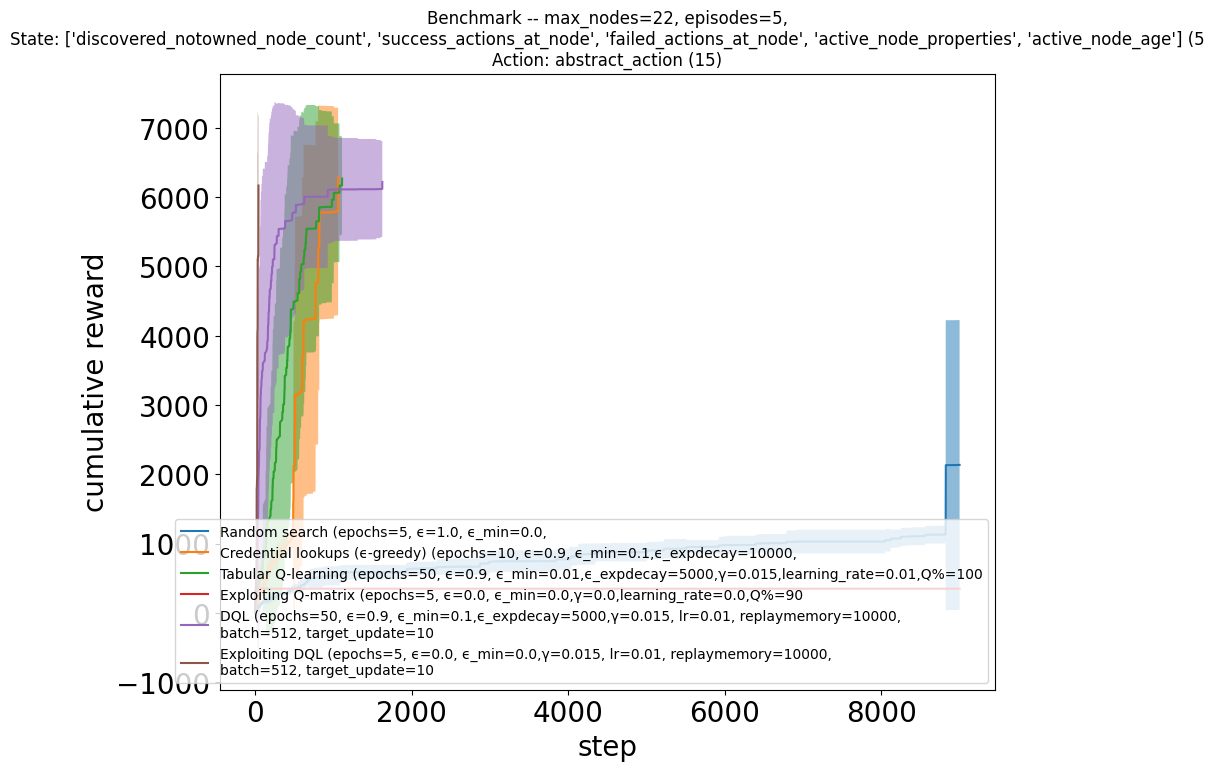

In [13]:
%matplotlib inline
# Compare and plot results for all the agents
all_runs = [random_run, credlookup_run, tabularq_run, tabularq_exploit_run, dql_run, dql_exploit_run]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n"
    f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
    f"({len(themodel.state_space.feature_selection)}\n"
    f"Action: abstract_action ({themodel.action_space.flat_size()})",
)

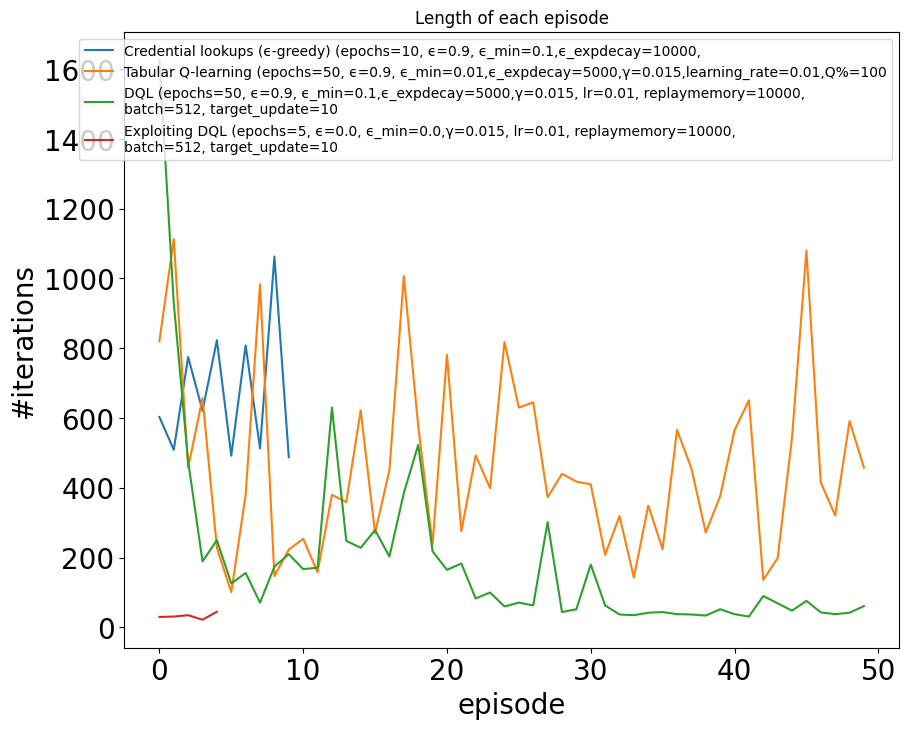

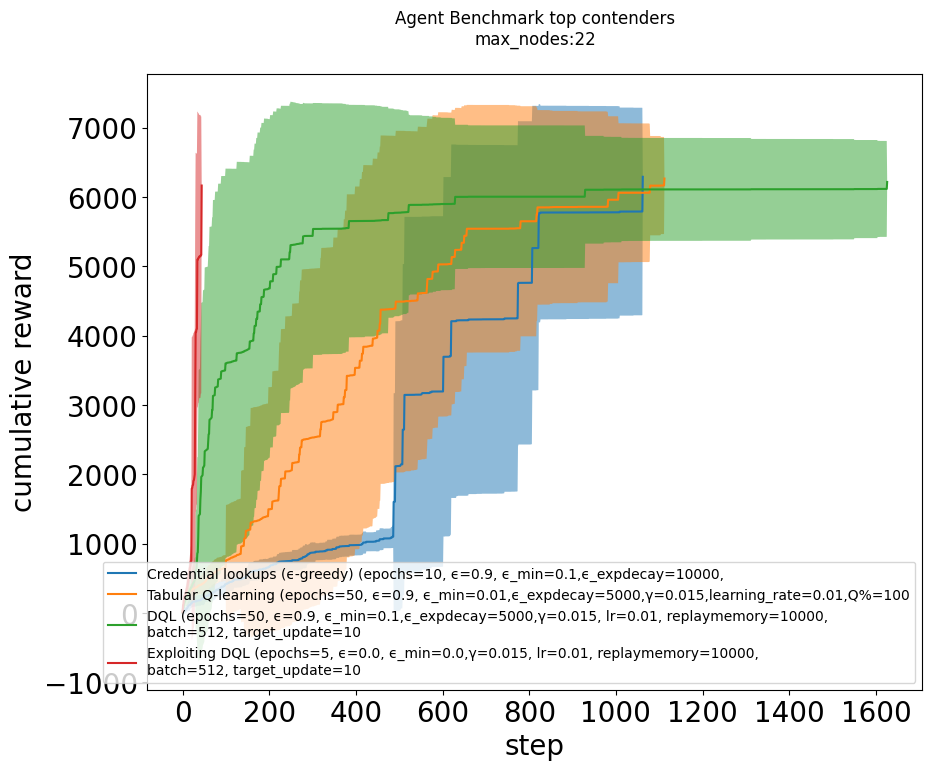

In [14]:
contenders = [credlookup_run, tabularq_run, dql_run, dql_exploit_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(title=f"Agent Benchmark top contenders\n" f"max_nodes:{ep.maximum_node_count}\n", all_runs=contenders)

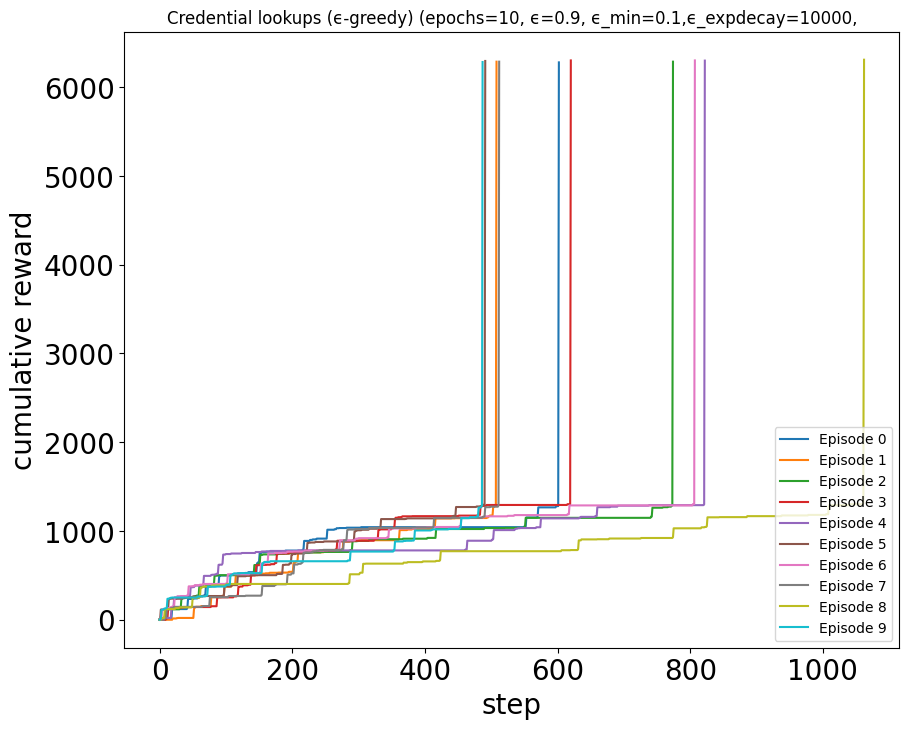

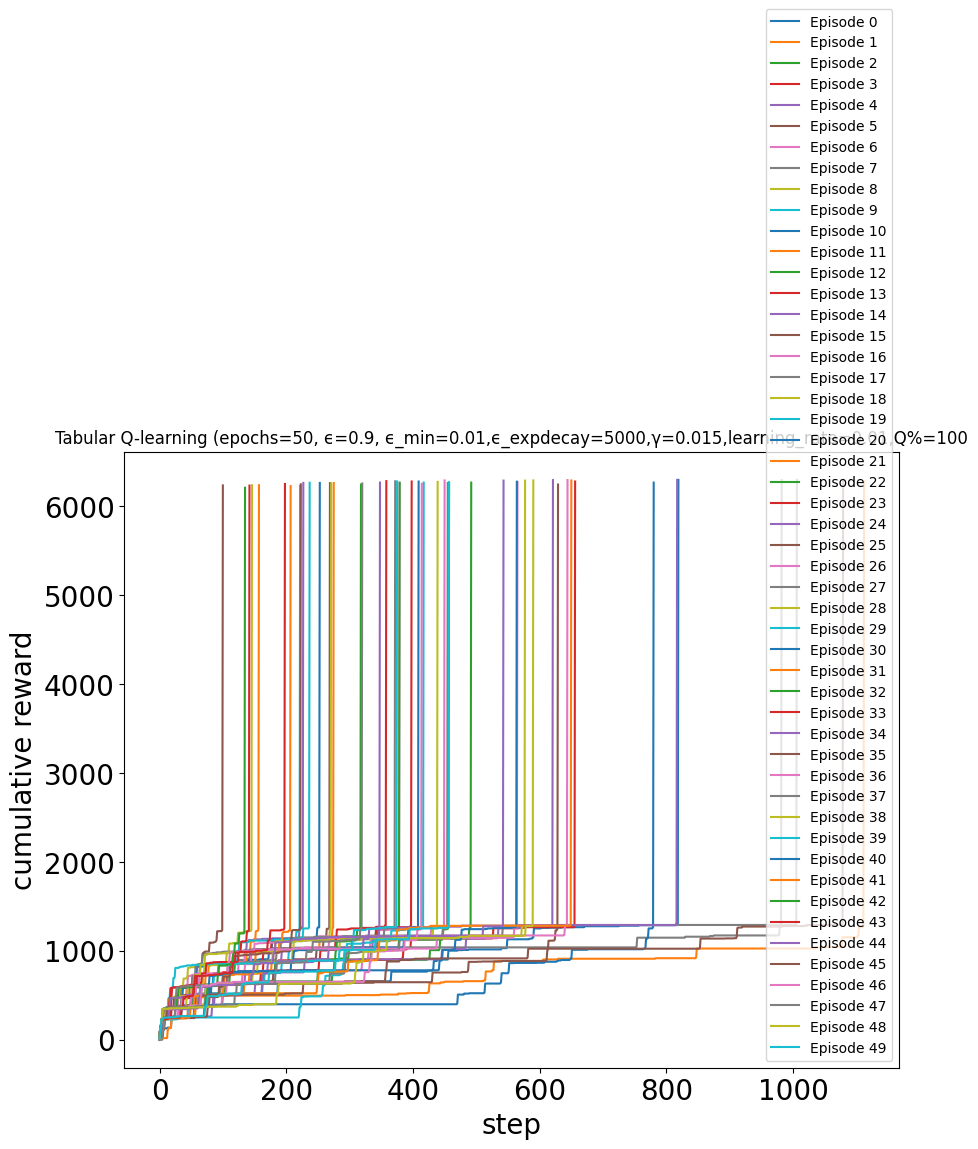

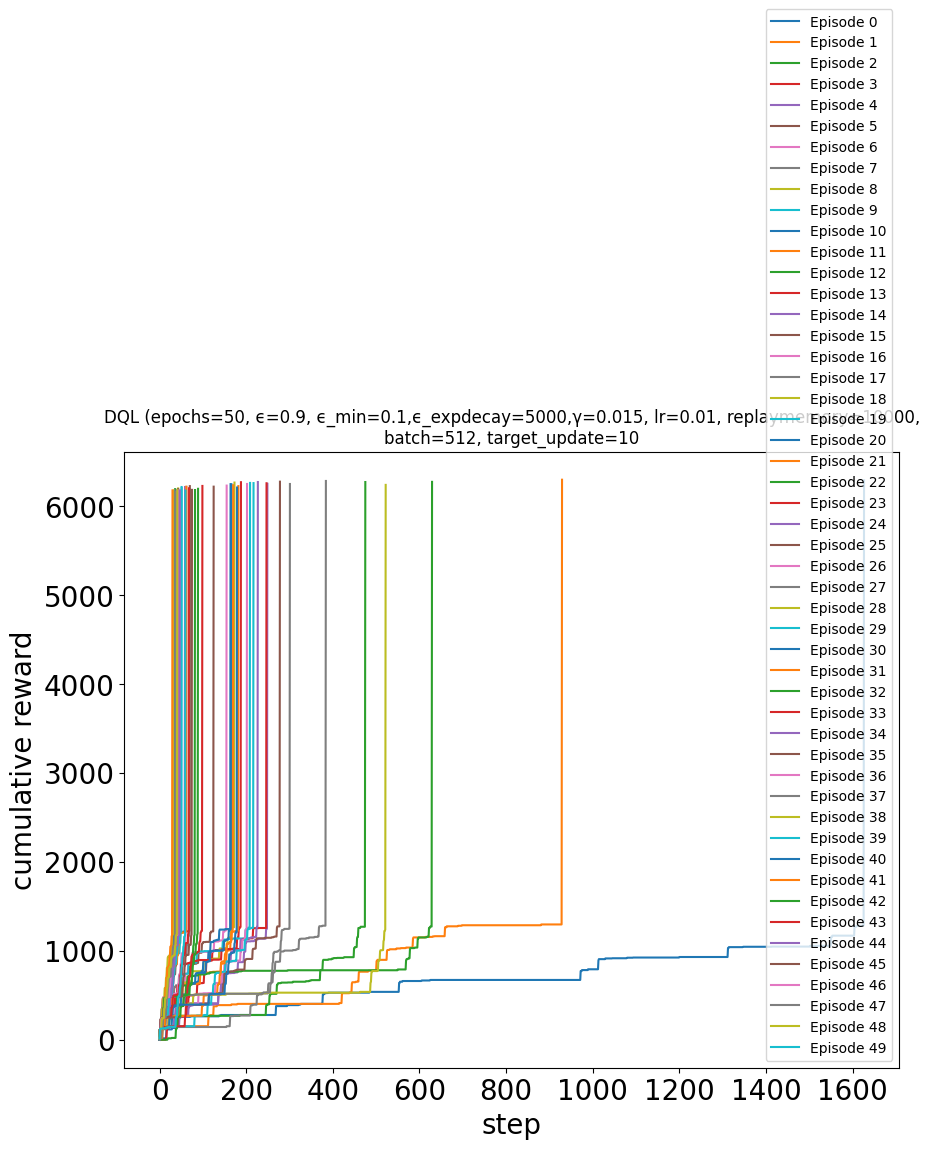

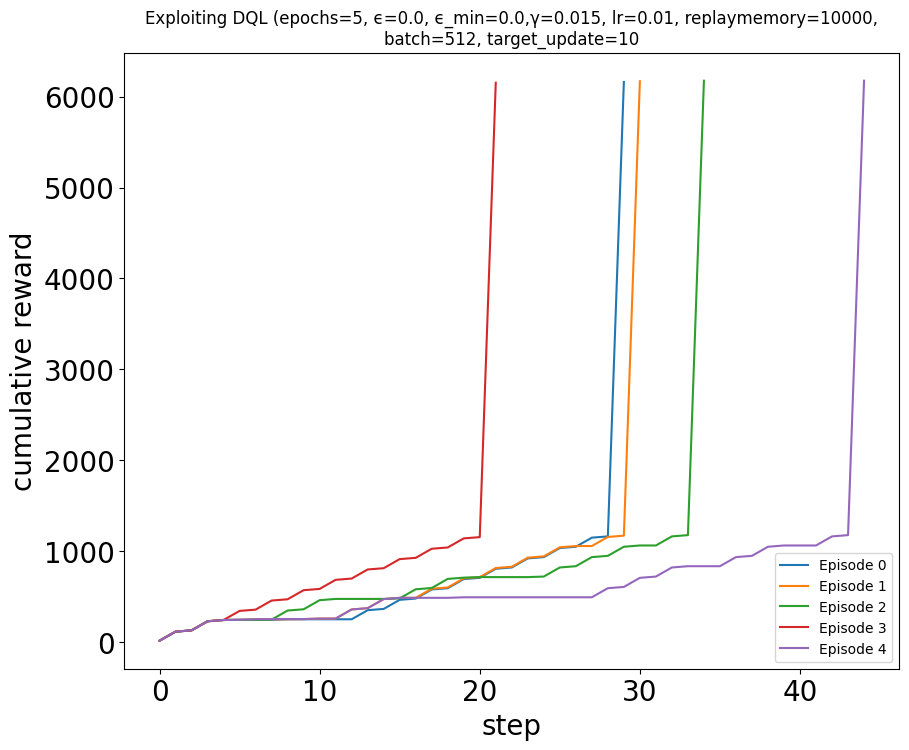

In [15]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)